In [1]:
import numpy
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [2]:
def showGraph(data):
    plt.figure()
    plt.plot(data)
    plt.show()
def saveGraph(data, file_name):
    plt.figure(dpi=360)
    plt.plot(data)
    plt.savefig('results/' + file_name)
# convert dataset to x and y
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return numpy.array(dataX), numpy.array(dataY)
def relative_error(xs, ys):
    error = 0
    zero = 0
    for i in range(len(xs)):
        if ys[i] != 0:
            error += abs(xs[i]-ys[i])*100 / ys[i]
        else:
            zero += 1
    error /= (len(xs) - zero)
    return error
def read_data(file_name):
    return pandas.read_csv('datas/' + file_name, usecols=[1], sep='|')


In [3]:
print('2. LSTM with High, Low')
dataset = pandas.read_csv('datas/vnindex_high_low.csv', sep="|", usecols=[1,2,3])

2. LSTM with High, Low


In [4]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

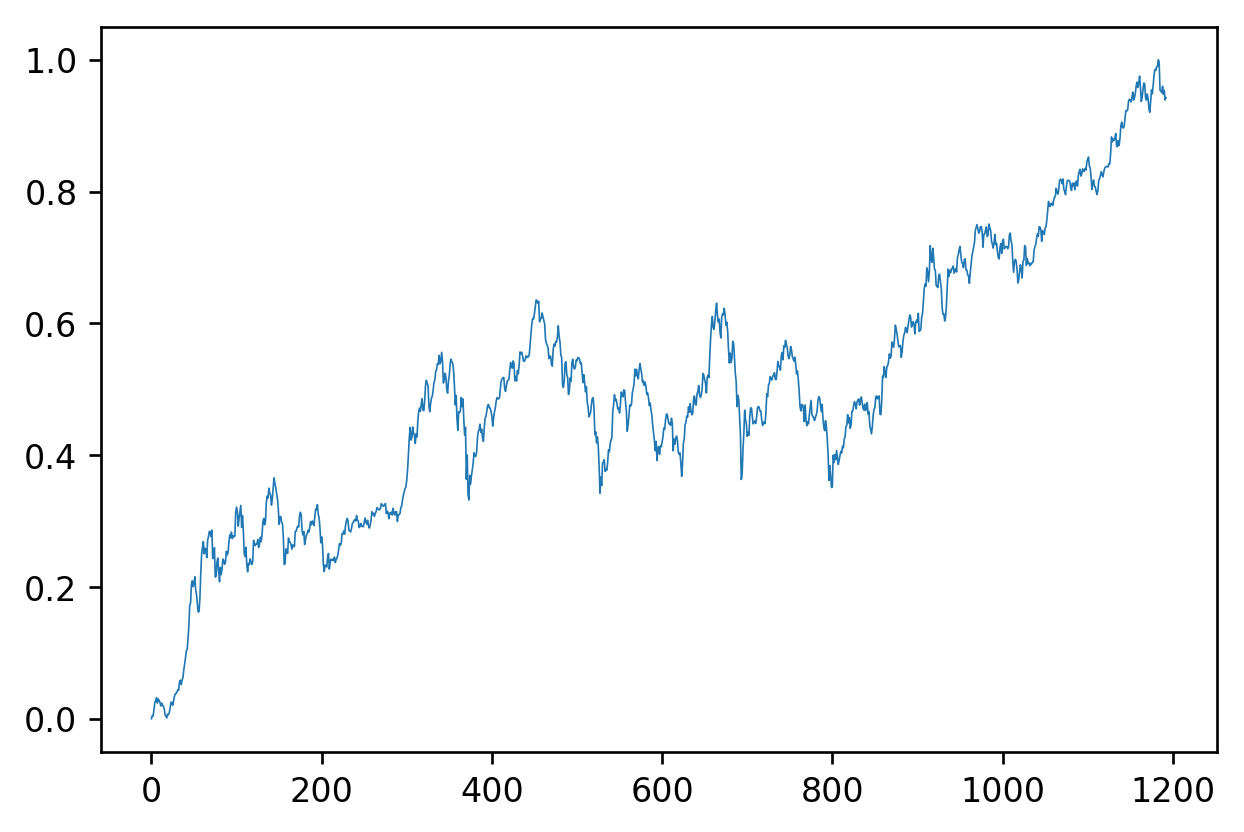

In [5]:
plt.figure(dpi=240)
plt.plot(dataset[:, 0], linewidth=0.5)
# # plt.plot(dataset['high_price'], linewidth=0.5)
# # plt.plot(dataset['low_price'], linewidth=0.5)
plt.show()

In [6]:
trainSize = int(len(dataset) * 0.67)
testSize = len(dataset) - trainSize
train, test = dataset[0:trainSize, :], dataset[trainSize:, :]

look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainY = trainY[:, 0].reshape(trainY.shape[0], 1)
testY = testY[:, 0].reshape(testY.shape[0], 1)

In [7]:
# model_input = Input(shape=(look_back, 3))
# model_output = LSTM(4, return_sequences=False)(model_input)

# # Create the model.
# model = M.Model(input=model_input, output=model_output)

# # You need to pick appropriate loss/optimizers for your problem.
# # I'm just using these to make the example compile.
# model.compile('sgd', 'mean_squared_error')


In [10]:
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 3)))
model.add(Dense(1))
# model = Sequential()

# model_input = Input(shape=(look_back, 3))
# model_output = LSTM(1, return_sequences=False)(model_input)
# model = Model(input=model_input, output=model_output)
# model.add(LSTM(10, input_shape=(look_back, 3)))
# model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
model.fit(trainX, trainY, epochs=300, batch_size=1, verbose=2)

Epoch 1/300
6s - loss: 0.0024
Epoch 2/300
5s - loss: 6.7882e-04
Epoch 3/300
4s - loss: 5.5919e-04
Epoch 4/300
4s - loss: 4.5956e-04
Epoch 5/300
4s - loss: 4.1505e-04
Epoch 6/300
4s - loss: 3.8607e-04
Epoch 7/300
4s - loss: 3.2010e-04
Epoch 8/300
4s - loss: 2.8323e-04
Epoch 9/300
4s - loss: 2.9086e-04
Epoch 10/300
5s - loss: 2.6883e-04
Epoch 11/300
4s - loss: 2.5530e-04
Epoch 12/300
4s - loss: 2.6704e-04
Epoch 13/300
4s - loss: 2.6201e-04
Epoch 14/300
4s - loss: 2.5233e-04
Epoch 15/300
4s - loss: 2.7860e-04
Epoch 16/300
4s - loss: 2.6242e-04
Epoch 17/300
5s - loss: 2.4828e-04
Epoch 18/300
5s - loss: 2.6428e-04
Epoch 19/300
4s - loss: 2.4179e-04
Epoch 20/300
5s - loss: 2.5495e-04
Epoch 21/300
5s - loss: 2.3897e-04
Epoch 22/300
4s - loss: 2.5149e-04
Epoch 23/300
5s - loss: 2.4073e-04
Epoch 24/300
5s - loss: 2.5245e-04
Epoch 25/300
5s - loss: 2.4540e-04
Epoch 26/300
4s - loss: 2.4303e-04
Epoch 27/300
5s - loss: 2.4095e-04
Epoch 28/300
4s - loss: 2.4789e-04
Epoch 29/300
5s - loss: 2.4710e-0

4s - loss: 1.8168e-04
Epoch 233/300
4s - loss: 1.9082e-04
Epoch 234/300
4s - loss: 1.8976e-04
Epoch 235/300
4s - loss: 1.8250e-04
Epoch 236/300
4s - loss: 1.8546e-04
Epoch 237/300
4s - loss: 1.9579e-04
Epoch 238/300
4s - loss: 1.8280e-04
Epoch 239/300
4s - loss: 1.8226e-04
Epoch 240/300
4s - loss: 1.9251e-04
Epoch 241/300
4s - loss: 1.8145e-04
Epoch 242/300
4s - loss: 1.8340e-04
Epoch 243/300
4s - loss: 1.8559e-04
Epoch 244/300
4s - loss: 1.8072e-04
Epoch 245/300
4s - loss: 1.8764e-04
Epoch 246/300
4s - loss: 1.8088e-04
Epoch 247/300
4s - loss: 1.8438e-04
Epoch 248/300
4s - loss: 1.8275e-04
Epoch 249/300
4s - loss: 1.7660e-04
Epoch 250/300
4s - loss: 1.8362e-04
Epoch 251/300
4s - loss: 1.8176e-04
Epoch 252/300
4s - loss: 1.8950e-04
Epoch 253/300
4s - loss: 1.8250e-04
Epoch 254/300
4s - loss: 1.8152e-04
Epoch 255/300
4s - loss: 1.8857e-04
Epoch 256/300
4s - loss: 1.8710e-04
Epoch 257/300
4s - loss: 1.8047e-04
Epoch 258/300
4s - loss: 1.8621e-04
Epoch 259/300
4s - loss: 1.8322e-04
Epoch 

In [12]:
trainYPredict = model.predict(trainX)
testYPredict = model.predict(testX)
print(relative_error(trainYPredict[:, 0], trainY[:, 0]))
print(relative_error(testYPredict[:, 0], testY[:, 0]))

3.62485268262
1.71123541836


In [13]:
# testYT = numpy.append(numpy.array([0]*(trainYPredict.shape[0]+12)), testY[:, 0])
# print(testYT.shape)
# print(dataset.shape)
# print(trainYPredict.shape)
# plt.figure(dpi=240)
# plt.plot(dataset[:, 0], linewidth=0.5)
# plt.plot(trainYPredict[:, 0], linewidth=0.5)
# plt.plot(testYT, linewidth=0.5)
# plt.show()

In [14]:

predicts = numpy.array([])
for i in range(len(testX)):
    predict = model.predict(numpy.array([testX[i]]))
    predicts = numpy.append(predicts, predict[0])
    model.fit(numpy.array([testX[i]]), testY[i], epochs=300, verbose=2)

Epoch 1/300
0s - loss: 3.0970e-06
Epoch 2/300
0s - loss: 2.1941e-06
Epoch 3/300
0s - loss: 1.3880e-06
Epoch 4/300
0s - loss: 7.5243e-07
Epoch 5/300
0s - loss: 3.1222e-07
Epoch 6/300
0s - loss: 6.8203e-08
Epoch 7/300
0s - loss: 2.6478e-10
Epoch 8/300
0s - loss: 7.0637e-08
Epoch 9/300
0s - loss: 2.3183e-07
Epoch 10/300
0s - loss: 4.3438e-07
Epoch 11/300
0s - loss: 6.3412e-07
Epoch 12/300
0s - loss: 7.9606e-07
Epoch 13/300
0s - loss: 8.9794e-07
Epoch 14/300
0s - loss: 9.2996e-07
Epoch 15/300
0s - loss: 8.9455e-07
Epoch 16/300
0s - loss: 8.0272e-07
Epoch 17/300
0s - loss: 6.7173e-07
Epoch 18/300
0s - loss: 5.2144e-07
Epoch 19/300
0s - loss: 3.7078e-07
Epoch 20/300
0s - loss: 2.3572e-07
Epoch 21/300
0s - loss: 1.2758e-07
Epoch 22/300
0s - loss: 5.2428e-08
Epoch 23/300
0s - loss: 1.1111e-08
Epoch 24/300
0s - loss: 9.2663e-11
Epoch 25/300
0s - loss: 1.2758e-08
Epoch 26/300
0s - loss: 4.0792e-08
Epoch 27/300
0s - loss: 7.5650e-08
Epoch 28/300
0s - loss: 1.0963e-07
Epoch 29/300
0s - loss: 1.367

0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 8.8818e-16
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 8.8818e-16
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 

Epoch 180/300
0s - loss: 1.0880e-12
Epoch 181/300
0s - loss: 8.5354e-13
Epoch 182/300
0s - loss: 4.6985e-13
Epoch 183/300
0s - loss: 3.2063e-13
Epoch 184/300
0s - loss: 1.7408e-13
Epoch 185/300
0s - loss: 2.2204e-14
Epoch 186/300
0s - loss: 0.0000e+00
Epoch 187/300
0s - loss: 2.2204e-14
Epoch 188/300
0s - loss: 7.1942e-14
Epoch 189/300
0s - loss: 1.5010e-13
Epoch 190/300
0s - loss: 1.9984e-13
Epoch 191/300
0s - loss: 2.5668e-13
Epoch 192/300
0s - loss: 2.8777e-13
Epoch 193/300
0s - loss: 2.8777e-13
Epoch 194/300
0s - loss: 2.8777e-13
Epoch 195/300
0s - loss: 2.5668e-13
Epoch 196/300
0s - loss: 1.9984e-13
Epoch 197/300
0s - loss: 1.7408e-13
Epoch 198/300
0s - loss: 1.0747e-13
Epoch 199/300
0s - loss: 1.0747e-13
Epoch 200/300
0s - loss: 7.1942e-14
Epoch 201/300
0s - loss: 4.3521e-14
Epoch 202/300
0s - loss: 7.9936e-15
Epoch 203/300
0s - loss: 8.8818e-16
Epoch 204/300
0s - loss: 8.8818e-16
Epoch 205/300
0s - loss: 8.8818e-16
Epoch 206/300
0s - loss: 7.9936e-15
Epoch 207/300
0s - loss: 4.3

Epoch 115/300
0s - loss: 7.8146e-10
Epoch 116/300
0s - loss: 1.3285e-09
Epoch 117/300
0s - loss: 1.8315e-09
Epoch 118/300
0s - loss: 2.2257e-09
Epoch 119/300
0s - loss: 2.4445e-09
Epoch 120/300
0s - loss: 2.4741e-09
Epoch 121/300
0s - loss: 2.3281e-09
Epoch 122/300
0s - loss: 2.0547e-09
Epoch 123/300
0s - loss: 1.6841e-09
Epoch 124/300
0s - loss: 1.2854e-09
Epoch 125/300
0s - loss: 8.8996e-10
Epoch 126/300
0s - loss: 5.5011e-10
Epoch 127/300
0s - loss: 2.8554e-10
Epoch 128/300
0s - loss: 1.0694e-10
Epoch 129/300
0s - loss: 1.6670e-11
Epoch 130/300
0s - loss: 2.7853e-12
Epoch 131/300
0s - loss: 4.4964e-11
Epoch 132/300
0s - loss: 1.2357e-10
Epoch 133/300
0s - loss: 2.1587e-10
Epoch 134/300
0s - loss: 3.0292e-10
Epoch 135/300
0s - loss: 3.6836e-10
Epoch 136/300
0s - loss: 4.0708e-10
Epoch 137/300
0s - loss: 4.1190e-10
Epoch 138/300
0s - loss: 3.9159e-10
Epoch 139/300
0s - loss: 3.4362e-10
Epoch 140/300
0s - loss: 2.8353e-10
Epoch 141/300
0s - loss: 2.1587e-10
Epoch 142/300
0s - loss: 1.4

0s - loss: 4.5317e-08
Epoch 51/300
0s - loss: 3.6813e-08
Epoch 52/300
0s - loss: 2.7269e-08
Epoch 53/300
0s - loss: 1.8074e-08
Epoch 54/300
0s - loss: 1.0261e-08
Epoch 55/300
0s - loss: 4.5324e-09
Epoch 56/300
0s - loss: 1.1665e-09
Epoch 57/300
0s - loss: 7.8479e-12
Epoch 58/300
0s - loss: 6.5232e-10
Epoch 59/300
0s - loss: 2.5038e-09
Epoch 60/300
0s - loss: 4.9091e-09
Epoch 61/300
0s - loss: 7.2700e-09
Epoch 62/300
0s - loss: 9.1063e-09
Epoch 63/300
0s - loss: 1.0147e-08
Epoch 64/300
0s - loss: 1.0279e-08
Epoch 65/300
0s - loss: 9.5845e-09
Epoch 66/300
0s - loss: 8.2352e-09
Epoch 67/300
0s - loss: 6.4940e-09
Epoch 68/300
0s - loss: 4.6455e-09
Epoch 69/300
0s - loss: 2.9388e-09
Epoch 70/300
0s - loss: 1.5546e-09
Epoch 71/300
0s - loss: 6.0013e-10
Epoch 72/300
0s - loss: 1.0207e-10
Epoch 73/300
0s - loss: 1.1341e-11
Epoch 74/300
0s - loss: 2.3465e-10
Epoch 75/300
0s - loss: 6.4322e-10
Epoch 76/300
0s - loss: 1.1221e-09
Epoch 77/300
0s - loss: 1.5523e-09
Epoch 78/300
0s - loss: 1.8597e-0

0s - loss: 8.8818e-16
Epoch 282/300
0s - loss: 8.8818e-16
Epoch 283/300
0s - loss: 8.8818e-16
Epoch 284/300
0s - loss: 8.8818e-16
Epoch 285/300
0s - loss: 8.8818e-16
Epoch 286/300
0s - loss: 8.8818e-16
Epoch 287/300
0s - loss: 8.8818e-16
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 1.6858e-04
Epoch 2/300
0s - loss: 1.5428e-04
Epoch 3/300
0s - loss: 1.2908e-04
Epoch 4/300
0s - loss: 9.8361e-05
Epoch 5/300
0s - loss: 6.6876e-05
Epoch 6/300
0s - loss: 3.8983e-05
Epoch 7/300
0s - loss: 1.7790e-05
Epoch 8/300
0s - loss: 4.8295e-06
Epoch 9/300
0s - loss:

Epoch 234/300
0s - loss: 8.8818e-16
Epoch 235/300
0s - loss: 8.8818e-16
Epoch 236/300
0s - loss: 8.8818e-16
Epoch 237/300
0s - loss: 8.8818e-16
Epoch 238/300
0s - loss: 8.8818e-16
Epoch 239/300
0s - loss: 8.8818e-16
Epoch 240/300
0s - loss: 8.8818e-16
Epoch 241/300
0s - loss: 8.8818e-16
Epoch 242/300
0s - loss: 8.8818e-16
Epoch 243/300
0s - loss: 8.8818e-16
Epoch 244/300
0s - loss: 8.8818e-16
Epoch 245/300
0s - loss: 8.8818e-16
Epoch 246/300
0s - loss: 8.8818e-16
Epoch 247/300
0s - loss: 8.8818e-16
Epoch 248/300
0s - loss: 8.8818e-16
Epoch 249/300
0s - loss: 8.8818e-16
Epoch 250/300
0s - loss: 8.8818e-16
Epoch 251/300
0s - loss: 8.8818e-16
Epoch 252/300
0s - loss: 8.8818e-16
Epoch 253/300
0s - loss: 8.8818e-16
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 255/300
0s - loss: 8.8818e-16
Epoch 256/300
0s - loss: 8.8818e-16
Epoch 257/300
0s - loss: 8.8818e-16
Epoch 258/300
0s - loss: 8.8818e-16
Epoch 259/300
0s - loss: 8.8818e-16
Epoch 260/300
0s - loss: 8.8818e-16
Epoch 261/300
0s - loss: 8.8

Epoch 189/300
0s - loss: 7.9936e-15
Epoch 190/300
0s - loss: 1.4211e-14
Epoch 191/300
0s - loss: 3.1974e-14
Epoch 192/300
0s - loss: 5.6843e-14
Epoch 193/300
0s - loss: 7.1942e-14
Epoch 194/300
0s - loss: 7.1942e-14
Epoch 195/300
0s - loss: 7.1942e-14
Epoch 196/300
0s - loss: 7.1942e-14
Epoch 197/300
0s - loss: 5.6843e-14
Epoch 198/300
0s - loss: 3.1974e-14
Epoch 199/300
0s - loss: 3.1974e-14
Epoch 200/300
0s - loss: 1.4211e-14
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 8.8818e-16
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 8.8818e-16
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 8.8818e-16
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5

Epoch 137/300
0s - loss: 2.7512e-11
Epoch 138/300
0s - loss: 2.8777e-11
Epoch 139/300
0s - loss: 2.6276e-11
Epoch 140/300
0s - loss: 2.1064e-11
Epoch 141/300
0s - loss: 1.3878e-11
Epoch 142/300
0s - loss: 8.1855e-12
Epoch 143/300
0s - loss: 3.0917e-12
Epoch 144/300
0s - loss: 5.1159e-13
Epoch 145/300
0s - loss: 7.1942e-14
Epoch 146/300
0s - loss: 1.2825e-12
Epoch 147/300
0s - loss: 3.6380e-12
Epoch 148/300
0s - loss: 5.9721e-12
Epoch 149/300
0s - loss: 7.1942e-12
Epoch 150/300
0s - loss: 7.8479e-12
Epoch 151/300
0s - loss: 7.1942e-12
Epoch 152/300
0s - loss: 6.1187e-12
Epoch 153/300
0s - loss: 4.4773e-12
Epoch 154/300
0s - loss: 2.6867e-12
Epoch 155/300
0s - loss: 1.0880e-12
Epoch 156/300
0s - loss: 2.8777e-13
Epoch 157/300
0s - loss: 3.5527e-15
Epoch 158/300
0s - loss: 2.8777e-13
Epoch 159/300
0s - loss: 8.5354e-13
Epoch 160/300
0s - loss: 1.4211e-12
Epoch 161/300
0s - loss: 1.9620e-12
Epoch 162/300
0s - loss: 2.1325e-12
Epoch 163/300
0s - loss: 2.1325e-12
Epoch 164/300
0s - loss: 1.8

0s - loss: 5.2015e-11
Epoch 92/300
0s - loss: 3.6494e-10
Epoch 93/300
0s - loss: 1.7259e-09
Epoch 94/300
0s - loss: 3.4715e-09
Epoch 95/300
0s - loss: 4.9678e-09
Epoch 96/300
0s - loss: 5.7981e-09
Epoch 97/300
0s - loss: 5.7890e-09
Epoch 98/300
0s - loss: 5.0268e-09
Epoch 99/300
0s - loss: 3.7508e-09
Epoch 100/300
0s - loss: 2.3627e-09
Epoch 101/300
0s - loss: 1.1401e-09
Epoch 102/300
0s - loss: 3.2941e-10
Epoch 103/300
0s - loss: 7.6819e-12
Epoch 104/300
0s - loss: 1.2624e-10
Epoch 105/300
0s - loss: 5.2934e-10
Epoch 106/300
0s - loss: 1.0283e-09
Epoch 107/300
0s - loss: 1.4484e-09
Epoch 108/300
0s - loss: 1.6646e-09
Epoch 109/300
0s - loss: 1.6452e-09
Epoch 110/300
0s - loss: 1.4056e-09
Epoch 111/300
0s - loss: 1.0417e-09
Epoch 112/300
0s - loss: 6.3869e-10
Epoch 113/300
0s - loss: 2.9775e-10
Epoch 114/300
0s - loss: 7.7294e-11
Epoch 115/300
0s - loss: 3.5527e-13
Epoch 116/300
0s - loss: 4.4964e-11
Epoch 117/300
0s - loss: 1.6961e-10
Epoch 118/300
0s - loss: 3.1233e-10
Epoch 119/300


0s - loss: 1.1133e-06
Epoch 47/300
0s - loss: 1.7479e-06
Epoch 48/300
0s - loss: 2.1806e-06
Epoch 49/300
0s - loss: 2.3107e-06
Epoch 50/300
0s - loss: 2.1333e-06
Epoch 51/300
0s - loss: 1.7219e-06
Epoch 52/300
0s - loss: 1.1955e-06
Epoch 53/300
0s - loss: 6.8105e-07
Epoch 54/300
0s - loss: 2.8106e-07
Epoch 55/300
0s - loss: 5.2824e-08
Epoch 56/300
0s - loss: 3.0926e-09
Epoch 57/300
0s - loss: 9.5494e-08
Epoch 58/300
0s - loss: 2.6739e-07
Epoch 59/300
0s - loss: 4.4980e-07
Epoch 60/300
0s - loss: 5.8549e-07
Epoch 61/300
0s - loss: 6.4036e-07
Epoch 62/300
0s - loss: 6.0740e-07
Epoch 63/300
0s - loss: 5.0348e-07
Epoch 64/300
0s - loss: 3.6033e-07
Epoch 65/300
0s - loss: 2.1396e-07
Epoch 66/300
0s - loss: 9.5015e-08
Epoch 67/300
0s - loss: 2.2249e-08
Epoch 68/300
0s - loss: 1.4780e-11
Epoch 69/300
0s - loss: 2.0006e-08
Epoch 70/300
0s - loss: 6.5461e-08
Epoch 71/300
0s - loss: 1.1720e-07
Epoch 72/300
0s - loss: 1.5808e-07
Epoch 73/300
0s - loss: 1.7743e-07
Epoch 74/300
0s - loss: 1.7212e-0

0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 8.8818e-16
Epoch 288/300
0s - loss: 8.8818e-16
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 1.5256e-04
Epoch 2/300
0s - loss: 1.2987e-04
Epoch 3/300
0s - loss: 9.3245e-05
Epoch 4/300
0s - loss: 5.4271e-05
Epoch 5/300
0s - loss: 2.2560e-05
Epoch 6/300
0s - loss: 4.1777e-06
Epoch 7/300
0s - l

Epoch 234/300
0s - loss: 8.8818e-16
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 8.8818e-16
Epoch 237/300
0s - loss: 8.8818e-16
Epoch 238/300
0s - loss: 8.8818e-16
Epoch 239/300
0s - loss: 8.8818e-16
Epoch 240/300
0s - loss: 8.8818e-16
Epoch 241/300
0s - loss: 8.8818e-16
Epoch 242/300
0s - loss: 8.8818e-16
Epoch 243/300
0s - loss: 8.8818e-16
Epoch 244/300
0s - loss: 8.8818e-16
Epoch 245/300
0s - loss: 8.8818e-16
Epoch 246/300
0s - loss: 8.8818e-16
Epoch 247/300
0s - loss: 8.8818e-16
Epoch 248/300
0s - loss: 8.8818e-16
Epoch 249/300
0s - loss: 8.8818e-16
Epoch 250/300
0s - loss: 8.8818e-16
Epoch 251/300
0s - loss: 8.8818e-16
Epoch 252/300
0s - loss: 8.8818e-16
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 255/300
0s - loss: 8.8818e-16
Epoch 256/300
0s - loss: 8.8818e-16
Epoch 257/300
0s - loss: 8.8818e-16
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 8.8818e-16
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 8.8

Epoch 176/300
0s - loss: 5.5511e-13
Epoch 177/300
0s - loss: 5.5511e-13
Epoch 178/300
0s - loss: 5.5511e-13
Epoch 179/300
0s - loss: 3.9169e-13
Epoch 180/300
0s - loss: 1.9984e-13
Epoch 181/300
0s - loss: 7.1942e-14
Epoch 182/300
0s - loss: 0.0000e+00
Epoch 183/300
0s - loss: 2.2204e-14
Epoch 184/300
0s - loss: 1.0747e-13
Epoch 185/300
0s - loss: 1.7408e-13
Epoch 186/300
0s - loss: 1.9984e-13
Epoch 187/300
0s - loss: 1.9984e-13
Epoch 188/300
0s - loss: 1.9984e-13
Epoch 189/300
0s - loss: 1.0747e-13
Epoch 190/300
0s - loss: 5.6843e-14
Epoch 191/300
0s - loss: 4.3521e-14
Epoch 192/300
0s - loss: 8.8818e-16
Epoch 193/300
0s - loss: 7.9936e-15
Epoch 194/300
0s - loss: 2.2204e-14
Epoch 195/300
0s - loss: 7.1942e-14
Epoch 196/300
0s - loss: 8.8818e-14
Epoch 197/300
0s - loss: 8.8818e-14
Epoch 198/300
0s - loss: 1.0747e-13
Epoch 199/300
0s - loss: 4.3521e-14
Epoch 200/300
0s - loss: 7.9936e-15
Epoch 201/300
0s - loss: 8.8818e-16
Epoch 202/300
0s - loss: 8.8818e-16
Epoch 203/300
0s - loss: 3.5

Epoch 139/300
0s - loss: 1.6422e-12
Epoch 140/300
0s - loss: 2.5668e-13
Epoch 141/300
0s - loss: 4.3521e-14
Epoch 142/300
0s - loss: 6.4748e-13
Epoch 143/300
0s - loss: 1.7986e-12
Epoch 144/300
0s - loss: 2.7853e-12
Epoch 145/300
0s - loss: 3.0917e-12
Epoch 146/300
0s - loss: 2.9878e-12
Epoch 147/300
0s - loss: 2.1325e-12
Epoch 148/300
0s - loss: 1.0880e-12
Epoch 149/300
0s - loss: 3.9169e-13
Epoch 150/300
0s - loss: 2.2204e-14
Epoch 151/300
0s - loss: 7.1942e-14
Epoch 152/300
0s - loss: 3.9169e-13
Epoch 153/300
0s - loss: 8.5354e-13
Epoch 154/300
0s - loss: 1.0880e-12
Epoch 155/300
0s - loss: 9.6723e-13
Epoch 156/300
0s - loss: 8.5354e-13
Epoch 157/300
0s - loss: 6.9633e-13
Epoch 158/300
0s - loss: 2.5668e-13
Epoch 159/300
0s - loss: 8.8818e-14
Epoch 160/300
0s - loss: 8.8818e-16
Epoch 161/300
0s - loss: 4.3521e-14
Epoch 162/300
0s - loss: 1.5010e-13
Epoch 163/300
0s - loss: 2.5668e-13
Epoch 164/300
0s - loss: 3.9169e-13
Epoch 165/300
0s - loss: 3.9169e-13
Epoch 166/300
0s - loss: 3.2

Epoch 74/300
0s - loss: 7.7514e-08
Epoch 75/300
0s - loss: 6.0013e-08
Epoch 76/300
0s - loss: 3.4895e-08
Epoch 77/300
0s - loss: 1.2744e-08
Epoch 78/300
0s - loss: 1.1102e-09
Epoch 79/300
0s - loss: 1.7758e-09
Epoch 80/300
0s - loss: 1.1093e-08
Epoch 81/300
0s - loss: 2.2490e-08
Epoch 82/300
0s - loss: 2.9878e-08
Epoch 83/300
0s - loss: 3.0095e-08
Epoch 84/300
0s - loss: 2.3722e-08
Epoch 85/300
0s - loss: 1.4097e-08
Epoch 86/300
0s - loss: 5.3487e-09
Epoch 87/300
0s - loss: 5.5712e-10
Epoch 88/300
0s - loss: 5.6135e-10
Epoch 89/300
0s - loss: 4.0409e-09
Epoch 90/300
0s - loss: 8.4804e-09
Epoch 91/300
0s - loss: 1.1460e-08
Epoch 92/300
0s - loss: 1.1697e-08
Epoch 93/300
0s - loss: 9.3295e-09
Epoch 94/300
0s - loss: 5.6224e-09
Epoch 95/300
0s - loss: 2.1837e-09
Epoch 96/300
0s - loss: 2.5327e-10
Epoch 97/300
0s - loss: 1.8794e-10
Epoch 98/300
0s - loss: 1.4964e-09
Epoch 99/300
0s - loss: 3.2266e-09
Epoch 100/300
0s - loss: 4.4208e-09
Epoch 101/300
0s - loss: 4.5445e-09
Epoch 102/300
0s -

0s - loss: 1.7682e-06
Epoch 35/300
0s - loss: 7.8842e-07
Epoch 36/300
0s - loss: 1.3060e-07
Epoch 37/300
0s - loss: 2.7102e-08
Epoch 38/300
0s - loss: 3.7705e-07
Epoch 39/300
0s - loss: 8.6415e-07
Epoch 40/300
0s - loss: 1.1651e-06
Epoch 41/300
0s - loss: 1.1195e-06
Epoch 42/300
0s - loss: 7.8461e-07
Epoch 43/300
0s - loss: 3.6277e-07
Epoch 44/300
0s - loss: 6.7041e-08
Epoch 45/300
0s - loss: 7.8082e-09
Epoch 46/300
0s - loss: 1.5084e-07
Epoch 47/300
0s - loss: 3.6234e-07
Epoch 48/300
0s - loss: 4.9833e-07
Epoch 49/300
0s - loss: 4.8450e-07
Epoch 50/300
0s - loss: 3.4242e-07
Epoch 51/300
0s - loss: 1.6032e-07
Epoch 52/300
0s - loss: 3.1043e-08
Epoch 53/300
0s - loss: 2.6337e-09
Epoch 54/300
0s - loss: 6.1778e-08
Epoch 55/300
0s - loss: 1.5200e-07
Epoch 56/300
0s - loss: 2.1193e-07
Epoch 57/300
0s - loss: 2.0857e-07
Epoch 58/300
0s - loss: 1.4964e-07
Epoch 59/300
0s - loss: 7.1543e-08
Epoch 60/300
0s - loss: 1.4612e-08
Epoch 61/300
0s - loss: 8.2881e-10
Epoch 62/300
0s - loss: 2.5422e-0

Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0

0s - loss: 4.3521e-14
Epoch 207/300
0s - loss: 2.2204e-14
Epoch 208/300
0s - loss: 7.9936e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 2.2204e-14
Epoch 212/300
0s - loss: 3.1974e-14
Epoch 213/300
0s - loss: 3.1974e-14
Epoch 214/300
0s - loss: 2.2204e-14
Epoch 215/300
0s - loss: 7.9936e-15
Epoch 216/300
0s - loss: 8.8818e-16
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 7.9936e-15
Epoch 219/300
0s - loss: 2.2204e-14
Epoch 220/300
0s - loss: 2.2204e-14
Epoch 221/300
0s - loss: 7.9936e-15
Epoch 222/300
0s - loss: 8.8818e-16
Epoch 223/300
0s - loss: 8.8818e-16
Epoch 224/300
0s - loss: 8.8818e-16
Epoch 225/300
0s - loss: 8.8818e-16
Epoch 226/300
0s - loss: 8.8818e-16
Epoch 227/300
0s - loss: 8.8818e-16
Epoch 228/300
0s - loss: 8.8818e-16
Epoch 229/300
0s - loss: 8.8818e-16
Epoch 230/300
0s - loss: 8.8818e-16
Epoch 231/300
0s - loss: 8.8818e-16
Epoch 232/300
0s - loss: 8.8818e-16
Epoch 233/300
0s - loss: 8.8818e-16
Epoch 

Epoch 148/300
0s - loss: 7.6771e-11
Epoch 149/300
0s - loss: 1.0207e-10
Epoch 150/300
0s - loss: 9.9676e-11
Epoch 151/300
0s - loss: 7.4182e-11
Epoch 152/300
0s - loss: 4.0296e-11
Epoch 153/300
0s - loss: 1.2158e-11
Epoch 154/300
0s - loss: 2.2737e-13
Epoch 155/300
0s - loss: 5.5431e-12
Epoch 156/300
0s - loss: 2.0520e-11
Epoch 157/300
0s - loss: 3.5883e-11
Epoch 158/300
0s - loss: 4.2210e-11
Epoch 159/300
0s - loss: 3.7326e-11
Epoch 160/300
0s - loss: 2.5367e-11
Epoch 161/300
0s - loss: 1.1543e-11
Epoch 162/300
0s - loss: 2.4949e-12
Epoch 163/300
0s - loss: 1.0747e-13
Epoch 164/300
0s - loss: 3.9870e-12
Epoch 165/300
0s - loss: 1.0552e-11
Epoch 166/300
0s - loss: 1.5476e-11
Epoch 167/300
0s - loss: 1.6670e-11
Epoch 168/300
0s - loss: 1.3878e-11
Epoch 169/300
0s - loss: 8.3569e-12
Epoch 170/300
0s - loss: 3.0917e-12
Epoch 171/300
0s - loss: 3.9169e-13
Epoch 172/300
0s - loss: 3.9169e-13
Epoch 173/300
0s - loss: 2.4949e-12
Epoch 174/300
0s - loss: 5.1301e-12
Epoch 175/300
0s - loss: 6.7

Epoch 99/300
0s - loss: 1.0747e-09
Epoch 100/300
0s - loss: 3.5883e-11
Epoch 101/300
0s - loss: 1.6139e-09
Epoch 102/300
0s - loss: 4.3262e-09
Epoch 103/300
0s - loss: 6.4748e-09
Epoch 104/300
0s - loss: 6.9335e-09
Epoch 105/300
0s - loss: 5.6313e-09
Epoch 106/300
0s - loss: 3.3635e-09
Epoch 107/300
0s - loss: 1.2325e-09
Epoch 108/300
0s - loss: 1.0087e-10
Epoch 109/300
0s - loss: 1.9122e-10
Epoch 110/300
0s - loss: 1.1221e-09
Epoch 111/300
0s - loss: 2.2060e-09
Epoch 112/300
0s - loss: 2.8109e-09
Epoch 113/300
0s - loss: 2.6552e-09
Epoch 114/300
0s - loss: 1.8958e-09
Epoch 115/300
0s - loss: 9.4593e-10
Epoch 116/300
0s - loss: 2.3465e-10
Epoch 117/300
0s - loss: 3.5527e-13
Epoch 118/300
0s - loss: 2.2204e-10
Epoch 119/300
0s - loss: 6.6917e-10
Epoch 120/300
0s - loss: 1.0456e-09
Epoch 121/300
0s - loss: 1.1563e-09
Epoch 122/300
0s - loss: 9.6435e-10
Epoch 123/300
0s - loss: 5.9430e-10
Epoch 124/300
0s - loss: 2.3011e-10
Epoch 125/300
0s - loss: 2.4475e-11
Epoch 126/300
0s - loss: 2.44

Epoch 42/300
0s - loss: 1.7683e-09
Epoch 43/300
0s - loss: 5.5347e-07
Epoch 44/300
0s - loss: 1.8741e-06
Epoch 45/300
0s - loss: 3.1686e-06
Epoch 46/300
0s - loss: 3.8162e-06
Epoch 47/300
0s - loss: 3.5867e-06
Epoch 48/300
0s - loss: 2.6601e-06
Epoch 49/300
0s - loss: 1.4735e-06
Epoch 50/300
0s - loss: 4.9539e-07
Epoch 51/300
0s - loss: 2.7665e-08
Epoch 52/300
0s - loss: 1.1315e-07
Epoch 53/300
0s - loss: 5.6528e-07
Epoch 54/300
0s - loss: 1.0866e-06
Epoch 55/300
0s - loss: 1.4109e-06
Epoch 56/300
0s - loss: 1.4073e-06
Epoch 57/300
0s - loss: 1.1079e-06
Epoch 58/300
0s - loss: 6.6394e-07
Epoch 59/300
0s - loss: 2.5999e-07
Epoch 60/300
0s - loss: 3.1879e-08
Epoch 61/300
0s - loss: 1.9470e-08
Epoch 62/300
0s - loss: 1.6841e-07
Epoch 63/300
0s - loss: 3.7017e-07
Epoch 64/300
0s - loss: 5.1676e-07
Epoch 65/300
0s - loss: 5.4494e-07
Epoch 66/300
0s - loss: 4.5328e-07
Epoch 67/300
0s - loss: 2.9114e-07
Epoch 68/300
0s - loss: 1.2884e-07
Epoch 69/300
0s - loss: 2.4369e-08
Epoch 70/300
0s - lo

0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 4.5512e-04
Epoch 2/300
0s - loss: 3.5288e-04
Epoch 3/300
0s - loss: 2.0552e-04
Epoch 4/300
0s - loss: 7.5433e-05
Epoch 5/300
0s - loss: 6.5391e-06
Epoch 6/300
0s - loss: 1.0960e-05
Epoch 7/300
0s - loss: 6.7537e-05
Epoch 8/300
0s - loss: 1.3500e-04
Epoch 9/300
0s - loss: 1.7433e-04
Epoch 10/300
0s - loss: 1.6859e-04
Epoch 11/300
0s - loss: 1.2573e-04
Epoch 12/300
0s - loss: 6.8888e-05
Epoch 13/300
0s - loss: 2.2

0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 7.9936e-15
Epoch 229/300
0s - loss: 7.9936e-15
Epoch 230/300
0s - loss: 7.9936e-15
Epoch 231/300
0s - loss: 7.9936e-15
Epoch 232/300
0s - loss: 7.9936e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 8.8818e-16
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 8.8818e-16
Epoch 239/300
0s - loss: 8.8818e-16
Epoch 240/300
0s - loss: 8.8818e-16
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 8.8818e-16
Epoch 244/300
0s - loss: 8.8818e-16
Epoch 245/300
0s - loss: 8.8818e-16
Epoch 246/300
0s - loss: 8.8818e-16
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 

Epoch 169/300
0s - loss: 1.7408e-13
Epoch 170/300
0s - loss: 9.6723e-13
Epoch 171/300
0s - loss: 1.8794e-12
Epoch 172/300
0s - loss: 2.4016e-12
Epoch 173/300
0s - loss: 2.0464e-12
Epoch 174/300
0s - loss: 1.4211e-12
Epoch 175/300
0s - loss: 6.9633e-13
Epoch 176/300
0s - loss: 1.9984e-13
Epoch 177/300
0s - loss: 7.9936e-15
Epoch 178/300
0s - loss: 2.5668e-13
Epoch 179/300
0s - loss: 6.0041e-13
Epoch 180/300
0s - loss: 9.0949e-13
Epoch 181/300
0s - loss: 9.0949e-13
Epoch 182/300
0s - loss: 6.9633e-13
Epoch 183/300
0s - loss: 3.5527e-13
Epoch 184/300
0s - loss: 1.5010e-13
Epoch 185/300
0s - loss: 3.5527e-15
Epoch 186/300
0s - loss: 5.6843e-14
Epoch 187/300
0s - loss: 1.7408e-13
Epoch 188/300
0s - loss: 2.8777e-13
Epoch 189/300
0s - loss: 3.2063e-13
Epoch 190/300
0s - loss: 2.8777e-13
Epoch 191/300
0s - loss: 2.8777e-13
Epoch 192/300
0s - loss: 1.2790e-13
Epoch 193/300
0s - loss: 7.9936e-15
Epoch 194/300
0s - loss: 7.9936e-15
Epoch 195/300
0s - loss: 5.6843e-14
Epoch 196/300
0s - loss: 1.7

Epoch 112/300
0s - loss: 2.6429e-09
Epoch 113/300
0s - loss: 2.4357e-09
Epoch 114/300
0s - loss: 1.6841e-09
Epoch 115/300
0s - loss: 7.9989e-10
Epoch 116/300
0s - loss: 1.7039e-10
Epoch 117/300
0s - loss: 5.5431e-12
Epoch 118/300
0s - loss: 2.5138e-10
Epoch 119/300
0s - loss: 6.7381e-10
Epoch 120/300
0s - loss: 1.0074e-09
Epoch 121/300
0s - loss: 1.0747e-09
Epoch 122/300
0s - loss: 8.6348e-10
Epoch 123/300
0s - loss: 5.1032e-10
Epoch 124/300
0s - loss: 1.8146e-10
Epoch 125/300
0s - loss: 1.1746e-11
Epoch 126/300
0s - loss: 3.5527e-11
Epoch 127/300
0s - loss: 1.8468e-10
Epoch 128/300
0s - loss: 3.5252e-10
Epoch 129/300
0s - loss: 4.3770e-10
Epoch 130/300
0s - loss: 4.0828e-10
Epoch 131/300
0s - loss: 2.8253e-10
Epoch 132/300
0s - loss: 1.3509e-10
Epoch 133/300
0s - loss: 2.8777e-11
Epoch 134/300
0s - loss: 6.9633e-13
Epoch 135/300
0s - loss: 4.1823e-11
Epoch 136/300
0s - loss: 1.1256e-10
Epoch 137/300
0s - loss: 1.6729e-10
Epoch 138/300
0s - loss: 1.7826e-10
Epoch 139/300
0s - loss: 1.4

0s - loss: 6.8749e-08
Epoch 47/300
0s - loss: 2.1504e-07
Epoch 48/300
0s - loss: 3.3310e-07
Epoch 49/300
0s - loss: 3.5357e-07
Epoch 50/300
0s - loss: 2.7369e-07
Epoch 51/300
0s - loss: 1.4602e-07
Epoch 52/300
0s - loss: 3.9573e-08
Epoch 53/300
0s - loss: 2.1338e-11
Epoch 54/300
0s - loss: 2.9223e-08
Epoch 55/300
0s - loss: 9.2442e-08
Epoch 56/300
0s - loss: 1.4355e-07
Epoch 57/300
0s - loss: 1.5251e-07
Epoch 58/300
0s - loss: 1.1787e-07
Epoch 59/300
0s - loss: 6.2580e-08
Epoch 60/300
0s - loss: 1.6745e-08
Epoch 61/300
0s - loss: 2.0464e-12
Epoch 62/300
0s - loss: 1.2974e-08
Epoch 63/300
0s - loss: 4.0372e-08
Epoch 64/300
0s - loss: 6.2253e-08
Epoch 65/300
0s - loss: 6.5781e-08
Epoch 66/300
0s - loss: 5.0548e-08
Epoch 67/300
0s - loss: 2.6556e-08
Epoch 68/300
0s - loss: 6.9137e-09
Epoch 69/300
0s - loss: 1.0267e-12
Epoch 70/300
0s - loss: 5.8755e-09
Epoch 71/300
0s - loss: 1.7810e-08
Epoch 72/300
0s - loss: 2.7142e-08
Epoch 73/300
0s - loss: 2.8383e-08
Epoch 74/300
0s - loss: 2.1535e-0

0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.0483e-07
Epoch 2/300
0s - loss: 2.0938e-07
Epoch 3/300
0s - loss: 8.6524e-08
Epoch 4/300
0s - loss: 9.3353e-09
Epoch 5/300
0s - loss: 9.5321e-09
Epoch 6/300
0s - loss: 6.5445e-08
Epoch 7/300
0s - loss: 1.2563e-07
Epoch 8/300
0s - loss: 1.4636e-07
Epoch 9/300
0s - loss:

0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 5.6843e-14
Epoch 190/300
0s - loss: 1.9984e-13
Epoch 191/300
0s - loss: 2.2737e-13
Epoch 192/300
0s - loss: 1.9984e-13
Epoch 193/300
0s - loss: 8.8818e-14
Epoch 194/300
0s - loss: 3.5527e-15
Epoch 195/300
0s - loss: 7.9936e-15
Epoch 196/300
0s - loss: 5.6843e-14
Epoch 197/300
0s - loss: 8.8818e-14
Epoch 198/300
0s - loss: 8.8818e-14
Epoch 199/300
0s - loss: 5.6843e-14
Epoch 200/300
0s - loss: 4.3521e-14
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 8.8818e-16
Epoch 203/300
0s - loss: 2.2204e-14
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 3.1974e-14
Epoch 206/300
0s - loss: 3.1974e-14
Epoch 207/300
0s - loss: 3.1974e-14
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 8.8818e-16
Epoch 210/300
0s - loss: 8.8818e-16
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 2.2204e-14
Epoch 213/300
0s - loss: 2.2204e-14
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 

Epoch 139/300
0s - loss: 8.5354e-13
Epoch 140/300
0s - loss: 2.8857e-12
Epoch 141/300
0s - loss: 3.7526e-12
Epoch 142/300
0s - loss: 3.1974e-12
Epoch 143/300
0s - loss: 1.3509e-12
Epoch 144/300
0s - loss: 1.9984e-13
Epoch 145/300
0s - loss: 1.2790e-13
Epoch 146/300
0s - loss: 9.6723e-13
Epoch 147/300
0s - loss: 1.7195e-12
Epoch 148/300
0s - loss: 1.7986e-12
Epoch 149/300
0s - loss: 1.1511e-12
Epoch 150/300
0s - loss: 3.2063e-13
Epoch 151/300
0s - loss: 1.4211e-14
Epoch 152/300
0s - loss: 1.9984e-13
Epoch 153/300
0s - loss: 6.4748e-13
Epoch 154/300
0s - loss: 9.0949e-13
Epoch 155/300
0s - loss: 7.4696e-13
Epoch 156/300
0s - loss: 4.2988e-13
Epoch 157/300
0s - loss: 7.1942e-14
Epoch 158/300
0s - loss: 7.9936e-15
Epoch 159/300
0s - loss: 1.9984e-13
Epoch 160/300
0s - loss: 3.9169e-13
Epoch 161/300
0s - loss: 4.6985e-13
Epoch 162/300
0s - loss: 3.2063e-13
Epoch 163/300
0s - loss: 1.0747e-13
Epoch 164/300
0s - loss: 3.5527e-15
Epoch 165/300
0s - loss: 4.3521e-14
Epoch 166/300
0s - loss: 1.5

0s - loss: 8.6514e-09
Epoch 89/300
0s - loss: 5.1978e-10
Epoch 90/300
0s - loss: 1.9745e-09
Epoch 91/300
0s - loss: 9.3872e-09
Epoch 92/300
0s - loss: 1.5952e-08
Epoch 93/300
0s - loss: 1.6745e-08
Epoch 94/300
0s - loss: 1.1736e-08
Epoch 95/300
0s - loss: 4.8136e-09
Epoch 96/300
0s - loss: 4.6685e-10
Epoch 97/300
0s - loss: 6.5232e-10
Epoch 98/300
0s - loss: 3.9994e-09
Epoch 99/300
0s - loss: 7.2955e-09
Epoch 100/300
0s - loss: 8.0416e-09
Epoch 101/300
0s - loss: 5.9121e-09
Epoch 102/300
0s - loss: 2.6184e-09
Epoch 103/300
0s - loss: 3.4252e-10
Epoch 104/300
0s - loss: 2.0720e-10
Epoch 105/300
0s - loss: 1.7037e-09
Epoch 106/300
0s - loss: 3.3393e-09
Epoch 107/300
0s - loss: 3.8463e-09
Epoch 108/300
0s - loss: 2.9420e-09
Epoch 109/300
0s - loss: 1.3856e-09
Epoch 110/300
0s - loss: 2.2382e-10
Epoch 111/300
0s - loss: 6.2844e-11
Epoch 112/300
0s - loss: 7.2744e-10
Epoch 113/300
0s - loss: 1.5335e-09
Epoch 114/300
0s - loss: 1.8290e-09
Epoch 115/300
0s - loss: 1.4620e-09
Epoch 116/300
0s 

Epoch 35/300
0s - loss: 8.9190e-07
Epoch 36/300
0s - loss: 5.0475e-07
Epoch 37/300
0s - loss: 1.2624e-07
Epoch 38/300
0s - loss: 1.3767e-09
Epoch 39/300
0s - loss: 1.4664e-07
Epoch 40/300
0s - loss: 3.7973e-07
Epoch 41/300
0s - loss: 4.9058e-07
Epoch 42/300
0s - loss: 4.0065e-07
Epoch 43/300
0s - loss: 1.9621e-07
Epoch 44/300
0s - loss: 3.2887e-08
Epoch 45/300
0s - loss: 8.3111e-09
Epoch 46/300
0s - loss: 1.0104e-07
Epoch 47/300
0s - loss: 2.0876e-07
Epoch 48/300
0s - loss: 2.3894e-07
Epoch 49/300
0s - loss: 1.7448e-07
Epoch 50/300
0s - loss: 7.1831e-08
Epoch 51/300
0s - loss: 6.1575e-09
Epoch 52/300
0s - loss: 1.1749e-08
Epoch 53/300
0s - loss: 6.4776e-08
Epoch 54/300
0s - loss: 1.1141e-07
Epoch 55/300
0s - loss: 1.1333e-07
Epoch 56/300
0s - loss: 7.2889e-08
Epoch 57/300
0s - loss: 2.3823e-08
Epoch 58/300
0s - loss: 3.4694e-10
Epoch 59/300
0s - loss: 1.1536e-08
Epoch 60/300
0s - loss: 3.9514e-08
Epoch 61/300
0s - loss: 5.7714e-08
Epoch 62/300
0s - loss: 5.1938e-08
Epoch 63/300
0s - lo

Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 7.9258e-06
Epoch 2/300
0s - loss: 4.5326e-06
Epoch 3/300
0s - loss: 9.9147e-07
Epoch 4/300
0s - loss: 6.9423e-08
Epoch 5/300
0s - loss: 1.7730e-06
Epoch 6/300
0s - loss: 3.8857e-06
Epoch 7/300
0s - loss: 4.2984e-06
Epoch 8/300
0s - loss: 2.7814e-06
Epoch 9/300
0s - loss: 8.1451e-07
Epoch 10/300
0s - loss: 1.9193e-11
Epoch 11/300
0s - loss: 6.7384e-07
Epoch 12/300
0s - loss: 1.8447e-06
Epoch 13/300
0s - loss: 2.2882e-06
Epoch 14/300
0s - loss: 1.6517e-06
Epoch 15/300
0s - loss: 5.9226e-07
Epoch 16/300
0s 

Epoch 228/300
0s - loss: 8.8818e-16
Epoch 229/300
0s - loss: 8.8818e-16
Epoch 230/300
0s - loss: 8.8818e-16
Epoch 231/300
0s - loss: 8.8818e-16
Epoch 232/300
0s - loss: 8.8818e-16
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 8.8818e-16
Epoch 235/300
0s - loss: 8.8818e-16
Epoch 236/300
0s - loss: 8.8818e-16
Epoch 237/300
0s - loss: 8.8818e-16
Epoch 238/300
0s - loss: 8.8818e-16
Epoch 239/300
0s - loss: 8.8818e-16
Epoch 240/300
0s - loss: 8.8818e-16
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 8.8818e-16
Epoch 243/300
0s - loss: 8.8818e-16
Epoch 244/300
0s - loss: 8.8818e-16
Epoch 245/300
0s - loss: 8.8818e-16
Epoch 246/300
0s - loss: 8.8818e-16
Epoch 247/300
0s - loss: 8.8818e-16
Epoch 248/300
0s - loss: 8.8818e-16
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 8.8818e-16
Epoch 251/300
0s - loss: 8.8818e-16
Epoch 252/300
0s - loss: 8.8818e-16
Epoch 253/300
0s - loss: 8.8818e-16
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 255/300
0s - loss: 8.8

Epoch 169/300
0s - loss: 1.5667e-12
Epoch 170/300
0s - loss: 4.6985e-13
Epoch 171/300
0s - loss: 3.5527e-15
Epoch 172/300
0s - loss: 3.5527e-13
Epoch 173/300
0s - loss: 9.0949e-13
Epoch 174/300
0s - loss: 1.1511e-12
Epoch 175/300
0s - loss: 9.0949e-13
Epoch 176/300
0s - loss: 2.8777e-13
Epoch 177/300
0s - loss: 0.0000e+00
Epoch 178/300
0s - loss: 1.2790e-13
Epoch 179/300
0s - loss: 4.2988e-13
Epoch 180/300
0s - loss: 5.5511e-13
Epoch 181/300
0s - loss: 4.2988e-13
Epoch 182/300
0s - loss: 1.7408e-13
Epoch 183/300
0s - loss: 7.9936e-15
Epoch 184/300
0s - loss: 3.1974e-14
Epoch 185/300
0s - loss: 2.8777e-13
Epoch 186/300
0s - loss: 3.5527e-13
Epoch 187/300
0s - loss: 2.8777e-13
Epoch 188/300
0s - loss: 7.1942e-14
Epoch 189/300
0s - loss: 0.0000e+00
Epoch 190/300
0s - loss: 3.1974e-14
Epoch 191/300
0s - loss: 1.2790e-13
Epoch 192/300
0s - loss: 1.0747e-13
Epoch 193/300
0s - loss: 1.2790e-13
Epoch 194/300
0s - loss: 7.1942e-14
Epoch 195/300
0s - loss: 3.5527e-15
Epoch 196/300
0s - loss: 2.2

0s - loss: 3.1559e-09
Epoch 105/300
0s - loss: 8.7932e-10
Epoch 106/300
0s - loss: 4.3521e-14
Epoch 107/300
0s - loss: 7.3388e-10
Epoch 108/300
0s - loss: 2.0982e-09
Epoch 109/300
0s - loss: 2.8490e-09
Epoch 110/300
0s - loss: 2.4386e-09
Epoch 111/300
0s - loss: 1.2854e-09
Epoch 112/300
0s - loss: 2.7063e-10
Epoch 113/300
0s - loss: 2.0251e-11
Epoch 114/300
0s - loss: 4.9429e-10
Epoch 115/300
0s - loss: 1.1523e-09
Epoch 116/300
0s - loss: 1.4034e-09
Epoch 117/300
0s - loss: 1.0884e-09
Epoch 118/300
0s - loss: 4.9827e-10
Epoch 119/300
0s - loss: 6.6195e-11
Epoch 120/300
0s - loss: 3.8426e-11
Epoch 121/300
0s - loss: 3.2295e-10
Epoch 122/300
0s - loss: 6.1630e-10
Epoch 123/300
0s - loss: 6.7691e-10
Epoch 124/300
0s - loss: 4.7072e-10
Epoch 125/300
0s - loss: 1.7906e-10
Epoch 126/300
0s - loss: 1.0552e-11
Epoch 127/300
0s - loss: 4.3773e-11
Epoch 128/300
0s - loss: 1.9536e-10
Epoch 129/300
0s - loss: 3.2295e-10
Epoch 130/300
0s - loss: 3.1762e-10
Epoch 131/300
0s - loss: 1.9620e-10
Epoch 

0s - loss: 3.9870e-10
Epoch 56/300
0s - loss: 4.9888e-09
Epoch 57/300
0s - loss: 9.9141e-09
Epoch 58/300
0s - loss: 1.0492e-08
Epoch 59/300
0s - loss: 6.5711e-09
Epoch 60/300
0s - loss: 1.8366e-09
Epoch 61/300
0s - loss: 2.4016e-12
Epoch 62/300
0s - loss: 1.6865e-09
Epoch 63/300
0s - loss: 4.5044e-09
Epoch 64/300
0s - loss: 5.6045e-09
Epoch 65/300
0s - loss: 4.1324e-09
Epoch 66/300
0s - loss: 1.5664e-09
Epoch 67/300
0s - loss: 6.7658e-11
Epoch 68/300
0s - loss: 4.8112e-10
Epoch 69/300
0s - loss: 1.9455e-09
Epoch 70/300
0s - loss: 2.8649e-09
Epoch 71/300
0s - loss: 2.4475e-09
Epoch 72/300
0s - loss: 1.1726e-09
Epoch 73/300
0s - loss: 1.5667e-10
Epoch 74/300
0s - loss: 1.0027e-10
Epoch 75/300
0s - loss: 7.8814e-10
Epoch 76/300
0s - loss: 1.4146e-09
Epoch 77/300
0s - loss: 1.3967e-09
Epoch 78/300
0s - loss: 7.9821e-10
Epoch 79/300
0s - loss: 1.7986e-10
Epoch 80/300
0s - loss: 9.2406e-12
Epoch 81/300
0s - loss: 2.9673e-10
Epoch 82/300
0s - loss: 6.6917e-10
Epoch 83/300
0s - loss: 7.5831e-1

Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 2.4258e-04
Epoch 2/300
0s - loss: 1.3361e-04
Epoch 3/300
0s - loss: 2.7948e-05
Epoch 4/300
0s - loss: 2.3220e-06
Epoch 5/300
0s - loss: 5.2398e-05
Epoch 6/300
0s - loss: 1.1287e-04
Epoch 7/300
0s - loss: 1.2607e-04
Epoch 8/300
0s - loss: 8.7378e-05
Epoch 9/300
0s - loss: 3.2629e-05
Epoch 10/300
0s - loss: 1.5562e-06
Epoch 11/300
0s - loss: 9.3032e-06
Epoch 12/300
0s - loss: 3.9265e-05
Epoch 13/300
0s - loss: 6.0713e-05
Epoch 14/300
0s - loss: 5.6011e-05
Epoch 15/300
0s - loss: 3.1736e-05
Epoch 16/300
0s 

Epoch 246/300
0s - loss: 8.8818e-16
Epoch 247/300
0s - loss: 8.8818e-16
Epoch 248/300
0s - loss: 8.8818e-16
Epoch 249/300
0s - loss: 8.8818e-16
Epoch 250/300
0s - loss: 8.8818e-16
Epoch 251/300
0s - loss: 8.8818e-16
Epoch 252/300
0s - loss: 8.8818e-16
Epoch 253/300
0s - loss: 8.8818e-16
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 255/300
0s - loss: 8.8818e-16
Epoch 256/300
0s - loss: 8.8818e-16
Epoch 257/300
0s - loss: 8.8818e-16
Epoch 258/300
0s - loss: 8.8818e-16
Epoch 259/300
0s - loss: 8.8818e-16
Epoch 260/300
0s - loss: 8.8818e-16
Epoch 261/300
0s - loss: 8.8818e-16
Epoch 262/300
0s - loss: 8.8818e-16
Epoch 263/300
0s - loss: 8.8818e-16
Epoch 264/300
0s - loss: 8.8818e-16
Epoch 265/300
0s - loss: 8.8818e-16
Epoch 266/300
0s - loss: 8.8818e-16
Epoch 267/300
0s - loss: 8.8818e-16
Epoch 268/300
0s - loss: 8.8818e-16
Epoch 269/300
0s - loss: 8.8818e-16
Epoch 270/300
0s - loss: 8.8818e-16
Epoch 271/300
0s - loss: 8.8818e-16
Epoch 272/300
0s - loss: 8.8818e-16
Epoch 273/300
0s - loss: 8.8

Epoch 194/300
0s - loss: 8.8818e-16
Epoch 195/300
0s - loss: 0.0000e+00
Epoch 196/300
0s - loss: 0.0000e+00
Epoch 197/300
0s - loss: 3.5527e-15
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.5527e-15
Epoch 200/300
0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 0.0000e+00
Epoch 202/300
0s - loss: 0.0000e+00
Epoch 203/300
0s - loss: 8.8818e-16
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 7.9936e-15
Epoch 206/300
0s - loss: 7.9936e-15
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0

Epoch 134/300
0s - loss: 8.5354e-13
Epoch 135/300
0s - loss: 1.0880e-12
Epoch 136/300
0s - loss: 7.4696e-13
Epoch 137/300
0s - loss: 1.5010e-13
Epoch 138/300
0s - loss: 7.9936e-15
Epoch 139/300
0s - loss: 2.5668e-13
Epoch 140/300
0s - loss: 5.5511e-13
Epoch 141/300
0s - loss: 5.5511e-13
Epoch 142/300
0s - loss: 3.2063e-13
Epoch 143/300
0s - loss: 4.3521e-14
Epoch 144/300
0s - loss: 2.2204e-14
Epoch 145/300
0s - loss: 1.5010e-13
Epoch 146/300
0s - loss: 3.5527e-13
Epoch 147/300
0s - loss: 3.2063e-13
Epoch 148/300
0s - loss: 1.0747e-13
Epoch 149/300
0s - loss: 1.4211e-14
Epoch 150/300
0s - loss: 1.4211e-14
Epoch 151/300
0s - loss: 1.5010e-13
Epoch 152/300
0s - loss: 1.7408e-13
Epoch 153/300
0s - loss: 1.9984e-13
Epoch 154/300
0s - loss: 5.6843e-14
Epoch 155/300
0s - loss: 8.8818e-16
Epoch 156/300
0s - loss: 2.2204e-14
Epoch 157/300
0s - loss: 7.1942e-14
Epoch 158/300
0s - loss: 1.0747e-13
Epoch 159/300
0s - loss: 1.0747e-13
Epoch 160/300
0s - loss: 3.1974e-14
Epoch 161/300
0s - loss: 8.8

Epoch 66/300
0s - loss: 2.1187e-07
Epoch 67/300
0s - loss: 1.2137e-07
Epoch 68/300
0s - loss: 3.0002e-08
Epoch 69/300
0s - loss: 4.5406e-10
Epoch 70/300
0s - loss: 3.6836e-08
Epoch 71/300
0s - loss: 9.2878e-08
Epoch 72/300
0s - loss: 1.1628e-07
Epoch 73/300
0s - loss: 9.0388e-08
Epoch 74/300
0s - loss: 3.9989e-08
Epoch 75/300
0s - loss: 4.4367e-09
Epoch 76/300
0s - loss: 4.5928e-09
Epoch 77/300
0s - loss: 3.0375e-08
Epoch 78/300
0s - loss: 5.4189e-08
Epoch 79/300
0s - loss: 5.5515e-08
Epoch 80/300
0s - loss: 3.5185e-08
Epoch 81/300
0s - loss: 1.0831e-08
Epoch 82/300
0s - loss: 4.2210e-11
Epoch 83/300
0s - loss: 6.8346e-09
Epoch 84/300
0s - loss: 2.1082e-08
Epoch 85/300
0s - loss: 2.9019e-08
Epoch 86/300
0s - loss: 2.4424e-08
Epoch 87/300
0s - loss: 1.2080e-08
Epoch 88/300
0s - loss: 1.9904e-09
Epoch 89/300
0s - loss: 5.7128e-10
Epoch 90/300
0s - loss: 6.4604e-09
Epoch 91/300
0s - loss: 1.2974e-08
Epoch 92/300
0s - loss: 1.4296e-08
Epoch 93/300
0s - loss: 9.7604e-09
Epoch 94/300
0s - lo

0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.3073e-04
Epoch 2/300
0s - loss: 1.9509e-04
Epoch 3/300
0s - loss: 5.3415e-05
Epoch 4/300
0s - loss: 1.8018e-08
Epoch 5/300
0s - loss: 4.5659e-05
Epoch 6/300
0s - loss: 1.2543e-04
Epoch 7/300
0s - loss: 1.6413e-04
Epoch 8/300
0s - loss: 1.3772e-04
Epoch 9/300
0s - loss: 7.3855e-05
Epoch 10/300
0s - loss: 1.7704e-05
Epoch 11/300
0s - loss: 2.7219e-07
Epoch 12/300
0s - loss: 2.1972e-05
Epoch 13/300
0s - loss: 5.6504e-05
Epoch 14/300
0s - loss: 7.3458e-05
Epoch 15/300
0s - loss: 6.1544e-05
Epoch 16/300
0s - loss: 3.2413e-05
Epoch 17/300
0s - loss: 7.1693e-06
Epoch 18/300
0s - loss: 3.0800e-07
Epoch 19/300
0s - loss: 1.1365e-05
Epoch 20/300
0s - loss: 2.7614e-05
Epoch 21/300
0s - loss: 3.5064e-05
Epoch 22/300
0s - loss: 2.8914e-05
Epoch 23/300
0s - loss: 1.5006e-05
Ep

Epoch 253/300
0s - loss: 8.8818e-16
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 8.8818e-16
Epoch 257/300
0s - loss: 8.8818e-16
Epoch 258/300
0s - loss: 8.8818e-16
Epoch 259/300
0s - loss: 8.8818e-16
Epoch 260/300
0s - loss: 8.8818e-16
Epoch 261/300
0s - loss: 8.8818e-16
Epoch 262/300
0s - loss: 8.8818e-16
Epoch 263/300
0s - loss: 8.8818e-16
Epoch 264/300
0s - loss: 8.8818e-16
Epoch 265/300
0s - loss: 8.8818e-16
Epoch 266/300
0s - loss: 8.8818e-16
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 8.8818e-16
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0

0s - loss: 2.2204e-14
Epoch 209/300
0s - loss: 2.2204e-14
Epoch 210/300
0s - loss: 2.2204e-14
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 7.9936e-15
Epoch 213/300
0s - loss: 8.8818e-16
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 7.9936e-15
Epoch 218/300
0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 8.8818e-16
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 3.1974e-14
Epoch 162/300
0s - loss: 1.0267e-12
Epoch 163/300
0s - loss: 2.4016e-12
Epoch 164/300
0s - loss: 3.1974e-12
Epoch 165/300
0s - loss: 2.4016e-12
Epoch 166/300
0s - loss: 1.1511e-12
Epoch 167/300
0s - loss: 8.8818e-14
Epoch 168/300
0s - loss: 1.7408e-13
Epoch 169/300
0s - loss: 8.5354e-13
Epoch 170/300
0s - loss: 1.4211e-12
Epoch 171/300
0s - loss: 1.4211e-12
Epoch 172/300
0s - loss: 1.0267e-12
Epoch 173/300
0s - loss: 2.8777e-13
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 1.7408e-13
Epoch 176/300
0s - loss: 6.0041e-13
Epoch 177/300
0s - loss: 7.9936e-13
Epoch 178/300
0s - loss: 6.4748e-13
Epoch 179/300
0s - loss: 3.5527e-13
Epoch 180/300
0s - loss: 1.0747e-13
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 1.7408e-13
Epoch 183/300
0s - loss: 3.5527e-13
Epoch 184/300
0s - loss: 3.9169e-13
Epoch 185/300
0s - loss: 3.5527e-13
Epoch 186/300
0s - loss: 1.2790e-13
Epoch 187/300
0s - loss: 3.1974e-14
Epoch 188/300
0s - loss: 1.4211e-14
Epoch 

Epoch 116/300
0s - loss: 1.9534e-09
Epoch 117/300
0s - loss: 7.3227e-10
Epoch 118/300
0s - loss: 6.1434e-11
Epoch 119/300
0s - loss: 1.1193e-10
Epoch 120/300
0s - loss: 6.5690e-10
Epoch 121/300
0s - loss: 1.2641e-09
Epoch 122/300
0s - loss: 1.5523e-09
Epoch 123/300
0s - loss: 1.3944e-09
Epoch 124/300
0s - loss: 9.1142e-10
Epoch 125/300
0s - loss: 3.7641e-10
Epoch 126/300
0s - loss: 4.8218e-11
Epoch 127/300
0s - loss: 2.6582e-11
Epoch 128/300
0s - loss: 2.3832e-10
Epoch 129/300
0s - loss: 5.0628e-10
Epoch 130/300
0s - loss: 6.5384e-10
Epoch 131/300
0s - loss: 6.1334e-10
Epoch 132/300
0s - loss: 4.1676e-10
Epoch 133/300
0s - loss: 1.8712e-10
Epoch 134/300
0s - loss: 3.1392e-11
Epoch 135/300
0s - loss: 5.9721e-12
Epoch 136/300
0s - loss: 8.6459e-11
Epoch 137/300
0s - loss: 2.0209e-10
Epoch 138/300
0s - loss: 2.7655e-10
Epoch 139/300
0s - loss: 2.6770e-10
Epoch 140/300
0s - loss: 1.9040e-10
Epoch 141/300
0s - loss: 8.9816e-11
Epoch 142/300
0s - loss: 1.8674e-11
Epoch 143/300
0s - loss: 1.0

Epoch 56/300
0s - loss: 3.2334e-07
Epoch 57/300
0s - loss: 5.2710e-07
Epoch 58/300
0s - loss: 5.8983e-07
Epoch 59/300
0s - loss: 4.9054e-07
Epoch 60/300
0s - loss: 2.9517e-07
Epoch 61/300
0s - loss: 1.0714e-07
Epoch 62/300
0s - loss: 7.7451e-09
Epoch 63/300
0s - loss: 1.9470e-08
Epoch 64/300
0s - loss: 1.0576e-07
Epoch 65/300
0s - loss: 2.0045e-07
Epoch 66/300
0s - loss: 2.4649e-07
Epoch 67/300
0s - loss: 2.2305e-07
Epoch 68/300
0s - loss: 1.4874e-07
Epoch 69/300
0s - loss: 6.4761e-08
Epoch 70/300
0s - loss: 1.0279e-08
Epoch 71/300
0s - loss: 2.5457e-09
Epoch 72/300
0s - loss: 3.2477e-08
Epoch 73/300
0s - loss: 7.4117e-08
Epoch 74/300
0s - loss: 1.0083e-07
Epoch 75/300
0s - loss: 9.8875e-08
Epoch 76/300
0s - loss: 7.1910e-08
Epoch 77/300
0s - loss: 3.5893e-08
Epoch 78/300
0s - loss: 8.5409e-09
Epoch 79/300
0s - loss: 6.0504e-11
Epoch 80/300
0s - loss: 9.3872e-09
Epoch 81/300
0s - loss: 2.6799e-08
Epoch 82/300
0s - loss: 4.0492e-08
Epoch 83/300
0s - loss: 4.2889e-08
Epoch 84/300
0s - lo

Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 5.1252e-04
Epoch 2/300
0s - loss: 3.7207e-04
Epoch 3/300
0s - loss: 1.8794e-04
Epoch 4/300
0s - loss: 4.8579e-05
Epoch 5/300
0s - loss: 4.4486e-09
Epoch 6/300
0s - loss: 3.7016e-05
Epoch 7/300
0s - loss: 1.1575e-04
Epoch 8/300
0s - loss: 1.8272e-04
Epoch 9/300
0s - loss: 2.0370e-04
Epoch 10/300
0s - loss: 1.7409e-04
Epoch 11/300
0s - loss: 1.1299e-04
Epoch 12/300
0s - loss: 4.9597e-05
Epoch 13/300
0s - loss: 8.6652e-06
Epoch 14/300
0s - loss: 1.2975e-06
Epoch 15/300
0s - loss: 2.2058e-05
Epoch 16/300
0s - loss: 5.3299e-05
Epoch 17/300
0s - loss: 7.5410e-05
Epoch 18/300
0s - loss: 7.7312e-05
Epoch 19/300
0s - loss: 6.0383e-05
Epoch 20/300
0s - loss: 3.4700e-05
Epoch 21/300
0s - loss: 1.2218e-05
Epoch 22/300
0s - loss: 8.8191e-07
Epoch 23/300
0s - loss: 2.1121e-06
Epoch 24/300
0s - loss: 1.1676e-05
Epoch 25/300
0s - loss: 2.2741e-05
Epoch 26/300
0s - loss: 2.

Epoch 245/300
0s - loss: 8.8818e-16
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 8.8818e-16
Epoch 248/300
0s - loss: 8.8818e-16
Epoch 249/300
0s - loss: 8.8818e-16
Epoch 250/300
0s - loss: 8.8818e-16
Epoch 251/300
0s - loss: 8.8818e-16
Epoch 252/300
0s - loss: 8.8818e-16
Epoch 253/300
0s - loss: 8.8818e-16
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 255/300
0s - loss: 8.8818e-16
Epoch 256/300
0s - loss: 8.8818e-16
Epoch 257/300
0s - loss: 8.8818e-16
Epoch 258/300
0s - loss: 8.8818e-16
Epoch 259/300
0s - loss: 8.8818e-16
Epoch 260/300
0s - loss: 8.8818e-16
Epoch 261/300
0s - loss: 8.8818e-16
Epoch 262/300
0s - loss: 8.8818e-16
Epoch 263/300
0s - loss: 8.8818e-16
Epoch 264/300
0s - loss: 8.8818e-16
Epoch 265/300
0s - loss: 8.8818e-16
Epoch 266/300
0s - loss: 8.8818e-16
Epoch 267/300
0s - loss: 8.8818e-16
Epoch 268/300
0s - loss: 8.8818e-16
Epoch 269/300
0s - loss: 8.8818e-16
Epoch 270/300
0s - loss: 8.8818e-16
Epoch 271/300
0s - loss: 8.8818e-16
Epoch 272/300
0s - loss: 8.8

Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 7.9936e-15
Epoch 199/300
0s - loss: 2.2204e-14
Epoch 200/300
0s - loss: 2.2204e-14
Epoch 201/300
0s - loss: 2.2204e-14
Epoch 202/300
0s - loss: 2.2204e-14
Epoch 203/300
0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 1.4211e-14
Epoch 205/300
0s - loss: 8.8818e-16
Epoch 206/300
0s - loss: 8.8818e-16
Epoch 207/300
0s - loss: 7.9936e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 7.9936e-15
Epoch 211/300
0s - loss: 7.9936e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 8.8818e-16
Epoch 214/300
0s - loss: 8.8818e-16
Epoch 215/300
0s - loss: 8.8818e-16
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 8.8818e-16
Epoch 219/300
0s - loss: 7.9936e-15
Epoch 220/300
0s - loss: 7.9936e-15
Epoch 221/300
0s - loss: 7.9936e-15
Epoch 222/300
0s - loss: 8.8818e-16
Epoch 223/300
0s - loss: 8.8818e-16
Epoch 224/300
0s - loss: 8.8

Epoch 138/300
0s - loss: 5.6843e-14
Epoch 139/300
0s - loss: 1.4211e-14
Epoch 140/300
0s - loss: 3.5527e-15
Epoch 141/300
0s - loss: 2.2204e-14
Epoch 142/300
0s - loss: 8.8818e-14
Epoch 143/300
0s - loss: 8.8818e-14
Epoch 144/300
0s - loss: 8.8818e-14
Epoch 145/300
0s - loss: 8.8818e-14
Epoch 146/300
0s - loss: 1.4211e-14
Epoch 147/300
0s - loss: 3.5527e-15
Epoch 148/300
0s - loss: 3.5527e-15
Epoch 149/300
0s - loss: 1.4211e-14
Epoch 150/300
0s - loss: 5.6843e-14
Epoch 151/300
0s - loss: 5.6843e-14
Epoch 152/300
0s - loss: 2.2204e-14
Epoch 153/300
0s - loss: 1.4211e-14
Epoch 154/300
0s - loss: 1.4211e-14
Epoch 155/300
0s - loss: 3.5527e-15
Epoch 156/300
0s - loss: 0.0000e+00
Epoch 157/300
0s - loss: 1.4211e-14
Epoch 158/300
0s - loss: 1.4211e-14
Epoch 159/300
0s - loss: 1.4211e-14
Epoch 160/300
0s - loss: 1.4211e-14
Epoch 161/300
0s - loss: 1.4211e-14
Epoch 162/300
0s - loss: 1.4211e-14
Epoch 163/300
0s - loss: 3.5527e-15
Epoch 164/300
0s - loss: 0.0000e+00
Epoch 165/300
0s - loss: 3.5

0s - loss: 2.5971e-11
Epoch 86/300
0s - loss: 4.4804e-09
Epoch 87/300
0s - loss: 1.2731e-08
Epoch 88/300
0s - loss: 1.8974e-08
Epoch 89/300
0s - loss: 1.9570e-08
Epoch 90/300
0s - loss: 1.4742e-08
Epoch 91/300
0s - loss: 7.5730e-09
Epoch 92/300
0s - loss: 1.8726e-09
Epoch 93/300
0s - loss: 6.2670e-12
Epoch 94/300
0s - loss: 1.8777e-09
Epoch 95/300
0s - loss: 5.4275e-09
Epoch 96/300
0s - loss: 8.1435e-09
Epoch 97/300
0s - loss: 8.4530e-09
Epoch 98/300
0s - loss: 6.3888e-09
Epoch 99/300
0s - loss: 3.2878e-09
Epoch 100/300
0s - loss: 8.1684e-10
Epoch 101/300
0s - loss: 2.3102e-12
Epoch 102/300
0s - loss: 8.0835e-10
Epoch 103/300
0s - loss: 2.3482e-09
Epoch 104/300
0s - loss: 3.5208e-09
Epoch 105/300
0s - loss: 3.6385e-09
Epoch 106/300
0s - loss: 2.7512e-09
Epoch 107/300
0s - loss: 1.4056e-09
Epoch 108/300
0s - loss: 3.4252e-10
Epoch 109/300
0s - loss: 1.7195e-12
Epoch 110/300
0s - loss: 3.5926e-10
Epoch 111/300
0s - loss: 1.0245e-09
Epoch 112/300
0s - loss: 1.5242e-09
Epoch 113/300
0s - l

Epoch 19/300
0s - loss: 1.8805e-06
Epoch 20/300
0s - loss: 8.1872e-08
Epoch 21/300
0s - loss: 3.0131e-06
Epoch 22/300
0s - loss: 7.6550e-06
Epoch 23/300
0s - loss: 1.0593e-05
Epoch 24/300
0s - loss: 1.0089e-05
Epoch 25/300
0s - loss: 6.7711e-06
Epoch 26/300
0s - loss: 2.8046e-06
Epoch 27/300
0s - loss: 3.3307e-07
Epoch 28/300
0s - loss: 2.5023e-07
Epoch 29/300
0s - loss: 1.9329e-06
Epoch 30/300
0s - loss: 3.8919e-06
Epoch 31/300
0s - loss: 4.7877e-06
Epoch 32/300
0s - loss: 4.1606e-06
Epoch 33/300
0s - loss: 2.5196e-06
Epoch 34/300
0s - loss: 8.6758e-07
Epoch 35/300
0s - loss: 3.7745e-08
Epoch 36/300
0s - loss: 2.5047e-07
Epoch 37/300
0s - loss: 1.0977e-06
Epoch 38/300
0s - loss: 1.8914e-06
Epoch 39/300
0s - loss: 2.1116e-06
Epoch 40/300
0s - loss: 1.6738e-06
Epoch 41/300
0s - loss: 8.9540e-07
Epoch 42/300
0s - loss: 2.3451e-07
Epoch 43/300
0s - loss: 5.9580e-11
Epoch 44/300
0s - loss: 2.0184e-07
Epoch 45/300
0s - loss: 6.0193e-07
Epoch 46/300
0s - loss: 8.9822e-07
Epoch 47/300
0s - lo

Epoch 251/300
0s - loss: 8.8818e-16
Epoch 252/300
0s - loss: 8.8818e-16
Epoch 253/300
0s - loss: 8.8818e-16
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 255/300
0s - loss: 8.8818e-16
Epoch 256/300
0s - loss: 8.8818e-16
Epoch 257/300
0s - loss: 8.8818e-16
Epoch 258/300
0s - loss: 8.8818e-16
Epoch 259/300
0s - loss: 8.8818e-16
Epoch 260/300
0s - loss: 8.8818e-16
Epoch 261/300
0s - loss: 8.8818e-16
Epoch 262/300
0s - loss: 8.8818e-16
Epoch 263/300
0s - loss: 8.8818e-16
Epoch 264/300
0s - loss: 8.8818e-16
Epoch 265/300
0s - loss: 8.8818e-16
Epoch 266/300
0s - loss: 8.8818e-16
Epoch 267/300
0s - loss: 8.8818e-16
Epoch 268/300
0s - loss: 8.8818e-16
Epoch 269/300
0s - loss: 8.8818e-16
Epoch 270/300
0s - loss: 8.8818e-16
Epoch 271/300
0s - loss: 8.8818e-16
Epoch 272/300
0s - loss: 8.8818e-16
Epoch 273/300
0s - loss: 8.8818e-16
Epoch 274/300
0s - loss: 8.8818e-16
Epoch 275/300
0s - loss: 8.8818e-16
Epoch 276/300
0s - loss: 8.8818e-16
Epoch 277/300
0s - loss: 8.8818e-16
Epoch 278/300
0s - loss: 8.8

0s - loss: 8.8818e-16
Epoch 209/300
0s - loss: 8.8818e-16
Epoch 210/300
0s - loss: 8.8818e-16
Epoch 211/300
0s - loss: 8.8818e-16
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 8.8818e-16
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 8.8818e-16
Epoch 217/300
0s - loss: 8.8818e-16
Epoch 218/300
0s - loss: 8.8818e-16
Epoch 219/300
0s - loss: 8.8818e-16
Epoch 220/300
0s - loss: 8.8818e-16
Epoch 221/300
0s - loss: 8.8818e-16
Epoch 222/300
0s - loss: 8.8818e-16
Epoch 223/300
0s - loss: 8.8818e-16
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 8.8818e-16
Epoch 227/300
0s - loss: 8.8818e-16
Epoch 228/300
0s - loss: 8.8818e-16
Epoch 229/300
0s - loss: 8.8818e-16
Epoch 230/300
0s - loss: 8.8818e-16
Epoch 231/300
0s - loss: 8.8818e-16
Epoch 232/300
0s - loss: 8.8818e-16
Epoch 233/300
0s - loss: 8.8818e-16
Epoch 234/300
0s - loss: 8.8818e-16
Epoch 235/300
0s - loss: 8.8818e-16
Epoch 

Epoch 154/300
0s - loss: 1.7195e-12
Epoch 155/300
0s - loss: 1.9620e-12
Epoch 156/300
0s - loss: 1.4211e-12
Epoch 157/300
0s - loss: 4.2988e-13
Epoch 158/300
0s - loss: 8.8818e-16
Epoch 159/300
0s - loss: 2.5668e-13
Epoch 160/300
0s - loss: 7.4696e-13
Epoch 161/300
0s - loss: 9.6723e-13
Epoch 162/300
0s - loss: 8.5354e-13
Epoch 163/300
0s - loss: 3.9169e-13
Epoch 164/300
0s - loss: 2.2204e-14
Epoch 165/300
0s - loss: 5.6843e-14
Epoch 166/300
0s - loss: 3.2063e-13
Epoch 167/300
0s - loss: 5.5511e-13
Epoch 168/300
0s - loss: 4.6985e-13
Epoch 169/300
0s - loss: 2.5668e-13
Epoch 170/300
0s - loss: 5.6843e-14
Epoch 171/300
0s - loss: 7.9936e-15
Epoch 172/300
0s - loss: 1.0747e-13
Epoch 173/300
0s - loss: 2.5668e-13
Epoch 174/300
0s - loss: 2.5668e-13
Epoch 175/300
0s - loss: 2.2737e-13
Epoch 176/300
0s - loss: 7.1942e-14
Epoch 177/300
0s - loss: 0.0000e+00
Epoch 178/300
0s - loss: 4.3521e-14
Epoch 179/300
0s - loss: 1.0747e-13
Epoch 180/300
0s - loss: 1.5010e-13
Epoch 181/300
0s - loss: 1.0

0s - loss: 7.1486e-09
Epoch 100/300
0s - loss: 3.8315e-09
Epoch 101/300
0s - loss: 8.8286e-10
Epoch 102/300
0s - loss: 2.5367e-11
Epoch 103/300
0s - loss: 1.2472e-09
Epoch 104/300
0s - loss: 3.1158e-09
Epoch 105/300
0s - loss: 4.0334e-09
Epoch 106/300
0s - loss: 3.4016e-09
Epoch 107/300
0s - loss: 1.7985e-09
Epoch 108/300
0s - loss: 4.0228e-10
Epoch 109/300
0s - loss: 1.5711e-11
Epoch 110/300
0s - loss: 6.1778e-10
Epoch 111/300
0s - loss: 1.5172e-09
Epoch 112/300
0s - loss: 1.9455e-09
Epoch 113/300
0s - loss: 1.6163e-09
Epoch 114/300
0s - loss: 8.4086e-10
Epoch 115/300
0s - loss: 1.7747e-10
Epoch 116/300
0s - loss: 1.1141e-11
Epoch 117/300
0s - loss: 3.1655e-10
Epoch 118/300
0s - loss: 7.4361e-10
Epoch 119/300
0s - loss: 9.3496e-10
Epoch 120/300
0s - loss: 7.6324e-10
Epoch 121/300
0s - loss: 3.8338e-10
Epoch 122/300
0s - loss: 7.6249e-11
Epoch 123/300
0s - loss: 8.3569e-12
Epoch 124/300
0s - loss: 1.6194e-10
Epoch 125/300
0s - loss: 3.6608e-10
Epoch 126/300
0s - loss: 4.4899e-10
Epoch 

0s - loss: 4.0399e-06
Epoch 37/300
0s - loss: 2.8157e-06
Epoch 38/300
0s - loss: 1.1508e-06
Epoch 39/300
0s - loss: 1.0985e-07
Epoch 40/300
0s - loss: 1.5777e-07
Epoch 41/300
0s - loss: 9.6213e-07
Epoch 42/300
0s - loss: 1.7590e-06
Epoch 43/300
0s - loss: 1.9412e-06
Epoch 44/300
0s - loss: 1.4334e-06
Epoch 45/300
0s - loss: 6.4145e-07
Epoch 46/300
0s - loss: 8.8215e-08
Epoch 47/300
0s - loss: 4.4509e-08
Epoch 48/300
0s - loss: 3.9599e-07
Epoch 49/300
0s - loss: 7.9298e-07
Epoch 50/300
0s - loss: 9.2588e-07
Epoch 51/300
0s - loss: 7.2325e-07
Epoch 52/300
0s - loss: 3.5254e-07
Epoch 53/300
0s - loss: 6.4231e-08
Epoch 54/300
0s - loss: 9.9438e-09
Epoch 55/300
0s - loss: 1.5958e-07
Epoch 56/300
0s - loss: 3.5495e-07
Epoch 57/300
0s - loss: 4.3907e-07
Epoch 58/300
0s - loss: 3.6058e-07
Epoch 59/300
0s - loss: 1.8806e-07
Epoch 60/300
0s - loss: 4.1433e-08
Epoch 61/300
0s - loss: 1.7136e-09
Epoch 62/300
0s - loss: 6.4519e-08
Epoch 63/300
0s - loss: 1.5896e-07
Epoch 64/300
0s - loss: 2.0729e-0

Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 2.1221e-05
Epoch 2/300
0s - loss: 1.3125e-05
Epoch 3/300
0s - loss: 3.8896e-06
Epoch 4/300
0s - loss: 5.3749e-09


Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0

Epoch 186/300
0s - loss: 2.2204e-14
Epoch 187/300
0s - loss: 7.9936e-15
Epoch 188/300
0s - loss: 7.1942e-14
Epoch 189/300
0s - loss: 8.8818e-14
Epoch 190/300
0s - loss: 8.8818e-14
Epoch 191/300
0s - loss: 7.1942e-14
Epoch 192/300
0s - loss: 7.9936e-15
Epoch 193/300
0s - loss: 8.8818e-16
Epoch 194/300
0s - loss: 4.3521e-14
Epoch 195/300
0s - loss: 5.6843e-14
Epoch 196/300
0s - loss: 5.6843e-14
Epoch 197/300
0s - loss: 4.3521e-14
Epoch 198/300
0s - loss: 7.9936e-15
Epoch 199/300
0s - loss: 8.8818e-16
Epoch 200/300
0s - loss: 1.4211e-14
Epoch 201/300
0s - loss: 4.3521e-14
Epoch 202/300
0s - loss: 4.3521e-14
Epoch 203/300
0s - loss: 2.2204e-14
Epoch 204/300
0s - loss: 8.8818e-16
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 2.2204e-14
Epoch 208/300
0s - loss: 2.2204e-14
Epoch 209/300
0s - loss: 7.9936e-15
Epoch 210/300
0s - loss: 7.9936e-15
Epoch 211/300
0s - loss: 8.8818e-16
Epoch 212/300
0s - loss: 8.8818e-16
Epoch 213/300
0s - loss: 1.4

0s - loss: 1.9620e-12
Epoch 144/300
0s - loss: 1.2825e-12
Epoch 145/300
0s - loss: 4.2988e-13
Epoch 146/300
0s - loss: 8.8818e-16
Epoch 147/300
0s - loss: 3.5527e-13
Epoch 148/300
0s - loss: 9.6723e-13
Epoch 149/300
0s - loss: 1.0880e-12
Epoch 150/300
0s - loss: 7.9936e-13
Epoch 151/300
0s - loss: 2.2737e-13
Epoch 152/300
0s - loss: 7.9936e-15
Epoch 153/300
0s - loss: 2.5668e-13
Epoch 154/300
0s - loss: 5.5511e-13
Epoch 155/300
0s - loss: 6.0041e-13
Epoch 156/300
0s - loss: 3.9169e-13
Epoch 157/300
0s - loss: 7.1942e-14
Epoch 158/300
0s - loss: 7.9936e-15
Epoch 159/300
0s - loss: 2.2737e-13
Epoch 160/300
0s - loss: 3.9169e-13
Epoch 161/300
0s - loss: 3.5527e-13
Epoch 162/300
0s - loss: 1.5010e-13
Epoch 163/300
0s - loss: 1.4211e-14
Epoch 164/300
0s - loss: 3.1974e-14
Epoch 165/300
0s - loss: 1.9984e-13
Epoch 166/300
0s - loss: 1.7408e-13
Epoch 167/300
0s - loss: 1.5010e-13
Epoch 168/300
0s - loss: 7.1942e-14
Epoch 169/300
0s - loss: 8.8818e-16
Epoch 170/300
0s - loss: 2.2204e-14
Epoch 

0s - loss: 1.0747e-07
Epoch 80/300
0s - loss: 1.3492e-07
Epoch 81/300
0s - loss: 1.2331e-07
Epoch 82/300
0s - loss: 8.2452e-08
Epoch 83/300
0s - loss: 3.5768e-08
Epoch 84/300
0s - loss: 5.5245e-09
Epoch 85/300
0s - loss: 1.5593e-09
Epoch 86/300
0s - loss: 1.8598e-08
Epoch 87/300
0s - loss: 4.1761e-08
Epoch 88/300
0s - loss: 5.6093e-08
Epoch 89/300
0s - loss: 5.4189e-08
Epoch 90/300
0s - loss: 3.8560e-08
Epoch 91/300
0s - loss: 1.8460e-08
Epoch 92/300
0s - loss: 3.8834e-09
Epoch 93/300
0s - loss: 1.6499e-10
Epoch 94/300
0s - loss: 6.1668e-09
Epoch 95/300
0s - loss: 1.6073e-08
Epoch 96/300
0s - loss: 2.3174e-08
Epoch 97/300
0s - loss: 2.3602e-08
Epoch 98/300
0s - loss: 1.7715e-08
Epoch 99/300
0s - loss: 9.1690e-09
Epoch 100/300
0s - loss: 2.3627e-09
Epoch 101/300
0s - loss: 6.9633e-13
Epoch 102/300
0s - loss: 2.0305e-09
Epoch 103/300
0s - loss: 6.1809e-09
Epoch 104/300
0s - loss: 9.5379e-09
Epoch 105/300
0s - loss: 1.0201e-08
Epoch 106/300
0s - loss: 8.0203e-09
Epoch 107/300
0s - loss: 4

0s - loss: 9.2144e-06
Epoch 35/300
0s - loss: 9.1652e-06
Epoch 36/300
0s - loss: 7.0547e-06
Epoch 37/300
0s - loss: 4.0084e-06
Epoch 38/300
0s - loss: 1.3726e-06
Epoch 39/300
0s - loss: 7.9300e-08
Epoch 40/300
0s - loss: 3.0777e-07
Epoch 41/300
0s - loss: 1.5403e-06
Epoch 42/300
0s - loss: 2.9192e-06
Epoch 43/300
0s - loss: 3.6918e-06
Epoch 44/300
0s - loss: 3.5302e-06
Epoch 45/300
0s - loss: 2.5977e-06
Epoch 46/300
0s - loss: 1.3813e-06
Epoch 47/300
0s - loss: 4.0922e-07
Epoch 48/300
0s - loss: 6.4222e-09
Epoch 49/300
0s - loss: 1.8754e-07
Epoch 50/300
0s - loss: 7.0957e-07
Epoch 51/300
0s - loss: 1.2289e-06
Epoch 52/300
0s - loss: 1.4735e-06
Epoch 53/300
0s - loss: 1.3493e-06
Epoch 54/300
0s - loss: 9.4815e-07
Epoch 55/300
0s - loss: 4.7124e-07
Epoch 56/300
0s - loss: 1.1855e-07
Epoch 57/300
0s - loss: 3.3773e-11
Epoch 58/300
0s - loss: 1.0264e-07
Epoch 59/300
0s - loss: 3.1901e-07
Epoch 60/300
0s - loss: 5.1244e-07
Epoch 61/300
0s - loss: 5.8458e-07
Epoch 62/300
0s - loss: 5.1112e-0

Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.9802e-04
Epoch 2/300
0s - loss: 2.9776e-04
Epoch 3/300
0s - loss: 1.5948e-04
Epoch 4/300
0s - loss: 4.6212e-05
Epoch 5/300
0s - loss: 3.2202e-07
Epoch 6/300
0s - loss: 2.6829e-05
Epoch 7/300
0s - loss: 9.2663e-05
Epoch 8/300
0s - loss: 1.4889e-04
Epoch 9/300
0s - loss: 1.6225e-04
Epoch 10/300
0s - loss: 1.3093e-04
Epoch 11/300
0s - loss: 7.6763e-05
Epoch 12/300

0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 7.9936e-15
Epoch 230/300
0s - loss: 1.4211e-14
Epoch 231/300
0s - loss: 1.4211e-14
Epoch 232/300
0s - loss: 7.9936e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 8.8818e-16
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 8.8818e-16
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 8.8818e-16
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 8.8818e-16
Epoch 248/300
0s - loss: 8.8818e-16
Epoch 249/300
0s - loss: 8.8818e-16
Epoch 250/300
0s - loss: 8.8818e-16
Epoch 251/300
0s - loss: 8.8818e-16
Epoch 252/300
0s - loss: 8.8818e-16
Epoch 253/300
0s - loss: 8.8818e-16
Epoch 254/300
0s - loss: 8.8818e-16
Epoch 

Epoch 173/300
0s - loss: 7.9936e-13
Epoch 174/300
0s - loss: 2.9878e-12
Epoch 175/300
0s - loss: 5.4037e-12
Epoch 176/300
0s - loss: 5.9721e-12
Epoch 177/300
0s - loss: 5.6843e-12
Epoch 178/300
0s - loss: 4.3521e-12
Epoch 179/300
0s - loss: 2.2204e-12
Epoch 180/300
0s - loss: 6.0041e-13
Epoch 181/300
0s - loss: 1.4211e-14
Epoch 182/300
0s - loss: 2.2737e-13
Epoch 183/300
0s - loss: 1.0267e-12
Epoch 184/300
0s - loss: 1.8794e-12
Epoch 185/300
0s - loss: 2.2204e-12
Epoch 186/300
0s - loss: 2.2204e-12
Epoch 187/300
0s - loss: 1.8794e-12
Epoch 188/300
0s - loss: 7.9936e-13
Epoch 189/300
0s - loss: 2.8777e-13
Epoch 190/300
0s - loss: 5.6843e-14
Epoch 191/300
0s - loss: 3.1974e-14
Epoch 192/300
0s - loss: 2.8777e-13
Epoch 193/300
0s - loss: 6.0041e-13
Epoch 194/300
0s - loss: 9.0949e-13
Epoch 195/300
0s - loss: 9.0949e-13
Epoch 196/300
0s - loss: 6.0041e-13
Epoch 197/300
0s - loss: 4.2988e-13
Epoch 198/300
0s - loss: 1.7408e-13
Epoch 199/300
0s - loss: 3.1974e-14
Epoch 200/300
0s - loss: 3.5

0s - loss: 1.7408e-11
Epoch 126/300
0s - loss: 6.7658e-11
Epoch 127/300
0s - loss: 3.4584e-10
Epoch 128/300
0s - loss: 6.7536e-10
Epoch 129/300
0s - loss: 9.1683e-10
Epoch 130/300
0s - loss: 9.6806e-10
Epoch 131/300
0s - loss: 8.3224e-10
Epoch 132/300
0s - loss: 5.7699e-10
Epoch 133/300
0s - loss: 3.0085e-10
Epoch 134/300
0s - loss: 9.3237e-11
Epoch 135/300
0s - loss: 2.7853e-12
Epoch 136/300
0s - loss: 3.1392e-11
Epoch 137/300
0s - loss: 1.3648e-10
Epoch 138/300
0s - loss: 2.5517e-10
Epoch 139/300
0s - loss: 3.3484e-10
Epoch 140/300
0s - loss: 3.4362e-10
Epoch 141/300
0s - loss: 2.8857e-10
Epoch 142/300
0s - loss: 1.9122e-10
Epoch 143/300
0s - loss: 9.3237e-11
Epoch 144/300
0s - loss: 2.5668e-11
Epoch 145/300
0s - loss: 5.6843e-14
Epoch 146/300
0s - loss: 1.5948e-11
Epoch 147/300
0s - loss: 5.5511e-11
Epoch 148/300
0s - loss: 9.6723e-11
Epoch 149/300
0s - loss: 1.2028e-10
Epoch 150/300
0s - loss: 1.2028e-10
Epoch 151/300
0s - loss: 9.6723e-11
Epoch 152/300
0s - loss: 6.1902e-11
Epoch 

0s - loss: 5.3181e-08
Epoch 75/300
0s - loss: 8.1718e-08
Epoch 76/300
0s - loss: 9.3023e-08
Epoch 77/300
0s - loss: 8.3776e-08
Epoch 78/300
0s - loss: 5.9721e-08
Epoch 79/300
0s - loss: 3.1550e-08
Epoch 80/300
0s - loss: 9.6605e-09
Epoch 81/300
0s - loss: 2.6672e-10
Epoch 82/300
0s - loss: 3.5031e-09
Epoch 83/300
0s - loss: 1.4597e-08
Epoch 84/300
0s - loss: 2.6692e-08
Epoch 85/300
0s - loss: 3.3878e-08
Epoch 86/300
0s - loss: 3.3397e-08
Epoch 87/300
0s - loss: 2.6226e-08
Epoch 88/300
0s - loss: 1.5787e-08
Epoch 89/300
0s - loss: 6.3033e-09
Epoch 90/300
0s - loss: 8.5301e-10
Epoch 91/300
0s - loss: 3.6608e-10
Epoch 92/300
0s - loss: 3.6745e-09
Epoch 93/300
0s - loss: 8.3601e-09
Epoch 94/300
0s - loss: 1.1924e-08
Epoch 95/300
0s - loss: 1.2879e-08
Epoch 96/300
0s - loss: 1.1017e-08
Epoch 97/300
0s - loss: 7.3874e-09
Epoch 98/300
0s - loss: 3.5385e-09
Epoch 99/300
0s - loss: 8.4953e-10
Epoch 100/300
0s - loss: 1.4211e-12
Epoch 101/300
0s - loss: 8.1174e-10
Epoch 102/300
0s - loss: 2.4949

Epoch 33/300
0s - loss: 2.3922e-06
Epoch 34/300
0s - loss: 1.5223e-07
Epoch 35/300
0s - loss: 4.7888e-07
Epoch 36/300
0s - loss: 2.5494e-06
Epoch 37/300
0s - loss: 5.0540e-06
Epoch 38/300
0s - loss: 6.7830e-06
Epoch 39/300
0s - loss: 7.0634e-06
Epoch 40/300
0s - loss: 5.9204e-06
Epoch 41/300
0s - loss: 3.9273e-06
Epoch 42/300
0s - loss: 1.8836e-06
Epoch 43/300
0s - loss: 4.6805e-07
Epoch 44/300
0s - loss: 2.7512e-11
Epoch 45/300
0s - loss: 3.9049e-07
Epoch 46/300
0s - loss: 1.2514e-06
Epoch 47/300
0s - loss: 2.0997e-06
Epoch 48/300
0s - loss: 2.5555e-06
Epoch 49/300
0s - loss: 2.4660e-06
Epoch 50/300
0s - loss: 1.9175e-06
Epoch 51/300
0s - loss: 1.1584e-06
Epoch 52/300
0s - loss: 4.7402e-07
Epoch 53/300
0s - loss: 7.2231e-08
Epoch 54/300
0s - loss: 1.8729e-08
Epoch 55/300
0s - loss: 2.3842e-07
Epoch 56/300
0s - loss: 5.6941e-07
Epoch 57/300
0s - loss: 8.4070e-07
Epoch 58/300
0s - loss: 9.3825e-07
Epoch 59/300
0s - loss: 8.3830e-07
Epoch 60/300
0s - loss: 5.9847e-07
Epoch 61/300
0s - lo

Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0

Epoch 199/300
0s - loss: 0.0000e+00
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 0.0000e+00
Epoch 202/300
0s - loss: 0.0000e+00
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0

Epoch 153/300
0s - loss: 3.4120e-11
Epoch 154/300
0s - loss: 2.0520e-11
Epoch 155/300
0s - loss: 8.1855e-12
Epoch 156/300
0s - loss: 1.0267e-12
Epoch 157/300
0s - loss: 6.9633e-13
Epoch 158/300
0s - loss: 5.6843e-12
Epoch 159/300
0s - loss: 1.1951e-11
Epoch 160/300
0s - loss: 1.5476e-11
Epoch 161/300
0s - loss: 1.5476e-11
Epoch 162/300
0s - loss: 1.2367e-11
Epoch 163/300
0s - loss: 7.1942e-12
Epoch 164/300
0s - loss: 2.4016e-12
Epoch 165/300
0s - loss: 1.7408e-13
Epoch 166/300
0s - loss: 5.1159e-13
Epoch 167/300
0s - loss: 2.7853e-12
Epoch 168/300
0s - loss: 5.1301e-12
Epoch 169/300
0s - loss: 6.8781e-12
Epoch 170/300
0s - loss: 6.2670e-12
Epoch 171/300
0s - loss: 4.3521e-12
Epoch 172/300
0s - loss: 2.2204e-12
Epoch 173/300
0s - loss: 6.0041e-13
Epoch 174/300
0s - loss: 1.4211e-14
Epoch 175/300
0s - loss: 4.2988e-13
Epoch 176/300
0s - loss: 1.4211e-12
Epoch 177/300
0s - loss: 2.2204e-12
Epoch 178/300
0s - loss: 2.5899e-12
Epoch 179/300
0s - loss: 2.2204e-12
Epoch 180/300
0s - loss: 1.5

Epoch 87/300
0s - loss: 7.6980e-09
Epoch 88/300
0s - loss: 3.4190e-09
Epoch 89/300
0s - loss: 5.8850e-10
Epoch 90/300
0s - loss: 9.4392e-11
Epoch 91/300
0s - loss: 1.5289e-09
Epoch 92/300
0s - loss: 3.6385e-09
Epoch 93/300
0s - loss: 5.0734e-09
Epoch 94/300
0s - loss: 5.1159e-09
Epoch 95/300
0s - loss: 3.8648e-09
Epoch 96/300
0s - loss: 2.0683e-09
Epoch 97/300
0s - loss: 5.8273e-10
Epoch 98/300
0s - loss: 3.4142e-12
Epoch 99/300
0s - loss: 3.4362e-10
Epoch 100/300
0s - loss: 1.1828e-09
Epoch 101/300
0s - loss: 1.9402e-09
Epoch 102/300
0s - loss: 2.1893e-09
Epoch 103/300
0s - loss: 1.8468e-09
Epoch 104/300
0s - loss: 1.1341e-09
Epoch 105/300
0s - loss: 4.3272e-10
Epoch 106/300
0s - loss: 3.9918e-11
Epoch 107/300
0s - loss: 5.5511e-11
Epoch 108/300
0s - loss: 3.5926e-10
Epoch 109/300
0s - loss: 7.0986e-10
Epoch 110/300
0s - loss: 9.0245e-10
Epoch 111/300
0s - loss: 8.4259e-10
Epoch 112/300
0s - loss: 5.8273e-10
Epoch 113/300
0s - loss: 2.7260e-10
Epoch 114/300
0s - loss: 5.3749e-11
Epoch

Epoch 44/300
0s - loss: 4.5737e-08
Epoch 45/300
0s - loss: 5.6762e-09
Epoch 46/300
0s - loss: 1.0529e-07
Epoch 47/300
0s - loss: 2.5068e-07
Epoch 48/300
0s - loss: 3.4232e-07
Epoch 49/300
0s - loss: 3.2960e-07
Epoch 50/300
0s - loss: 2.2954e-07
Epoch 51/300
0s - loss: 1.0394e-07
Epoch 52/300
0s - loss: 1.7778e-08
Epoch 53/300
0s - loss: 3.2334e-09
Epoch 54/300
0s - loss: 4.8269e-08
Epoch 55/300
0s - loss: 1.1125e-07
Epoch 56/300
0s - loss: 1.4927e-07
Epoch 57/300
0s - loss: 1.4154e-07
Epoch 58/300
0s - loss: 9.6657e-08
Epoch 59/300
0s - loss: 4.2237e-08
Epoch 60/300
0s - loss: 6.4174e-09
Epoch 61/300
0s - loss: 2.0144e-09
Epoch 62/300
0s - loss: 2.2687e-08
Epoch 63/300
0s - loss: 4.9880e-08
Epoch 64/300
0s - loss: 6.5263e-08
Epoch 65/300
0s - loss: 6.0540e-08
Epoch 66/300
0s - loss: 4.0324e-08
Epoch 67/300
0s - loss: 1.6899e-08
Epoch 68/300
0s - loss: 2.1781e-09
Epoch 69/300
0s - loss: 1.2451e-09
Epoch 70/300
0s - loss: 1.0781e-08
Epoch 71/300
0s - loss: 2.2525e-08
Epoch 72/300
0s - lo

Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 2.6871e-05
Epoch 2/300
0s - loss: 1.8347e-05
Epoch 3/300
0s - loss: 7.4543e-06
Epoch 4/300
0s - loss: 7.2965e-07
Epoch 5/300
0s - loss: 9.7745e-07
Epoch 6/300
0s - loss: 6.1378e-06
Epoch 7/300
0s - loss: 1.1404e-05
Epoch 8/300
0s - loss: 1.2897e-05
Epoch 9/

Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0

Epoch 164/300
0s - loss: 2.9878e-12
Epoch 165/300
0s - loss: 9.0949e-13
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 7.9936e-13
Epoch 168/300
0s - loss: 1.8794e-12
Epoch 169/300
0s - loss: 3.1974e-12
Epoch 170/300
0s - loss: 3.1974e-12
Epoch 171/300
0s - loss: 1.7195e-12
Epoch 172/300
0s - loss: 6.9633e-13
Epoch 173/300
0s - loss: 3.1974e-14
Epoch 174/300
0s - loss: 2.2737e-13
Epoch 175/300
0s - loss: 1.0267e-12
Epoch 176/300
0s - loss: 1.4211e-12
Epoch 177/300
0s - loss: 1.4211e-12
Epoch 178/300
0s - loss: 1.0267e-12
Epoch 179/300
0s - loss: 4.2988e-13
Epoch 180/300
0s - loss: 5.6843e-14
Epoch 181/300
0s - loss: 3.1974e-14
Epoch 182/300
0s - loss: 3.5527e-13
Epoch 183/300
0s - loss: 6.0041e-13
Epoch 184/300
0s - loss: 7.9936e-13
Epoch 185/300
0s - loss: 6.0041e-13
Epoch 186/300
0s - loss: 2.8777e-13
Epoch 187/300
0s - loss: 5.6843e-14
Epoch 188/300
0s - loss: 3.5527e-15
Epoch 189/300
0s - loss: 1.7408e-13
Epoch 190/300
0s - loss: 2.8777e-13
Epoch 191/300
0s - loss: 3.5

Epoch 110/300
0s - loss: 1.3788e-10
Epoch 111/300
0s - loss: 2.2921e-10
Epoch 112/300
0s - loss: 2.2561e-10
Epoch 113/300
0s - loss: 1.4211e-10
Epoch 114/300
0s - loss: 4.5365e-11
Epoch 115/300
0s - loss: 6.9633e-13
Epoch 116/300
0s - loss: 2.1615e-11
Epoch 117/300
0s - loss: 7.5730e-11
Epoch 118/300
0s - loss: 1.1256e-10
Epoch 119/300
0s - loss: 1.0388e-10
Epoch 120/300
0s - loss: 6.0968e-11
Epoch 121/300
0s - loss: 1.7408e-11
Epoch 122/300
0s - loss: 3.5527e-15
Epoch 123/300
0s - loss: 1.4552e-11
Epoch 124/300
0s - loss: 4.1439e-11
Epoch 125/300
0s - loss: 5.5511e-11
Epoch 126/300
0s - loss: 4.7805e-11
Epoch 127/300
0s - loss: 2.5668e-11
Epoch 128/300
0s - loss: 5.4037e-12
Epoch 129/300
0s - loss: 2.2737e-13
Epoch 130/300
0s - loss: 9.2406e-12
Epoch 131/300
0s - loss: 2.1615e-11
Epoch 132/300
0s - loss: 2.7512e-11
Epoch 133/300
0s - loss: 2.1615e-11
Epoch 134/300
0s - loss: 9.9796e-12
Epoch 135/300
0s - loss: 1.4211e-12
Epoch 136/300
0s - loss: 6.0041e-13
Epoch 137/300
0s - loss: 5.4

Epoch 39/300
0s - loss: 8.4956e-06
Epoch 40/300
0s - loss: 8.2565e-06
Epoch 41/300
0s - loss: 5.8590e-06
Epoch 42/300
0s - loss: 2.7690e-06
Epoch 43/300
0s - loss: 5.5440e-07
Epoch 44/300
0s - loss: 3.5791e-08
Epoch 45/300
0s - loss: 1.0030e-06
Epoch 46/300
0s - loss: 2.5228e-06
Epoch 47/300
0s - loss: 3.5692e-06
Epoch 48/300
0s - loss: 3.5714e-06
Epoch 49/300
0s - loss: 2.6248e-06
Epoch 50/300
0s - loss: 1.3127e-06
Epoch 51/300
0s - loss: 3.0714e-07
Epoch 52/300
0s - loss: 3.3912e-09
Epoch 53/300
0s - loss: 3.6177e-07
Epoch 54/300
0s - loss: 1.0087e-06
Epoch 55/300
0s - loss: 1.4946e-06
Epoch 56/300
0s - loss: 1.5441e-06
Epoch 57/300
0s - loss: 1.1696e-06
Epoch 58/300
0s - loss: 6.0912e-07
Epoch 59/300
0s - loss: 1.5772e-07
Epoch 60/300
0s - loss: 2.3888e-11
Epoch 61/300
0s - loss: 1.3402e-07
Epoch 62/300
0s - loss: 4.0766e-07
Epoch 63/300
0s - loss: 6.2712e-07
Epoch 64/300
0s - loss: 6.6584e-07
Epoch 65/300
0s - loss: 5.1886e-07
Epoch 66/300
0s - loss: 2.8116e-07
Epoch 67/300
0s - lo

0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 4.9595e-04
Epoch 2/300
0s - loss: 3.4554e-04
Epoch 3/300
0s - loss: 1.5793e-04
Epoch 4/300
0s - loss: 2.9489e-05
Epoch 5/300
0s - loss: 2.8590e-06
Epoch 6/300
0s - loss: 6.0655e-05
Epoch 7/300
0s - loss: 1.4637e-04
Epoch 8/300
0s - loss: 2.0260e-04
Epoch 9/300
0s - loss: 2.0166e-04
Epoch 10/300
0s - loss: 1.5132e-04
Epoch 11/300
0s - loss: 8.1145e-05
Epoch 12/300
0s - loss: 2.3794e-05
Epoch 13/300
0s - loss: 2.5929e-07
Epoch 14/300
0s - loss: 1.23

0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 1.4211e-14
Epoch 241/300
0s - loss: 1.4211e-14
Epoch 242/300
0s - loss: 1.4211e-14
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 0.0000e+00
Epoch 193/300
0s - loss: 0.0000e+00
Epoch 194/300
0s - loss: 0.0000e+00
Epoch 195/300
0s - loss: 0.0000e+00
Epoch 196/300
0s - loss: 0.0000e+00
Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 0.0000e+00
Epoch 199/300
0s - loss: 0.0000e+00
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 0.0000e+00
Epoch 202/300
0s - loss: 0.0000e+00
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 

Epoch 145/300
0s - loss: 7.1942e-12
Epoch 146/300
0s - loss: 3.5527e-15
Epoch 147/300
0s - loss: 5.4037e-12
Epoch 148/300
0s - loss: 1.7408e-11
Epoch 149/300
0s - loss: 2.6276e-11
Epoch 150/300
0s - loss: 2.6890e-11
Epoch 151/300
0s - loss: 1.8932e-11
Epoch 152/300
0s - loss: 8.8818e-12
Epoch 153/300
0s - loss: 1.7195e-12
Epoch 154/300
0s - loss: 1.2790e-13
Epoch 155/300
0s - loss: 3.6380e-12
Epoch 156/300
0s - loss: 9.2406e-12
Epoch 157/300
0s - loss: 1.1951e-11
Epoch 158/300
0s - loss: 1.1141e-11
Epoch 159/300
0s - loss: 7.8479e-12
Epoch 160/300
0s - loss: 2.9878e-12
Epoch 161/300
0s - loss: 2.8777e-13
Epoch 162/300
0s - loss: 4.2988e-13
Epoch 163/300
0s - loss: 2.2204e-12
Epoch 164/300
0s - loss: 4.3521e-12
Epoch 165/300
0s - loss: 5.4037e-12
Epoch 166/300
0s - loss: 4.3521e-12
Epoch 167/300
0s - loss: 2.5899e-12
Epoch 168/300
0s - loss: 7.9936e-13
Epoch 169/300
0s - loss: 3.1974e-14
Epoch 170/300
0s - loss: 2.8777e-13
Epoch 171/300
0s - loss: 1.0267e-12
Epoch 172/300
0s - loss: 2.2

0s - loss: 5.4363e-09
Epoch 102/300
0s - loss: 4.7723e-09
Epoch 103/300
0s - loss: 2.8969e-09
Epoch 104/300
0s - loss: 1.0017e-09
Epoch 105/300
0s - loss: 4.2210e-11
Epoch 106/300
0s - loss: 2.8857e-10
Epoch 107/300
0s - loss: 1.2662e-09
Epoch 108/300
0s - loss: 2.1670e-09
Epoch 109/300
0s - loss: 2.4181e-09
Epoch 110/300
0s - loss: 1.8984e-09
Epoch 111/300
0s - loss: 1.0017e-09
Epoch 112/300
0s - loss: 2.5327e-10
Epoch 113/300
0s - loss: 6.0041e-13
Epoch 114/300
0s - loss: 2.4574e-10
Epoch 115/300
0s - loss: 7.1304e-10
Epoch 116/300
0s - loss: 1.0437e-09
Epoch 117/300
0s - loss: 1.0321e-09
Epoch 118/300
0s - loss: 7.2905e-10
Epoch 119/300
0s - loss: 3.1762e-10
Epoch 120/300
0s - loss: 4.6985e-11
Epoch 121/300
0s - loss: 1.6914e-11
Epoch 122/300
0s - loss: 1.7667e-10
Epoch 123/300
0s - loss: 3.7989e-10
Epoch 124/300
0s - loss: 4.8112e-10
Epoch 125/300
0s - loss: 4.2532e-10
Epoch 126/300
0s - loss: 2.6091e-10
Epoch 127/300
0s - loss: 8.9816e-11
Epoch 128/300
0s - loss: 3.8689e-12
Epoch 

Epoch 52/300
0s - loss: 5.7464e-07
Epoch 53/300
0s - loss: 8.8463e-08
Epoch 54/300
0s - loss: 2.5005e-08
Epoch 55/300
0s - loss: 2.9842e-07
Epoch 56/300
0s - loss: 6.7256e-07
Epoch 57/300
0s - loss: 9.0836e-07
Epoch 58/300
0s - loss: 8.8578e-07
Epoch 59/300
0s - loss: 6.4040e-07
Epoch 60/300
0s - loss: 3.1633e-07
Epoch 61/300
0s - loss: 7.3034e-08
Epoch 62/300
0s - loss: 9.1322e-10
Epoch 63/300
0s - loss: 8.8038e-08
Epoch 64/300
0s - loss: 2.4557e-07
Epoch 65/300
0s - loss: 3.6673e-07
Epoch 66/300
0s - loss: 3.8485e-07
Epoch 67/300
0s - loss: 2.9959e-07
Epoch 68/300
0s - loss: 1.6428e-07
Epoch 69/300
0s - loss: 4.8795e-08
Epoch 70/300
0s - loss: 5.8562e-10
Epoch 71/300
0s - loss: 2.4424e-08
Epoch 72/300
0s - loss: 8.8180e-08
Epoch 73/300
0s - loss: 1.4616e-07
Epoch 74/300
0s - loss: 1.6466e-07
Epoch 75/300
0s - loss: 1.3718e-07
Epoch 76/300
0s - loss: 8.2196e-08
Epoch 77/300
0s - loss: 2.9386e-08
Epoch 78/300
0s - loss: 1.8932e-09
Epoch 79/300
0s - loss: 6.0226e-09
Epoch 80/300
0s - lo

0s - loss: 6.8241e-06
Epoch 10/300
0s - loss: 4.5315e-06
Epoch 11/300
0s - loss: 1.8670e-06
Epoch 12/300
0s - loss: 2.2032e-07
Epoch 13/300
0s - loss: 1.6924e-07
Epoch 14/300
0s - loss: 1.3030e-06
Epoch 15/300
0s - loss: 2.6319e-06
Epoch 16/300
0s - loss: 3.2542e-06
Epoch 17/300
0s - loss: 2.8488e-06
Epoch 18/300
0s - loss: 1.7475e-06
Epoch 19/300
0s - loss: 6.2109e-07
Epoch 20/300
0s - loss: 3.4584e-08
Epoch 21/300
0s - loss: 1.4780e-07
Epoch 22/300
0s - loss: 7.0311e-07
Epoch 23/300
0s - loss: 1.2490e-06
Epoch 24/300
0s - loss: 1.4318e-06
Epoch 25/300
0s - loss: 1.1728e-06
Epoch 26/300
0s - loss: 6.6156e-07
Epoch 27/300
0s - loss: 1.9803e-07
Epoch 28/300
0s - loss: 1.9666e-09
Epoch 29/300
0s - loss: 1.0460e-07
Epoch 30/300
0s - loss: 3.6543e-07
Epoch 31/300
0s - loss: 5.8335e-07
Epoch 32/300
0s - loss: 6.2184e-07
Epoch 33/300
0s - loss: 4.7386e-07
Epoch 34/300
0s - loss: 2.4122e-07
Epoch 35/300
0s - loss: 5.6361e-08
Epoch 36/300
0s - loss: 7.8479e-10
Epoch 37/300
0s - loss: 6.8843e-0

Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0

0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 

Epoch 165/300
0s - loss: 1.4211e-14
Epoch 166/300
0s - loss: 1.7408e-13
Epoch 167/300
0s - loss: 4.2988e-13
Epoch 168/300
0s - loss: 5.1159e-13
Epoch 169/300
0s - loss: 4.2988e-13
Epoch 170/300
0s - loss: 1.7408e-13
Epoch 171/300
0s - loss: 3.1974e-14
Epoch 172/300
0s - loss: 1.4211e-14
Epoch 173/300
0s - loss: 8.8818e-14
Epoch 174/300
0s - loss: 2.2737e-13
Epoch 175/300
0s - loss: 2.2737e-13
Epoch 176/300
0s - loss: 1.7408e-13
Epoch 177/300
0s - loss: 8.8818e-14
Epoch 178/300
0s - loss: 1.4211e-14
Epoch 179/300
0s - loss: 3.5527e-15
Epoch 180/300
0s - loss: 3.1974e-14
Epoch 181/300
0s - loss: 1.7408e-13
Epoch 182/300
0s - loss: 1.7408e-13
Epoch 183/300
0s - loss: 8.8818e-14
Epoch 184/300
0s - loss: 3.1974e-14
Epoch 185/300
0s - loss: 0.0000e+00
Epoch 186/300
0s - loss: 1.4211e-14
Epoch 187/300
0s - loss: 5.6843e-14
Epoch 188/300
0s - loss: 5.6843e-14
Epoch 189/300
0s - loss: 5.6843e-14
Epoch 190/300
0s - loss: 3.1974e-14
Epoch 191/300
0s - loss: 1.4211e-14
Epoch 192/300
0s - loss: 3.5

0s - loss: 1.4785e-10
Epoch 123/300
0s - loss: 1.0267e-10
Epoch 124/300
0s - loss: 3.8426e-11
Epoch 125/300
0s - loss: 1.7195e-12
Epoch 126/300
0s - loss: 1.1141e-11
Epoch 127/300
0s - loss: 4.7805e-11
Epoch 128/300
0s - loss: 7.2649e-11
Epoch 129/300
0s - loss: 6.7658e-11
Epoch 130/300
0s - loss: 3.8426e-11
Epoch 131/300
0s - loss: 9.2406e-12
Epoch 132/300
0s - loss: 1.2790e-13
Epoch 133/300
0s - loss: 1.1543e-11
Epoch 134/300
0s - loss: 2.9420e-11
Epoch 135/300
0s - loss: 3.6962e-11
Epoch 136/300
0s - loss: 2.9420e-11
Epoch 137/300
0s - loss: 1.2790e-11
Epoch 138/300
0s - loss: 1.5667e-12
Epoch 139/300
0s - loss: 1.4211e-12
Epoch 140/300
0s - loss: 8.8818e-12
Epoch 141/300
0s - loss: 1.6428e-11
Epoch 142/300
0s - loss: 1.7909e-11
Epoch 143/300
0s - loss: 1.1141e-11
Epoch 144/300
0s - loss: 4.1069e-12
Epoch 145/300
0s - loss: 8.8818e-14
Epoch 146/300
0s - loss: 1.8794e-12
Epoch 147/300
0s - loss: 6.2670e-12
Epoch 148/300
0s - loss: 9.2406e-12
Epoch 149/300
0s - loss: 8.1855e-12
Epoch 

0s - loss: 2.2172e-11
Epoch 81/300
0s - loss: 8.1005e-11
Epoch 82/300
0s - loss: 1.1256e-10
Epoch 83/300
0s - loss: 9.2090e-11
Epoch 84/300
0s - loss: 4.0675e-11
Epoch 85/300
0s - loss: 3.6380e-12
Epoch 86/300
0s - loss: 6.2670e-12
Epoch 87/300
0s - loss: 3.4820e-11
Epoch 88/300
0s - loss: 5.8208e-11
Epoch 89/300
0s - loss: 5.2015e-11
Epoch 90/300
0s - loss: 2.6890e-11
Epoch 91/300
0s - loss: 4.1069e-12
Epoch 92/300
0s - loss: 1.5667e-12
Epoch 93/300
0s - loss: 1.5010e-11
Epoch 94/300
0s - loss: 2.8141e-11
Epoch 95/300
0s - loss: 2.8777e-11
Epoch 96/300
0s - loss: 1.6428e-11
Epoch 97/300
0s - loss: 4.1069e-12
Epoch 98/300
0s - loss: 1.7408e-13
Epoch 99/300
0s - loss: 6.2670e-12
Epoch 100/300
0s - loss: 1.4101e-11
Epoch 101/300
0s - loss: 1.5476e-11
Epoch 102/300
0s - loss: 1.0360e-11
Epoch 103/300
0s - loss: 2.7853e-12
Epoch 104/300
0s - loss: 0.0000e+00
Epoch 105/300
0s - loss: 2.4016e-12
Epoch 106/300
0s - loss: 6.2670e-12
Epoch 107/300
0s - loss: 8.1855e-12
Epoch 108/300
0s - loss: 

Epoch 31/300
0s - loss: 8.0506e-06
Epoch 32/300
0s - loss: 2.1796e-06
Epoch 33/300
0s - loss: 7.3669e-11
Epoch 34/300
0s - loss: 1.7158e-06
Epoch 35/300
0s - loss: 5.1807e-06
Epoch 36/300
0s - loss: 7.6640e-06
Epoch 37/300
0s - loss: 7.5936e-06
Epoch 38/300
0s - loss: 5.2526e-06
Epoch 39/300
0s - loss: 2.2448e-06
Epoch 40/300
0s - loss: 2.8828e-07
Epoch 41/300
0s - loss: 1.7463e-07
Epoch 42/300
0s - loss: 1.4617e-06
Epoch 43/300
0s - loss: 2.9625e-06
Epoch 44/300
0s - loss: 3.5969e-06
Epoch 45/300
0s - loss: 3.0259e-06
Epoch 46/300
0s - loss: 1.7162e-06
Epoch 47/300
0s - loss: 5.0014e-07
Epoch 48/300
0s - loss: 2.3425e-09
Epoch 49/300
0s - loss: 3.0477e-07
Epoch 50/300
0s - loss: 1.0027e-06
Epoch 51/300
0s - loss: 1.5394e-06
Epoch 52/300
0s - loss: 1.5681e-06
Epoch 53/300
0s - loss: 1.1166e-06
Epoch 54/300
0s - loss: 4.9955e-07
Epoch 55/300
0s - loss: 7.5765e-08
Epoch 56/300
0s - loss: 2.5213e-08
Epoch 57/300
0s - loss: 2.7431e-07
Epoch 58/300
0s - loss: 5.8627e-07
Epoch 59/300
0s - lo

Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 4.1734e-04
Epoch 2/300
0s - loss: 2.8902e-04
Epoch 3/300
0s - loss: 1.2793e-04
Epoch 4/300
0s - loss: 1.9810e-05


Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 3.5527e-15
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 3.5527e-15
Epoch 258/300
0s - loss: 3.5527e-15
Epoch 259/300
0s - loss: 3.5527e-15
Epoch 260/300
0s - loss: 3.5527e-15
Epoch 261/300
0s - loss: 3.5

0s - loss: 3.1974e-14
Epoch 190/300
0s - loss: 0.0000e+00
Epoch 191/300
0s - loss: 1.4211e-14
Epoch 192/300
0s - loss: 1.2790e-13
Epoch 193/300
0s - loss: 2.2737e-13
Epoch 194/300
0s - loss: 1.7408e-13
Epoch 195/300
0s - loss: 5.6843e-14
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 3.5527e-15
Epoch 198/300
0s - loss: 1.4211e-14
Epoch 199/300
0s - loss: 3.1974e-14
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 5.6843e-14
Epoch 202/300
0s - loss: 5.6843e-14
Epoch 203/300
0s - loss: 3.1974e-14
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 1.4211e-14
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 1.4211e-14
Epoch 213/300
0s - loss: 1.4211e-14
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 

Epoch 146/300
0s - loss: 1.4211e-14
Epoch 147/300
0s - loss: 3.1974e-14
Epoch 148/300
0s - loss: 1.7408e-13
Epoch 149/300
0s - loss: 4.2988e-13
Epoch 150/300
0s - loss: 4.2988e-13
Epoch 151/300
0s - loss: 2.2737e-13
Epoch 152/300
0s - loss: 1.2790e-13
Epoch 153/300
0s - loss: 3.1974e-14
Epoch 154/300
0s - loss: 1.4211e-14
Epoch 155/300
0s - loss: 8.8818e-14
Epoch 156/300
0s - loss: 1.2790e-13
Epoch 157/300
0s - loss: 1.2790e-13
Epoch 158/300
0s - loss: 1.2790e-13
Epoch 159/300
0s - loss: 8.8818e-14
Epoch 160/300
0s - loss: 1.4211e-14
Epoch 161/300
0s - loss: 3.5527e-15
Epoch 162/300
0s - loss: 3.1974e-14
Epoch 163/300
0s - loss: 5.6843e-14
Epoch 164/300
0s - loss: 5.6843e-14
Epoch 165/300
0s - loss: 5.6843e-14
Epoch 166/300
0s - loss: 3.1974e-14
Epoch 167/300
0s - loss: 3.5527e-15
Epoch 168/300
0s - loss: 3.5527e-15
Epoch 169/300
0s - loss: 3.5527e-15
Epoch 170/300
0s - loss: 3.1974e-14
Epoch 171/300
0s - loss: 3.1974e-14
Epoch 172/300
0s - loss: 3.1974e-14
Epoch 173/300
0s - loss: 3.5

0s - loss: 1.4496e-10
Epoch 100/300
0s - loss: 1.4069e-10
Epoch 101/300
0s - loss: 8.2082e-11
Epoch 102/300
0s - loss: 2.0520e-11
Epoch 103/300
0s - loss: 2.2737e-13
Epoch 104/300
0s - loss: 2.5068e-11
Epoch 105/300
0s - loss: 6.1902e-11
Epoch 106/300
0s - loss: 7.5730e-11
Epoch 107/300
0s - loss: 5.8208e-11
Epoch 108/300
0s - loss: 2.5068e-11
Epoch 109/300
0s - loss: 2.2204e-12
Epoch 110/300
0s - loss: 4.1069e-12
Epoch 111/300
0s - loss: 2.1615e-11
Epoch 112/300
0s - loss: 3.8426e-11
Epoch 113/300
0s - loss: 3.5527e-11
Epoch 114/300
0s - loss: 2.0520e-11
Epoch 115/300
0s - loss: 5.4037e-12
Epoch 116/300
0s - loss: 5.6843e-14
Epoch 117/300
0s - loss: 6.2670e-12
Epoch 118/300
0s - loss: 1.5476e-11
Epoch 119/300
0s - loss: 2.0520e-11
Epoch 120/300
0s - loss: 1.4552e-11
Epoch 121/300
0s - loss: 5.9721e-12
Epoch 122/300
0s - loss: 5.1159e-13
Epoch 123/300
0s - loss: 1.1511e-12
Epoch 124/300
0s - loss: 6.2670e-12
Epoch 125/300
0s - loss: 9.6065e-12
Epoch 126/300
0s - loss: 8.8818e-12
Epoch 

Epoch 61/300
0s - loss: 8.4366e-09
Epoch 62/300
0s - loss: 4.8384e-09
Epoch 63/300
0s - loss: 3.9656e-08
Epoch 64/300
0s - loss: 7.3421e-08
Epoch 65/300
0s - loss: 7.5208e-08
Epoch 66/300
0s - loss: 4.6376e-08
Epoch 67/300
0s - loss: 1.2893e-08
Epoch 68/300
0s - loss: 1.5476e-11
Epoch 69/300
0s - loss: 1.1820e-08
Epoch 70/300
0s - loss: 3.1868e-08
Epoch 71/300
0s - loss: 4.0324e-08
Epoch 72/300
0s - loss: 3.0771e-08
Epoch 73/300
0s - loss: 1.2691e-08
Epoch 74/300
0s - loss: 9.3132e-10
Epoch 75/300
0s - loss: 2.5307e-09
Epoch 76/300
0s - loss: 1.2463e-08
Epoch 77/300
0s - loss: 2.0040e-08
Epoch 78/300
0s - loss: 1.8566e-08
Epoch 79/300
0s - loss: 1.0111e-08
Epoch 80/300
0s - loss: 2.0467e-09
Epoch 81/300
0s - loss: 2.1325e-10
Epoch 82/300
0s - loss: 4.2598e-09
Epoch 83/300
0s - loss: 9.2090e-09
Epoch 84/300
0s - loss: 1.0352e-08
Epoch 85/300
0s - loss: 7.0032e-09
Epoch 86/300
0s - loss: 2.3309e-09
Epoch 87/300
0s - loss: 3.0727e-11
Epoch 88/300
0s - loss: 1.1828e-09
Epoch 89/300
0s - lo

0s - loss: 1.9127e-05
Epoch 13/300
0s - loss: 2.5709e-05
Epoch 14/300
0s - loss: 2.0572e-05
Epoch 15/300
0s - loss: 9.1863e-06
Epoch 16/300
0s - loss: 1.0005e-06
Epoch 17/300
0s - loss: 1.0969e-06
Epoch 18/300
0s - loss: 7.0368e-06
Epoch 19/300
0s - loss: 1.2276e-05
Epoch 20/300
0s - loss: 1.2194e-05
Epoch 21/300
0s - loss: 7.3485e-06
Epoch 22/300
0s - loss: 1.9885e-06
Epoch 23/300
0s - loss: 5.4627e-09
Epoch 24/300
0s - loss: 1.9477e-06
Epoch 25/300
0s - loss: 5.1791e-06
Epoch 26/300
0s - loss: 6.5610e-06
Epoch 27/300
0s - loss: 5.0580e-06
Epoch 28/300
0s - loss: 2.1605e-06
Epoch 29/300
0s - loss: 1.9740e-07
Epoch 30/300
0s - loss: 3.3166e-07
Epoch 31/300
0s - loss: 1.8678e-06
Epoch 32/300
0s - loss: 3.1575e-06
Epoch 33/300
0s - loss: 3.0806e-06
Epoch 34/300
0s - loss: 1.8217e-06
Epoch 35/300
0s - loss: 4.7263e-07
Epoch 36/300
0s - loss: 3.6818e-09
Epoch 37/300
0s - loss: 5.2032e-07
Epoch 38/300
0s - loss: 1.3383e-06
Epoch 39/300
0s - loss: 1.6717e-06
Epoch 40/300
0s - loss: 1.2750e-0

Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 3.5527e-15
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0

Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 3.5527e-15
Epoch 197/300
0s - loss: 3.5527e-15
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 1.4211e-14
Epoch 201/300
0s - loss: 1.4211e-14
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5

Epoch 154/300
0s - loss: 3.8689e-12
Epoch 155/300
0s - loss: 1.0360e-11
Epoch 156/300
0s - loss: 1.4552e-11
Epoch 157/300
0s - loss: 1.1141e-11
Epoch 158/300
0s - loss: 4.6043e-12
Epoch 159/300
0s - loss: 2.8777e-13
Epoch 160/300
0s - loss: 9.0949e-13
Epoch 161/300
0s - loss: 4.6043e-12
Epoch 162/300
0s - loss: 6.8781e-12
Epoch 163/300
0s - loss: 6.2670e-12
Epoch 164/300
0s - loss: 3.1974e-12
Epoch 165/300
0s - loss: 5.1159e-13
Epoch 166/300
0s - loss: 5.6843e-14
Epoch 167/300
0s - loss: 1.4211e-12
Epoch 168/300
0s - loss: 2.7853e-12
Epoch 169/300
0s - loss: 3.1974e-12
Epoch 170/300
0s - loss: 2.4016e-12
Epoch 171/300
0s - loss: 6.9633e-13
Epoch 172/300
0s - loss: 1.4211e-14
Epoch 173/300
0s - loss: 3.5527e-13
Epoch 174/300
0s - loss: 1.2825e-12
Epoch 175/300
0s - loss: 1.7195e-12
Epoch 176/300
0s - loss: 1.4211e-12
Epoch 177/300
0s - loss: 6.0041e-13
Epoch 178/300
0s - loss: 5.6843e-14
Epoch 179/300
0s - loss: 5.6843e-14
Epoch 180/300
0s - loss: 4.2988e-13
Epoch 181/300
0s - loss: 6.9

0s - loss: 1.3648e-10
Epoch 92/300
0s - loss: 8.2082e-11
Epoch 93/300
0s - loss: 1.8417e-11
Epoch 94/300
0s - loss: 1.1511e-12
Epoch 95/300
0s - loss: 3.2063e-11
Epoch 96/300
0s - loss: 6.7658e-11
Epoch 97/300
0s - loss: 7.1637e-11
Epoch 98/300
0s - loss: 3.9918e-11
Epoch 99/300
0s - loss: 8.8818e-12
Epoch 100/300
0s - loss: 1.1511e-12
Epoch 101/300
0s - loss: 1.9455e-11
Epoch 102/300
0s - loss: 3.6962e-11
Epoch 103/300
0s - loss: 3.6962e-11
Epoch 104/300
0s - loss: 2.0520e-11
Epoch 105/300
0s - loss: 3.6380e-12
Epoch 106/300
0s - loss: 1.1511e-12
Epoch 107/300
0s - loss: 1.1543e-11
Epoch 108/300
0s - loss: 2.0520e-11
Epoch 109/300
0s - loss: 1.9984e-11
Epoch 110/300
0s - loss: 1.0360e-11
Epoch 111/300
0s - loss: 1.1511e-12
Epoch 112/300
0s - loss: 9.0949e-13
Epoch 113/300
0s - loss: 6.5690e-12
Epoch 114/300
0s - loss: 1.1141e-11
Epoch 115/300
0s - loss: 1.0360e-11
Epoch 116/300
0s - loss: 5.1301e-12
Epoch 117/300
0s - loss: 5.1159e-13
Epoch 118/300
0s - loss: 7.9936e-13
Epoch 119/300


Epoch 34/300
0s - loss: 2.1333e-07
Epoch 35/300
0s - loss: 1.3643e-07
Epoch 36/300
0s - loss: 3.0897e-08
Epoch 37/300
0s - loss: 2.5971e-09
Epoch 38/300
0s - loss: 5.7613e-08
Epoch 39/300
0s - loss: 1.1450e-07
Epoch 40/300
0s - loss: 1.0607e-07
Epoch 41/300
0s - loss: 4.6969e-08
Epoch 42/300
0s - loss: 2.8841e-09
Epoch 43/300
0s - loss: 1.1885e-08
Epoch 44/300
0s - loss: 4.9800e-08
Epoch 45/300
0s - loss: 6.7010e-08
Epoch 46/300
0s - loss: 4.5533e-08
Epoch 47/300
0s - loss: 1.1768e-08
Epoch 48/300
0s - loss: 3.4362e-10
Epoch 49/300
0s - loss: 1.6179e-08
Epoch 50/300
0s - loss: 3.5006e-08
Epoch 51/300
0s - loss: 3.4076e-08
Epoch 52/300
0s - loss: 1.6103e-08
Epoch 53/300
0s - loss: 1.3437e-09
Epoch 54/300
0s - loss: 3.0860e-09
Epoch 55/300
0s - loss: 1.4858e-08
Epoch 56/300
0s - loss: 2.1030e-08
Epoch 57/300
0s - loss: 1.4872e-08
Epoch 58/300
0s - loss: 4.1516e-09
Epoch 59/300
0s - loss: 4.5365e-11
Epoch 60/300
0s - loss: 4.7230e-09
Epoch 61/300
0s - loss: 1.0793e-08
Epoch 62/300
0s - lo

0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 

Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 1.4211e-14
Epoch 237/300
0s - loss: 1.4211e-14
Epoch 238/300
0s - loss: 1.4211e-14
Epoch 239/300
0s - loss: 0.0

0s - loss: 4.2988e-13
Epoch 169/300
0s - loss: 8.8818e-14
Epoch 170/300
0s - loss: 1.2825e-12
Epoch 171/300
0s - loss: 2.9878e-12
Epoch 172/300
0s - loss: 2.9878e-12
Epoch 173/300
0s - loss: 2.2204e-12
Epoch 174/300
0s - loss: 5.1159e-13
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 6.0041e-13
Epoch 177/300
0s - loss: 1.5667e-12
Epoch 178/300
0s - loss: 1.8794e-12
Epoch 179/300
0s - loss: 1.2825e-12
Epoch 180/300
0s - loss: 4.2988e-13
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 1.7408e-13
Epoch 183/300
0s - loss: 6.0041e-13
Epoch 184/300
0s - loss: 1.0267e-12
Epoch 185/300
0s - loss: 7.9936e-13
Epoch 186/300
0s - loss: 3.5527e-13
Epoch 187/300
0s - loss: 3.1974e-14
Epoch 188/300
0s - loss: 3.1974e-14
Epoch 189/300
0s - loss: 2.8777e-13
Epoch 190/300
0s - loss: 5.1159e-13
Epoch 191/300
0s - loss: 5.1159e-13
Epoch 192/300
0s - loss: 2.8777e-13
Epoch 193/300
0s - loss: 8.8818e-14
Epoch 194/300
0s - loss: 1.4211e-14
Epoch 195/300
0s - loss: 1.7408e-13
Epoch 

Epoch 101/300
0s - loss: 3.7108e-09
Epoch 102/300
0s - loss: 3.7108e-09
Epoch 103/300
0s - loss: 2.3309e-09
Epoch 104/300
0s - loss: 7.3227e-10
Epoch 105/300
0s - loss: 6.2670e-12
Epoch 106/300
0s - loss: 4.0588e-10
Epoch 107/300
0s - loss: 1.3306e-09
Epoch 108/300
0s - loss: 1.9036e-09
Epoch 109/300
0s - loss: 1.6817e-09
Epoch 110/300
0s - loss: 9.2406e-10
Epoch 111/300
0s - loss: 2.1151e-10
Epoch 112/300
0s - loss: 8.1855e-12
Epoch 113/300
0s - loss: 3.1974e-10
Epoch 114/300
0s - loss: 7.6489e-10
Epoch 115/300
0s - loss: 9.4960e-10
Epoch 116/300
0s - loss: 7.4198e-10
Epoch 117/300
0s - loss: 3.3702e-10
Epoch 118/300
0s - loss: 4.4565e-11
Epoch 119/300
0s - loss: 2.7512e-11
Epoch 120/300
0s - loss: 2.2204e-10
Epoch 121/300
0s - loss: 4.2532e-10
Epoch 122/300
0s - loss: 4.5788e-10
Epoch 123/300
0s - loss: 3.1127e-10
Epoch 124/300
0s - loss: 1.1256e-10
Epoch 125/300
0s - loss: 4.3521e-12
Epoch 126/300
0s - loss: 3.5527e-11
Epoch 127/300
0s - loss: 1.4496e-10
Epoch 128/300
0s - loss: 2.2

0s - loss: 1.3956e-08
Epoch 46/300
0s - loss: 8.4694e-09
Epoch 47/300
0s - loss: 2.1837e-09
Epoch 48/300
0s - loss: 2.6276e-11
Epoch 49/300
0s - loss: 2.5608e-09
Epoch 50/300
0s - loss: 6.3223e-09
Epoch 51/300
0s - loss: 7.5212e-09
Epoch 52/300
0s - loss: 5.2792e-09
Epoch 53/300
0s - loss: 1.8315e-09
Epoch 54/300
0s - loss: 3.3427e-11
Epoch 55/300
0s - loss: 8.4259e-10
Epoch 56/300
0s - loss: 2.8649e-09
Epoch 57/300
0s - loss: 3.9393e-09
Epoch 58/300
0s - loss: 3.1459e-09
Epoch 59/300
0s - loss: 1.3481e-09
Epoch 60/300
0s - loss: 1.1256e-10
Epoch 61/300
0s - loss: 2.3648e-10
Epoch 62/300
0s - loss: 1.2367e-09
Epoch 63/300
0s - loss: 1.9878e-09
Epoch 64/300
0s - loss: 1.8010e-09
Epoch 65/300
0s - loss: 9.2406e-10
Epoch 66/300
0s - loss: 1.5076e-10
Epoch 67/300
0s - loss: 4.7805e-11
Epoch 68/300
0s - loss: 5.1032e-10
Epoch 69/300
0s - loss: 9.8295e-10
Epoch 70/300
0s - loss: 9.9796e-10
Epoch 71/300
0s - loss: 5.8850e-10
Epoch 72/300
0s - loss: 1.4496e-10
Epoch 73/300
0s - loss: 4.1069e-1

0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.9609e-05
Epoch 2/300
0s - loss: 2.1364e-05
Epoch 3/300
0s - loss: 3.7178e-06
Epoch 4/300
0s - loss: 9.6184e-07
Epoch 5/300
0s - loss: 1.1121e-05
Epoch 6/300
0s - loss: 2.1063e-05
Epoch 7/300
0s - loss: 2.0724e-05
Epoch 8/300
0s - loss: 1.1444e-05
Epoch 9/300
0s - loss: 2.2258e-06
Epoch 10/300
0s - loss: 3.3953e-07
Epoch 11/300
0s - loss: 5.3198e-06
Epoch 12/300
0s - loss: 1.0752e-05
Epoch 13/300
0s - loss: 1.1105e-05
Epoch 14/300
0s - loss: 6.5144e-06
Epoch 15/300
0s - loss: 1.4919e-06
Epoch 16/300
0s - loss: 7.5568e-08
Epoch 17/300
0s - loss: 2.4094e-06
Epoch 18/300
0s - loss: 5.3782e-06
Epoch 19/300
0s - loss: 5.9576e-06
Epoch 20/300
0s - loss: 3.8194e-06
Epoch 21/300
0s - loss: 1.0814e-06


Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 1.4211e-14
Epoch 236/300
0s - loss: 1.4211e-14
Epoch 237/300
0s - loss: 1.4211e-14
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0

Epoch 169/300
0s - loss: 2.2737e-13
Epoch 170/300
0s - loss: 1.7408e-13
Epoch 171/300
0s - loss: 1.4211e-12
Epoch 172/300
0s - loss: 2.4016e-12
Epoch 173/300
0s - loss: 2.4016e-12
Epoch 174/300
0s - loss: 1.4211e-12
Epoch 175/300
0s - loss: 3.5527e-13
Epoch 176/300
0s - loss: 0.0000e+00
Epoch 177/300
0s - loss: 3.5527e-13
Epoch 178/300
0s - loss: 9.0949e-13
Epoch 179/300
0s - loss: 1.4211e-12
Epoch 180/300
0s - loss: 9.0949e-13
Epoch 181/300
0s - loss: 4.2988e-13
Epoch 182/300
0s - loss: 3.5527e-15
Epoch 183/300
0s - loss: 5.6843e-14
Epoch 184/300
0s - loss: 3.5527e-13
Epoch 185/300
0s - loss: 5.1159e-13
Epoch 186/300
0s - loss: 5.1159e-13
Epoch 187/300
0s - loss: 3.5527e-13
Epoch 188/300
0s - loss: 5.6843e-14
Epoch 189/300
0s - loss: 0.0000e+00
Epoch 190/300
0s - loss: 8.8818e-14
Epoch 191/300
0s - loss: 2.2737e-13
Epoch 192/300
0s - loss: 3.5527e-13
Epoch 193/300
0s - loss: 2.2737e-13
Epoch 194/300
0s - loss: 8.8818e-14
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 1.4

Epoch 109/300
0s - loss: 9.4960e-10
Epoch 110/300
0s - loss: 2.6582e-09
Epoch 111/300
0s - loss: 3.9318e-09
Epoch 112/300
0s - loss: 4.0296e-09
Epoch 113/300
0s - loss: 3.0136e-09
Epoch 114/300
0s - loss: 1.5335e-09
Epoch 115/300
0s - loss: 3.7065e-10
Epoch 116/300
0s - loss: 2.5899e-12
Epoch 117/300
0s - loss: 3.9870e-10
Epoch 118/300
0s - loss: 1.1341e-09
Epoch 119/300
0s - loss: 1.6865e-09
Epoch 120/300
0s - loss: 1.7508e-09
Epoch 121/300
0s - loss: 1.3004e-09
Epoch 122/300
0s - loss: 6.5996e-10
Epoch 123/300
0s - loss: 1.5817e-10
Epoch 124/300
0s - loss: 1.0267e-12
Epoch 125/300
0s - loss: 1.7667e-10
Epoch 126/300
0s - loss: 4.9164e-10
Epoch 127/300
0s - loss: 7.3227e-10
Epoch 128/300
0s - loss: 7.5175e-10
Epoch 129/300
0s - loss: 5.5994e-10
Epoch 130/300
0s - loss: 2.8453e-10
Epoch 131/300
0s - loss: 6.6681e-11
Epoch 132/300
0s - loss: 7.9936e-13
Epoch 133/300
0s - loss: 7.8874e-11
Epoch 134/300
0s - loss: 2.1851e-10
Epoch 135/300
0s - loss: 3.1762e-10
Epoch 136/300
0s - loss: 3.2

0s - loss: 1.1345e-07
Epoch 54/300
0s - loss: 1.2828e-07
Epoch 55/300
0s - loss: 1.0214e-07
Epoch 56/300
0s - loss: 5.4398e-08
Epoch 57/300
0s - loss: 1.3858e-08
Epoch 58/300
0s - loss: 2.9420e-11
Epoch 59/300
0s - loss: 1.3302e-08
Epoch 60/300
0s - loss: 3.8315e-08
Epoch 61/300
0s - loss: 5.5797e-08
Epoch 62/300
0s - loss: 5.4955e-08
Epoch 63/300
0s - loss: 3.7942e-08
Epoch 64/300
0s - loss: 1.6240e-08
Epoch 65/300
0s - loss: 2.1228e-09
Epoch 66/300
0s - loss: 1.2034e-09
Epoch 67/300
0s - loss: 1.0364e-08
Epoch 68/300
0s - loss: 2.1203e-08
Epoch 69/300
0s - loss: 2.6053e-08
Epoch 70/300
0s - loss: 2.2293e-08
Epoch 71/300
0s - loss: 1.3015e-08
Epoch 72/300
0s - loss: 4.0751e-09
Epoch 73/300
0s - loss: 6.6681e-11
Epoch 74/300
0s - loss: 1.8777e-09
Epoch 75/300
0s - loss: 6.8149e-09
Epoch 76/300
0s - loss: 1.0893e-08
Epoch 77/300
0s - loss: 1.1472e-08
Epoch 78/300
0s - loss: 8.4585e-09
Epoch 79/300
0s - loss: 3.9994e-09
Epoch 80/300
0s - loss: 7.3227e-10
Epoch 81/300
0s - loss: 9.9082e-1

0s - loss: 9.9292e-06
Epoch 7/300
0s - loss: 1.7446e-05
Epoch 8/300
0s - loss: 1.9041e-05
Epoch 9/300
0s - loss: 1.4203e-05
Epoch 10/300
0s - loss: 6.6376e-06
Epoch 11/300
0s - loss: 1.1078e-06
Epoch 12/300
0s - loss: 2.5572e-07
Epoch 13/300
0s - loss: 3.3175e-06
Epoch 14/300
0s - loss: 7.2090e-06
Epoch 15/300
0s - loss: 8.9252e-06
Epoch 16/300
0s - loss: 7.4660e-06
Epoch 17/300
0s - loss: 4.0915e-06
Epoch 18/300
0s - loss: 1.0616e-06
Epoch 19/300
0s - loss: 1.7408e-09
Epoch 20/300
0s - loss: 9.9604e-07
Epoch 21/300
0s - loss: 2.8357e-06
Epoch 22/300
0s - loss: 4.0324e-06
Epoch 23/300
0s - loss: 3.8068e-06
Epoch 24/300
0s - loss: 2.4376e-06
Epoch 25/300
0s - loss: 8.8185e-07
Epoch 26/300
0s - loss: 4.6299e-08
Epoch 27/300
0s - loss: 2.2516e-07
Epoch 28/300
0s - loss: 1.0263e-06
Epoch 29/300
0s - loss: 1.7446e-06
Epoch 30/300
0s - loss: 1.8686e-06
Epoch 31/300
0s - loss: 1.3668e-06
Epoch 32/300
0s - loss: 6.1921e-07
Epoch 33/300
0s - loss: 9.3314e-08
Epoch 34/300
0s - loss: 3.2746e-08
E

Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0

Epoch 212/300
0s - loss: 5.6843e-14
Epoch 213/300
0s - loss: 5.6843e-14
Epoch 214/300
0s - loss: 5.6843e-14
Epoch 215/300
0s - loss: 5.6843e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 1.4211e-14
Epoch 220/300
0s - loss: 1.4211e-14
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 1.4211e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0

Epoch 172/300
0s - loss: 5.1159e-13
Epoch 173/300
0s - loss: 2.2737e-13
Epoch 174/300
0s - loss: 2.5899e-12
Epoch 175/300
0s - loss: 5.6843e-12
Epoch 176/300
0s - loss: 7.8479e-12
Epoch 177/300
0s - loss: 9.2406e-12
Epoch 178/300
0s - loss: 7.8479e-12
Epoch 179/300
0s - loss: 5.6843e-12
Epoch 180/300
0s - loss: 3.1974e-12
Epoch 181/300
0s - loss: 1.0267e-12
Epoch 182/300
0s - loss: 3.1974e-14
Epoch 183/300
0s - loss: 2.8777e-13
Epoch 184/300
0s - loss: 1.2825e-12
Epoch 185/300
0s - loss: 2.5899e-12
Epoch 186/300
0s - loss: 3.4142e-12
Epoch 187/300
0s - loss: 3.4142e-12
Epoch 188/300
0s - loss: 2.7853e-12
Epoch 189/300
0s - loss: 1.5667e-12
Epoch 190/300
0s - loss: 6.0041e-13
Epoch 191/300
0s - loss: 1.7408e-13
Epoch 192/300
0s - loss: 1.4211e-14
Epoch 193/300
0s - loss: 2.8777e-13
Epoch 194/300
0s - loss: 6.9633e-13
Epoch 195/300
0s - loss: 1.0267e-12
Epoch 196/300
0s - loss: 1.1511e-12
Epoch 197/300
0s - loss: 1.0267e-12
Epoch 198/300
0s - loss: 6.9633e-13
Epoch 199/300
0s - loss: 4.2

0s - loss: 1.0207e-09
Epoch 122/300
0s - loss: 6.5996e-10
Epoch 123/300
0s - loss: 3.0500e-10
Epoch 124/300
0s - loss: 7.2649e-11
Epoch 125/300
0s - loss: 4.2988e-13
Epoch 126/300
0s - loss: 7.4696e-11
Epoch 127/300
0s - loss: 2.2741e-10
Epoch 128/300
0s - loss: 3.7065e-10
Epoch 129/300
0s - loss: 4.4773e-10
Epoch 130/300
0s - loss: 4.3521e-10
Epoch 131/300
0s - loss: 3.4362e-10
Epoch 132/300
0s - loss: 2.1325e-10
Epoch 133/300
0s - loss: 9.0949e-11
Epoch 134/300
0s - loss: 1.6914e-11
Epoch 135/300
0s - loss: 1.4211e-12
Epoch 136/300
0s - loss: 3.4820e-11
Epoch 137/300
0s - loss: 8.9816e-11
Epoch 138/300
0s - loss: 1.4069e-10
Epoch 139/300
0s - loss: 1.6118e-10
Epoch 140/300
0s - loss: 1.4930e-10
Epoch 141/300
0s - loss: 1.1383e-10
Epoch 142/300
0s - loss: 6.6681e-11
Epoch 143/300
0s - loss: 2.6890e-11
Epoch 144/300
0s - loss: 3.1974e-12
Epoch 145/300
0s - loss: 1.8794e-12
Epoch 146/300
0s - loss: 1.5948e-11
Epoch 147/300
0s - loss: 3.6241e-11
Epoch 148/300
0s - loss: 5.2015e-11
Epoch 

0s - loss: 5.9121e-11
Epoch 85/300
0s - loss: 5.0310e-11
Epoch 86/300
0s - loss: 3.3427e-11
Epoch 87/300
0s - loss: 1.5010e-11
Epoch 88/300
0s - loss: 3.1974e-12
Epoch 89/300
0s - loss: 3.1974e-14
Epoch 90/300
0s - loss: 4.3521e-12
Epoch 91/300
0s - loss: 1.3220e-11
Epoch 92/300
0s - loss: 1.9984e-11
Epoch 93/300
0s - loss: 2.2172e-11
Epoch 94/300
0s - loss: 1.9984e-11
Epoch 95/300
0s - loss: 1.4101e-11
Epoch 96/300
0s - loss: 6.8781e-12
Epoch 97/300
0s - loss: 1.8794e-12
Epoch 98/300
0s - loss: 3.5527e-15
Epoch 99/300
0s - loss: 1.5667e-12
Epoch 100/300
0s - loss: 4.3521e-12
Epoch 101/300
0s - loss: 7.1942e-12
Epoch 102/300
0s - loss: 8.1855e-12
Epoch 103/300
0s - loss: 7.5175e-12
Epoch 104/300
0s - loss: 5.1301e-12
Epoch 105/300
0s - loss: 2.7853e-12
Epoch 106/300
0s - loss: 7.9936e-13
Epoch 107/300
0s - loss: 3.5527e-15
Epoch 108/300
0s - loss: 4.2988e-13
Epoch 109/300
0s - loss: 1.5667e-12
Epoch 110/300
0s - loss: 2.4016e-12
Epoch 111/300
0s - loss: 2.9878e-12
Epoch 112/300
0s - lo

Epoch 45/300
0s - loss: 1.9890e-06
Epoch 46/300
0s - loss: 1.9734e-06
Epoch 47/300
0s - loss: 1.5335e-06
Epoch 48/300
0s - loss: 8.9500e-07
Epoch 49/300
0s - loss: 3.3002e-07
Epoch 50/300
0s - loss: 3.0250e-08
Epoch 51/300
0s - loss: 4.2679e-08
Epoch 52/300
0s - loss: 2.7600e-07
Epoch 53/300
0s - loss: 5.6564e-07
Epoch 54/300
0s - loss: 7.5626e-07
Epoch 55/300
0s - loss: 7.6677e-07
Epoch 56/300
0s - loss: 6.0912e-07
Epoch 57/300
0s - loss: 3.6608e-07
Epoch 58/300
0s - loss: 1.4240e-07
Epoch 59/300
0s - loss: 1.6576e-08
Epoch 60/300
0s - loss: 1.2080e-08
Epoch 61/300
0s - loss: 9.7437e-08
Epoch 62/300
0s - loss: 2.0998e-07
Epoch 63/300
0s - loss: 2.8815e-07
Epoch 64/300
0s - loss: 2.9770e-07
Epoch 65/300
0s - loss: 2.4040e-07
Epoch 66/300
0s - loss: 1.4734e-07
Epoch 67/300
0s - loss: 5.9256e-08
Epoch 68/300
0s - loss: 7.9192e-09
Epoch 69/300
0s - loss: 3.6529e-09
Epoch 70/300
0s - loss: 3.5297e-08
Epoch 71/300
0s - loss: 7.8914e-08
Epoch 72/300
0s - loss: 1.1034e-07
Epoch 73/300
0s - lo

Epoch 5/300
0s - loss: 9.9795e-09
Epoch 6/300
0s - loss: 9.2858e-07
Epoch 7/300
0s - loss: 3.2152e-06
Epoch 8/300
0s - loss: 5.3016e-06
Epoch 9/300
0s - loss: 6.0378e-06
Epoch 10/300
0s - loss: 5.1647e-06
Epoch 11/300
0s - loss: 3.2643e-06
Epoch 12/300
0s - loss: 1.3197e-06
Epoch 13/300
0s - loss: 1.6355e-07
Epoch 14/300
0s - loss: 1.0241e-07
Epoch 15/300
0s - loss: 8.6492e-07
Epoch 16/300
0s - loss: 1.8392e-06
Epoch 17/300
0s - loss: 2.4324e-06
Epoch 18/300
0s - loss: 2.3571e-06
Epoch 19/300
0s - loss: 1.7142e-06
Epoch 20/300
0s - loss: 8.6825e-07
Epoch 21/300
0s - loss: 2.1921e-07
Epoch 22/300
0s - loss: 1.2423e-10
Epoch 23/300
0s - loss: 1.9470e-07
Epoch 24/300
0s - loss: 5.9240e-07
Epoch 25/300
0s - loss: 9.2766e-07
Epoch 26/300
0s - loss: 1.0191e-06
Epoch 27/300
0s - loss: 8.4103e-07
Epoch 28/300
0s - loss: 5.0700e-07
Epoch 29/300
0s - loss: 1.8720e-07
Epoch 30/300
0s - loss: 1.5238e-08
Epoch 31/300
0s - loss: 2.9447e-08
Epoch 32/300
0s - loss: 1.7170e-07
Epoch 33/300
0s - loss: 3

Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0

Epoch 206/300
0s - loss: 5.6843e-14
Epoch 207/300
0s - loss: 3.1974e-14
Epoch 208/300
0s - loss: 3.1974e-14
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.1974e-14
Epoch 214/300
0s - loss: 3.1974e-14
Epoch 215/300
0s - loss: 3.1974e-14
Epoch 216/300
0s - loss: 3.1974e-14
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5

0s - loss: 2.2172e-11
Epoch 140/300
0s - loss: 3.4120e-11
Epoch 141/300
0s - loss: 3.6962e-11
Epoch 142/300
0s - loss: 2.7512e-11
Epoch 143/300
0s - loss: 1.2790e-11
Epoch 144/300
0s - loss: 2.4016e-12
Epoch 145/300
0s - loss: 1.7408e-13
Epoch 146/300
0s - loss: 5.1301e-12
Epoch 147/300
0s - loss: 1.1951e-11
Epoch 148/300
0s - loss: 1.5476e-11
Epoch 149/300
0s - loss: 1.4101e-11
Epoch 150/300
0s - loss: 9.6065e-12
Epoch 151/300
0s - loss: 3.8689e-12
Epoch 152/300
0s - loss: 3.5527e-13
Epoch 153/300
0s - loss: 5.1159e-13
Epoch 154/300
0s - loss: 3.1974e-12
Epoch 155/300
0s - loss: 6.2670e-12
Epoch 156/300
0s - loss: 6.5690e-12
Epoch 157/300
0s - loss: 5.9721e-12
Epoch 158/300
0s - loss: 3.1974e-12
Epoch 159/300
0s - loss: 9.0949e-13
Epoch 160/300
0s - loss: 3.5527e-15
Epoch 161/300
0s - loss: 6.9633e-13
Epoch 162/300
0s - loss: 2.0464e-12
Epoch 163/300
0s - loss: 3.1974e-12
Epoch 164/300
0s - loss: 3.1974e-12
Epoch 165/300
0s - loss: 2.0464e-12
Epoch 166/300
0s - loss: 9.0949e-13
Epoch 

0s - loss: 3.2742e-11
Epoch 94/300
0s - loss: 3.6962e-11
Epoch 95/300
0s - loss: 2.7512e-11
Epoch 96/300
0s - loss: 1.2790e-11
Epoch 97/300
0s - loss: 1.8794e-12
Epoch 98/300
0s - loss: 9.0949e-13
Epoch 99/300
0s - loss: 7.5175e-12
Epoch 100/300
0s - loss: 1.5010e-11
Epoch 101/300
0s - loss: 1.7408e-11
Epoch 102/300
0s - loss: 1.4101e-11
Epoch 103/300
0s - loss: 6.8781e-12
Epoch 104/300
0s - loss: 1.1511e-12
Epoch 105/300
0s - loss: 2.2737e-13
Epoch 106/300
0s - loss: 3.4142e-12
Epoch 107/300
0s - loss: 7.1942e-12
Epoch 108/300
0s - loss: 8.1855e-12
Epoch 109/300
0s - loss: 7.1942e-12
Epoch 110/300
0s - loss: 3.6380e-12
Epoch 111/300
0s - loss: 6.9633e-13
Epoch 112/300
0s - loss: 1.2790e-13
Epoch 113/300
0s - loss: 1.4211e-12
Epoch 114/300
0s - loss: 3.4142e-12
Epoch 115/300
0s - loss: 4.1069e-12
Epoch 116/300
0s - loss: 3.6380e-12
Epoch 117/300
0s - loss: 1.7195e-12
Epoch 118/300
0s - loss: 3.5527e-13
Epoch 119/300
0s - loss: 3.1974e-14
Epoch 120/300
0s - loss: 5.1159e-13
Epoch 121/30

Epoch 40/300
0s - loss: 8.3569e-08
Epoch 41/300
0s - loss: 5.5742e-07
Epoch 42/300
0s - loss: 1.0404e-06
Epoch 43/300
0s - loss: 1.1592e-06
Epoch 44/300
0s - loss: 8.6038e-07
Epoch 45/300
0s - loss: 3.8559e-07
Epoch 46/300
0s - loss: 5.2770e-08
Epoch 47/300
0s - loss: 2.7260e-08
Epoch 48/300
0s - loss: 2.3982e-07
Epoch 49/300
0s - loss: 4.7764e-07
Epoch 50/300
0s - loss: 5.5387e-07
Epoch 51/300
0s - loss: 4.2723e-07
Epoch 52/300
0s - loss: 2.0327e-07
Epoch 53/300
0s - loss: 3.3966e-08
Epoch 54/300
0s - loss: 8.1113e-09
Epoch 55/300
0s - loss: 1.0260e-07
Epoch 56/300
0s - loss: 2.1904e-07
Epoch 57/300
0s - loss: 2.6392e-07
Epoch 58/300
0s - loss: 2.1064e-07
Epoch 59/300
0s - loss: 1.0487e-07
Epoch 60/300
0s - loss: 2.0056e-08
Epoch 61/300
0s - loss: 2.3656e-09
Epoch 62/300
0s - loss: 4.4496e-08
Epoch 63/300
0s - loss: 1.0085e-07
Epoch 64/300
0s - loss: 1.2552e-07
Epoch 65/300
0s - loss: 1.0314e-07
Epoch 66/300
0s - loss: 5.3484e-08
Epoch 67/300
0s - loss: 1.1421e-08
Epoch 68/300
0s - lo

Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 0.0011
Epoch 2/300
0s - loss: 7.3224e-04
Epoch 3/300
0s - loss: 3.4803e-04
Epoch 4/300
0s - loss: 7.4941e-05
Epoch 5/300
0s - loss: 2.6255e-06
Epoch 6/300
0s - loss: 1.1480e-04
Epoch 7/300
0s - loss: 2.9631e-04
Epoch 8/300
0s - loss: 4.1330e-04
Epoch 9/300
0s - loss: 4.0589e-04
Epoch 10/300
0s - loss: 2.9942e-04
Epoch 11/300
0s - loss: 1.5897e-04
Epoch 12/300
0s - loss: 4.7428e-05
Epoch 13/300
0s - loss: 8.7381e-07
Epoch 14/300
0s - loss: 2.0328e-05
Epoch 15/300
0s - loss: 7.7799e-05
Epoch 16/300
0s - loss: 1.3413e-04
Epoch 17/300
0s - loss: 1.5975e-04
Epoch 18/300
0s - loss

Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 3.5527e-15
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 3.5527e-15
Epoch 258/300
0s - loss: 3.5527e-15
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0

Epoch 186/300
0s - loss: 1.4211e-12
Epoch 187/300
0s - loss: 1.1511e-12
Epoch 188/300
0s - loss: 7.9936e-13
Epoch 189/300
0s - loss: 3.5527e-13
Epoch 190/300
0s - loss: 5.6843e-14
Epoch 191/300
0s - loss: 1.4211e-14
Epoch 192/300
0s - loss: 1.2790e-13
Epoch 193/300
0s - loss: 3.5527e-13
Epoch 194/300
0s - loss: 6.9633e-13
Epoch 195/300
0s - loss: 6.9633e-13
Epoch 196/300
0s - loss: 5.1159e-13
Epoch 197/300
0s - loss: 2.2737e-13
Epoch 198/300
0s - loss: 5.6843e-14
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 3.1974e-14
Epoch 202/300
0s - loss: 8.8818e-14
Epoch 203/300
0s - loss: 1.7408e-13
Epoch 204/300
0s - loss: 2.2737e-13
Epoch 205/300
0s - loss: 1.7408e-13
Epoch 206/300
0s - loss: 1.2790e-13
Epoch 207/300
0s - loss: 5.6843e-14
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 5.6843e-14
Epoch 213/300
0s - loss: 5.6

Epoch 121/300
0s - loss: 5.9140e-10
Epoch 122/300
0s - loss: 4.3025e-10
Epoch 123/300
0s - loss: 2.2561e-10
Epoch 124/300
0s - loss: 6.8642e-11
Epoch 125/300
0s - loss: 1.4211e-12
Epoch 126/300
0s - loss: 2.7512e-11
Epoch 127/300
0s - loss: 1.1005e-10
Epoch 128/300
0s - loss: 1.9787e-10
Epoch 129/300
0s - loss: 2.4201e-10
Epoch 130/300
0s - loss: 2.2921e-10
Epoch 131/300
0s - loss: 1.7195e-10
Epoch 132/300
0s - loss: 9.3237e-11
Epoch 133/300
0s - loss: 2.9420e-11
Epoch 134/300
0s - loss: 1.2825e-12
Epoch 135/300
0s - loss: 8.5301e-12
Epoch 136/300
0s - loss: 3.9918e-11
Epoch 137/300
0s - loss: 7.3669e-11
Epoch 138/300
0s - loss: 9.3237e-11
Epoch 139/300
0s - loss: 9.0949e-11
Epoch 140/300
0s - loss: 6.8642e-11
Epoch 141/300
0s - loss: 3.8426e-11
Epoch 142/300
0s - loss: 1.2790e-11
Epoch 143/300
0s - loss: 6.9633e-13
Epoch 144/300
0s - loss: 3.1974e-12
Epoch 145/300
0s - loss: 1.4101e-11
Epoch 146/300
0s - loss: 2.7512e-11
Epoch 147/300
0s - loss: 3.5527e-11
Epoch 148/300
0s - loss: 3.5

0s - loss: 3.6919e-07
Epoch 66/300
0s - loss: 4.2272e-07
Epoch 67/300
0s - loss: 3.8271e-07
Epoch 68/300
0s - loss: 2.7419e-07
Epoch 69/300
0s - loss: 1.4584e-07
Epoch 70/300
0s - loss: 4.5381e-08
Epoch 71/300
0s - loss: 1.4552e-09
Epoch 72/300
0s - loss: 1.5223e-08
Epoch 73/300
0s - loss: 6.5324e-08
Epoch 74/300
0s - loss: 1.2046e-07
Epoch 75/300
0s - loss: 1.5363e-07
Epoch 76/300
0s - loss: 1.5233e-07
Epoch 77/300
0s - loss: 1.2009e-07
Epoch 78/300
0s - loss: 7.2776e-08
Epoch 79/300
0s - loss: 2.9427e-08
Epoch 80/300
0s - loss: 4.1746e-09
Epoch 81/300
0s - loss: 1.5010e-09
Epoch 82/300
0s - loss: 1.6270e-08
Epoch 83/300
0s - loss: 3.7572e-08
Epoch 84/300
0s - loss: 5.4009e-08
Epoch 85/300
0s - loss: 5.8562e-08
Epoch 86/300
0s - loss: 5.0387e-08
Epoch 87/300
0s - loss: 3.3966e-08
Epoch 88/300
0s - loss: 1.6407e-08
Epoch 89/300
0s - loss: 4.0296e-09
Epoch 90/300
0s - loss: 2.0464e-12
Epoch 91/300
0s - loss: 3.5812e-09
Epoch 92/300
0s - loss: 1.1206e-08
Epoch 93/300
0s - loss: 1.8436e-0

Epoch 13/300
0s - loss: 1.4622e-04
Epoch 14/300
0s - loss: 5.3553e-05
Epoch 15/300
0s - loss: 5.7402e-06
Epoch 16/300
0s - loss: 4.8847e-06
Epoch 17/300
0s - loss: 3.7380e-05
Epoch 18/300
0s - loss: 8.1592e-05
Epoch 19/300
0s - loss: 1.1681e-04
Epoch 20/300
0s - loss: 1.3007e-04
Epoch 21/300
0s - loss: 1.1882e-04
Epoch 22/300
0s - loss: 8.9446e-05
Epoch 23/300
0s - loss: 5.3268e-05
Epoch 24/300
0s - loss: 2.1911e-05
Epoch 25/300
0s - loss: 3.5279e-06
Epoch 26/300
0s - loss: 7.0471e-07
Epoch 27/300
0s - loss: 1.0399e-05
Epoch 28/300
0s - loss: 2.5768e-05
Epoch 29/300
0s - loss: 3.9170e-05
Epoch 30/300
0s - loss: 4.5122e-05
Epoch 31/300
0s - loss: 4.1998e-05
Epoch 32/300
0s - loss: 3.1878e-05
Epoch 33/300
0s - loss: 1.9019e-05
Epoch 34/300
0s - loss: 7.8346e-06
Epoch 35/300
0s - loss: 1.2969e-06
Epoch 36/300
0s - loss: 2.0591e-07
Epoch 37/300
0s - loss: 3.3838e-06
Epoch 38/300
0s - loss: 8.4925e-06
Epoch 39/300
0s - loss: 1.3059e-05
Epoch 40/300
0s - loss: 1.5327e-05
Epoch 41/300
0s - lo

Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 3.5527e-15
Epoch 264/300
0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 3.5527e-15
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0

Epoch 226/300
0s - loss: 1.4211e-14
Epoch 227/300
0s - loss: 1.4211e-14
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 3.1974e-14
Epoch 230/300
0s - loss: 3.1974e-14
Epoch 231/300
0s - loss: 1.4211e-14
Epoch 232/300
0s - loss: 1.4211e-14
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 1.4211e-14
Epoch 239/300
0s - loss: 1.4211e-14
Epoch 240/300
0s - loss: 1.4211e-14
Epoch 241/300
0s - loss: 1.4211e-14
Epoch 242/300
0s - loss: 1.4211e-14
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 3.5527e-15
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 3.5

Epoch 191/300
0s - loss: 0.0000e+00
Epoch 192/300
0s - loss: 0.0000e+00
Epoch 193/300
0s - loss: 0.0000e+00
Epoch 194/300
0s - loss: 0.0000e+00
Epoch 195/300
0s - loss: 0.0000e+00
Epoch 196/300
0s - loss: 0.0000e+00
Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 0.0000e+00
Epoch 199/300
0s - loss: 0.0000e+00
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 0.0000e+00
Epoch 202/300
0s - loss: 0.0000e+00
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0

Epoch 140/300
0s - loss: 2.5517e-10
Epoch 141/300
0s - loss: 2.0635e-10
Epoch 142/300
0s - loss: 1.3928e-10
Epoch 143/300
0s - loss: 6.8642e-11
Epoch 144/300
0s - loss: 2.1064e-11
Epoch 145/300
0s - loss: 6.0041e-13
Epoch 146/300
0s - loss: 7.5175e-12
Epoch 147/300
0s - loss: 3.2063e-11
Epoch 148/300
0s - loss: 6.0968e-11
Epoch 149/300
0s - loss: 8.2082e-11
Epoch 150/300
0s - loss: 8.7571e-11
Epoch 151/300
0s - loss: 7.8874e-11
Epoch 152/300
0s - loss: 5.9121e-11
Epoch 153/300
0s - loss: 3.4820e-11
Epoch 154/300
0s - loss: 1.4101e-11
Epoch 155/300
0s - loss: 2.2204e-12
Epoch 156/300
0s - loss: 4.2988e-13
Epoch 157/300
0s - loss: 5.9721e-12
Epoch 158/300
0s - loss: 1.5948e-11
Epoch 159/300
0s - loss: 2.4475e-11
Epoch 160/300
0s - loss: 2.9420e-11
Epoch 161/300
0s - loss: 2.8777e-11
Epoch 162/300
0s - loss: 2.3888e-11
Epoch 163/300
0s - loss: 1.5948e-11
Epoch 164/300
0s - loss: 7.8479e-12
Epoch 165/300
0s - loss: 2.2204e-12
Epoch 166/300
0s - loss: 5.6843e-14
Epoch 167/300
0s - loss: 9.0

0s - loss: 1.7211e-08
Epoch 97/300
0s - loss: 1.7778e-08
Epoch 98/300
0s - loss: 1.5356e-08
Epoch 99/300
0s - loss: 1.1017e-08
Epoch 100/300
0s - loss: 6.2184e-09
Epoch 101/300
0s - loss: 2.3714e-09
Epoch 102/300
0s - loss: 3.0500e-10
Epoch 103/300
0s - loss: 1.4930e-10
Epoch 104/300
0s - loss: 1.4416e-09
Epoch 105/300
0s - loss: 3.3359e-09
Epoch 106/300
0s - loss: 5.0141e-09
Epoch 107/300
0s - loss: 5.8390e-09
Epoch 108/300
0s - loss: 5.6313e-09
Epoch 109/300
0s - loss: 4.5124e-09
Epoch 110/300
0s - loss: 2.9809e-09
Epoch 111/300
0s - loss: 1.4872e-09
Epoch 112/300
0s - loss: 4.2778e-10
Epoch 113/300
0s - loss: 8.5301e-12
Epoch 114/300
0s - loss: 1.7826e-10
Epoch 115/300
0s - loss: 7.2263e-10
Epoch 116/300
0s - loss: 1.3437e-09
Epoch 117/300
0s - loss: 1.7960e-09
Epoch 118/300
0s - loss: 1.9297e-09
Epoch 119/300
0s - loss: 1.7259e-09
Epoch 120/300
0s - loss: 1.2832e-09
Epoch 121/300
0s - loss: 7.6489e-10
Epoch 122/300
0s - loss: 3.1762e-10
Epoch 123/300
0s - loss: 5.7302e-11
Epoch 124

Epoch 45/300
0s - loss: 9.3318e-07
Epoch 46/300
0s - loss: 4.1901e-07
Epoch 47/300
0s - loss: 9.1936e-08
Epoch 48/300
0s - loss: 1.1301e-09
Epoch 49/300
0s - loss: 1.1141e-07
Epoch 50/300
0s - loss: 3.3002e-07
Epoch 51/300
0s - loss: 5.4794e-07
Epoch 52/300
0s - loss: 6.7903e-07
Epoch 53/300
0s - loss: 6.8277e-07
Epoch 54/300
0s - loss: 5.7022e-07
Epoch 55/300
0s - loss: 3.8945e-07
Epoch 56/300
0s - loss: 2.0305e-07
Epoch 57/300
0s - loss: 6.4685e-08
Epoch 58/300
0s - loss: 3.0332e-09
Epoch 59/300
0s - loss: 1.6714e-08
Epoch 60/300
0s - loss: 8.0564e-08
Epoch 61/300
0s - loss: 1.5810e-07
Epoch 62/300
0s - loss: 2.1598e-07
Epoch 63/300
0s - loss: 2.3396e-07
Epoch 64/300
0s - loss: 2.0949e-07
Epoch 65/300
0s - loss: 1.5471e-07
Epoch 66/300
0s - loss: 9.0137e-08
Epoch 67/300
0s - loss: 3.5994e-08
Epoch 68/300
0s - loss: 5.3487e-09
Epoch 69/300
0s - loss: 1.4689e-09
Epoch 70/300
0s - loss: 1.8323e-08
Epoch 71/300
0s - loss: 4.4295e-08
Epoch 72/300
0s - loss: 6.7288e-08
Epoch 73/300
0s - lo

Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 1.2803e-05
Epoch 2/300
0s - loss: 1.0390e-05
Epoch 3/300
0s - loss: 6.6810e-06
Epoch 4/300
0s - loss: 3.0735e-06
Epoch 5/300
0s - loss: 6.8899e-07
Epoch 6/300
0s - loss: 7.0732e-09
Epoch 7/300
0s - loss: 8.0877e-07
Epoch 8/300
0s - loss: 2.3830e-06
Epoch 9/300
0s - loss: 3.8813e-06
Epoch 10/300
0s - loss: 4.6530e-06
Epoch 11/300
0s - loss: 4.4514e-06
Epoch 12/300
0s - loss: 3.4464e-06
Epoch 13/300
0s - loss: 2.0822e-06
Epoch 14/300
0s - loss: 8.5839e-07
Epoch 15/300
0s - loss: 1.3621e-07
Epoch 16/300
0s - loss: 2.8756e-08
Epoch 17/300
0s - loss: 4.0637e-07
Epoch 18/300
0s - loss: 9.9010e-07
Epoch 19/300
0s - loss: 1.4823e-06
Epoch 20/300
0s - loss: 1.6800e-06
Epoch 21/300
0s - loss: 1.5313e-06
Epoch 22/300
0s - loss

Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0

0s - loss: 3.4142e-12
Epoch 181/300
0s - loss: 2.9878e-12
Epoch 182/300
0s - loss: 2.2204e-12
Epoch 183/300
0s - loss: 1.2825e-12
Epoch 184/300
0s - loss: 4.2988e-13
Epoch 185/300
0s - loss: 3.1974e-14
Epoch 186/300
0s - loss: 8.8818e-14
Epoch 187/300
0s - loss: 4.2988e-13
Epoch 188/300
0s - loss: 7.9936e-13
Epoch 189/300
0s - loss: 1.0267e-12
Epoch 190/300
0s - loss: 1.2825e-12
Epoch 191/300
0s - loss: 1.0267e-12
Epoch 192/300
0s - loss: 6.0041e-13
Epoch 193/300
0s - loss: 3.5527e-13
Epoch 194/300
0s - loss: 8.8818e-14
Epoch 195/300
0s - loss: 0.0000e+00
Epoch 196/300
0s - loss: 8.8818e-14
Epoch 197/300
0s - loss: 2.8777e-13
Epoch 198/300
0s - loss: 4.2988e-13
Epoch 199/300
0s - loss: 4.2988e-13
Epoch 200/300
0s - loss: 4.2988e-13
Epoch 201/300
0s - loss: 2.8777e-13
Epoch 202/300
0s - loss: 1.7408e-13
Epoch 203/300
0s - loss: 8.8818e-14
Epoch 204/300
0s - loss: 1.4211e-14
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 3.1974e-14
Epoch 207/300
0s - loss: 1.7408e-13
Epoch 

0s - loss: 6.0041e-11
Epoch 135/300
0s - loss: 7.2649e-11
Epoch 136/300
0s - loss: 6.8642e-11
Epoch 137/300
0s - loss: 5.2879e-11
Epoch 138/300
0s - loss: 3.0727e-11
Epoch 139/300
0s - loss: 1.1543e-11
Epoch 140/300
0s - loss: 1.2825e-12
Epoch 141/300
0s - loss: 1.0267e-12
Epoch 142/300
0s - loss: 7.8479e-12
Epoch 143/300
0s - loss: 1.7909e-11
Epoch 144/300
0s - loss: 2.4475e-11
Epoch 145/300
0s - loss: 2.6890e-11
Epoch 146/300
0s - loss: 2.2737e-11
Epoch 147/300
0s - loss: 1.5010e-11
Epoch 148/300
0s - loss: 7.1942e-12
Epoch 149/300
0s - loss: 1.8794e-12
Epoch 150/300
0s - loss: 3.5527e-15
Epoch 151/300
0s - loss: 1.5667e-12
Epoch 152/300
0s - loss: 4.6043e-12
Epoch 153/300
0s - loss: 7.8479e-12
Epoch 154/300
0s - loss: 9.9796e-12
Epoch 155/300
0s - loss: 9.6065e-12
Epoch 156/300
0s - loss: 6.5690e-12
Epoch 157/300
0s - loss: 3.8689e-12
Epoch 158/300
0s - loss: 1.5667e-12
Epoch 159/300
0s - loss: 1.7408e-13
Epoch 160/300
0s - loss: 1.7408e-13
Epoch 161/300
0s - loss: 1.2825e-12
Epoch 

Epoch 70/300
0s - loss: 2.4298e-09
Epoch 71/300
0s - loss: 4.8218e-09
Epoch 72/300
0s - loss: 6.3033e-09
Epoch 73/300
0s - loss: 6.1996e-09
Epoch 74/300
0s - loss: 4.7394e-09
Epoch 75/300
0s - loss: 2.6829e-09
Epoch 76/300
0s - loss: 9.0603e-10
Epoch 77/300
0s - loss: 5.0310e-11
Epoch 78/300
0s - loss: 2.1325e-10
Epoch 79/300
0s - loss: 1.0475e-09
Epoch 80/300
0s - loss: 1.9666e-09
Epoch 81/300
0s - loss: 2.4949e-09
Epoch 82/300
0s - loss: 2.4064e-09
Epoch 83/300
0s - loss: 1.7859e-09
Epoch 84/300
0s - loss: 9.7177e-10
Epoch 85/300
0s - loss: 3.0292e-10
Epoch 86/300
0s - loss: 7.8479e-12
Epoch 87/300
0s - loss: 1.1130e-10
Epoch 88/300
0s - loss: 4.5788e-10
Epoch 89/300
0s - loss: 8.0835e-10
Epoch 90/300
0s - loss: 9.9419e-10
Epoch 91/300
0s - loss: 9.2769e-10
Epoch 92/300
0s - loss: 6.6609e-10
Epoch 93/300
0s - loss: 3.4142e-10
Epoch 94/300
0s - loss: 9.3237e-11
Epoch 95/300
0s - loss: 2.8777e-13
Epoch 96/300
0s - loss: 5.9121e-11
Epoch 97/300
0s - loss: 2.0293e-10
Epoch 98/300
0s - lo

0s - loss: 6.6222e-05
Epoch 8/300
0s - loss: 1.2827e-04
Epoch 9/300
0s - loss: 1.6414e-04
Epoch 10/300
0s - loss: 1.5941e-04
Epoch 11/300
0s - loss: 1.2114e-04
Epoch 12/300
0s - loss: 6.9182e-05
Epoch 13/300
0s - loss: 2.4823e-05
Epoch 14/300
0s - loss: 2.0640e-06
Epoch 15/300
0s - loss: 3.6391e-06
Epoch 16/300
0s - loss: 2.2089e-05
Epoch 17/300
0s - loss: 4.4688e-05
Epoch 18/300
0s - loss: 5.9718e-05
Epoch 19/300
0s - loss: 6.1094e-05
Epoch 20/300
0s - loss: 4.9641e-05
Epoch 21/300
0s - loss: 3.1260e-05
Epoch 22/300
0s - loss: 1.3536e-05
Epoch 23/300
0s - loss: 2.4343e-06
Epoch 24/300
0s - loss: 2.6847e-07
Epoch 25/300
0s - loss: 5.4489e-06
Epoch 26/300
0s - loss: 1.3805e-05
Epoch 27/300
0s - loss: 2.0729e-05
Epoch 28/300
0s - loss: 2.3134e-05
Epoch 29/300
0s - loss: 2.0407e-05
Epoch 30/300
0s - loss: 1.4173e-05
Epoch 31/300
0s - loss: 7.1856e-06
Epoch 32/300
0s - loss: 2.0051e-06
Epoch 33/300
0s - loss: 1.5817e-08
Epoch 34/300
0s - loss: 1.0997e-06
Epoch 35/300
0s - loss: 3.9692e-06


0s - loss: 3.5527e-15
Epoch 271/300
0s - loss: 3.5527e-15
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 3.5527e-15
Epoch 282/300
0s - loss: 3.5527e-15
Epoch 283/300
0s - loss: 3.5527e-15
Epoch 284/300
0s - loss: 3.5527e-15
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 3.5527e-15
Epoch 

Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0

Epoch 180/300
0s - loss: 1.7408e-13
Epoch 181/300
0s - loss: 1.4211e-14
Epoch 182/300
0s - loss: 3.1974e-14
Epoch 183/300
0s - loss: 2.2737e-13
Epoch 184/300
0s - loss: 3.5527e-13
Epoch 185/300
0s - loss: 3.5527e-13
Epoch 186/300
0s - loss: 3.5527e-13
Epoch 187/300
0s - loss: 2.8777e-13
Epoch 188/300
0s - loss: 8.8818e-14
Epoch 189/300
0s - loss: 1.4211e-14
Epoch 190/300
0s - loss: 0.0000e+00
Epoch 191/300
0s - loss: 5.6843e-14
Epoch 192/300
0s - loss: 1.7408e-13
Epoch 193/300
0s - loss: 1.7408e-13
Epoch 194/300
0s - loss: 1.7408e-13
Epoch 195/300
0s - loss: 1.7408e-13
Epoch 196/300
0s - loss: 5.6843e-14
Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.1974e-14
Epoch 200/300
0s - loss: 3.1974e-14
Epoch 201/300
0s - loss: 3.1974e-14
Epoch 202/300
0s - loss: 3.1974e-14
Epoch 203/300
0s - loss: 3.1974e-14
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.5

Epoch 111/300
0s - loss: 9.6723e-11
Epoch 112/300
0s - loss: 2.5138e-10
Epoch 113/300
0s - loss: 3.6153e-10
Epoch 114/300
0s - loss: 3.6153e-10
Epoch 115/300
0s - loss: 2.6091e-10
Epoch 116/300
0s - loss: 1.2691e-10
Epoch 117/300
0s - loss: 2.6890e-11
Epoch 118/300
0s - loss: 1.2825e-12
Epoch 119/300
0s - loss: 4.3773e-11
Epoch 120/300
0s - loss: 1.1005e-10
Epoch 121/300
0s - loss: 1.5519e-10
Epoch 122/300
0s - loss: 1.5519e-10
Epoch 123/300
0s - loss: 1.1130e-10
Epoch 124/300
0s - loss: 5.2879e-11
Epoch 125/300
0s - loss: 9.9796e-12
Epoch 126/300
0s - loss: 7.9936e-13
Epoch 127/300
0s - loss: 1.9455e-11
Epoch 128/300
0s - loss: 4.8633e-11
Epoch 129/300
0s - loss: 6.6681e-11
Epoch 130/300
0s - loss: 6.4748e-11
Epoch 131/300
0s - loss: 4.6985e-11
Epoch 132/300
0s - loss: 2.1064e-11
Epoch 133/300
0s - loss: 3.6380e-12
Epoch 134/300
0s - loss: 4.2988e-13
Epoch 135/300
0s - loss: 9.2406e-12
Epoch 136/300
0s - loss: 2.1615e-11
Epoch 137/300
0s - loss: 2.8777e-11
Epoch 138/300
0s - loss: 2.6

Epoch 61/300
0s - loss: 5.0494e-08
Epoch 62/300
0s - loss: 1.1017e-08
Epoch 63/300
0s - loss: 1.5279e-07
Epoch 64/300
0s - loss: 3.6926e-07
Epoch 65/300
0s - loss: 5.4750e-07
Epoch 66/300
0s - loss: 6.1182e-07
Epoch 67/300
0s - loss: 5.4635e-07
Epoch 68/300
0s - loss: 3.8893e-07
Epoch 69/300
0s - loss: 2.0699e-07
Epoch 70/300
0s - loss: 6.5415e-08
Epoch 71/300
0s - loss: 2.4593e-09
Epoch 72/300
0s - loss: 1.9871e-08
Epoch 73/300
0s - loss: 8.8853e-08
Epoch 74/300
0s - loss: 1.6675e-07
Epoch 75/300
0s - loss: 2.1631e-07
Epoch 76/300
0s - loss: 2.1882e-07
Epoch 77/300
0s - loss: 1.7743e-07
Epoch 78/300
0s - loss: 1.1245e-07
Epoch 79/300
0s - loss: 4.9774e-08
Epoch 80/300
0s - loss: 9.7427e-09
Epoch 81/300
0s - loss: 5.5994e-10
Epoch 82/300
0s - loss: 1.7242e-08
Epoch 83/300
0s - loss: 4.5966e-08
Epoch 84/300
0s - loss: 7.1273e-08
Epoch 85/300
0s - loss: 8.1957e-08
Epoch 86/300
0s - loss: 7.4947e-08
Epoch 87/300
0s - loss: 5.4648e-08
Epoch 88/300
0s - loss: 3.0023e-08
Epoch 89/300
0s - lo

0s - loss: 1.4780e-07
Epoch 20/300
0s - loss: 1.1632e-07
Epoch 21/300
0s - loss: 6.8781e-08
Epoch 22/300
0s - loss: 2.5746e-08
Epoch 23/300
0s - loss: 2.4889e-09
Epoch 24/300
0s - loss: 3.0727e-09
Epoch 25/300
0s - loss: 2.0703e-08
Epoch 26/300
0s - loss: 4.2655e-08
Epoch 27/300
0s - loss: 5.6986e-08
Epoch 28/300
0s - loss: 5.7385e-08
Epoch 29/300
0s - loss: 4.5026e-08
Epoch 30/300
0s - loss: 2.6420e-08
Epoch 31/300
0s - loss: 9.7192e-09
Epoch 32/300
0s - loss: 8.7402e-10
Epoch 33/300
0s - loss: 1.3047e-09
Epoch 34/300
0s - loss: 8.2840e-09
Epoch 35/300
0s - loss: 1.6822e-08
Epoch 36/300
0s - loss: 2.2276e-08
Epoch 37/300
0s - loss: 2.2276e-08
Epoch 38/300
0s - loss: 1.7352e-08
Epoch 39/300
0s - loss: 1.0051e-08
Epoch 40/300
0s - loss: 3.6098e-09
Epoch 41/300
0s - loss: 2.7853e-10
Epoch 42/300
0s - loss: 5.8562e-10
Epoch 43/300
0s - loss: 3.3842e-09
Epoch 44/300
0s - loss: 6.7168e-09
Epoch 45/300
0s - loss: 8.7682e-09
Epoch 46/300
0s - loss: 8.6459e-09
Epoch 47/300
0s - loss: 6.6292e-0

Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0

Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0

Epoch 156/300
0s - loss: 8.8818e-14
Epoch 157/300
0s - loss: 2.2204e-12
Epoch 158/300
0s - loss: 5.9721e-12
Epoch 159/300
0s - loss: 8.5301e-12
Epoch 160/300
0s - loss: 8.5301e-12
Epoch 161/300
0s - loss: 6.5690e-12
Epoch 162/300
0s - loss: 3.4142e-12
Epoch 163/300
0s - loss: 1.0267e-12
Epoch 164/300
0s - loss: 1.4211e-14
Epoch 165/300
0s - loss: 4.2988e-13
Epoch 166/300
0s - loss: 2.2204e-12
Epoch 167/300
0s - loss: 3.4142e-12
Epoch 168/300
0s - loss: 3.6380e-12
Epoch 169/300
0s - loss: 2.9878e-12
Epoch 170/300
0s - loss: 1.8794e-12
Epoch 171/300
0s - loss: 6.0041e-13
Epoch 172/300
0s - loss: 3.1974e-14
Epoch 173/300
0s - loss: 1.7408e-13
Epoch 174/300
0s - loss: 6.0041e-13
Epoch 175/300
0s - loss: 1.2825e-12
Epoch 176/300
0s - loss: 1.5667e-12
Epoch 177/300
0s - loss: 1.2825e-12
Epoch 178/300
0s - loss: 6.9633e-13
Epoch 179/300
0s - loss: 2.8777e-13
Epoch 180/300
0s - loss: 5.6843e-14
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 1.7408e-13
Epoch 183/300
0s - loss: 4.2

Epoch 112/300
0s - loss: 6.3268e-10
Epoch 113/300
0s - loss: 1.8468e-10
Epoch 114/300
0s - loss: 2.0464e-12
Epoch 115/300
0s - loss: 9.7899e-11
Epoch 116/300
0s - loss: 3.4584e-10
Epoch 117/300
0s - loss: 5.7413e-10
Epoch 118/300
0s - loss: 6.4473e-10
Epoch 119/300
0s - loss: 5.4314e-10
Epoch 120/300
0s - loss: 3.3266e-10
Epoch 121/300
0s - loss: 1.2557e-10
Epoch 122/300
0s - loss: 1.0747e-11
Epoch 123/300
0s - loss: 1.7909e-11
Epoch 124/300
0s - loss: 1.1005e-10
Epoch 125/300
0s - loss: 2.1151e-10
Epoch 126/300
0s - loss: 2.6672e-10
Epoch 127/300
0s - loss: 2.4761e-10
Epoch 128/300
0s - loss: 1.6884e-10
Epoch 129/300
0s - loss: 7.6771e-11
Epoch 130/300
0s - loss: 1.3220e-11
Epoch 131/300
0s - loss: 1.7195e-12
Epoch 132/300
0s - loss: 3.2063e-11
Epoch 133/300
0s - loss: 7.7819e-11
Epoch 134/300
0s - loss: 1.1005e-10
Epoch 135/300
0s - loss: 1.1005e-10
Epoch 136/300
0s - loss: 8.2082e-11
Epoch 137/300
0s - loss: 4.1439e-11
Epoch 138/300
0s - loss: 1.0747e-11
Epoch 139/300
0s - loss: 0.0

Epoch 61/300
0s - loss: 4.6082e-07
Epoch 62/300
0s - loss: 4.7066e-07
Epoch 63/300
0s - loss: 3.7093e-07
Epoch 64/300
0s - loss: 2.1654e-07
Epoch 65/300
0s - loss: 7.8046e-08
Epoch 66/300
0s - loss: 6.0596e-09
Epoch 67/300
0s - loss: 1.2785e-08
Epoch 68/300
0s - loss: 7.3550e-08
Epoch 69/300
0s - loss: 1.4470e-07
Epoch 70/300
0s - loss: 1.8689e-07
Epoch 71/300
0s - loss: 1.8178e-07
Epoch 72/300
0s - loss: 1.3608e-07
Epoch 73/300
0s - loss: 7.3971e-08
Epoch 74/300
0s - loss: 2.2939e-08
Epoch 75/300
0s - loss: 6.0013e-10
Epoch 76/300
0s - loss: 8.6237e-09
Epoch 77/300
0s - loss: 3.5051e-08
Epoch 78/300
0s - loss: 6.2104e-08
Epoch 79/300
0s - loss: 7.5339e-08
Epoch 80/300
0s - loss: 6.9439e-08
Epoch 81/300
0s - loss: 4.8979e-08
Epoch 82/300
0s - loss: 2.4369e-08
Epoch 83/300
0s - loss: 6.1154e-09
Epoch 84/300
0s - loss: 2.5899e-12
Epoch 85/300
0s - loss: 5.3574e-09
Epoch 86/300
0s - loss: 1.6560e-08
Epoch 87/300
0s - loss: 2.6497e-08
Epoch 88/300
0s - loss: 3.0105e-08
Epoch 89/300
0s - lo

Epoch 14/300
0s - loss: 1.4698e-08
Epoch 15/300
0s - loss: 8.6857e-06
Epoch 16/300
0s - loss: 2.8616e-05
Epoch 17/300
0s - loss: 4.7320e-05
Epoch 18/300
0s - loss: 5.5594e-05
Epoch 19/300
0s - loss: 5.0721e-05
Epoch 20/300
0s - loss: 3.6179e-05
Epoch 21/300
0s - loss: 1.8839e-05
Epoch 22/300
0s - loss: 5.4785e-06
Epoch 23/300
0s - loss: 7.2423e-08
Epoch 24/300
0s - loss: 2.6682e-06
Epoch 25/300
0s - loss: 1.0006e-05
Epoch 26/300
0s - loss: 1.7435e-05
Epoch 27/300
0s - loss: 2.1178e-05
Epoch 28/300
0s - loss: 1.9822e-05
Epoch 29/300
0s - loss: 1.4471e-05
Epoch 30/300
0s - loss: 7.7617e-06
Epoch 31/300
0s - loss: 2.4164e-06
Epoch 32/300
0s - loss: 7.4036e-08
Epoch 33/300
0s - loss: 8.2916e-07
Epoch 34/300
0s - loss: 3.4986e-06
Epoch 35/300
0s - loss: 6.3628e-06
Epoch 36/300
0s - loss: 7.9821e-06
Epoch 37/300
0s - loss: 7.7332e-06
Epoch 38/300
0s - loss: 5.9007e-06
Epoch 39/300
0s - loss: 3.3865e-06
Epoch 40/300
0s - loss: 1.2179e-06
Epoch 41/300
0s - loss: 9.9683e-08
Epoch 42/300
0s - lo

0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 3.5527e-15
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 3.5527e-15
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 3.5527e-15
Epoch 264/300
0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 3.5527e-15
Epoch 266/300
0s - loss: 3.5527e-15
Epoch 267/300
0s - loss: 3.5527e-15
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 3.5527e-15
Epoch 276/300
0s - loss: 3.5527e-15
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 

Epoch 198/300
0s - loss: 5.6843e-14
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 5.6843e-14
Epoch 202/300
0s - loss: 1.7408e-13
Epoch 203/300
0s - loss: 1.7408e-13
Epoch 204/300
0s - loss: 1.7408e-13
Epoch 205/300
0s - loss: 1.7408e-13
Epoch 206/300
0s - loss: 8.8818e-14
Epoch 207/300
0s - loss: 3.1974e-14
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 5.6843e-14
Epoch 211/300
0s - loss: 8.8818e-14
Epoch 212/300
0s - loss: 8.8818e-14
Epoch 213/300
0s - loss: 8.8818e-14
Epoch 214/300
0s - loss: 5.6843e-14
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 3.1974e-14
Epoch 220/300
0s - loss: 3.1974e-14
Epoch 221/300
0s - loss: 3.1974e-14
Epoch 222/300
0s - loss: 3.1974e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5

Epoch 147/300
0s - loss: 8.6459e-11
Epoch 148/300
0s - loss: 7.8874e-11
Epoch 149/300
0s - loss: 5.8208e-11
Epoch 150/300
0s - loss: 3.0727e-11
Epoch 151/300
0s - loss: 1.0747e-11
Epoch 152/300
0s - loss: 6.0041e-13
Epoch 153/300
0s - loss: 1.8794e-12
Epoch 154/300
0s - loss: 1.1141e-11
Epoch 155/300
0s - loss: 2.2172e-11
Epoch 156/300
0s - loss: 2.9420e-11
Epoch 157/300
0s - loss: 3.1392e-11
Epoch 158/300
0s - loss: 2.6890e-11
Epoch 159/300
0s - loss: 1.7909e-11
Epoch 160/300
0s - loss: 8.8818e-12
Epoch 161/300
0s - loss: 2.2204e-12
Epoch 162/300
0s - loss: 3.5527e-15
Epoch 163/300
0s - loss: 1.8794e-12
Epoch 164/300
0s - loss: 5.4037e-12
Epoch 165/300
0s - loss: 9.6065e-12
Epoch 166/300
0s - loss: 1.1543e-11
Epoch 167/300
0s - loss: 1.1543e-11
Epoch 168/300
0s - loss: 8.5301e-12
Epoch 169/300
0s - loss: 4.8637e-12
Epoch 170/300
0s - loss: 2.0464e-12
Epoch 171/300
0s - loss: 3.5527e-13
Epoch 172/300
0s - loss: 8.8818e-14
Epoch 173/300
0s - loss: 1.2825e-12
Epoch 174/300
0s - loss: 2.5

Epoch 92/300
0s - loss: 2.7076e-09
Epoch 93/300
0s - loss: 4.1823e-09
Epoch 94/300
0s - loss: 4.7394e-09
Epoch 95/300
0s - loss: 4.2287e-09
Epoch 96/300
0s - loss: 2.9420e-09
Epoch 97/300
0s - loss: 1.4964e-09
Epoch 98/300
0s - loss: 4.1554e-10
Epoch 99/300
0s - loss: 2.2204e-12
Epoch 100/300
0s - loss: 2.4201e-10
Epoch 101/300
0s - loss: 8.4259e-10
Epoch 102/300
0s - loss: 1.4597e-09
Epoch 103/300
0s - loss: 1.7758e-09
Epoch 104/300
0s - loss: 1.6768e-09
Epoch 105/300
0s - loss: 1.2493e-09
Epoch 106/300
0s - loss: 6.9407e-10
Epoch 107/300
0s - loss: 2.3465e-10
Epoch 108/300
0s - loss: 1.5010e-11
Epoch 109/300
0s - loss: 5.2015e-11
Epoch 110/300
0s - loss: 2.6091e-10
Epoch 111/300
0s - loss: 5.0494e-10
Epoch 112/300
0s - loss: 6.5690e-10
Epoch 113/300
0s - loss: 6.5690e-10
Epoch 114/300
0s - loss: 5.2114e-10
Epoch 115/300
0s - loss: 3.1338e-10
Epoch 116/300
0s - loss: 1.2423e-10
Epoch 117/300
0s - loss: 1.5010e-11
Epoch 118/300
0s - loss: 9.2406e-12
Epoch 119/300
0s - loss: 7.9936e-11


0s - loss: 2.4681e-07
Epoch 25/300
0s - loss: 7.3444e-07
Epoch 26/300
0s - loss: 1.1592e-06
Epoch 27/300
0s - loss: 1.3064e-06
Epoch 28/300
0s - loss: 1.1305e-06
Epoch 29/300
0s - loss: 7.4243e-07
Epoch 30/300
0s - loss: 3.3022e-07
Epoch 31/300
0s - loss: 6.0510e-08
Epoch 32/300
0s - loss: 6.4174e-09
Epoch 33/300
0s - loss: 1.3254e-07
Epoch 34/300
0s - loss: 3.3070e-07
Epoch 35/300
0s - loss: 4.8235e-07
Epoch 36/300
0s - loss: 5.1381e-07
Epoch 37/300
0s - loss: 4.2101e-07
Epoch 38/300
0s - loss: 2.5795e-07
Epoch 39/300
0s - loss: 1.0154e-07
Epoch 40/300
0s - loss: 1.1898e-08
Epoch 41/300
0s - loss: 8.6459e-09
Epoch 42/300
0s - loss: 6.9470e-08
Epoch 43/300
0s - loss: 1.4799e-07
Epoch 44/300
0s - loss: 1.9920e-07
Epoch 45/300
0s - loss: 1.9973e-07
Epoch 46/300
0s - loss: 1.5401e-07
Epoch 47/300
0s - loss: 8.7050e-08
Epoch 48/300
0s - loss: 2.9202e-08
Epoch 49/300
0s - loss: 1.4552e-09
Epoch 50/300
0s - loss: 7.4490e-09
Epoch 51/300
0s - loss: 3.5162e-08
Epoch 52/300
0s - loss: 6.5324e-0

0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 

Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0

Epoch 162/300
0s - loss: 1.4211e-14
Epoch 163/300
0s - loss: 3.5527e-15
Epoch 164/300
0s - loss: 3.5527e-15
Epoch 165/300
0s - loss: 1.4211e-14
Epoch 166/300
0s - loss: 1.4211e-14
Epoch 167/300
0s - loss: 1.4211e-14
Epoch 168/300
0s - loss: 1.4211e-14
Epoch 169/300
0s - loss: 1.4211e-14
Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 0.0000e+00
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 3.5527e-15
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 3.5527e-15
Epoch 177/300
0s - loss: 3.5527e-15
Epoch 178/300
0s - loss: 3.5527e-15
Epoch 179/300
0s - loss: 3.5527e-15
Epoch 180/300
0s - loss: 0.0000e+00
Epoch 181/300
0s - loss: 0.0000e+00
Epoch 182/300
0s - loss: 0.0000e+00
Epoch 183/300
0s - loss: 0.0000e+00
Epoch 184/300
0s - loss: 0.0000e+00
Epoch 185/300
0s - loss: 0.0000e+00
Epoch 186/300
0s - loss: 0.0000e+00
Epoch 187/300
0s - loss: 0.0000e+00
Epoch 188/300
0s - loss: 0.0000e+00
Epoch 189/300
0s - loss: 0.0

0s - loss: 4.2210e-11
Epoch 96/300
0s - loss: 7.8479e-12
Epoch 97/300
0s - loss: 1.1898e-10
Epoch 98/300
0s - loss: 2.5327e-10
Epoch 99/300
0s - loss: 3.0085e-10
Epoch 100/300
0s - loss: 2.3832e-10
Epoch 101/300
0s - loss: 1.1130e-10
Epoch 102/300
0s - loss: 1.7909e-11
Epoch 103/300
0s - loss: 5.4037e-12
Epoch 104/300
0s - loss: 6.1902e-11
Epoch 105/300
0s - loss: 1.2423e-10
Epoch 106/300
0s - loss: 1.4496e-10
Epoch 107/300
0s - loss: 1.1130e-10
Epoch 108/300
0s - loss: 5.0310e-11
Epoch 109/300
0s - loss: 6.8781e-12
Epoch 110/300
0s - loss: 3.4142e-12
Epoch 111/300
0s - loss: 3.2063e-11
Epoch 112/300
0s - loss: 6.2844e-11
Epoch 113/300
0s - loss: 6.9633e-11
Epoch 114/300
0s - loss: 5.2015e-11
Epoch 115/300
0s - loss: 2.2172e-11
Epoch 116/300
0s - loss: 2.4016e-12
Epoch 117/300
0s - loss: 2.2204e-12
Epoch 118/300
0s - loss: 1.6914e-11
Epoch 119/300
0s - loss: 3.0727e-11
Epoch 120/300
0s - loss: 3.3427e-11
Epoch 121/300
0s - loss: 2.4475e-11
Epoch 122/300
0s - loss: 9.9796e-12
Epoch 123/

0s - loss: 5.6010e-07
Epoch 52/300
0s - loss: 7.0431e-07
Epoch 53/300
0s - loss: 6.0847e-07
Epoch 54/300
0s - loss: 3.5506e-07
Epoch 55/300
0s - loss: 1.0888e-07
Epoch 56/300
0s - loss: 1.2283e-09
Epoch 57/300
0s - loss: 5.5909e-08
Epoch 58/300
0s - loss: 1.9465e-07
Epoch 59/300
0s - loss: 3.0385e-07
Epoch 60/300
0s - loss: 3.1059e-07
Epoch 61/300
0s - loss: 2.1993e-07
Epoch 62/300
0s - loss: 9.6287e-08
Epoch 63/300
0s - loss: 1.3261e-08
Epoch 64/300
0s - loss: 6.4174e-09
Epoch 65/300
0s - loss: 5.8735e-08
Epoch 66/300
0s - loss: 1.2075e-07
Epoch 67/300
0s - loss: 1.4707e-07
Epoch 68/300
0s - loss: 1.2325e-07
Epoch 69/300
0s - loss: 6.8937e-08
Epoch 70/300
0s - loss: 1.9155e-08
Epoch 71/300
0s - loss: 1.0360e-11
Epoch 72/300
0s - loss: 1.4197e-08
Epoch 73/300
0s - loss: 4.3670e-08
Epoch 74/300
0s - loss: 6.4837e-08
Epoch 75/300
0s - loss: 6.3689e-08
Epoch 76/300
0s - loss: 4.3050e-08
Epoch 77/300
0s - loss: 1.7415e-08
Epoch 78/300
0s - loss: 1.7259e-09
Epoch 79/300
0s - loss: 2.2060e-0

0s - loss: 2.5346e-06
Epoch 6/300
0s - loss: 1.2040e-05
Epoch 7/300
0s - loss: 2.0381e-05
Epoch 8/300
0s - loss: 2.1335e-05
Epoch 9/300
0s - loss: 1.4958e-05
Epoch 10/300
0s - loss: 6.2039e-06
Epoch 11/300
0s - loss: 6.4403e-07
Epoch 12/300
0s - loss: 7.4140e-07
Epoch 13/300
0s - loss: 4.8469e-06
Epoch 14/300
0s - loss: 9.0531e-06
Epoch 15/300
0s - loss: 1.0191e-05
Epoch 16/300
0s - loss: 7.7501e-06
Epoch 17/300
0s - loss: 3.6770e-06
Epoch 18/300
0s - loss: 6.3043e-07
Epoch 19/300
0s - loss: 1.3000e-07
Epoch 20/300
0s - loss: 1.7842e-06
Epoch 21/300
0s - loss: 3.8938e-06
Epoch 22/300
0s - loss: 4.8034e-06
Epoch 23/300
0s - loss: 3.9756e-06
Epoch 24/300
0s - loss: 2.1250e-06
Epoch 25/300
0s - loss: 5.0955e-07
Epoch 26/300
0s - loss: 7.0032e-09
Epoch 27/300
0s - loss: 6.1865e-07
Epoch 28/300
0s - loss: 1.6334e-06
Epoch 29/300
0s - loss: 2.2236e-06
Epoch 30/300
0s - loss: 2.0045e-06
Epoch 31/300
0s - loss: 1.1975e-06
Epoch 32/300
0s - loss: 3.7049e-07
Epoch 33/300
0s - loss: 3.8500e-09
Ep

Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0

Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0

0s - loss: 3.4142e-12
Epoch 148/300
0s - loss: 9.6065e-12
Epoch 149/300
0s - loss: 1.2790e-11
Epoch 150/300
0s - loss: 1.0747e-11
Epoch 151/300
0s - loss: 5.4037e-12
Epoch 152/300
0s - loss: 9.0949e-13
Epoch 153/300
0s - loss: 2.2737e-13
Epoch 154/300
0s - loss: 2.5899e-12
Epoch 155/300
0s - loss: 5.4037e-12
Epoch 156/300
0s - loss: 6.2670e-12
Epoch 157/300
0s - loss: 4.1069e-12
Epoch 158/300
0s - loss: 1.7195e-12
Epoch 159/300
0s - loss: 1.2790e-13
Epoch 160/300
0s - loss: 3.5527e-13
Epoch 161/300
0s - loss: 1.7195e-12
Epoch 162/300
0s - loss: 2.5899e-12
Epoch 163/300
0s - loss: 2.5899e-12
Epoch 164/300
0s - loss: 1.7195e-12
Epoch 165/300
0s - loss: 6.0041e-13
Epoch 166/300
0s - loss: 1.4211e-14
Epoch 167/300
0s - loss: 3.5527e-13
Epoch 168/300
0s - loss: 1.1511e-12
Epoch 169/300
0s - loss: 1.4211e-12
Epoch 170/300
0s - loss: 1.1511e-12
Epoch 171/300
0s - loss: 6.9633e-13
Epoch 172/300
0s - loss: 1.2790e-13
Epoch 173/300
0s - loss: 1.4211e-14
Epoch 174/300
0s - loss: 2.8777e-13
Epoch 

Epoch 94/300
0s - loss: 1.0304e-08
Epoch 95/300
0s - loss: 1.8258e-08
Epoch 96/300
0s - loss: 2.2258e-08
Epoch 97/300
0s - loss: 2.0617e-08
Epoch 98/300
0s - loss: 1.4698e-08
Epoch 99/300
0s - loss: 7.4799e-09
Epoch 100/300
0s - loss: 1.9824e-09
Epoch 101/300
0s - loss: 2.2204e-12
Epoch 102/300
0s - loss: 1.4101e-09
Epoch 103/300
0s - loss: 4.6414e-09
Epoch 104/300
0s - loss: 7.6145e-09
Epoch 105/300
0s - loss: 8.8353e-09
Epoch 106/300
0s - loss: 7.8451e-09
Epoch 107/300
0s - loss: 5.3226e-09
Epoch 108/300
0s - loss: 2.5008e-09
Epoch 109/300
0s - loss: 5.3760e-10
Epoch 110/300
0s - loss: 1.4552e-11
Epoch 111/300
0s - loss: 7.6159e-10
Epoch 112/300
0s - loss: 2.0846e-09
Epoch 113/300
0s - loss: 3.1794e-09
Epoch 114/300
0s - loss: 3.5031e-09
Epoch 115/300
0s - loss: 2.9614e-09
Epoch 116/300
0s - loss: 1.8881e-09
Epoch 117/300
0s - loss: 8.0158e-10
Epoch 118/300
0s - loss: 1.2691e-10
Epoch 119/300
0s - loss: 3.2063e-11
Epoch 120/300
0s - loss: 4.0348e-10
Epoch 121/300
0s - loss: 9.3496e-1

Epoch 55/300
0s - loss: 1.2367e-09
Epoch 56/300
0s - loss: 7.9086e-09
Epoch 57/300
0s - loss: 1.5608e-08
Epoch 58/300
0s - loss: 1.9553e-08
Epoch 59/300
0s - loss: 1.7826e-08
Epoch 60/300
0s - loss: 1.1898e-08
Epoch 61/300
0s - loss: 5.1501e-09
Epoch 62/300
0s - loss: 7.9149e-10
Epoch 63/300
0s - loss: 2.3283e-10
Epoch 64/300
0s - loss: 2.7263e-09
Epoch 65/300
0s - loss: 6.0968e-09
Epoch 66/300
0s - loss: 8.1650e-09
Epoch 67/300
0s - loss: 7.8662e-09
Epoch 68/300
0s - loss: 5.5511e-09
Epoch 69/300
0s - loss: 2.6337e-09
Epoch 70/300
0s - loss: 5.3484e-10
Epoch 71/300
0s - loss: 2.8777e-11
Epoch 72/300
0s - loss: 9.2769e-10
Epoch 73/300
0s - loss: 2.3772e-09
Epoch 74/300
0s - loss: 3.3842e-09
Epoch 75/300
0s - loss: 3.4120e-09
Epoch 76/300
0s - loss: 2.5367e-09
Epoch 77/300
0s - loss: 1.2961e-09
Epoch 78/300
0s - loss: 3.2188e-10
Epoch 79/300
0s - loss: 6.9633e-13
Epoch 80/300
0s - loss: 3.1127e-10
Epoch 81/300
0s - loss: 9.1322e-10
Epoch 82/300
0s - loss: 1.3922e-09
Epoch 83/300
0s - lo

Epoch 2/300
0s - loss: 1.1439e-05
Epoch 3/300
0s - loss: 5.1574e-06
Epoch 4/300
0s - loss: 8.2731e-07
Epoch 5/300
0s - loss: 2.1410e-07
Epoch 6/300
0s - loss: 2.6430e-06
Epoch 7/300
0s - loss: 5.8213e-06
Epoch 8/300
0s - loss: 7.4761e-06
Epoch 9/300
0s - loss: 6.6853e-06
Epoch 10/300
0s - loss: 4.1561e-06
Epoch 11/300
0s - loss: 1.4929e-06
Epoch 12/300
0s - loss: 8.5649e-08
Epoch 13/300
0s - loss: 3.4757e-07
Epoch 14/300
0s - loss: 1.6629e-06
Epoch 15/300
0s - loss: 2.9400e-06
Epoch 16/300
0s - loss: 3.3316e-06
Epoch 17/300
0s - loss: 2.6748e-06
Epoch 18/300
0s - loss: 1.4535e-06
Epoch 19/300
0s - loss: 3.9355e-07
Epoch 20/300
0s - loss: 4.5365e-11
Epoch 21/300
0s - loss: 3.0628e-07
Epoch 22/300
0s - loss: 9.4068e-07
Epoch 23/300
0s - loss: 1.4164e-06
Epoch 24/300
0s - loss: 1.4366e-06
Epoch 25/300
0s - loss: 1.0305e-06
Epoch 26/300
0s - loss: 4.7353e-07
Epoch 27/300
0s - loss: 8.0801e-08
Epoch 28/300
0s - loss: 1.5563e-08
Epoch 29/300
0s - loss: 2.2358e-07
Epoch 30/300
0s - loss: 5.05

0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 5.6843e-14
Epoch 188/300
0s - loss: 5.6843e-14
Epoch 189/300
0s - loss: 1.4211e-14
Epoch 190/300
0s - loss: 0.0000e+00
Epoch 191/300
0s - loss: 3.5527e-15
Epoch 192/300
0s - loss: 3.1974e-14
Epoch 193/300
0s - loss: 3.1974e-14
Epoch 194/300
0s - loss: 3.1974e-14
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.5527e-15
Epoch 200/300
0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 

Epoch 131/300
0s - loss: 9.6065e-12
Epoch 132/300
0s - loss: 1.0747e-11
Epoch 133/300
0s - loss: 7.2649e-11
Epoch 134/300
0s - loss: 1.4353e-10
Epoch 135/300
0s - loss: 1.7352e-10
Epoch 136/300
0s - loss: 1.5223e-10
Epoch 137/300
0s - loss: 9.4392e-11
Epoch 138/300
0s - loss: 3.4120e-11
Epoch 139/300
0s - loss: 2.2204e-12
Epoch 140/300
0s - loss: 7.1942e-12
Epoch 141/300
0s - loss: 3.6241e-11
Epoch 142/300
0s - loss: 6.6681e-11
Epoch 143/300
0s - loss: 7.8874e-11
Epoch 144/300
0s - loss: 6.4748e-11
Epoch 145/300
0s - loss: 3.6241e-11
Epoch 146/300
0s - loss: 1.1141e-11
Epoch 147/300
0s - loss: 2.2737e-13
Epoch 148/300
0s - loss: 4.6043e-12
Epoch 149/300
0s - loss: 1.8417e-11
Epoch 150/300
0s - loss: 3.0727e-11
Epoch 151/300
0s - loss: 3.4120e-11
Epoch 152/300
0s - loss: 2.6890e-11
Epoch 153/300
0s - loss: 1.4101e-11
Epoch 154/300
0s - loss: 3.4142e-12
Epoch 155/300
0s - loss: 3.5527e-15
Epoch 156/300
0s - loss: 2.9878e-12
Epoch 157/300
0s - loss: 9.2406e-12
Epoch 158/300
0s - loss: 1.4

Epoch 74/300
0s - loss: 4.9960e-10
Epoch 75/300
0s - loss: 1.3613e-09
Epoch 76/300
0s - loss: 7.1133e-09
Epoch 77/300
0s - loss: 1.2920e-08
Epoch 78/300
0s - loss: 1.4916e-08
Epoch 79/300
0s - loss: 1.2172e-08
Epoch 80/300
0s - loss: 6.7560e-09
Epoch 81/300
0s - loss: 1.9088e-09
Epoch 82/300
0s - loss: 4.8637e-12
Epoch 83/300
0s - loss: 1.2662e-09
Epoch 84/300
0s - loss: 4.0903e-09
Epoch 85/300
0s - loss: 6.2749e-09
Epoch 86/300
0s - loss: 6.4652e-09
Epoch 87/300
0s - loss: 4.7230e-09
Epoch 88/300
0s - loss: 2.2341e-09
Epoch 89/300
0s - loss: 4.1069e-10
Epoch 90/300
0s - loss: 5.2015e-11
Epoch 91/300
0s - loss: 9.5328e-10
Epoch 92/300
0s - loss: 2.2285e-09
Epoch 93/300
0s - loss: 2.9614e-09
Epoch 94/300
0s - loss: 2.7076e-09
Epoch 95/300
0s - loss: 1.7359e-09
Epoch 96/300
0s - loss: 6.5996e-10
Epoch 97/300
0s - loss: 5.0310e-11
Epoch 98/300
0s - loss: 1.1383e-10
Epoch 99/300
0s - loss: 6.2969e-10
Epoch 100/300
0s - loss: 1.1502e-09
Epoch 101/300
0s - loss: 1.3394e-09
Epoch 102/300
0s -

Epoch 18/300
0s - loss: 4.0156e-08
Epoch 19/300
0s - loss: 1.5817e-10
Epoch 20/300
0s - loss: 4.0804e-08
Epoch 21/300
0s - loss: 1.1329e-07
Epoch 22/300
0s - loss: 1.5834e-07
Epoch 23/300
0s - loss: 1.4602e-07
Epoch 24/300
0s - loss: 8.9923e-08
Epoch 25/300
0s - loss: 2.9652e-08
Epoch 26/300
0s - loss: 7.0037e-10
Epoch 27/300
0s - loss: 1.1989e-08
Epoch 28/300
0s - loss: 4.5051e-08
Epoch 29/300
0s - loss: 7.1273e-08
Epoch 30/300
0s - loss: 7.2038e-08
Epoch 31/300
0s - loss: 4.9190e-08
Epoch 32/300
0s - loss: 1.9570e-08
Epoch 33/300
0s - loss: 1.7062e-09
Epoch 34/300
0s - loss: 3.0201e-09
Epoch 35/300
0s - loss: 1.7383e-08
Epoch 36/300
0s - loss: 3.1465e-08
Epoch 37/300
0s - loss: 3.4783e-08
Epoch 38/300
0s - loss: 2.5995e-08
Epoch 39/300
0s - loss: 1.1989e-08
Epoch 40/300
0s - loss: 1.8674e-09
Epoch 41/300
0s - loss: 5.8273e-10
Epoch 42/300
0s - loss: 6.4844e-09
Epoch 43/300
0s - loss: 1.3620e-08
Epoch 44/300
0s - loss: 1.6468e-08
Epoch 45/300
0s - loss: 1.3385e-08
Epoch 46/300
0s - lo

Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0

Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 1.4211e-14
Epoch 225/300
0s - loss: 1.4211e-14
Epoch 226/300
0s - loss: 1.4211e-14
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 1.4211e-14
Epoch 236/300
0s - loss: 1.4211e-14
Epoch 237/300
0s - loss: 1.4211e-14
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5

0s - loss: 1.4211e-14
Epoch 166/300
0s - loss: 7.9936e-13
Epoch 167/300
0s - loss: 2.9878e-12
Epoch 168/300
0s - loss: 4.1069e-12
Epoch 169/300
0s - loss: 4.6043e-12
Epoch 170/300
0s - loss: 3.6380e-12
Epoch 171/300
0s - loss: 1.7195e-12
Epoch 172/300
0s - loss: 3.5527e-13
Epoch 173/300
0s - loss: 1.4211e-14
Epoch 174/300
0s - loss: 7.9936e-13
Epoch 175/300
0s - loss: 1.7195e-12
Epoch 176/300
0s - loss: 2.0464e-12
Epoch 177/300
0s - loss: 2.0464e-12
Epoch 178/300
0s - loss: 1.4211e-12
Epoch 179/300
0s - loss: 5.1159e-13
Epoch 180/300
0s - loss: 1.4211e-14
Epoch 181/300
0s - loss: 1.2790e-13
Epoch 182/300
0s - loss: 6.9633e-13
Epoch 183/300
0s - loss: 9.0949e-13
Epoch 184/300
0s - loss: 9.0949e-13
Epoch 185/300
0s - loss: 6.9633e-13
Epoch 186/300
0s - loss: 3.5527e-13
Epoch 187/300
0s - loss: 5.6843e-14
Epoch 188/300
0s - loss: 0.0000e+00
Epoch 189/300
0s - loss: 1.2790e-13
Epoch 190/300
0s - loss: 2.8777e-13
Epoch 191/300
0s - loss: 4.2988e-13
Epoch 192/300
0s - loss: 4.2988e-13
Epoch 

Epoch 115/300
0s - loss: 2.4475e-11
Epoch 116/300
0s - loss: 2.0520e-11
Epoch 117/300
0s - loss: 1.1543e-11
Epoch 118/300
0s - loss: 2.5899e-12
Epoch 119/300
0s - loss: 3.1974e-14
Epoch 120/300
0s - loss: 3.4142e-12
Epoch 121/300
0s - loss: 8.8818e-12
Epoch 122/300
0s - loss: 1.1141e-11
Epoch 123/300
0s - loss: 9.9796e-12
Epoch 124/300
0s - loss: 5.4037e-12
Epoch 125/300
0s - loss: 1.4211e-12
Epoch 126/300
0s - loss: 3.1974e-14
Epoch 127/300
0s - loss: 1.2825e-12
Epoch 128/300
0s - loss: 3.8689e-12
Epoch 129/300
0s - loss: 5.4037e-12
Epoch 130/300
0s - loss: 4.8637e-12
Epoch 131/300
0s - loss: 2.5899e-12
Epoch 132/300
0s - loss: 7.9936e-13
Epoch 133/300
0s - loss: 3.5527e-15
Epoch 134/300
0s - loss: 7.9936e-13
Epoch 135/300
0s - loss: 2.0464e-12
Epoch 136/300
0s - loss: 2.5899e-12
Epoch 137/300
0s - loss: 2.4016e-12
Epoch 138/300
0s - loss: 1.1511e-12
Epoch 139/300
0s - loss: 2.8777e-13
Epoch 140/300
0s - loss: 3.5527e-15
Epoch 141/300
0s - loss: 4.2988e-13
Epoch 142/300
0s - loss: 9.0

0s - loss: 1.9681e-07
Epoch 65/300
0s - loss: 3.0103e-07
Epoch 66/300
0s - loss: 3.2232e-07
Epoch 67/300
0s - loss: 2.5723e-07
Epoch 68/300
0s - loss: 1.4652e-07
Epoch 69/300
0s - loss: 4.7617e-08
Epoch 70/300
0s - loss: 1.5996e-09
Epoch 71/300
0s - loss: 1.5862e-08
Epoch 72/300
0s - loss: 6.6517e-08
Epoch 73/300
0s - loss: 1.1644e-07
Epoch 74/300
0s - loss: 1.3652e-07
Epoch 75/300
0s - loss: 1.1828e-07
Epoch 76/300
0s - loss: 7.4816e-08
Epoch 77/300
0s - loss: 2.9734e-08
Epoch 78/300
0s - loss: 3.3290e-09
Epoch 79/300
0s - loss: 2.8777e-09
Epoch 80/300
0s - loss: 2.1482e-08
Epoch 81/300
0s - loss: 4.4070e-08
Epoch 82/300
0s - loss: 5.6588e-08
Epoch 83/300
0s - loss: 5.3016e-08
Epoch 84/300
0s - loss: 3.6676e-08
Epoch 85/300
0s - loss: 1.6930e-08
Epoch 86/300
0s - loss: 3.2334e-09
Epoch 87/300
0s - loss: 2.9263e-10
Epoch 88/300
0s - loss: 6.6098e-09
Epoch 89/300
0s - loss: 1.6316e-08
Epoch 90/300
0s - loss: 2.3083e-08
Epoch 91/300
0s - loss: 2.3301e-08
Epoch 92/300
0s - loss: 1.7415e-0

0s - loss: 1.8726e-07
Epoch 14/300
0s - loss: 2.1282e-06
Epoch 15/300
0s - loss: 4.6752e-06
Epoch 16/300
0s - loss: 6.1016e-06
Epoch 17/300
0s - loss: 5.6492e-06
Epoch 18/300
0s - loss: 3.7519e-06
Epoch 19/300
0s - loss: 1.5657e-06
Epoch 20/300
0s - loss: 1.9936e-07
Epoch 21/300
0s - loss: 1.1910e-07
Epoch 22/300
0s - loss: 1.0123e-06
Epoch 23/300
0s - loss: 2.1035e-06
Epoch 24/300
0s - loss: 2.6645e-06
Epoch 25/300
0s - loss: 2.4057e-06
Epoch 26/300
0s - loss: 1.5504e-06
Epoch 27/300
0s - loss: 6.1322e-07
Epoch 28/300
0s - loss: 6.2431e-08
Epoch 29/300
0s - loss: 7.1687e-08
Epoch 30/300
0s - loss: 4.8086e-07
Epoch 31/300
0s - loss: 9.4612e-07
Epoch 32/300
0s - loss: 1.1620e-06
Epoch 33/300
0s - loss: 1.0223e-06
Epoch 34/300
0s - loss: 6.3850e-07
Epoch 35/300
0s - loss: 2.3842e-07
Epoch 36/300
0s - loss: 1.8242e-08
Epoch 37/300
0s - loss: 4.1360e-08
Epoch 38/300
0s - loss: 2.2806e-07
Epoch 39/300
0s - loss: 4.2567e-07
Epoch 40/300
0s - loss: 5.0657e-07
Epoch 41/300
0s - loss: 4.3285e-0

Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0

0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 1.4211e-14
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 0.0000e+00
Epoch 169/300
0s - loss: 0.0000e+00
Epoch 170/300
0s - loss: 0.0000e+00
Epoch 171/300
0s - loss: 0.0000e+00
Epoch 172/300
0s - loss: 0.0000e+00
Epoch 173/300
0s - loss: 0.0000e+00
Epoch 174/300
0s - loss: 0.0000e+00
Epoch 175/300
0s - loss: 0.0000e+00
Epoch 176/300
0s - loss: 0.0000e+00
Epoch 177/300
0s - loss: 0.0000e+00
Epoch 178/300
0s - loss: 0.0000e+00
Epoch 179/300
0s - loss: 0.0000e+00
Epoch 180/300
0s - loss: 0.0000e+00
Epoch 181/300
0s - loss: 0.0000e+00
Epoch 182/300
0s - loss: 0.0000e+00
Epoch 183/300
0s - loss: 0.0000e+00
Epoch 184/300
0s - loss: 0.0000e+00
Epoch 185/300
0s - loss: 0.0000e+00
Epoch 186/300
0s - loss: 0.0000e+00
Epoch 187/300
0s - loss: 0.0000e+00
Epoch 188/300
0s - loss: 0.0000e+00
Epoch 189/300
0s - loss: 0.0000e+00
Epoch 190/300
0s - loss: 0.0000e+00
Epoch 191/300
0s - loss: 0.0000e+00
Epoch 192/300
0s - loss: 0.0000e+00
Epoch 193/300
0s - loss: 0.0000e+00
Epoch 194/300
0s - loss: 0.0000e+00
Epoch 195/300
0s - loss: 0.0000e+00
Epoch 

Epoch 111/300
0s - loss: 7.0986e-10
Epoch 112/300
0s - loss: 2.2741e-10
Epoch 113/300
0s - loss: 3.6380e-12
Epoch 114/300
0s - loss: 1.0633e-10
Epoch 115/300
0s - loss: 3.7989e-10
Epoch 116/300
0s - loss: 5.8850e-10
Epoch 117/300
0s - loss: 5.8273e-10
Epoch 118/300
0s - loss: 3.8455e-10
Epoch 119/300
0s - loss: 1.4353e-10
Epoch 120/300
0s - loss: 9.2406e-12
Epoch 121/300
0s - loss: 3.0727e-11
Epoch 122/300
0s - loss: 1.5223e-10
Epoch 123/300
0s - loss: 2.6091e-10
Epoch 124/300
0s - loss: 2.7655e-10
Epoch 125/300
0s - loss: 2.0293e-10
Epoch 126/300
0s - loss: 8.7571e-11
Epoch 127/300
0s - loss: 1.0360e-11
Epoch 128/300
0s - loss: 7.8479e-12
Epoch 129/300
0s - loss: 5.9121e-11
Epoch 130/300
0s - loss: 1.1511e-10
Epoch 131/300
0s - loss: 1.3234e-10
Epoch 132/300
0s - loss: 1.0147e-10
Epoch 133/300
0s - loss: 4.9468e-11
Epoch 134/300
0s - loss: 9.2406e-12
Epoch 135/300
0s - loss: 1.5667e-12
Epoch 136/300
0s - loss: 2.2172e-11
Epoch 137/300
0s - loss: 4.9468e-11
Epoch 138/300
0s - loss: 6.0

Epoch 47/300
0s - loss: 2.6245e-07
Epoch 48/300
0s - loss: 9.4161e-07
Epoch 49/300
0s - loss: 1.5741e-06
Epoch 50/300
0s - loss: 1.8094e-06
Epoch 51/300
0s - loss: 1.5606e-06
Epoch 52/300
0s - loss: 9.9604e-07
Epoch 53/300
0s - loss: 4.0972e-07
Epoch 54/300
0s - loss: 5.4453e-08
Epoch 55/300
0s - loss: 2.6848e-08
Epoch 56/300
0s - loss: 2.4978e-07
Epoch 57/300
0s - loss: 5.4204e-07
Epoch 58/300
0s - loss: 7.2528e-07
Epoch 59/300
0s - loss: 7.1023e-07
Epoch 60/300
0s - loss: 5.2291e-07
Epoch 61/300
0s - loss: 2.6996e-07
Epoch 62/300
0s - loss: 7.1527e-08
Epoch 63/300
0s - loss: 2.5068e-11
Epoch 64/300
0s - loss: 5.3815e-08
Epoch 65/300
0s - loss: 1.7190e-07
Epoch 66/300
0s - loss: 2.7450e-07
Epoch 67/300
0s - loss: 3.0569e-07
Epoch 68/300
0s - loss: 2.5548e-07
Epoch 69/300
0s - loss: 1.5645e-07
Epoch 70/300
0s - loss: 5.9459e-08
Epoch 71/300
0s - loss: 5.6403e-09
Epoch 72/300
0s - loss: 7.5937e-09
Epoch 73/300
0s - loss: 4.9058e-08
Epoch 74/300
0s - loss: 9.7922e-08
Epoch 75/300
0s - lo

Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 1.0488e-04
Epoch 2/300
0s - loss: 7.6228e-05
Epoch 3/300
0s - loss: 3.7468e-05
Epoch 4/300
0s - loss: 8.4059e-06
Epoch 5/300
0s - loss: 1.7914e-07
Epoch 6/300
0s - loss: 1.1276e-05
Epoch 7/300
0s - loss: 3.0327e-05
Epoch 8/300
0s - loss: 4.3945e-05
Epoch 9/300
0s - loss: 4.4518e-05
Epoch 10/300
0s - loss: 3.3130e-05
Epoch 11/300
0s - loss: 1.6991e-05
Epoch 12/300
0s - loss: 4.3203e-06
Epoch 13/300
0s - loss: 2.1726e-09
Epoch 14/300
0

Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0

0s - loss: 5.1159e-13
Epoch 178/300
0s - loss: 8.8818e-14
Epoch 179/300
0s - loss: 3.5527e-15
Epoch 180/300
0s - loss: 8.8818e-14
Epoch 181/300
0s - loss: 2.8777e-13
Epoch 182/300
0s - loss: 5.1159e-13
Epoch 183/300
0s - loss: 5.1159e-13
Epoch 184/300
0s - loss: 2.8777e-13
Epoch 185/300
0s - loss: 1.7408e-13
Epoch 186/300
0s - loss: 1.4211e-14
Epoch 187/300
0s - loss: 3.5527e-15
Epoch 188/300
0s - loss: 5.6843e-14
Epoch 189/300
0s - loss: 1.2790e-13
Epoch 190/300
0s - loss: 1.7408e-13
Epoch 191/300
0s - loss: 1.7408e-13
Epoch 192/300
0s - loss: 8.8818e-14
Epoch 193/300
0s - loss: 3.1974e-14
Epoch 194/300
0s - loss: 3.5527e-15
Epoch 195/300
0s - loss: 3.5527e-15
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 8.8818e-14
Epoch 198/300
0s - loss: 8.8818e-14
Epoch 199/300
0s - loss: 8.8818e-14
Epoch 200/300
0s - loss: 1.4211e-14
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 1.4211e-14
Epoch 

Epoch 126/300
0s - loss: 1.2367e-11
Epoch 127/300
0s - loss: 1.1141e-11
Epoch 128/300
0s - loss: 7.1942e-12
Epoch 129/300
0s - loss: 2.7853e-12
Epoch 130/300
0s - loss: 1.7408e-13
Epoch 131/300
0s - loss: 6.9633e-13
Epoch 132/300
0s - loss: 3.1974e-12
Epoch 133/300
0s - loss: 5.6843e-12
Epoch 134/300
0s - loss: 5.9721e-12
Epoch 135/300
0s - loss: 4.1069e-12
Epoch 136/300
0s - loss: 1.7195e-12
Epoch 137/300
0s - loss: 2.2737e-13
Epoch 138/300
0s - loss: 1.7408e-13
Epoch 139/300
0s - loss: 1.2825e-12
Epoch 140/300
0s - loss: 2.4016e-12
Epoch 141/300
0s - loss: 2.5899e-12
Epoch 142/300
0s - loss: 2.4016e-12
Epoch 143/300
0s - loss: 1.1511e-12
Epoch 144/300
0s - loss: 2.2737e-13
Epoch 145/300
0s - loss: 3.1974e-14
Epoch 146/300
0s - loss: 5.1159e-13
Epoch 147/300
0s - loss: 1.1511e-12
Epoch 148/300
0s - loss: 1.5667e-12
Epoch 149/300
0s - loss: 1.1511e-12
Epoch 150/300
0s - loss: 6.9633e-13
Epoch 151/300
0s - loss: 1.2790e-13
Epoch 152/300
0s - loss: 0.0000e+00
Epoch 153/300
0s - loss: 1.2

Epoch 73/300
0s - loss: 4.2041e-10
Epoch 74/300
0s - loss: 1.6576e-10
Epoch 75/300
0s - loss: 1.6525e-09
Epoch 76/300
0s - loss: 3.3084e-09
Epoch 77/300
0s - loss: 3.7618e-09
Epoch 78/300
0s - loss: 2.7889e-09
Epoch 79/300
0s - loss: 1.1951e-09
Epoch 80/300
0s - loss: 1.3371e-10
Epoch 81/300
0s - loss: 1.3648e-10
Epoch 82/300
0s - loss: 9.0962e-10
Epoch 83/300
0s - loss: 1.6817e-09
Epoch 84/300
0s - loss: 1.8061e-09
Epoch 85/300
0s - loss: 1.2620e-09
Epoch 86/300
0s - loss: 4.9164e-10
Epoch 87/300
0s - loss: 3.2742e-11
Epoch 88/300
0s - loss: 1.0510e-10
Epoch 89/300
0s - loss: 5.0227e-10
Epoch 90/300
0s - loss: 8.4259e-10
Epoch 91/300
0s - loss: 8.5301e-10
Epoch 92/300
0s - loss: 5.5712e-10
Epoch 93/300
0s - loss: 1.9287e-10
Epoch 94/300
0s - loss: 5.1301e-12
Epoch 95/300
0s - loss: 7.3669e-11
Epoch 96/300
0s - loss: 2.7260e-10
Epoch 97/300
0s - loss: 4.1554e-10
Epoch 98/300
0s - loss: 4.0109e-10
Epoch 99/300
0s - loss: 2.4201e-10
Epoch 100/300
0s - loss: 7.1637e-11
Epoch 101/300
0s - 

Epoch 15/300
0s - loss: 6.4919e-06
Epoch 16/300
0s - loss: 2.4337e-06
Epoch 17/300
0s - loss: 1.2030e-07
Epoch 18/300
0s - loss: 6.6944e-07
Epoch 19/300
0s - loss: 2.8792e-06
Epoch 20/300
0s - loss: 4.5541e-06
Epoch 21/300
0s - loss: 4.3394e-06
Epoch 22/300
0s - loss: 2.5756e-06
Epoch 23/300
0s - loss: 7.0882e-07
Epoch 24/300
0s - loss: 3.6153e-10
Epoch 25/300
0s - loss: 6.2419e-07
Epoch 26/300
0s - loss: 1.7432e-06
Epoch 27/300
0s - loss: 2.3219e-06
Epoch 28/300
0s - loss: 1.9359e-06
Epoch 29/300
0s - loss: 9.6887e-07
Epoch 30/300
0s - loss: 1.7156e-07
Epoch 31/300
0s - loss: 3.4252e-08
Epoch 32/300
0s - loss: 4.7124e-07
Epoch 33/300
0s - loss: 9.9070e-07
Epoch 34/300
0s - loss: 1.1382e-06
Epoch 35/300
0s - loss: 8.2818e-07
Epoch 36/300
0s - loss: 3.3621e-07
Epoch 37/300
0s - loss: 2.6362e-08
Epoch 38/300
0s - loss: 6.1098e-08
Epoch 39/300
0s - loss: 3.1881e-07
Epoch 40/300
0s - loss: 5.3740e-07
Epoch 41/300
0s - loss: 5.3670e-07
Epoch 42/300
0s - loss: 3.3628e-07
Epoch 43/300
0s - lo

Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0

Epoch 211/300
0s - loss: 3.1974e-14
Epoch 212/300
0s - loss: 3.1974e-14
Epoch 213/300
0s - loss: 8.8818e-14
Epoch 214/300
0s - loss: 8.8818e-14
Epoch 215/300
0s - loss: 3.1974e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.1974e-14
Epoch 220/300
0s - loss: 3.1974e-14
Epoch 221/300
0s - loss: 3.1974e-14
Epoch 222/300
0s - loss: 3.1974e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 1.4211e-14
Epoch 227/300
0s - loss: 1.4211e-14
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 1.4211e-14
Epoch 230/300
0s - loss: 1.4211e-14
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 3.5

0s - loss: 5.6843e-14
Epoch 150/300
0s - loss: 8.8818e-14
Epoch 151/300
0s - loss: 8.8818e-14
Epoch 152/300
0s - loss: 5.6843e-14
Epoch 153/300
0s - loss: 3.1974e-14
Epoch 154/300
0s - loss: 1.4211e-14
Epoch 155/300
0s - loss: 0.0000e+00
Epoch 156/300
0s - loss: 1.4211e-14
Epoch 157/300
0s - loss: 5.6843e-14
Epoch 158/300
0s - loss: 5.6843e-14
Epoch 159/300
0s - loss: 5.6843e-14
Epoch 160/300
0s - loss: 1.4211e-14
Epoch 161/300
0s - loss: 0.0000e+00
Epoch 162/300
0s - loss: 3.5527e-15
Epoch 163/300
0s - loss: 1.4211e-14
Epoch 164/300
0s - loss: 1.4211e-14
Epoch 165/300
0s - loss: 1.4211e-14
Epoch 166/300
0s - loss: 1.4211e-14
Epoch 167/300
0s - loss: 3.5527e-15
Epoch 168/300
0s - loss: 0.0000e+00
Epoch 169/300
0s - loss: 0.0000e+00
Epoch 170/300
0s - loss: 0.0000e+00
Epoch 171/300
0s - loss: 0.0000e+00
Epoch 172/300
0s - loss: 1.4211e-14
Epoch 173/300
0s - loss: 1.4211e-14
Epoch 174/300
0s - loss: 1.4211e-14
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 0.0000e+00
Epoch 

Epoch 111/300
0s - loss: 1.1511e-12
Epoch 112/300
0s - loss: 1.6428e-11
Epoch 113/300
0s - loss: 3.4120e-11
Epoch 114/300
0s - loss: 3.9918e-11
Epoch 115/300
0s - loss: 2.8777e-11
Epoch 116/300
0s - loss: 1.1141e-11
Epoch 117/300
0s - loss: 6.0041e-13
Epoch 118/300
0s - loss: 2.7853e-12
Epoch 119/300
0s - loss: 1.2790e-11
Epoch 120/300
0s - loss: 2.0520e-11
Epoch 121/300
0s - loss: 1.8417e-11
Epoch 122/300
0s - loss: 1.1141e-11
Epoch 123/300
0s - loss: 2.7853e-12
Epoch 124/300
0s - loss: 5.6843e-14
Epoch 125/300
0s - loss: 3.4142e-12
Epoch 126/300
0s - loss: 8.5301e-12
Epoch 127/300
0s - loss: 1.0360e-11
Epoch 128/300
0s - loss: 7.5175e-12
Epoch 129/300
0s - loss: 3.6380e-12
Epoch 130/300
0s - loss: 5.1159e-13
Epoch 131/300
0s - loss: 5.1159e-13
Epoch 132/300
0s - loss: 2.5899e-12
Epoch 133/300
0s - loss: 4.6043e-12
Epoch 134/300
0s - loss: 4.8637e-12
Epoch 135/300
0s - loss: 3.1974e-12
Epoch 136/300
0s - loss: 9.0949e-13
Epoch 137/300
0s - loss: 1.4211e-14
Epoch 138/300
0s - loss: 6.0

Epoch 58/300
0s - loss: 2.2737e-13
Epoch 59/300
0s - loss: 3.5073e-08
Epoch 60/300
0s - loss: 1.0078e-07
Epoch 61/300
0s - loss: 1.3718e-07
Epoch 62/300
0s - loss: 1.1742e-07
Epoch 63/300
0s - loss: 6.1600e-08
Epoch 64/300
0s - loss: 1.2664e-08
Epoch 65/300
0s - loss: 1.0514e-09
Epoch 66/300
0s - loss: 2.4462e-08
Epoch 67/300
0s - loss: 5.5769e-08
Epoch 68/300
0s - loss: 6.7598e-08
Epoch 69/300
0s - loss: 5.2169e-08
Epoch 70/300
0s - loss: 2.3465e-08
Epoch 71/300
0s - loss: 2.9549e-09
Epoch 72/300
0s - loss: 2.0955e-09
Epoch 73/300
0s - loss: 1.5997e-08
Epoch 74/300
0s - loss: 3.0043e-08
Epoch 75/300
0s - loss: 3.2488e-08
Epoch 76/300
0s - loss: 2.2347e-08
Epoch 77/300
0s - loss: 8.3165e-09
Epoch 78/300
0s - loss: 4.0348e-10
Epoch 79/300
0s - loss: 2.3137e-09
Epoch 80/300
0s - loss: 9.9319e-09
Epoch 81/300
0s - loss: 1.5757e-08
Epoch 82/300
0s - loss: 1.5194e-08
Epoch 83/300
0s - loss: 9.1633e-09
Epoch 84/300
0s - loss: 2.6398e-09
Epoch 85/300
0s - loss: 7.9936e-13
Epoch 86/300
0s - lo

0s - loss: 8.7716e-06
Epoch 7/300
0s - loss: 1.0922e-05
Epoch 8/300
0s - loss: 8.2809e-06
Epoch 9/300
0s - loss: 3.4497e-06
Epoch 10/300
0s - loss: 2.8027e-07
Epoch 11/300
0s - loss: 6.1332e-07
Epoch 12/300
0s - loss: 3.2083e-06
Epoch 13/300
0s - loss: 5.2959e-06
Epoch 14/300
0s - loss: 5.0685e-06
Epoch 15/300
0s - loss: 2.9261e-06
Epoch 16/300
0s - loss: 7.1950e-07
Epoch 17/300
0s - loss: 1.3083e-08
Epoch 18/300
0s - loss: 9.1325e-07
Epoch 19/300
0s - loss: 2.2584e-06
Epoch 20/300
0s - loss: 2.7716e-06
Epoch 21/300
0s - loss: 2.0882e-06
Epoch 22/300
0s - loss: 8.6614e-07
Epoch 23/300
0s - loss: 6.9250e-08
Epoch 24/300
0s - loss: 1.5640e-07
Epoch 25/300
0s - loss: 8.1338e-07
Epoch 26/300
0s - loss: 1.3441e-06
Epoch 27/300
0s - loss: 1.2910e-06
Epoch 28/300
0s - loss: 7.4964e-07
Epoch 29/300
0s - loss: 1.8679e-07
Epoch 30/300
0s - loss: 2.8331e-09
Epoch 31/300
0s - loss: 2.2903e-07
Epoch 32/300
0s - loss: 5.7184e-07
Epoch 33/300
0s - loss: 7.0541e-07
Epoch 34/300
0s - loss: 5.3374e-07
E

Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0

0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 3.8689e-12
Epoch 148/300
0s - loss: 4.2988e-13
Epoch 149/300
0s - loss: 4.2988e-13
Epoch 150/300
0s - loss: 2.9878e-12
Epoch 151/300
0s - loss: 5.4037e-12
Epoch 152/300
0s - loss: 4.3521e-12
Epoch 153/300
0s - loss: 1.8794e-12
Epoch 154/300
0s - loss: 2.2737e-13
Epoch 155/300
0s - loss: 2.8777e-13
Epoch 156/300
0s - loss: 1.7195e-12
Epoch 157/300
0s - loss: 2.5899e-12
Epoch 158/300
0s - loss: 2.4016e-12
Epoch 159/300
0s - loss: 1.2825e-12
Epoch 160/300
0s - loss: 3.1974e-14
Epoch 161/300
0s - loss: 2.2737e-13
Epoch 162/300
0s - loss: 1.0267e-12
Epoch 163/300
0s - loss: 1.5667e-12
Epoch 164/300
0s - loss: 1.1511e-12
Epoch 165/300
0s - loss: 4.2988e-13
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 1.2790e-13
Epoch 168/300
0s - loss: 6.0041e-13
Epoch 169/300
0s - loss: 7.9936e-13
Epoch 170/300
0s - loss: 6.0041e-13
Epoch 171/300
0s - loss: 1.7408e-13
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 1.2790e-13
Epoch 174/300
0s - loss: 3.5527e-13
Epoch 

Epoch 96/300
0s - loss: 4.0675e-11
Epoch 97/300
0s - loss: 3.7691e-11
Epoch 98/300
0s - loss: 1.6914e-11
Epoch 99/300
0s - loss: 1.2825e-12
Epoch 100/300
0s - loss: 3.8689e-12
Epoch 101/300
0s - loss: 1.6914e-11
Epoch 102/300
0s - loss: 2.3309e-11
Epoch 103/300
0s - loss: 1.6914e-11
Epoch 104/300
0s - loss: 4.6043e-12
Epoch 105/300
0s - loss: 5.6843e-14
Epoch 106/300
0s - loss: 4.8637e-12
Epoch 107/300
0s - loss: 1.2367e-11
Epoch 108/300
0s - loss: 1.2367e-11
Epoch 109/300
0s - loss: 5.9721e-12
Epoch 110/300
0s - loss: 6.0041e-13
Epoch 111/300
0s - loss: 1.0267e-12
Epoch 112/300
0s - loss: 4.8637e-12
Epoch 113/300
0s - loss: 7.1942e-12
Epoch 114/300
0s - loss: 5.1301e-12
Epoch 115/300
0s - loss: 1.5667e-12
Epoch 116/300
0s - loss: 3.1974e-14
Epoch 117/300
0s - loss: 1.5667e-12
Epoch 118/300
0s - loss: 3.4142e-12
Epoch 119/300
0s - loss: 3.4142e-12
Epoch 120/300
0s - loss: 1.7195e-12
Epoch 121/300
0s - loss: 2.8777e-13
Epoch 122/300
0s - loss: 2.8777e-13
Epoch 123/300
0s - loss: 1.4211e

Epoch 47/300
0s - loss: 3.0853e-07
Epoch 48/300
0s - loss: 4.9653e-07
Epoch 49/300
0s - loss: 4.3939e-07
Epoch 50/300
0s - loss: 2.1108e-07
Epoch 51/300
0s - loss: 2.6034e-08
Epoch 52/300
0s - loss: 2.1727e-08
Epoch 53/300
0s - loss: 1.5098e-07
Epoch 54/300
0s - loss: 2.5832e-07
Epoch 55/300
0s - loss: 2.3883e-07
Epoch 56/300
0s - loss: 1.2162e-07
Epoch 57/300
0s - loss: 1.8291e-08
Epoch 58/300
0s - loss: 8.2623e-09
Epoch 59/300
0s - loss: 7.3841e-08
Epoch 60/300
0s - loss: 1.3415e-07
Epoch 61/300
0s - loss: 1.2922e-07
Epoch 62/300
0s - loss: 6.9188e-08
Epoch 63/300
0s - loss: 1.2094e-08
Epoch 64/300
0s - loss: 3.0661e-09
Epoch 65/300
0s - loss: 3.6266e-08
Epoch 66/300
0s - loss: 6.9753e-08
Epoch 67/300
0s - loss: 6.9627e-08
Epoch 68/300
0s - loss: 3.8900e-08
Epoch 69/300
0s - loss: 7.6458e-09
Epoch 70/300
0s - loss: 1.1102e-09
Epoch 71/300
0s - loss: 1.7906e-08
Epoch 72/300
0s - loss: 3.6266e-08
Epoch 73/300
0s - loss: 3.7387e-08
Epoch 74/300
0s - loss: 2.1657e-08
Epoch 75/300
0s - lo

0s - loss: 3.5527e-15
Epoch 293/300
0s - loss: 3.5527e-15
Epoch 294/300
0s - loss: 3.5527e-15
Epoch 295/300
0s - loss: 3.5527e-15
Epoch 296/300
0s - loss: 3.5527e-15
Epoch 297/300
0s - loss: 3.5527e-15
Epoch 298/300
0s - loss: 3.5527e-15
Epoch 299/300
0s - loss: 3.5527e-15
Epoch 300/300
0s - loss: 3.5527e-15
Epoch 1/300
0s - loss: 4.3240e-04
Epoch 2/300
0s - loss: 2.6325e-04
Epoch 3/300
0s - loss: 8.6881e-05
Epoch 4/300
0s - loss: 2.2375e-06
Epoch 5/300
0s - loss: 3.4176e-05
Epoch 6/300
0s - loss: 1.2635e-04
Epoch 7/300
0s - loss: 1.9065e-04
Epoch 8/300
0s - loss: 1.8536e-04
Epoch 9/300
0s - loss: 1.2665e-04
Epoch 10/300
0s - loss: 5.5474e-05
Epoch 11/300
0s - loss: 8.5447e-06
Epoch 12/300
0s - loss: 2.5380e-06
Epoch 13/300
0s - loss: 2.9111e-05
Epoch 14/300
0s - loss: 6.2672e-05
Epoch 15/300
0s - loss: 7.8732e-05
Epoch 16/300
0s - loss: 6.8814e-05
Epoch 17/300
0s - loss: 4.1490e-05
Epoch 18/300
0s - loss: 1.3729e-05
Epoch 19/300
0s - loss: 3.1875e-07
Epoch 20/300
0s - loss: 5.9514e-06

Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0

Epoch 208/300
0s - loss: 5.6843e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 5.6843e-14
Epoch 213/300
0s - loss: 5.6843e-14
Epoch 214/300
0s - loss: 5.6843e-14
Epoch 215/300
0s - loss: 5.6843e-14
Epoch 216/300
0s - loss: 5.6843e-14
Epoch 217/300
0s - loss: 5.6843e-14
Epoch 218/300
0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 1.4211e-14
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 1.4211e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 1.4211e-14
Epoch 225/300
0s - loss: 1.4211e-14
Epoch 226/300
0s - loss: 1.4211e-14
Epoch 227/300
0s - loss: 1.4211e-14
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 1.4211e-14
Epoch 235/300
0s - loss: 1.4

Epoch 163/300
0s - loss: 0.0000e+00
Epoch 164/300
0s - loss: 3.5527e-15
Epoch 165/300
0s - loss: 3.1974e-14
Epoch 166/300
0s - loss: 5.6843e-14
Epoch 167/300
0s - loss: 5.6843e-14
Epoch 168/300
0s - loss: 5.6843e-14
Epoch 169/300
0s - loss: 3.1974e-14
Epoch 170/300
0s - loss: 3.1974e-14
Epoch 171/300
0s - loss: 3.5527e-15
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 3.5527e-15
Epoch 174/300
0s - loss: 1.4211e-14
Epoch 175/300
0s - loss: 3.1974e-14
Epoch 176/300
0s - loss: 3.1974e-14
Epoch 177/300
0s - loss: 3.1974e-14
Epoch 178/300
0s - loss: 3.1974e-14
Epoch 179/300
0s - loss: 1.4211e-14
Epoch 180/300
0s - loss: 3.5527e-15
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 0.0000e+00
Epoch 183/300
0s - loss: 3.5527e-15
Epoch 184/300
0s - loss: 3.5527e-15
Epoch 185/300
0s - loss: 3.5527e-15
Epoch 186/300
0s - loss: 3.5527e-15
Epoch 187/300
0s - loss: 3.5527e-15
Epoch 188/300
0s - loss: 3.5527e-15
Epoch 189/300
0s - loss: 3.5527e-15
Epoch 190/300
0s - loss: 3.5

Epoch 103/300
0s - loss: 1.4211e-12
Epoch 104/300
0s - loss: 3.1392e-11
Epoch 105/300
0s - loss: 1.2291e-10
Epoch 106/300
0s - loss: 2.0635e-10
Epoch 107/300
0s - loss: 2.3283e-10
Epoch 108/300
0s - loss: 1.9122e-10
Epoch 109/300
0s - loss: 1.1005e-10
Epoch 110/300
0s - loss: 3.6241e-11
Epoch 111/300
0s - loss: 1.4211e-12
Epoch 112/300
0s - loss: 1.1543e-11
Epoch 113/300
0s - loss: 5.1159e-11
Epoch 114/300
0s - loss: 8.6459e-11
Epoch 115/300
0s - loss: 1.0027e-10
Epoch 116/300
0s - loss: 8.2082e-11
Epoch 117/300
0s - loss: 5.1159e-11
Epoch 118/300
0s - loss: 1.7408e-11
Epoch 119/300
0s - loss: 7.9936e-13
Epoch 120/300
0s - loss: 4.1069e-12
Epoch 121/300
0s - loss: 2.0520e-11
Epoch 122/300
0s - loss: 3.6241e-11
Epoch 123/300
0s - loss: 4.2988e-11
Epoch 124/300
0s - loss: 3.6241e-11
Epoch 125/300
0s - loss: 2.2737e-11
Epoch 126/300
0s - loss: 8.1855e-12
Epoch 127/300
0s - loss: 5.1159e-13
Epoch 128/300
0s - loss: 1.7195e-12
Epoch 129/300
0s - loss: 8.1855e-12
Epoch 130/300
0s - loss: 1.5

Epoch 52/300
0s - loss: 1.7636e-08
Epoch 53/300
0s - loss: 4.6197e-08
Epoch 54/300
0s - loss: 6.4746e-08
Epoch 55/300
0s - loss: 6.2193e-08
Epoch 56/300
0s - loss: 4.1993e-08
Epoch 57/300
0s - loss: 1.7430e-08
Epoch 58/300
0s - loss: 2.0413e-09
Epoch 59/300
0s - loss: 1.6139e-09
Epoch 60/300
0s - loss: 1.2238e-08
Epoch 61/300
0s - loss: 2.4424e-08
Epoch 62/300
0s - loss: 2.9714e-08
Epoch 63/300
0s - loss: 2.5365e-08
Epoch 64/300
0s - loss: 1.4785e-08
Epoch 65/300
0s - loss: 4.6658e-09
Epoch 66/300
0s - loss: 8.7571e-11
Epoch 67/300
0s - loss: 2.0520e-09
Epoch 68/300
0s - loss: 7.6145e-09
Epoch 69/300
0s - loss: 1.2291e-08
Epoch 70/300
0s - loss: 1.3069e-08
Epoch 71/300
0s - loss: 9.7899e-09
Epoch 72/300
0s - loss: 4.7805e-09
Epoch 73/300
0s - loss: 9.6806e-10
Epoch 74/300
0s - loss: 6.3793e-11
Epoch 75/300
0s - loss: 1.7608e-09
Epoch 76/300
0s - loss: 4.3301e-09
Epoch 77/300
0s - loss: 5.8846e-09
Epoch 78/300
0s - loss: 5.4803e-09
Epoch 79/300
0s - loss: 3.5669e-09
Epoch 80/300
0s - lo

0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.0467e-04
Epoch 2/300
0s - loss: 2.1124e-04
Epoch 3/300
0s - loss: 9.4859e-05
Epoch 4/300
0s - loss: 1.6177e-05
Epoch 5/300
0s - loss: 2.9253e-06
Epoch 6/300
0s - loss: 4.3498e-05
Epoch 7/300
0s - loss: 9.8982e-05
Epoch 8/300
0s - loss: 1.3075e-04
Epoch 9/300
0s - loss:

Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 3.5527e-15
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0

Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5

Epoch 152/300
0s - loss: 2.0520e-11
Epoch 153/300
0s - loss: 2.7512e-11
Epoch 154/300
0s - loss: 2.7512e-11
Epoch 155/300
0s - loss: 2.0520e-11
Epoch 156/300
0s - loss: 1.1141e-11
Epoch 157/300
0s - loss: 3.1974e-12
Epoch 158/300
0s - loss: 3.1974e-14
Epoch 159/300
0s - loss: 1.8794e-12
Epoch 160/300
0s - loss: 6.2670e-12
Epoch 161/300
0s - loss: 1.0360e-11
Epoch 162/300
0s - loss: 1.2367e-11
Epoch 163/300
0s - loss: 1.0360e-11
Epoch 164/300
0s - loss: 6.2670e-12
Epoch 165/300
0s - loss: 2.7853e-12
Epoch 166/300
0s - loss: 2.2737e-13
Epoch 167/300
0s - loss: 2.2737e-13
Epoch 168/300
0s - loss: 1.8794e-12
Epoch 169/300
0s - loss: 3.6380e-12
Epoch 170/300
0s - loss: 4.8637e-12
Epoch 171/300
0s - loss: 4.6043e-12
Epoch 172/300
0s - loss: 3.4142e-12
Epoch 173/300
0s - loss: 1.7195e-12
Epoch 174/300
0s - loss: 4.2988e-13
Epoch 175/300
0s - loss: 0.0000e+00
Epoch 176/300
0s - loss: 3.5527e-13
Epoch 177/300
0s - loss: 1.4211e-12
Epoch 178/300
0s - loss: 2.0464e-12
Epoch 179/300
0s - loss: 2.0

0s - loss: 4.7072e-10
Epoch 99/300
0s - loss: 1.5711e-09
Epoch 100/300
0s - loss: 2.5367e-09
Epoch 101/300
0s - loss: 2.8141e-09
Epoch 102/300
0s - loss: 2.3309e-09
Epoch 103/300
0s - loss: 1.3922e-09
Epoch 104/300
0s - loss: 4.9429e-10
Epoch 105/300
0s - loss: 3.2742e-11
Epoch 106/300
0s - loss: 1.0147e-10
Epoch 107/300
0s - loss: 5.1843e-10
Epoch 108/300
0s - loss: 9.6806e-10
Epoch 109/300
0s - loss: 1.1787e-09
Epoch 110/300
0s - loss: 1.0669e-09
Epoch 111/300
0s - loss: 7.0037e-10
Epoch 112/300
0s - loss: 2.9878e-10
Epoch 113/300
0s - loss: 4.2988e-11
Epoch 114/300
0s - loss: 1.5476e-11
Epoch 115/300
0s - loss: 1.6422e-10
Epoch 116/300
0s - loss: 3.5926e-10
Epoch 117/300
0s - loss: 4.8900e-10
Epoch 118/300
0s - loss: 4.7072e-10
Epoch 119/300
0s - loss: 3.3702e-10
Epoch 120/300
0s - loss: 1.6270e-10
Epoch 121/300
0s - loss: 3.6962e-11
Epoch 122/300
0s - loss: 6.9633e-13
Epoch 123/300
0s - loss: 4.7805e-11
Epoch 124/300
0s - loss: 1.3371e-10
Epoch 125/300
0s - loss: 1.9453e-10
Epoch 1

Epoch 59/300
0s - loss: 2.6705e-09
Epoch 60/300
0s - loss: 1.1383e-10
Epoch 61/300
0s - loss: 4.2287e-09
Epoch 62/300
0s - loss: 1.0818e-08
Epoch 63/300
0s - loss: 1.5179e-08
Epoch 64/300
0s - loss: 1.4742e-08
Epoch 65/300
0s - loss: 1.0183e-08
Epoch 66/300
0s - loss: 4.5124e-09
Epoch 67/300
0s - loss: 6.9094e-10
Epoch 68/300
0s - loss: 2.1325e-10
Epoch 69/300
0s - loss: 2.4181e-09
Epoch 70/300
0s - loss: 5.2792e-09
Epoch 71/300
0s - loss: 6.8149e-09
Epoch 72/300
0s - loss: 6.1996e-09
Epoch 73/300
0s - loss: 3.9918e-09
Epoch 74/300
0s - loss: 1.5382e-09
Epoch 75/300
0s - loss: 1.3509e-10
Epoch 76/300
0s - loss: 2.2382e-10
Epoch 77/300
0s - loss: 1.3437e-09
Epoch 78/300
0s - loss: 2.5487e-09
Epoch 79/300
0s - loss: 3.0398e-09
Epoch 80/300
0s - loss: 2.5729e-09
Epoch 81/300
0s - loss: 1.5103e-09
Epoch 82/300
0s - loss: 4.8900e-10
Epoch 83/300
0s - loss: 1.3220e-11
Epoch 84/300
0s - loss: 1.8631e-10
Epoch 85/300
0s - loss: 7.2905e-10
Epoch 86/300
0s - loss: 1.2158e-09
Epoch 87/300
0s - lo

0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 2.2473e-04
Epoch 2/300
0s - loss: 1.5749e-04
Epoch 3/300
0s - loss: 7.1757e-05
Epoch 4/300
0s - loss: 1.2680e-05
Epoch 5/300
0s - loss: 1.9223e-06
Epoch 6/300
0s - loss: 3.1615e-05
Epoch 7/300
0s - loss: 7.3196e-05
Epoch 8/300
0s - loss: 9.7600e-05
Epoch 9/300
0s - loss: 9.2272e-05
Epoch 10/300
0s - loss: 6.3811e-05
Epoch 11/300
0s - loss: 2.9350e-05
Epoch 12/300
0s - loss: 5.5243e-06
Epoch 13/300
0s - loss: 5.5077e-07
Epoch 14/300
0s - loss: 1.1720e-05
Epoch 15/300
0s - loss: 2.8615e-05
Epoch 16/300
0s - loss: 3.9956e-05
Epoch 17/300
0s - loss: 3.9755e-05
Epoch 18/300
0s - loss: 2.9324e-05
Epoch 19/300
0s - loss: 1.4981e-05
Epoch 20/300
0s - loss: 3.8082e-06
Epoch 21/300
0s - loss: 1.8264e-09
Epoch 22/300
0s - loss: 3.3543e-06
Epoch 23/300
0s - loss: 1.0170e-05
Epoch 24/300
0s - loss: 1.5774e-05
Epoch 25/300
0s - loss: 1.7070e-05
Epoch 26/300
0s - loss: 1.3780e-05
Epoch

Epoch 253/300
0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 3.5527e-15
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 3.5527e-15
Epoch 260/300
0s - loss: 3.5527e-15
Epoch 261/300
0s - loss: 3.5527e-15
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 3.5527e-15
Epoch 267/300
0s - loss: 3.5527e-15
Epoch 268/300
0s - loss: 3.5527e-15
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 3.5527e-15
Epoch 274/300
0s - loss: 3.5527e-15
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 3.5527e-15
Epoch 279/300
0s - loss: 3.5527e-15
Epoch 280/300
0s - loss: 3.5

Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0

0s - loss: 1.4211e-14
Epoch 156/300
0s - loss: 8.8818e-14
Epoch 157/300
0s - loss: 3.5527e-13
Epoch 158/300
0s - loss: 6.9633e-13
Epoch 159/300
0s - loss: 6.9633e-13
Epoch 160/300
0s - loss: 2.8777e-13
Epoch 161/300
0s - loss: 8.8818e-14
Epoch 162/300
0s - loss: 3.5527e-15
Epoch 163/300
0s - loss: 3.1974e-14
Epoch 164/300
0s - loss: 1.7408e-13
Epoch 165/300
0s - loss: 2.8777e-13
Epoch 166/300
0s - loss: 2.8777e-13
Epoch 167/300
0s - loss: 1.7408e-13
Epoch 168/300
0s - loss: 5.6843e-14
Epoch 169/300
0s - loss: 3.5527e-15
Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 3.1974e-14
Epoch 172/300
0s - loss: 8.8818e-14
Epoch 173/300
0s - loss: 1.2790e-13
Epoch 174/300
0s - loss: 8.8818e-14
Epoch 175/300
0s - loss: 8.8818e-14
Epoch 176/300
0s - loss: 3.1974e-14
Epoch 177/300
0s - loss: 0.0000e+00
Epoch 178/300
0s - loss: 3.1974e-14
Epoch 179/300
0s - loss: 3.1974e-14
Epoch 180/300
0s - loss: 3.1974e-14
Epoch 181/300
0s - loss: 3.1974e-14
Epoch 182/300
0s - loss: 3.1974e-14
Epoch 

Epoch 99/300
0s - loss: 8.2196e-10
Epoch 100/300
0s - loss: 1.7309e-09
Epoch 101/300
0s - loss: 2.0846e-09
Epoch 102/300
0s - loss: 1.6719e-09
Epoch 103/300
0s - loss: 8.3914e-10
Epoch 104/300
0s - loss: 1.6729e-10
Epoch 105/300
0s - loss: 1.4552e-11
Epoch 106/300
0s - loss: 3.3702e-10
Epoch 107/300
0s - loss: 7.7813e-10
Epoch 108/300
0s - loss: 9.8295e-10
Epoch 109/300
0s - loss: 8.3224e-10
Epoch 110/300
0s - loss: 4.4270e-10
Epoch 111/300
0s - loss: 1.0510e-10
Epoch 112/300
0s - loss: 2.0464e-12
Epoch 113/300
0s - loss: 1.3648e-10
Epoch 114/300
0s - loss: 3.5252e-10
Epoch 115/300
0s - loss: 4.6556e-10
Epoch 116/300
0s - loss: 4.0828e-10
Epoch 117/300
0s - loss: 2.3283e-10
Epoch 118/300
0s - loss: 6.1902e-11
Epoch 119/300
0s - loss: 5.6843e-14
Epoch 120/300
0s - loss: 5.6403e-11
Epoch 121/300
0s - loss: 1.5967e-10
Epoch 122/300
0s - loss: 2.2027e-10
Epoch 123/300
0s - loss: 2.0124e-10
Epoch 124/300
0s - loss: 1.1768e-10
Epoch 125/300
0s - loss: 3.4120e-11
Epoch 126/300
0s - loss: 1.27

Epoch 31/300
0s - loss: 4.5183e-06
Epoch 32/300
0s - loss: 2.1650e-06
Epoch 33/300
0s - loss: 4.0364e-07
Epoch 34/300
0s - loss: 5.0361e-08
Epoch 35/300
0s - loss: 9.2365e-07
Epoch 36/300
0s - loss: 2.1388e-06
Epoch 37/300
0s - loss: 2.7800e-06
Epoch 38/300
0s - loss: 2.4667e-06
Epoch 39/300
0s - loss: 1.4866e-06
Epoch 40/300
0s - loss: 4.8716e-07
Epoch 41/300
0s - loss: 1.2450e-08
Epoch 42/300
0s - loss: 1.8922e-07
Epoch 43/300
0s - loss: 7.2894e-07
Epoch 44/300
0s - loss: 1.1822e-06
Epoch 45/300
0s - loss: 1.2423e-06
Epoch 46/300
0s - loss: 9.0609e-07
Epoch 47/300
0s - loss: 4.1639e-07
Epoch 48/300
0s - loss: 6.7846e-08
Epoch 49/300
0s - loss: 1.6853e-08
Epoch 50/300
0s - loss: 2.1108e-07
Epoch 51/300
0s - loss: 4.6058e-07
Epoch 52/300
0s - loss: 5.8017e-07
Epoch 53/300
0s - loss: 5.0107e-07
Epoch 54/300
0s - loss: 2.9149e-07
Epoch 55/300
0s - loss: 8.8498e-08
Epoch 56/300
0s - loss: 8.3914e-10
Epoch 57/300
0s - loss: 4.7331e-08
Epoch 58/300
0s - loss: 1.6225e-07
Epoch 59/300
0s - lo

0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.4979e-04
Epoch 2/300
0s - loss: 2.4002e-04
Epoch 3/300
0s - loss: 1.0603e-04
Epoch 4/300
0s - loss: 1.7106e-05
Epoch 5/300
0s - loss: 4.0932e-06
Epoch 6/300
0s - loss: 5.2450e-05
Epoch 7/300
0s - loss: 1.1605e-04
Epoch 8/300
0s - loss: 1.5036e-04
Epoch 9/300
0s - loss:

Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 1.4211e-14
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 1.4211e-14
Epoch 230/300
0s - loss: 1.4211e-14
Epoch 231/300
0s - loss: 1.4211e-14
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0

Epoch 185/300
0s - loss: 3.5527e-15
Epoch 186/300
0s - loss: 3.1974e-14
Epoch 187/300
0s - loss: 3.1974e-14
Epoch 188/300
0s - loss: 3.1974e-14
Epoch 189/300
0s - loss: 3.1974e-14
Epoch 190/300
0s - loss: 3.1974e-14
Epoch 191/300
0s - loss: 3.5527e-15
Epoch 192/300
0s - loss: 3.5527e-15
Epoch 193/300
0s - loss: 3.5527e-15
Epoch 194/300
0s - loss: 1.4211e-14
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 1.4211e-14
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.5527e-15
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5

0s - loss: 5.5511e-11
Epoch 135/300
0s - loss: 8.1005e-11
Epoch 136/300
0s - loss: 8.1005e-11
Epoch 137/300
0s - loss: 5.7302e-11
Epoch 138/300
0s - loss: 2.6890e-11
Epoch 139/300
0s - loss: 4.8637e-12
Epoch 140/300
0s - loss: 6.0041e-13
Epoch 141/300
0s - loss: 1.0747e-11
Epoch 142/300
0s - loss: 2.6890e-11
Epoch 143/300
0s - loss: 3.5527e-11
Epoch 144/300
0s - loss: 3.3427e-11
Epoch 145/300
0s - loss: 2.3309e-11
Epoch 146/300
0s - loss: 9.2406e-12
Epoch 147/300
0s - loss: 1.0267e-12
Epoch 148/300
0s - loss: 7.9936e-13
Epoch 149/300
0s - loss: 5.6843e-12
Epoch 150/300
0s - loss: 1.1951e-11
Epoch 151/300
0s - loss: 1.5010e-11
Epoch 152/300
0s - loss: 1.3657e-11
Epoch 153/300
0s - loss: 8.5301e-12
Epoch 154/300
0s - loss: 3.4142e-12
Epoch 155/300
0s - loss: 2.8777e-13
Epoch 156/300
0s - loss: 6.0041e-13
Epoch 157/300
0s - loss: 2.9878e-12
Epoch 158/300
0s - loss: 5.9721e-12
Epoch 159/300
0s - loss: 6.5690e-12
Epoch 160/300
0s - loss: 5.4037e-12
Epoch 161/300
0s - loss: 3.4142e-12
Epoch 

0s - loss: 9.0155e-09
Epoch 74/300
0s - loss: 7.6489e-10
Epoch 75/300
0s - loss: 1.4011e-09
Epoch 76/300
0s - loss: 8.0791e-09
Epoch 77/300
0s - loss: 1.5135e-08
Epoch 78/300
0s - loss: 1.7794e-08
Epoch 79/300
0s - loss: 1.4799e-08
Epoch 80/300
0s - loss: 8.4256e-09
Epoch 81/300
0s - loss: 2.5367e-09
Epoch 82/300
0s - loss: 2.4475e-11
Epoch 83/300
0s - loss: 1.3350e-09
Epoch 84/300
0s - loss: 4.6496e-09
Epoch 85/300
0s - loss: 7.3771e-09
Epoch 86/300
0s - loss: 7.7714e-09
Epoch 87/300
0s - loss: 5.8026e-09
Epoch 88/300
0s - loss: 2.8395e-09
Epoch 89/300
0s - loss: 5.8562e-10
Epoch 90/300
0s - loss: 3.4120e-11
Epoch 91/300
0s - loss: 1.0207e-09
Epoch 92/300
0s - loss: 2.5487e-09
Epoch 93/300
0s - loss: 3.4820e-09
Epoch 94/300
0s - loss: 3.2742e-09
Epoch 95/300
0s - loss: 2.1726e-09
Epoch 96/300
0s - loss: 8.6699e-10
Epoch 97/300
0s - loss: 9.0949e-11
Epoch 98/300
0s - loss: 1.0027e-10
Epoch 99/300
0s - loss: 6.8157e-10
Epoch 100/300
0s - loss: 1.3133e-09
Epoch 101/300
0s - loss: 1.5853e

Epoch 8/300
0s - loss: 1.7468e-06
Epoch 9/300
0s - loss: 1.3352e-06
Epoch 10/300
0s - loss: 6.4394e-07
Epoch 11/300
0s - loss: 1.1787e-07
Epoch 12/300
0s - loss: 1.7039e-08
Epoch 13/300
0s - loss: 2.8515e-07
Epoch 14/300
0s - loss: 6.4518e-07
Epoch 15/300
0s - loss: 8.1715e-07
Epoch 16/300
0s - loss: 6.9773e-07
Epoch 17/300
0s - loss: 3.9199e-07
Epoch 18/300
0s - loss: 1.0708e-07
Epoch 19/300
0s - loss: 8.8818e-14
Epoch 20/300
0s - loss: 8.6489e-08
Epoch 21/300
0s - loss: 2.5729e-07
Epoch 22/300
0s - loss: 3.7137e-07
Epoch 23/300
0s - loss: 3.5236e-07
Epoch 24/300
0s - loss: 2.2488e-07
Epoch 25/300
0s - loss: 7.9989e-08
Epoch 26/300
0s - loss: 3.6529e-09
Epoch 27/300
0s - loss: 2.2669e-08
Epoch 28/300
0s - loss: 9.8519e-08
Epoch 29/300
0s - loss: 1.6423e-07
Epoch 30/300
0s - loss: 1.7274e-07
Epoch 31/300
0s - loss: 1.2333e-07
Epoch 32/300
0s - loss: 5.3264e-08
Epoch 33/300
0s - loss: 6.6195e-09
Epoch 34/300
0s - loss: 4.5848e-09
Epoch 35/300
0s - loss: 3.6040e-08
Epoch 36/300
0s - loss

Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0

Epoch 190/300
0s - loss: 1.2790e-13
Epoch 191/300
0s - loss: 0.0000e+00
Epoch 192/300
0s - loss: 1.2790e-13
Epoch 193/300
0s - loss: 3.5527e-13
Epoch 194/300
0s - loss: 5.1159e-13
Epoch 195/300
0s - loss: 5.1159e-13
Epoch 196/300
0s - loss: 3.5527e-13
Epoch 197/300
0s - loss: 1.2790e-13
Epoch 198/300
0s - loss: 3.1974e-14
Epoch 199/300
0s - loss: 0.0000e+00
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 1.7408e-13
Epoch 202/300
0s - loss: 2.2737e-13
Epoch 203/300
0s - loss: 2.2737e-13
Epoch 204/300
0s - loss: 1.7408e-13
Epoch 205/300
0s - loss: 5.6843e-14
Epoch 206/300
0s - loss: 1.4211e-14
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 5.6843e-14
Epoch 210/300
0s - loss: 5.6843e-14
Epoch 211/300
0s - loss: 5.6843e-14
Epoch 212/300
0s - loss: 5.6843e-14
Epoch 213/300
0s - loss: 5.6843e-14
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.1

0s - loss: 2.4016e-12
Epoch 133/300
0s - loss: 6.0041e-13
Epoch 134/300
0s - loss: 1.4211e-14
Epoch 135/300
0s - loss: 1.0267e-12
Epoch 136/300
0s - loss: 2.0464e-12
Epoch 137/300
0s - loss: 3.1974e-12
Epoch 138/300
0s - loss: 2.5899e-12
Epoch 139/300
0s - loss: 1.5667e-12
Epoch 140/300
0s - loss: 5.1159e-13
Epoch 141/300
0s - loss: 1.4211e-14
Epoch 142/300
0s - loss: 1.2790e-13
Epoch 143/300
0s - loss: 6.0041e-13
Epoch 144/300
0s - loss: 9.0949e-13
Epoch 145/300
0s - loss: 1.2825e-12
Epoch 146/300
0s - loss: 9.0949e-13
Epoch 147/300
0s - loss: 5.1159e-13
Epoch 148/300
0s - loss: 1.2790e-13
Epoch 149/300
0s - loss: 0.0000e+00
Epoch 150/300
0s - loss: 1.2790e-13
Epoch 151/300
0s - loss: 5.1159e-13
Epoch 152/300
0s - loss: 5.1159e-13
Epoch 153/300
0s - loss: 5.1159e-13
Epoch 154/300
0s - loss: 5.1159e-13
Epoch 155/300
0s - loss: 1.2790e-13
Epoch 156/300
0s - loss: 1.4211e-14
Epoch 157/300
0s - loss: 1.4211e-14
Epoch 158/300
0s - loss: 1.2790e-13
Epoch 159/300
0s - loss: 3.5527e-13
Epoch 

Epoch 79/300
0s - loss: 1.4727e-08
Epoch 80/300
0s - loss: 5.1843e-10
Epoch 81/300
0s - loss: 4.7641e-09
Epoch 82/300
0s - loss: 2.0293e-08
Epoch 83/300
0s - loss: 3.5949e-08
Epoch 84/300
0s - loss: 4.2729e-08
Epoch 85/300
0s - loss: 3.7896e-08
Epoch 86/300
0s - loss: 2.4874e-08
Epoch 87/300
0s - loss: 1.0707e-08
Epoch 88/300
0s - loss: 1.6622e-09
Epoch 89/300
0s - loss: 4.5026e-10
Epoch 90/300
0s - loss: 5.4980e-09
Epoch 91/300
0s - loss: 1.2517e-08
Epoch 92/300
0s - loss: 1.7117e-08
Epoch 93/300
0s - loss: 1.6993e-08
Epoch 94/300
0s - loss: 1.2650e-08
Epoch 95/300
0s - loss: 6.6195e-09
Epoch 96/300
0s - loss: 1.8010e-09
Epoch 97/300
0s - loss: 2.5899e-12
Epoch 98/300
0s - loss: 1.2451e-09
Epoch 99/300
0s - loss: 4.0675e-09
Epoch 100/300
0s - loss: 6.5325e-09
Epoch 101/300
0s - loss: 7.2955e-09
Epoch 102/300
0s - loss: 6.0782e-09
Epoch 103/300
0s - loss: 3.6962e-09
Epoch 104/300
0s - loss: 1.3789e-09
Epoch 105/300
0s - loss: 1.1768e-10
Epoch 106/300
0s - loss: 2.0293e-10
Epoch 107/300

0s - loss: 7.8779e-05
Epoch 20/300
0s - loss: 6.9124e-05
Epoch 21/300
0s - loss: 4.8469e-05
Epoch 22/300
0s - loss: 2.5431e-05
Epoch 23/300
0s - loss: 7.8867e-06
Epoch 24/300
0s - loss: 2.6325e-07
Epoch 25/300
0s - loss: 2.5784e-06
Epoch 26/300
0s - loss: 1.1222e-05
Epoch 27/300
0s - loss: 2.0959e-05
Epoch 28/300
0s - loss: 2.7208e-05
Epoch 29/300
0s - loss: 2.7666e-05
Epoch 30/300
0s - loss: 2.2725e-05
Epoch 31/300
0s - loss: 1.4773e-05
Epoch 32/300
0s - loss: 6.9015e-06
Epoch 33/300
0s - loss: 1.6109e-06
Epoch 34/300
0s - loss: 6.3793e-09
Epoch 35/300
0s - loss: 1.6531e-06
Epoch 36/300
0s - loss: 5.0259e-06
Epoch 37/300
0s - loss: 8.2819e-06
Epoch 38/300
0s - loss: 9.9984e-06
Epoch 39/300
0s - loss: 9.6206e-06
Epoch 40/300
0s - loss: 7.4950e-06
Epoch 41/300
0s - loss: 4.5660e-06
Epoch 42/300
0s - loss: 1.9109e-06
Epoch 43/300
0s - loss: 3.1901e-07
Epoch 44/300
0s - loss: 5.2033e-08
Epoch 45/300
0s - loss: 8.4508e-07
Epoch 46/300
0s - loss: 2.1013e-06
Epoch 47/300
0s - loss: 3.1738e-0

0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 1.4211e-14
Epoch 194/300
0s - loss: 1.4211e-14
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 1.4211e-14
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.5527e-15
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.1974e-14
Epoch 203/300
0s - loss: 3.1974e-14
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 1.4211e-14
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 

Epoch 139/300
0s - loss: 1.1383e-10
Epoch 140/300
0s - loss: 7.3669e-11
Epoch 141/300
0s - loss: 3.0727e-11
Epoch 142/300
0s - loss: 5.4037e-12
Epoch 143/300
0s - loss: 6.9633e-13
Epoch 144/300
0s - loss: 1.3220e-11
Epoch 145/300
0s - loss: 3.2742e-11
Epoch 146/300
0s - loss: 4.8633e-11
Epoch 147/300
0s - loss: 5.1159e-11
Epoch 148/300
0s - loss: 4.3773e-11
Epoch 149/300
0s - loss: 2.8141e-11
Epoch 150/300
0s - loss: 1.2367e-11
Epoch 151/300
0s - loss: 2.2204e-12
Epoch 152/300
0s - loss: 1.7408e-13
Epoch 153/300
0s - loss: 4.6043e-12
Epoch 154/300
0s - loss: 1.2367e-11
Epoch 155/300
0s - loss: 1.8417e-11
Epoch 156/300
0s - loss: 1.9984e-11
Epoch 157/300
0s - loss: 1.6914e-11
Epoch 158/300
0s - loss: 1.0747e-11
Epoch 159/300
0s - loss: 4.8637e-12
Epoch 160/300
0s - loss: 9.0949e-13
Epoch 161/300
0s - loss: 5.6843e-14
Epoch 162/300
0s - loss: 1.7195e-12
Epoch 163/300
0s - loss: 4.3521e-12
Epoch 164/300
0s - loss: 6.5690e-12
Epoch 165/300
0s - loss: 7.5175e-12
Epoch 166/300
0s - loss: 6.2

0s - loss: 1.1105e-08
Epoch 73/300
0s - loss: 4.9636e-09
Epoch 74/300
0s - loss: 8.9887e-10
Epoch 75/300
0s - loss: 1.0633e-10
Epoch 76/300
0s - loss: 2.0413e-09
Epoch 77/300
0s - loss: 5.0310e-09
Epoch 78/300
0s - loss: 7.2345e-09
Epoch 79/300
0s - loss: 7.5522e-09
Epoch 80/300
0s - loss: 6.0041e-09
Epoch 81/300
0s - loss: 3.4820e-09
Epoch 82/300
0s - loss: 1.2200e-09
Epoch 83/300
0s - loss: 7.7819e-11
Epoch 84/300
0s - loss: 2.5138e-10
Epoch 85/300
0s - loss: 1.3004e-09
Epoch 86/300
0s - loss: 2.4593e-09
Epoch 87/300
0s - loss: 3.0727e-09
Epoch 88/300
0s - loss: 2.8777e-09
Epoch 89/300
0s - loss: 2.0359e-09
Epoch 90/300
0s - loss: 1.0055e-09
Epoch 91/300
0s - loss: 2.4201e-10
Epoch 92/300
0s - loss: 1.1511e-12
Epoch 93/300
0s - loss: 2.4949e-10
Epoch 94/300
0s - loss: 7.3550e-10
Epoch 95/300
0s - loss: 1.1381e-09
Epoch 96/300
0s - loss: 1.2535e-09
Epoch 97/300
0s - loss: 1.0514e-09
Epoch 98/300
0s - loss: 6.5080e-10
Epoch 99/300
0s - loss: 2.5517e-10
Epoch 100/300
0s - loss: 2.8141e-

Epoch 17/300
0s - loss: 2.8407e-07
Epoch 18/300
0s - loss: 2.2516e-07
Epoch 19/300
0s - loss: 1.2523e-07
Epoch 20/300
0s - loss: 3.7780e-08
Epoch 21/300
0s - loss: 5.2387e-10
Epoch 22/300
0s - loss: 1.8178e-08
Epoch 23/300
0s - loss: 6.6333e-08
Epoch 24/300
0s - loss: 1.0951e-07
Epoch 25/300
0s - loss: 1.2204e-07
Epoch 26/300
0s - loss: 9.9683e-08
Epoch 27/300
0s - loss: 5.7556e-08
Epoch 28/300
0s - loss: 1.8778e-08
Epoch 29/300
0s - loss: 6.1187e-10
Epoch 30/300
0s - loss: 6.4078e-09
Epoch 31/300
0s - loss: 2.6497e-08
Epoch 32/300
0s - loss: 4.5711e-08
Epoch 33/300
0s - loss: 5.2360e-08
Epoch 34/300
0s - loss: 4.3845e-08
Epoch 35/300
0s - loss: 2.6072e-08
Epoch 36/300
0s - loss: 9.0382e-09
Epoch 37/300
0s - loss: 4.5788e-10
Epoch 38/300
0s - loss: 2.2908e-09
Epoch 39/300
0s - loss: 1.0694e-08
Epoch 40/300
0s - loss: 1.9172e-08
Epoch 41/300
0s - loss: 2.2490e-08
Epoch 42/300
0s - loss: 1.9205e-08
Epoch 43/300
0s - loss: 1.1665e-08
Epoch 44/300
0s - loss: 4.2132e-09
Epoch 45/300
0s - lo

Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0

0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 

Epoch 150/300
0s - loss: 2.2737e-13
Epoch 151/300
0s - loss: 6.9633e-13
Epoch 152/300
0s - loss: 9.0949e-13
Epoch 153/300
0s - loss: 9.0949e-13
Epoch 154/300
0s - loss: 3.5527e-13
Epoch 155/300
0s - loss: 1.2790e-13
Epoch 156/300
0s - loss: 3.5527e-15
Epoch 157/300
0s - loss: 8.8818e-14
Epoch 158/300
0s - loss: 3.5527e-13
Epoch 159/300
0s - loss: 4.2988e-13
Epoch 160/300
0s - loss: 3.5527e-13
Epoch 161/300
0s - loss: 2.2737e-13
Epoch 162/300
0s - loss: 3.1974e-14
Epoch 163/300
0s - loss: 1.4211e-14
Epoch 164/300
0s - loss: 8.8818e-14
Epoch 165/300
0s - loss: 1.7408e-13
Epoch 166/300
0s - loss: 1.7408e-13
Epoch 167/300
0s - loss: 1.2790e-13
Epoch 168/300
0s - loss: 5.6843e-14
Epoch 169/300
0s - loss: 1.4211e-14
Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 3.1974e-14
Epoch 172/300
0s - loss: 5.6843e-14
Epoch 173/300
0s - loss: 5.6843e-14
Epoch 174/300
0s - loss: 5.6843e-14
Epoch 175/300
0s - loss: 5.6843e-14
Epoch 176/300
0s - loss: 1.4211e-14
Epoch 177/300
0s - loss: 3.5

Epoch 101/300
0s - loss: 1.1130e-10
Epoch 102/300
0s - loss: 1.7195e-12
Epoch 103/300
0s - loss: 5.2879e-11
Epoch 104/300
0s - loss: 1.8146e-10
Epoch 105/300
0s - loss: 2.5517e-10
Epoch 106/300
0s - loss: 2.1851e-10
Epoch 107/300
0s - loss: 1.0510e-10
Epoch 108/300
0s - loss: 1.6428e-11
Epoch 109/300
0s - loss: 6.2670e-12
Epoch 110/300
0s - loss: 6.0041e-11
Epoch 111/300
0s - loss: 1.1768e-10
Epoch 112/300
0s - loss: 1.2557e-10
Epoch 113/300
0s - loss: 8.2082e-11
Epoch 114/300
0s - loss: 2.6276e-11
Epoch 115/300
0s - loss: 1.2790e-13
Epoch 116/300
0s - loss: 1.6428e-11
Epoch 117/300
0s - loss: 4.9468e-11
Epoch 118/300
0s - loss: 6.7658e-11
Epoch 119/300
0s - loss: 5.4627e-11
Epoch 120/300
0s - loss: 2.5668e-11
Epoch 121/300
0s - loss: 2.7853e-12
Epoch 122/300
0s - loss: 2.7853e-12
Epoch 123/300
0s - loss: 1.7909e-11
Epoch 124/300
0s - loss: 3.2742e-11
Epoch 125/300
0s - loss: 3.2742e-11
Epoch 126/300
0s - loss: 1.9455e-11
Epoch 127/300
0s - loss: 4.6043e-12
Epoch 128/300
0s - loss: 5.6

Epoch 43/300
0s - loss: 1.6270e-08
Epoch 44/300
0s - loss: 6.0032e-07
Epoch 45/300
0s - loss: 1.5404e-06
Epoch 46/300
0s - loss: 2.1741e-06
Epoch 47/300
0s - loss: 2.1409e-06
Epoch 48/300
0s - loss: 1.5211e-06
Epoch 49/300
0s - loss: 7.0772e-07
Epoch 50/300
0s - loss: 1.3099e-07
Epoch 51/300
0s - loss: 1.5400e-08
Epoch 52/300
0s - loss: 2.9517e-07
Epoch 53/300
0s - loss: 7.0381e-07
Epoch 54/300
0s - loss: 9.5799e-07
Epoch 55/300
0s - loss: 9.1610e-07
Epoch 56/300
0s - loss: 6.2957e-07
Epoch 57/300
0s - loss: 2.7731e-07
Epoch 58/300
0s - loss: 4.2827e-08
Epoch 59/300
0s - loss: 1.2557e-08
Epoch 60/300
0s - loss: 1.4625e-07
Epoch 61/300
0s - loss: 3.2266e-07
Epoch 62/300
0s - loss: 4.2179e-07
Epoch 63/300
0s - loss: 3.9034e-07
Epoch 64/300
0s - loss: 2.5826e-07
Epoch 65/300
0s - loss: 1.0646e-07
Epoch 66/300
0s - loss: 1.2839e-08
Epoch 67/300
0s - loss: 9.1633e-09
Epoch 68/300
0s - loss: 7.2583e-08
Epoch 69/300
0s - loss: 1.4826e-07
Epoch 70/300
0s - loss: 1.8561e-07
Epoch 71/300
0s - lo

0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 8.0267e-07
Epoch 2/300
0s - loss: 5.5041e-07
Epoch 3/300
0s - loss: 2.2629e-07
Epoch 4/300
0s - loss: 2.3814e-08
Epoch 5/300
0s - loss: 2.6130e-08
Epoch 6/300
0s - loss: 1.7488e-07
Epoch 7/300
0s - loss: 3.3338e-07
Epoch 8/300
0s - loss: 3.8581e-07
Epoch 9/300
0s - loss: 3.0648e-07
Epoch 10/300
0s - loss: 1.5801e-07
Epoch 11/300
0s - loss: 3.5498e-08
Epoch 12/300
0s - loss: 1.0475e-09
Epoch 13/300
0s - loss: 5.0897e-08
Epoch 14/300
0s - loss: 1.3008e-07
Epoch 15/300
0s - loss: 1.7638e-07
Epoch 16/300
0s - loss: 1.6058e-07
Epoch 17/300
0s - loss: 9.8707e-08
Epoch 18/300
0s - loss: 3.3027e-08
Epoch 19/300
0s - loss: 9.7922e-10
Epoch 20/300
0s - loss: 1.2067e-08
Epoch 21/300
0s - loss: 4.7435e-08
Epoch 22/300
0s - loss: 7.6852e-08
Epoch 23/300
0s - loss: 7.9888e-08
Epoch 24/300
0s - loss: 5.6929e-08
Epoch 25/300
0s - loss: 2.4817e-08
Epoch 26/300
0s - loss: 3.2674e-09
Epoch

Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 3.5527e-15
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 3.5527e-15
Epoch 263/300
0s - loss: 3.5527e-15
Epoch 264/300
0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 3.5527e-15
Epoch 266/300
0s - loss: 3.5527e-15
Epoch 267/300
0s - loss: 3.5

Epoch 199/300
0s - loss: 8.8818e-14
Epoch 200/300
0s - loss: 8.8818e-14
Epoch 201/300
0s - loss: 8.8818e-14
Epoch 202/300
0s - loss: 5.6843e-14
Epoch 203/300
0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 3.1974e-14
Epoch 207/300
0s - loss: 3.1974e-14
Epoch 208/300
0s - loss: 3.1974e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 1.4211e-14
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 1.4211e-14
Epoch 218/300
0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 1.4211e-14
Epoch 225/300
0s - loss: 1.4211e-14
Epoch 226/300
0s - loss: 1.4

Epoch 148/300
0s - loss: 1.0267e-12
Epoch 149/300
0s - loss: 2.8777e-13
Epoch 150/300
0s - loss: 3.5527e-15
Epoch 151/300
0s - loss: 3.5527e-13
Epoch 152/300
0s - loss: 1.0267e-12
Epoch 153/300
0s - loss: 1.1511e-12
Epoch 154/300
0s - loss: 1.0267e-12
Epoch 155/300
0s - loss: 6.0041e-13
Epoch 156/300
0s - loss: 8.8818e-14
Epoch 157/300
0s - loss: 3.5527e-15
Epoch 158/300
0s - loss: 2.2737e-13
Epoch 159/300
0s - loss: 4.2988e-13
Epoch 160/300
0s - loss: 6.0041e-13
Epoch 161/300
0s - loss: 4.2988e-13
Epoch 162/300
0s - loss: 2.2737e-13
Epoch 163/300
0s - loss: 5.6843e-14
Epoch 164/300
0s - loss: 3.5527e-15
Epoch 165/300
0s - loss: 5.6843e-14
Epoch 166/300
0s - loss: 2.8777e-13
Epoch 167/300
0s - loss: 2.8777e-13
Epoch 168/300
0s - loss: 2.8777e-13
Epoch 169/300
0s - loss: 8.8818e-14
Epoch 170/300
0s - loss: 3.1974e-14
Epoch 171/300
0s - loss: 3.5527e-15
Epoch 172/300
0s - loss: 5.6843e-14
Epoch 173/300
0s - loss: 1.7408e-13
Epoch 174/300
0s - loss: 1.7408e-13
Epoch 175/300
0s - loss: 1.2

Epoch 90/300
0s - loss: 3.9348e-08
Epoch 91/300
0s - loss: 3.0354e-08
Epoch 92/300
0s - loss: 1.7446e-08
Epoch 93/300
0s - loss: 6.1715e-09
Epoch 94/300
0s - loss: 4.5533e-10
Epoch 95/300
0s - loss: 1.0747e-09
Epoch 96/300
0s - loss: 6.0504e-09
Epoch 97/300
0s - loss: 1.1898e-08
Epoch 98/300
0s - loss: 1.5459e-08
Epoch 99/300
0s - loss: 1.5282e-08
Epoch 100/300
0s - loss: 1.1742e-08
Epoch 101/300
0s - loss: 6.6876e-09
Epoch 102/300
0s - loss: 2.3252e-09
Epoch 103/300
0s - loss: 1.5223e-10
Epoch 104/300
0s - loss: 4.5533e-10
Epoch 105/300
0s - loss: 2.4239e-09
Epoch 106/300
0s - loss: 4.6821e-09
Epoch 107/300
0s - loss: 6.0411e-09
Epoch 108/300
0s - loss: 5.9121e-09
Epoch 109/300
0s - loss: 4.4884e-09
Epoch 110/300
0s - loss: 2.5307e-09
Epoch 111/300
0s - loss: 8.5301e-10
Epoch 112/300
0s - loss: 4.5365e-11
Epoch 113/300
0s - loss: 2.0124e-10
Epoch 114/300
0s - loss: 9.9044e-10
Epoch 115/300
0s - loss: 1.8674e-09
Epoch 116/300
0s - loss: 2.3656e-09
Epoch 117/300
0s - loss: 2.2851e-09
Ep

Epoch 28/300
0s - loss: 7.8223e-06
Epoch 29/300
0s - loss: 5.7805e-06
Epoch 30/300
0s - loss: 3.1440e-06
Epoch 31/300
0s - loss: 1.0005e-06
Epoch 32/300
0s - loss: 3.5633e-08
Epoch 33/300
0s - loss: 3.1787e-07
Epoch 34/300
0s - loss: 1.3830e-06
Epoch 35/300
0s - loss: 2.5310e-06
Epoch 36/300
0s - loss: 3.1687e-06
Epoch 37/300
0s - loss: 3.0423e-06
Epoch 38/300
0s - loss: 2.2795e-06
Epoch 39/300
0s - loss: 1.2632e-06
Epoch 40/300
0s - loss: 4.1785e-07
Epoch 41/300
0s - loss: 2.0023e-08
Epoch 42/300
0s - loss: 1.0853e-07
Epoch 43/300
0s - loss: 5.1151e-07
Epoch 44/300
0s - loss: 9.5962e-07
Epoch 45/300
0s - loss: 1.2187e-06
Epoch 46/300
0s - loss: 1.1835e-06
Epoch 47/300
0s - loss: 8.9715e-07
Epoch 48/300
0s - loss: 5.0462e-07
Epoch 49/300
0s - loss: 1.7195e-07
Epoch 50/300
0s - loss: 1.0051e-08
Epoch 51/300
0s - loss: 3.7826e-08
Epoch 52/300
0s - loss: 1.9125e-07
Epoch 53/300
0s - loss: 3.6615e-07
Epoch 54/300
0s - loss: 4.7017e-07
Epoch 55/300
0s - loss: 4.5993e-07
Epoch 56/300
0s - lo

0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.9270e-04
Epoch 2/300
0s - loss: 3.0242e-04
Epoch 3/30

0s - loss: 8.8818e-14
Epoch 209/300
0s - loss: 1.2790e-13
Epoch 210/300
0s - loss: 1.2790e-13
Epoch 211/300
0s - loss: 8.8818e-14
Epoch 212/300
0s - loss: 5.6843e-14
Epoch 213/300
0s - loss: 1.4211e-14
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 3.1974e-14
Epoch 218/300
0s - loss: 3.1974e-14
Epoch 219/300
0s - loss: 3.1974e-14
Epoch 220/300
0s - loss: 3.1974e-14
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 1.4211e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 1.4211e-14
Epoch 230/300
0s - loss: 1.4211e-14
Epoch 231/300
0s - loss: 1.4211e-14
Epoch 232/300
0s - loss: 1.4211e-14
Epoch 233/300
0s - loss: 1.4211e-14
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 

Epoch 154/300
0s - loss: 3.5527e-13
Epoch 155/300
0s - loss: 8.8818e-14
Epoch 156/300
0s - loss: 3.5527e-15
Epoch 157/300
0s - loss: 5.6843e-14
Epoch 158/300
0s - loss: 1.2790e-13
Epoch 159/300
0s - loss: 2.8777e-13
Epoch 160/300
0s - loss: 2.8777e-13
Epoch 161/300
0s - loss: 2.8777e-13
Epoch 162/300
0s - loss: 1.7408e-13
Epoch 163/300
0s - loss: 8.8818e-14
Epoch 164/300
0s - loss: 3.1974e-14
Epoch 165/300
0s - loss: 3.5527e-15
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 3.1974e-14
Epoch 168/300
0s - loss: 8.8818e-14
Epoch 169/300
0s - loss: 8.8818e-14
Epoch 170/300
0s - loss: 8.8818e-14
Epoch 171/300
0s - loss: 8.8818e-14
Epoch 172/300
0s - loss: 8.8818e-14
Epoch 173/300
0s - loss: 1.4211e-14
Epoch 174/300
0s - loss: 0.0000e+00
Epoch 175/300
0s - loss: 0.0000e+00
Epoch 176/300
0s - loss: 3.1974e-14
Epoch 177/300
0s - loss: 5.6843e-14
Epoch 178/300
0s - loss: 5.6843e-14
Epoch 179/300
0s - loss: 5.6843e-14
Epoch 180/300
0s - loss: 3.1974e-14
Epoch 181/300
0s - loss: 3.1

0s - loss: 3.2402e-10
Epoch 105/300
0s - loss: 6.9633e-11
Epoch 106/300
0s - loss: 1.7195e-12
Epoch 107/300
0s - loss: 9.7899e-11
Epoch 108/300
0s - loss: 2.6672e-10
Epoch 109/300
0s - loss: 3.9159e-10
Epoch 110/300
0s - loss: 4.1069e-10
Epoch 111/300
0s - loss: 3.1974e-10
Epoch 112/300
0s - loss: 1.7826e-10
Epoch 113/300
0s - loss: 5.1159e-11
Epoch 114/300
0s - loss: 6.9633e-13
Epoch 115/300
0s - loss: 2.5068e-11
Epoch 116/300
0s - loss: 9.0949e-11
Epoch 117/300
0s - loss: 1.5370e-10
Epoch 118/300
0s - loss: 1.7667e-10
Epoch 119/300
0s - loss: 1.4785e-10
Epoch 120/300
0s - loss: 8.9816e-11
Epoch 121/300
0s - loss: 3.4120e-11
Epoch 122/300
0s - loss: 2.7853e-12
Epoch 123/300
0s - loss: 5.4037e-12
Epoch 124/300
0s - loss: 3.1392e-11
Epoch 125/300
0s - loss: 6.0041e-11
Epoch 126/300
0s - loss: 7.3669e-11
Epoch 127/300
0s - loss: 6.7658e-11
Epoch 128/300
0s - loss: 4.4565e-11
Epoch 129/300
0s - loss: 1.8932e-11
Epoch 130/300
0s - loss: 2.7853e-12
Epoch 131/300
0s - loss: 7.9936e-13
Epoch 

Epoch 50/300
0s - loss: 5.5245e-07
Epoch 51/300
0s - loss: 4.9627e-07
Epoch 52/300
0s - loss: 3.2824e-07
Epoch 53/300
0s - loss: 1.4119e-07
Epoch 54/300
0s - loss: 2.1535e-08
Epoch 55/300
0s - loss: 6.3412e-09
Epoch 56/300
0s - loss: 7.4263e-08
Epoch 57/300
0s - loss: 1.6709e-07
Epoch 58/300
0s - loss: 2.2584e-07
Epoch 59/300
0s - loss: 2.2060e-07
Epoch 60/300
0s - loss: 1.6005e-07
Epoch 61/300
0s - loss: 7.9686e-08
Epoch 62/300
0s - loss: 1.8859e-08
Epoch 63/300
0s - loss: 1.4785e-10
Epoch 64/300
0s - loss: 2.1048e-08
Epoch 65/300
0s - loss: 5.9896e-08
Epoch 66/300
0s - loss: 9.0388e-08
Epoch 67/300
0s - loss: 9.5844e-08
Epoch 68/300
0s - loss: 7.5437e-08
Epoch 69/300
0s - loss: 4.2213e-08
Epoch 70/300
0s - loss: 1.3124e-08
Epoch 71/300
0s - loss: 2.8253e-10
Epoch 72/300
0s - loss: 5.3924e-09
Epoch 73/300
0s - loss: 2.0875e-08
Epoch 74/300
0s - loss: 3.5543e-08
Epoch 75/300
0s - loss: 4.0828e-08
Epoch 76/300
0s - loss: 3.4650e-08
Epoch 77/300
0s - loss: 2.1290e-08
Epoch 78/300
0s - lo

Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.4755e-04
Epoch 2/300
0s - loss: 2.5555e-04
Epoch 3/300
0s - loss: 1.3353e-04
Epoch 4/300
0s - loss: 3.7811e-05
Epoch 5/300
0s - loss: 2.6890e-07
Epoch 6/300
0s - loss: 2.1271e-05
Epoch 7/300
0s - loss: 7.4171e-05
Epoch 8/300
0s - loss: 1.2244e-04
Epoch 9/300
0s - loss: 1.4032e-04
Epoch 10/300
0s - loss: 1.2288e-04
Epoch 11/300
0s - loss: 8.2544e-05
Epoch 12/300
0s - loss: 3.8809e-05
Epoch 13/300
0s - loss: 8.6257e-06
Epoch 14/300
0s - loss: 1.3891e-07
Epoch 15/300
0s - loss: 1.0957e-05
Epoch 16/300
0s - loss: 3.0918e-05
Epoch 17/300
0s - loss: 4.7911e-05
Epoch 18/300
0s - loss: 5.3690e-05
Epoch 19/300
0s - loss: 4.6738e-05
Epoch 20/300
0s - loss: 3.1437e-05
Epoch 21/300
0s - loss: 1.4895e-05
Epoch 22/300
0s - loss: 3.4093e-06
Epoch 23/300
0s - loss: 3.1085e-08
Epoch 24/300
0s - loss: 3.9070e-06
Epoch 25/300
0s - loss: 1.1356e-05
Epoch 26/300
0s - loss: 1.

0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 

Epoch 178/300
0s - loss: 2.2737e-13
Epoch 179/300
0s - loss: 5.6843e-14
Epoch 180/300
0s - loss: 1.4211e-14
Epoch 181/300
0s - loss: 5.6843e-14
Epoch 182/300
0s - loss: 1.7408e-13
Epoch 183/300
0s - loss: 3.5527e-13
Epoch 184/300
0s - loss: 3.5527e-13
Epoch 185/300
0s - loss: 2.8777e-13
Epoch 186/300
0s - loss: 1.2790e-13
Epoch 187/300
0s - loss: 5.6843e-14
Epoch 188/300
0s - loss: 3.1974e-14
Epoch 189/300
0s - loss: 0.0000e+00
Epoch 190/300
0s - loss: 3.1974e-14
Epoch 191/300
0s - loss: 8.8818e-14
Epoch 192/300
0s - loss: 1.2790e-13
Epoch 193/300
0s - loss: 1.2790e-13
Epoch 194/300
0s - loss: 1.2790e-13
Epoch 195/300
0s - loss: 5.6843e-14
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 1.4211e-14
Epoch 199/300
0s - loss: 5.6843e-14
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 5.6843e-14
Epoch 202/300
0s - loss: 5.6843e-14
Epoch 203/300
0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 1.4211e-14
Epoch 205/300
0s - loss: 0.0

Epoch 130/300
0s - loss: 5.6403e-11
Epoch 131/300
0s - loss: 1.2159e-10
Epoch 132/300
0s - loss: 1.6422e-10
Epoch 133/300
0s - loss: 1.6422e-10
Epoch 134/300
0s - loss: 1.2557e-10
Epoch 135/300
0s - loss: 7.0632e-11
Epoch 136/300
0s - loss: 2.2172e-11
Epoch 137/300
0s - loss: 6.9633e-13
Epoch 138/300
0s - loss: 6.8781e-12
Epoch 139/300
0s - loss: 3.0727e-11
Epoch 140/300
0s - loss: 5.6403e-11
Epoch 141/300
0s - loss: 6.7658e-11
Epoch 142/300
0s - loss: 6.2844e-11
Epoch 143/300
0s - loss: 4.3773e-11
Epoch 144/300
0s - loss: 2.1064e-11
Epoch 145/300
0s - loss: 5.1301e-12
Epoch 146/300
0s - loss: 5.6843e-14
Epoch 147/300
0s - loss: 5.4037e-12
Epoch 148/300
0s - loss: 1.6428e-11
Epoch 149/300
0s - loss: 2.5068e-11
Epoch 150/300
0s - loss: 2.7512e-11
Epoch 151/300
0s - loss: 2.3888e-11
Epoch 152/300
0s - loss: 1.4552e-11
Epoch 153/300
0s - loss: 5.9721e-12
Epoch 154/300
0s - loss: 6.9633e-13
Epoch 155/300
0s - loss: 5.1159e-13
Epoch 156/300
0s - loss: 3.8689e-12
Epoch 157/300
0s - loss: 8.5

Epoch 71/300
0s - loss: 2.7952e-09
Epoch 72/300
0s - loss: 5.3749e-11
Epoch 73/300
0s - loss: 3.6457e-09
Epoch 74/300
0s - loss: 9.9914e-09
Epoch 75/300
0s - loss: 1.4858e-08
Epoch 76/300
0s - loss: 1.5608e-08
Epoch 77/300
0s - loss: 1.2212e-08
Epoch 78/300
0s - loss: 6.7756e-09
Epoch 79/300
0s - loss: 2.0791e-09
Epoch 80/300
0s - loss: 3.9918e-11
Epoch 81/300
0s - loss: 8.8463e-10
Epoch 82/300
0s - loss: 3.4051e-09
Epoch 83/300
0s - loss: 5.7935e-09
Epoch 84/300
0s - loss: 6.6584e-09
Epoch 85/300
0s - loss: 5.6492e-09
Epoch 86/300
0s - loss: 3.4891e-09
Epoch 87/300
0s - loss: 1.3263e-09
Epoch 88/300
0s - loss: 1.2159e-10
Epoch 89/300
0s - loss: 1.7986e-10
Epoch 90/300
0s - loss: 1.1181e-09
Epoch 91/300
0s - loss: 2.2004e-09
Epoch 92/300
0s - loss: 2.7575e-09
Epoch 93/300
0s - loss: 2.5427e-09
Epoch 94/300
0s - loss: 1.7259e-09
Epoch 95/300
0s - loss: 7.6159e-10
Epoch 96/300
0s - loss: 1.2961e-10
Epoch 97/300
0s - loss: 2.2737e-11
Epoch 98/300
0s - loss: 3.5252e-10
Epoch 99/300
0s - lo

0s - loss: 9.0184e-06
Epoch 20/300
0s - loss: 2.8867e-06
Epoch 21/300
0s - loss: 8.4571e-08
Epoch 22/300
0s - loss: 1.0341e-06
Epoch 23/300
0s - loss: 4.2154e-06
Epoch 24/300
0s - loss: 7.2985e-06
Epoch 25/300
0s - loss: 8.4779e-06
Epoch 26/300
0s - loss: 7.2863e-06
Epoch 27/300
0s - loss: 4.5642e-06
Epoch 28/300
0s - loss: 1.7844e-06
Epoch 29/300
0s - loss: 1.8576e-07
Epoch 30/300
0s - loss: 1.9639e-07
Epoch 31/300
0s - loss: 1.3677e-06
Epoch 32/300
0s - loss: 2.7617e-06
Epoch 33/300
0s - loss: 3.5169e-06
Epoch 34/300
0s - loss: 3.2705e-06
Epoch 35/300
0s - loss: 2.2461e-06
Epoch 36/300
0s - loss: 1.0261e-06
Epoch 37/300
0s - loss: 1.9000e-07
Epoch 38/300
0s - loss: 2.0669e-08
Epoch 39/300
0s - loss: 4.1700e-07
Epoch 40/300
0s - loss: 1.0173e-06
Epoch 41/300
0s - loss: 1.4298e-06
Epoch 42/300
0s - loss: 1.4380e-06
Epoch 43/300
0s - loss: 1.0743e-06
Epoch 44/300
0s - loss: 5.5769e-07
Epoch 45/300
0s - loss: 1.4634e-07
Epoch 46/300
0s - loss: 3.1974e-12
Epoch 47/300
0s - loss: 1.1665e-0

Epoch 269/300
0s - loss: 3.5527e-15
Epoch 270/300
0s - loss: 3.5527e-15
Epoch 271/300
0s - loss: 3.5527e-15
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 3.5527e-15
Epoch 274/300
0s - loss: 3.5527e-15
Epoch 275/300
0s - loss: 3.5527e-15
Epoch 276/300
0s - loss: 3.5527e-15
Epoch 277/300
0s - loss: 3.5527e-15
Epoch 278/300
0s - loss: 3.5527e-15
Epoch 279/300
0s - loss: 3.5527e-15
Epoch 280/300
0s - loss: 3.5527e-15
Epoch 281/300
0s - loss: 3.5527e-15
Epoch 282/300
0s - loss: 3.5527e-15
Epoch 283/300
0s - loss: 3.5527e-15
Epoch 284/300
0s - loss: 3.5527e-15
Epoch 285/300
0s - loss: 3.5527e-15
Epoch 286/300
0s - loss: 3.5527e-15
Epoch 287/300
0s - loss: 3.5527e-15
Epoch 288/300
0s - loss: 3.5527e-15
Epoch 289/300
0s - loss: 3.5527e-15
Epoch 290/300
0s - loss: 3.5527e-15
Epoch 291/300
0s - loss: 3.5527e-15
Epoch 292/300
0s - loss: 3.5527e-15
Epoch 293/300
0s - loss: 3.5527e-15
Epoch 294/300
0s - loss: 3.5527e-15
Epoch 295/300
0s - loss: 3.5527e-15
Epoch 296/300
0s - loss: 3.5

0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 3.5527e-15
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 3.5527e-15
Epoch 258/300
0s - loss: 3.5527e-15
Epoch 259/300
0s - loss: 3.5527e-15
Epoch 

0s - loss: 6.8781e-12
Epoch 172/300
0s - loss: 3.1974e-12
Epoch 173/300
0s - loss: 6.9633e-13
Epoch 174/300
0s - loss: 0.0000e+00
Epoch 175/300
0s - loss: 6.0041e-13
Epoch 176/300
0s - loss: 2.2204e-12
Epoch 177/300
0s - loss: 3.6380e-12
Epoch 178/300
0s - loss: 4.6043e-12
Epoch 179/300
0s - loss: 4.6043e-12
Epoch 180/300
0s - loss: 3.6380e-12
Epoch 181/300
0s - loss: 2.2204e-12
Epoch 182/300
0s - loss: 1.0267e-12
Epoch 183/300
0s - loss: 1.7408e-13
Epoch 184/300
0s - loss: 1.4211e-14
Epoch 185/300
0s - loss: 3.5527e-13
Epoch 186/300
0s - loss: 9.0949e-13
Epoch 187/300
0s - loss: 1.4211e-12
Epoch 188/300
0s - loss: 1.7195e-12
Epoch 189/300
0s - loss: 1.7195e-12
Epoch 190/300
0s - loss: 1.4211e-12
Epoch 191/300
0s - loss: 9.0949e-13
Epoch 192/300
0s - loss: 2.2737e-13
Epoch 193/300
0s - loss: 5.6843e-14
Epoch 194/300
0s - loss: 3.1974e-14
Epoch 195/300
0s - loss: 2.2737e-13
Epoch 196/300
0s - loss: 5.1159e-13
Epoch 197/300
0s - loss: 6.9633e-13
Epoch 198/300
0s - loss: 6.9633e-13
Epoch 

0s - loss: 1.3220e-11
Epoch 112/300
0s - loss: 1.4552e-11
Epoch 113/300
0s - loss: 1.1951e-11
Epoch 114/300
0s - loss: 8.5301e-12
Epoch 115/300
0s - loss: 3.6380e-12
Epoch 116/300
0s - loss: 9.0949e-13
Epoch 117/300
0s - loss: 1.4211e-14
Epoch 118/300
0s - loss: 9.0949e-13
Epoch 119/300
0s - loss: 3.1974e-12
Epoch 120/300
0s - loss: 4.6043e-12
Epoch 121/300
0s - loss: 5.1301e-12
Epoch 122/300
0s - loss: 4.6043e-12
Epoch 123/300
0s - loss: 3.1974e-12
Epoch 124/300
0s - loss: 1.7195e-12
Epoch 125/300
0s - loss: 4.2988e-13
Epoch 126/300
0s - loss: 0.0000e+00
Epoch 127/300
0s - loss: 2.8777e-13
Epoch 128/300
0s - loss: 9.0949e-13
Epoch 129/300
0s - loss: 1.4211e-12
Epoch 130/300
0s - loss: 2.0464e-12
Epoch 131/300
0s - loss: 1.8794e-12
Epoch 132/300
0s - loss: 1.1511e-12
Epoch 133/300
0s - loss: 6.9633e-13
Epoch 134/300
0s - loss: 1.7408e-13
Epoch 135/300
0s - loss: 3.5527e-15
Epoch 136/300
0s - loss: 8.8818e-14
Epoch 137/300
0s - loss: 3.5527e-13
Epoch 138/300
0s - loss: 5.1159e-13
Epoch 

Epoch 55/300
0s - loss: 1.0642e-07
Epoch 56/300
0s - loss: 3.8279e-07
Epoch 57/300
0s - loss: 6.7256e-07
Epoch 58/300
0s - loss: 8.4486e-07
Epoch 59/300
0s - loss: 8.3983e-07
Epoch 60/300
0s - loss: 6.7570e-07
Epoch 61/300
0s - loss: 4.2855e-07
Epoch 62/300
0s - loss: 1.9198e-07
Epoch 63/300
0s - loss: 3.9751e-08
Epoch 64/300
0s - loss: 1.2747e-09
Epoch 65/300
0s - loss: 5.9430e-08
Epoch 66/300
0s - loss: 1.6539e-07
Epoch 67/300
0s - loss: 2.6264e-07
Epoch 68/300
0s - loss: 3.0919e-07
Epoch 69/300
0s - loss: 2.9091e-07
Epoch 70/300
0s - loss: 2.2088e-07
Epoch 71/300
0s - loss: 1.2965e-07
Epoch 72/300
0s - loss: 5.0548e-08
Epoch 73/300
0s - loss: 6.4652e-09
Epoch 74/300
0s - loss: 3.3359e-09
Epoch 75/300
0s - loss: 3.1106e-08
Epoch 76/300
0s - loss: 7.0384e-08
Epoch 77/300
0s - loss: 1.0154e-07
Epoch 78/300
0s - loss: 1.1189e-07
Epoch 79/300
0s - loss: 9.9081e-08
Epoch 80/300
0s - loss: 7.0384e-08
Epoch 81/300
0s - loss: 3.7549e-08
Epoch 82/300
0s - loss: 1.2054e-08
Epoch 83/300
0s - lo

0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.5947e-05
Epoch 2/300
0s - loss: 2.8237e-05
Epoch 3/300
0s - loss: 1.6816e-05
Epoch 4/300
0s - loss: 6.4922e-06
Epoch 5/300
0s - loss: 7.4675e-07
Epoch 6/300
0s - loss: 5.6019e-07
Epoch 7/300
0s - loss: 4.4745e-06
Epoch 8/300
0s - loss: 9.6524e-06
Epoch 9/300
0s - loss: 1.3315e-05
Epoch 10/300
0s - loss: 1.3887e-05
Epoch 11/300
0s - loss: 1.1413e-05
Epoch 12/300
0s - loss: 7.2182e-06
Epoch 13/300
0s - loss: 3.1096e-06
Epoch 14/300
0s - loss: 5.3915e-07
Epoch 15/300
0s - loss: 7.5666e-08
Epoch 16/300
0s - loss: 1.3298e-06
Epoch 17/300
0s - loss: 3.2921e-06
Epoch 18/300
0s - loss: 4.8637e-06
Epoch 19/300
0s - loss: 5.3316e-06
Epoch 20/300
0s - loss: 4.5908e-06
Epoch 21/300
0s - loss: 3.0689e-06
Epoch 22/300
0s - loss: 1.4475e-06
Epoch 23/300
0s - loss: 3.2940e-07
Epoch 24/300
0s - loss: 3.2470e-09
Epoch 25/300
0s - loss: 3.8271e-07
Epoch 26/300
0s - loss: 1.1124e-06
Epoch 27/300
0s - loss: 1.7653e-06
Epoch 28/300
0s - loss: 2.0322e-06
Epoch 2

0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 3.5527e-13
Epoch 204/300
0s - loss: 3.5527e-13
Epoch 205/300
0s - loss: 3.5527e-13
Epoch 206/300
0s - loss: 1.7408e-13
Epoch 207/300
0s - loss: 5.6843e-14
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 5.6843e-14
Epoch 212/300
0s - loss: 1.2790e-13
Epoch 213/300
0s - loss: 1.2790e-13
Epoch 214/300
0s - loss: 1.2790e-13
Epoch 215/300
0s - loss: 1.2790e-13
Epoch 216/300
0s - loss: 1.2790e-13
Epoch 217/300
0s - loss: 5.6843e-14
Epoch 218/300
0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 3.1974e-14
Epoch 223/300
0s - loss: 5.6843e-14
Epoch 224/300
0s - loss: 5.6843e-14
Epoch 225/300
0s - loss: 5.6843e-14
Epoch 226/300
0s - loss: 5.6843e-14
Epoch 227/300
0s - loss: 3.1974e-14
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 1.4101e-11
Epoch 153/300
0s - loss: 4.8637e-12
Epoch 154/300
0s - loss: 4.2988e-13
Epoch 155/300
0s - loss: 6.0041e-13
Epoch 156/300
0s - loss: 4.3521e-12
Epoch 157/300
0s - loss: 9.2406e-12
Epoch 158/300
0s - loss: 1.3220e-11
Epoch 159/300
0s - loss: 1.5010e-11
Epoch 160/300
0s - loss: 1.4101e-11
Epoch 161/300
0s - loss: 1.0747e-11
Epoch 162/300
0s - loss: 6.2670e-12
Epoch 163/300
0s - loss: 2.9878e-12
Epoch 164/300
0s - loss: 5.1159e-13
Epoch 165/300
0s - loss: 3.1974e-14
Epoch 166/300
0s - loss: 1.0267e-12
Epoch 167/300
0s - loss: 2.5899e-12
Epoch 168/300
0s - loss: 4.1069e-12
Epoch 169/300
0s - loss: 4.8637e-12
Epoch 170/300
0s - loss: 4.8637e-12
Epoch 171/300
0s - loss: 4.1069e-12
Epoch 172/300
0s - loss: 2.7853e-12
Epoch 173/300
0s - loss: 1.4211e-12
Epoch 174/300
0s - loss: 4.2988e-13
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 1.7408e-13
Epoch 177/300
0s - loss: 6.0041e-13
Epoch 178/300
0s - loss: 1.2825e-12
Epoch 179/300
0s - loss: 1.5667e-12
Epoch 

0s - loss: 7.8146e-10
Epoch 103/300
0s - loss: 5.1032e-10
Epoch 104/300
0s - loss: 2.4387e-10
Epoch 105/300
0s - loss: 6.1902e-11
Epoch 106/300
0s - loss: 0.0000e+00
Epoch 107/300
0s - loss: 4.9468e-11
Epoch 108/300
0s - loss: 1.5967e-10
Epoch 109/300
0s - loss: 2.7457e-10
Epoch 110/300
0s - loss: 3.3702e-10
Epoch 111/300
0s - loss: 3.3266e-10
Epoch 112/300
0s - loss: 2.6672e-10
Epoch 113/300
0s - loss: 1.6884e-10
Epoch 114/300
0s - loss: 7.5730e-11
Epoch 115/300
0s - loss: 1.5948e-11
Epoch 116/300
0s - loss: 5.1159e-13
Epoch 117/300
0s - loss: 2.2737e-11
Epoch 118/300
0s - loss: 6.4748e-11
Epoch 119/300
0s - loss: 1.0267e-10
Epoch 120/300
0s - loss: 1.2028e-10
Epoch 121/300
0s - loss: 1.1511e-10
Epoch 122/300
0s - loss: 8.8690e-11
Epoch 123/300
0s - loss: 5.3749e-11
Epoch 124/300
0s - loss: 2.2737e-11
Epoch 125/300
0s - loss: 3.4142e-12
Epoch 126/300
0s - loss: 6.9633e-13
Epoch 127/300
0s - loss: 1.0360e-11
Epoch 128/300
0s - loss: 2.5068e-11
Epoch 129/300
0s - loss: 3.8426e-11
Epoch 

Epoch 52/300
0s - loss: 1.4211e-12
Epoch 53/300
0s - loss: 3.8426e-11
Epoch 54/300
0s - loss: 1.4785e-10
Epoch 55/300
0s - loss: 2.6284e-10
Epoch 56/300
0s - loss: 3.2402e-10
Epoch 57/300
0s - loss: 3.1338e-10
Epoch 58/300
0s - loss: 2.3832e-10
Epoch 59/300
0s - loss: 1.3648e-10
Epoch 60/300
0s - loss: 4.7805e-11
Epoch 61/300
0s - loss: 3.6380e-12
Epoch 62/300
0s - loss: 7.5175e-12
Epoch 63/300
0s - loss: 4.4565e-11
Epoch 64/300
0s - loss: 8.9816e-11
Epoch 65/300
0s - loss: 1.2028e-10
Epoch 66/300
0s - loss: 1.2291e-10
Epoch 67/300
0s - loss: 9.7899e-11
Epoch 68/300
0s - loss: 6.0041e-11
Epoch 69/300
0s - loss: 2.5068e-11
Epoch 70/300
0s - loss: 3.4142e-12
Epoch 71/300
0s - loss: 1.1511e-12
Epoch 72/300
0s - loss: 1.3657e-11
Epoch 73/300
0s - loss: 3.2063e-11
Epoch 74/300
0s - loss: 4.5365e-11
Epoch 75/300
0s - loss: 4.6985e-11
Epoch 76/300
0s - loss: 4.1439e-11
Epoch 77/300
0s - loss: 2.6276e-11
Epoch 78/300
0s - loss: 1.1951e-11
Epoch 79/300
0s - loss: 2.4016e-12
Epoch 80/300
0s - lo

0s - loss: 5.8141e-06
Epoch 3/300
0s - loss: 3.2396e-06
Epoch 4/300
0s - loss: 1.0504e-06
Epoch 5/300
0s - loss: 3.9704e-08
Epoch 6/300
0s - loss: 3.2354e-07
Epoch 7/300
0s - loss: 1.4143e-06
Epoch 8/300
0s - loss: 2.5568e-06
Epoch 9/300
0s - loss: 3.1264e-06
Epoch 10/300
0s - loss: 2.8887e-06
Epoch 11/300
0s - loss: 2.0322e-06
Epoch 12/300
0s - loss: 1.0015e-06
Epoch 13/300
0s - loss: 2.4310e-07
Epoch 14/300
0s - loss: 6.6302e-10
Epoch 15/300
0s - loss: 2.3993e-07
Epoch 16/300
0s - loss: 7.1627e-07
Epoch 17/300
0s - loss: 1.1260e-06
Epoch 18/300
0s - loss: 1.2577e-06
Epoch 19/300
0s - loss: 1.0715e-06
Epoch 20/300
0s - loss: 6.8474e-07
Epoch 21/300
0s - loss: 2.8803e-07
Epoch 22/300
0s - loss: 4.3050e-08
Epoch 23/300
0s - loss: 1.3220e-08
Epoch 24/300
0s - loss: 1.5275e-07
Epoch 25/300
0s - loss: 3.4813e-07
Epoch 26/300
0s - loss: 4.8359e-07
Epoch 27/300
0s - loss: 4.9359e-07
Epoch 28/300
0s - loss: 3.8537e-07
Epoch 29/300
0s - loss: 2.1999e-07
Epoch 30/300
0s - loss: 7.4621e-08
Epoch

0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 3.5527e-15
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 3.5527e-15
Epoch 258/300
0s - loss: 3.5527e-15
Epoch 259/300
0s - loss: 3.5527e-15
Epoch 260/300
0s - loss: 3.5527e-15
Epoch 261/300
0s - loss: 3.5527e-15
Epoch 262/300
0s - loss: 3.5527e-15
Epoch 263/300
0s - loss: 3.5527e-15
Epoch 264/300
0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 3.5527e-15
Epoch 266/300
0s - loss: 3.5527e-15
Epoch 267/300
0s - loss: 3.5527e-15
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 3.5527e-15
Epoch 274/300
0s - loss: 3.5527e-15
Epoch 275/300
0s - loss: 3.5527e-15
Epoch 276/300
0s - loss: 3.5527e-15
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 1.4211e-14
Epoch 207/300
0s - loss: 1.4211e-14
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 

Epoch 157/300
0s - loss: 3.1974e-14
Epoch 158/300
0s - loss: 3.5527e-15
Epoch 159/300
0s - loss: 3.5527e-15
Epoch 160/300
0s - loss: 3.1974e-14
Epoch 161/300
0s - loss: 3.1974e-14
Epoch 162/300
0s - loss: 3.1974e-14
Epoch 163/300
0s - loss: 3.1974e-14
Epoch 164/300
0s - loss: 3.1974e-14
Epoch 165/300
0s - loss: 3.5527e-15
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 3.5527e-15
Epoch 168/300
0s - loss: 3.5527e-15
Epoch 169/300
0s - loss: 3.5527e-15
Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 3.5527e-15
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 3.5527e-15
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 3.5527e-15
Epoch 177/300
0s - loss: 0.0000e+00
Epoch 178/300
0s - loss: 3.5527e-15
Epoch 179/300
0s - loss: 0.0000e+00
Epoch 180/300
0s - loss: 0.0000e+00
Epoch 181/300
0s - loss: 0.0000e+00
Epoch 182/300
0s - loss: 0.0000e+00
Epoch 183/300
0s - loss: 0.0000e+00
Epoch 184/300
0s - loss: 0.0

Epoch 108/300
0s - loss: 1.0267e-12
Epoch 109/300
0s - loss: 2.5668e-11
Epoch 110/300
0s - loss: 5.9121e-11
Epoch 111/300
0s - loss: 7.1637e-11
Epoch 112/300
0s - loss: 5.5511e-11
Epoch 113/300
0s - loss: 2.5668e-11
Epoch 114/300
0s - loss: 4.1069e-12
Epoch 115/300
0s - loss: 1.4211e-12
Epoch 116/300
0s - loss: 1.5476e-11
Epoch 117/300
0s - loss: 3.0727e-11
Epoch 118/300
0s - loss: 3.4820e-11
Epoch 119/300
0s - loss: 2.5668e-11
Epoch 120/300
0s - loss: 1.0747e-11
Epoch 121/300
0s - loss: 7.9936e-13
Epoch 122/300
0s - loss: 1.8794e-12
Epoch 123/300
0s - loss: 9.2406e-12
Epoch 124/300
0s - loss: 1.5948e-11
Epoch 125/300
0s - loss: 1.5948e-11
Epoch 126/300
0s - loss: 1.0360e-11
Epoch 127/300
0s - loss: 3.4142e-12
Epoch 128/300
0s - loss: 8.8818e-14
Epoch 129/300
0s - loss: 1.2825e-12
Epoch 130/300
0s - loss: 4.8637e-12
Epoch 131/300
0s - loss: 7.8479e-12
Epoch 132/300
0s - loss: 7.1942e-12
Epoch 133/300
0s - loss: 4.3521e-12
Epoch 134/300
0s - loss: 1.2825e-12
Epoch 135/300
0s - loss: 3.5

0s - loss: 5.1159e-11
Epoch 58/300
0s - loss: 8.4256e-11
Epoch 59/300
0s - loss: 8.2082e-11
Epoch 60/300
0s - loss: 4.4565e-11
Epoch 61/300
0s - loss: 8.8818e-12
Epoch 62/300
0s - loss: 7.9936e-13
Epoch 63/300
0s - loss: 1.7408e-11
Epoch 64/300
0s - loss: 3.9169e-11
Epoch 65/300
0s - loss: 4.4565e-11
Epoch 66/300
0s - loss: 3.0070e-11
Epoch 67/300
0s - loss: 9.6065e-12
Epoch 68/300
0s - loss: 1.2790e-13
Epoch 69/300
0s - loss: 4.8637e-12
Epoch 70/300
0s - loss: 1.5948e-11
Epoch 71/300
0s - loss: 2.2737e-11
Epoch 72/300
0s - loss: 1.8932e-11
Epoch 73/300
0s - loss: 8.1855e-12
Epoch 74/300
0s - loss: 9.0949e-13
Epoch 75/300
0s - loss: 9.0949e-13
Epoch 76/300
0s - loss: 6.2670e-12
Epoch 77/300
0s - loss: 1.0747e-11
Epoch 78/300
0s - loss: 1.0360e-11
Epoch 79/300
0s - loss: 6.2670e-12
Epoch 80/300
0s - loss: 1.4211e-12
Epoch 81/300
0s - loss: 5.6843e-14
Epoch 82/300
0s - loss: 2.0464e-12
Epoch 83/300
0s - loss: 5.1301e-12
Epoch 84/300
0s - loss: 5.4037e-12
Epoch 85/300
0s - loss: 3.8689e-1

0s - loss: 1.2883e-06
Epoch 5/300
0s - loss: 2.5478e-05
Epoch 6/300
0s - loss: 9.1832e-05
Epoch 7/300
0s - loss: 1.3739e-04
Epoch 8/300
0s - loss: 1.3106e-04
Epoch 9/300
0s - loss: 8.5373e-05
Epoch 10/300
0s - loss: 3.3096e-05
Epoch 11/300
0s - loss: 2.8629e-06
Epoch 12/300
0s - loss: 5.0064e-06
Epoch 13/300
0s - loss: 2.9139e-05
Epoch 14/300
0s - loss: 5.3811e-05
Epoch 15/300
0s - loss: 6.1971e-05
Epoch 16/300
0s - loss: 5.0416e-05
Epoch 17/300
0s - loss: 2.8132e-05
Epoch 18/300
0s - loss: 8.2535e-06
Epoch 19/300
0s - loss: 5.8072e-08
Epoch 20/300
0s - loss: 4.6976e-06
Epoch 21/300
0s - loss: 1.5971e-05
Epoch 22/300
0s - loss: 2.5161e-05
Epoch 23/300
0s - loss: 2.6551e-05
Epoch 24/300
0s - loss: 2.0099e-05
Epoch 25/300
0s - loss: 1.0225e-05
Epoch 26/300
0s - loss: 2.4201e-06
Epoch 27/300
0s - loss: 2.5175e-08
Epoch 28/300
0s - loss: 2.8151e-06
Epoch 29/300
0s - loss: 7.7783e-06
Epoch 30/300
0s - loss: 1.1315e-05
Epoch 31/300
0s - loss: 1.1357e-05
Epoch 32/300
0s - loss: 8.2131e-06
Epo

0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 

Epoch 155/300
0s - loss: 3.5527e-15
Epoch 156/300
0s - loss: 3.5527e-15
Epoch 157/300
0s - loss: 0.0000e+00
Epoch 158/300
0s - loss: 3.5527e-15
Epoch 159/300
0s - loss: 3.5527e-15
Epoch 160/300
0s - loss: 3.5527e-15
Epoch 161/300
0s - loss: 3.5527e-15
Epoch 162/300
0s - loss: 3.5527e-15
Epoch 163/300
0s - loss: 3.5527e-15
Epoch 164/300
0s - loss: 0.0000e+00
Epoch 165/300
0s - loss: 3.5527e-15
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 3.5527e-15
Epoch 168/300
0s - loss: 3.5527e-15
Epoch 169/300
0s - loss: 3.5527e-15
Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 0.0000e+00
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 3.5527e-15
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 3.5527e-15
Epoch 177/300
0s - loss: 3.5527e-15
Epoch 178/300
0s - loss: 0.0000e+00
Epoch 179/300
0s - loss: 3.5527e-15
Epoch 180/300
0s - loss: 3.5527e-15
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 3.5

0s - loss: 4.7851e-10
Epoch 102/300
0s - loss: 1.3004e-09
Epoch 103/300
0s - loss: 1.7359e-09
Epoch 104/300
0s - loss: 1.4597e-09
Epoch 105/300
0s - loss: 7.6159e-10
Epoch 106/300
0s - loss: 1.5223e-10
Epoch 107/300
0s - loss: 1.5010e-11
Epoch 108/300
0s - loss: 3.1338e-10
Epoch 109/300
0s - loss: 7.0353e-10
Epoch 110/300
0s - loss: 8.4606e-10
Epoch 111/300
0s - loss: 6.5996e-10
Epoch 112/300
0s - loss: 2.9673e-10
Epoch 113/300
0s - loss: 3.9918e-11
Epoch 114/300
0s - loss: 2.4475e-11
Epoch 115/300
0s - loss: 1.9620e-10
Epoch 116/300
0s - loss: 3.7526e-10
Epoch 117/300
0s - loss: 4.0828e-10
Epoch 118/300
0s - loss: 2.8655e-10
Epoch 119/300
0s - loss: 1.1130e-10
Epoch 120/300
0s - loss: 6.5690e-12
Epoch 121/300
0s - loss: 2.4475e-11
Epoch 122/300
0s - loss: 1.1898e-10
Epoch 123/300
0s - loss: 1.9620e-10
Epoch 124/300
0s - loss: 1.9287e-10
Epoch 125/300
0s - loss: 1.2028e-10
Epoch 126/300
0s - loss: 3.6241e-11
Epoch 127/300
0s - loss: 2.8777e-13
Epoch 128/300
0s - loss: 2.1064e-11
Epoch 

Epoch 53/300
0s - loss: 5.8562e-08
Epoch 54/300
0s - loss: 3.4606e-08
Epoch 55/300
0s - loss: 8.9027e-09
Epoch 56/300
0s - loss: 8.5354e-11
Epoch 57/300
0s - loss: 1.0063e-08
Epoch 58/300
0s - loss: 2.5650e-08
Epoch 59/300
0s - loss: 3.1825e-08
Epoch 60/300
0s - loss: 2.4035e-08
Epoch 61/300
0s - loss: 9.9082e-09
Epoch 62/300
0s - loss: 7.4523e-10
Epoch 63/300
0s - loss: 1.9088e-09
Epoch 64/300
0s - loss: 9.6020e-09
Epoch 65/300
0s - loss: 1.5623e-08
Epoch 66/300
0s - loss: 1.4742e-08
Epoch 67/300
0s - loss: 8.3057e-09
Epoch 68/300
0s - loss: 1.8829e-09
Epoch 69/300
0s - loss: 8.7571e-11
Epoch 70/300
0s - loss: 2.9874e-09
Epoch 71/300
0s - loss: 6.9236e-09
Epoch 72/300
0s - loss: 8.1543e-09
Epoch 73/300
0s - loss: 5.8481e-09
Epoch 74/300
0s - loss: 2.1893e-09
Epoch 75/300
0s - loss: 9.4392e-11
Epoch 76/300
0s - loss: 6.7226e-10
Epoch 77/300
0s - loss: 2.7200e-09
Epoch 78/300
0s - loss: 4.0980e-09
Epoch 79/300
0s - loss: 3.6529e-09
Epoch 80/300
0s - loss: 1.8932e-09
Epoch 81/300
0s - lo

0s - loss: 1.3536e-05
Epoch 7/300
0s - loss: 1.4669e-05
Epoch 8/300
0s - loss: 9.2889e-06
Epoch 9/300
0s - loss: 2.6261e-06
Epoch 10/300
0s - loss: 2.4711e-09
Epoch 11/300
0s - loss: 2.3793e-06
Epoch 12/300
0s - loss: 6.3367e-06
Epoch 13/300
0s - loss: 7.7989e-06
Epoch 14/300
0s - loss: 5.6511e-06
Epoch 15/300
0s - loss: 2.0811e-06
Epoch 16/300
0s - loss: 6.8437e-08
Epoch 17/300
0s - loss: 7.4459e-07
Epoch 18/300
0s - loss: 2.7935e-06
Epoch 19/300
0s - loss: 4.0178e-06
Epoch 20/300
0s - loss: 3.3578e-06
Epoch 21/300
0s - loss: 1.5571e-06
Epoch 22/300
0s - loss: 1.8371e-07
Epoch 23/300
0s - loss: 1.6792e-07
Epoch 24/300
0s - loss: 1.1415e-06
Epoch 25/300
0s - loss: 1.9876e-06
Epoch 26/300
0s - loss: 1.9198e-06
Epoch 27/300
0s - loss: 1.0775e-06
Epoch 28/300
0s - loss: 2.3189e-07
Epoch 29/300
0s - loss: 1.7588e-08
Epoch 30/300
0s - loss: 4.2800e-07
Epoch 31/300
0s - loss: 9.4103e-07
Epoch 32/300
0s - loss: 1.0540e-06
Epoch 33/300
0s - loss: 6.9922e-07
Epoch 34/300
0s - loss: 2.1949e-07
E

0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 3.5527e-15
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 3.5527e-15
Epoch 258/300
0s - loss: 3.5527e-15
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 3.5527e-15
Epoch 261/300
0s - loss: 3.5527e-15
Epoch 262/300
0s - loss: 3.5527e-15
Epoch 263/300
0s - loss: 3.5527e-15
Epoch 264/300
0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 3.5527e-15
Epoch 266/300
0s - loss: 3.5527e-15
Epoch 267/300
0s - loss: 3.5527e-15
Epoch 268/300
0s - loss: 3.5527e-15
Epoch 269/300
0s - loss: 3.5527e-15
Epoch 270/300
0s - loss: 3.5527e-15
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 3.5527e-15
Epoch 274/300
0s - loss: 3.5527e-15
Epoch 275/300
0s - loss: 3.5527e-15
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 5.6843e-14
Epoch 204/300
0s - loss: 5.6843e-14
Epoch 205/300
0s - loss: 8.8818e-14
Epoch 206/300
0s - loss: 8.8818e-14
Epoch 207/300
0s - loss: 5.6843e-14
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 5.6843e-14
Epoch 213/300
0s - loss: 5.6843e-14
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 1.4211e-14
Epoch 218/300
0s - loss: 3.1974e-14
Epoch 219/300
0s - loss: 3.1974e-14
Epoch 220/300
0s - loss: 3.1974e-14
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 1.4211e-14
Epoch 225/300
0s - loss: 1.4211e-14
Epoch 226/300
0s - loss: 1.4211e-14
Epoch 227/300
0s - loss: 1.4211e-14
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 9.0949e-13
Epoch 152/300
0s - loss: 1.4211e-12
Epoch 153/300
0s - loss: 1.4211e-12
Epoch 154/300
0s - loss: 6.9633e-13
Epoch 155/300
0s - loss: 2.2737e-13
Epoch 156/300
0s - loss: 0.0000e+00
Epoch 157/300
0s - loss: 2.2737e-13
Epoch 158/300
0s - loss: 5.1159e-13
Epoch 159/300
0s - loss: 6.9633e-13
Epoch 160/300
0s - loss: 6.9633e-13
Epoch 161/300
0s - loss: 3.5527e-13
Epoch 162/300
0s - loss: 5.6843e-14
Epoch 163/300
0s - loss: 1.4211e-14
Epoch 164/300
0s - loss: 1.2790e-13
Epoch 165/300
0s - loss: 2.2737e-13
Epoch 166/300
0s - loss: 2.8777e-13
Epoch 167/300
0s - loss: 2.2737e-13
Epoch 168/300
0s - loss: 1.7408e-13
Epoch 169/300
0s - loss: 1.4211e-14
Epoch 170/300
0s - loss: 1.4211e-14
Epoch 171/300
0s - loss: 5.6843e-14
Epoch 172/300
0s - loss: 1.2790e-13
Epoch 173/300
0s - loss: 1.2790e-13
Epoch 174/300
0s - loss: 8.8818e-14
Epoch 175/300
0s - loss: 3.1974e-14
Epoch 176/300
0s - loss: 1.4211e-14
Epoch 177/300
0s - loss: 1.4211e-14
Epoch 178/300
0s - loss: 3.1974e-14
Epoch 

0s - loss: 8.2538e-10
Epoch 101/300
0s - loss: 8.3569e-10
Epoch 102/300
0s - loss: 5.2114e-10
Epoch 103/300
0s - loss: 1.5667e-10
Epoch 104/300
0s - loss: 2.8777e-13
Epoch 105/300
0s - loss: 1.0756e-10
Epoch 106/300
0s - loss: 3.2617e-10
Epoch 107/300
0s - loss: 4.4270e-10
Epoch 108/300
0s - loss: 3.6836e-10
Epoch 109/300
0s - loss: 1.8146e-10
Epoch 110/300
0s - loss: 2.8777e-11
Epoch 111/300
0s - loss: 9.6065e-12
Epoch 112/300
0s - loss: 1.0027e-10
Epoch 113/300
0s - loss: 1.9787e-10
Epoch 114/300
0s - loss: 2.1675e-10
Epoch 115/300
0s - loss: 1.4496e-10
Epoch 116/300
0s - loss: 5.1159e-11
Epoch 117/300
0s - loss: 1.5667e-12
Epoch 118/300
0s - loss: 1.9455e-11
Epoch 119/300
0s - loss: 7.2649e-11
Epoch 120/300
0s - loss: 1.0756e-10
Epoch 121/300
0s - loss: 9.6723e-11
Epoch 122/300
0s - loss: 5.2879e-11
Epoch 123/300
0s - loss: 1.1141e-11
Epoch 124/300
0s - loss: 9.0949e-13
Epoch 125/300
0s - loss: 2.0520e-11
Epoch 126/300
0s - loss: 4.6171e-11
Epoch 127/300
0s - loss: 5.3749e-11
Epoch 

0s - loss: 1.3020e-06
Epoch 46/300
0s - loss: 1.8981e-06
Epoch 47/300
0s - loss: 1.9116e-06
Epoch 48/300
0s - loss: 1.3883e-06
Epoch 49/300
0s - loss: 6.6681e-07
Epoch 50/300
0s - loss: 1.3516e-07
Epoch 51/300
0s - loss: 8.4694e-09
Epoch 52/300
0s - loss: 2.4204e-07
Epoch 53/300
0s - loss: 6.0485e-07
Epoch 54/300
0s - loss: 8.4191e-07
Epoch 55/300
0s - loss: 8.1844e-07
Epoch 56/300
0s - loss: 5.7193e-07
Epoch 57/300
0s - loss: 2.5838e-07
Epoch 58/300
0s - loss: 4.3297e-08
Epoch 59/300
0s - loss: 8.8018e-09
Epoch 60/300
0s - loss: 1.2350e-07
Epoch 61/300
0s - loss: 2.8097e-07
Epoch 62/300
0s - loss: 3.7282e-07
Epoch 63/300
0s - loss: 3.4848e-07
Epoch 64/300
0s - loss: 2.3286e-07
Epoch 65/300
0s - loss: 9.7363e-08
Epoch 66/300
0s - loss: 1.2357e-08
Epoch 67/300
0s - loss: 7.4902e-09
Epoch 68/300
0s - loss: 6.3268e-08
Epoch 69/300
0s - loss: 1.3081e-07
Epoch 70/300
0s - loss: 1.6466e-07
Epoch 71/300
0s - loss: 1.4734e-07
Epoch 72/300
0s - loss: 9.3424e-08
Epoch 73/300
0s - loss: 3.5498e-0

Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.9309e-04
Epoch 2/300
0s - loss: 2.8226e-04
Epoch 3/300
0s - loss: 1.3994e-04
Epoch 4/300
0s - loss: 3.3858e-05
Epoch 5/300
0s - loss: 1.4339e-07
Epoch 6/300
0s - loss: 3.4991e-05
Epoch 7/300
0s - loss: 1.0093e-04
Epoch 8/300
0s - loss: 1.5170e-04
Epoch 9/300
0s - loss: 1.6019e-04
Epoch 10/300
0s - loss: 1.2784e-04
Epoch 11/30

Epoch 214/300
0s - loss: 3.1974e-14
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 1.4211e-14
Epoch 219/300
0s - loss: 5.6843e-14
Epoch 220/300
0s - loss: 5.6843e-14
Epoch 221/300
0s - loss: 5.6843e-14
Epoch 222/300
0s - loss: 1.4211e-14
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 1.4211e-14
Epoch 231/300
0s - loss: 1.4211e-14
Epoch 232/300
0s - loss: 1.4211e-14
Epoch 233/300
0s - loss: 1.4211e-14
Epoch 234/300
0s - loss: 1.4211e-14
Epoch 235/300
0s - loss: 1.4211e-14
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5

0s - loss: 8.8818e-14
Epoch 165/300
0s - loss: 2.2737e-13
Epoch 166/300
0s - loss: 6.0041e-13
Epoch 167/300
0s - loss: 7.9936e-13
Epoch 168/300
0s - loss: 6.0041e-13
Epoch 169/300
0s - loss: 6.0041e-13
Epoch 170/300
0s - loss: 1.7408e-13
Epoch 171/300
0s - loss: 3.1974e-14
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 1.2790e-13
Epoch 174/300
0s - loss: 2.8777e-13
Epoch 175/300
0s - loss: 3.5527e-13
Epoch 176/300
0s - loss: 3.5527e-13
Epoch 177/300
0s - loss: 2.2737e-13
Epoch 178/300
0s - loss: 1.2790e-13
Epoch 179/300
0s - loss: 5.6843e-14
Epoch 180/300
0s - loss: 3.5527e-15
Epoch 181/300
0s - loss: 3.1974e-14
Epoch 182/300
0s - loss: 8.8818e-14
Epoch 183/300
0s - loss: 1.7408e-13
Epoch 184/300
0s - loss: 1.7408e-13
Epoch 185/300
0s - loss: 1.2790e-13
Epoch 186/300
0s - loss: 8.8818e-14
Epoch 187/300
0s - loss: 3.5527e-15
Epoch 188/300
0s - loss: 3.5527e-15
Epoch 189/300
0s - loss: 3.5527e-15
Epoch 190/300
0s - loss: 8.8818e-14
Epoch 191/300
0s - loss: 8.8818e-14
Epoch 

0s - loss: 4.9468e-11
Epoch 118/300
0s - loss: 5.1159e-11
Epoch 119/300
0s - loss: 3.6962e-11
Epoch 120/300
0s - loss: 1.7408e-11
Epoch 121/300
0s - loss: 3.1974e-12
Epoch 122/300
0s - loss: 5.1159e-13
Epoch 123/300
0s - loss: 8.1855e-12
Epoch 124/300
0s - loss: 1.8417e-11
Epoch 125/300
0s - loss: 2.3888e-11
Epoch 126/300
0s - loss: 2.1615e-11
Epoch 127/300
0s - loss: 1.3657e-11
Epoch 128/300
0s - loss: 5.1301e-12
Epoch 129/300
0s - loss: 2.2737e-13
Epoch 130/300
0s - loss: 1.0267e-12
Epoch 131/300
0s - loss: 5.1301e-12
Epoch 132/300
0s - loss: 9.6065e-12
Epoch 133/300
0s - loss: 1.1543e-11
Epoch 134/300
0s - loss: 8.5301e-12
Epoch 135/300
0s - loss: 4.6043e-12
Epoch 136/300
0s - loss: 1.2825e-12
Epoch 137/300
0s - loss: 0.0000e+00
Epoch 138/300
0s - loss: 1.1511e-12
Epoch 139/300
0s - loss: 3.1974e-12
Epoch 140/300
0s - loss: 5.1301e-12
Epoch 141/300
0s - loss: 5.1301e-12
Epoch 142/300
0s - loss: 3.1974e-12
Epoch 143/300
0s - loss: 1.4211e-12
Epoch 144/300
0s - loss: 1.2790e-13
Epoch 

Epoch 67/300
0s - loss: 1.7558e-09
Epoch 68/300
0s - loss: 7.4387e-09
Epoch 69/300
0s - loss: 3.5588e-08
Epoch 70/300
0s - loss: 6.3388e-08
Epoch 71/300
0s - loss: 7.2873e-08
Epoch 72/300
0s - loss: 6.0042e-08
Epoch 73/300
0s - loss: 3.4164e-08
Epoch 74/300
0s - loss: 1.0462e-08
Epoch 75/300
0s - loss: 1.4640e-10
Epoch 76/300
0s - loss: 5.0057e-09
Epoch 77/300
0s - loss: 1.8098e-08
Epoch 78/300
0s - loss: 2.9365e-08
Epoch 79/300
0s - loss: 3.1740e-08
Epoch 80/300
0s - loss: 2.4555e-08
Epoch 81/300
0s - loss: 1.2785e-08
Epoch 82/300
0s - loss: 3.2063e-09
Epoch 83/300
0s - loss: 9.6065e-12
Epoch 84/300
0s - loss: 3.1727e-09
Epoch 85/300
0s - loss: 9.1519e-09
Epoch 86/300
0s - loss: 1.3495e-08
Epoch 87/300
0s - loss: 1.3620e-08
Epoch 88/300
0s - loss: 9.8253e-09
Epoch 89/300
0s - loss: 4.6252e-09
Epoch 90/300
0s - loss: 8.7050e-10
Epoch 91/300
0s - loss: 9.7899e-11
Epoch 92/300
0s - loss: 1.9193e-09
Epoch 93/300
0s - loss: 4.5606e-09
Epoch 94/300
0s - loss: 6.1528e-09
Epoch 95/300
0s - lo

0s - loss: 1.5948e-11
Epoch 19/300
0s - loss: 1.7408e-13
Epoch 20/300
0s - loss: 8.5301e-12
Epoch 21/300
0s - loss: 2.8777e-11
Epoch 22/300
0s - loss: 4.3773e-11
Epoch 23/300
0s - loss: 4.3773e-11
Epoch 24/300
0s - loss: 3.0070e-11
Epoch 25/300
0s - loss: 1.2367e-11
Epoch 26/300
0s - loss: 1.2825e-12
Epoch 27/300
0s - loss: 1.5667e-12
Epoch 28/300
0s - loss: 9.9796e-12
Epoch 29/300
0s - loss: 1.9984e-11
Epoch 30/300
0s - loss: 2.2172e-11
Epoch 31/300
0s - loss: 1.6428e-11
Epoch 32/300
0s - loss: 8.5301e-12
Epoch 33/300
0s - loss: 1.5667e-12
Epoch 34/300
0s - loss: 1.7408e-13
Epoch 35/300
0s - loss: 3.4142e-12
Epoch 36/300
0s - loss: 7.8479e-12
Epoch 37/300
0s - loss: 9.9796e-12
Epoch 38/300
0s - loss: 9.2406e-12
Epoch 39/300
0s - loss: 4.8637e-12
Epoch 40/300
0s - loss: 1.2825e-12
Epoch 41/300
0s - loss: 3.5527e-15
Epoch 42/300
0s - loss: 1.0267e-12
Epoch 43/300
0s - loss: 2.9878e-12
Epoch 44/300
0s - loss: 4.6043e-12
Epoch 45/300
0s - loss: 4.3521e-12
Epoch 46/300
0s - loss: 2.9878e-1

Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0

Epoch 192/300
0s - loss: 1.2790e-13
Epoch 193/300
0s - loss: 1.2790e-13
Epoch 194/300
0s - loss: 8.8818e-14
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 3.5527e-15
Epoch 197/300
0s - loss: 1.4211e-14
Epoch 198/300
0s - loss: 3.1974e-14
Epoch 199/300
0s - loss: 5.6843e-14
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 3.1974e-14
Epoch 202/300
0s - loss: 1.4211e-14
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 1.4211e-14
Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 1.4211e-14
Epoch 207/300
0s - loss: 1.4211e-14
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 1.4211e-14
Epoch 213/300
0s - loss: 3.1974e-14
Epoch 214/300
0s - loss: 3.1974e-14
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 1.4

Epoch 123/300
0s - loss: 1.4785e-10
Epoch 124/300
0s - loss: 1.8417e-11
Epoch 125/300
0s - loss: 1.0747e-11
Epoch 126/300
0s - loss: 9.4392e-11
Epoch 127/300
0s - loss: 1.9122e-10
Epoch 128/300
0s - loss: 2.2921e-10
Epoch 129/300
0s - loss: 1.9287e-10
Epoch 130/300
0s - loss: 1.0510e-10
Epoch 131/300
0s - loss: 2.8141e-11
Epoch 132/300
0s - loss: 0.0000e+00
Epoch 133/300
0s - loss: 2.3888e-11
Epoch 134/300
0s - loss: 6.9633e-11
Epoch 135/300
0s - loss: 1.0147e-10
Epoch 136/300
0s - loss: 1.0027e-10
Epoch 137/300
0s - loss: 6.5711e-11
Epoch 138/300
0s - loss: 2.5068e-11
Epoch 139/300
0s - loss: 2.0464e-12
Epoch 140/300
0s - loss: 3.6380e-12
Epoch 141/300
0s - loss: 2.2737e-11
Epoch 142/300
0s - loss: 4.1439e-11
Epoch 143/300
0s - loss: 4.6171e-11
Epoch 144/300
0s - loss: 3.6962e-11
Epoch 145/300
0s - loss: 1.8417e-11
Epoch 146/300
0s - loss: 4.1069e-12
Epoch 147/300
0s - loss: 1.2790e-13
Epoch 148/300
0s - loss: 6.2670e-12
Epoch 149/300
0s - loss: 1.5010e-11
Epoch 150/300
0s - loss: 2.1

0s - loss: 8.1220e-09
Epoch 67/300
0s - loss: 4.3870e-08
Epoch 68/300
0s - loss: 8.0023e-08
Epoch 69/300
0s - loss: 9.1972e-08
Epoch 70/300
0s - loss: 7.4198e-08
Epoch 71/300
0s - loss: 4.0180e-08
Epoch 72/300
0s - loss: 1.0682e-08
Epoch 73/300
0s - loss: 7.9936e-13
Epoch 74/300
0s - loss: 8.9703e-09
Epoch 75/300
0s - loss: 2.6828e-08
Epoch 76/300
0s - loss: 3.9751e-08
Epoch 77/300
0s - loss: 3.9561e-08
Epoch 78/300
0s - loss: 2.7675e-08
Epoch 79/300
0s - loss: 1.2067e-08
Epoch 80/300
0s - loss: 1.6914e-09
Epoch 81/300
0s - loss: 7.5175e-10
Epoch 82/300
0s - loss: 7.2041e-09
Epoch 83/300
0s - loss: 1.5018e-08
Epoch 84/300
0s - loss: 1.8647e-08
Epoch 85/300
0s - loss: 1.6088e-08
Epoch 86/300
0s - loss: 9.4972e-09
Epoch 87/300
0s - loss: 3.0267e-09
Epoch 88/300
0s - loss: 6.2844e-11
Epoch 89/300
0s - loss: 1.2875e-09
Epoch 90/300
0s - loss: 4.8136e-09
Epoch 91/300
0s - loss: 7.8029e-09
Epoch 92/300
0s - loss: 8.2514e-09
Epoch 93/300
0s - loss: 6.1061e-09
Epoch 94/300
0s - loss: 2.9098e-0

0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 1.1001e-04
Epoch 2/300
0s - loss: 7.4462e-05
Epoch 3/300
0s - loss: 3.0234e-05
Epoch 4/300
0s - loss: 3.1161e-06
Epoch 5/300
0s - loss: 3.5766e-06
Epoch 6/300
0s - loss: 2.3563e-05
Epoch 7/300
0s - loss: 4.4639e-05
Epoch 8/300
0s - loss: 5.1695e-05
Epoch 9/300
0s - loss: 4.1693e-05
Epoch 10/300
0s - loss: 2.2572e-05
Epoch 11/300
0s - loss: 6.0080e-06
Epoch 12/300
0s - loss: 2.6867e-10
Epoch 13/300
0s - loss: 5.0056e-06
Epoch 14/300
0s - loss: 1.4987e-05
Epoch 15/300
0s - loss: 2.2166e-05
Epoch 16/300
0s - loss: 2.2053e-05
Epoch 17/300
0s - loss: 1.5442e-05
Epoch 18/300
0s - loss: 6.8266e-06
Epoch 19/300
0s - loss: 1.0237e-06
Epoch 20/300
0s - loss: 3.4848e-07
Epoch 21/300
0s - loss: 3.7551e-06
Epoch 22/300
0s - loss: 8.0696e-06
Epoch 23/300
0s - loss: 1.0237e-05
Epoch 24/300
0s - loss: 9.0826e-06
Epoch 25/300
0s - loss: 5.6115e-06
Epoch 26/300
0s - loss: 1.9977e-06
Epoch 27/300
0s - loss: 1.0825e-07
Epoch 

Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 3.5527e-15
Epoch 260/300
0s - loss: 3.5527e-15
Epoch 261/300
0s - loss: 3.5527e-15
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0

Epoch 202/300
0s - loss: 0.0000e+00
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0

Epoch 148/300
0s - loss: 7.9936e-13
Epoch 149/300
0s - loss: 3.6380e-12
Epoch 150/300
0s - loss: 5.1301e-12
Epoch 151/300
0s - loss: 5.4037e-12
Epoch 152/300
0s - loss: 3.1974e-12
Epoch 153/300
0s - loss: 6.9633e-13
Epoch 154/300
0s - loss: 1.4211e-14
Epoch 155/300
0s - loss: 9.0949e-13
Epoch 156/300
0s - loss: 2.0464e-12
Epoch 157/300
0s - loss: 2.5899e-12
Epoch 158/300
0s - loss: 2.0464e-12
Epoch 159/300
0s - loss: 1.0267e-12
Epoch 160/300
0s - loss: 2.2737e-13
Epoch 161/300
0s - loss: 5.6843e-14
Epoch 162/300
0s - loss: 6.0041e-13
Epoch 163/300
0s - loss: 1.1511e-12
Epoch 164/300
0s - loss: 1.2825e-12
Epoch 165/300
0s - loss: 9.0949e-13
Epoch 166/300
0s - loss: 3.5527e-13
Epoch 167/300
0s - loss: 1.4211e-14
Epoch 168/300
0s - loss: 3.1974e-14
Epoch 169/300
0s - loss: 3.5527e-13
Epoch 170/300
0s - loss: 6.9633e-13
Epoch 171/300
0s - loss: 6.9633e-13
Epoch 172/300
0s - loss: 3.5527e-13
Epoch 173/300
0s - loss: 1.2790e-13
Epoch 174/300
0s - loss: 1.4211e-14
Epoch 175/300
0s - loss: 1.2

Epoch 91/300
0s - loss: 4.5365e-11
Epoch 92/300
0s - loss: 1.2367e-11
Epoch 93/300
0s - loss: 3.1974e-14
Epoch 94/300
0s - loss: 1.2367e-11
Epoch 95/300
0s - loss: 3.2063e-11
Epoch 96/300
0s - loss: 3.9918e-11
Epoch 97/300
0s - loss: 2.9420e-11
Epoch 98/300
0s - loss: 1.0747e-11
Epoch 99/300
0s - loss: 3.5527e-13
Epoch 100/300
0s - loss: 3.8689e-12
Epoch 101/300
0s - loss: 1.5010e-11
Epoch 102/300
0s - loss: 2.1064e-11
Epoch 103/300
0s - loss: 1.7909e-11
Epoch 104/300
0s - loss: 7.8479e-12
Epoch 105/300
0s - loss: 7.9936e-13
Epoch 106/300
0s - loss: 7.9936e-13
Epoch 107/300
0s - loss: 5.9721e-12
Epoch 108/300
0s - loss: 1.0747e-11
Epoch 109/300
0s - loss: 9.9796e-12
Epoch 110/300
0s - loss: 5.9721e-12
Epoch 111/300
0s - loss: 1.2825e-12
Epoch 112/300
0s - loss: 1.2790e-13
Epoch 113/300
0s - loss: 2.2204e-12
Epoch 114/300
0s - loss: 5.9721e-12
Epoch 115/300
0s - loss: 5.9721e-12
Epoch 116/300
0s - loss: 3.6380e-12
Epoch 117/300
0s - loss: 1.0267e-12
Epoch 118/300
0s - loss: 3.5527e-15
E

0s - loss: 1.2969e-07
Epoch 43/300
0s - loss: 1.4762e-07
Epoch 44/300
0s - loss: 9.4887e-08
Epoch 45/300
0s - loss: 2.5899e-08
Epoch 46/300
0s - loss: 1.5667e-10
Epoch 47/300
0s - loss: 2.7437e-08
Epoch 48/300
0s - loss: 6.8188e-08
Epoch 49/300
0s - loss: 7.8613e-08
Epoch 50/300
0s - loss: 5.1085e-08
Epoch 51/300
0s - loss: 1.4239e-08
Epoch 52/300
0s - loss: 5.2879e-11
Epoch 53/300
0s - loss: 1.4282e-08
Epoch 54/300
0s - loss: 3.6017e-08
Epoch 55/300
0s - loss: 4.1846e-08
Epoch 56/300
0s - loss: 2.7358e-08
Epoch 57/300
0s - loss: 7.6980e-09
Epoch 58/300
0s - loss: 2.2172e-11
Epoch 59/300
0s - loss: 7.5212e-09
Epoch 60/300
0s - loss: 1.9155e-08
Epoch 61/300
0s - loss: 2.2276e-08
Epoch 62/300
0s - loss: 1.4554e-08
Epoch 63/300
0s - loss: 4.0827e-09
Epoch 64/300
0s - loss: 1.3657e-11
Epoch 65/300
0s - loss: 4.0371e-09
Epoch 66/300
0s - loss: 1.0207e-08
Epoch 67/300
0s - loss: 1.1846e-08
Epoch 68/300
0s - loss: 7.7084e-09
Epoch 69/300
0s - loss: 2.1283e-09
Epoch 70/300
0s - loss: 1.0360e-1

0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 6.2898e-05
Epoch 2/300
0s - loss: 3.2980e-05
Epoch 3/300
0s - loss: 5.1452e-06
Epoch 4/300
0s - loss: 2.1437e-06
Epoch 5/300
0s

0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 1.4211e-14
Epoch 214/300
0s - loss: 3.1974e-14
Epoch 215/300
0s - loss: 3.1974e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 1.4211e-14
Epoch 220/300
0s - loss: 1.4211e-14
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 

Epoch 152/300
0s - loss: 2.0464e-12
Epoch 153/300
0s - loss: 1.8794e-12
Epoch 154/300
0s - loss: 9.0949e-13
Epoch 155/300
0s - loss: 5.6843e-14
Epoch 156/300
0s - loss: 2.2737e-13
Epoch 157/300
0s - loss: 9.0949e-13
Epoch 158/300
0s - loss: 1.1511e-12
Epoch 159/300
0s - loss: 7.9936e-13
Epoch 160/300
0s - loss: 2.2737e-13
Epoch 161/300
0s - loss: 0.0000e+00
Epoch 162/300
0s - loss: 2.2737e-13
Epoch 163/300
0s - loss: 6.9633e-13
Epoch 164/300
0s - loss: 6.9633e-13
Epoch 165/300
0s - loss: 2.2737e-13
Epoch 166/300
0s - loss: 3.1974e-14
Epoch 167/300
0s - loss: 3.1974e-14
Epoch 168/300
0s - loss: 2.2737e-13
Epoch 169/300
0s - loss: 3.5527e-13
Epoch 170/300
0s - loss: 2.8777e-13
Epoch 171/300
0s - loss: 8.8818e-14
Epoch 172/300
0s - loss: 0.0000e+00
Epoch 173/300
0s - loss: 8.8818e-14
Epoch 174/300
0s - loss: 1.2790e-13
Epoch 175/300
0s - loss: 1.2790e-13
Epoch 176/300
0s - loss: 5.6843e-14
Epoch 177/300
0s - loss: 3.1974e-14
Epoch 178/300
0s - loss: 3.5527e-15
Epoch 179/300
0s - loss: 1.4

0s - loss: 3.4820e-11
Epoch 88/300
0s - loss: 4.6985e-11
Epoch 89/300
0s - loss: 3.0070e-11
Epoch 90/300
0s - loss: 6.2670e-12
Epoch 91/300
0s - loss: 9.0949e-13
Epoch 92/300
0s - loss: 1.4101e-11
Epoch 93/300
0s - loss: 2.6276e-11
Epoch 94/300
0s - loss: 2.2172e-11
Epoch 95/300
0s - loss: 7.8479e-12
Epoch 96/300
0s - loss: 8.8818e-14
Epoch 97/300
0s - loss: 4.3521e-12
Epoch 98/300
0s - loss: 1.2790e-11
Epoch 99/300
0s - loss: 1.5010e-11
Epoch 100/300
0s - loss: 8.1855e-12
Epoch 101/300
0s - loss: 7.9936e-13
Epoch 102/300
0s - loss: 1.0267e-12
Epoch 103/300
0s - loss: 5.9721e-12
Epoch 104/300
0s - loss: 8.8818e-12
Epoch 105/300
0s - loss: 5.9721e-12
Epoch 106/300
0s - loss: 1.4211e-12
Epoch 107/300
0s - loss: 8.8818e-14
Epoch 108/300
0s - loss: 2.2204e-12
Epoch 109/300
0s - loss: 4.8637e-12
Epoch 110/300
0s - loss: 3.8689e-12
Epoch 111/300
0s - loss: 1.5667e-12
Epoch 112/300
0s - loss: 3.1974e-14
Epoch 113/300
0s - loss: 7.9936e-13
Epoch 114/300
0s - loss: 2.2204e-12
Epoch 115/300
0s -

Epoch 20/300
0s - loss: 1.5953e-05
Epoch 21/300
0s - loss: 6.3996e-06
Epoch 22/300
0s - loss: 4.4486e-07
Epoch 23/300
0s - loss: 1.3295e-06
Epoch 24/300
0s - loss: 6.4516e-06
Epoch 25/300
0s - loss: 1.0474e-05
Epoch 26/300
0s - loss: 1.0018e-05
Epoch 27/300
0s - loss: 5.8755e-06
Epoch 28/300
0s - loss: 1.5382e-06
Epoch 29/300
0s - loss: 8.1435e-09
Epoch 30/300
0s - loss: 1.6115e-06
Epoch 31/300
0s - loss: 4.2394e-06
Epoch 32/300
0s - loss: 5.4211e-06
Epoch 33/300
0s - loss: 4.2975e-06
Epoch 34/300
0s - loss: 1.9650e-06
Epoch 35/300
0s - loss: 2.4949e-07
Epoch 36/300
0s - loss: 1.7568e-07
Epoch 37/300
0s - loss: 1.3382e-06
Epoch 38/300
0s - loss: 2.4780e-06
Epoch 39/300
0s - loss: 2.6078e-06
Epoch 40/300
0s - loss: 1.7117e-06
Epoch 41/300
0s - loss: 5.6887e-07
Epoch 42/300
0s - loss: 9.0269e-09
Epoch 43/300
0s - loss: 2.6928e-07
Epoch 44/300
0s - loss: 9.2410e-07
Epoch 45/300
0s - loss: 1.3330e-06
Epoch 46/300
0s - loss: 1.1718e-06
Epoch 47/300
0s - loss: 6.1940e-07
Epoch 48/300
0s - lo

Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0

Epoch 197/300
0s - loss: 8.8818e-14
Epoch 198/300
0s - loss: 5.6843e-14
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 1.4211e-14
Epoch 202/300
0s - loss: 3.1974e-14
Epoch 203/300
0s - loss: 3.1974e-14
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.1974e-14
Epoch 209/300
0s - loss: 3.1974e-14
Epoch 210/300
0s - loss: 3.1974e-14
Epoch 211/300
0s - loss: 3.1974e-14
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.1974e-14
Epoch 215/300
0s - loss: 3.1974e-14
Epoch 216/300
0s - loss: 3.1974e-14
Epoch 217/300
0s - loss: 1.4211e-14
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.1974e-14
Epoch 222/300
0s - loss: 3.1974e-14
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5

Epoch 130/300
0s - loss: 1.2790e-13
Epoch 131/300
0s - loss: 7.5175e-12
Epoch 132/300
0s - loss: 1.7408e-11
Epoch 133/300
0s - loss: 1.9455e-11
Epoch 134/300
0s - loss: 1.2790e-11
Epoch 135/300
0s - loss: 4.1069e-12
Epoch 136/300
0s - loss: 1.4211e-14
Epoch 137/300
0s - loss: 2.7853e-12
Epoch 138/300
0s - loss: 7.8479e-12
Epoch 139/300
0s - loss: 1.0360e-11
Epoch 140/300
0s - loss: 7.8479e-12
Epoch 141/300
0s - loss: 2.7853e-12
Epoch 142/300
0s - loss: 8.8818e-14
Epoch 143/300
0s - loss: 1.1511e-12
Epoch 144/300
0s - loss: 3.6380e-12
Epoch 145/300
0s - loss: 5.4037e-12
Epoch 146/300
0s - loss: 4.1069e-12
Epoch 147/300
0s - loss: 2.0464e-12
Epoch 148/300
0s - loss: 1.7408e-13
Epoch 149/300
0s - loss: 2.8777e-13
Epoch 150/300
0s - loss: 1.7195e-12
Epoch 151/300
0s - loss: 2.7853e-12
Epoch 152/300
0s - loss: 2.7853e-12
Epoch 153/300
0s - loss: 1.1511e-12
Epoch 154/300
0s - loss: 1.2790e-13
Epoch 155/300
0s - loss: 1.2790e-13
Epoch 156/300
0s - loss: 6.9633e-13
Epoch 157/300
0s - loss: 1.1

0s - loss: 6.5229e-09
Epoch 71/300
0s - loss: 2.7655e-08
Epoch 72/300
0s - loss: 4.3000e-08
Epoch 73/300
0s - loss: 3.9775e-08
Epoch 74/300
0s - loss: 2.2240e-08
Epoch 75/300
0s - loss: 5.0904e-09
Epoch 76/300
0s - loss: 1.9955e-10
Epoch 77/300
0s - loss: 7.7294e-09
Epoch 78/300
0s - loss: 1.8323e-08
Epoch 79/300
0s - loss: 2.2063e-08
Epoch 80/300
0s - loss: 1.6484e-08
Epoch 81/300
0s - loss: 6.7462e-09
Epoch 82/300
0s - loss: 5.1572e-10
Epoch 83/300
0s - loss: 1.2790e-09
Epoch 84/300
0s - loss: 6.5036e-09
Epoch 85/300
0s - loss: 1.0694e-08
Epoch 86/300
0s - loss: 1.0292e-08
Epoch 87/300
0s - loss: 6.0226e-09
Epoch 88/300
0s - loss: 1.5289e-09
Epoch 89/300
0s - loss: 1.6428e-11
Epoch 90/300
0s - loss: 1.7708e-09
Epoch 91/300
0s - loss: 4.4884e-09
Epoch 92/300
0s - loss: 5.6045e-09
Epoch 93/300
0s - loss: 4.2988e-09
Epoch 94/300
0s - loss: 1.8417e-09
Epoch 95/300
0s - loss: 1.7039e-10
Epoch 96/300
0s - loss: 2.7853e-10
Epoch 97/300
0s - loss: 1.5853e-09
Epoch 98/300
0s - loss: 2.6890e-0

0s - loss: 8.4606e-08
Epoch 12/300
0s - loss: 1.1685e-05
Epoch 13/300
0s - loss: 3.1174e-05
Epoch 14/300
0s - loss: 4.2012e-05
Epoch 15/300
0s - loss: 3.7202e-05
Epoch 16/300
0s - loss: 2.1719e-05
Epoch 17/300
0s - loss: 6.4392e-06
Epoch 18/300
0s - loss: 3.0167e-08
Epoch 19/300
0s - loss: 3.9502e-06
Epoch 20/300
0s - loss: 1.2782e-05
Epoch 21/300
0s - loss: 1.9001e-05
Epoch 22/300
0s - loss: 1.8347e-05
Epoch 23/300
0s - loss: 1.1943e-05
Epoch 24/300
0s - loss: 4.4210e-06
Epoch 25/300
0s - loss: 2.6576e-07
Epoch 26/300
0s - loss: 1.0073e-06
Epoch 27/300
0s - loss: 4.8120e-06
Epoch 28/300
0s - loss: 8.2799e-06
Epoch 29/300
0s - loss: 8.9209e-06
Epoch 30/300
0s - loss: 6.5635e-06
Epoch 31/300
0s - loss: 2.9998e-06
Epoch 32/300
0s - loss: 4.6520e-07
Epoch 33/300
0s - loss: 1.4675e-07
Epoch 34/300
0s - loss: 1.6261e-06
Epoch 35/300
0s - loss: 3.4393e-06
Epoch 36/300
0s - loss: 4.2051e-06
Epoch 37/300
0s - loss: 3.4875e-06
Epoch 38/300
0s - loss: 1.8925e-06
Epoch 39/300
0s - loss: 4.7929e-0

0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 

Epoch 190/300
0s - loss: 3.5527e-15
Epoch 191/300
0s - loss: 3.5527e-15
Epoch 192/300
0s - loss: 3.5527e-15
Epoch 193/300
0s - loss: 3.5527e-15
Epoch 194/300
0s - loss: 3.5527e-15
Epoch 195/300
0s - loss: 3.5527e-15
Epoch 196/300
0s - loss: 3.5527e-15
Epoch 197/300
0s - loss: 3.5527e-15
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.5527e-15
Epoch 200/300
0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0

Epoch 135/300
0s - loss: 5.6843e-14
Epoch 136/300
0s - loss: 3.5527e-13
Epoch 137/300
0s - loss: 1.4211e-12
Epoch 138/300
0s - loss: 2.4016e-12
Epoch 139/300
0s - loss: 1.8794e-12
Epoch 140/300
0s - loss: 9.0949e-13
Epoch 141/300
0s - loss: 8.8818e-14
Epoch 142/300
0s - loss: 1.2790e-13
Epoch 143/300
0s - loss: 7.9936e-13
Epoch 144/300
0s - loss: 1.4211e-12
Epoch 145/300
0s - loss: 1.0267e-12
Epoch 146/300
0s - loss: 5.1159e-13
Epoch 147/300
0s - loss: 5.6843e-14
Epoch 148/300
0s - loss: 5.6843e-14
Epoch 149/300
0s - loss: 5.1159e-13
Epoch 150/300
0s - loss: 5.1159e-13
Epoch 151/300
0s - loss: 5.1159e-13
Epoch 152/300
0s - loss: 3.5527e-13
Epoch 153/300
0s - loss: 3.1974e-14
Epoch 154/300
0s - loss: 3.1974e-14
Epoch 155/300
0s - loss: 2.2737e-13
Epoch 156/300
0s - loss: 3.5527e-13
Epoch 157/300
0s - loss: 2.2737e-13
Epoch 158/300
0s - loss: 2.2737e-13
Epoch 159/300
0s - loss: 1.4211e-14
Epoch 160/300
0s - loss: 1.4211e-14
Epoch 161/300
0s - loss: 1.2790e-13
Epoch 162/300
0s - loss: 1.7

Epoch 75/300
0s - loss: 7.1940e-09
Epoch 76/300
0s - loss: 1.6235e-09
Epoch 77/300
0s - loss: 9.9082e-11
Epoch 78/300
0s - loss: 2.7700e-09
Epoch 79/300
0s - loss: 6.0411e-09
Epoch 80/300
0s - loss: 6.5229e-09
Epoch 81/300
0s - loss: 3.9768e-09
Epoch 82/300
0s - loss: 9.8669e-10
Epoch 83/300
0s - loss: 2.8141e-11
Epoch 84/300
0s - loss: 1.3569e-09
Epoch 85/300
0s - loss: 3.1325e-09
Epoch 86/300
0s - loss: 3.4891e-09
Epoch 87/300
0s - loss: 2.2004e-09
Epoch 88/300
0s - loss: 5.7413e-10
Epoch 89/300
0s - loss: 7.1942e-12
Epoch 90/300
0s - loss: 6.7846e-10
Epoch 91/300
0s - loss: 1.6379e-09
Epoch 92/300
0s - loss: 1.8622e-09
Epoch 93/300
0s - loss: 1.1993e-09
Epoch 94/300
0s - loss: 3.2617e-10
Epoch 95/300
0s - loss: 1.8794e-12
Epoch 96/300
0s - loss: 3.4362e-10
Epoch 97/300
0s - loss: 8.5649e-10
Epoch 98/300
0s - loss: 9.8669e-10
Epoch 99/300
0s - loss: 6.4473e-10
Epoch 100/300
0s - loss: 1.8307e-10
Epoch 101/300
0s - loss: 4.2988e-13
Epoch 102/300
0s - loss: 1.7352e-10
Epoch 103/300
0s 

0s - loss: 8.7434e-06
Epoch 12/300
0s - loss: 1.6628e-05
Epoch 13/300
0s - loss: 1.6638e-05
Epoch 14/300
0s - loss: 9.5501e-06
Epoch 15/300
0s - loss: 2.1242e-06
Epoch 16/300
0s - loss: 1.3280e-07
Epoch 17/300
0s - loss: 3.6770e-06
Epoch 18/300
0s - loss: 8.1204e-06
Epoch 19/300
0s - loss: 8.9880e-06
Epoch 20/300
0s - loss: 5.8124e-06
Epoch 21/300
0s - loss: 1.7086e-06
Epoch 22/300
0s - loss: 3.6380e-12
Epoch 23/300
0s - loss: 1.3765e-06
Epoch 24/300
0s - loss: 3.8035e-06
Epoch 25/300
0s - loss: 4.7677e-06
Epoch 26/300
0s - loss: 3.5111e-06
Epoch 27/300
0s - loss: 1.3231e-06
Epoch 28/300
0s - loss: 5.0978e-08
Epoch 29/300
0s - loss: 4.3639e-07
Epoch 30/300
0s - loss: 1.6940e-06
Epoch 31/300
0s - loss: 2.4602e-06
Epoch 32/300
0s - loss: 2.0604e-06
Epoch 33/300
0s - loss: 9.4949e-07
Epoch 34/300
0s - loss: 1.0778e-07
Epoch 35/300
0s - loss: 1.0991e-07
Epoch 36/300
0s - loss: 7.1697e-07
Epoch 37/300
0s - loss: 1.2302e-06
Epoch 38/300
0s - loss: 1.1706e-06
Epoch 39/300
0s - loss: 6.4078e-0

Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0

Epoch 195/300
0s - loss: 1.7408e-13
Epoch 196/300
0s - loss: 1.2790e-13
Epoch 197/300
0s - loss: 3.1974e-14
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.1974e-14
Epoch 200/300
0s - loss: 8.8818e-14
Epoch 201/300
0s - loss: 8.8818e-14
Epoch 202/300
0s - loss: 8.8818e-14
Epoch 203/300
0s - loss: 8.8818e-14
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 3.5527e-15
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.1974e-14
Epoch 208/300
0s - loss: 3.1974e-14
Epoch 209/300
0s - loss: 3.1974e-14
Epoch 210/300
0s - loss: 3.1974e-14
Epoch 211/300
0s - loss: 3.1974e-14
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.1974e-14
Epoch 216/300
0s - loss: 3.1974e-14
Epoch 217/300
0s - loss: 1.4211e-14
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5

Epoch 154/300
0s - loss: 1.2790e-13
Epoch 155/300
0s - loss: 1.7408e-13
Epoch 156/300
0s - loss: 1.2790e-13
Epoch 157/300
0s - loss: 5.6843e-14
Epoch 158/300
0s - loss: 3.5527e-15
Epoch 159/300
0s - loss: 3.5527e-15
Epoch 160/300
0s - loss: 3.1974e-14
Epoch 161/300
0s - loss: 5.6843e-14
Epoch 162/300
0s - loss: 5.6843e-14
Epoch 163/300
0s - loss: 3.1974e-14
Epoch 164/300
0s - loss: 3.5527e-15
Epoch 165/300
0s - loss: 3.5527e-15
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 3.5527e-15
Epoch 168/300
0s - loss: 3.5527e-15
Epoch 169/300
0s - loss: 3.5527e-15
Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 3.5527e-15
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 3.5527e-15
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 0.0000e+00
Epoch 176/300
0s - loss: 3.5527e-15
Epoch 177/300
0s - loss: 3.5527e-15
Epoch 178/300
0s - loss: 3.5527e-15
Epoch 179/300
0s - loss: 3.5527e-15
Epoch 180/300
0s - loss: 3.5527e-15
Epoch 181/300
0s - loss: 3.5

Epoch 102/300
0s - loss: 3.7691e-11
Epoch 103/300
0s - loss: 6.0041e-13
Epoch 104/300
0s - loss: 1.8417e-11
Epoch 105/300
0s - loss: 6.0968e-11
Epoch 106/300
0s - loss: 8.7571e-11
Epoch 107/300
0s - loss: 7.6771e-11
Epoch 108/300
0s - loss: 3.9169e-11
Epoch 109/300
0s - loss: 6.5690e-12
Epoch 110/300
0s - loss: 1.5667e-12
Epoch 111/300
0s - loss: 1.9455e-11
Epoch 112/300
0s - loss: 4.0675e-11
Epoch 113/300
0s - loss: 4.3773e-11
Epoch 114/300
0s - loss: 2.9420e-11
Epoch 115/300
0s - loss: 1.0360e-11
Epoch 116/300
0s - loss: 2.8777e-13
Epoch 117/300
0s - loss: 4.8637e-12
Epoch 118/300
0s - loss: 1.5476e-11
Epoch 119/300
0s - loss: 2.2172e-11
Epoch 120/300
0s - loss: 1.9984e-11
Epoch 121/300
0s - loss: 9.9796e-12
Epoch 122/300
0s - loss: 1.8794e-12
Epoch 123/300
0s - loss: 4.2988e-13
Epoch 124/300
0s - loss: 4.8637e-12
Epoch 125/300
0s - loss: 9.9796e-12
Epoch 126/300
0s - loss: 1.1543e-11
Epoch 127/300
0s - loss: 7.8479e-12
Epoch 128/300
0s - loss: 2.9878e-12
Epoch 129/300
0s - loss: 8.8

0s - loss: 7.4789e-07
Epoch 50/300
0s - loss: 8.0523e-07
Epoch 51/300
0s - loss: 5.8117e-07
Epoch 52/300
0s - loss: 2.5110e-07
Epoch 53/300
0s - loss: 3.0292e-08
Epoch 54/300
0s - loss: 2.3138e-08
Epoch 55/300
0s - loss: 1.7478e-07
Epoch 56/300
0s - loss: 3.3731e-07
Epoch 57/300
0s - loss: 3.8530e-07
Epoch 58/300
0s - loss: 2.9459e-07
Epoch 59/300
0s - loss: 1.3909e-07
Epoch 60/300
0s - loss: 2.2957e-08
Epoch 61/300
0s - loss: 5.7302e-09
Epoch 62/300
0s - loss: 7.0923e-08
Epoch 63/300
0s - loss: 1.5131e-07
Epoch 64/300
0s - loss: 1.8305e-07
Epoch 65/300
0s - loss: 1.4748e-07
Epoch 66/300
0s - loss: 7.4979e-08
Epoch 67/300
0s - loss: 1.5415e-08
Epoch 68/300
0s - loss: 1.1261e-09
Epoch 69/300
0s - loss: 2.8695e-08
Epoch 70/300
0s - loss: 6.7815e-08
Epoch 71/300
0s - loss: 8.6559e-08
Epoch 72/300
0s - loss: 7.3098e-08
Epoch 73/300
0s - loss: 3.9609e-08
Epoch 74/300
0s - loss: 9.5787e-09
Epoch 75/300
0s - loss: 1.2825e-10
Epoch 76/300
0s - loss: 1.1575e-08
Epoch 77/300
0s - loss: 3.0416e-0

0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 6.3091e-05
Epoch 2/300
0s - loss: 4.0123e-05
Epoch 3/300
0s - loss: 1.3259e-05
Epoch 4/300
0s - loss: 2.5086e-07
Epoch 5/300
0s - loss: 5.9033e-06
Epoch 6/300
0s - loss: 2.0971e-05
Epoch 7/300
0s - loss: 3.1270e-05
Epoch 8/300
0s - loss: 2.9105e-05
Epoch 9/300
0s - loss: 1.7396e-05
Epoch 10/300
0s - loss: 5.1569e-06
Epoch 11/300
0s - loss: 1.6149e-08
Epoch 12/300
0s - loss: 3.3360e-06
Epoch 13/300
0s - loss: 1.0444e-05
Epoch 14/300
0s - loss: 1.50

Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5

Epoch 153/300
0s - loss: 3.5527e-15
Epoch 154/300
0s - loss: 1.7408e-13
Epoch 155/300
0s - loss: 4.2988e-13
Epoch 156/300
0s - loss: 5.1159e-13
Epoch 157/300
0s - loss: 3.5527e-13
Epoch 158/300
0s - loss: 1.2790e-13
Epoch 159/300
0s - loss: 1.4211e-14
Epoch 160/300
0s - loss: 5.6843e-14
Epoch 161/300
0s - loss: 2.2737e-13
Epoch 162/300
0s - loss: 2.8777e-13
Epoch 163/300
0s - loss: 2.2737e-13
Epoch 164/300
0s - loss: 1.2790e-13
Epoch 165/300
0s - loss: 5.6843e-14
Epoch 166/300
0s - loss: 1.4211e-14
Epoch 167/300
0s - loss: 1.2790e-13
Epoch 168/300
0s - loss: 2.2737e-13
Epoch 169/300
0s - loss: 2.2737e-13
Epoch 170/300
0s - loss: 1.2790e-13
Epoch 171/300
0s - loss: 3.1974e-14
Epoch 172/300
0s - loss: 1.4211e-14
Epoch 173/300
0s - loss: 5.6843e-14
Epoch 174/300
0s - loss: 8.8818e-14
Epoch 175/300
0s - loss: 8.8818e-14
Epoch 176/300
0s - loss: 5.6843e-14
Epoch 177/300
0s - loss: 1.4211e-14
Epoch 178/300
0s - loss: 3.5527e-15
Epoch 179/300
0s - loss: 1.4211e-14
Epoch 180/300
0s - loss: 5.6

Epoch 93/300
0s - loss: 6.9633e-13
Epoch 94/300
0s - loss: 5.6843e-14
Epoch 95/300
0s - loss: 1.2790e-13
Epoch 96/300
0s - loss: 5.1159e-13
Epoch 97/300
0s - loss: 9.0949e-13
Epoch 98/300
0s - loss: 6.9633e-13
Epoch 99/300
0s - loss: 2.2737e-13
Epoch 100/300
0s - loss: 1.4211e-14
Epoch 101/300
0s - loss: 5.6843e-14
Epoch 102/300
0s - loss: 3.5527e-13
Epoch 103/300
0s - loss: 5.1159e-13
Epoch 104/300
0s - loss: 3.5527e-13
Epoch 105/300
0s - loss: 5.6843e-14
Epoch 106/300
0s - loss: 0.0000e+00
Epoch 107/300
0s - loss: 5.6843e-14
Epoch 108/300
0s - loss: 1.7408e-13
Epoch 109/300
0s - loss: 2.2737e-13
Epoch 110/300
0s - loss: 1.2790e-13
Epoch 111/300
0s - loss: 5.6843e-14
Epoch 112/300
0s - loss: 0.0000e+00
Epoch 113/300
0s - loss: 5.6843e-14
Epoch 114/300
0s - loss: 1.2790e-13
Epoch 115/300
0s - loss: 1.2790e-13
Epoch 116/300
0s - loss: 5.6843e-14
Epoch 117/300
0s - loss: 1.4211e-14
Epoch 118/300
0s - loss: 0.0000e+00
Epoch 119/300
0s - loss: 1.4211e-14
Epoch 120/300
0s - loss: 8.8818e-14

Epoch 36/300
0s - loss: 7.7979e-08
Epoch 37/300
0s - loss: 1.2650e-08
Epoch 38/300
0s - loss: 4.9217e-09
Epoch 39/300
0s - loss: 4.5966e-08
Epoch 40/300
0s - loss: 7.9922e-08
Epoch 41/300
0s - loss: 6.9250e-08
Epoch 42/300
0s - loss: 2.8877e-08
Epoch 43/300
0s - loss: 1.3878e-09
Epoch 44/300
0s - loss: 8.6570e-09
Epoch 45/300
0s - loss: 3.3681e-08
Epoch 46/300
0s - loss: 4.5000e-08
Epoch 47/300
0s - loss: 3.1317e-08
Epoch 48/300
0s - loss: 8.8802e-09
Epoch 49/300
0s - loss: 5.4627e-11
Epoch 50/300
0s - loss: 9.3583e-09
Epoch 51/300
0s - loss: 2.2293e-08
Epoch 52/300
0s - loss: 2.3575e-08
Epoch 53/300
0s - loss: 1.2785e-08
Epoch 54/300
0s - loss: 1.9193e-09
Epoch 55/300
0s - loss: 9.5696e-10
Epoch 56/300
0s - loss: 8.0043e-09
Epoch 57/300
0s - loss: 1.3495e-08
Epoch 58/300
0s - loss: 1.1396e-08
Epoch 59/300
0s - loss: 4.5284e-09
Epoch 60/300
0s - loss: 1.4930e-10
Epoch 61/300
0s - loss: 1.6719e-09
Epoch 62/300
0s - loss: 5.9029e-09
Epoch 63/300
0s - loss: 7.5419e-09
Epoch 64/300
0s - lo

Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 7.1605e-05
Epoch 2/300
0s - loss: 3.4565e

0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 

0s - loss: 3.5527e-15
Epoch 164/300
0s - loss: 3.1974e-14
Epoch 165/300
0s - loss: 1.7408e-13
Epoch 166/300
0s - loss: 2.8777e-13
Epoch 167/300
0s - loss: 1.7408e-13
Epoch 168/300
0s - loss: 8.8818e-14
Epoch 169/300
0s - loss: 3.5527e-15
Epoch 170/300
0s - loss: 8.8818e-14
Epoch 171/300
0s - loss: 1.7408e-13
Epoch 172/300
0s - loss: 1.7408e-13
Epoch 173/300
0s - loss: 8.8818e-14
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 3.1974e-14
Epoch 177/300
0s - loss: 8.8818e-14
Epoch 178/300
0s - loss: 8.8818e-14
Epoch 179/300
0s - loss: 3.1974e-14
Epoch 180/300
0s - loss: 3.5527e-15
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 3.1974e-14
Epoch 183/300
0s - loss: 5.6843e-14
Epoch 184/300
0s - loss: 5.6843e-14
Epoch 185/300
0s - loss: 3.1974e-14
Epoch 186/300
0s - loss: 3.5527e-15
Epoch 187/300
0s - loss: 3.1974e-14
Epoch 188/300
0s - loss: 3.1974e-14
Epoch 189/300
0s - loss: 3.1974e-14
Epoch 190/300
0s - loss: 3.1974e-14
Epoch 

0s - loss: 1.7458e-09
Epoch 104/300
0s - loss: 3.1974e-10
Epoch 105/300
0s - loss: 5.2015e-11
Epoch 106/300
0s - loss: 8.0496e-10
Epoch 107/300
0s - loss: 1.7309e-09
Epoch 108/300
0s - loss: 2.0091e-09
Epoch 109/300
0s - loss: 1.4826e-09
Epoch 110/300
0s - loss: 6.2074e-10
Epoch 111/300
0s - loss: 5.8208e-11
Epoch 112/300
0s - loss: 9.2090e-11
Epoch 113/300
0s - loss: 5.3484e-10
Epoch 114/300
0s - loss: 9.3132e-10
Epoch 115/300
0s - loss: 9.4960e-10
Epoch 116/300
0s - loss: 6.1482e-10
Epoch 117/300
0s - loss: 2.0293e-10
Epoch 118/300
0s - loss: 2.9878e-12
Epoch 119/300
0s - loss: 9.7899e-11
Epoch 120/300
0s - loss: 3.3266e-10
Epoch 121/300
0s - loss: 4.8374e-10
Epoch 122/300
0s - loss: 4.3272e-10
Epoch 123/300
0s - loss: 2.3832e-10
Epoch 124/300
0s - loss: 5.5511e-11
Epoch 125/300
0s - loss: 1.5667e-12
Epoch 126/300
0s - loss: 8.1005e-11
Epoch 127/300
0s - loss: 1.9453e-10
Epoch 128/300
0s - loss: 2.4201e-10
Epoch 129/300
0s - loss: 1.9287e-10
Epoch 130/300
0s - loss: 8.7571e-11
Epoch 

0s - loss: 1.1715e-06
Epoch 34/300
0s - loss: 1.1407e-06
Epoch 35/300
0s - loss: 6.8731e-07
Epoch 36/300
0s - loss: 1.9208e-07
Epoch 37/300
0s - loss: 4.2210e-11
Epoch 38/300
0s - loss: 1.6447e-07
Epoch 39/300
0s - loss: 4.6082e-07
Epoch 40/300
0s - loss: 6.0959e-07
Epoch 41/300
0s - loss: 4.9947e-07
Epoch 42/300
0s - loss: 2.4011e-07
Epoch 43/300
0s - loss: 3.6425e-08
Epoch 44/300
0s - loss: 1.4197e-08
Epoch 45/300
0s - loss: 1.3909e-07
Epoch 46/300
0s - loss: 2.7256e-07
Epoch 47/300
0s - loss: 2.9738e-07
Epoch 48/300
0s - loss: 2.0267e-07
Epoch 49/300
0s - loss: 7.2231e-08
Epoch 50/300
0s - loss: 2.3080e-09
Epoch 51/300
0s - loss: 2.5880e-08
Epoch 52/300
0s - loss: 9.9081e-08
Epoch 53/300
0s - loss: 1.4904e-07
Epoch 54/300
0s - loss: 1.3538e-07
Epoch 55/300
0s - loss: 7.4556e-08
Epoch 56/300
0s - loss: 1.6652e-08
Epoch 57/300
0s - loss: 7.8146e-10
Epoch 58/300
0s - loss: 2.6692e-08
Epoch 59/300
0s - loss: 6.2730e-08
Epoch 60/300
0s - loss: 7.5732e-08
Epoch 61/300
0s - loss: 5.6872e-0

Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 3.5527e-15
Epoch 274/300
0s - loss: 3.5527e-15
Epoch 275/300
0s - loss: 3.5527e-15
Epoch 276/300
0s - loss: 3.5527e-15
Epoch 277/300
0s - loss: 3.5527e-15
Epoch 278/300
0s - loss: 3.5527e-15
Epoch 279/300
0s - loss: 3.5527e-15
Epoch 280/300
0s - loss: 3.5527e-15
Epoch 281/300
0s - loss: 3.5527e-15
Epoch 282/300
0s - loss: 3.5527e-15
Epoch 283/300
0s - loss: 3.5527e-15
Epoch 284/300
0s - loss: 3.5527e-15
Epoch 285/300
0s - loss: 3.5527e-15
Epoch 286/300
0s - loss: 3.5527e-15
Epoch 287/300
0s - loss: 3.5527e-15
Epoch 288/300
0s - loss: 3.5527e-15
Epoch 289/300
0s - loss: 3.5527e-15
Epoch 290/300
0s - loss: 3.5527e-15
Epoch 291/300
0s - loss: 3.5527e-15
Epoch 292/300
0s - loss: 3.5527e-15
Epoch 293/300
0s - loss: 3.5527e-15
Epoch 294/300
0s - loss: 3.5527e-15
Epoch 295/300
0s - loss: 3.5527e-15
Epoch 296/300
0s - loss: 3.5527e-15
Epoch 297/300
0s - loss: 3.5527e-15
Epoch 298/300
0s - loss: 3.5527e-15
Epoch 299/300
0s - loss: 3.5

0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 

Epoch 148/300
0s - loss: 8.1855e-12
Epoch 149/300
0s - loss: 7.9936e-13
Epoch 150/300
0s - loss: 9.0949e-13
Epoch 151/300
0s - loss: 6.5690e-12
Epoch 152/300
0s - loss: 1.1141e-11
Epoch 153/300
0s - loss: 1.1141e-11
Epoch 154/300
0s - loss: 6.8781e-12
Epoch 155/300
0s - loss: 1.7195e-12
Epoch 156/300
0s - loss: 0.0000e+00
Epoch 157/300
0s - loss: 1.4211e-12
Epoch 158/300
0s - loss: 4.1069e-12
Epoch 159/300
0s - loss: 5.6843e-12
Epoch 160/300
0s - loss: 4.6043e-12
Epoch 161/300
0s - loss: 2.0464e-12
Epoch 162/300
0s - loss: 2.2737e-13
Epoch 163/300
0s - loss: 2.2737e-13
Epoch 164/300
0s - loss: 1.4211e-12
Epoch 165/300
0s - loss: 2.4016e-12
Epoch 166/300
0s - loss: 2.4016e-12
Epoch 167/300
0s - loss: 1.4211e-12
Epoch 168/300
0s - loss: 4.2988e-13
Epoch 169/300
0s - loss: 0.0000e+00
Epoch 170/300
0s - loss: 2.2737e-13
Epoch 171/300
0s - loss: 9.0949e-13
Epoch 172/300
0s - loss: 1.1511e-12
Epoch 173/300
0s - loss: 9.0949e-13
Epoch 174/300
0s - loss: 5.1159e-13
Epoch 175/300
0s - loss: 8.8

Epoch 79/300
0s - loss: 3.2381e-08
Epoch 80/300
0s - loss: 1.7572e-08
Epoch 81/300
0s - loss: 4.2365e-09
Epoch 82/300
0s - loss: 6.0041e-11
Epoch 83/300
0s - loss: 5.1758e-09
Epoch 84/300
0s - loss: 1.3537e-08
Epoch 85/300
0s - loss: 1.8082e-08
Epoch 86/300
0s - loss: 1.5787e-08
Epoch 87/300
0s - loss: 8.9027e-09
Epoch 88/300
0s - loss: 2.3425e-09
Epoch 89/300
0s - loss: 4.1069e-12
Epoch 90/300
0s - loss: 2.2172e-09
Epoch 91/300
0s - loss: 6.1902e-09
Epoch 92/300
0s - loss: 8.5574e-09
Epoch 93/300
0s - loss: 7.6771e-09
Epoch 94/300
0s - loss: 4.4565e-09
Epoch 95/300
0s - loss: 1.2535e-09
Epoch 96/300
0s - loss: 2.2737e-13
Epoch 97/300
0s - loss: 9.6065e-10
Epoch 98/300
0s - loss: 2.8649e-09
Epoch 99/300
0s - loss: 4.0523e-09
Epoch 100/300
0s - loss: 3.7180e-09
Epoch 101/300
0s - loss: 2.2060e-09
Epoch 102/300
0s - loss: 6.5080e-10
Epoch 103/300
0s - loss: 2.0464e-12
Epoch 104/300
0s - loss: 4.2532e-10
Epoch 105/300
0s - loss: 1.3306e-09
Epoch 106/300
0s - loss: 1.9297e-09
Epoch 107/300

0s - loss: 4.6179e-07
Epoch 15/300
0s - loss: 3.4085e-07
Epoch 16/300
0s - loss: 1.4069e-07
Epoch 17/300
0s - loss: 1.1768e-08
Epoch 18/300
0s - loss: 2.3906e-08
Epoch 19/300
0s - loss: 1.2879e-07
Epoch 20/300
0s - loss: 2.1843e-07
Epoch 21/300
0s - loss: 2.1765e-07
Epoch 22/300
0s - loss: 1.3520e-07
Epoch 23/300
0s - loss: 4.0516e-08
Epoch 24/300
0s - loss: 8.1005e-11
Epoch 25/300
0s - loss: 2.7556e-08
Epoch 26/300
0s - loss: 8.3328e-08
Epoch 27/300
0s - loss: 1.1426e-07
Epoch 28/300
0s - loss: 9.6917e-08
Epoch 29/300
0s - loss: 4.9032e-08
Epoch 30/300
0s - loss: 8.7906e-09
Epoch 31/300
0s - loss: 1.6768e-09
Epoch 32/300
0s - loss: 2.3630e-08
Epoch 33/300
0s - loss: 4.9561e-08
Epoch 34/300
0s - loss: 5.6475e-08
Epoch 35/300
0s - loss: 4.0276e-08
Epoch 36/300
0s - loss: 1.5623e-08
Epoch 37/300
0s - loss: 9.1683e-10
Epoch 38/300
0s - loss: 3.7764e-09
Epoch 39/300
0s - loss: 1.7133e-08
Epoch 40/300
0s - loss: 2.7437e-08
Epoch 41/300
0s - loss: 2.6188e-08
Epoch 42/300
0s - loss: 1.5370e-0

Epoch 261/300
0s - loss: 3.5527e-15
Epoch 262/300
0s - loss: 3.5527e-15
Epoch 263/300
0s - loss: 3.5527e-15
Epoch 264/300
0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 3.5527e-15
Epoch 266/300
0s - loss: 3.5527e-15
Epoch 267/300
0s - loss: 3.5527e-15
Epoch 268/300
0s - loss: 3.5527e-15
Epoch 269/300
0s - loss: 3.5527e-15
Epoch 270/300
0s - loss: 3.5527e-15
Epoch 271/300
0s - loss: 3.5527e-15
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 3.5527e-15
Epoch 274/300
0s - loss: 3.5527e-15
Epoch 275/300
0s - loss: 3.5527e-15
Epoch 276/300
0s - loss: 3.5527e-15
Epoch 277/300
0s - loss: 3.5527e-15
Epoch 278/300
0s - loss: 3.5527e-15
Epoch 279/300
0s - loss: 3.5527e-15
Epoch 280/300
0s - loss: 3.5527e-15
Epoch 281/300
0s - loss: 3.5527e-15
Epoch 282/300
0s - loss: 3.5527e-15
Epoch 283/300
0s - loss: 3.5527e-15
Epoch 284/300
0s - loss: 3.5527e-15
Epoch 285/300
0s - loss: 3.5527e-15
Epoch 286/300
0s - loss: 3.5527e-15
Epoch 287/300
0s - loss: 3.5527e-15
Epoch 288/300
0s - loss: 3.5

Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 3.1974e-14
Epoch 206/300
0s - loss: 3.1974e-14
Epoch 207/300
0s - loss: 3.1974e-14
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.1974e-14
Epoch 220/300
0s - loss: 3.1974e-14
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 3.5

Epoch 160/300
0s - loss: 2.9878e-12
Epoch 161/300
0s - loss: 7.8479e-12
Epoch 162/300
0s - loss: 1.1543e-11
Epoch 163/300
0s - loss: 1.1141e-11
Epoch 164/300
0s - loss: 7.8479e-12
Epoch 165/300
0s - loss: 2.9878e-12
Epoch 166/300
0s - loss: 2.8777e-13
Epoch 167/300
0s - loss: 2.8777e-13
Epoch 168/300
0s - loss: 2.2204e-12
Epoch 169/300
0s - loss: 4.6043e-12
Epoch 170/300
0s - loss: 5.4037e-12
Epoch 171/300
0s - loss: 4.6043e-12
Epoch 172/300
0s - loss: 2.2204e-12
Epoch 173/300
0s - loss: 7.9936e-13
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 4.2988e-13
Epoch 176/300
0s - loss: 1.4211e-12
Epoch 177/300
0s - loss: 1.8794e-12
Epoch 178/300
0s - loss: 1.8794e-12
Epoch 179/300
0s - loss: 1.5667e-12
Epoch 180/300
0s - loss: 7.9936e-13
Epoch 181/300
0s - loss: 2.2737e-13
Epoch 182/300
0s - loss: 3.5527e-15
Epoch 183/300
0s - loss: 2.8777e-13
Epoch 184/300
0s - loss: 6.0041e-13
Epoch 185/300
0s - loss: 7.9936e-13
Epoch 186/300
0s - loss: 7.9936e-13
Epoch 187/300
0s - loss: 6.0

Epoch 93/300
0s - loss: 1.9455e-11
Epoch 94/300
0s - loss: 3.4142e-10
Epoch 95/300
0s - loss: 7.7149e-10
Epoch 96/300
0s - loss: 9.7549e-10
Epoch 97/300
0s - loss: 8.3569e-10
Epoch 98/300
0s - loss: 4.7072e-10
Epoch 99/300
0s - loss: 1.2691e-10
Epoch 100/300
0s - loss: 3.1974e-14
Epoch 101/300
0s - loss: 1.0633e-10
Epoch 102/300
0s - loss: 3.1127e-10
Epoch 103/300
0s - loss: 4.4270e-10
Epoch 104/300
0s - loss: 4.2041e-10
Epoch 105/300
0s - loss: 2.6478e-10
Epoch 106/300
0s - loss: 9.3237e-11
Epoch 107/300
0s - loss: 3.4142e-12
Epoch 108/300
0s - loss: 2.8777e-11
Epoch 109/300
0s - loss: 1.2028e-10
Epoch 110/300
0s - loss: 1.9787e-10
Epoch 111/300
0s - loss: 2.0635e-10
Epoch 112/300
0s - loss: 1.4496e-10
Epoch 113/300
0s - loss: 6.1902e-11
Epoch 114/300
0s - loss: 6.8781e-12
Epoch 115/300
0s - loss: 6.8781e-12
Epoch 116/300
0s - loss: 4.5365e-11
Epoch 117/300
0s - loss: 8.6459e-11
Epoch 118/300
0s - loss: 1.0027e-10
Epoch 119/300
0s - loss: 7.5730e-11
Epoch 120/300
0s - loss: 3.6962e-11

Epoch 25/300
0s - loss: 2.4016e-10
Epoch 26/300
0s - loss: 3.9543e-09
Epoch 27/300
0s - loss: 8.6459e-09
Epoch 28/300
0s - loss: 1.0292e-08
Epoch 29/300
0s - loss: 7.8874e-09
Epoch 30/300
0s - loss: 3.5669e-09
Epoch 31/300
0s - loss: 4.6043e-10
Epoch 32/300
0s - loss: 2.9878e-10
Epoch 33/300
0s - loss: 2.3772e-09
Epoch 34/300
0s - loss: 4.5365e-09
Epoch 35/300
0s - loss: 4.9636e-09
Epoch 36/300
0s - loss: 3.4820e-09
Epoch 37/300
0s - loss: 1.3657e-09
Epoch 38/300
0s - loss: 9.2090e-11
Epoch 39/300
0s - loss: 2.8857e-10
Epoch 40/300
0s - loss: 1.4056e-09
Epoch 41/300
0s - loss: 2.3309e-09
Epoch 42/300
0s - loss: 2.3367e-09
Epoch 43/300
0s - loss: 1.4918e-09
Epoch 44/300
0s - loss: 4.8900e-10
Epoch 45/300
0s - loss: 7.5175e-12
Epoch 46/300
0s - loss: 2.3283e-10
Epoch 47/300
0s - loss: 7.9821e-10
Epoch 48/300
0s - loss: 1.1828e-09
Epoch 49/300
0s - loss: 1.0825e-09
Epoch 50/300
0s - loss: 6.2074e-10
Epoch 51/300
0s - loss: 1.5967e-10
Epoch 52/300
0s - loss: 9.0949e-13
Epoch 53/300
0s - lo

Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0

Epoch 196/300
0s - loss: 1.7408e-13
Epoch 197/300
0s - loss: 1.7408e-13
Epoch 198/300
0s - loss: 1.2790e-13
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 1.4211e-14
Epoch 202/300
0s - loss: 5.6843e-14
Epoch 203/300
0s - loss: 5.6843e-14
Epoch 204/300
0s - loss: 5.6843e-14
Epoch 205/300
0s - loss: 5.6843e-14
Epoch 206/300
0s - loss: 1.4211e-14
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 5.6843e-14
Epoch 210/300
0s - loss: 5.6843e-14
Epoch 211/300
0s - loss: 5.6843e-14
Epoch 212/300
0s - loss: 1.4211e-14
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 3.1974e-14
Epoch 216/300
0s - loss: 3.1974e-14
Epoch 217/300
0s - loss: 3.1974e-14
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5

0s - loss: 2.7853e-12
Epoch 132/300
0s - loss: 4.2988e-13
Epoch 133/300
0s - loss: 6.8781e-12
Epoch 134/300
0s - loss: 1.4552e-11
Epoch 135/300
0s - loss: 1.6428e-11
Epoch 136/300
0s - loss: 1.1951e-11
Epoch 137/300
0s - loss: 5.1301e-12
Epoch 138/300
0s - loss: 3.5527e-13
Epoch 139/300
0s - loss: 1.0267e-12
Epoch 140/300
0s - loss: 5.1301e-12
Epoch 141/300
0s - loss: 8.8818e-12
Epoch 142/300
0s - loss: 8.1855e-12
Epoch 143/300
0s - loss: 4.8637e-12
Epoch 144/300
0s - loss: 1.0267e-12
Epoch 145/300
0s - loss: 1.4211e-14
Epoch 146/300
0s - loss: 1.7195e-12
Epoch 147/300
0s - loss: 3.6380e-12
Epoch 148/300
0s - loss: 4.1069e-12
Epoch 149/300
0s - loss: 2.9878e-12
Epoch 150/300
0s - loss: 1.5667e-12
Epoch 151/300
0s - loss: 1.2790e-13
Epoch 152/300
0s - loss: 2.2737e-13
Epoch 153/300
0s - loss: 1.1511e-12
Epoch 154/300
0s - loss: 2.0464e-12
Epoch 155/300
0s - loss: 2.0464e-12
Epoch 156/300
0s - loss: 1.1511e-12
Epoch 157/300
0s - loss: 3.5527e-13
Epoch 158/300
0s - loss: 0.0000e+00
Epoch 

Epoch 69/300
0s - loss: 4.2729e-08
Epoch 70/300
0s - loss: 1.6868e-08
Epoch 71/300
0s - loss: 1.1502e-09
Epoch 72/300
0s - loss: 3.5314e-09
Epoch 73/300
0s - loss: 1.7211e-08
Epoch 74/300
0s - loss: 2.8514e-08
Epoch 75/300
0s - loss: 2.8233e-08
Epoch 76/300
0s - loss: 1.7525e-08
Epoch 77/300
0s - loss: 5.3662e-09
Epoch 78/300
0s - loss: 2.1615e-11
Epoch 79/300
0s - loss: 3.3496e-09
Epoch 80/300
0s - loss: 1.0486e-08
Epoch 81/300
0s - loss: 1.4698e-08
Epoch 82/300
0s - loss: 1.2785e-08
Epoch 83/300
0s - loss: 6.7952e-09
Epoch 84/300
0s - loss: 1.4146e-09
Epoch 85/300
0s - loss: 1.0880e-10
Epoch 86/300
0s - loss: 2.6705e-09
Epoch 87/300
0s - loss: 6.0689e-09
Epoch 88/300
0s - loss: 7.3056e-09
Epoch 89/300
0s - loss: 5.5334e-09
Epoch 90/300
0s - loss: 2.4064e-09
Epoch 91/300
0s - loss: 2.5708e-10
Epoch 92/300
0s - loss: 2.8453e-10
Epoch 93/300
0s - loss: 1.8674e-09
Epoch 94/300
0s - loss: 3.3496e-09
Epoch 95/300
0s - loss: 3.4750e-09
Epoch 96/300
0s - loss: 2.2737e-09
Epoch 97/300
0s - lo

0s - loss: 8.4498e-06
Epoch 15/300
0s - loss: 4.9513e-06
Epoch 16/300
0s - loss: 1.2730e-06
Epoch 17/300
0s - loss: 1.0818e-08
Epoch 18/300
0s - loss: 1.4173e-06
Epoch 19/300
0s - loss: 3.6453e-06
Epoch 20/300
0s - loss: 4.5841e-06
Epoch 21/300
0s - loss: 3.5546e-06
Epoch 22/300
0s - loss: 1.5559e-06
Epoch 23/300
0s - loss: 1.6230e-07
Epoch 24/300
0s - loss: 1.9793e-07
Epoch 25/300
0s - loss: 1.2364e-06
Epoch 26/300
0s - loss: 2.1634e-06
Epoch 27/300
0s - loss: 2.1750e-06
Epoch 28/300
0s - loss: 1.3419e-06
Epoch 29/300
0s - loss: 3.8759e-07
Epoch 30/300
0s - loss: 2.8141e-11
Epoch 31/300
0s - loss: 3.0418e-07
Epoch 32/300
0s - loss: 8.7092e-07
Epoch 33/300
0s - loss: 1.1547e-06
Epoch 34/300
0s - loss: 9.3837e-07
Epoch 35/300
0s - loss: 4.4002e-07
Epoch 36/300
0s - loss: 5.9809e-08
Epoch 37/300
0s - loss: 3.4495e-08
Epoch 38/300
0s - loss: 2.8395e-07
Epoch 39/300
0s - loss: 5.3217e-07
Epoch 40/300
0s - loss: 5.5938e-07
Epoch 41/300
0s - loss: 3.6220e-07
Epoch 42/300
0s - loss: 1.1523e-0

0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 

Epoch 191/300
0s - loss: 0.0000e+00
Epoch 192/300
0s - loss: 0.0000e+00
Epoch 193/300
0s - loss: 0.0000e+00
Epoch 194/300
0s - loss: 0.0000e+00
Epoch 195/300
0s - loss: 0.0000e+00
Epoch 196/300
0s - loss: 0.0000e+00
Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 0.0000e+00
Epoch 199/300
0s - loss: 0.0000e+00
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 0.0000e+00
Epoch 202/300
0s - loss: 0.0000e+00
Epoch 203/300
0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0

0s - loss: 2.5668e-11
Epoch 128/300
0s - loss: 3.6241e-11
Epoch 129/300
0s - loss: 2.8777e-11
Epoch 130/300
0s - loss: 9.6065e-12
Epoch 131/300
0s - loss: 8.8818e-14
Epoch 132/300
0s - loss: 5.4037e-12
Epoch 133/300
0s - loss: 1.6914e-11
Epoch 134/300
0s - loss: 2.0520e-11
Epoch 135/300
0s - loss: 1.3220e-11
Epoch 136/300
0s - loss: 2.9878e-12
Epoch 137/300
0s - loss: 2.2737e-13
Epoch 138/300
0s - loss: 4.8637e-12
Epoch 139/300
0s - loss: 1.0747e-11
Epoch 140/300
0s - loss: 1.0747e-11
Epoch 141/300
0s - loss: 5.1301e-12
Epoch 142/300
0s - loss: 5.1159e-13
Epoch 143/300
0s - loss: 6.0041e-13
Epoch 144/300
0s - loss: 3.8689e-12
Epoch 145/300
0s - loss: 5.9721e-12
Epoch 146/300
0s - loss: 4.8637e-12
Epoch 147/300
0s - loss: 1.8794e-12
Epoch 148/300
0s - loss: 8.8818e-14
Epoch 149/300
0s - loss: 6.0041e-13
Epoch 150/300
0s - loss: 2.5899e-12
Epoch 151/300
0s - loss: 3.8689e-12
Epoch 152/300
0s - loss: 2.5899e-12
Epoch 153/300
0s - loss: 6.9633e-13
Epoch 154/300
0s - loss: 3.5527e-15
Epoch 

Epoch 80/300
0s - loss: 2.2921e-10
Epoch 81/300
0s - loss: 1.1256e-10
Epoch 82/300
0s - loss: 9.3132e-10
Epoch 83/300
0s - loss: 1.5289e-09
Epoch 84/300
0s - loss: 1.2158e-09
Epoch 85/300
0s - loss: 4.0828e-10
Epoch 86/300
0s - loss: 7.9936e-13
Epoch 87/300
0s - loss: 2.8655e-10
Epoch 88/300
0s - loss: 7.6489e-10
Epoch 89/300
0s - loss: 8.2538e-10
Epoch 90/300
0s - loss: 4.3521e-10
Epoch 91/300
0s - loss: 5.6403e-11
Epoch 92/300
0s - loss: 4.9468e-11
Epoch 93/300
0s - loss: 3.1974e-10
Epoch 94/300
0s - loss: 4.9164e-10
Epoch 95/300
0s - loss: 3.6836e-10
Epoch 96/300
0s - loss: 1.1005e-10
Epoch 97/300
0s - loss: 3.5527e-13
Epoch 98/300
0s - loss: 1.0756e-10
Epoch 99/300
0s - loss: 2.5327e-10
Epoch 100/300
0s - loss: 2.5899e-10
Epoch 101/300
0s - loss: 1.2557e-10
Epoch 102/300
0s - loss: 1.0360e-11
Epoch 103/300
0s - loss: 2.3888e-11
Epoch 104/300
0s - loss: 1.1511e-10
Epoch 105/300
0s - loss: 1.5967e-10
Epoch 106/300
0s - loss: 1.0756e-10
Epoch 107/300
0s - loss: 2.6276e-11
Epoch 108/30

Epoch 20/300
0s - loss: 1.0124e-05
Epoch 21/300
0s - loss: 2.3279e-06
Epoch 22/300
0s - loss: 9.9006e-08
Epoch 23/300
0s - loss: 3.6037e-06
Epoch 24/300
0s - loss: 8.3228e-06
Epoch 25/300
0s - loss: 9.6672e-06
Epoch 26/300
0s - loss: 6.7681e-06
Epoch 27/300
0s - loss: 2.4159e-06
Epoch 28/300
0s - loss: 6.6825e-08
Epoch 29/300
0s - loss: 9.3641e-07
Epoch 30/300
0s - loss: 3.4261e-06
Epoch 31/300
0s - loss: 4.9452e-06
Epoch 32/300
0s - loss: 4.2149e-06
Epoch 33/300
0s - loss: 2.0556e-06
Epoch 34/300
0s - loss: 3.0418e-07
Epoch 35/300
0s - loss: 1.3503e-07
Epoch 36/300
0s - loss: 1.2351e-06
Epoch 37/300
0s - loss: 2.3378e-06
Epoch 38/300
0s - loss: 2.4287e-06
Epoch 39/300
0s - loss: 1.5185e-06
Epoch 40/300
0s - loss: 4.3576e-07
Epoch 41/300
0s - loss: 2.0520e-11
Epoch 42/300
0s - loss: 3.6263e-07
Epoch 43/300
0s - loss: 1.0074e-06
Epoch 44/300
0s - loss: 1.2939e-06
Epoch 45/300
0s - loss: 9.9974e-07
Epoch 46/300
0s - loss: 4.2171e-07
Epoch 47/300
0s - loss: 3.4783e-08
Epoch 48/300
0s - lo

0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 

Epoch 206/300
0s - loss: 1.4211e-14
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0

Epoch 141/300
0s - loss: 3.1974e-14
Epoch 142/300
0s - loss: 1.4211e-14
Epoch 143/300
0s - loss: 1.7408e-13
Epoch 144/300
0s - loss: 2.2737e-13
Epoch 145/300
0s - loss: 1.7408e-13
Epoch 146/300
0s - loss: 5.6843e-14
Epoch 147/300
0s - loss: 3.5527e-15
Epoch 148/300
0s - loss: 3.1974e-14
Epoch 149/300
0s - loss: 1.7408e-13
Epoch 150/300
0s - loss: 1.7408e-13
Epoch 151/300
0s - loss: 3.1974e-14
Epoch 152/300
0s - loss: 3.5527e-15
Epoch 153/300
0s - loss: 3.5527e-15
Epoch 154/300
0s - loss: 3.1974e-14
Epoch 155/300
0s - loss: 5.6843e-14
Epoch 156/300
0s - loss: 5.6843e-14
Epoch 157/300
0s - loss: 3.1974e-14
Epoch 158/300
0s - loss: 3.5527e-15
Epoch 159/300
0s - loss: 3.1974e-14
Epoch 160/300
0s - loss: 3.1974e-14
Epoch 161/300
0s - loss: 3.1974e-14
Epoch 162/300
0s - loss: 1.4211e-14
Epoch 163/300
0s - loss: 1.4211e-14
Epoch 164/300
0s - loss: 3.1974e-14
Epoch 165/300
0s - loss: 3.1974e-14
Epoch 166/300
0s - loss: 1.4211e-14
Epoch 167/300
0s - loss: 3.5527e-15
Epoch 168/300
0s - loss: 1.4

Epoch 74/300
0s - loss: 3.6357e-08
Epoch 75/300
0s - loss: 6.7443e-08
Epoch 76/300
0s - loss: 7.3712e-08
Epoch 77/300
0s - loss: 5.2797e-08
Epoch 78/300
0s - loss: 2.1868e-08
Epoch 79/300
0s - loss: 2.0575e-09
Epoch 80/300
0s - loss: 3.0992e-09
Epoch 81/300
0s - loss: 1.8452e-08
Epoch 82/300
0s - loss: 3.2984e-08
Epoch 83/300
0s - loss: 3.5274e-08
Epoch 84/300
0s - loss: 2.4630e-08
Epoch 85/300
0s - loss: 9.7075e-09
Epoch 86/300
0s - loss: 7.2583e-10
Epoch 87/300
0s - loss: 1.8315e-09
Epoch 88/300
0s - loss: 9.4276e-09
Epoch 89/300
0s - loss: 1.6224e-08
Epoch 90/300
0s - loss: 1.6822e-08
Epoch 91/300
0s - loss: 1.1371e-08
Epoch 92/300
0s - loss: 4.2287e-09
Epoch 93/300
0s - loss: 2.2382e-10
Epoch 94/300
0s - loss: 1.0943e-09
Epoch 95/300
0s - loss: 4.8716e-09
Epoch 96/300
0s - loss: 7.9723e-09
Epoch 97/300
0s - loss: 8.0043e-09
Epoch 98/300
0s - loss: 5.1929e-09
Epoch 99/300
0s - loss: 1.7960e-09
Epoch 100/300
0s - loss: 5.3749e-11
Epoch 101/300
0s - loss: 6.5384e-10
Epoch 102/300
0s -

Epoch 4/300
0s - loss: 6.5690e-12
Epoch 5/300
0s - loss: 3.0687e-08
Epoch 6/300
0s - loss: 8.8427e-08
Epoch 7/300
0s - loss: 1.1799e-07
Epoch 8/300
0s - loss: 9.6695e-08
Epoch 9/300
0s - loss: 4.6120e-08
Epoch 10/300
0s - loss: 6.6778e-09
Epoch 11/300
0s - loss: 3.1059e-09
Epoch 12/300
0s - loss: 2.8033e-08
Epoch 13/300
0s - loss: 5.3677e-08
Epoch 14/300
0s - loss: 5.7470e-08
Epoch 15/300
0s - loss: 3.8012e-08
Epoch 16/300
0s - loss: 1.2664e-08
Epoch 17/300
0s - loss: 1.9287e-10
Epoch 18/300
0s - loss: 6.0411e-09
Epoch 19/300
0s - loss: 2.0600e-08
Epoch 20/300
0s - loss: 2.9447e-08
Epoch 21/300
0s - loss: 2.5536e-08
Epoch 22/300
0s - loss: 1.3083e-08
Epoch 23/300
0s - loss: 2.3830e-09
Epoch 24/300
0s - loss: 4.3770e-10
Epoch 25/300
0s - loss: 6.2655e-09
Epoch 26/300
0s - loss: 1.3083e-08
Epoch 27/300
0s - loss: 1.4713e-08
Epoch 28/300
0s - loss: 1.0207e-08
Epoch 29/300
0s - loss: 3.6962e-09
Epoch 30/300
0s - loss: 1.2825e-10
Epoch 31/300
0s - loss: 1.2747e-09
Epoch 32/300
0s - loss: 4.

0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 6.9633e-13
Epoch 185/300
0s - loss: 6.0041e-13
Epoch 186/300
0s - loss: 2.8777e-13
Epoch 187/300
0s - loss: 1.2790e-13
Epoch 188/300
0s - loss: 0.0000e+00
Epoch 189/300
0s - loss: 8.8818e-14
Epoch 190/300
0s - loss: 2.8777e-13
Epoch 191/300
0s - loss: 4.2988e-13
Epoch 192/300
0s - loss: 3.5527e-13
Epoch 193/300
0s - loss: 1.7408e-13
Epoch 194/300
0s - loss: 3.1974e-14
Epoch 195/300
0s - loss: 3.5527e-15
Epoch 196/300
0s - loss: 3.1974e-14
Epoch 197/300
0s - loss: 1.2790e-13
Epoch 198/300
0s - loss: 1.7408e-13
Epoch 199/300
0s - loss: 1.7408e-13
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 1.4211e-14
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 8.8818e-14
Epoch 205/300
0s - loss: 8.8818e-14
Epoch 206/300
0s - loss: 5.6843e-14
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 3.1974e-14
Epoch 

0s - loss: 3.1974e-14
Epoch 122/300
0s - loss: 9.4392e-11
Epoch 123/300
0s - loss: 2.8453e-10
Epoch 124/300
0s - loss: 4.2286e-10
Epoch 125/300
0s - loss: 4.2778e-10
Epoch 126/300
0s - loss: 3.0500e-10
Epoch 127/300
0s - loss: 1.4069e-10
Epoch 128/300
0s - loss: 2.3309e-11
Epoch 129/300
0s - loss: 4.3521e-12
Epoch 130/300
0s - loss: 6.6681e-11
Epoch 131/300
0s - loss: 1.4930e-10
Epoch 132/300
0s - loss: 1.9787e-10
Epoch 133/300
0s - loss: 1.7986e-10
Epoch 134/300
0s - loss: 1.1383e-10
Epoch 135/300
0s - loss: 4.2210e-11
Epoch 136/300
0s - loss: 2.9878e-12
Epoch 137/300
0s - loss: 7.8479e-12
Epoch 138/300
0s - loss: 4.2210e-11
Epoch 139/300
0s - loss: 7.6771e-11
Epoch 140/300
0s - loss: 8.9816e-11
Epoch 141/300
0s - loss: 7.2649e-11
Epoch 142/300
0s - loss: 3.9918e-11
Epoch 143/300
0s - loss: 1.1141e-11
Epoch 144/300
0s - loss: 3.5527e-15
Epoch 145/300
0s - loss: 8.1855e-12
Epoch 146/300
0s - loss: 2.5668e-11
Epoch 147/300
0s - loss: 3.7691e-11
Epoch 148/300
0s - loss: 3.8426e-11
Epoch 

0s - loss: 4.1854e-07
Epoch 58/300
0s - loss: 2.8280e-07
Epoch 59/300
0s - loss: 1.2267e-07
Epoch 60/300
0s - loss: 1.8323e-08
Epoch 61/300
0s - loss: 6.0875e-09
Epoch 62/300
0s - loss: 6.6887e-08
Epoch 63/300
0s - loss: 1.4689e-07
Epoch 64/300
0s - loss: 1.9292e-07
Epoch 65/300
0s - loss: 1.8086e-07
Epoch 66/300
0s - loss: 1.2262e-07
Epoch 67/300
0s - loss: 5.3346e-08
Epoch 68/300
0s - loss: 8.0470e-09
Epoch 69/300
0s - loss: 2.5608e-09
Epoch 70/300
0s - loss: 2.8796e-08
Epoch 71/300
0s - loss: 6.3358e-08
Epoch 72/300
0s - loss: 8.3328e-08
Epoch 73/300
0s - loss: 7.7946e-08
Epoch 74/300
0s - loss: 5.2687e-08
Epoch 75/300
0s - loss: 2.2795e-08
Epoch 76/300
0s - loss: 3.3635e-09
Epoch 77/300
0s - loss: 1.1787e-09
Epoch 78/300
0s - loss: 1.2650e-08
Epoch 79/300
0s - loss: 2.7615e-08
Epoch 80/300
0s - loss: 3.6085e-08
Epoch 81/300
0s - loss: 3.3593e-08
Epoch 82/300
0s - loss: 2.2507e-08
Epoch 83/300
0s - loss: 9.5904e-09
Epoch 84/300
0s - loss: 1.3263e-09
Epoch 85/300
0s - loss: 5.9140e-1

0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.0136e-05
Epoch 2/300
0s - loss: 2.1089e-05
Epoch 3/300
0s - loss: 9.2464e-06
Epoch 4/300
0s - loss: 1.3261e-06
Epoch 5/300
0s - loss: 5.4398e-07
Epoch 6/300
0s - loss: 5.3779e-06
Epoch 7/300
0s - loss: 1.1313e-05
Epoch 8/300
0s - loss: 1.4089e-05
Epoch 9/300
0s - loss: 1.2208e-05
Epoch 10/300
0s - loss: 7.2654e-06
Epoch 11/300
0s - loss: 2.3788e-06
Epoch 12/300
0s - loss: 6.5568e-08
Epoch 13/300
0s - loss: 8.8948e-07
Epoch 14/300
0s - loss: 3.4970e-06
Epoch 15/300
0s - loss: 5.771

Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0

Epoch 170/300
0s - loss: 2.5899e-12
Epoch 171/300
0s - loss: 2.5899e-12
Epoch 172/300
0s - loss: 1.5667e-12
Epoch 173/300
0s - loss: 6.9633e-13
Epoch 174/300
0s - loss: 8.8818e-14
Epoch 175/300
0s - loss: 8.8818e-14
Epoch 176/300
0s - loss: 4.2988e-13
Epoch 177/300
0s - loss: 9.0949e-13
Epoch 178/300
0s - loss: 1.0267e-12
Epoch 179/300
0s - loss: 1.0267e-12
Epoch 180/300
0s - loss: 4.2988e-13
Epoch 181/300
0s - loss: 1.7408e-13
Epoch 182/300
0s - loss: 3.5527e-15
Epoch 183/300
0s - loss: 8.8818e-14
Epoch 184/300
0s - loss: 2.8777e-13
Epoch 185/300
0s - loss: 4.2988e-13
Epoch 186/300
0s - loss: 4.2988e-13
Epoch 187/300
0s - loss: 2.8777e-13
Epoch 188/300
0s - loss: 8.8818e-14
Epoch 189/300
0s - loss: 3.1974e-14
Epoch 190/300
0s - loss: 3.5527e-15
Epoch 191/300
0s - loss: 8.8818e-14
Epoch 192/300
0s - loss: 1.7408e-13
Epoch 193/300
0s - loss: 1.7408e-13
Epoch 194/300
0s - loss: 1.7408e-13
Epoch 195/300
0s - loss: 8.8818e-14
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 3.5

Epoch 114/300
0s - loss: 6.9633e-13
Epoch 115/300
0s - loss: 2.4016e-12
Epoch 116/300
0s - loss: 3.6380e-12
Epoch 117/300
0s - loss: 3.6380e-12
Epoch 118/300
0s - loss: 2.4016e-12
Epoch 119/300
0s - loss: 9.0949e-13
Epoch 120/300
0s - loss: 8.8818e-14
Epoch 121/300
0s - loss: 1.2790e-13
Epoch 122/300
0s - loss: 9.0949e-13
Epoch 123/300
0s - loss: 1.7195e-12
Epoch 124/300
0s - loss: 1.7195e-12
Epoch 125/300
0s - loss: 1.4211e-12
Epoch 126/300
0s - loss: 5.1159e-13
Epoch 127/300
0s - loss: 1.4211e-14
Epoch 128/300
0s - loss: 5.6843e-14
Epoch 129/300
0s - loss: 3.5527e-13
Epoch 130/300
0s - loss: 6.9633e-13
Epoch 131/300
0s - loss: 6.9633e-13
Epoch 132/300
0s - loss: 6.0041e-13
Epoch 133/300
0s - loss: 2.2737e-13
Epoch 134/300
0s - loss: 3.1974e-14
Epoch 135/300
0s - loss: 3.1974e-14
Epoch 136/300
0s - loss: 2.2737e-13
Epoch 137/300
0s - loss: 3.5527e-13
Epoch 138/300
0s - loss: 3.5527e-13
Epoch 139/300
0s - loss: 2.2737e-13
Epoch 140/300
0s - loss: 8.8818e-14
Epoch 141/300
0s - loss: 0.0

Epoch 66/300
0s - loss: 1.8452e-08
Epoch 67/300
0s - loss: 2.1670e-09
Epoch 68/300
0s - loss: 1.8315e-09
Epoch 69/300
0s - loss: 1.3247e-08
Epoch 70/300
0s - loss: 2.5043e-08
Epoch 71/300
0s - loss: 2.7833e-08
Epoch 72/300
0s - loss: 2.0413e-08
Epoch 73/300
0s - loss: 8.8353e-09
Epoch 74/300
0s - loss: 1.0245e-09
Epoch 75/300
0s - loss: 8.9887e-10
Epoch 76/300
0s - loss: 6.4078e-09
Epoch 77/300
0s - loss: 1.2041e-08
Epoch 78/300
0s - loss: 1.3343e-08
Epoch 79/300
0s - loss: 9.7310e-09
Epoch 80/300
0s - loss: 4.1669e-09
Epoch 81/300
0s - loss: 4.6043e-10
Epoch 82/300
0s - loss: 4.6299e-10
Epoch 83/300
0s - loss: 3.1459e-09
Epoch 84/300
0s - loss: 5.8299e-09
Epoch 85/300
0s - loss: 6.3888e-09
Epoch 86/300
0s - loss: 4.5928e-09
Epoch 87/300
0s - loss: 1.9297e-09
Epoch 88/300
0s - loss: 1.9287e-10
Epoch 89/300
0s - loss: 2.4761e-10
Epoch 90/300
0s - loss: 1.5429e-09
Epoch 91/300
0s - loss: 2.8204e-09
Epoch 92/300
0s - loss: 3.0529e-09
Epoch 93/300
0s - loss: 2.1726e-09
Epoch 94/300
0s - lo

Epoch 3/300
0s - loss: 1.4891e-06
Epoch 4/300
0s - loss: 2.4064e-09
Epoch 5/300
0s - loss: 1.0317e-06
Epoch 6/300
0s - loss: 3.0936e-06
Epoch 7/300
0s - loss: 4.2245e-06
Epoch 8/300
0s - loss: 3.5658e-06
Epoch 9/300
0s - loss: 1.7958e-06
Epoch 10/300
0s - loss: 3.1827e-07
Epoch 11/300
0s - loss: 6.4322e-08
Epoch 12/300
0s - loss: 8.7716e-07
Epoch 13/300
0s - loss: 1.8323e-06
Epoch 14/300
0s - loss: 2.0815e-06
Epoch 15/300
0s - loss: 1.4842e-06
Epoch 16/300
0s - loss: 5.7636e-07
Epoch 17/300
0s - loss: 3.4429e-08
Epoch 18/300
0s - loss: 1.3687e-07
Epoch 19/300
0s - loss: 6.2721e-07
Epoch 20/300
0s - loss: 1.0091e-06
Epoch 21/300
0s - loss: 9.6793e-07
Epoch 22/300
0s - loss: 5.7383e-07
Epoch 23/300
0s - loss: 1.5490e-07
Epoch 24/300
0s - loss: 3.0085e-10
Epoch 25/300
0s - loss: 1.4721e-07
Epoch 26/300
0s - loss: 4.0001e-07
Epoch 27/300
0s - loss: 5.2162e-07
Epoch 28/300
0s - loss: 4.2295e-07
Epoch 29/300
0s - loss: 2.0032e-07
Epoch 30/300
0s - loss: 2.8958e-08
Epoch 31/300
0s - loss: 1.3

Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0

Epoch 191/300
0s - loss: 3.1974e-14
Epoch 192/300
0s - loss: 1.4211e-14
Epoch 193/300
0s - loss: 5.6843e-14
Epoch 194/300
0s - loss: 5.6843e-14
Epoch 195/300
0s - loss: 5.6843e-14
Epoch 196/300
0s - loss: 5.6843e-14
Epoch 197/300
0s - loss: 1.4211e-14
Epoch 198/300
0s - loss: 0.0000e+00
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 5.6843e-14
Epoch 202/300
0s - loss: 3.1974e-14
Epoch 203/300
0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 1.4211e-14
Epoch 207/300
0s - loss: 1.4211e-14
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 1.4211e-14
Epoch 213/300
0s - loss: 1.4211e-14
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0

Epoch 144/300
0s - loss: 2.0464e-12
Epoch 145/300
0s - loss: 3.4142e-12
Epoch 146/300
0s - loss: 1.8932e-11
Epoch 147/300
0s - loss: 3.4820e-11
Epoch 148/300
0s - loss: 3.9918e-11
Epoch 149/300
0s - loss: 3.0070e-11
Epoch 150/300
0s - loss: 1.4552e-11
Epoch 151/300
0s - loss: 2.7853e-12
Epoch 152/300
0s - loss: 2.8777e-13
Epoch 153/300
0s - loss: 6.5690e-12
Epoch 154/300
0s - loss: 1.5476e-11
Epoch 155/300
0s - loss: 1.8932e-11
Epoch 156/300
0s - loss: 1.5948e-11
Epoch 157/300
0s - loss: 8.8818e-12
Epoch 158/300
0s - loss: 2.4016e-12
Epoch 159/300
0s - loss: 3.5527e-15
Epoch 160/300
0s - loss: 2.2204e-12
Epoch 161/300
0s - loss: 5.9721e-12
Epoch 162/300
0s - loss: 8.5301e-12
Epoch 163/300
0s - loss: 7.8479e-12
Epoch 164/300
0s - loss: 4.8637e-12
Epoch 165/300
0s - loss: 1.8794e-12
Epoch 166/300
0s - loss: 8.8818e-14
Epoch 167/300
0s - loss: 6.0041e-13
Epoch 168/300
0s - loss: 2.4016e-12
Epoch 169/300
0s - loss: 3.8689e-12
Epoch 170/300
0s - loss: 3.8689e-12
Epoch 171/300
0s - loss: 2.9

0s - loss: 1.8631e-10
Epoch 77/300
0s - loss: 1.9620e-10
Epoch 78/300
0s - loss: 1.3509e-10
Epoch 79/300
0s - loss: 5.0310e-11
Epoch 80/300
0s - loss: 2.9878e-12
Epoch 81/300
0s - loss: 1.2367e-11
Epoch 82/300
0s - loss: 5.6403e-11
Epoch 83/300
0s - loss: 9.4392e-11
Epoch 84/300
0s - loss: 9.4392e-11
Epoch 85/300
0s - loss: 5.9121e-11
Epoch 86/300
0s - loss: 1.9984e-11
Epoch 87/300
0s - loss: 4.2988e-13
Epoch 88/300
0s - loss: 8.8818e-12
Epoch 89/300
0s - loss: 3.2063e-11
Epoch 90/300
0s - loss: 4.8633e-11
Epoch 91/300
0s - loss: 4.5365e-11
Epoch 92/300
0s - loss: 2.5668e-11
Epoch 93/300
0s - loss: 6.8781e-12
Epoch 94/300
0s - loss: 3.5527e-15
Epoch 95/300
0s - loss: 6.5690e-12
Epoch 96/300
0s - loss: 1.8417e-11
Epoch 97/300
0s - loss: 2.4475e-11
Epoch 98/300
0s - loss: 1.9984e-11
Epoch 99/300
0s - loss: 1.0747e-11
Epoch 100/300
0s - loss: 2.4016e-12
Epoch 101/300
0s - loss: 8.8818e-14
Epoch 102/300
0s - loss: 4.3521e-12
Epoch 103/300
0s - loss: 9.9796e-12
Epoch 104/300
0s - loss: 1.19

Epoch 10/300
0s - loss: 1.6486e-07
Epoch 11/300
0s - loss: 2.5343e-07
Epoch 12/300
0s - loss: 1.4659e-06
Epoch 13/300
0s - loss: 2.4962e-06
Epoch 14/300
0s - loss: 2.4451e-06
Epoch 15/300
0s - loss: 1.4499e-06
Epoch 16/300
0s - loss: 3.7837e-07
Epoch 17/300
0s - loss: 2.5911e-09
Epoch 18/300
0s - loss: 4.0919e-07
Epoch 19/300
0s - loss: 1.0575e-06
Epoch 20/300
0s - loss: 1.3244e-06
Epoch 21/300
0s - loss: 1.0136e-06
Epoch 22/300
0s - loss: 4.2863e-07
Epoch 23/300
0s - loss: 3.7295e-08
Epoch 24/300
0s - loss: 7.0289e-08
Epoch 25/300
0s - loss: 3.8330e-07
Epoch 26/300
0s - loss: 6.4136e-07
Epoch 27/300
0s - loss: 6.2015e-07
Epoch 28/300
0s - loss: 3.6148e-07
Epoch 29/300
0s - loss: 9.0316e-08
Epoch 30/300
0s - loss: 1.3569e-09
Epoch 31/300
0s - loss: 1.1054e-07
Epoch 32/300
0s - loss: 2.7562e-07
Epoch 33/300
0s - loss: 3.3870e-07
Epoch 34/300
0s - loss: 2.5397e-07
Epoch 35/300
0s - loss: 1.0360e-07
Epoch 36/300
0s - loss: 7.5108e-09
Epoch 37/300
0s - loss: 2.0909e-08
Epoch 38/300
0s - lo

0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 3.1974e-14
Epoch 191/300
0s - loss: 3.1974e-14
Epoch 192/300
0s - loss: 1.4211e-14
Epoch 193/300
0s - loss: 1.4211e-14
Epoch 194/300
0s - loss: 0.0000e+00
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 1.4211e-14
Epoch 198/300
0s - loss: 1.4211e-14
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 1.4211e-14
Epoch 202/300
0s - loss: 1.4211e-14
Epoch 203/300
0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 1.4211e-14
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.5527e-15
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 

Epoch 129/300
0s - loss: 4.6985e-11
Epoch 130/300
0s - loss: 1.5010e-11
Epoch 131/300
0s - loss: 1.7408e-13
Epoch 132/300
0s - loss: 8.1855e-12
Epoch 133/300
0s - loss: 2.5668e-11
Epoch 134/300
0s - loss: 3.3427e-11
Epoch 135/300
0s - loss: 2.3309e-11
Epoch 136/300
0s - loss: 8.1855e-12
Epoch 137/300
0s - loss: 8.8818e-14
Epoch 138/300
0s - loss: 4.3521e-12
Epoch 139/300
0s - loss: 1.3220e-11
Epoch 140/300
0s - loss: 1.6914e-11
Epoch 141/300
0s - loss: 1.3220e-11
Epoch 142/300
0s - loss: 4.3521e-12
Epoch 143/300
0s - loss: 1.4211e-14
Epoch 144/300
0s - loss: 2.4016e-12
Epoch 145/300
0s - loss: 7.1942e-12
Epoch 146/300
0s - loss: 8.8818e-12
Epoch 147/300
0s - loss: 6.5690e-12
Epoch 148/300
0s - loss: 2.2204e-12
Epoch 149/300
0s - loss: 3.5527e-15
Epoch 150/300
0s - loss: 1.2825e-12
Epoch 151/300
0s - loss: 3.6380e-12
Epoch 152/300
0s - loss: 5.4037e-12
Epoch 153/300
0s - loss: 3.4142e-12
Epoch 154/300
0s - loss: 1.0267e-12
Epoch 155/300
0s - loss: 3.5527e-15
Epoch 156/300
0s - loss: 7.9

0s - loss: 9.0949e-13
Epoch 62/300
0s - loss: 2.2172e-09
Epoch 63/300
0s - loss: 5.9672e-09
Epoch 64/300
0s - loss: 6.7854e-09
Epoch 65/300
0s - loss: 4.0599e-09
Epoch 66/300
0s - loss: 8.3914e-10
Epoch 67/300
0s - loss: 1.1005e-10
Epoch 68/300
0s - loss: 1.8726e-09
Epoch 69/300
0s - loss: 3.6385e-09
Epoch 70/300
0s - loss: 3.4399e-09
Epoch 71/300
0s - loss: 1.6331e-09
Epoch 72/300
0s - loss: 1.5967e-10
Epoch 73/300
0s - loss: 2.5899e-10
Epoch 74/300
0s - loss: 1.3922e-09
Epoch 75/300
0s - loss: 2.0955e-09
Epoch 76/300
0s - loss: 1.6379e-09
Epoch 77/300
0s - loss: 5.7986e-10
Epoch 78/300
0s - loss: 6.2670e-12
Epoch 79/300
0s - loss: 3.1127e-10
Epoch 80/300
0s - loss: 9.4593e-10
Epoch 81/300
0s - loss: 1.1462e-09
Epoch 82/300
0s - loss: 7.1942e-10
Epoch 83/300
0s - loss: 1.6576e-10
Epoch 84/300
0s - loss: 1.0747e-11
Epoch 85/300
0s - loss: 2.8857e-10
Epoch 86/300
0s - loss: 5.9140e-10
Epoch 87/300
0s - loss: 5.8273e-10
Epoch 88/300
0s - loss: 2.8857e-10
Epoch 89/300
0s - loss: 3.1392e-1

0s - loss: 1.4211e-14
Epoch 297/300
0s - loss: 1.4211e-14
Epoch 298/300
0s - loss: 1.4211e-14
Epoch 299/300
0s - loss: 1.4211e-14
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 7.5257e-05
Epoch 2/300
0s - loss: 3.7161e-05
Epoch 3/300
0s - loss: 4.3176e-06
Epoch 4/300
0s - loss: 4.5543e-06
Epoch 5/300
0s - loss: 2.8102e-05
Epoch 6/300
0s - loss: 4.3446e-05
Epoch 7/300
0s - loss: 3.4874e-05
Epoch 8/300
0s - loss: 1.3828e-05
Epoch 9/300
0s - loss: 6.1164e-07
Epoch 10/300
0s - loss: 4.2667e-06
Epoch 11/300
0s - loss: 1.6607e-05
Epoch 12/300
0s - loss: 2.3055e-05
Epoch 13/300
0s - loss: 1.7736e-05
Epoch 14/300
0s - loss: 6.8287e-06
Epoch 15/300
0s - loss: 2.6582e-07
Epoch 16/300
0s - loss: 2.2663e-06
Epoch 17/300
0s - loss: 8.6471e-06
Epoch 18/300
0s - loss: 1.2117e-05
Epoch 19/300
0s - loss: 9.5317e-06
Epoch 20/300
0s - loss: 3.8485e-06
Epoch 21/300
0s - loss: 2.1267e-07
Epoch 22/300
0s - loss: 1.0086e-06
Epoch 23/300
0s - loss: 4.2943e-06
Epoch 24/300
0s - loss: 6.3289e-06
Epo

0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 3.5527e-15
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 3.5527e-15
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 

0s - loss: 2.2737e-13
Epoch 168/300
0s - loss: 4.2988e-13
Epoch 169/300
0s - loss: 4.2988e-13
Epoch 170/300
0s - loss: 1.7408e-13
Epoch 171/300
0s - loss: 3.1974e-14
Epoch 172/300
0s - loss: 3.1974e-14
Epoch 173/300
0s - loss: 1.7408e-13
Epoch 174/300
0s - loss: 2.8777e-13
Epoch 175/300
0s - loss: 2.2737e-13
Epoch 176/300
0s - loss: 8.8818e-14
Epoch 177/300
0s - loss: 3.5527e-15
Epoch 178/300
0s - loss: 3.1974e-14
Epoch 179/300
0s - loss: 1.2790e-13
Epoch 180/300
0s - loss: 1.7408e-13
Epoch 181/300
0s - loss: 8.8818e-14
Epoch 182/300
0s - loss: 3.1974e-14
Epoch 183/300
0s - loss: 3.5527e-15
Epoch 184/300
0s - loss: 3.1974e-14
Epoch 185/300
0s - loss: 8.8818e-14
Epoch 186/300
0s - loss: 8.8818e-14
Epoch 187/300
0s - loss: 3.1974e-14
Epoch 188/300
0s - loss: 3.5527e-15
Epoch 189/300
0s - loss: 3.5527e-15
Epoch 190/300
0s - loss: 3.1974e-14
Epoch 191/300
0s - loss: 3.1974e-14
Epoch 192/300
0s - loss: 3.1974e-14
Epoch 193/300
0s - loss: 3.5527e-15
Epoch 194/300
0s - loss: 0.0000e+00
Epoch 

Epoch 102/300
0s - loss: 1.0747e-11
Epoch 103/300
0s - loss: 1.8417e-11
Epoch 104/300
0s - loss: 1.3657e-11
Epoch 105/300
0s - loss: 4.1069e-12
Epoch 106/300
0s - loss: 1.4211e-14
Epoch 107/300
0s - loss: 4.1069e-12
Epoch 108/300
0s - loss: 9.2406e-12
Epoch 109/300
0s - loss: 9.2406e-12
Epoch 110/300
0s - loss: 4.1069e-12
Epoch 111/300
0s - loss: 2.2737e-13
Epoch 112/300
0s - loss: 1.2825e-12
Epoch 113/300
0s - loss: 4.6043e-12
Epoch 114/300
0s - loss: 5.9721e-12
Epoch 115/300
0s - loss: 3.1974e-12
Epoch 116/300
0s - loss: 5.1159e-13
Epoch 117/300
0s - loss: 2.2737e-13
Epoch 118/300
0s - loss: 2.2204e-12
Epoch 119/300
0s - loss: 3.4142e-12
Epoch 120/300
0s - loss: 2.4016e-12
Epoch 121/300
0s - loss: 6.9633e-13
Epoch 122/300
0s - loss: 1.4211e-14
Epoch 123/300
0s - loss: 1.0267e-12
Epoch 124/300
0s - loss: 1.7195e-12
Epoch 125/300
0s - loss: 1.7195e-12
Epoch 126/300
0s - loss: 6.9633e-13
Epoch 127/300
0s - loss: 1.4211e-14
Epoch 128/300
0s - loss: 2.8777e-13
Epoch 129/300
0s - loss: 1.1

Epoch 35/300
0s - loss: 1.0279e-08
Epoch 36/300
0s - loss: 1.3056e-08
Epoch 37/300
0s - loss: 7.1133e-09
Epoch 38/300
0s - loss: 7.1942e-10
Epoch 39/300
0s - loss: 1.2075e-09
Epoch 40/300
0s - loss: 5.9949e-09
Epoch 41/300
0s - loss: 7.7084e-09
Epoch 42/300
0s - loss: 4.2442e-09
Epoch 43/300
0s - loss: 4.4773e-10
Epoch 44/300
0s - loss: 6.8468e-10
Epoch 45/300
0s - loss: 3.5173e-09
Epoch 46/300
0s - loss: 4.5445e-09
Epoch 47/300
0s - loss: 2.5247e-09
Epoch 48/300
0s - loss: 2.7063e-10
Epoch 49/300
0s - loss: 4.0109e-10
Epoch 50/300
0s - loss: 2.0683e-09
Epoch 51/300
0s - loss: 2.6829e-09
Epoch 52/300
0s - loss: 1.4918e-09
Epoch 53/300
0s - loss: 1.5817e-10
Epoch 54/300
0s - loss: 2.4016e-10
Epoch 55/300
0s - loss: 1.2242e-09
Epoch 56/300
0s - loss: 1.5806e-09
Epoch 57/300
0s - loss: 8.7402e-10
Epoch 58/300
0s - loss: 8.9816e-11
Epoch 59/300
0s - loss: 1.4353e-10
Epoch 60/300
0s - loss: 7.2905e-10
Epoch 61/300
0s - loss: 9.3861e-10
Epoch 62/300
0s - loss: 5.1032e-10
Epoch 63/300
0s - lo

0s - loss: 3.1974e-14
Epoch 274/300
0s - loss: 1.4211e-14
Epoch 275/300
0s - loss: 1.4211e-14
Epoch 276/300
0s - loss: 1.4211e-14
Epoch 277/300
0s - loss: 1.4211e-14
Epoch 278/300
0s - loss: 1.4211e-14
Epoch 279/300
0s - loss: 3.5527e-15
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 3.1974e-14
Epoch 282/300
0s - loss: 3.1974e-14
Epoch 283/300
0s - loss: 3.5527e-15
Epoch 284/300
0s - loss: 1.4211e-14
Epoch 285/300
0s - loss: 1.4211e-14
Epoch 286/300
0s - loss: 1.4211e-14
Epoch 287/300
0s - loss: 3.5527e-15
Epoch 288/300
0s - loss: 1.4211e-14
Epoch 289/300
0s - loss: 1.4211e-14
Epoch 290/300
0s - loss: 1.4211e-14
Epoch 291/300
0s - loss: 3.5527e-15
Epoch 292/300
0s - loss: 3.1974e-14
Epoch 293/300
0s - loss: 3.1974e-14
Epoch 294/300
0s - loss: 1.4211e-14
Epoch 295/300
0s - loss: 3.5527e-15
Epoch 296/300
0s - loss: 3.1974e-14
Epoch 297/300
0s - loss: 3.1974e-14
Epoch 298/300
0s - loss: 3.5527e-15
Epoch 299/300
0s - loss: 3.5527e-15
Epoch 300/300
0s - loss: 3.5527e-15
Epoch 

Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0

Epoch 148/300
0s - loss: 1.4211e-14
Epoch 149/300
0s - loss: 5.6843e-14
Epoch 150/300
0s - loss: 3.1974e-14
Epoch 151/300
0s - loss: 3.5527e-15
Epoch 152/300
0s - loss: 1.4211e-14
Epoch 153/300
0s - loss: 5.6843e-14
Epoch 154/300
0s - loss: 3.1974e-14
Epoch 155/300
0s - loss: 3.5527e-15
Epoch 156/300
0s - loss: 3.5527e-15
Epoch 157/300
0s - loss: 8.8818e-14
Epoch 158/300
0s - loss: 5.6843e-14
Epoch 159/300
0s - loss: 3.5527e-15
Epoch 160/300
0s - loss: 3.1974e-14
Epoch 161/300
0s - loss: 8.8818e-14
Epoch 162/300
0s - loss: 3.1974e-14
Epoch 163/300
0s - loss: 0.0000e+00
Epoch 164/300
0s - loss: 3.1974e-14
Epoch 165/300
0s - loss: 3.1974e-14
Epoch 166/300
0s - loss: 3.1974e-14
Epoch 167/300
0s - loss: 0.0000e+00
Epoch 168/300
0s - loss: 3.1974e-14
Epoch 169/300
0s - loss: 3.1974e-14
Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 3.5527e-15
Epoch 172/300
0s - loss: 1.4211e-14
Epoch 173/300
0s - loss: 1.4211e-14
Epoch 174/300
0s - loss: 0.0000e+00
Epoch 175/300
0s - loss: 3.5

Epoch 86/300
0s - loss: 2.5548e-09
Epoch 87/300
0s - loss: 6.3869e-10
Epoch 88/300
0s - loss: 7.7819e-11
Epoch 89/300
0s - loss: 1.2662e-09
Epoch 90/300
0s - loss: 1.8932e-09
Epoch 91/300
0s - loss: 9.6435e-10
Epoch 92/300
0s - loss: 3.4120e-11
Epoch 93/300
0s - loss: 3.8689e-10
Epoch 94/300
0s - loss: 1.1301e-09
Epoch 95/300
0s - loss: 9.6435e-10
Epoch 96/300
0s - loss: 2.1151e-10
Epoch 97/300
0s - loss: 4.6171e-11
Epoch 98/300
0s - loss: 5.2934e-10
Epoch 99/300
0s - loss: 7.3550e-10
Epoch 100/300
0s - loss: 3.4142e-10
Epoch 101/300
0s - loss: 5.9721e-12
Epoch 102/300
0s - loss: 1.7509e-10
Epoch 103/300
0s - loss: 4.5533e-10
Epoch 104/300
0s - loss: 3.5476e-10
Epoch 105/300
0s - loss: 6.4748e-11
Epoch 106/300
0s - loss: 2.8777e-11
Epoch 107/300
0s - loss: 2.2382e-10
Epoch 108/300
0s - loss: 2.8253e-10
Epoch 109/300
0s - loss: 1.1511e-10
Epoch 110/300
0s - loss: 5.6843e-14
Epoch 111/300
0s - loss: 8.2082e-11
Epoch 112/300
0s - loss: 1.7667e-10
Epoch 113/300
0s - loss: 1.2291e-10
Epoch 

Epoch 26/300
0s - loss: 3.4650e-08
Epoch 27/300
0s - loss: 1.5400e-08
Epoch 28/300
0s - loss: 2.8777e-11
Epoch 29/300
0s - loss: 1.0855e-08
Epoch 30/300
0s - loss: 2.2543e-08
Epoch 31/300
0s - loss: 1.3302e-08
Epoch 32/300
0s - loss: 6.5080e-10
Epoch 33/300
0s - loss: 4.6658e-09
Epoch 34/300
0s - loss: 1.3956e-08
Epoch 35/300
0s - loss: 1.0621e-08
Epoch 36/300
0s - loss: 1.3613e-09
Epoch 37/300
0s - loss: 1.7062e-09
Epoch 38/300
0s - loss: 8.2190e-09
Epoch 39/300
0s - loss: 7.9298e-09
Epoch 40/300
0s - loss: 1.7808e-09
Epoch 41/300
0s - loss: 4.5788e-10
Epoch 42/300
0s - loss: 4.6009e-09
Epoch 43/300
0s - loss: 5.6224e-09
Epoch 44/300
0s - loss: 1.8829e-09
Epoch 45/300
0s - loss: 5.5511e-11
Epoch 46/300
0s - loss: 2.4357e-09
Epoch 47/300
0s - loss: 3.8426e-09
Epoch 48/300
0s - loss: 1.7210e-09
Epoch 49/300
0s - loss: 3.6380e-12
Epoch 50/300
0s - loss: 1.2117e-09
Epoch 51/300
0s - loss: 2.4949e-09
Epoch 52/300
0s - loss: 1.4461e-09
Epoch 53/300
0s - loss: 6.0041e-11
Epoch 54/300
0s - lo

Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 2.5694e-04
Epoch 2/300
0s - loss: 1.0517e

Epoch 208/300
0s - loss: 3.1974e-14
Epoch 209/300
0s - loss: 3.5527e-15
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 1.4211e-14
Epoch 212/300
0s - loss: 3.1974e-14
Epoch 213/300
0s - loss: 3.1974e-14
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 3.5527e-15
Epoch 222/300
0s - loss: 3.5527e-15
Epoch 223/300
0s - loss: 3.5527e-15
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 3.5527e-15
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 3.5

Epoch 152/300
0s - loss: 8.5301e-12
Epoch 153/300
0s - loss: 5.6843e-14
Epoch 154/300
0s - loss: 4.6043e-12
Epoch 155/300
0s - loss: 1.6914e-11
Epoch 156/300
0s - loss: 2.6276e-11
Epoch 157/300
0s - loss: 2.9420e-11
Epoch 158/300
0s - loss: 2.5068e-11
Epoch 159/300
0s - loss: 1.4552e-11
Epoch 160/300
0s - loss: 5.1301e-12
Epoch 161/300
0s - loss: 8.8818e-14
Epoch 162/300
0s - loss: 1.7195e-12
Epoch 163/300
0s - loss: 6.2670e-12
Epoch 164/300
0s - loss: 1.1141e-11
Epoch 165/300
0s - loss: 1.3657e-11
Epoch 166/300
0s - loss: 1.1141e-11
Epoch 167/300
0s - loss: 6.2670e-12
Epoch 168/300
0s - loss: 2.4016e-12
Epoch 169/300
0s - loss: 1.2790e-13
Epoch 170/300
0s - loss: 5.1159e-13
Epoch 171/300
0s - loss: 2.4016e-12
Epoch 172/300
0s - loss: 4.3521e-12
Epoch 173/300
0s - loss: 5.1301e-12
Epoch 174/300
0s - loss: 4.6043e-12
Epoch 175/300
0s - loss: 3.1974e-12
Epoch 176/300
0s - loss: 1.1511e-12
Epoch 177/300
0s - loss: 1.7408e-13
Epoch 178/300
0s - loss: 1.2790e-13
Epoch 179/300
0s - loss: 6.9

Epoch 86/300
0s - loss: 2.5308e-08
Epoch 87/300
0s - loss: 1.6868e-08
Epoch 88/300
0s - loss: 7.4387e-09
Epoch 89/300
0s - loss: 1.2705e-09
Epoch 90/300
0s - loss: 2.2027e-10
Epoch 91/300
0s - loss: 3.3842e-09
Epoch 92/300
0s - loss: 8.0043e-09
Epoch 93/300
0s - loss: 1.1206e-08
Epoch 94/300
0s - loss: 1.1320e-08
Epoch 95/300
0s - loss: 8.6016e-09
Epoch 96/300
0s - loss: 4.6414e-09
Epoch 97/300
0s - loss: 1.3613e-09
Epoch 98/300
0s - loss: 1.5010e-11
Epoch 99/300
0s - loss: 6.9722e-10
Epoch 100/300
0s - loss: 2.5128e-09
Epoch 101/300
0s - loss: 4.1901e-09
Epoch 102/300
0s - loss: 4.8218e-09
Epoch 103/300
0s - loss: 4.1209e-09
Epoch 104/300
0s - loss: 2.5971e-09
Epoch 105/300
0s - loss: 1.0398e-09
Epoch 106/300
0s - loss: 1.2159e-10
Epoch 107/300
0s - loss: 8.9816e-11
Epoch 108/300
0s - loss: 7.1304e-10
Epoch 109/300
0s - loss: 1.4918e-09
Epoch 110/300
0s - loss: 1.9560e-09
Epoch 111/300
0s - loss: 1.8674e-09
Epoch 112/300
0s - loss: 1.3437e-09
Epoch 113/300
0s - loss: 6.7226e-10
Epoch 

Epoch 29/300
0s - loss: 4.4486e-09
Epoch 30/300
0s - loss: 1.8249e-07
Epoch 31/300
0s - loss: 4.7411e-07
Epoch 32/300
0s - loss: 6.7638e-07
Epoch 33/300
0s - loss: 6.7511e-07
Epoch 34/300
0s - loss: 4.8933e-07
Epoch 35/300
0s - loss: 2.3639e-07
Epoch 36/300
0s - loss: 4.9455e-08
Epoch 37/300
0s - loss: 2.3252e-09
Epoch 38/300
0s - loss: 8.1004e-08
Epoch 39/300
0s - loss: 2.0742e-07
Epoch 40/300
0s - loss: 2.9362e-07
Epoch 41/300
0s - loss: 2.9078e-07
Epoch 42/300
0s - loss: 2.0868e-07
Epoch 43/300
0s - loss: 9.9232e-08
Epoch 44/300
0s - loss: 1.9737e-08
Epoch 45/300
0s - loss: 1.4056e-09
Epoch 46/300
0s - loss: 3.6950e-08
Epoch 47/300
0s - loss: 9.1755e-08
Epoch 48/300
0s - loss: 1.2786e-07
Epoch 49/300
0s - loss: 1.2497e-07
Epoch 50/300
0s - loss: 8.8427e-08
Epoch 51/300
0s - loss: 4.1069e-08
Epoch 52/300
0s - loss: 7.5626e-09
Epoch 53/300
0s - loss: 9.0245e-10
Epoch 54/300
0s - loss: 1.7133e-08
Epoch 55/300
0s - loss: 4.0852e-08
Epoch 56/300
0s - loss: 5.5825e-08
Epoch 57/300
0s - lo

Epoch 259/300
0s - loss: 3.5527e-15
Epoch 260/300
0s - loss: 3.1974e-14
Epoch 261/300
0s - loss: 3.5527e-15
Epoch 262/300
0s - loss: 3.5527e-15
Epoch 263/300
0s - loss: 3.5527e-15
Epoch 264/300
0s - loss: 3.5527e-15
Epoch 265/300
0s - loss: 3.5527e-15
Epoch 266/300
0s - loss: 3.5527e-15
Epoch 267/300
0s - loss: 3.5527e-15
Epoch 268/300
0s - loss: 3.5527e-15
Epoch 269/300
0s - loss: 3.5527e-15
Epoch 270/300
0s - loss: 3.5527e-15
Epoch 271/300
0s - loss: 3.5527e-15
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 3.5527e-15
Epoch 274/300
0s - loss: 3.5527e-15
Epoch 275/300
0s - loss: 3.5527e-15
Epoch 276/300
0s - loss: 3.1974e-14
Epoch 277/300
0s - loss: 3.5527e-15
Epoch 278/300
0s - loss: 3.5527e-15
Epoch 279/300
0s - loss: 3.5527e-15
Epoch 280/300
0s - loss: 3.5527e-15
Epoch 281/300
0s - loss: 3.5527e-15
Epoch 282/300
0s - loss: 3.5527e-15
Epoch 283/300
0s - loss: 3.5527e-15
Epoch 284/300
0s - loss: 3.5527e-15
Epoch 285/300
0s - loss: 3.5527e-15
Epoch 286/300
0s - loss: 3.5

Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0

Epoch 158/300
0s - loss: 2.8777e-13
Epoch 159/300
0s - loss: 8.8818e-14
Epoch 160/300
0s - loss: 3.5527e-15
Epoch 161/300
0s - loss: 8.8818e-14
Epoch 162/300
0s - loss: 1.7408e-13
Epoch 163/300
0s - loss: 1.7408e-13
Epoch 164/300
0s - loss: 1.7408e-13
Epoch 165/300
0s - loss: 5.6843e-14
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 3.5527e-15
Epoch 168/300
0s - loss: 5.6843e-14
Epoch 169/300
0s - loss: 8.8818e-14
Epoch 170/300
0s - loss: 8.8818e-14
Epoch 171/300
0s - loss: 8.8818e-14
Epoch 172/300
0s - loss: 3.1974e-14
Epoch 173/300
0s - loss: 3.5527e-15
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 3.1974e-14
Epoch 176/300
0s - loss: 3.1974e-14
Epoch 177/300
0s - loss: 3.1974e-14
Epoch 178/300
0s - loss: 1.4211e-14
Epoch 179/300
0s - loss: 3.5527e-15
Epoch 180/300
0s - loss: 0.0000e+00
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 3.5527e-15
Epoch 183/300
0s - loss: 3.5527e-15
Epoch 184/300
0s - loss: 3.5527e-15
Epoch 185/300
0s - loss: 3.5

Epoch 113/300
0s - loss: 3.3049e-10
Epoch 114/300
0s - loss: 3.5476e-10
Epoch 115/300
0s - loss: 2.3283e-10
Epoch 116/300
0s - loss: 7.8874e-11
Epoch 117/300
0s - loss: 1.4211e-12
Epoch 118/300
0s - loss: 3.5527e-11
Epoch 119/300
0s - loss: 1.2557e-10
Epoch 120/300
0s - loss: 1.7986e-10
Epoch 121/300
0s - loss: 1.5817e-10
Epoch 122/300
0s - loss: 8.2082e-11
Epoch 123/300
0s - loss: 1.6914e-11
Epoch 124/300
0s - loss: 2.4016e-12
Epoch 125/300
0s - loss: 3.6962e-11
Epoch 126/300
0s - loss: 7.7819e-11
Epoch 127/300
0s - loss: 9.3237e-11
Epoch 128/300
0s - loss: 6.4748e-11
Epoch 129/300
0s - loss: 2.5068e-11
Epoch 130/300
0s - loss: 1.4211e-12
Epoch 131/300
0s - loss: 6.8781e-12
Epoch 132/300
0s - loss: 2.8141e-11
Epoch 133/300
0s - loss: 4.6171e-11
Epoch 134/300
0s - loss: 4.3773e-11
Epoch 135/300
0s - loss: 2.3888e-11
Epoch 136/300
0s - loss: 5.1301e-12
Epoch 137/300
0s - loss: 2.8777e-13
Epoch 138/300
0s - loss: 8.1855e-12
Epoch 139/300
0s - loss: 1.8932e-11
Epoch 140/300
0s - loss: 2.3

Epoch 50/300
0s - loss: 2.3920e-06
Epoch 51/300
0s - loss: 1.8300e-06
Epoch 52/300
0s - loss: 9.9676e-07
Epoch 53/300
0s - loss: 2.9874e-07
Epoch 54/300
0s - loss: 4.5204e-09
Epoch 55/300
0s - loss: 1.3931e-07
Epoch 56/300
0s - loss: 5.1878e-07
Epoch 57/300
0s - loss: 8.7749e-07
Epoch 58/300
0s - loss: 1.0142e-06
Epoch 59/300
0s - loss: 8.7649e-07
Epoch 60/300
0s - loss: 5.5903e-07
Epoch 61/300
0s - loss: 2.2880e-07
Epoch 62/300
0s - loss: 2.9509e-08
Epoch 63/300
0s - loss: 1.6118e-08
Epoch 64/300
0s - loss: 1.4371e-07
Epoch 65/300
0s - loss: 3.0853e-07
Epoch 66/300
0s - loss: 4.0964e-07
Epoch 67/300
0s - loss: 3.9768e-07
Epoch 68/300
0s - loss: 2.8918e-07
Epoch 69/300
0s - loss: 1.4593e-07
Epoch 70/300
0s - loss: 3.6425e-08
Epoch 71/300
0s - loss: 5.1159e-11
Epoch 72/300
0s - loss: 3.3922e-08
Epoch 73/300
0s - loss: 1.0188e-07
Epoch 74/300
0s - loss: 1.5825e-07
Epoch 75/300
0s - loss: 1.7235e-07
Epoch 76/300
0s - loss: 1.4065e-07
Epoch 77/300
0s - loss: 8.3224e-08
Epoch 78/300
0s - lo

0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 6.2562e-06
Epoch 2/300
0s - loss: 4.5309e-06
Epoch 3/300
0s - loss: 2.1792e-06
Epoch 4/300
0s - loss: 4.4756e-07
Epoch 5/300
0s - loss: 2.4911e-08
Epoch 6/300
0s - loss: 7.7273e-07
Epoch 7/300
0s - loss: 1.9516e-06
Epoch 8/300
0s - loss: 2.7374e-06
Epoch 9/300
0s - loss: 2.6860e-06
Epoch 10/300
0s - loss: 1.9037e-06
Epoch 11/300
0s - loss: 8.8421e-07
Epoch 12/300
0s - loss: 1.6331e-07
Epoch 13/300
0s - loss: 1.9304e-08
Epoch 14/300
0s - loss: 3.6847e-07
Epoch 15/300
0s - loss: 8.7928e-07
Epoch 16/300
0s - loss: 1.1993e-06
Epoch 17/300
0s - loss: 1.1513e-06
Epoch 18/300
0s - loss: 7.9659e-07
Epoch 19/300
0s - loss: 3.5570e-0

Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0

0s - loss: 3.5527e-13
Epoch 188/300
0s - loss: 1.2790e-13
Epoch 189/300
0s - loss: 5.6843e-14
Epoch 190/300
0s - loss: 1.4211e-14
Epoch 191/300
0s - loss: 0.0000e+00
Epoch 192/300
0s - loss: 5.6843e-14
Epoch 193/300
0s - loss: 1.7408e-13
Epoch 194/300
0s - loss: 2.2737e-13
Epoch 195/300
0s - loss: 1.7408e-13
Epoch 196/300
0s - loss: 8.8818e-14
Epoch 197/300
0s - loss: 3.5527e-15
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.5527e-15
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 5.6843e-14
Epoch 202/300
0s - loss: 5.6843e-14
Epoch 203/300
0s - loss: 5.6843e-14
Epoch 204/300
0s - loss: 1.4211e-14
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 1.4211e-14
Epoch 207/300
0s - loss: 1.4211e-14
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 1.4211e-14
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 

Epoch 125/300
0s - loss: 4.2210e-11
Epoch 126/300
0s - loss: 1.7195e-12
Epoch 127/300
0s - loss: 1.2790e-11
Epoch 128/300
0s - loss: 5.5511e-11
Epoch 129/300
0s - loss: 9.3237e-11
Epoch 130/300
0s - loss: 1.0027e-10
Epoch 131/300
0s - loss: 7.6771e-11
Epoch 132/300
0s - loss: 3.6962e-11
Epoch 133/300
0s - loss: 6.8781e-12
Epoch 134/300
0s - loss: 9.0949e-13
Epoch 135/300
0s - loss: 1.5948e-11
Epoch 136/300
0s - loss: 3.5527e-11
Epoch 137/300
0s - loss: 4.6171e-11
Epoch 138/300
0s - loss: 4.1439e-11
Epoch 139/300
0s - loss: 2.6276e-11
Epoch 140/300
0s - loss: 8.1855e-12
Epoch 141/300
0s - loss: 2.2737e-13
Epoch 142/300
0s - loss: 3.1974e-12
Epoch 143/300
0s - loss: 1.2790e-11
Epoch 144/300
0s - loss: 2.0520e-11
Epoch 145/300
0s - loss: 2.1615e-11
Epoch 146/300
0s - loss: 1.4101e-11
Epoch 147/300
0s - loss: 6.8781e-12
Epoch 148/300
0s - loss: 1.1511e-12
Epoch 149/300
0s - loss: 2.8777e-13
Epoch 150/300
0s - loss: 4.1069e-12
Epoch 151/300
0s - loss: 8.1855e-12
Epoch 152/300
0s - loss: 9.6

Epoch 58/300
0s - loss: 5.5712e-08
Epoch 59/300
0s - loss: 1.4552e-11
Epoch 60/300
0s - loss: 4.8060e-08
Epoch 61/300
0s - loss: 1.4380e-07
Epoch 62/300
0s - loss: 2.1604e-07
Epoch 63/300
0s - loss: 2.2072e-07
Epoch 64/300
0s - loss: 1.6134e-07
Epoch 65/300
0s - loss: 7.7348e-08
Epoch 66/300
0s - loss: 1.5341e-08
Epoch 67/300
0s - loss: 1.1665e-09
Epoch 68/300
0s - loss: 2.9345e-08
Epoch 69/300
0s - loss: 7.1910e-08
Epoch 70/300
0s - loss: 9.8445e-08
Epoch 71/300
0s - loss: 9.3642e-08
Epoch 72/300
0s - loss: 6.3268e-08
Epoch 73/300
0s - loss: 2.6711e-08
Epoch 74/300
0s - loss: 3.4399e-09
Epoch 75/300
0s - loss: 2.0144e-09
Epoch 76/300
0s - loss: 1.7195e-08
Epoch 77/300
0s - loss: 3.5476e-08
Epoch 78/300
0s - loss: 4.4270e-08
Epoch 79/300
0s - loss: 3.9018e-08
Epoch 80/300
0s - loss: 2.4035e-08
Epoch 81/300
0s - loss: 8.6127e-09
Epoch 82/300
0s - loss: 4.8900e-10
Epoch 83/300
0s - loss: 2.0198e-09
Epoch 84/300
0s - loss: 9.6723e-09
Epoch 85/300
0s - loss: 1.7164e-08
Epoch 86/300
0s - lo

Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 2.6521e-04
Epoch 2/300
0s - loss: 1.8539e-04
Epoch 3/300
0s - loss: 8.3980e-05
Epoch 4/300
0s - loss: 1.4427e-05
Epoch 5/300
0s - loss: 2.6178e-06
Epoch 6/300
0s - loss: 3.9040e-05
Epoch 7/300
0s - loss: 8.8711e-05
Epoch 8/300
0s - loss: 1.1633e-04
Epoch 9/300
0s - loss: 1.0768e-04
Epoch 10/300
0s - loss: 7.2224e-05
Epoch 11/300
0s - loss: 3.1411e-05
Epoch 12/300
0s - loss: 4.9013e-06
Epoch 13/300
0s - loss: 1.3212e-06
Epoch 14/300
0s - loss: 1.6080e-05
Epoch 15/300
0s - loss: 3.6086e-05
Epoch 16/300
0s - loss: 4.8250e-05
Epoch 17/300
0s - loss: 4.6420e-05
Epoch 18/300
0s - loss: 3.3046e-05
Epoch 19/300
0s - l

Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 3.5527e-15
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 3.5527e-15
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 3.5527e-15
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0

Epoch 170/300
0s - loss: 3.5527e-15
Epoch 171/300
0s - loss: 3.5527e-15
Epoch 172/300
0s - loss: 3.5527e-15
Epoch 173/300
0s - loss: 3.5527e-15
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 3.5527e-15
Epoch 176/300
0s - loss: 3.5527e-15
Epoch 177/300
0s - loss: 3.5527e-15
Epoch 178/300
0s - loss: 3.5527e-15
Epoch 179/300
0s - loss: 3.5527e-15
Epoch 180/300
0s - loss: 3.5527e-15
Epoch 181/300
0s - loss: 3.5527e-15
Epoch 182/300
0s - loss: 3.5527e-15
Epoch 183/300
0s - loss: 3.5527e-15
Epoch 184/300
0s - loss: 3.5527e-15
Epoch 185/300
0s - loss: 3.5527e-15
Epoch 186/300
0s - loss: 3.5527e-15
Epoch 187/300
0s - loss: 3.5527e-15
Epoch 188/300
0s - loss: 3.5527e-15
Epoch 189/300
0s - loss: 3.5527e-15
Epoch 190/300
0s - loss: 3.5527e-15
Epoch 191/300
0s - loss: 0.0000e+00
Epoch 192/300
0s - loss: 0.0000e+00
Epoch 193/300
0s - loss: 0.0000e+00
Epoch 194/300
0s - loss: 0.0000e+00
Epoch 195/300
0s - loss: 0.0000e+00
Epoch 196/300
0s - loss: 0.0000e+00
Epoch 197/300
0s - loss: 0.0

Epoch 107/300
0s - loss: 1.6043e-09
Epoch 108/300
0s - loss: 1.1624e-09
Epoch 109/300
0s - loss: 5.2387e-10
Epoch 110/300
0s - loss: 8.2082e-11
Epoch 111/300
0s - loss: 2.5068e-11
Epoch 112/300
0s - loss: 2.8253e-10
Epoch 113/300
0s - loss: 6.0305e-10
Epoch 114/300
0s - loss: 7.5831e-10
Epoch 115/300
0s - loss: 6.5080e-10
Epoch 116/300
0s - loss: 3.8689e-10
Epoch 117/300
0s - loss: 1.2028e-10
Epoch 118/300
0s - loss: 1.4211e-12
Epoch 119/300
0s - loss: 5.8208e-11
Epoch 120/300
0s - loss: 2.0806e-10
Epoch 121/300
0s - loss: 3.2617e-10
Epoch 122/300
0s - loss: 3.3702e-10
Epoch 123/300
0s - loss: 2.3648e-10
Epoch 124/300
0s - loss: 1.0756e-10
Epoch 125/300
0s - loss: 1.5948e-11
Epoch 126/300
0s - loss: 5.6843e-12
Epoch 127/300
0s - loss: 6.0041e-11
Epoch 128/300
0s - loss: 1.2825e-10
Epoch 129/300
0s - loss: 1.5667e-10
Epoch 130/300
0s - loss: 1.3509e-10
Epoch 131/300
0s - loss: 7.7819e-11
Epoch 132/300
0s - loss: 2.2737e-11
Epoch 133/300
0s - loss: 8.8818e-14
Epoch 134/300
0s - loss: 1.3

Epoch 44/300
0s - loss: 7.8240e-09
Epoch 45/300
0s - loss: 4.6577e-09
Epoch 46/300
0s - loss: 1.4056e-09
Epoch 47/300
0s - loss: 7.5175e-12
Epoch 48/300
0s - loss: 8.4953e-10
Epoch 49/300
0s - loss: 2.7387e-09
Epoch 50/300
0s - loss: 4.0296e-09
Epoch 51/300
0s - loss: 3.8131e-09
Epoch 52/300
0s - loss: 2.3598e-09
Epoch 53/300
0s - loss: 7.6489e-10
Epoch 54/300
0s - loss: 1.2790e-11
Epoch 55/300
0s - loss: 3.4806e-10
Epoch 56/300
0s - loss: 1.2367e-09
Epoch 57/300
0s - loss: 1.8932e-09
Epoch 58/300
0s - loss: 1.8468e-09
Epoch 59/300
0s - loss: 1.1828e-09
Epoch 60/300
0s - loss: 4.0348e-10
Epoch 61/300
0s - loss: 1.2367e-11
Epoch 62/300
0s - loss: 1.4496e-10
Epoch 63/300
0s - loss: 5.6276e-10
Epoch 64/300
0s - loss: 8.9173e-10
Epoch 65/300
0s - loss: 8.8463e-10
Epoch 66/300
0s - loss: 5.8273e-10
Epoch 67/300
0s - loss: 2.0978e-10
Epoch 68/300
0s - loss: 8.5301e-12
Epoch 69/300
0s - loss: 6.0968e-11
Epoch 70/300
0s - loss: 2.5899e-10
Epoch 71/300
0s - loss: 4.1797e-10
Epoch 72/300
0s - lo

0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 1.2756e-05
Epoch 2/

Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 1.4211e-14
Epoch 217/300
0s - loss: 1.4211e-14
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 1.4211e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 1.4211e-14
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 3.5527e-15
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 1.4211e-14
Epoch 230/300
0s - loss: 1.4211e-14
Epoch 231/300
0s - loss: 1.4211e-14
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 1.4211e-14
Epoch 236/300
0s - loss: 1.4211e-14
Epoch 237/300
0s - loss: 1.4211e-14
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5

Epoch 148/300
0s - loss: 1.3220e-11
Epoch 149/300
0s - loss: 2.3888e-11
Epoch 150/300
0s - loss: 2.5668e-11
Epoch 151/300
0s - loss: 1.8932e-11
Epoch 152/300
0s - loss: 7.8479e-12
Epoch 153/300
0s - loss: 7.9936e-13
Epoch 154/300
0s - loss: 7.9936e-13
Epoch 155/300
0s - loss: 5.9721e-12
Epoch 156/300
0s - loss: 1.1543e-11
Epoch 157/300
0s - loss: 1.2367e-11
Epoch 158/300
0s - loss: 9.6065e-12
Epoch 159/300
0s - loss: 3.8689e-12
Epoch 160/300
0s - loss: 4.2988e-13
Epoch 161/300
0s - loss: 4.2988e-13
Epoch 162/300
0s - loss: 2.7853e-12
Epoch 163/300
0s - loss: 5.4037e-12
Epoch 164/300
0s - loss: 5.9721e-12
Epoch 165/300
0s - loss: 4.6043e-12
Epoch 166/300
0s - loss: 1.8794e-12
Epoch 167/300
0s - loss: 2.8777e-13
Epoch 168/300
0s - loss: 1.2790e-13
Epoch 169/300
0s - loss: 1.5667e-12
Epoch 170/300
0s - loss: 2.5899e-12
Epoch 171/300
0s - loss: 2.7853e-12
Epoch 172/300
0s - loss: 2.2204e-12
Epoch 173/300
0s - loss: 1.1511e-12
Epoch 174/300
0s - loss: 8.8818e-14
Epoch 175/300
0s - loss: 5.6

Epoch 84/300
0s - loss: 6.9733e-09
Epoch 85/300
0s - loss: 4.0296e-09
Epoch 86/300
0s - loss: 1.0786e-09
Epoch 87/300
0s - loss: 1.8794e-12
Epoch 88/300
0s - loss: 1.0093e-09
Epoch 89/300
0s - loss: 2.7952e-09
Epoch 90/300
0s - loss: 3.7764e-09
Epoch 91/300
0s - loss: 3.2266e-09
Epoch 92/300
0s - loss: 1.7160e-09
Epoch 93/300
0s - loss: 3.6608e-10
Epoch 94/300
0s - loss: 2.1064e-11
Epoch 95/300
0s - loss: 6.2969e-10
Epoch 96/300
0s - loss: 1.4872e-09
Epoch 97/300
0s - loss: 1.8468e-09
Epoch 98/300
0s - loss: 1.4780e-09
Epoch 99/300
0s - loss: 7.0669e-10
Epoch 100/300
0s - loss: 1.1383e-10
Epoch 101/300
0s - loss: 3.5527e-11
Epoch 102/300
0s - loss: 3.8222e-10
Epoch 103/300
0s - loss: 7.8814e-10
Epoch 104/300
0s - loss: 8.9530e-10
Epoch 105/300
0s - loss: 6.5996e-10
Epoch 106/300
0s - loss: 2.8053e-10
Epoch 107/300
0s - loss: 2.7512e-11
Epoch 108/300
0s - loss: 3.6962e-11
Epoch 109/300
0s - loss: 2.2921e-10
Epoch 110/300
0s - loss: 4.0828e-10
Epoch 111/300
0s - loss: 4.2778e-10
Epoch 11

0s - loss: 6.0996e-07
Epoch 29/300
0s - loss: 1.8101e-07
Epoch 30/300
0s - loss: 1.5076e-10
Epoch 31/300
0s - loss: 1.3142e-07
Epoch 32/300
0s - loss: 3.8485e-07
Epoch 33/300
0s - loss: 5.1381e-07
Epoch 34/300
0s - loss: 4.1762e-07
Epoch 35/300
0s - loss: 1.9465e-07
Epoch 36/300
0s - loss: 2.5517e-08
Epoch 37/300
0s - loss: 1.6606e-08
Epoch 38/300
0s - loss: 1.2987e-07
Epoch 39/300
0s - loss: 2.3982e-07
Epoch 40/300
0s - loss: 2.4836e-07
Epoch 41/300
0s - loss: 1.5730e-07
Epoch 42/300
0s - loss: 4.7383e-08
Epoch 43/300
0s - loss: 7.4696e-11
Epoch 44/300
0s - loss: 3.2962e-08
Epoch 45/300
0s - loss: 9.7810e-08
Epoch 46/300
0s - loss: 1.3094e-07
Epoch 47/300
0s - loss: 1.0653e-07
Epoch 48/300
0s - loss: 4.9482e-08
Epoch 49/300
0s - loss: 6.3507e-09
Epoch 50/300
0s - loss: 4.4168e-09
Epoch 51/300
0s - loss: 3.3615e-08
Epoch 52/300
0s - loss: 6.1541e-08
Epoch 53/300
0s - loss: 6.3268e-08
Epoch 54/300
0s - loss: 3.9514e-08
Epoch 55/300
0s - loss: 1.1562e-08
Epoch 56/300
0s - loss: 1.7195e-1

Epoch 268/300
0s - loss: 3.5527e-15
Epoch 269/300
0s - loss: 1.4211e-14
Epoch 270/300
0s - loss: 1.4211e-14
Epoch 271/300
0s - loss: 1.4211e-14
Epoch 272/300
0s - loss: 3.5527e-15
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 3.5527e-15
Epoch 277/300
0s - loss: 3.5527e-15
Epoch 278/300
0s - loss: 3.5527e-15
Epoch 279/300
0s - loss: 3.5527e-15
Epoch 280/300
0s - loss: 3.5527e-15
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0

0s - loss: 0.0000e+00
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 

Epoch 148/300
0s - loss: 3.0727e-11
Epoch 149/300
0s - loss: 2.2737e-11
Epoch 150/300
0s - loss: 9.2406e-12
Epoch 151/300
0s - loss: 6.0041e-13
Epoch 152/300
0s - loss: 1.7195e-12
Epoch 153/300
0s - loss: 8.1855e-12
Epoch 154/300
0s - loss: 1.4101e-11
Epoch 155/300
0s - loss: 1.4101e-11
Epoch 156/300
0s - loss: 8.5301e-12
Epoch 157/300
0s - loss: 2.5899e-12
Epoch 158/300
0s - loss: 0.0000e+00
Epoch 159/300
0s - loss: 1.8794e-12
Epoch 160/300
0s - loss: 5.6843e-12
Epoch 161/300
0s - loss: 7.8479e-12
Epoch 162/300
0s - loss: 5.4037e-12
Epoch 163/300
0s - loss: 2.9878e-12
Epoch 164/300
0s - loss: 4.2988e-13
Epoch 165/300
0s - loss: 8.8818e-14
Epoch 166/300
0s - loss: 1.5667e-12
Epoch 167/300
0s - loss: 2.9878e-12
Epoch 168/300
0s - loss: 3.4142e-12
Epoch 169/300
0s - loss: 2.5899e-12
Epoch 170/300
0s - loss: 9.0949e-13
Epoch 171/300
0s - loss: 5.6843e-14
Epoch 172/300
0s - loss: 2.8777e-13
Epoch 173/300
0s - loss: 1.0267e-12
Epoch 174/300
0s - loss: 1.8794e-12
Epoch 175/300
0s - loss: 1.7

0s - loss: 3.5527e-15
Epoch 88/300
0s - loss: 3.1974e-14
Epoch 89/300
0s - loss: 1.2790e-13
Epoch 90/300
0s - loss: 1.2790e-13
Epoch 91/300
0s - loss: 3.1974e-14
Epoch 92/300
0s - loss: 3.5527e-15
Epoch 93/300
0s - loss: 3.5527e-15
Epoch 94/300
0s - loss: 1.4211e-14
Epoch 95/300
0s - loss: 3.1974e-14
Epoch 96/300
0s - loss: 3.1974e-14
Epoch 97/300
0s - loss: 3.1974e-14
Epoch 98/300
0s - loss: 1.4211e-14
Epoch 99/300
0s - loss: 3.5527e-15
Epoch 100/300
0s - loss: 3.5527e-15
Epoch 101/300
0s - loss: 3.5527e-15
Epoch 102/300
0s - loss: 1.4211e-14
Epoch 103/300
0s - loss: 1.4211e-14
Epoch 104/300
0s - loss: 1.4211e-14
Epoch 105/300
0s - loss: 3.5527e-15
Epoch 106/300
0s - loss: 3.5527e-15
Epoch 107/300
0s - loss: 3.5527e-15
Epoch 108/300
0s - loss: 3.5527e-15
Epoch 109/300
0s - loss: 3.5527e-15
Epoch 110/300
0s - loss: 1.4211e-14
Epoch 111/300
0s - loss: 1.4211e-14
Epoch 112/300
0s - loss: 1.4211e-14
Epoch 113/300
0s - loss: 3.5527e-15
Epoch 114/300
0s - loss: 0.0000e+00
Epoch 115/300
0s -

Epoch 20/300
0s - loss: 3.9288e-07
Epoch 21/300
0s - loss: 2.7279e-08
Epoch 22/300
0s - loss: 8.6594e-08
Epoch 23/300
0s - loss: 3.9693e-07
Epoch 24/300
0s - loss: 5.8545e-07
Epoch 25/300
0s - loss: 4.6764e-07
Epoch 26/300
0s - loss: 1.8422e-07
Epoch 27/300
0s - loss: 7.4284e-09
Epoch 28/300
0s - loss: 6.0393e-08
Epoch 29/300
0s - loss: 2.2965e-07
Epoch 30/300
0s - loss: 3.1606e-07
Epoch 31/300
0s - loss: 2.3772e-07
Epoch 32/300
0s - loss: 8.4536e-08
Epoch 33/300
0s - loss: 1.3133e-09
Epoch 34/300
0s - loss: 4.1094e-08
Epoch 35/300
0s - loss: 1.3228e-07
Epoch 36/300
0s - loss: 1.6968e-07
Epoch 37/300
0s - loss: 1.1935e-07
Epoch 38/300
0s - loss: 3.7526e-08
Epoch 39/300
0s - loss: 2.6890e-11
Epoch 40/300
0s - loss: 2.7536e-08
Epoch 41/300
0s - loss: 7.6028e-08
Epoch 42/300
0s - loss: 9.0531e-08
Epoch 43/300
0s - loss: 5.9024e-08
Epoch 44/300
0s - loss: 1.5937e-08
Epoch 45/300
0s - loss: 1.6576e-10
Epoch 46/300
0s - loss: 1.8114e-08
Epoch 47/300
0s - loss: 4.3322e-08
Epoch 48/300
0s - lo

Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0

0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 

Epoch 142/300
0s - loss: 4.3521e-12
Epoch 143/300
0s - loss: 6.8781e-12
Epoch 144/300
0s - loss: 5.1301e-12
Epoch 145/300
0s - loss: 1.2825e-12
Epoch 146/300
0s - loss: 1.2790e-13
Epoch 147/300
0s - loss: 2.0464e-12
Epoch 148/300
0s - loss: 3.6380e-12
Epoch 149/300
0s - loss: 3.1974e-12
Epoch 150/300
0s - loss: 1.1511e-12
Epoch 151/300
0s - loss: 0.0000e+00
Epoch 152/300
0s - loss: 7.9936e-13
Epoch 153/300
0s - loss: 2.4016e-12
Epoch 154/300
0s - loss: 2.4016e-12
Epoch 155/300
0s - loss: 6.9633e-13
Epoch 156/300
0s - loss: 1.4211e-14
Epoch 157/300
0s - loss: 4.2988e-13
Epoch 158/300
0s - loss: 1.1511e-12
Epoch 159/300
0s - loss: 1.1511e-12
Epoch 160/300
0s - loss: 6.9633e-13
Epoch 161/300
0s - loss: 5.6843e-14
Epoch 162/300
0s - loss: 1.2790e-13
Epoch 163/300
0s - loss: 6.9633e-13
Epoch 164/300
0s - loss: 7.9936e-13
Epoch 165/300
0s - loss: 5.1159e-13
Epoch 166/300
0s - loss: 1.4211e-14
Epoch 167/300
0s - loss: 5.6843e-14
Epoch 168/300
0s - loss: 3.5527e-13
Epoch 169/300
0s - loss: 5.1

0s - loss: 2.5487e-09
Epoch 85/300
0s - loss: 7.6458e-09
Epoch 86/300
0s - loss: 9.1747e-09
Epoch 87/300
0s - loss: 5.8390e-09
Epoch 88/300
0s - loss: 1.3789e-09
Epoch 89/300
0s - loss: 7.7819e-11
Epoch 90/300
0s - loss: 2.2624e-09
Epoch 91/300
0s - loss: 4.7558e-09
Epoch 92/300
0s - loss: 4.7066e-09
Epoch 93/300
0s - loss: 2.3947e-09
Epoch 94/300
0s - loss: 2.9673e-10
Epoch 95/300
0s - loss: 2.6091e-10
Epoch 96/300
0s - loss: 1.7359e-09
Epoch 97/300
0s - loss: 2.7826e-09
Epoch 98/300
0s - loss: 2.2794e-09
Epoch 99/300
0s - loss: 8.7755e-10
Epoch 100/300
0s - loss: 2.3888e-11
Epoch 101/300
0s - loss: 3.5701e-10
Epoch 102/300
0s - loss: 1.2075e-09
Epoch 103/300
0s - loss: 1.5429e-09
Epoch 104/300
0s - loss: 1.0245e-09
Epoch 105/300
0s - loss: 2.6867e-10
Epoch 106/300
0s - loss: 5.9721e-12
Epoch 107/300
0s - loss: 3.4806e-10
Epoch 108/300
0s - loss: 7.8146e-10
Epoch 109/300
0s - loss: 7.9821e-10
Epoch 110/300
0s - loss: 4.1797e-10
Epoch 111/300
0s - loss: 5.7302e-11
Epoch 112/300
0s - lo

Epoch 18/300
0s - loss: 8.4849e-06
Epoch 19/300
0s - loss: 2.1512e-05
Epoch 20/300
0s - loss: 2.7785e-05
Epoch 21/300
0s - loss: 2.3157e-05
Epoch 22/300
0s - loss: 1.2059e-05
Epoch 23/300
0s - loss: 2.5635e-06
Epoch 24/300
0s - loss: 1.5401e-07
Epoch 25/300
0s - loss: 4.4642e-06
Epoch 26/300
0s - loss: 1.0578e-05
Epoch 27/300
0s - loss: 1.3310e-05
Epoch 28/300
0s - loss: 1.0907e-05
Epoch 29/300
0s - loss: 5.5678e-06
Epoch 30/300
0s - loss: 1.1269e-06
Epoch 31/300
0s - loss: 9.5696e-08
Epoch 32/300
0s - loss: 2.2024e-06
Epoch 33/300
0s - loss: 5.0972e-06
Epoch 34/300
0s - loss: 6.3656e-06
Epoch 35/300
0s - loss: 5.2060e-06
Epoch 36/300
0s - loss: 2.6596e-06
Epoch 37/300
0s - loss: 5.4064e-07
Epoch 38/300
0s - loss: 4.4572e-08
Epoch 39/300
0s - loss: 1.0474e-06
Epoch 40/300
0s - loss: 2.4330e-06
Epoch 41/300
0s - loss: 3.0454e-06
Epoch 42/300
0s - loss: 2.4943e-06
Epoch 43/300
0s - loss: 1.2752e-06
Epoch 44/300
0s - loss: 2.5947e-07
Epoch 45/300
0s - loss: 2.1221e-08
Epoch 46/300
0s - lo

Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0

Epoch 189/300
0s - loss: 3.1974e-14
Epoch 190/300
0s - loss: 5.6843e-14
Epoch 191/300
0s - loss: 8.8818e-14
Epoch 192/300
0s - loss: 5.6843e-14
Epoch 193/300
0s - loss: 3.1974e-14
Epoch 194/300
0s - loss: 3.5527e-15
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 3.1974e-14
Epoch 197/300
0s - loss: 3.1974e-14
Epoch 198/300
0s - loss: 3.1974e-14
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 1.4211e-14
Epoch 202/300
0s - loss: 3.1974e-14
Epoch 203/300
0s - loss: 3.1974e-14
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 1.4211e-14
Epoch 206/300
0s - loss: 3.5527e-15
Epoch 207/300
0s - loss: 3.5527e-15
Epoch 208/300
0s - loss: 3.1974e-14
Epoch 209/300
0s - loss: 3.1974e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5

Epoch 127/300
0s - loss: 5.0310e-11
Epoch 128/300
0s - loss: 6.5690e-12
Epoch 129/300
0s - loss: 3.4142e-12
Epoch 130/300
0s - loss: 3.0727e-11
Epoch 131/300
0s - loss: 6.0041e-11
Epoch 132/300
0s - loss: 6.2844e-11
Epoch 133/300
0s - loss: 3.8426e-11
Epoch 134/300
0s - loss: 1.1543e-11
Epoch 135/300
0s - loss: 3.1974e-14
Epoch 136/300
0s - loss: 7.8479e-12
Epoch 137/300
0s - loss: 2.2737e-11
Epoch 138/300
0s - loss: 3.2063e-11
Epoch 139/300
0s - loss: 2.5668e-11
Epoch 140/300
0s - loss: 1.2790e-11
Epoch 141/300
0s - loss: 1.5667e-12
Epoch 142/300
0s - loss: 1.0267e-12
Epoch 143/300
0s - loss: 7.8479e-12
Epoch 144/300
0s - loss: 1.5948e-11
Epoch 145/300
0s - loss: 1.5948e-11
Epoch 146/300
0s - loss: 9.2406e-12
Epoch 147/300
0s - loss: 2.4016e-12
Epoch 148/300
0s - loss: 1.4211e-14
Epoch 149/300
0s - loss: 2.0464e-12
Epoch 150/300
0s - loss: 6.2670e-12
Epoch 151/300
0s - loss: 7.8479e-12
Epoch 152/300
0s - loss: 6.5690e-12
Epoch 153/300
0s - loss: 2.5899e-12
Epoch 154/300
0s - loss: 2.8

Epoch 66/300
0s - loss: 7.2423e-08
Epoch 67/300
0s - loss: 5.1734e-08
Epoch 68/300
0s - loss: 1.9720e-08
Epoch 69/300
0s - loss: 1.0017e-09
Epoch 70/300
0s - loss: 5.3749e-09
Epoch 71/300
0s - loss: 2.3065e-08
Epoch 72/300
0s - loss: 3.5904e-08
Epoch 73/300
0s - loss: 3.3092e-08
Epoch 74/300
0s - loss: 1.8339e-08
Epoch 75/300
0s - loss: 4.0903e-09
Epoch 76/300
0s - loss: 2.0635e-10
Epoch 77/300
0s - loss: 6.6681e-09
Epoch 78/300
0s - loss: 1.5489e-08
Epoch 79/300
0s - loss: 1.8468e-08
Epoch 80/300
0s - loss: 1.3509e-08
Epoch 81/300
0s - loss: 5.3574e-09
Epoch 82/300
0s - loss: 3.3702e-10
Epoch 83/300
0s - loss: 1.2200e-09
Epoch 84/300
0s - loss: 5.6762e-09
Epoch 85/300
0s - loss: 9.0836e-09
Epoch 86/300
0s - loss: 8.5134e-09
Epoch 87/300
0s - loss: 4.7970e-09
Epoch 88/300
0s - loss: 1.1062e-09
Epoch 89/300
0s - loss: 4.1439e-11
Epoch 90/300
0s - loss: 1.6525e-09
Epoch 91/300
0s - loss: 3.9318e-09
Epoch 92/300
0s - loss: 4.6985e-09
Epoch 93/300
0s - loss: 3.4750e-09
Epoch 94/300
0s - lo

0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 1.0260e-05
Epoch 2/300
0s - loss: 5.8478e-06
Epoch 3/300
0s - loss: 1.2582e-06
Epoch 4/300
0s - loss: 1.0264e-07
Epoch 5/300
0s - loss: 2.3740e-06
Epoch 6/300
0s - loss: 5.1120e-06
Epoch 7/300
0s - loss: 5.5434e-06
Epoch 8/300
0s - loss: 3.4726e-06
Epoch 9/300
0s - loss: 9.3664e-07
Epoch 10/300
0s - loss: 5.4715e-09
Epoch 11/300
0s - loss: 9.8714e-07
Epoch 12/300
0s - loss: 2.4940e-06
Epoch 13/300
0s - loss: 2.9642e-06
Epoch 14/300
0s - loss: 2.0482e-06
Epoch 15/300
0s - loss: 6.7589e-07
Epoch 16/300
0s - loss: 5.4450e-09
Epoch 17/300
0s - loss: 3.8234e-07
Epoch 18/300
0s - loss: 1.1896e-06
Epoch 19/300
0s - loss: 1.5633e-06
Epoch 20/300
0s - loss: 1.1864e-06
Epoch 21/300
0s - loss: 4.6114e-07
Epoch 22/300
0s - loss: 2.0909e-08
Epoch 23/300
0s - loss: 1.3825e-07
Epoch 24/300
0s - loss: 5.5689e-07
Epoch 25/300
0s - loss: 8.1252e-07
Epoch 26/300
0s - loss: 6.7491e-07
Epoch 27/300
0s - loss: 3.0181e-07
Epoch 28/300
0s - loss: 2.9080e-08
Epoch 2

Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0

0s - loss: 4.2988e-13
Epoch 176/300
0s - loss: 5.6843e-14
Epoch 177/300
0s - loss: 1.7408e-13
Epoch 178/300
0s - loss: 5.1159e-13
Epoch 179/300
0s - loss: 9.0949e-13
Epoch 180/300
0s - loss: 6.9633e-13
Epoch 181/300
0s - loss: 4.2988e-13
Epoch 182/300
0s - loss: 1.4211e-14
Epoch 183/300
0s - loss: 1.2790e-13
Epoch 184/300
0s - loss: 2.2737e-13
Epoch 185/300
0s - loss: 5.1159e-13
Epoch 186/300
0s - loss: 4.2988e-13
Epoch 187/300
0s - loss: 2.2737e-13
Epoch 188/300
0s - loss: 1.4211e-14
Epoch 189/300
0s - loss: 1.4211e-14
Epoch 190/300
0s - loss: 2.2737e-13
Epoch 191/300
0s - loss: 2.2737e-13
Epoch 192/300
0s - loss: 2.2737e-13
Epoch 193/300
0s - loss: 2.2737e-13
Epoch 194/300
0s - loss: 1.4211e-14
Epoch 195/300
0s - loss: 1.4211e-14
Epoch 196/300
0s - loss: 5.6843e-14
Epoch 197/300
0s - loss: 1.2790e-13
Epoch 198/300
0s - loss: 1.2790e-13
Epoch 199/300
0s - loss: 1.2790e-13
Epoch 200/300
0s - loss: 5.6843e-14
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 1.4211e-14
Epoch 

Epoch 119/300
0s - loss: 1.1383e-10
Epoch 120/300
0s - loss: 8.5301e-12
Epoch 121/300
0s - loss: 2.1064e-11
Epoch 122/300
0s - loss: 1.0756e-10
Epoch 123/300
0s - loss: 1.7667e-10
Epoch 124/300
0s - loss: 1.6422e-10
Epoch 125/300
0s - loss: 9.2090e-11
Epoch 126/300
0s - loss: 1.9455e-11
Epoch 127/300
0s - loss: 1.4211e-12
Epoch 128/300
0s - loss: 3.5527e-11
Epoch 129/300
0s - loss: 7.9936e-11
Epoch 130/300
0s - loss: 8.9816e-11
Epoch 131/300
0s - loss: 6.2844e-11
Epoch 132/300
0s - loss: 2.2172e-11
Epoch 133/300
0s - loss: 6.0041e-13
Epoch 134/300
0s - loss: 9.2406e-12
Epoch 135/300
0s - loss: 3.2063e-11
Epoch 136/300
0s - loss: 4.6171e-11
Epoch 137/300
0s - loss: 3.7691e-11
Epoch 138/300
0s - loss: 1.8932e-11
Epoch 139/300
0s - loss: 2.7853e-12
Epoch 140/300
0s - loss: 1.1511e-12
Epoch 141/300
0s - loss: 1.1543e-11
Epoch 142/300
0s - loss: 2.2172e-11
Epoch 143/300
0s - loss: 2.2172e-11
Epoch 144/300
0s - loss: 1.4101e-11
Epoch 145/300
0s - loss: 3.8689e-12
Epoch 146/300
0s - loss: 3.5

Epoch 52/300
0s - loss: 2.6601e-07
Epoch 53/300
0s - loss: 3.5940e-07
Epoch 54/300
0s - loss: 3.0018e-07
Epoch 55/300
0s - loss: 1.4854e-07
Epoch 56/300
0s - loss: 2.4761e-08
Epoch 57/300
0s - loss: 6.6098e-09
Epoch 58/300
0s - loss: 7.7813e-08
Epoch 59/300
0s - loss: 1.5829e-07
Epoch 60/300
0s - loss: 1.7658e-07
Epoch 61/300
0s - loss: 1.2333e-07
Epoch 62/300
0s - loss: 4.5890e-08
Epoch 63/300
0s - loss: 2.0629e-09
Epoch 64/300
0s - loss: 1.3523e-08
Epoch 65/300
0s - loss: 5.6248e-08
Epoch 66/300
0s - loss: 8.7262e-08
Epoch 67/300
0s - loss: 8.1242e-08
Epoch 68/300
0s - loss: 4.6120e-08
Epoch 69/300
0s - loss: 1.1181e-08
Epoch 70/300
0s - loss: 2.2204e-10
Epoch 71/300
0s - loss: 1.4525e-08
Epoch 72/300
0s - loss: 3.5994e-08
Epoch 73/300
0s - loss: 4.4723e-08
Epoch 74/300
0s - loss: 3.4628e-08
Epoch 75/300
0s - loss: 1.5179e-08
Epoch 76/300
0s - loss: 1.6139e-09
Epoch 77/300
0s - loss: 1.8622e-09
Epoch 78/300
0s - loss: 1.1833e-08
Epoch 79/300
0s - loss: 2.1013e-08
Epoch 80/300
0s - lo

Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 3.9078e-04
Epoch 2/300
0s - loss: 2.4600e-04
Epoch 3/300
0s - loss: 8.6413e-05
Epoch 4/300
0s - loss: 3.8835e-06
Epoch 5/300
0s - loss: 2.4660e-05
Epoch 6/300
0s - loss: 1.0510e-04
Epoch 7/300
0s - loss: 1.7057e-04
Epoch 8/300
0s - loss: 1.7602e-04
Epoch 9/

Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.1974e-14
Epoch 219/300
0s - loss: 3.1974e-14
Epoch 220/300
0s - loss: 3.1974e-14
Epoch 221/300
0s - loss: 3.1974e-14
Epoch 222/300
0s - loss: 3.1974e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 3.5527e-15
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 3.5527e-15
Epoch 227/300
0s - loss: 1.4211e-14
Epoch 228/300
0s - loss: 1.4211e-14
Epoch 229/300
0s - loss: 1.4211e-14
Epoch 230/300
0s - loss: 1.4211e-14
Epoch 231/300
0s - loss: 1.4211e-14
Epoch 232/300
0s - loss: 3.5527e-15
Epoch 233/300
0s - loss: 3.5527e-15
Epoch 234/300
0s - loss: 3.5527e-15
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 3.5527e-15
Epoch 237/300
0s - loss: 3.5527e-15
Epoch 238/300
0s - loss: 3.5527e-15
Epoch 239/300
0s - loss: 3.5527e-15
Epoch 240/300
0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5

0s - loss: 1.9455e-11
Epoch 156/300
0s - loss: 2.8141e-11
Epoch 157/300
0s - loss: 2.8141e-11
Epoch 158/300
0s - loss: 2.0520e-11
Epoch 159/300
0s - loss: 1.1141e-11
Epoch 160/300
0s - loss: 3.4142e-12
Epoch 161/300
0s - loss: 3.1974e-14
Epoch 162/300
0s - loss: 1.5667e-12
Epoch 163/300
0s - loss: 5.4037e-12
Epoch 164/300
0s - loss: 9.9796e-12
Epoch 165/300
0s - loss: 1.1951e-11
Epoch 166/300
0s - loss: 9.2406e-12
Epoch 167/300
0s - loss: 6.5690e-12
Epoch 168/300
0s - loss: 2.5899e-12
Epoch 169/300
0s - loss: 4.2988e-13
Epoch 170/300
0s - loss: 8.8818e-14
Epoch 171/300
0s - loss: 1.4211e-12
Epoch 172/300
0s - loss: 3.6380e-12
Epoch 173/300
0s - loss: 4.3521e-12
Epoch 174/300
0s - loss: 4.3521e-12
Epoch 175/300
0s - loss: 3.6380e-12
Epoch 176/300
0s - loss: 1.8794e-12
Epoch 177/300
0s - loss: 5.1159e-13
Epoch 178/300
0s - loss: 3.1974e-14
Epoch 179/300
0s - loss: 2.8777e-13
Epoch 180/300
0s - loss: 1.0267e-12
Epoch 181/300
0s - loss: 1.5667e-12
Epoch 182/300
0s - loss: 2.0464e-12
Epoch 

Epoch 96/300
0s - loss: 7.6458e-09
Epoch 97/300
0s - loss: 6.6389e-09
Epoch 98/300
0s - loss: 4.3144e-09
Epoch 99/300
0s - loss: 1.8674e-09
Epoch 100/300
0s - loss: 3.0085e-10
Epoch 101/300
0s - loss: 6.6681e-11
Epoch 102/300
0s - loss: 9.0245e-10
Epoch 103/300
0s - loss: 2.1119e-09
Epoch 104/300
0s - loss: 2.9549e-09
Epoch 105/300
0s - loss: 3.0136e-09
Epoch 106/300
0s - loss: 2.3540e-09
Epoch 107/300
0s - loss: 1.3350e-09
Epoch 108/300
0s - loss: 4.4270e-10
Epoch 109/300
0s - loss: 1.8932e-11
Epoch 110/300
0s - loss: 1.2423e-10
Epoch 111/300
0s - loss: 5.6276e-10
Epoch 112/300
0s - loss: 1.0245e-09
Epoch 113/300
0s - loss: 1.2493e-09
Epoch 114/300
0s - loss: 1.1422e-09
Epoch 115/300
0s - loss: 7.9149e-10
Epoch 116/300
0s - loss: 3.7526e-10
Epoch 117/300
0s - loss: 8.1005e-11
Epoch 118/300
0s - loss: 2.2204e-12
Epoch 119/300
0s - loss: 1.1639e-10
Epoch 120/300
0s - loss: 3.1127e-10
Epoch 121/300
0s - loss: 4.7331e-10
Epoch 122/300
0s - loss: 5.0763e-10
Epoch 123/300
0s - loss: 4.0828e

Epoch 37/300
0s - loss: 1.8067e-06
Epoch 38/300
0s - loss: 5.8299e-07
Epoch 39/300
0s - loss: 2.0310e-08
Epoch 40/300
0s - loss: 1.8932e-07
Epoch 41/300
0s - loss: 8.0887e-07
Epoch 42/300
0s - loss: 1.4441e-06
Epoch 43/300
0s - loss: 1.7401e-06
Epoch 44/300
0s - loss: 1.5747e-06
Epoch 45/300
0s - loss: 1.0719e-06
Epoch 46/300
0s - loss: 4.9627e-07
Epoch 47/300
0s - loss: 9.9683e-08
Epoch 48/300
0s - loss: 5.6313e-09
Epoch 49/300
0s - loss: 1.7398e-07
Epoch 50/300
0s - loss: 4.5068e-07
Epoch 51/300
0s - loss: 6.6185e-07
Epoch 52/300
0s - loss: 6.9992e-07
Epoch 53/300
0s - loss: 5.6161e-07
Epoch 54/300
0s - loss: 3.2954e-07
Epoch 55/300
0s - loss: 1.1689e-07
Epoch 56/300
0s - loss: 7.8768e-09
Epoch 57/300
0s - loss: 2.2741e-08
Epoch 58/300
0s - loss: 1.2034e-07
Epoch 59/300
0s - loss: 2.2903e-07
Epoch 60/300
0s - loss: 2.8630e-07
Epoch 61/300
0s - loss: 2.6687e-07
Epoch 62/300
0s - loss: 1.8741e-07
Epoch 63/300
0s - loss: 9.0783e-08
Epoch 64/300
0s - loss: 2.0669e-08
Epoch 65/300
0s - lo

0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0000e+00
Epoch 285/300
0s - loss: 0.0000e+00
Epoch 286/300
0s - loss: 0.0000e+00
Epoch 287/300
0s - loss: 0.0000e+00
Epoch 288/300
0s - loss: 0.0000e+00
Epoch 289/300
0s - loss: 0.0000e+00
Epoch 290/300
0s - loss: 0.0000e+00
Epoch 291/300
0s - loss: 0.0000e+00
Epoch 292/300
0s - loss: 0.0000e+00
Epoch 293/300
0s - loss: 0.0000e+00
Epoch 

Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 1.4211e-14
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 3.1974e-14
Epoch 206/300
0s - loss: 3.1974e-14
Epoch 207/300
0s - loss: 1.4211e-14
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 3.5527e-15
Epoch 214/300
0s - loss: 3.5527e-15
Epoch 215/300
0s - loss: 3.5527e-15
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 3.5527e-15
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0000e+00
Epoch 225/300
0s - loss: 0.0000e+00
Epoch 226/300
0s - loss: 0.0000e+00
Epoch 227/300
0s - loss: 0.0000e+00
Epoch 228/300
0s - loss: 0.0000e+00
Epoch 229/300
0s - loss: 0.0

Epoch 134/300
0s - loss: 1.6914e-11
Epoch 135/300
0s - loss: 1.3657e-11
Epoch 136/300
0s - loss: 6.5690e-12
Epoch 137/300
0s - loss: 1.8794e-12
Epoch 138/300
0s - loss: 3.5527e-15
Epoch 139/300
0s - loss: 1.8794e-12
Epoch 140/300
0s - loss: 5.4037e-12
Epoch 141/300
0s - loss: 7.1942e-12
Epoch 142/300
0s - loss: 6.5690e-12
Epoch 143/300
0s - loss: 3.8689e-12
Epoch 144/300
0s - loss: 1.2825e-12
Epoch 145/300
0s - loss: 3.1974e-14
Epoch 146/300
0s - loss: 5.1159e-13
Epoch 147/300
0s - loss: 1.8794e-12
Epoch 148/300
0s - loss: 2.9878e-12
Epoch 149/300
0s - loss: 2.9878e-12
Epoch 150/300
0s - loss: 2.0464e-12
Epoch 151/300
0s - loss: 7.9936e-13
Epoch 152/300
0s - loss: 1.7408e-13
Epoch 153/300
0s - loss: 3.1974e-14
Epoch 154/300
0s - loss: 6.0041e-13
Epoch 155/300
0s - loss: 1.2825e-12
Epoch 156/300
0s - loss: 1.5667e-12
Epoch 157/300
0s - loss: 1.1511e-12
Epoch 158/300
0s - loss: 6.0041e-13
Epoch 159/300
0s - loss: 2.2737e-13
Epoch 160/300
0s - loss: 3.5527e-15
Epoch 161/300
0s - loss: 2.8

Epoch 73/300
0s - loss: 8.5795e-09
Epoch 74/300
0s - loss: 5.3400e-09
Epoch 75/300
0s - loss: 4.5330e-08
Epoch 76/300
0s - loss: 9.7289e-08
Epoch 77/300
0s - loss: 1.3055e-07
Epoch 78/300
0s - loss: 1.2974e-07
Epoch 79/300
0s - loss: 9.8295e-08
Epoch 80/300
0s - loss: 5.3622e-08
Epoch 81/300
0s - loss: 1.6484e-08
Epoch 82/300
0s - loss: 3.6836e-10
Epoch 83/300
0s - loss: 6.6681e-09
Epoch 84/300
0s - loss: 2.6265e-08
Epoch 85/300
0s - loss: 4.5711e-08
Epoch 86/300
0s - loss: 5.4370e-08
Epoch 87/300
0s - loss: 4.8742e-08
Epoch 88/300
0s - loss: 3.3006e-08
Epoch 89/300
0s - loss: 1.5164e-08
Epoch 90/300
0s - loss: 2.9940e-09
Epoch 91/300
0s - loss: 1.8794e-10
Epoch 92/300
0s - loss: 5.4275e-09
Epoch 93/300
0s - loss: 1.3998e-08
Epoch 94/300
0s - loss: 2.0532e-08
Epoch 95/300
0s - loss: 2.1745e-08
Epoch 96/300
0s - loss: 1.7541e-08
Epoch 97/300
0s - loss: 1.0388e-08
Epoch 98/300
0s - loss: 3.7618e-09
Epoch 99/300
0s - loss: 2.8655e-10
Epoch 100/300
0s - loss: 6.3268e-10
Epoch 101/300
0s - 

0s - loss: 5.0810e-07
Epoch 17/300
0s - loss: 5.7148e-07
Epoch 18/300
0s - loss: 4.7337e-07
Epoch 19/300
0s - loss: 2.8072e-07
Epoch 20/300
0s - loss: 9.7586e-08
Epoch 21/300
0s - loss: 5.2619e-09
Epoch 22/300
0s - loss: 2.3593e-08
Epoch 23/300
0s - loss: 1.1273e-07
Epoch 24/300
0s - loss: 2.0434e-07
Epoch 25/300
0s - loss: 2.4286e-07
Epoch 26/300
0s - loss: 2.1130e-07
Epoch 27/300
0s - loss: 1.3293e-07
Epoch 28/300
0s - loss: 5.1653e-08
Epoch 29/300
0s - loss: 5.1074e-09
Epoch 30/300
0s - loss: 6.2372e-09
Epoch 31/300
0s - loss: 4.1336e-08
Epoch 32/300
0s - loss: 8.1957e-08
Epoch 33/300
0s - loss: 1.0264e-07
Epoch 34/300
0s - loss: 9.3314e-08
Epoch 35/300
0s - loss: 6.1807e-08
Epoch 36/300
0s - loss: 2.6226e-08
Epoch 37/300
0s - loss: 3.7108e-09
Epoch 38/300
0s - loss: 1.4964e-09
Epoch 39/300
0s - loss: 1.5135e-08
Epoch 40/300
0s - loss: 3.2854e-08
Epoch 41/300
0s - loss: 4.3223e-08
Epoch 42/300
0s - loss: 4.0876e-08
Epoch 43/300
0s - loss: 2.8273e-08
Epoch 44/300
0s - loss: 1.2866e-0

Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0

Epoch 199/300
0s - loss: 8.8818e-14
Epoch 200/300
0s - loss: 8.8818e-14
Epoch 201/300
0s - loss: 8.8818e-14
Epoch 202/300
0s - loss: 3.1974e-14
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 3.5527e-15
Epoch 205/300
0s - loss: 3.1974e-14
Epoch 206/300
0s - loss: 3.1974e-14
Epoch 207/300
0s - loss: 3.1974e-14
Epoch 208/300
0s - loss: 3.1974e-14
Epoch 209/300
0s - loss: 3.1974e-14
Epoch 210/300
0s - loss: 3.5527e-15
Epoch 211/300
0s - loss: 3.5527e-15
Epoch 212/300
0s - loss: 3.5527e-15
Epoch 213/300
0s - loss: 1.4211e-14
Epoch 214/300
0s - loss: 3.1974e-14
Epoch 215/300
0s - loss: 3.1974e-14
Epoch 216/300
0s - loss: 3.1974e-14
Epoch 217/300
0s - loss: 1.4211e-14
Epoch 218/300
0s - loss: 3.5527e-15
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 3.5527e-15
Epoch 221/300
0s - loss: 1.4211e-14
Epoch 222/300
0s - loss: 1.4211e-14
Epoch 223/300
0s - loss: 1.4211e-14
Epoch 224/300
0s - loss: 1.4211e-14
Epoch 225/300
0s - loss: 3.5527e-15
Epoch 226/300
0s - loss: 0.0

Epoch 141/300
0s - loss: 3.8426e-11
Epoch 142/300
0s - loss: 3.1392e-11
Epoch 143/300
0s - loss: 1.7408e-11
Epoch 144/300
0s - loss: 5.1301e-12
Epoch 145/300
0s - loss: 5.6843e-14
Epoch 146/300
0s - loss: 2.7853e-12
Epoch 147/300
0s - loss: 9.9796e-12
Epoch 148/300
0s - loss: 1.5476e-11
Epoch 149/300
0s - loss: 1.6428e-11
Epoch 150/300
0s - loss: 1.2367e-11
Epoch 151/300
0s - loss: 5.6843e-12
Epoch 152/300
0s - loss: 1.4211e-12
Epoch 153/300
0s - loss: 8.8818e-14
Epoch 154/300
0s - loss: 2.0464e-12
Epoch 155/300
0s - loss: 5.1301e-12
Epoch 156/300
0s - loss: 7.5175e-12
Epoch 157/300
0s - loss: 7.5175e-12
Epoch 158/300
0s - loss: 5.1301e-12
Epoch 159/300
0s - loss: 2.0464e-12
Epoch 160/300
0s - loss: 2.2737e-13
Epoch 161/300
0s - loss: 1.7408e-13
Epoch 162/300
0s - loss: 1.7195e-12
Epoch 163/300
0s - loss: 2.7853e-12
Epoch 164/300
0s - loss: 3.4142e-12
Epoch 165/300
0s - loss: 2.7853e-12
Epoch 166/300
0s - loss: 1.7195e-12
Epoch 167/300
0s - loss: 5.1159e-13
Epoch 168/300
0s - loss: 3.5

0s - loss: 3.4142e-12
Epoch 78/300
0s - loss: 7.8768e-09
Epoch 79/300
0s - loss: 2.3703e-08
Epoch 80/300
0s - loss: 3.6130e-08
Epoch 81/300
0s - loss: 3.7896e-08
Epoch 82/300
0s - loss: 2.8979e-08
Epoch 83/300
0s - loss: 1.5164e-08
Epoch 84/300
0s - loss: 3.9243e-09
Epoch 85/300
0s - loss: 1.0267e-12
Epoch 86/300
0s - loss: 3.3842e-09
Epoch 87/300
0s - loss: 1.0207e-08
Epoch 88/300
0s - loss: 1.5563e-08
Epoch 89/300
0s - loss: 1.6316e-08
Epoch 90/300
0s - loss: 1.2463e-08
Epoch 91/300
0s - loss: 6.5036e-09
Epoch 92/300
0s - loss: 1.6622e-09
Epoch 93/300
0s - loss: 1.0267e-12
Epoch 94/300
0s - loss: 1.4872e-09
Epoch 95/300
0s - loss: 4.4486e-09
Epoch 96/300
0s - loss: 6.7560e-09
Epoch 97/300
0s - loss: 7.0531e-09
Epoch 98/300
0s - loss: 5.3313e-09
Epoch 99/300
0s - loss: 2.7575e-09
Epoch 100/300
0s - loss: 6.7846e-10
Epoch 101/300
0s - loss: 2.0464e-12
Epoch 102/300
0s - loss: 6.8468e-10
Epoch 103/300
0s - loss: 1.9666e-09
Epoch 104/300
0s - loss: 2.9355e-09
Epoch 105/300
0s - loss: 3.0

Epoch 12/300
0s - loss: 1.7636e-08
Epoch 13/300
0s - loss: 2.3760e-07
Epoch 14/300
0s - loss: 9.3422e-07
Epoch 15/300
0s - loss: 1.5394e-06
Epoch 16/300
0s - loss: 1.6523e-06
Epoch 17/300
0s - loss: 1.2462e-06
Epoch 18/300
0s - loss: 6.1210e-07
Epoch 19/300
0s - loss: 1.2544e-07
Epoch 20/300
0s - loss: 7.9086e-09
Epoch 21/300
0s - loss: 2.2409e-07
Epoch 22/300
0s - loss: 5.5121e-07
Epoch 23/300
0s - loss: 7.4572e-07
Epoch 24/300
0s - loss: 6.9196e-07
Epoch 25/300
0s - loss: 4.4549e-07
Epoch 26/300
0s - loss: 1.6865e-07
Epoch 27/300
0s - loss: 1.2583e-08
Epoch 28/300
0s - loss: 3.0625e-08
Epoch 29/300
0s - loss: 1.6389e-07
Epoch 30/300
0s - loss: 2.9764e-07
Epoch 31/300
0s - loss: 3.3981e-07
Epoch 32/300
0s - loss: 2.7169e-07
Epoch 33/300
0s - loss: 1.4452e-07
Epoch 34/300
0s - loss: 3.6403e-08
Epoch 35/300
0s - loss: 1.1768e-10
Epoch 36/300
0s - loss: 3.6425e-08
Epoch 37/300
0s - loss: 1.0325e-07
Epoch 38/300
0s - loss: 1.4923e-07
Epoch 39/300
0s - loss: 1.4534e-07
Epoch 40/300
0s - lo

Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0000e+00
Epoch 280/300
0s - loss: 0.0000e+00
Epoch 281/300
0s - loss: 0.0000e+00
Epoch 282/300
0s - loss: 0.0000e+00
Epoch 283/300
0s - loss: 0.0000e+00
Epoch 284/300
0s - loss: 0.0

Epoch 193/300
0s - loss: 8.8818e-14
Epoch 194/300
0s - loss: 3.5527e-15
Epoch 195/300
0s - loss: 1.7408e-13
Epoch 196/300
0s - loss: 2.2737e-13
Epoch 197/300
0s - loss: 3.5527e-13
Epoch 198/300
0s - loss: 3.5527e-13
Epoch 199/300
0s - loss: 2.8777e-13
Epoch 200/300
0s - loss: 1.7408e-13
Epoch 201/300
0s - loss: 1.7408e-13
Epoch 202/300
0s - loss: 1.4211e-14
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 3.1974e-14
Epoch 205/300
0s - loss: 1.7408e-13
Epoch 206/300
0s - loss: 1.7408e-13
Epoch 207/300
0s - loss: 1.7408e-13
Epoch 208/300
0s - loss: 1.7408e-13
Epoch 209/300
0s - loss: 5.6843e-14
Epoch 210/300
0s - loss: 1.4211e-14
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 3.1974e-14
Epoch 213/300
0s - loss: 8.8818e-14
Epoch 214/300
0s - loss: 8.8818e-14
Epoch 215/300
0s - loss: 8.8818e-14
Epoch 216/300
0s - loss: 5.6843e-14
Epoch 217/300
0s - loss: 3.1974e-14
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 3.5527e-15
Epoch 220/300
0s - loss: 1.4

Epoch 144/300
0s - loss: 3.7691e-11
Epoch 145/300
0s - loss: 3.0070e-11
Epoch 146/300
0s - loss: 1.6914e-11
Epoch 147/300
0s - loss: 5.4037e-12
Epoch 148/300
0s - loss: 1.7408e-13
Epoch 149/300
0s - loss: 1.7195e-12
Epoch 150/300
0s - loss: 7.8479e-12
Epoch 151/300
0s - loss: 1.3220e-11
Epoch 152/300
0s - loss: 1.5476e-11
Epoch 153/300
0s - loss: 1.3657e-11
Epoch 154/300
0s - loss: 8.8818e-12
Epoch 155/300
0s - loss: 3.8689e-12
Epoch 156/300
0s - loss: 5.1159e-13
Epoch 157/300
0s - loss: 2.8777e-13
Epoch 158/300
0s - loss: 2.4016e-12
Epoch 159/300
0s - loss: 5.1301e-12
Epoch 160/300
0s - loss: 6.5690e-12
Epoch 161/300
0s - loss: 6.2670e-12
Epoch 162/300
0s - loss: 4.6043e-12
Epoch 163/300
0s - loss: 1.8794e-12
Epoch 164/300
0s - loss: 3.5527e-13
Epoch 165/300
0s - loss: 1.4211e-14
Epoch 166/300
0s - loss: 6.9633e-13
Epoch 167/300
0s - loss: 1.7195e-12
Epoch 168/300
0s - loss: 2.4016e-12
Epoch 169/300
0s - loss: 2.5899e-12
Epoch 170/300
0s - loss: 2.0464e-12
Epoch 171/300
0s - loss: 1.2

Epoch 75/300
0s - loss: 4.4723e-08
Epoch 76/300
0s - loss: 3.3353e-08
Epoch 77/300
0s - loss: 1.7133e-08
Epoch 78/300
0s - loss: 4.3458e-09
Epoch 79/300
0s - loss: 3.6380e-12
Epoch 80/300
0s - loss: 3.9243e-09
Epoch 81/300
0s - loss: 1.1742e-08
Epoch 82/300
0s - loss: 1.8082e-08
Epoch 83/300
0s - loss: 1.9320e-08
Epoch 84/300
0s - loss: 1.5252e-08
Epoch 85/300
0s - loss: 8.4694e-09
Epoch 86/300
0s - loss: 2.5668e-09
Epoch 87/300
0s - loss: 4.0675e-11
Epoch 88/300
0s - loss: 1.1910e-09
Epoch 89/300
0s - loss: 4.4010e-09
Epoch 90/300
0s - loss: 7.3567e-09
Epoch 91/300
0s - loss: 8.2731e-09
Epoch 92/300
0s - loss: 6.8543e-09
Epoch 93/300
0s - loss: 4.0675e-09
Epoch 94/300
0s - loss: 1.4101e-09
Epoch 95/300
0s - loss: 7.3669e-11
Epoch 96/300
0s - loss: 3.5028e-10
Epoch 97/300
0s - loss: 1.6428e-09
Epoch 98/300
0s - loss: 2.9744e-09
Epoch 99/300
0s - loss: 3.5102e-09
Epoch 100/300
0s - loss: 3.0398e-09
Epoch 101/300
0s - loss: 1.9036e-09
Epoch 102/300
0s - loss: 7.3227e-10
Epoch 103/300
0s 

Epoch 12/300
0s - loss: 5.4813e-06
Epoch 13/300
0s - loss: 1.3276e-07
Epoch 14/300
0s - loss: 7.5460e-06
Epoch 15/300
0s - loss: 2.0245e-05
Epoch 16/300
0s - loss: 2.9568e-05
Epoch 17/300
0s - loss: 3.0420e-05
Epoch 18/300
0s - loss: 2.3183e-05
Epoch 19/300
0s - loss: 1.2358e-05
Epoch 20/300
0s - loss: 3.4506e-06
Epoch 21/300
0s - loss: 1.1219e-08
Epoch 22/300
0s - loss: 2.2112e-06
Epoch 23/300
0s - loss: 7.3637e-06
Epoch 24/300
0s - loss: 1.1820e-05
Epoch 25/300
0s - loss: 1.3025e-05
Epoch 26/300
0s - loss: 1.0626e-05
Epoch 27/300
0s - loss: 6.2098e-06
Epoch 28/300
0s - loss: 2.1174e-06
Epoch 29/300
0s - loss: 1.0237e-07
Epoch 30/300
0s - loss: 5.5716e-07
Epoch 31/300
0s - loss: 2.5677e-06
Epoch 32/300
0s - loss: 4.6233e-06
Epoch 33/300
0s - loss: 5.4980e-06
Epoch 34/300
0s - loss: 4.8157e-06
Epoch 35/300
0s - loss: 3.0796e-06
Epoch 36/300
0s - loss: 1.2449e-06
Epoch 37/300
0s - loss: 1.4849e-07
Epoch 38/300
0s - loss: 1.0634e-07
Epoch 39/300
0s - loss: 8.4903e-07
Epoch 40/300
0s - lo

Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 0.0000e+00
Epoch 251/300
0s - loss: 0.0000e+00
Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0

0s - loss: 1.2790e-13
Epoch 191/300
0s - loss: 0.0000e+00
Epoch 192/300
0s - loss: 5.6843e-14
Epoch 193/300
0s - loss: 1.2790e-13
Epoch 194/300
0s - loss: 1.7408e-13
Epoch 195/300
0s - loss: 1.7408e-13
Epoch 196/300
0s - loss: 1.7408e-13
Epoch 197/300
0s - loss: 1.2790e-13
Epoch 198/300
0s - loss: 1.4211e-14
Epoch 199/300
0s - loss: 1.4211e-14
Epoch 200/300
0s - loss: 0.0000e+00
Epoch 201/300
0s - loss: 5.6843e-14
Epoch 202/300
0s - loss: 8.8818e-14
Epoch 203/300
0s - loss: 8.8818e-14
Epoch 204/300
0s - loss: 8.8818e-14
Epoch 205/300
0s - loss: 5.6843e-14
Epoch 206/300
0s - loss: 3.1974e-14
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 1.4211e-14
Epoch 209/300
0s - loss: 1.4211e-14
Epoch 210/300
0s - loss: 3.1974e-14
Epoch 211/300
0s - loss: 3.1974e-14
Epoch 212/300
0s - loss: 3.1974e-14
Epoch 213/300
0s - loss: 1.4211e-14
Epoch 214/300
0s - loss: 1.4211e-14
Epoch 215/300
0s - loss: 1.4211e-14
Epoch 216/300
0s - loss: 3.5527e-15
Epoch 217/300
0s - loss: 1.4211e-14
Epoch 

Epoch 133/300
0s - loss: 3.1974e-14
Epoch 134/300
0s - loss: 1.1511e-12
Epoch 135/300
0s - loss: 3.8689e-12
Epoch 136/300
0s - loss: 6.5690e-12
Epoch 137/300
0s - loss: 6.5690e-12
Epoch 138/300
0s - loss: 5.1301e-12
Epoch 139/300
0s - loss: 2.0464e-12
Epoch 140/300
0s - loss: 2.8777e-13
Epoch 141/300
0s - loss: 8.8818e-14
Epoch 142/300
0s - loss: 1.4211e-12
Epoch 143/300
0s - loss: 2.5899e-12
Epoch 144/300
0s - loss: 2.9878e-12
Epoch 145/300
0s - loss: 2.5899e-12
Epoch 146/300
0s - loss: 1.5667e-12
Epoch 147/300
0s - loss: 2.8777e-13
Epoch 148/300
0s - loss: 3.5527e-15
Epoch 149/300
0s - loss: 4.2988e-13
Epoch 150/300
0s - loss: 1.0267e-12
Epoch 151/300
0s - loss: 1.2825e-12
Epoch 152/300
0s - loss: 1.2825e-12
Epoch 153/300
0s - loss: 7.9936e-13
Epoch 154/300
0s - loss: 1.7408e-13
Epoch 155/300
0s - loss: 3.5527e-15
Epoch 156/300
0s - loss: 3.1974e-14
Epoch 157/300
0s - loss: 2.8777e-13
Epoch 158/300
0s - loss: 5.1159e-13
Epoch 159/300
0s - loss: 6.0041e-13
Epoch 160/300
0s - loss: 3.5

Epoch 69/300
0s - loss: 6.9407e-10
Epoch 70/300
0s - loss: 5.3400e-09
Epoch 71/300
0s - loss: 1.0340e-08
Epoch 72/300
0s - loss: 1.1742e-08
Epoch 73/300
0s - loss: 8.8915e-09
Epoch 74/300
0s - loss: 4.0827e-09
Epoch 75/300
0s - loss: 6.0892e-10
Epoch 76/300
0s - loss: 2.3283e-10
Epoch 77/300
0s - loss: 2.3425e-09
Epoch 78/300
0s - loss: 4.7805e-09
Epoch 79/300
0s - loss: 5.6224e-09
Epoch 80/300
0s - loss: 4.3773e-09
Epoch 81/300
0s - loss: 2.1009e-09
Epoch 82/300
0s - loss: 3.5926e-10
Epoch 83/300
0s - loss: 7.8874e-11
Epoch 84/300
0s - loss: 1.0398e-09
Epoch 85/300
0s - loss: 2.2398e-09
Epoch 86/300
0s - loss: 2.6767e-09
Epoch 87/300
0s - loss: 2.1394e-09
Epoch 88/300
0s - loss: 1.0630e-09
Epoch 89/300
0s - loss: 1.9787e-10
Epoch 90/300
0s - loss: 2.7512e-11
Epoch 91/300
0s - loss: 4.6814e-10
Epoch 92/300
0s - loss: 1.0360e-09
Epoch 93/300
0s - loss: 1.2790e-09
Epoch 94/300
0s - loss: 1.0360e-09
Epoch 95/300
0s - loss: 5.2934e-10
Epoch 96/300
0s - loss: 1.0756e-10
Epoch 97/300
0s - lo

Epoch 5/300
0s - loss: 4.2010e-06
Epoch 6/300
0s - loss: 1.3842e-05
Epoch 7/300
0s - loss: 1.9870e-05
Epoch 8/300
0s - loss: 1.7730e-05
Epoch 9/300
0s - loss: 9.8463e-06
Epoch 10/300
0s - loss: 2.3808e-06
Epoch 11/300
0s - loss: 4.0708e-08
Epoch 12/300
0s - loss: 2.9973e-06
Epoch 13/300
0s - loss: 7.6123e-06
Epoch 14/300
0s - loss: 9.7922e-06
Epoch 15/300
0s - loss: 8.0449e-06
Epoch 16/300
0s - loss: 4.0293e-06
Epoch 17/300
0s - loss: 7.4192e-07
Epoch 18/300
0s - loss: 1.1742e-07
Epoch 19/300
0s - loss: 1.8462e-06
Epoch 20/300
0s - loss: 4.0061e-06
Epoch 21/300
0s - loss: 4.7508e-06
Epoch 22/300
0s - loss: 3.6273e-06
Epoch 23/300
0s - loss: 1.6311e-06
Epoch 24/300
0s - loss: 2.0949e-07
Epoch 25/300
0s - loss: 1.3767e-07
Epoch 26/300
0s - loss: 1.0881e-06
Epoch 27/300
0s - loss: 2.0732e-06
Epoch 28/300
0s - loss: 2.2800e-06
Epoch 29/300
0s - loss: 1.6190e-06
Epoch 30/300
0s - loss: 6.4777e-07
Epoch 31/300
0s - loss: 4.9987e-08
Epoch 32/300
0s - loss: 1.1885e-07
Epoch 33/300
0s - loss: 6

Epoch 252/300
0s - loss: 0.0000e+00
Epoch 253/300
0s - loss: 0.0000e+00
Epoch 254/300
0s - loss: 0.0000e+00
Epoch 255/300
0s - loss: 0.0000e+00
Epoch 256/300
0s - loss: 0.0000e+00
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 268/300
0s - loss: 0.0000e+00
Epoch 269/300
0s - loss: 0.0000e+00
Epoch 270/300
0s - loss: 0.0000e+00
Epoch 271/300
0s - loss: 0.0000e+00
Epoch 272/300
0s - loss: 0.0000e+00
Epoch 273/300
0s - loss: 0.0000e+00
Epoch 274/300
0s - loss: 0.0000e+00
Epoch 275/300
0s - loss: 0.0000e+00
Epoch 276/300
0s - loss: 0.0000e+00
Epoch 277/300
0s - loss: 0.0000e+00
Epoch 278/300
0s - loss: 0.0000e+00
Epoch 279/300
0s - loss: 0.0

Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 3.5527e-15
Epoch 199/300
0s - loss: 3.5527e-15
Epoch 200/300
0s - loss: 3.5527e-15
Epoch 201/300
0s - loss: 3.5527e-15
Epoch 202/300
0s - loss: 3.5527e-15
Epoch 203/300
0s - loss: 3.5527e-15
Epoch 204/300
0s - loss: 0.0000e+00
Epoch 205/300
0s - loss: 0.0000e+00
Epoch 206/300
0s - loss: 0.0000e+00
Epoch 207/300
0s - loss: 0.0000e+00
Epoch 208/300
0s - loss: 0.0000e+00
Epoch 209/300
0s - loss: 0.0000e+00
Epoch 210/300
0s - loss: 0.0000e+00
Epoch 211/300
0s - loss: 0.0000e+00
Epoch 212/300
0s - loss: 0.0000e+00
Epoch 213/300
0s - loss: 0.0000e+00
Epoch 214/300
0s - loss: 0.0000e+00
Epoch 215/300
0s - loss: 0.0000e+00
Epoch 216/300
0s - loss: 0.0000e+00
Epoch 217/300
0s - loss: 0.0000e+00
Epoch 218/300
0s - loss: 0.0000e+00
Epoch 219/300
0s - loss: 0.0000e+00
Epoch 220/300
0s - loss: 0.0000e+00
Epoch 221/300
0s - loss: 0.0000e+00
Epoch 222/300
0s - loss: 0.0000e+00
Epoch 223/300
0s - loss: 0.0000e+00
Epoch 224/300
0s - loss: 0.0

0s - loss: 1.0510e-10
Epoch 133/300
0s - loss: 5.6403e-11
Epoch 134/300
0s - loss: 1.1951e-11
Epoch 135/300
0s - loss: 1.1511e-12
Epoch 136/300
0s - loss: 2.3888e-11
Epoch 137/300
0s - loss: 5.2879e-11
Epoch 138/300
0s - loss: 6.0041e-11
Epoch 139/300
0s - loss: 4.2988e-11
Epoch 140/300
0s - loss: 1.5476e-11
Epoch 141/300
0s - loss: 5.1159e-13
Epoch 142/300
0s - loss: 5.1301e-12
Epoch 143/300
0s - loss: 2.0520e-11
Epoch 144/300
0s - loss: 3.0070e-11
Epoch 145/300
0s - loss: 2.6276e-11
Epoch 146/300
0s - loss: 1.5010e-11
Epoch 147/300
0s - loss: 2.7853e-12
Epoch 148/300
0s - loss: 3.5527e-13
Epoch 149/300
0s - loss: 6.2670e-12
Epoch 150/300
0s - loss: 1.3657e-11
Epoch 151/300
0s - loss: 1.5476e-11
Epoch 152/300
0s - loss: 1.1141e-11
Epoch 153/300
0s - loss: 4.1069e-12
Epoch 154/300
0s - loss: 1.2790e-13
Epoch 155/300
0s - loss: 1.5667e-12
Epoch 156/300
0s - loss: 6.2670e-12
Epoch 157/300
0s - loss: 8.8818e-12
Epoch 158/300
0s - loss: 6.5690e-12
Epoch 159/300
0s - loss: 3.4142e-12
Epoch 

0s - loss: 1.6283e-09
Epoch 76/300
0s - loss: 8.3601e-09
Epoch 77/300
0s - loss: 1.3579e-08
Epoch 78/300
0s - loss: 1.2677e-08
Epoch 79/300
0s - loss: 6.9434e-09
Epoch 80/300
0s - loss: 1.4371e-09
Epoch 81/300
0s - loss: 1.3648e-10
Epoch 82/300
0s - loss: 2.8713e-09
Epoch 83/300
0s - loss: 6.2561e-09
Epoch 84/300
0s - loss: 7.0431e-09
Epoch 85/300
0s - loss: 4.7558e-09
Epoch 86/300
0s - loss: 1.5901e-09
Epoch 87/300
0s - loss: 1.9984e-11
Epoch 88/300
0s - loss: 8.0158e-10
Epoch 89/300
0s - loss: 2.6582e-09
Epoch 90/300
0s - loss: 3.6745e-09
Epoch 91/300
0s - loss: 2.9874e-09
Epoch 92/300
0s - loss: 1.3613e-09
Epoch 93/300
0s - loss: 1.5223e-10
Epoch 94/300
0s - loss: 1.5817e-10
Epoch 95/300
0s - loss: 1.0321e-09
Epoch 96/300
0s - loss: 1.7859e-09
Epoch 97/300
0s - loss: 1.7359e-09
Epoch 98/300
0s - loss: 1.0017e-09
Epoch 99/300
0s - loss: 2.3102e-10
Epoch 100/300
0s - loss: 9.2406e-12
Epoch 101/300
0s - loss: 3.5252e-10
Epoch 102/300
0s - loss: 8.2196e-10
Epoch 103/300
0s - loss: 9.569

Epoch 6/300
0s - loss: 3.0704e-05
Epoch 7/300
0s - loss: 2.0704e-04
Epoch 8/300
0s - loss: 4.2707e-04
Epoch 9/300
0s - loss: 5.7621e-04
Epoch 10/300
0s - loss: 6.0268e-04
Epoch 11/300
0s - loss: 5.1729e-04
Epoch 12/300
0s - loss: 3.6607e-04
Epoch 13/300
0s - loss: 2.0366e-04
Epoch 14/300
0s - loss: 7.5667e-05
Epoch 15/300
0s - loss: 8.6345e-06
Epoch 16/300
0s - loss: 6.3076e-06
Epoch 17/300
0s - loss: 5.1907e-05
Epoch 18/300
0s - loss: 1.1645e-04
Epoch 19/300
0s - loss: 1.7053e-04
Epoch 20/300
0s - loss: 1.9462e-04
Epoch 21/300
0s - loss: 1.8362e-04
Epoch 22/300
0s - loss: 1.4513e-04
Epoch 23/300
0s - loss: 9.3970e-05
Epoch 24/300
0s - loss: 4.5959e-05
Epoch 25/300
0s - loss: 1.2968e-05
Epoch 26/300
0s - loss: 1.9904e-07
Epoch 27/300
0s - loss: 5.8986e-06
Epoch 28/300
0s - loss: 2.3170e-05
Epoch 29/300
0s - loss: 4.3036e-05
Epoch 30/300
0s - loss: 5.7600e-05
Epoch 31/300
0s - loss: 6.2274e-05
Epoch 32/300
0s - loss: 5.6519e-05
Epoch 33/300
0s - loss: 4.3162e-05
Epoch 34/300
0s - loss: 

0s - loss: 3.5527e-15
Epoch 241/300
0s - loss: 3.5527e-15
Epoch 242/300
0s - loss: 3.5527e-15
Epoch 243/300
0s - loss: 3.5527e-15
Epoch 244/300
0s - loss: 3.5527e-15
Epoch 245/300
0s - loss: 3.5527e-15
Epoch 246/300
0s - loss: 3.5527e-15
Epoch 247/300
0s - loss: 3.5527e-15
Epoch 248/300
0s - loss: 3.5527e-15
Epoch 249/300
0s - loss: 3.5527e-15
Epoch 250/300
0s - loss: 3.5527e-15
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 3.5527e-15
Epoch 253/300
0s - loss: 3.5527e-15
Epoch 254/300
0s - loss: 3.5527e-15
Epoch 255/300
0s - loss: 3.5527e-15
Epoch 256/300
0s - loss: 3.5527e-15
Epoch 257/300
0s - loss: 0.0000e+00
Epoch 258/300
0s - loss: 0.0000e+00
Epoch 259/300
0s - loss: 0.0000e+00
Epoch 260/300
0s - loss: 0.0000e+00
Epoch 261/300
0s - loss: 0.0000e+00
Epoch 262/300
0s - loss: 0.0000e+00
Epoch 263/300
0s - loss: 0.0000e+00
Epoch 264/300
0s - loss: 0.0000e+00
Epoch 265/300
0s - loss: 0.0000e+00
Epoch 266/300
0s - loss: 0.0000e+00
Epoch 267/300
0s - loss: 0.0000e+00
Epoch 

Epoch 171/300
0s - loss: 6.0041e-13
Epoch 172/300
0s - loss: 9.0949e-13
Epoch 173/300
0s - loss: 1.1511e-12
Epoch 174/300
0s - loss: 1.1511e-12
Epoch 175/300
0s - loss: 7.9936e-13
Epoch 176/300
0s - loss: 5.1159e-13
Epoch 177/300
0s - loss: 2.2737e-13
Epoch 178/300
0s - loss: 1.4211e-14
Epoch 179/300
0s - loss: 1.4211e-14
Epoch 180/300
0s - loss: 2.2737e-13
Epoch 181/300
0s - loss: 4.2988e-13
Epoch 182/300
0s - loss: 5.1159e-13
Epoch 183/300
0s - loss: 5.1159e-13
Epoch 184/300
0s - loss: 5.1159e-13
Epoch 185/300
0s - loss: 2.8777e-13
Epoch 186/300
0s - loss: 1.2790e-13
Epoch 187/300
0s - loss: 1.4211e-14
Epoch 188/300
0s - loss: 0.0000e+00
Epoch 189/300
0s - loss: 1.4211e-14
Epoch 190/300
0s - loss: 1.2790e-13
Epoch 191/300
0s - loss: 1.7408e-13
Epoch 192/300
0s - loss: 2.2737e-13
Epoch 193/300
0s - loss: 2.2737e-13
Epoch 194/300
0s - loss: 1.7408e-13
Epoch 195/300
0s - loss: 1.2790e-13
Epoch 196/300
0s - loss: 1.4211e-14
Epoch 197/300
0s - loss: 0.0000e+00
Epoch 198/300
0s - loss: 3.5

0s - loss: 1.1511e-12
Epoch 109/300
0s - loss: 6.0041e-13
Epoch 110/300
0s - loss: 5.6843e-14
Epoch 111/300
0s - loss: 3.1974e-14
Epoch 112/300
0s - loss: 1.7408e-13
Epoch 113/300
0s - loss: 4.2988e-13
Epoch 114/300
0s - loss: 6.9633e-13
Epoch 115/300
0s - loss: 7.9936e-13
Epoch 116/300
0s - loss: 6.9633e-13
Epoch 117/300
0s - loss: 4.2988e-13
Epoch 118/300
0s - loss: 2.8777e-13
Epoch 119/300
0s - loss: 8.8818e-14
Epoch 120/300
0s - loss: 3.5527e-15
Epoch 121/300
0s - loss: 3.1974e-14
Epoch 122/300
0s - loss: 1.7408e-13
Epoch 123/300
0s - loss: 4.2988e-13
Epoch 124/300
0s - loss: 4.2988e-13
Epoch 125/300
0s - loss: 4.2988e-13
Epoch 126/300
0s - loss: 2.8777e-13
Epoch 127/300
0s - loss: 8.8818e-14
Epoch 128/300
0s - loss: 3.1974e-14
Epoch 129/300
0s - loss: 3.5527e-15
Epoch 130/300
0s - loss: 3.1974e-14
Epoch 131/300
0s - loss: 8.8818e-14
Epoch 132/300
0s - loss: 1.7408e-13
Epoch 133/300
0s - loss: 1.7408e-13
Epoch 134/300
0s - loss: 1.7408e-13
Epoch 135/300
0s - loss: 8.8818e-14
Epoch 

0s - loss: 1.0006e-07
Epoch 51/300
0s - loss: 2.1449e-09
Epoch 52/300
0s - loss: 4.0804e-08
Epoch 53/300
0s - loss: 1.6216e-07
Epoch 54/300
0s - loss: 2.8886e-07
Epoch 55/300
0s - loss: 3.5677e-07
Epoch 56/300
0s - loss: 3.3988e-07
Epoch 57/300
0s - loss: 2.5361e-07
Epoch 58/300
0s - loss: 1.4007e-07
Epoch 59/300
0s - loss: 4.6274e-08
Epoch 60/300
0s - loss: 2.2229e-09
Epoch 61/300
0s - loss: 1.1989e-08
Epoch 62/300
0s - loss: 5.6588e-08
Epoch 63/300
0s - loss: 1.0657e-07
Epoch 64/300
0s - loss: 1.3591e-07
Epoch 65/300
0s - loss: 1.3272e-07
Epoch 66/300
0s - loss: 1.0150e-07
Epoch 67/300
0s - loss: 5.7957e-08
Epoch 68/300
0s - loss: 2.0447e-08
Epoch 69/300
0s - loss: 1.4780e-09
Epoch 70/300
0s - loss: 3.5883e-09
Epoch 71/300
0s - loss: 2.0073e-08
Epoch 72/300
0s - loss: 3.9656e-08
Epoch 73/300
0s - loss: 5.1897e-08
Epoch 74/300
0s - loss: 5.1653e-08
Epoch 75/300
0s - loss: 4.0300e-08
Epoch 76/300
0s - loss: 2.3593e-08
Epoch 77/300
0s - loss: 8.7236e-09
Epoch 78/300
0s - loss: 8.0835e-1

Epoch 293/300
0s - loss: 0.0000e+00
Epoch 294/300
0s - loss: 0.0000e+00
Epoch 295/300
0s - loss: 0.0000e+00
Epoch 296/300
0s - loss: 0.0000e+00
Epoch 297/300
0s - loss: 0.0000e+00
Epoch 298/300
0s - loss: 0.0000e+00
Epoch 299/300
0s - loss: 0.0000e+00
Epoch 300/300
0s - loss: 0.0000e+00
Epoch 1/300
0s - loss: 2.0289e-04
Epoch 2/300
0s - loss: 1.5489e-04
Epoch 3/300
0s - loss: 8.6855e-05
Epoch 4/300
0s - loss: 2.9165e-05
Epoch 5/300
0s - loss: 1.5197e-06
Epoch 6/300
0s - loss: 7.0961e-06
Epoch 7/300
0s - loss: 3.4150e-05
Epoch 8/300
0s - loss: 6.3850e-05
Epoch 9/300
0s - loss: 8.0208e-05
Epoch 10/300
0s - loss: 7.6724e-05
Epoch 11/300
0s - loss: 5.7119e-05
Epoch 12/300
0s - loss: 3.1374e-05
Epoch 13/300
0s - loss: 1.0192e-05
Epoch 14/300
0s - loss: 4.2598e-07
Epoch 15/300
0s - loss: 2.9325e-06
Epoch 16/300
0s - loss: 1.3268e-05
Epoch 17/300
0s - loss: 2.4534e-05
Epoch 18/300
0s - loss: 3.0826e-05
Epoch 19/300
0s - loss: 2.9630e-05
Epoch 20/300
0s - loss: 2.2221e-05
Epoch 21/300
0s - los

Epoch 225/300
0s - loss: 1.4211e-14
Epoch 226/300
0s - loss: 1.4211e-14
Epoch 227/300
0s - loss: 1.4211e-14
Epoch 228/300
0s - loss: 3.5527e-15
Epoch 229/300
0s - loss: 0.0000e+00
Epoch 230/300
0s - loss: 0.0000e+00
Epoch 231/300
0s - loss: 0.0000e+00
Epoch 232/300
0s - loss: 0.0000e+00
Epoch 233/300
0s - loss: 0.0000e+00
Epoch 234/300
0s - loss: 0.0000e+00
Epoch 235/300
0s - loss: 0.0000e+00
Epoch 236/300
0s - loss: 0.0000e+00
Epoch 237/300
0s - loss: 0.0000e+00
Epoch 238/300
0s - loss: 0.0000e+00
Epoch 239/300
0s - loss: 0.0000e+00
Epoch 240/300
0s - loss: 0.0000e+00
Epoch 241/300
0s - loss: 0.0000e+00
Epoch 242/300
0s - loss: 0.0000e+00
Epoch 243/300
0s - loss: 0.0000e+00
Epoch 244/300
0s - loss: 0.0000e+00
Epoch 245/300
0s - loss: 0.0000e+00
Epoch 246/300
0s - loss: 0.0000e+00
Epoch 247/300
0s - loss: 0.0000e+00
Epoch 248/300
0s - loss: 0.0000e+00
Epoch 249/300
0s - loss: 0.0000e+00
Epoch 250/300
0s - loss: 3.5527e-15
Epoch 251/300
0s - loss: 3.5527e-15
Epoch 252/300
0s - loss: 0.0

Epoch 161/300
0s - loss: 2.4016e-12
Epoch 162/300
0s - loss: 2.4016e-12
Epoch 163/300
0s - loss: 1.8794e-12
Epoch 164/300
0s - loss: 1.1511e-12
Epoch 165/300
0s - loss: 2.8777e-13
Epoch 166/300
0s - loss: 3.5527e-15
Epoch 167/300
0s - loss: 2.2737e-13
Epoch 168/300
0s - loss: 6.0041e-13
Epoch 169/300
0s - loss: 1.1511e-12
Epoch 170/300
0s - loss: 1.2825e-12
Epoch 171/300
0s - loss: 1.0267e-12
Epoch 172/300
0s - loss: 4.2988e-13
Epoch 173/300
0s - loss: 1.7408e-13
Epoch 174/300
0s - loss: 3.5527e-15
Epoch 175/300
0s - loss: 8.8818e-14
Epoch 176/300
0s - loss: 2.8777e-13
Epoch 177/300
0s - loss: 4.2988e-13
Epoch 178/300
0s - loss: 4.2988e-13
Epoch 179/300
0s - loss: 4.2988e-13
Epoch 180/300
0s - loss: 2.8777e-13
Epoch 181/300
0s - loss: 8.8818e-14
Epoch 182/300
0s - loss: 3.1974e-14
Epoch 183/300
0s - loss: 3.1974e-14
Epoch 184/300
0s - loss: 8.8818e-14
Epoch 185/300
0s - loss: 1.7408e-13
Epoch 186/300
0s - loss: 1.7408e-13
Epoch 187/300
0s - loss: 1.7408e-13
Epoch 188/300
0s - loss: 1.7

0s - loss: 9.3353e-09
Epoch 96/300
0s - loss: 7.1335e-09
Epoch 97/300
0s - loss: 3.8871e-09
Epoch 98/300
0s - loss: 1.1705e-09
Epoch 99/300
0s - loss: 1.9455e-11
Epoch 100/300
0s - loss: 5.2934e-10
Epoch 101/300
0s - loss: 1.9878e-09
Epoch 102/300
0s - loss: 3.3912e-09
Epoch 103/300
0s - loss: 3.9468e-09
Epoch 104/300
0s - loss: 3.4399e-09
Epoch 105/300
0s - loss: 2.2398e-09
Epoch 106/300
0s - loss: 9.5328e-10
Epoch 107/300
0s - loss: 1.4496e-10
Epoch 108/300
0s - loss: 4.4565e-11
Epoch 109/300
0s - loss: 5.0763e-10
Epoch 110/300
0s - loss: 1.1422e-09
Epoch 111/300
0s - loss: 1.5711e-09
Epoch 112/300
0s - loss: 1.5664e-09
Epoch 113/300
0s - loss: 1.1746e-09
Epoch 114/300
0s - loss: 6.2074e-10
Epoch 115/300
0s - loss: 1.7986e-10
Epoch 116/300
0s - loss: 1.0267e-12
Epoch 117/300
0s - loss: 1.0267e-10
Epoch 118/300
0s - loss: 3.5476e-10
Epoch 119/300
0s - loss: 5.7986e-10
Epoch 120/300
0s - loss: 6.6302e-10
Epoch 121/300
0s - loss: 5.6843e-10
Epoch 122/300
0s - loss: 3.5926e-10
Epoch 123/

In [33]:
zeros = numpy.zeros((testY.shape[0], 2))
predict = numpy.append(numpy.array(predicts).reshape(len(predicts), 1), zeros, axis=1)
predict = scaler.inverse_transform(predict)
predict = predict[:, 0].reshape(len(predict), 1)
print(predict)
testYT = numpy.append(testY, zeros, axis=1)
testYT = scaler.inverse_transform(testYT)
testYT = testYT[:, 0].reshape(len(testYT), 1)
print(testYT)

[[ 540.20511428]
 [ 539.49549489]
 [ 552.58059154]
 [ 537.61731032]
 [ 533.64639467]
 [ 538.45249059]
 [ 547.89990711]
 [ 548.8281065 ]
 [ 539.29558843]
 [ 552.20941138]
 [ 549.05597347]
 [ 556.27939638]
 [ 554.79669247]
 [ 566.40023052]
 [ 562.77557208]
 [ 573.87839785]
 [ 558.08251332]
 [ 568.52923807]
 [ 552.64853832]
 [ 564.76278522]
 [ 578.0974475 ]
 [ 570.54701357]
 [ 576.43063494]
 [ 579.2357491 ]
 [ 572.95332317]
 [ 568.67285004]
 [ 579.67075542]
 [ 579.15600064]
 [ 577.99465589]
 [ 570.2059974 ]
 [ 580.11069155]
 [ 582.32597085]
 [ 572.03436096]
 [ 570.38404337]
 [ 568.41134579]
 [ 578.25663319]
 [ 567.86996255]
 [ 571.84919415]
 [ 579.12419337]
 [ 563.17222295]
 [ 570.67674487]
 [ 555.69920952]
 [ 556.03464853]
 [ 554.10034375]
 [ 563.24987998]
 [ 573.50531299]
 [ 574.33466711]
 [ 572.65980004]
 [ 585.23169803]
 [ 579.94427297]
 [ 576.9668145 ]
 [ 580.90251186]
 [ 580.7210175 ]
 [ 559.84447378]
 [ 567.3962771 ]
 [ 581.18048616]
 [ 603.67911308]
 [ 591.71659492]
 [ 602.3457725

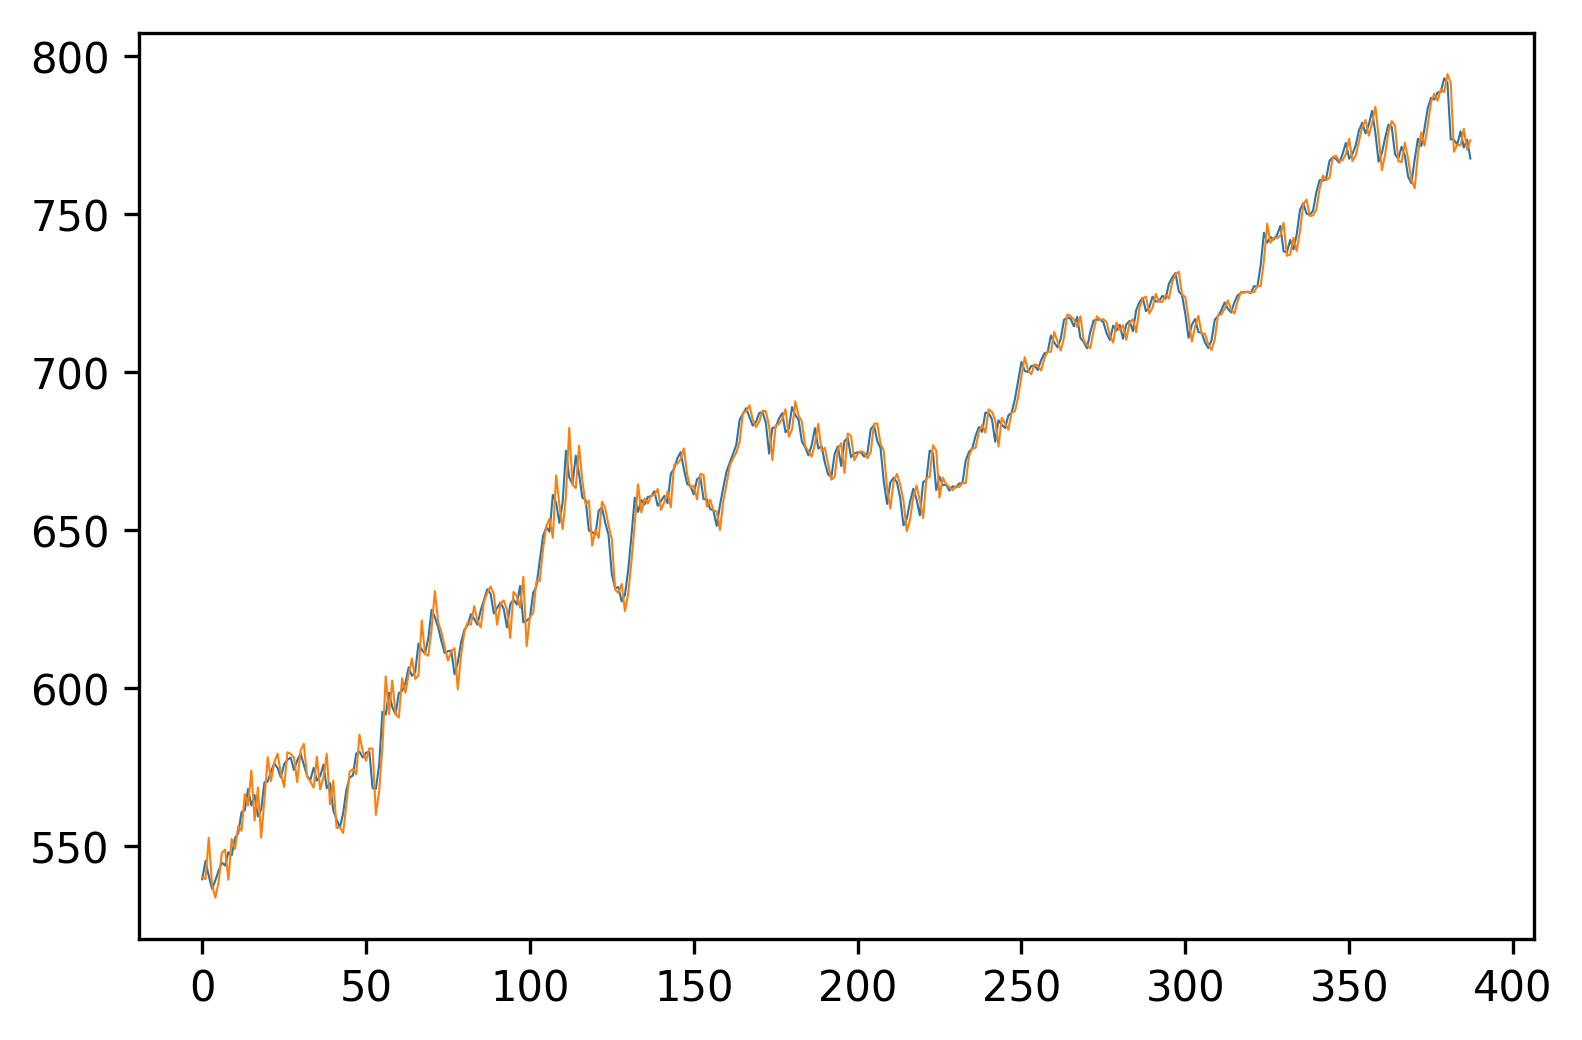

In [44]:
plt.figure(dpi=300)
plt.plot(testYT, linewidth=0.5)
plt.plot(predict, linewidth=0.5)
plt.show()

In [42]:
with open('results/raw_3_inputs.csv', 'w+') as file:
    file.write('close_price|predict\n')
    for i in range(predict.shape[0]):
        file.write(str(testYT[i][0]) + '|' + str(predict[i][0]) + '\n')

In [50]:
data_trend = pandas.read_csv('results/raw_3_inputs.csv', sep='|')
_today = data_trend['close_price'][:-2]
_tomorrow = data_trend['close_price'][1:-1]
_predict = data_trend['predict'][1:-1]
_trend_reality = [numpy.sign(b - a) for a, b in zip(_today, _tomorrow)]
_trend_predict = [numpy.sign(b - a) for a, b in zip(_today, _predict)]
_correct = sum([1 if a == b else 0 for a, b in zip(_trend_predict, _trend_reality)])
print(_correct*100/len(_predict))

52.590673575129536


In [ ]:
# import keras.layers as LtfdVma7NlW7a8BhjMvjghLAlbCHtI7JAJIcwkmV8yyZwkMAkJk0DIZGPPIWAgMYEAHggQFtvBYGMbGy9YsrxI1i51t3pfq7uqnt8f1SpVWy2p1V3dJXW/X+f04Xlu3ee59+HYf/hzvvfeEMcxkiRJkiRJkqojqvUEJEmSJEmSpOXEwE2SJEmSJEmqIgM3SZIkSZIkqYoM3CRJkiRJkqQqMnCTJEmSJEmSqsjATZIkSZIkSaoiAzdJkiRJkiSpigzcJEmSJEmSpCoycJMkSZIkSZKqyMBNkiRJkiRJqiIDN0mSJEmSJKmKDNwkSZIkSZKkKjJwkyRJkiRJkqrIwE2SJEmSJEmqIgM3SZIkSZIkqYoM3CRJkiRJkqQqMnCTJEmSJEmSqsjATZIkSZIkSaoiAzdJkiRJkiSpigzcJEmSJEmSpCoycJMkSZIkSZKqyMBNkiRJkiRJqiIDN0mSJEmSJKmKDNwkSZIkSZKkKjJwkyRJkiRJkqooWesJaKYQwhGgFZgE9td4OpIkSZIkScvBBiANDMRxvHaxBwtxHC/2GDoDIYQJIFPreUiSJEmSJC1DuTiOs4s9iBVuZ59JIJPJZNiyZUut5yJJkiRJknTO27VrF7lcDkq5y6IzcDv77Ae2bdmyhe3bt9d6LpIkSZIkSee8yy+/nB07dsASbd/loQmSJEmSJElSFRm4SZIkSZIkSVVk4CZJkiRJkiRVkYGbJEmSJEmSVEUGbpIkSZIkSVIVGbhJkiRJkiRJVWTgJkmSJEmSJFWRgZskSZIkSZJURQZukiRJkiRJUhUZuEmSJEmSJElVZOAmSZIkSZIkVZGBmyRJkiRJklRFBm6SJEmSJElSFRm4SZIkSZIkSVVk4CZJkiRJkiRVkYGbJEmSJEmSVEUGbpIkSZIkSVIVGbhJkiRJkiRJVVSTwC2EkAghXBVCeHsI4aMhhHtDCJMhhHj67z+XYA7pEMLbQgjfCCHsDSFMhBAOhxDuDCH8Xgihc7HnIEmSJEmSpOUnudQDhhBeA/wzUL/UY1fM4VLgJuCap/y0dvrv2cD/DCHcEMfxN5Z6fpIkSZIkSTp31aLCrZXahm3rgVs4HrbFwPeAfwK+BoxPt68Gbg4hXLfkk5QkSZIkSdI5a8kr3Cp0AT+q+Hsp8NtLMO6/AOdNX+8FXh3H8YPHfpxeSvp54KeBFPDFEMKWOI4HlmBukiRJkiRJOsfVInD7D2BTHMf7KhtDCNcu9sAhhFcAz5++nQReGcfxTyr7xHF8NITwauAh4EKgHfh94A8Xe36SJEmSJEk69y35ktI4jo88NWxbQu+quL7xqWHbMXEcjwLvqWh6RwihltWAkiRJkiRJOkfU5JTSWgghNFJaJnrMp07zyJeAkenrduAFizEvSZIkSZIkLS8rJnADngNkpq9HKe0bd1JxHE8AP6xo8vAESZIkSZIkndZKCtwuq7j+SRzH+Tk88+OTPC9JkiRJkiTNaiUFblsrrvfO8ZnKveYureJcJEmSJEmStEytpMCto+K6a47PHKm4bq/iXCRJkiRJkrRMraSTNxsrrsfn+Exlv8aT9jqNEMK7gN+cY/ct8x1HkiRJkiRprv7fAwf5k9v/jrXn7+Crr/kKqUSq1lNaNlZS4JatuJ6c4zO5iuu6BYy9Cti2gOclSZIkSZKq6gP/8Sj5dd/kwAj854H/5CWbXlLrKS0bKylwm6i4Ts/xmUzF9Vyr4mbTA+yYY98tTxlXkiRJkiSp6s5vq2MwThBCgZufuNnArYpWUuA2UnE912q1yn4jJ+11GnEcfxj48Fz6hhC2YzWcJEmSJElaZEeGRmBVEYAn+p+o8WyWl5V0aEJvxfWaOT6ztuK6r4pzkSRJkiRJqplCMebI6BFCiAGYLMx19y3NxUoK3B6tuN40x2c2VlzvrOJcJEmSJEmSaqZ7eIJCdLy2KGfgVlUrKXB7pOL6yhDCXJbTPu0kz0uSJEmSJJ2znuwZJcp0le8ni7lT9NaZWkmB250cP3W0AXjGqTqHEDLAsyqabl2keUmSJEmSJC2ZnuEcv/ovXyW79msAFHKrmSpMEcdxjWe2fKyYwC2O4xHgloqm60/zyC8ATdPXfcDtizAtSZIkSZKkJXXrzi6KDT8G4KqG11OcWEeRIvk4X+OZLR8rJnCb9pGK6+tDCJfP1imEUA+8t6LpE3HsP3WSJEmSJOnctr9vjJu3/5hk46M0pBp5dscbIS7tuuXBCdVzzgduIYTNIYS44u/6k/WN4/jrwPenbzPAv4cQrnrK+zqAm4GLppv6gPdXf+aSJEmSJElLJ45jXvPR7/JweDeJ7BEu79hGXSpNHKcAA7dqmsvBAVUXQvgGcN5TmtdWXD8jhPDALI++Io7jQwsc/i3APcA6YDPwQAjhe8AuYBXwM0D9dN888IY4jgcWOKYkSZIkSVJNHR2ZZCC/rxx6vHD9CwnDERQTAOQKHpxQLTUJ3IBtwKZT/N4AXD1Le3qhA8dxfCCEcB1wE3ANEIAXTf9V6gFuiOP4FiRJkiRJks5xj3cPE2W6AXjHlf+NN1/6Zr5y/xEr3BZBrQK3morjeGcI4VrgTcCbgcuBNcAAsBv4MvCpOI6P1m6WkiRJkiRJ1fNE9whRpguAX7jklaQSKTLJqLyHmxVu1VOTwC2O481VfNceSlVqZ/rcJPCZ6T9JkiRJkqRl7bGuUoVbXbKedQ3rAMgkE8cPTSha4VYt5/yhCZIkSZIkSTq9Xd2jJDI9XNhyASGUapcyyYi46Cml1WbgJkmSJEmSdI4YnyzwO//2PX73tj9idGr0jJ7tGh4jJIZZU7+m3OaS0sVh4CZJkiRJknSOuPGHe/hW99/y7X1f5TM7zmyXrN7xQQhF2uvay22ZVEQcW+FWbQZukiRJkiRJ54ijwzmi5AAAcRzP+bl8ocjwZOm5tkxbuT2dqNjDzcCtagzcJEmSJEmSzhGjkwWISsFYMpr7WZh9Y5OExAgA7dmZFW4uKa0+AzdJkiRJkqRzxMDYJCEqBWNDuaE5P9c3OklIlvZ8mxG4JSPiYgqwwq2aDNwkSZIkSZLOEQcGxsoVbgO5gTk/1zsySUiUAre27PElpZmkS0oXw9xrDyVJkiRJklQTn71rL7ccuZF9U1OEUNq77YwCt9FJQvLEJaXp5PFDE1xSWj1WuEmSJEmSJJ3F4jjm3V+9h/sGv0ix/eZye3+uH4B3/cvdvPxf38o3dn/jpO/oG8mVK9yeuqS0XOFWtMKtWgzcJEmSJEmSzmL7+sZI1O0/ob1/YoDB8Sm++dj9HJh4iD/4/h+we2D3rO/ordjDrTXbWm7PJCMouqS02gzcJEmSJEmSzmL37e0nUb93RltxspX+iX72940RpfvK7XcfuXvWd/SOlk4pbUw1kYpS5fZkIiLgktJqM3CTJEmSJEk6i92/b4BEdt+MtsLEBkamhtnbN0SUOh64jUyOzPqOnuEcUXKEVXWdJ/yWjjIA5PI5Pnf349y044sU42IVv2Dl8dAESZIkSZKks9ie3lGidO+MtjjfCMBjPV2EVH+5fXhyeNZ3dA/niOqH6azfdMJv6WSaIrD9cC+f3vdeUi0PkE5GvO6S11XvI1YYK9wkSZIkSZLOYgcHRolSg+THNgPwX9p/nrhYB8Ce/qMzlpQOTQ7N+o6e4WGIxumcpcItk0gD0D8+TqKuVEnXNdZVzU9YcQzcJEmSJEmSzlJxHHNkpAdCkTdffS3ff8MPeeOF/524kAXg4GA/iVQfUX4tMHuFWxzHHB0vVcitqlt1wu/p6cBtqjgJoVB6hnhRvmelMHCTJEmSJEk6Sw2N55mISxVs5zeto7WukZa6DBRLgdvhkT5CaoBMvBqKmRMCt/19Yzzv7z5J+oK/AmYP3LLJNHEc0Tu1mxCmAPjBvh+zvXf7Yn7asmbgJkmSJEmSdJY6ODBOlBoAYG1DqYqtKZssV7j1Tx6CUKQ+6oBi3QmB24137qG//ibCdOVaR13HCWOsb6sjnmojF7oIyTEAHu6/hzf9+5uIYyvd5sPATZIkSZIk6SwSxzF//vUH+Y1v/gH3H9lJSA0CsK5hHQDN2RTxdIVbIXUIgKZkJ4V8lqGnBG5tDWnifHP5flX9iRVuH33r07kqenc5xKs0PDX7IQw6NQM3SZIkSZKks8j+vnFu/MmXuaP7G3zi0f9NlDx5hVsiUzrcoCW9iriYPaHCbTSXJy5kyvezLSmtSyf45WduY2rwaSf81jvee0KbTs/ATZIkSZIk6SzyZO8oITEKwHh+nCjdSzIky9VpjZlkeQ+3KF0K3Dqyq6FQx9DkEK//57/h/fd8AID+sSlCYqz87tlOKQV46eVr+a2f+m2Sgy+d0X50/Gh1P26FMHCTJEmSJEk6i+zuGSEkhwAo5FMk6g5ycdvFpKIUAMlERDZRD0BITAKwum4tcTFLIc6zM/9PfO6RzzI6NUr/6OR04Bb44As/SEumZdYxoyjwrhdt4/975n9nsv/acnvvhBVu82HgJkmSJEmSdBbZ1TNClOkBIBcPEJLDbOvYNqNPY7qxfB0IrG1YdcIebI/1P0b/2CSJ5BhXr7qKl26eWb02m1+6diP//Nq/ZPzgmwGXlM6XgZskSZIkSdJZZHfPKFG6FLiFxATACYFbU6aBOC7FOu3ZDtrq64mLdTP67OzbSd9YDhJjtGZa5zR2CIGr17dTnCgd0HB4pGdB37JSGbhJkiRJkiSdRR7vOUo0fTLpMZd3Xj7jvjmbgmLpMISNzRtKJ5c+pcLt0b5H6R8fgVCYc+AGkEpENKXbAPiXe3dQLMbz+YwVLVnrCUiSJEmSJK10RwYn+Me77qCp7Un68mPUA3EcEUIRgMvaL5vRvz6dgKhU/XZp+6Vcs7GVwtjmGX0e73+cwdxFZOGMAjeAwZEkjXGCVS2TRFGY72etWAZukiRJkiRJNfaHX3mIu/P/m+jIIPWbSm3FiXUk6g5y1aqriMLMRYo9wzlCe6ny7LL2y+hszFCc2FD+PY4TdI8dpRBGAGjNnlngBoE430BD6/i8v2klc0mpJEmSJElSDe3rHeP2/XeesIz0qux/5ar2a/nACz5w4jN9Y+XryzpK1W//713PY8PUO+kMT6cwtpn+if7pE0rPvMLtUzf8F65sezbPPO+nzvRzhBVukiRJkiRJNXX//n6iuj0AjB96HXXnfQmAz1//OuB1sz7zs9vWcstIB1G6ly0tWwC4ekMr3/i13+Tvb3kJH9n+Z+SKu8ohXlum7Yzm9OKtq3nx1g/O74Nk4CZJkiRJklRLPcM5QrK09PM91/0i3z9Sz6uuuOyUz/zl665kx5HPsbq1SCqRmvFbe0OaON8AQJTuBuazpFQLYeAmSZIkSZJUQ93DOUJyiERI8EvP3MYvhytO+0x9OskzNq6f9beOhjRxYTpwy/QAZ76kVAvjHm6SJEmSJEk11D00QZQcpqOu84TDEeajvTJwSxu41YKBmyRJkiRJUg11D+dIpIZZXbeqKu/raKxcUtoHQEumpSrv1twYuEmSJEmSJNVQ9/A4JEborOusyvvaGzIUC43l+8ZUE8nIXcWWkoGbJEmSJElSDXWP9kMo0FlfncCttS5FmF5SCtDmctIlZ+AmSZIkSZJUIxNTBUby/QCsqtKS0igKtKTbyvdt2bZT9NZiMHCTJEmSJEmqgaGJKW57/EkSdfsAqrakFOCiVZ0Up5oA92+rBRfwSpIkSZIk1cDbPvlDnsj+Ptl1o2QT9Tz3/OdW7d3P2dLJQzvXE6UeISau2ns1N1a4SZIkSZIkLbF8ochDR/YQJUcB+Lvr/obzG8+v2vuffWEHxdxaAJ4YeKJq79XcGLhJkiRJkiQtscODE0TpXgD++No/5jnnPaeq779mYytTA88A4F3XvKuq79bpuaRUkiRJkiRpie3tHSsHbhuaN1T9/Zlkgt3vfRvwNkIIVX+/Ts3ATZIkSZIkaYnt6R0lSpUCt41NGxdlDIO22nFJqSRJkiRJ0hLb11eqcEuGJGsb1tZ6OqoyAzdJkiRJkqQltrd3lCjdy3mN55GMXIC43Bi4SZIkSZIkLbGuoRxRatjqtmXKwE2SJEmSJGmJdQ+PQDROR11HraeiRWDgJkmSJEmStITiOOboROnAhM66zhrPRovBwE2SJEmSJGkJDU3kyTMEQEfWCrflyF35JEmSJEmSFlmhGPP+bz1AX+arvOHitxGSw4AVbsuVgZskSZIkSdIiu2t3L5/e8SkynbfRM9ZNlCxVthm4LU8GbpIkSZIkSYvsgf0DRJkuAIZyw4RkBjBwW64M3CRJkiRJkhbZnbuOksgeAmBoapiQKAVunlK6PHlogiRJkiRJ0iJ74OA+otQAAEdz+4hSg0REtGXaajwzLQYDN0mSJEmSpEU0MVVgvDhYvi8ySbLpEbZ1Xk4iStRwZlosBm6SJEmSJEmLaHB8ipAYB6AwvqHc/vpLfrFWU9Iicw83SZIkSZKkRTQwdjxwe+2WN3Dn3sfZfH4PL9v8shrPTIvFwE2SJEmSJGkRDY5PEaJS4PbybRfxvpdcX9sJadG5pFSSJEmSJGkRDYxNQmIMgOZ0c41no6Vg4CZJkiRJkrSIBir2cGvJtNR4NloKBm6SJEmSJElVtKtnhPuPbGeqMAXAUEXgZoXbymDgJkmSJEmSVCXdQxP87Mf+kV/+1pv4yIMfAY4dmlBaUtqUbqrl9LREDNwkSZIkSZKqZPvhIZKNjwBw16G7ABgYnyQkxmlINZKMPL9yJTBwkyRJkiRJqpKdh4eJUv0ArGtcB8DgeJ4QjdPictIVw8BNkiRJkiRpnvb1jnHdhz7JL9z8RgYmBthxeIgwHbgdq2YbGJskSo55YMIKYh2jJEmSJEnSPH3i+7voynyansEBvvzEl3n44EaijqMADE0Olf53fIrQME5zxgq3lcLATZIkSZIkaZ7WNGWJDzdDeoC/ufdvKTSvIhEVABjKlQK3I8ND0DRBZ11nLaeqJeSSUkmSJEmSpHlKJiKK+emloiEmkekGIC5kGcgN8uP9h+kt7ARgXcO6Wk1TS8wKN0mSJEmSpHkayU2d0NaZuJIjoyMcHu7hl77xy9RtOAIYuK0kVrhJkiRJkiTN02iuQIhy5fv/+/wPc13b/yQu1jEVj5HIHin/trZhbS2mqBowcJMkSZIkSZqn4Yk8IZoA4M1b38pPX/A82uuboFBHCMUZfQ3cVg6XlEqSJEmSJM3TaC4PUY5NzZv4w2f9LwBa61PEhboT+hq4rRxWuEmSJEmSJM3T6GSeRGKSxlRjua2lbvbArSnVtJRTUw0ZuEmSJEmSJM3T8EQeEjkaUg3ltpa6FHGxfka/i1svJoSw1NNTjbikVJIkSZIkaZ5GclPQMEF96njAdsmaJgrj55fvb3rFTVyx6opaTE81YuAmSZIkSZI0TyO5cQjFGUtK1zRn+fdffyv/eG8nF23oZVvnthrOULVg4CZJkiRJkjRPo1OjADOWlAJsO6+Zv3nV62sxJZ0F3MNNkiRJkiRpHuI4Ziw/e+Cmlc3ATZIkSZIkaR7GpwrEIQcYuGkmAzdJkiRJkqR5GJnIExIGbjqRgZskSZIkSdI8jOTyEBm46UQGbpIkSZIkSfMwNJEnRBMANKWaajwbnU0M3CRJkiRJkuahf3SSkCgdmtCWbavxbHQ2MXCTJEmSJEmah77RSUKyFLi1ZltrPBudTQzcJEmSJEnSstY1NMEvf+4rvOs7/4OxqbGqvbevssItY4WbjjNwkyRJkiRJy9pvf/5+7i+8h9sPfZcfHflR1d7bN1YK3CIimtPNVXuvzn0GbpIkSZIkadkqFGPu2ru/fD8yNVK1d5f2cBujOd1MIkpU7b069xm4SZIkSZKkZev+ff0kGx8p3x8dP1q1d/eNThIlRz0wQScwcJMkSZIkScvW9x7rIdn4WPm+d7y3au/uH5skSo4ZuOkEBm6SJEmSJGnZ+s/HjpBqeJwwtQaoboVb7+gERGO0ZjyhVDMZuEmSJEmSpGVpYqrAjp4nIDFOU/FqKGaqFrj1DOfYM7QLQtEKN53AwE2SJEmSJC1LRwYnIDUAQFvqPIr5xqoEbnEc87qP30LDhX8PYIWbTmDgJkmSJEmSlqVDg+NEyVLgtqpuDcV8Ez1VCNz29Y1xcHxn+f4VF75iwe/U8pKs9QQkSZIkSZIWw+GBCUJqEIDzmtYS9zQxmNvLVHGKVJQ64/cNT0zxtYcf5WuP3U6643YAvvjKL3JJ2yVVnbfOfVa4SZIkSZKkZenQwPEKt6vXbqaYW0NMzB0H7zjjd+3tHeUlH7mR//PQr/Lw1EdJNuwCMGzTrAzcJEmSJEnSsvPk0VH+7eG7SDbtpCnVzKuvvoCmyedBHPG5HZ87o3dN5ou8/bP/yXDLJ0klY67Ivo2N6efze8/4PaJgtKITuaRUkiRJkiSd0x4+OMiOvvvZ2LKW3/ri7dSd/wXG9t3AxJoPEID6VDOZZIJXbNvKvx28kAd7Hjyj99+7t4+9E3eTbRvhj5/1J7zuktctzodo2TBwkyRJkiRJ56ypQpFXfuSbNF7yPrJRMyPZNYznuog7/p5wrE9xCoC1LVnivc1MFCYYmxqjPlU/pzHuebKPRP2TAFy38brF+AwtM9Y9SpIkSZKkc9Ytj3STar0PgIniEMSl2qKQHANga/O1fOAFHwCgszFNMd8EQO947ynfG8cxhUKRYlzkrt29JBueZEvLFtqybYv1KVpGrHCTJEmSJEnnrK8+eJBk8wOlmzgQZbrLv13cupUvvOoT5X3WOhszxIVGAI5OHGVD84aTvveTP3iSv7rvfaxa8xhHD7+D1OZBnrH2ZYv3IVpWDNwkSZIkSdI568f7u4jWdpVuQkyU7uV5572QP3/en9GWbZlxqMGqpgzxHCvc/vzrj9B02T0MTkKx4UcAXNp+6eJ8hJYdl5RKkiRJkqRzUvfQBD25XYQQU8w3ltsv7biYjrq2E04Q7WzMEE/3Ozp+9KTvLRZjQmK4fJ9uvxOAi1ovqub0tYwZuEmSJEmSpHPSgwcGieoOAJAfurLcfnnH5bP272hMl5eU9k6cvMJt99EREnX7yvchMQHABS0XLHjOWhkM3CRJkiRJ0jlp+6FBEtlDAOSHryi3v3DDC2ftn0kmaEyWDj041ZLSe/f0k6jfC0BhYk25vSXTsuA5a2UwcJMkSZIkSeekrqEcITlEU6qZF216BqvTF/MXz/8LUlHqpM901rdCHJ1ySeltj3aTbHyU1nQ7E4ffAEBjqvGk/aWn8tAESZIkSZJ0TuofnSRKjNJe18Yn3/Ic4MunfWZVYx09hUb6Jvpm/X1iqsD3n3yMxKYuXrzxtVz3tNdwX28TL996dZVnr+XMwE2SJEmSJC2poyM5PnnXPTR3PM5Q19O5e/iTvO2aF/Pai197Ru/pG50kSo/Rnj1vzs+01acpjNUxmBuc9ffbdnaTr/sxCeCF61/Iizat5kW8+YzmJRm4SZIkSZKkJTNVKPJrn72dx1PvJTo4QHGqmSg1xHvuvI3XXvxa4jjmzl09/Nsj3yZdf5jrr/l5Luu4bNZ3HR0dh+wobZm2OY/fWp8iHq6nb6Kf6z/zHxTbv8IHr/szVtevBuAff/A46fYf0pldzQs2vKAq36yVp6Z7uIUQ0iGEt4UQvhFC2BtCmAghHA4h3BlC+L0QQucijv3sEMJHQgg/DiH0hRCmQghDIYTHQwhfCCG8JYSQWazxJUmSJElaie7b28/2we8TpQYAiFJDM37/zA/38qtfezff7Xs/3zjwGd753XcxNDmzz5HBCV758c9zpOnPIRRpy849cGupTxEX6xiaHOSe0Q9xf++d3LTzJgC6hyZ4sOdBQnKIN176+lPuBSedSs0CtxDCpcDdwGeAlwMbgQywFng28FfA9hDCK6o8bkcI4WbgTuCdwE8BbZSq/ZqAi4DXA/88Pf5zqzm+JEmSJEkrWdfQBCFZCtByR198wu+3P9ZDsuExkiHDZO8L6J3o4QuPfmFGnz/8yk94MvMXJDI9AGcUuLXWpYkL9UBcPok0jmMAuodzhMQwAJtbNp/pp0llNVlSGkJYD9wCHFtkHQO3A7uAVcDPAHXAauDmEMLL4ji+tQrj1gHfBa6paO4B7gcOTI99OXDh9G9bgG+HEK6L4/juhY4vSZIkSdJK1zOcIyRHAMgPbyPTeVv5tziO2X10iKizj+etfwF3HXgpE9zOwz2P8te3fY9dQ4+ye/gh9g6Okmwtlp870yWlFOpntB0aOQSU9oQLyVEA2jPt8/5GqVZ7uP0Lx8O2vcCr4zh+8NiP00tJPw/8NJACvhhC2BLH8cACx/0DjodtMfBu4P/GcTxeMXYA3gh8DGgB6oF/BK5a4NiSJEmSJK14R0cmCclhIiKKE+fP+G04N8qB4YNkVxXZ3LyZ7o4OduSbuXv/o3xn6g6iVKn6LNk6851nVuGWIi7UzWg7OHIQmA7cEqNn/E7pqZZ8Sen0EtHnT99OAq+sDNsA4jg+Crwa2D3d1A78fhWGv77i+u/jOH5fZdg2PXYcx/HngV+raL4yhHBlFcaXJEmSJGlFOzqSI0qM0JZt55bffTHXJN5DfvQCAHZ0H6aYLC0T3dS8iQtXNZLPdTJaPFwO22bTnp17NVpr/bElpcftG94PQG9FhZuBmxaiFnu4vavi+sY4jn8yW6c4jkeB91Q0vSOEMO+KvBBCM7Cpoumm0zxyMzBWcX/JfMeWJEmSJEklPcM5ouQInXUdbFnVyFuveT6F0a0A7Ow+TJQ+CkwHbp0NFCc7iaOJU74znUjPefzW+tSMwK0wtpGBXD/Dk8P0jeYIiVECgdZM6yneIp3akgZuIYRGSstEj/nUaR75EjAyfd0OLOQ83san3PefqnMcx3mg8hiUmp7oKkmSJEnScnB0pLSHW0ddBwAdjWmK+QYAdvUdIUo+wn7nAAAgAElEQVT3ArCxaSMXrmqgOLmq/GwibqAwsRaAiIi1Y7/J1Z1P54rOK+Y8filwO76kND9yKQC/8s0bODo8QUiM0JxuJhnVahcuLQdLHSI9h9JJpACjwI9O1TmO4wnghxVN1y1g7B6gMhK//FSdQwirKB3acMyDJ+srSZIkSZJO7icHBvk/t97MLXtvoWd0CKJJOus6AWhvSBMXSoHb4ZFeQmqAKCTorOvkkjVNFHNryu95ycZXMtlX2qVqdf0avvPOd/K5n/s0dcm6Ewc9ieOnlJb8zHmvpzC2kccHHuXQ6EGi5OgZLVGVZrPUgdtlFdc/ma4iO50fn+T5MxLH8RTwzYqmPw4h1J+sP/B+jv//c0scx4/Nd2xJkiRJklayV37oB9y0/938zn/+Dv0TpSWjHdnpCreGNHG+tCjt6FgfUXKIzrpOElGC9W11RLnN5fdsaVtPPFVa6nle47p5zSWbimZUuL39eZcwOfBMALpye4iSo+7fpgVb6sBta8X13jk+s6/i+tIFjv+HHF+i+jTgoRDCr4QQLgohZEMIG0IIPxdC+D5ww3S/HRXXkiRJkiRpIep3ApSXlDZnU6RDCwBHJ/eSSA2xtqFU1RZC4IKO49VmF7SuJVEoPbe2Ye28hg8hlCvqrl137XQVXSm8G8jvgWjMCjct2FIvSO6ouO6a4zNHKq4X9E98HMc7QwjPBb4GbAS2AJ8+SfcB4LPAH8VxfPKjUCRJkiRJ0qmFyfJluu0uAC5oKZ1MGkWBn992Od84uomBursJocia+uPLSH/lOZt57w+fSbrtHi5svZD3vHwrD41czy9d9rPzns6D7/55Bqeey5rGFjKJFOvqNjIUB8YSOwghNnDTgi114FZ5cMH4HJ+p7PfUgw/OWBzHD4UQLgF+jdKy0YaTdP0WcFM1wrYQwruA35xj9y0LHU+SJEmSpLNFsRiTSo+U76NMaUnppe3HF7H9yrM3c/Nnnk1dfWkx3Or641uqv/XaTTx901+TzvZxYeuFXPwsgN9d0Jxa6lO0VGzbftnaTu7MdZLIlhbZbW3ferJHpTlZ6sAtW3E9edJeM+Uqrue+C+JJhBA6gQ8AvwSkKFXQ3QkcBVqBa4FNwBuBN4YQPgH8ZhzHhQUMuwrYtpB5S5IkSZJ0Luobm6QYDc5oS0ZJVtUdP330ivObSeaOb9teGbgBXLq2ldJ/si+O52zp4Ps/2kIi0wPA1auuXrSxtDIsdeBWeUpoeo7PZCqu51oVN6sQwsXArcB6SkHefwM+Xnl4QwghAG8CPgY0A78OFJh7hdpseijtBTcXW5j5zZIkSZIknbO6hiYIySEA8iMXk2x8nHwxT+k/v0tCCFzcuZo90/fHDlRYKj992Wred9tlpNtLy123tLr4TAuz1IHbSMX1XKvVKvuNnLTXaYQQksCXKYVtAL8Rx/Gnn9ovjuMYuCmEcBT49nTzO0MIn47j+J75jB3H8YeBD89xntuxGk6SJEmStEx0D+UIqVLgtrXu5xhIfY3/8cwTzyZ86eVr+PAjW0k2Prrkp4Ru6migMHYhAG3ZNpLRUsclWm6W+p+g3orrNSftNVPlsSN9Cxj7dcAV09ePAjeeqnMcx98JIXwX+JnpphuAeQVukiRJkiStVF1DE0TJ0vbo//D6n2VD09tn7ffOF13Empb3k25+hOef//ylnCIAP/j9n+XJgYvYumb16TtLp7HUgdujFdeb5vjMxorrnQsY+2UV17dNV7Kdzq0cD9yesYCxJUmSJElacXqGc3zsh3eQbL6fZJi5b9tTJaLA65++hVqdJbi+rZ71bVecvqM0B9ESj/dIxfWV08s8T+dpJ3n+TJ1fcd170l4zHa24blnA2JIkSZIkrTj/dt8BDvNtotQwf/rcPyWbzJ7+IWkZWOrA7U6OnzrawGmqxkIIGeBZFU23LmDsygMX2uf4TOUujQMLGFuSJEmSpBXnh7t7SdXvZkPjBl615VW1no60ZJY0cIvjeAS4paLp+tM88gtA0/R1H3D7AobfV3H94jk+c13F9RMLGFuSJEmSpBVlqlDk3gO7COk+nrnumbWejrSklrrCDeAjFdfXhxAun61TCKEeeG9F0yfiOM4vYNzvVlxfGkJ426k6hxCuA15S0fStBYwtSZIkSdKyFccxtz16kHsP31tu23FoiMnkLgCesdZt0bWyLHngFsfx14HvT99mgH8PIVxV2SeE0AHcDFw03dQHvH+294UQNocQ4oq/608y9NeBxyruPxFC+I0QQuIp7wshhDcAX65o3g98/vRfJ0mSJEnSyvPF+w7wG9/8E2749g3cfqC0OO3RI8NEmSMAbGvfVsvpSUtuqU8pPeYtwD3AOmAz8EAI4XvALmAVpZNB66f75oE3xHG8oD3U4jjOhxB+mdI+cPVAFvgo8J4Qwp2UDkhoobRn3OaKR3PAW+I4ziFJkiRJkk6wq2eERP1uAG558k6++5Mxvrv3NlIt95OMUmxo3lDjGUpLqyaBWxzHB6aXbN4EXAME4EXTf5V6gBviOL6FKojj+O4QwouBzwKXTDevA153kkeeBN4Wx/Ed1RhfkiRJkqTlKJNMEOebIdPNtx7dyUj4CqFujAjY0rKVVJSq9RSlJVWrCjfiON4ZQrgWeBPwZuByYA2l00B3U1rS+ak4jo9Wedx7pveNexXwGkonpZ4HNAKjQBdwH/BV4N/iOJ6q5viSJEmSJC03R0dyQBGA0dR9hIrfolCL7eOl2qpZ4AYQx/Ek8Jnpv/m+Yw/M+Hd5Ls/kKQV6Xz5dX0mSJEmSdGpHh3OE5MiMtlzPS8is+g4v3vjiGs1Kqp2aBm6SJEmSJOncd3QkR8iUArc4DqxrWMvHf+VPGYnfwWUdF9Z4dtLSM3CTJEmSJEkL0j0yRtQwxk9veAnvvPL36WxM0VHXBGyt9dSkmjBwkyRJkiRJC9I71kcSWNOwiq2r1tZ6OlLNuXOhJEmSJEmat9FcnhwDAHTUddR4NtLZwcBNkiRJkiTNW89wjpAo7d/WWddZ49lIZwcDN0mSJEmSNG9HR46fUNqRtcJNAgM3SZIkSZK0AEdHckTJYcAlpdIxBm6SJEmSJGneeoaPV7i5pFQqMXCTJEmSJEnz1jMySUiUKtzas+01no10djBwkyRJkiRJ83ZsD7fGVBPpRLrW05HOCgZukiRJkiRp3nqGS3u4rXI5qVRm4CZJkiRJkubt6EiOKDXqgQlSBQM3SZIkSZI0bz0joxCNGbhJFQzcJEmSJEnSvMRxzNHxXsATSqVKBm6SJEmSJGleBsenmKQfgFV1q2o8G+nsYeAmSZIkSZLmZX/fOFGqFLid33R+jWcjnT0M3CRJkiRJ0rzs7x8rB27rG9fXeDbS2cPATZIkSZKkOegZzvHg4d0M5gbn1P+vv7WTN37pd/j2nm8v8sxq50D/GCHVB8D5jVa4SccYuEmSJEmSNAfXf/oO3vYfb+Y9d7xnTv0/dPuD7Bi5hd/93u8u8sxqZ3/fOFG6n7pkPa2Z1lpPRzprGLhJkiRJknQa+/vG2DnwIHE0xn1dPyaOY7qHJ/ju4zvYNbDrhP75QpGQGDt+X8wv5XSrKo5jJvOFWb9hf/8YiVQ/5zeeRwihBrOTzk7JWk9AkiRJkqSz3a07u0k27gRgcHKA23c/zts//xXq1n+O+mQDd7z5BySjJA8dGOCPvnUT561/hJC8qPz8EwNPcGn7pbWa/oL85Td3cuPuPyHT9Bh//rz38sotrwRgMl9kZ/dhwpp+1jdeWeNZSmcXK9wkSZIkSTqNW3Z2lQM3gC/+5G6SzfcDMJYf5eDIQQBe9aE72JP8CHceuY0oe6jc/8HuB5d2wlV0//4BkvW7KZLnIw98tNz+6TufpD/zVQhFfm7Lz9VwhtLZx8BNkiRJkqRTGJvMc/f+R4jSfRTGNgLwaP8jJLKHy312D+wuLSNNDpXbokxX+frWfbcu3YSrrHd0AqJJAA6M7Gfv0F4AvrW9i3Tzw1zStpWXbnppLaconXUM3CRJkiRJOoU7nuilWPcIAG1TL4U4QdfUw0TpPoqT7QDsHtzNj/cNkGx4tPxcIt0NQHGqibuO3E3veO/ST74KescGCaFIMd8IwFcf+y4Hhw+yp68XEmNc2r7V/dukpzBwkyRJkiTpFB7Y30+ibj+BwNWd11KYWEuceRKA5PjTgFLg9sD+fqK6/eXnjlW4TQ08k2Jc4EddP1r6yS/QVKHI0GQ/AGHscgA+/pN/4GVffhnD2e8AsL5pfc3mJ52tDNwkSZIkSTqF/rEpQmKUxlQTV5/fSWHivPJv67NXQ6GJPYN72H5oiETFvm0hkQOgMFEKpPrG+5Z24lXQNzpJSA4DUB/WARCiAgCZztsA2NC0oTaTk85iBm6SJEmSJJ3C4PgUITFOS6aZK85voTi5uvzbpoYrKEw10p/r5ycH+0hkDxPn1pV/T0cZ4qk2AAZyAwuey3d2dPHGmz7Ih+7/0ILfNRdHR3KExCgATckO4kL2hD4GbtKJDNwkSZIkSTqFwbEpEolxWjItXLW+hdb4atKhng++8IM0Z9PEhSw9o4McTNwEoUA2v638bGu2lfpEMwB9E6UKt109I/xg34MMTQ7NOt7JFIox//Wfv8eOyRv5+EMfJ47j6n3kLJ7oHuZVn/wn6tb/CwCtmXbiQsMJ/QzcpBMlaz0BSZIkSZLOZoPjU9A4TnO6maZsint+/03Amwgh8KOHd0Axw0RxiHTb3QB0Rj/FgcKdhMQ47dk2JrNtDHC8wu1n/vbfabzkfWzr2Ma//vy/znket+7sJtVyX/l+aHKIlkxLNT91hg/d+gTZ875Qvu/IdhAP1gO9hDhLIZ+muT6mLdO2aHOQzlVWuEmSJEmSdAr94+MQ5crhVgihfCpnUzZFXDy+zPK3fuq3GB3aQEiMA/Csdc+ivaEOilkGJgYYm8wTUoMA7OjdcUbz2H5ocMYecV1jXQv6rtMZyeWB46ePrqrvJC7UA3BeUydff+3X+cYvfN0TSqVZGLhJkiRJknQKgxOlgKw53XzCb43Z5IzArbOuk2s2tFHIrQLg+suvp70+RTHfQN9EH91DOUJiZF7zGBibIiTGyvddo4sbuG0/3DNjrmsaWonzpcCtLpllc0crbVmr26TZuKRUkiRJkqSTKBRjRvIjNMKsyzebMkniQqZ835xu5s9efTm/cOhjbOxM0FHXQVvDfuLeBvon+ukamiBKndnebccMjE3ODNwWscKtdyRHV24PDSHm7Zf/Br9+9Q186b6ecoWbVW3SqRm4SZIkSZJ0EkPjx6vKZgvcGrNJqKhwa84001qf5sUXXVJu62hIE3fXM5A7RNfQBCE5fMox+0Yn+dQ997Jh3SHecOkvltsHpk9LjeNACPGiBm6PHhkmkTkMwNPXXkV9qp72+jRxXIoRAgZu0qkYuEmSJEmSdBKD41OEqLQf26xLSjNJ4uLMCrenamtIExcayMd59g/2E5LHK9ymilOkotSM/j//D99neN3vwD54wYbnsbZhLVBaUhrVj8PUeZA+uKhLSvf2jRGlS6eqbmreBEBr/fF5GrhJp+YebpIkSZIkncSxqjIoVa89VWkPt1MHbu31pcAN4MBQz4zAbTA3OKPvk0dH6Zp6sHzfM9ZTMZcchHHqWA3FNEdGj8zzq05vX98YIdVLRMS6hnUApBLHI4QoGCdIp+K/IZIkSZIknUTlvmmzhWlNmSQUZi4pfaqN7fUUJ9sB2DP0OFHFktLe8d4ZfR/rGiaROR6k9U30HZ/LxBCEmLZsK4Xcanb07iCO43l+2ant6y1VuK1tWEsqUapsu2h1I/nhKwG44YobFmVcabkwcJMkSZIk6ST6xyYJiVHg5Hu4VVa41SfrT+jz9M1tpCYvA+BA7r4ZFW43bv9n8sU8UNq7bVffIULy+MmgvROlQK5YjBmeLFXDbWztoDC2mcHJQZ4cenKhnzirvX2jJNJ9bGjaUG5rb0jzxHt+nQfe9gAvv+DlizKutFwYuEmSJEmSdBKPdY0QZbqIiGaET8c0ZVPEFYcmzHZ6ZyaZ4HmbL6GYW01/uJcoNUQcl/5z/Gu7v8IPDv6AqUKRp//l5/no7l8h3fH98rPHKtyGJ/LEUanS7qLO1RTGS/uq3d91f/U+tsLe/m6IcqxvWj+jPYoCiSixKGNKy4mBmyRJkiRpycRxTKFQpBgXaz2VOdlxaIhk9jCbWjZTl6w74ff6VIK4YknpyTz/klXkRy4mRJMAFEa3lH/rGu3ikcNDJBueOOG5Y0tOB8Yny3vJbWlfTbZwIQDbe7fP+VsGxibpH+8/bb99vWOMhb0AbGzeOOf3SzrOwE2SJEmStGT+4EsPceU/voKnffbpSzruwYFx7tr/yIw90ebi4cNdhHQfl7VfOuvvURSgYknpyVyzvpXCxPEKuV+6/PVM9r4AgO7xbu7d00+UPVz+PS4mAdg/1M0XHvwRt+39IWF677e2bCtt2dKecEOTx5ennkrf6CRP+8CnecEXXsCHH/jwKft+7PZdpDu+R0TESza9ZE7vlzRTstYTkCRJkiStHF+49wBNlx2ksDh7/Z/Uc9//HzRd+h42N2/ma6/92pye6R6eYCC/h3rg0pMEbsCMJaUns3VtE4Xx44Hbm6+5li/9oIGpjtvpHuumd28fibo95d+TcQv5wijfO/htvnfw2wBk16aB0l5yjZlxBuIUo1Ojc/qWQwPjROluAD724Md449Y30lnXeUK/QjHm5oe2k9y8m5dufvmsy2glnZ4VbpIkSZKkmvjSj/fwoXtvpH/i9MscF2Jv7yiJ+tLhAnuG9sz5uR2HhspVZ1vbt5603zM3ryYZN/OWS99y0j7pZEQ81V6+39C8gTVNrVBM0z3WzSNHBoky3eXfU6EBolzpZnIdACGaJBC4oOUCGjMJKGYYmxqb07cMT+TLy1kBnhyc/bCFXT0jTCZLy0mffd6z5/RuSSeywk2SJEmSVBP/69ufJLvuZn7Ucys3vvzGRRvn9sd6SDY+dsbPbT80RCJ7CDh1hdsX3vEc4I7Tvu99r72ST25/Gc+5JEsqSrG2Ocu+fBPdY90MjA8TwvF97fJTWUKmVAb4zit+l7+94z/IrPour9zySjrqOmjIJInzmTlXuA1PTEE0Ub4/WVD30IFBouxBALZ1bJvTuyWdyMBNkiRJklQTIVWqbHuk75FFHeeHu3tJ1O8CICKiUCzM6aTNHYeHiLKHWFW3mvZs+2n7n85br93EW6/9q/L92pYsxSPNdI12MzQ5QH1F34tWN1MceTtXXjjEO575ElqiLYxlnsZbL38dAA2ZJMXJ9BkEbnlCoiJwy88euD18cJBE9iCpKM2FrRee+UdKAgzcJEmSJEk1cmyJY66QW9RxHjkyQNTRA0CRIv25/ln3L3uq7Yf6SHR2s63jeYsyrzXNWeIDLQxPPQnJmYcfNNdFfPI1v1O+f+u1FwEXle8b00niYoaRqcE5jTU8MUWYQ4XbsVNZt7ZdQipKncHXSKrkHm6SJEmSpJoI0yFTMS6epuf85fIF9g/vI4RCua1nrOe0z43k8uwfeRJC4ZT7ty3E2uYscb4ZgChT2ivu2Omk+WL+lM82ZJLz2MPt9BVuPSPjkBhhbcPaOb1X0uwM3CRJkiRJS+j48aRRenEPSwDY3TMKqS4A8qMXANAzfvrA7dEjQ4TM6fdvW4iN7fUUJ0tLVRN1BwCIC40A5ONTB26NmQRxIcNkMcdUceq0Yw3n8pA4fYVb/8QQhJiWTMucvkHS7AzcJEmSJElL6HilWZRa/MDtsa5hokwpcCuMlpZkzqXCba4HJizEps4GipMdACSy+wGYGvwpAF5xwStO+WxDprSkFE4enlV66pLS8fz4CX0KxZihyQEA2rJtc/gCSSfjHm6SJEmSpCWTSR8P3ELieOgzNjVGfap+tkf+f/buO06uq777+Ofc6TPbm7Tq3ZaL5G6MKQZsMGCKTTehJwQCCTVAHng9oSWhOhXTISEUgw0G7PjBxKYYG9vYltwtW1ZfSVu0ZXqf8/xxZ2dmtStppZ2t+r5fL708c+fce8+KkdB85/c7Z0qeOBjHCRzEYCim1gL/S3+6/5jnPX4ghhM4SMQbYWnD0rrPC6C7KYi31AWAEzgEwPdf95csbf47ljQcvaWzIei2lAIk88ljVqTFypsm2JIP4+QnbCmNpfPgcY+3BFqO++cRkSpVuImIiIiIiMiM8XqKEx4fTA9Oy/1ue6IHX8N2NnVuJmzcEKs/dezA7dEDI3hDBzm1/VQcMz0fnR3HsKK5u7JuG8Dqti6WNnZjjDnquQ01FW6T2ak0ningeLI4RTdIm6gqbjiVw5QDN7WUikyNAjcRERERERGZMfnSxDuSHsocqvu9nu5PsCu1FZwcl654AUuaOsD6OJg8eMxzdw31gpNhbfPaus+r1ur2Rkr5tsrzyQZdEf/xBm5uS6nHutefqMLNDdzca7UG1FIqMhUK3ERERERERGRGFEuWgp14gf/pqHB7YM8QntAeAJ619FksawlTyjfTm+itzCeVy47bJTWRLZC27vpyiyKL6j6vWmu7GihlOyvP/R7/pM4b3aUUJreGWyyTByeDz4Sh5Kc/OUgsFxszZjiZV4WbSJ0ocBMREREREZEZkS0UwUwcuEWz0brfL5rOV9aJ6wh1sKQlRCnXwoHkQYrFEi//ym+56AfP44O/++CY8/piGYzXDaM6Q53jrltPV1+wgvzQxcd9Xm1L6Z7hIT77v7dyw5M/PeL4eDYJpoTfhCmV/Dx0aAsX/+hirK3uGlvbUqo13ESmRpsmiIiIiIiIyIzI5kvgFMYcs9ZgjGUkO1L3+8XLGwUARPwRuluC2D3NpAtP88P7n2R77kYCTpzb994+5ry+WAbHGwdgUXh6K9yWt4X5whVXcv3TUV50+uQ3Z4gEPJXA7caHdvJo/BY8B/azuWsT61vXjxlrrSWRS+AB/E4YCtUqut5kL90N3cDYwE27lIpMjSrcREREREREZEZkCkVMucLNWg8AxrgVVtFc/Svc4pkCxskQ9ATxOT6WtoQo5d3KrTt2Po03sgOAsDcy5rz+WLZa4Rae3go3gFedu4zrXvcJ3nbG2yZ9TkNNS+mjg4/gCe0H4Manbxw39ucP7qcQ+SMAjd5ubMlXee2JoScqj4dTeYwniYNDo7/xhH4WEXEpcBMREREREZEZkampcCsmxlZhTUdLaay8UUCDrwHAbSktB277EwcwXreqLlVIUihVK+9qW0q7wl11n1c9NAZ92GIQAKdhCwC25OH2Pb8ZN/Zrv99BoP0OVjWtYY3/MoxT3bji3oP3USgVeLI3zjf+dCu+psdo9DdO286sIicLtZSKiIiIiIjIjMjWVLgVkuvxNm4jkDmfbOD+aQncRltKGwNutdaq9gjk3QCtp3QrTjBeGRvNRmkPtQPQF8vi+GL4HD9N/qa6z6seQn4PPuMGicaTA6CUXUKf5wAlWxoTmA2lEtBaYFPnGUT3Goy3usnCD7d9n0OJDI9uX05wyU8AePPpb57Bn0RkYVJkLSIiIiIiIjMiky+BcSvJrrnqEn515e2sKL0VSuFpCtzyOJ4MjT43cOtsDPD+Z11GfuRcbHD7mLG1a8j1xd0Kt65wJ8aYus+rXlqDYzc2KGa6KdoiQ5kh93mxRMmWSOWTAER8EXedNqcc0OXc83/dcwMHQv+M44vxzk3v5J2b3jmDP4XIwqTATURERERERGZENl/EOG6FW1s4wtKmLlpDIUrF0LRtmoCTocHfUDl29YUryY1cUHk+2mJae//+WAaPLz5n20lHtYUaKuuxBZwINu9udNCX7ONXj/ay8Z8/zObvbSbDAOAGboOJXOX8N639O3KDz6o8X9N0ClefevUM/gQiC5cCNxEREREREZkRmUIJyi2lfo+7U2ZL2I8t1KfC7Wdbenj59z/Fl+/7MgDxbA6cXGUNN4C2iJ9SZknlebH8eCRTDdx6YynwJOgMTf+GCVPRGvFhi2EAmgMtlPLNAPSmevnq754m0Pm/AHgiTwNu4Hbl2UvJRzcDcMXGsyik1gKwsW0jv7jyhkpbrYhMjdZwExERERERkRmRzRcrLaVBj7vgf0vYhx0IEc32Tena1lo+eP2faDz1BnY9Dh8874PEswmAcTtu+j2ByuNSphsaH69UuFlr6Uv1E2DubpgwqjXsx8Yj4IvSHmxjd8EN3PqSfQS8qyvjnID7exvxRXjds9fwsrO+RjhQoCXYwpde+jr25ju4+oyXzsrPILJQKXATERERERGRaVMqWS655n+Id36Sly57V6WldLTCrTXswxbC5EpZ0oU0IW/ohO5z59OH8LXcX3n+84e3kwzcQQDGVLgBXHX2Un55aDGeYG+l2m00cIum8xSIEgA6w3O8wi3sxw67FW5dkTZM0W2P7Uv1UbSrKuM8wX2AG7g5jmFJc/X348qzlwNvnakpi5w0FLiJiIiIiIjItEnmCuxP7SRMll/0/CuYSwAIet0Kt+awH1tyQ6PhzDChhskFbnc9fYjb993K8zesxJ87jbfdcC2hJTdVXv/obV8h0PUbgDFruAF8+hVn8LztX6erLcprr30UqAZuozuUAvOgpdSPLUbcx8FWOkKdJHEDt56REXB/W3H87s8W8UZmaaYiJx+t4SYiIiIiIiLTJpUrjnluymu4Bcptnad1N1LMdAPw71v/fdLXfeO37uX6vZ/j3be9m3+/5xf4mh4GIB/dBIC/9Y+VseNaSr0OL9q4hrMXnU2T360K+8/H/pP7eu+jL+buUAqwKLxo0vOZDW3h6hpurYFWFjU0QilIf/IQA5mD48aHfeGZnqLISUuBm4iIiIiIiEybZLYATnVnTMc/CFQDt3NXtnHVuldSSK7m5p03ky/mj/seD+auwdvwFGua1pMv70BqPJnK60drU33TBaeQj50BwC27bhkTuM35ltKIvxK4tQRbaAr5sE+CPxQAACAASURBVMUQQ+koxjc0bvzhrbUiMn0UuImIiIiIiMi0SeWKmJrAzRPeBVRbSgE2LG6klHM3KEjkE5O8cmnckdM7NmKKreOOx3PxI17l/ZdtYKPnPVAMs314O/3xLE45cJsXmyaMtpQGWmkK+igVg8RycRyfu+trsWZH1ohPLaUiM0WBm4iIiIiIiEybZLaAcbKV58aTJegJjqk6awx6sUU3gJt04OaMr4Q7q2szXSG3DdRjvFzg+zQXL34Br1z3yqNe6tTFzRQyi9k+/DS90TTGGyfoCc35gGptVwNOfikGw4bWDTSF3N/HRC5eqdIrppdXxqulVGTmaNMEERERERERmTapXBFMbsyx1uDYKrSGgA9KbotpIpdgMJHl/9x0O76O2/nH5/49Tf6mcdetDfEA/uGZX+Cla1/IPWse4c7kGi7fsJlPX3wlcOUx53jq4kZKexaTKuxkf2I/xhunM9RxnD/pzFvaEmLrR96J5S1E/BGagk9gSyEypSSO161wK6WXQeu9gCrcRGaSAjcRERERERGZNoe3lMIEgVvQix0N3PIJPv3TrTwa+CgcgDt7XsBL1rxkzPhSyY4L8V6+/sUAXPPas7D258c1x1MWN1LKLgZgT+ZuPN4UraFVx3WN2RL2exn9aN8U8kExiKWI8Q8ScIIkc9W22LBXFW4iM0UtpSIiIiIiIjJtkrmxmybA+MCtMejFltyW0oFklHv3P1J5bTg7PO6amUJxXIVbLWMMxphJz/GcFa2c0vQMSrlW+n0/A2+MtkDbpM+fK5pqfh89gQG6Il3YfHPldY/jma2piZx0FLiJiIiIiIjItEkdtoYbMC7Magx4obyG24HYCI6vGrL1pfrGXTOZHVs1d+mKS6c0R7/X4VMvfQbZQ9XrHB4KzgeNQXeXUgDjSdEV7sQWGmd5ViInJ7WUioiIiIiIyLRJ1rSUlvItOL6Ro7aUHkpFMZ5U5bW+5PjALVVTNfeBcz7Mm06/esrz7G4OjqkGm4+BW1OoWuEG0BXqAlTVJjIbFLiJiIiIiIjItKkNx0q51okDt0A1KBpOx6E2cDtihZtbNbekYRE+xzfleXY1BigVqoFbW3A+tpRWK9wAOsIdXPPazfxk++t50elLZnFmIicfBW4iIiIiIiIybUbDMQ8B8sUGAFoDYwO3iN8L5cAtmo1jPGkAbMlH7zEq3MK++mwE4PU4C6DCzVf5fQS3wu2qM5Zx1Tkfn8VZiZyctIabiIiIiIiITJt0rghODr8TxBYiwPgwy3EMEa/7Wiwbr7SUljLd9KX6sNaOGe+2qboVbiFviLqx/srDw0PB+cCtcKsGbhvbN87ibERObgrcREREREREZNokcwWMkyPoDWPLFW4TtWtGfG7glsgnyoGboZhdTKGUZygzNGasuxFDfSvcAGo3Np2XLaUhL7ZUDSDP6jprFmcjcnJTS6mIiIiIiIhMm1R504T2cBsvPOO1tHSdyqbOTePGNQRCJK1DqpDCeFIEnQjZvBt67U/spz3UXhmbLFfNAZXKuHoIeKs1KS3Blrpdd6aEfB5sMVB5HvAEjjJaRKaTKtxERERERERkWnznzl3cNfQdHP8hGnxhPnH5Rbz3nL/EMeM/ijYFfVAKkSkmMZ4ULYEWSjk3ZNsb3ztmbCpXqLSU1rPC7aOXn0pu5DwA2oPtxxg99xhjeOsF57Cx8Tlc+4JrZ3s6Iic1VbiJiIiIiIjItPj0zY/QuPFOALLF7FHHNgR92FKAbDGFx5umPbycHeXAbV9s35ixyWy1wi3srV/g9tZnruLPLvwWjgMex1O3686kv3/ZmcBXZnsaIic9VbiJiIiIiIhI3WXyRZzAQOX5E0NPHHV8R8RPqRAhzUHwRmkJNtMe6AaOVOHmBm713DTBGIPP65m3YZuIzB0K3ERERERERKTunuyN4wQOVp6//5z3H3X8Xz1vHf7YFRgn7x6wsLqtHYqN4wK3ZNbdpTTgCSgcE5E5SYGbiIiIiIiI1N3jB2N4gm7g9otX/oJ3nPmOo45f19XA11/9OjK9rwBgacNSVraHKWTb2BMdX+GGyRGqYzupiEg9aQ03ERERERERqbvtfQmcQB8+x8/KxpWTOufCNe38+A0foid9Kc9euZlvRPuwvQ3Ecnux1mKMASCRLWA8WSJ13DBBRKSeFLiJiIiIiIhI3Q0lsxhPkrZg23G1fZ6zopVzuASAsO8QlPxYLNlilqA3CEAqV8Q4OcK+1umYuojIlKmlVEREREREROpuJJ3H8aRpDjSd8DVCfg/W+gFIF9KV48lsAcfJ1XWHUhGRelLgJiIiIiIiInUXTecx3jTNgeYTvkYk4IWSG7ilCqnK8VSuCE5WgZuIzFkK3ERERERERKTuRlJZMGma/SceuIX9Hmw5cEvnqxVuiVweTI6w1nATkTlKgZuIiIiIiIjU3UgmDsbSNJWWUl9N4FbTUprKZcBYVbiJyJylwE1ERERERETqylpLPB8DmGKFmxcmWMMtlU+6r6vCTUTmKAVuIiIiIiIiUleJbIGScddcm1KFW01L6egabtZa0kU3fFOFm4jMVQrcREREREREpK6i6TzG44ZiTf4TD9wiAU9l04TRCrdsoUSJLAAhX2iKMxURmR4K3ERERERERKSuRlJ5jONWpE1ll9KwzztuDTd3h9IcABFvZIozFRGZHgrcREREREREpK7qVeEW8nug5AOqgVsyW8A4boWb1nATkblKgZuIiIjU1Xfv2sWbvn0vg4nsbE9FRERmSW3gNqUKN78HawPA2Ao3U65w0xpuIjJXKXATERGRuvra73fwh+2HeO8Pt3LLIwfpj2dme0oiIjLDRlJ5jKe8acJUKtx8NZsm5N3rJXMFUIWbiMxxCtxERESkrhxjALh75yB/9YMtfObmJ2Z5RiIiMtNG0rlK4DaVCjfHMQSdIFBT4ZZVhZuIzH0K3ERERKRucoUSvbEMQV/1nxjpXGEWZyQyNblCiS/euo2BuFqkRY5HNJ0HTxrHeGjwNUzpWiGvuxNpZQ23XAFjyoGbKtxEZI5S4CYiIiJ1czCaxlp4/fkraI+4LUAtYf8sz0rkxH33rl185bc7+MgND832VETmlWgqj3HSNPoaMOXK5xMV8rmBW6rgVsylaltKVeEmInOUAjcRERGpm55ht/pgdUeEe/7PCwBI54qzOSWRKTkYddcgHE7lZ3kmIvPL6KYJzYGWKV8r4g+AdUjnR3cprWkpVYWbiMxRCtxERESkbvaXA7dlrSF8HoeA1yGdV+Am81cy67ZERwKeWZ6JyPwyksrj8aZpDpz4hgmjwn4v2EClpTSRLYDHDcMVuInIXKXATUREROqmZ9ht91nW6n4ACvs9buuPyDyVLL9/w37vLM9EZH4ZSefBk6KpLoGbB0r+SuAWTbvtqgYz5fXhRESmiwI3ERERqZvRltKlre56OyGfRy2lMq8dirtta9lCacLX9wwm+dmWnpmcksi8EE2nwORp9p/4DqWjGgJeSsUA0VwUcKvnjCdNo78Jx+gjrYjMTfqqTkREROqmZzhNS9hHQ8D9J0bI7yGlwE3msf0j5YqaVG7C11/yr38gmSty/qo2lreptU1kVDQbxQGa/FOvcFvSEqK0r4Xe5B6stUTTOYwnVZd2VRGR6aKvA0RERKRu9o+kWVaubgO3DU9ruMl8VSxZ+mLuOlHR9MSbJiTLgfJodaeIQL5YIl1MANAcmHqF29KWEKV8C9lilqHMENF0Ho83U5fqORGR6aLATUREROoiXyxxMJpmaUs1cFNLqcxnhxJZCiULlNejOoq9Q8mZmJLIvDC6QynUp8JtaWsIm28F4GDyICOpPDj1WR9ORGS6KHATERGRuuiNZijZ6oYJoJZSmd8GE9U20mg6T6kcvo3K1azrtncoNWPzEpnrRlLuhglQ3wo3gAOJA4yk0+DkVOEmInParAVuxhi/MeZNxphbjDF7jDEZY8xBY8wfjTEfNsZ0zMAczjHGfM4Yc3/53lljzAFjzBZjzHfK81s83fMQERFZCPaVdyg9NTgEe+8F3J3l0vki1lq+fecuPnLDQ7M5RZHjMlyzbpu1EM+O3XF316FqVdueQQVucvLqj2X45j13c0fPHcDYCre6BG6HVbjFsjEAVbiJyJw2K5smGGNOBX4EnHXYS4vLvy4C/tYY8zZr7S3TcP8u4BrgjRO83F3+dTbwNuArwHvrPQcREZGFZnQNqxc//H64czu89wE6nSgOJTL5Ep+5+XEAPvTCU1jUFJzNqYpMymDSDdyWt4XYN5QmmsrTHPIB8NC+EV7xlbsqY1XhJiezV33tj4wseh88CQ+/+WF6hlM4viEAOkJTr6Noj/grFW5fuv9LZEMvJEB92lVFRKbLjFe4GWOWAbdTDdss8HvgO8BNwOiKs13Az40xz6/z/VcA9zA2bNsF/BT4BvDfwF2AFuIQERE5Djv63QWyG2Lb3QP/cS6ffupK3uG5hXi2uv7VPTsHZ2N6IsdtuBy4re5oAGAkXa14+9VjvWPG7lPgJgtUoVjidd+6nUuveyV37r9zwjH7hqqbhmSKGe7ZOYgnvJOAJ8gpbadMeQ7GGM5bvgpbcutFvM1bgfpUz4mITJfZaCn9IbCk/HgPcLa19hJr7TustS8HVuAGcgA+4HpjTEs9bmyMaQZ+C6wuH9oCXGytXWOtfbW19i+ttW+21j4LaANejBsGioiIyDFs708Q8hSxxjPm+EXO4zxdDuMA7tk5NNNTE5m0VK7A1r3DAAyVA7c1HRGgWvEGcP9u93388s1LeO6GTkbSeQrFEiILzZ6hFA/03Udfdgfvvu3dxxyfyqe4e2cf3vA+zl10Dj7HV5d5/NfbLqRj6B+x1sETGABU4SYic9uMBm7GmJcAzy4/zQEvs9aOWczFWnsIeAWws3yoDfhInabwJWBN+fEdwLOttX+caKC1Nmet/ZW19vo63VtERGRBe6ovzjNaUxhbhGe8By79FAApAjy2P1YZd99uBW4yd/31D7dy5bV/5LED0Urgtnm5W0XTU65iS+eKPLhvhOed0sm/veFslrWGsPbYO5mKzEfb+xI4/mpl8p7YnglGVTcU6YmOsC/5FJgC5y8+v27zCPu9rOvopJRrrxzTGm4iMpfNdIXbe2oe/5e19pGJBllrk8D/rTn0l8aYKa03Z4w5C/jz8tM48EZrrWr/RURE6uD/PXKQnuE05ze7lUF0rIdnvZ+sp4EWEvzuqX4A2iJ+dgwkSB62+LzIXHH7Nve92hvNMFTeNGHTMrfZYnSdtv0jKfJFy+lL3CCuLeIHqi2oIgvJ0/1xHH9/5fnDAw+PH+RUW0r3R0cwXvdLlmWNy+o6l2U1mycA2qVUROa0GQvcjDENwAtqDn33GKf8FBjtP2kDnjPFKbyr5vF3rLU9U7yeiIiIAD3DKd79gy0AnBY45B5scwvKc/5mWkySu54exBi46uylWAuPH4wd6XIic0K+WGIokWNZMMfq37yH9c4BvvmHXXzhV9tI59zW0XDAbZ8eDdyGFLjJAvR0fwInUA3chjJjq5TzxRKON155PpiKV3YorXfL55KWYGXzBID1revren0RkXqayQq3ZwKB8uMkcN/RBltrM8DdNYdOePMEY4wHeEPNoR+c6LVERERkrG0H3Q9aQZ/D+U3lD2LtawHI+5tpMe73Z99803lcckoXAA/3RGd+oiLHYTiVZziV48/8v8V54ud8JfAVAK793Q4S5QrNsE+Bmyx8T/XH8QT6K0FXbeA2nMzxiq//nPCqr1aODaWrgVu9NzVY0hLCFtwQzzGONk0QkTltJgO3jTWPH7HWTqaXZMsRzj9eZwCjX68kga3GmKAx5q+MMX8wxvQbYzLGmB5jzM3GmL8wxvincD8REZGTxlP9buD2gz+/kEh8D3iD0Ojuj5T3t9Bc3vj70tMWceZS98PRg/tGZmeyIpM0lMwxlMyxzOu+V5fY6q6k/fEMACH/YYFbSoGbLCzFkmXHUA84Oby5dQAMJAfZcWiA4cwwP93Sw47cLRhPpnLOcCqB8bjt1/WucOtsCDC6Xtz6FlW3icjcNqV10Y5T7X7QE620OZG9NY9PncK9a1frfBJYD9wAnHbYuKXlXy8F/s4Y82pr7RZERETkiLb3uRVs67oaYWgntK4Gx/1OL+trYpFJc/Fq90NXc9jHxu4m7t5xiFLJ4jhm1uYtcrhEzdqCo4HbhiZ3H68G0jSRJEaE3uho4OaFngfY+NAPWcImfnDPXi5a086azoZZmb9Ive0fTlPw9OIHGllL1D7I73fs4hdPvZJgIEP3yJfxNY5dljuaTVbWdKt34LZ5eQvP6HwpqeYhvvjcT9X12iIi9TaTgVt7zeO+SZ7TW/O4bQr3Xl7zuATcWnNsG257axHYBJxTPr4auMMY82xr7dYp3BtjzHuAv5rk8LVTuZeIiMhMe7I3TndzkGY/MLIXTnlx5bWl3UvgAHz1VdX/e3v2+g6+ccdOtvXGOW2JdpiTuWM0SAN33apSqcjK3NOVY88M7eFX6dM4GM3QTIIL7v8QpHfQcehJ/tvfzQsOfpnXfv0e7v/EpbMxfZG6294fr6zf1h5YzkghQtR5CseXIVeCJ5O/Jdg0dh+6aDaJ8aQwGBr9jXWdT9Dn4XtvuQy4rK7XFRGZDjPZUlr7VV/6iKPGqh03la8KW2oen4cbtqWB11lrN1pr32ytfZu19lzcteLKKz4TAX5sjPFN4d4AnbjVdJP5FTjCNUREROYcay27DiVZ29kAw3vAFqFtdeV1T9j9vqyp3FYKcPG6DgDu3jk4s5MVOYa+WDVw29YbY4k5RKCUrmwC8pYz/JVxr/b8nsX7boFDTwKw1jlIgByHEtmZn7jINNnen8AJuLUS3aFVlAoNY9pHvc1uM9DLl72XTJ/7ZUsil8R40jT4GnHMTH7cFBGZW2byb8BgzePJLnBR+y+W0BTuHZng2FustT85/KC19rfAy3Er4cBtP33jFO4NMAA8Pslf+leaiIjMG4lsgXS+yKKmIAztcA+21RRrh8rfeaWHoZCD776Ucx5y24AG4vq/PJlbRtdmA+iLZVlCORRedgEArUX3+cFohsIEjSKLzDAdDfruVOamnQMJPnrzL/neY/896XO29yXw+Ptp9rfQ3diBLbo1ELbkxVqDN7wbgMvWb6SYcJfcTuZTGE+a5oAqmEXk5DaTgVum5vFkNySo/RfLZKvijnVvgPustdcfabC19m7gZzWHXj+Fe2Ot/Yq19vTJ/AJ2TOVeIiIiM2k0NOtqCkD/E+7Bjg3VAaFW97/pYbjjC7DnThrLH/YS2fxx3es/79rFmX9/65h1tkTqKZYe+95abMq7MS49F4CmvNsE0RfL0G5qdtpddAYAS8wg6ZzenzI3/c11W7ll8ON88f4v0Jec3Ao/uw4l8AQGWdOymtawn9ENC5rNRmy+uuJPe6gVn+PWV6TyKTyetHYQFZGT3kwGbomax5OtVqsdlzjiqOO7N8CNkzindswzp3BvERGRBWs0cOtsCEDPfWAcWHJWdcBo4Da8G+75auVwAykSmeMLJj550+PEswWe7I1PddoiE4ql3RC4OeSuJtI9Grh1bwbjIZJzA7feWIYOYu5rZ74WLn4fAFessiRzRZIKhWUOKhRt5fHW/iMvUV0olvjve5/gxqd+yf5oFDxJljQsIZ7JY7zu+77TvwFbqK740xJsIewNA5AppsGTrvuGCSIi881MBm61C7UsmuQ5i2seD9Xp3uC2bh7LEzWPG40x9V3xU0REZAEYSIwGbn43cFt0OvhrVnJoXeX+9zefhVzC3cEU2ODtPeFKtVyhdOxBIicglnEDt1Ud7nu4UuHWshwaFhHMuIvHWwsdJoo1Hrjy65U26qWeYQD61S4tc9DK9jC26DYQbenfcsRxNzzQw2fv/hL/9+6PMxL8BQDdkW7efNEq1jpv4rzOizi35WWUagO3QAthn1srkS0lwMmqwk1ETnozGbg9WfN45STPWVHzeNsU7n34uZOpljv863MFbiIiIocZrXDbtPe/INEHy84fO6B9HRgPZGPg8cMlHwNgo6+P+HFWuI0aTk12KViR4xNLF3ipcw8/jL+NVmIsMYNuqNawCBoXE+jbyge87qok7SaGDbeD40DzUgAWWfc73v7Y4auZiMy+TL6ELbph8pa+I1e4HRhJ4/jdsNnf9kfADdyWt4W56S/ezHdf8g2WNLVhi9WPRw2+Bhr8QbBe8rjBsyrcRORkN5OBW23F2JnGmPErzY53zhHOP16PHvZ8MjueHh6wRSccJSIichIbiGdZYw6wcsvn3QOnvGTsAG+gssMj3WfB4jMBuNy5h2TmxIKzwaQCN5ke8Wyeiz2PEsn0cZF/J6v9I5jGbnA84HPb5d7nvREPRdqJYSKd7omRTnC8tBUGAFW4ydwUz+QxjhsG74juoFCa+EuPvUOpyrhRiyOLxzzvbAyMaSk1xhAJeCgV/RDcA8Cq5lV1nL2IyPwzk4HbH6nuwBkBzjvaYGNMAHhGzaHfnOiNrbW7gF01h06bxGkbax4PWWuTJ3p/ERGRhWognuVip/y91lXfhPWXjR/klL9j697ktt55/Dy7eB+XJm86oXsOJRS4yfSIpQuscNzKnn95QZB1wTg0LXFftNVW5lYSdJgopqEcuDkeaF5OS9Ld+0qBm8xF0UwePG6QVijl6Yn3TDhux6EEjn9gzLHuSPeY5x0NfmxhbH3CSDqP400B0BlaxKs3vLpeUxcRmZdmLHCz1iaA22sOvfUYp1xFtcpsCLhjilOo3XX0lZMYXztmqvcWERFZkAYSWZ7leRxrHFj/wokHNZYrI9rWgC8Ib3GDtq78gUnfp1SqLvY9lFSYIdMjlsmz1HE3RvD3P4KT7K8GbldcAxgAlphDNJgMRLqqJ6+5hGB8D6vMQaLp49uBV2QmxLNJjKkGxztGdowbY61l5+BBjCdLIX5q5fjhgVvXYRVuAGctb6GYXg7Aly/5IiHvZPfJExFZmGaywg3g2prHbzXGnD7RIGNMGPh0zaFvWGunut3TV4HRf/1cYIy56kgDjTEX4AZ+o/5zivcWERFZkAbiWS5wtmG6N0OoZeJBr/gPuOi9cN473Ofd7i6mDcWRSd9ndDF7gKGUwgyZHvF0nm5bruzZ+TvAQpO7PhtdG+HFXwBgg1OuDBptKYVK4Pw850FS2qVU5qB41l3Guphyl8neER0fuB2MZsiYgwAECqdUjjf4x4ZrnQ1BSodVuP39y07ne1dcy22vvo2zu86u69xFROajGQ3crLX/A/yh/DQA3GyM2VQ7xhjTDvwcWFc+NAR8fqLrGWNWGWNsza+3HuXeOxgb+H3PGPOqCa75XOBmwFM+dA/wy2P9bCIiIiejdDJBKzHo2HDkQc3L4EX/4Fa3AfiCZJwQLTZGtlCc1H2GkjkMJYJkVeEm08akhwmOroCSdhd+H90QAYBIOwAbTDlwa6gJ3NY8F+sNcYXnHpK5yb2vRWZKvlgiW3JXyAmU3N2inx55ety4Wx45iLfpEQC+ctVr+My53+e6K64bN64p5IVSYMyx5pCP85atYlFkUb2nLyIyL01m44J6uxr4E9ANrAIeNMb8HtgBdAKXAuHy2ALwWmvt5L8CP7qP4m7E8GzcdeRuMMY8AdwHFIFNwLk14w+W728Pv5CIiIiAN9XnfkXVuPiYY2ulvC20F2Iks0UCXs8xxw+n8nzU+2Pe5b2JN8S+d4KzFTkyay2N2YPgAxwflMqVlKMtpQDhDqAmcKutcPNHKG18Bec+ch23xp8GzpyReYtMRiJTqKzf1h7ooq/QxP74/nHjrn9gF/6mh1jfsoFnLt+EMWbC6xlj+NSLn88jqSHectaLp3XuIiLz1Uy3lGKt7QGeDzxYPmSAS4B3AC+nGrYNAK+01t5++DWmcO8s8DLgRzWHNwJvBt7G2LDtXuBCa+2+et1fRERkIcnkizQXBt0njd1HH3z4ub5WWk3c/RA4CcPJHO/yumu/LUsevvm4yNRlCyUWjbaTrnxm9YWm2go3N3BbX2kprVnDDfCcfTUAp4zcOW3zFDkRsZodStvDzRRzLfQkxgZu0XSe7SPbwZPhhasuO2LYNupNF63iCy/4MKe3T7hKkIjISW/GAzcAa+024ELgLcCvgH1ADujHbeH8CHBauQW13veOWmuvBp4LfBt4EkgAaWA3cB3u+m0XKWwTERE5spFUnkWm3HZ3nBVuuUAr7cSJZya34+hwKkfCui2prdn95AqlY5whcnxi6TydJuo+Wfv86gu1gVu5wm2pKQfN5QCuosVdMN6Xj07XNEVOSDxTwJQr3BY1tFDKtzKUGSRTyFTG7B1M4fjd9/aq5lWzMU0RkQVlNlpKAbDW5oDvlX+d6DV2M7pd1PGfewfafVREROSEDadyNYHb8VW4FQJtBEyeVCIKHGGzhRr7hlL02xYaTC+nmL3sHUqxrqvhmOeJTFYsk6cFd1F5VlwEpvy9dEPNelThtrEnNYytcMPvLiLvLaSmaZYiJyaWzmOcNABLmlop5VsBOJg8yOpmd023PUNJHJ8buC1vXD47ExURWUBmpcJNRERE5r/hVI6uE6xwK5YrhXKx/kmNf7Ivjse4VW2nmr3sGEgc1/1EjiWWKdBm4u6T5qXQvs6tbvPUfD/t8WGDNQFx+LAKt4AbAvuLyWmercjxidVUuK1oacOWA7cDiQOVMXsGUzj+IUCBm4hIPShwExERkRMynKxpKW04vsDN2+AGFbHB3kmN396XoKMchqwzB9jZr8BN6iuZLdAyGriF2uAVX4ErvzZunBkNlwNN1Z13R3mDFHHwFxd2hVu2UOSbd+wklZvcGowy+0ZSOYzHfV+uaeuklHeD4wPJauC2dzCF8Q/S5G+myd80K/MUEVlIFLiJiIjICRlO5VjECHl/y/jg4Rg6Fy8D4MCB8bvkHe6+3UP0HBohgtsOFTB5Fs2nPgAAIABJREFUDvRNLqgTmaxktkAbcQqeIPjDsPwCWPWs8QNHN1TIxsa/ZgxpEyZQGhu43bi1h72DCyeE+9YfdvEPtzzBJ3/52GxPRSapN5bBeN337Gldy6HgVrjV7lS6ZyiJ1z/EClW3iYjUxayt4SYiIiLz20i5pbQY6cJ3nOc2dbqBW6J/11HH7R9J85qv3U0XYyvaov3a10jqK5EtstgkKPhbjv4P5HWXwv3fOeLLWSdEqJCuPB9K5vjAjx8CYPfnXlqn2c6u4aS72cmD+0ZmeSZyLNf8ehtb09/Cl9mE8UZp9jfTFAyzKLSEuDX0JHoqY/cNx2FxjKWNS49yRRERmSxVuImIiMgJGU7l6TIjx91OCkDbWgAiiT3EM/kjDnu4/IG+srZWpBMAT2pya7+JTFYyW6CVOMVg29EHrn6O+99FZ074cs4TIWzT5IvumoOxdPX93R/LTHjOfJMr/2zDqSP/2ZW54d/v2MqDI7dyX+aLePxRFkfcv69XdzRjC83sie2pjB1Ku0sEtAfbZ2WuIiILjQI3EREROSHJRJRGk8bTfAKBW8sKisbLKtPL754cmHDI758a4F9u2w7A165a4R7sOg2AUPbQCc1Z5EiSuQKtJkEpdIzALdAI770f3vLLCV/Oe0JETIZUrghAIltd5+y2JxZGUHxgxK3gG07mKsGizD3FksU41ZDX+IboCrs7665qj1DMtbM3tg9rLalcgax1W07bjhU6i4jIpChwExERkRNSjPUB4G06gcDN8WBbV7PG6eWnW3omHPKW7/yJJ/vcyrZl/nKL3qLTAWjID2KtPf77ihxBOp2hyaQgPImwoWP9EccVvBEipCsbCiRrAreBeLYuc51NxZKlZ9j981goWbYdjM/yjORIEpkCOGOrKhdFFgFu4FbKtZMqJPnJw/fyx31bMV63db812DrjcxURWYgUuImIiMgJMQl344LKro3Hydu5nhWmn7ue6h3XapfJF8eOHXrKfbB4EwAdjFQqiETqoZRy2+k8kY4pXafoixAhQzJTDtxqdvKMHaV9ej4olSzP+cJv2dZbDdlue6Kv8vgP2wfG/dmV2RPL5DGewwK3cDlw64hQyrnv9c8++Bd84M634wTc/y3VUioiUh8K3EREROSEeFPlVtCGRSd2gbY1eClyrfefufGwKrcdA9VNEj5/5Wmw9QfQ2A0brwCg04wQTc/v8ELmmNQgAN7GqQVuJV8DHmNJp933cDLrBlDPcB4nnUoc7dQ5L5ErsL/cTnr2ihZawz5ufcwN3h/YM8ybvv0n3vvDLbM5RakRy+THtJQCBDwBAFa1h7G5scGaJ3AQUIWbiEi9KHATERGR42atra6jdqKB26bXYo2HyzxbeGDLn8a89HS/G0z822vP4HW7PgGxHjj7TRBoJOuJ0MXIvK8WkjkmEwXAG26Z0mWsvwGAbMK9XjJb4Arnbq7zf5bn7f/G1OY4y6obQFhe0jXI8za0s603zkgqx0DcDXYWyjp1C0E8U6hUuAWTL6LV38Ulyy8BYF1XA39+3os4o+Fl5IYuBsAJuF+iaA03EZH6UOAmIiIixy2eLdBmh9wnJ9hSSvdmzKu/A0DnyENjXtpRDtw2Z++HbTfDKS+Bi98HQDq4iMVmiKh2SJQ6sln3PecEG6d2oYAbuOVS7gL0iWyBSz0PANCd2T61a8+yeLlN9otL7uAvHn0T7zz0OQwlemMZBpO5yrjajSJk9sTSeXDcisRvv+bN3PGG21ndvBoAYwwfu3wzH3/GRymm3E1pHL8buKnCTUSkPhS4iYiIyHEbTOToxK3goaHrxC+0/AIAzig9OWbtp12DKQCW7b7RPfDiz1eCjHRkOctNP7HU/F+AXuYOkyu3e/ojU7qOE3ADu1xqtMKtyBrjtuodYAp/VuaAWDpPO1GuGnaD8lMP/ZrnO1vpi2XHbAhx/+6h2Zqi1KitcGsoV14eriXsw5bCABhPBo/x0ORvmrE5iogsZArcRERE5LgNJrJ0mREKThACU/hw1rSEqG8R5zjbGampWIul83zMfz2eJ2+CNZdAy4rKa/nmlfhNkcLwxLubipwIk0+6D44QTEyWN+QGbtlyhVsym2OtOQCAp5Ce0rVnWzxT4ExnFx6bh4vfD8ArPXfRH8uMCdx2HUrO1hSlRu0abo2+iSs3W8J+bDFUed4aaMUYMyPzExFZ6BS4iYjIgmSt5YYHesZ8CJTJ+Y/fbOea/32Ka379ZGUttcMdSuToMiNkgp0wxQ9nww1rWWn6GExUF/dOZPK83rkN2tbClWPXvbKtq8on7prSfUVqeQr1Cdz84WYA8uXAzST7iRj376FQMTala8+mRLbA7sEka81+98D6y0guvoDLnAcYHInSX/N37b6h+R0sLhS1FW6N/okDt4jfg9dWqzo7QlPbNERERKq8sz0BERGR6fBUX4IPX/8Qf/38dXzohafM9nTmlS/9+qnK4637Rvjvd1w4bsxgMsu5ZoRieO2U75ePLCY4nCc+PABL3QXrQ5k+WojDmtdA49hNGZz2NQD4YrunfG+RUd6C28Y81ZZSf8R9Dz+2cx8P3PQYvvRI5bWGUhxr7bysILr8X+6gZzjNP3ndaj06TsGufCbB3j9ROLSTgXg7HQ1+hlN59g6lZneyAkC8XOHmNd7K7qSHM8bQ6G9hdAW+5U3LZ26CIiILnCrcRERkQToYdSsseqOZY4yUo9k5MHFrWN9IgnZimBPdMKFWYzcAmaFqi2h35mn3weIzxw0PdLkhXzC+d+r3FinzjVa4Baa2aUKwxQ2Ic9E+vnvXbjdILmsmQbpmrcL5Il8s0TPs/p26ztlPIdAMkQ5Ci9YD4BnZzUA8y+kNCVY0e+gZVuA2m/60a4gXfvMabj30jxhPigZfw1FD3og/XHm8onHFEceJiMjxUeAmIiILyt7BFA/uG6m0kg4k1FJ6PPLFEgBBn8M5K1rYP5KmLzY+tHxqxy4cY4m0L5nyPZ3mZe69h/ZVjq3M73AfLBofuEXKgVtDWmu4SX3kCiUCtvw+n2KFW7jVDaHbjds+mo4NVl5rMQli6fm3g+ej+8sbpGBZZw5QbNsAxuBpHw2/9xCM7+G7I2/n1vQbYWgn1trZm/BJ7oM/eZCD/u8yzEN4wntoPMY6m8lMNQRe2bRyuqcnInLSUEupiIgsKM/54m8B+Mjlbhtpf0yB2/GIZ9ww4FVnL+XsFa1s2TvCfbuHuGLTEj56w8OE/B78Xod9+3ZDADxNU69wC7QtBeD2+x7i4fCTvP3i1aws7nW/Flx02rjx4XCYIZpwEn3ztj1P5pZUrkAD5XXHphi4eZvcCrd2ymu4ZaLgh4Lx0UyKvlSGxc3BKd1jpt27y911tJ0YrSZBtmOD+0Jbub07uouVtgWHEn5KXFH6DcOpq2mL+Gdryie1hoB3dA9pABqPsS7hcCrH6Lt+eaNaSkVE6kWBm4iILEg7B9zFvYfjKuY+HrF0Hi8FPvTUG6DwfOBynuqNE9+Q58f3VyvQnueU16VqmHrgFu5wW5gWmyH+5TdPE/A6bLJxMk6Y4AThhzGGfKiL5uQgW/aOcO7K1hO6776hFH6vw6Km+RV+SP1l8iXCplzh5pta4EagiRxeOowbeTQbt1U1HlpGa2oXqdggdLdM7R4zbM+g2yI6utuqd9Gp7gsNXWSdECtNH4vMcGX8pc4WHto3Qm8sw4q2MBev00L8M6khMPYj3pLI0SuRSzXFiKpwExGpH30KERGRBSm+92FuD/wtH8peS7Gk1qbJimXynO88SVumh7bHv8ffe/+Lvb39PNwTHTPupavKVWUNiya4yvFp7HIDt26G+DPP/9Jz4ABNJkXGc+SqjFDbUrrMCHc82X9C98zki7zk3/7Ahf94Oz/6k9aCO9ml80UiZMk5IXCm+M9jYxgxzbSPBm64gVu6wX2fZ2paTOeLeCbPGWYn7/H+AgBPVzlwM4Zc4wrWOgdYXA7cMl1ncaqzj9//6X7+7meP8MZv3Ttb0z5p9SdSWFut/H3NKa856vg3XLCCYtqtbNMupSIi9aPATUREFozR9ccA/IPbAHi15w6GkrkjncJ1f9rLt+/cNe1zmy/imQKXOA9Wnr/NeysrD9zC1r3DLGWAf3xBG1s+fB6vDt3vDmia+hpuvkgbaevndd7f8Vnfd7lqz2doJEXOe+TF6z3N3YRMjlImesQxo6y1fP+ePewYSFSObdkzXGmf/fRNj7N/JD3ln0Pmr3SuSMSkyXvCxx48CUOmhbOcnVzibK1UuGXLi9HnEvMvcItlCtwc+ATP9TzsHujcUHkttOG5LDFDvMi5D4DgOa8HYHDbXTM+T3H/vutN9mOM+0XTM5c8i4u6LzrqOZ9+xencfvWPuesNd6lFX0SkjhS4iYjIgjGYqAZrK0y18mkgOvFOm9ZaPvazR/jMzY+Tys2/hcynQyyd59nOo2QCHfA3bvC2OPkkd24f4CeBz3D1XZfT9tUzYcdvYNPrYdHpU7+pMZiOtZWnS3K7aTJJ8r6j7BZZ3h3Vnz52hdsj+6N84ueP8sZvupU2tz/Rx9XfupdnOI/z8Qt9pPNF/ufhA1P7GWReG61wK3jrFLjZZgD+0/9FTjVuBWWxZZX73+RQXe4xk+Lpw760aK7uZOk99y0AnOrsA08A1l0KwGZnR2VM7ZchMr1GUnkKxm35/9C5H+Lrl331mCGaz+PQ3dRIk//omyuIiMjxUeAmIiILxkA8y2pzkPPNNtY5+yvHUz0PTzi+r2ZDhXt2zr+qk6n4yf37eN91W8ftJBjL5Ok2g6Sb10LbahK+dk4zu9i962mWmkPuoOUXwJXfgFd+FepUDRHsrgZ3aeuniRTFo3z4c8qbNQQzA5Vj2UKR0gTtww/1ROkgymDMrXD7/K+2sc70cJ3/s/zFQ6/hnZ6b2N7TV5efQ+anbL5IhDRF7xTXbyvL1CyT/EzP45SMF6fZ3RzEpoaPdNqcsr0vTn/cXdeuNtjOBDvHtt0uPqO6m3BDF7StpRRoZrOzg6ucO7jQPEFvdPxOxzI9DkYzOF638ndRZOot/yIicuIUuImIyIIxkMhwg/+TXB/4NM9yHq2+0P/4hOMf2e9+KLnYeYRHtt4zE1OcdbsPJSmVLB+54WF+8eABtvXGx7weT2ZoNQkIu+v4OEs2s9HZy3m+ne6Al/0rvPVm2Py6qa91VatrY+Vh2GQImAKlwJEDN29zNwChrBu4ZQtFNn/q1/zNdVvHjX1ixy7uD76brwW/AkCuUOJvvDdWXv8/vh/RvecmVeGcxNL5ImGToTjVDRPKuu3AmOc22Iy/sb18s7kfuFlrueyf7+Cif/oNAIvS5Wq1Z3+Y4HvvHn/Chhe6/40dAMfBWXoO5ztPcY3/a/w48Bl6hlIzNHM5GE1jfG6FW1e4a5ZnIyJyclPgJiIiC4K1licOxmk3boDUaaIU8bgvZmITnvNIzwgdRPmB/59497a38ej+Y68HNp9t3TvMJV/6HV/89ZOVY79/amwwMLq+lBNxw4HwynPxU+BLq8tBVvfm6Zlc12mVh0uNOwcbaD7icG+TG7iFc+78f3zfPjL5Ejc/fHDc2AP73LDgBdyLtZbBaIzLvQ/Ayovhr9ygtSW5k02f/PVJ0VocTeeJZfKzPY05JZ0v0kAGW6fA7Yu8iftLG7iv5K515uQSBJrKIXZmpC73mE6JrPvnYHTDmSX5Pe4La58HDZ3jTyi3kWKL7n/PuGrs9fY+iMyMxw7E8ATdFvk1zWtmeTYiIic3BW4iIrIg/PKhA3z91gcqz6M2TO/Gt7pPsvEJz3l6IMGV3jsB8Jvigt+t8rEDbvD47T+4m0Q0keD+J3aOGVNKuAGWt7H8ofq0VwAQ3Ps7cLxjgrG66jxl3CETOnLgZsof+kM5N7z4n3LQ1hzyjR+cPFR5uGcwxZmlbfhtDtZfBh0bKBg/m50dnFrYxoGRhd/6tvlTv+b8z94229OYUzK5PCGTw/rrE7i99+1v59o117LoJZ8AwBSzhMqBmzc39yvcajeaGUxkWVHqcZ90jP9zCsDyC+GsN8Lrf+Q+3/T6MS837vrVdExTJrBl7zDe0F5WNK6gNdg629MRETmpKXATEZEF4YE9w6wz7rf6W9f/NXe/+n6Sm93FvJ3cxIHbcDLPq8qBG8Dg4MCE4xaKTL5IGzFyxSJ+8jwcfCcf7/vA2EEpd0F3f1M5cFt8ZrV65YJ3gjcwPZNrWwOXf469S19SOeSEWo48vlz95i+667LFMwU+4L2eVxX/35hh+WKJ1mI14Hh4+26e4zziPln7fHA8mPa1nOts58bA3xMd6KnTDzQ3Fcpts9lCacL17k5WhXT57wh/Q12ud86KVr7z1vNZccHLYMVF8KwPEi4Hbr7c3K+kHSwHbheYJ3ho+26WmUPkTAAiHROf4HjgldfCqeU/v14/fOAxom+9AwB/fGF/mTFXlEqWLT37MP4hzuo6a7anIyJy0vMee4iIiMjcF+3by/f8nwPg7HMvglOXsnuv2950pMDNl9zPqeypPPcMbQeeP+1znS2FA4+yJfguvph/LVncSrDVdt+YMSbttnP6Gmvaxq76prsO3sqLp29yxsAz3k1HsBP23wKAJ3zkCjeC7vpuwYIbuGWzWd5XXpctV/gyfq/7nWIqV6TTVFv4Dux4iAucJ8j6mgmUF3r3tK2EQ0+45w7sBE6t6482l/QMpyuPD0TTLGutz66c810pXQ7BgnXepdFx4O1udZcDZKyPQH7iFve5ZCiR4zLnfr7pv4a7bruXxeYQsUA3HcezSUrzMhobl5K2fnzZ+bcz63yRK5ToS8RoChm27s6S9j9AENjcOU3t/yIiMmkK3EREZEHY3P9zGky5HbDTDUwCEffDszc/ceB2ZrK8UcKZr4FHrqcxsQtrLaZOO2/ONeFBd7fWv/X9hHtLNaGStdXdRlPl3VrD7TUntsGqZ83MHFecW3nc3n6UBb89PjL4CZaSALTmqrvSRtN5OhvdSrxUrkCnqVYU5fdu4XSzh1TnRQRGN33IVxd0Lwwv7EqcXYPJyuOdA0kFbmW2vM6jU+/A7TAx00ioMA8Ct1SOj3nd9tC1iftoNkn6Q+dyhPq2I3Icw7BpJpSf+22089WHr3+I2+IfwhMYIHjg0wS7b6Er1M3lqy+f7amJiJz01FIqIiLzXiZfpDtbXovsxV+E9rUAhEJhstaHN5+c8LzTcuWdTC98FwDrSrvHrF200MRT1fXJNphq62Q2k6g8dtLlSpTawG0mta6qPAw2HH39oaSJVAK37ly1UjE+Mlh5nMoV6agJ3F6auYmAyWOWnle90As+iTXuP4nMyAIP3AaSbDD7OMXsZcdA4tgnnCwy7nvEc5R1A+sh4TQSLk38BcBcEotFWeu46yIuNsOETI5sZOkJXSvhaaGxOPc3ipivfvnQATwBdzmEocJOMEXefPobafJPb3gsIiLHpsBNRETmvd2DSU41exkMrYIL31k5HvR5iBHCVxgfLGTyRVpslKTTCEvOZiS4jFd5/sCBgcFxYxcKT6q6Rl2rqf6epGJu9Um+WCKYKwduR1qrabrVVhf6jl59lTIRwqUkpZJlebHaGps+tLs6JlukkxGyngg9/jWscXoBaF7/jOqFlp3L4F+61X/+xMJaw+3zv9rGjVt7+NWjB8nki+w6lOSbvi9za+BjBLb/z2xPb84wObfqbLoDt5SnkYZ5ELjlRnrHHSs0nljglva10FyKupW0Mq08QbfSty3YNsszERERUOAmIiILwNbtPaw0/WTbNo45HvA6JGyIQHF84BZN52kzcdK+FnA87Fr/NlpNAvvYz2dq2jMqVygRyY8NE1MetwIiExskky/y4/v20WrKYcBsVbgBnPd2978ty486LO2Eidgk6XyR9U61pbQwXA3fkuWW0kygg8ZTnls5bpZfOOZaLR1LyFgfkfTBOvwAc4O1lq/+bgcf+PFDvOv7W7j+gR4OHhpmpdMPwKYDP5nlGc4dTnknY2/4KBt11EHG00QTcSiVpvU+U1WKu4FbYfXzKseGfYtP6Fq5QBtBkyednPuttPOdE1LgJiIylyhwExGRee+RB/+EYyzta88ec9wYQ8qECRT/P3vvHSdZVeb/v2+qupWrc5rpyQkGGBiCIkFAQEGMK2ZXMey6X9d1g7tfV9d1k/Jzd0VcdQOiuyomzCwowhckR8kww+TUOVZOt+75/XGqq7rpnpkO1V3Vw3m/Xry4dc+55z5VXV0951Of53nS064ZTxdo0BLkPXKDrXdLAWayWHMiMZzM0cTU7oh9EdnFLpcY4fr/t5vP/Pw5OrRRcmZo8bqRzoYr/gX+cj+EO485LWsECZAmlXfo1gbL593xiktN1nAbJ2+3EDn3A7DibPjwXfCSDqimadCntRDJnTiCW6ZQnPJ431AST2x/+XFHXtYsVIBRaqxiBRbX4ZazIhgIRK6+xSctOQCAse2dDKx+Ay4am047d15rObYU7z/49V8zksxVLUZFCa1SBmHC4Ra1F1c4VigUCsXsUIKbQqFQKJY1Y6k8br+sxebtPGXaeFoL4HOnO9zGUzkaSOB4ZZ0wOyxTKPXsiVnceziZo0UbJ201wtXfhjUX0N8iu44WUmMcGE4Bgi3aIRKRjbUNVjdko4bjIAW3LOlMnihJHAwAjPgkwS2TpVFL4viaoeM0+NAd0LV9xvVGjDaaiwMnTOpbMutMeXx4NE0kfQCAguahiTi9PSemwDxXJhqrWIvscCt4pKCXiQ0v6n3mS96RzjszI9PPtXAHbe//DvqnjtC8btu81tRK6empsX5+8VRvdQJVANLFalmVzsO6Jb9UafQqh5tCoVDUA0pwUygUCsWy5tBomk1aqdB928nTxjO6H59I8+DuIf73mcpmLx4fx6s5CJ/cmPgiclNonqCC21AiRzMx8nYTnPRG+P1bKAZlipiTHqMx4KGLYcJamkLz9NexHskZQQDSyTEatQQ93vUAeFOV9FI3KZ1vxUDLcdeLe1uxyUP2xCjwHs86eCjwQeNW3mv8hp6ROC05+bvS03EpAH27f1fLEJecwUR2RpfVRJ1HzV5ch1vWlp13s6P1Vyvwl0/3svEzv+K5nhh2puQYLX1G4A3Oe10jJH/3mrT6dvUtRzKFIkVt+hdKyuGmUCgU9YFZ6wAUCoVCoVgIA/EsW/RDFMwAVrR72njWCGC4LtfceB9ZvLz25HZMQycXlxtKLSDTnQLBMBnhwZM/MQW34WSOc7QY+cD68jmj5OZx0+OMpwts0aUYY3RsrUmMcyVvShEgEx8mQooBXzv92UGCqUmdRkuCmwi0HXe9rN0GaSiMHcHyHbtD6nIgmXO4zvoaVxqPAnDdSIJVukwVFFveAL23kj78LPDmGka5tFxx/X0MJ/Ps+sfX4TEr3zuXG6vYi9vZsRCUjQeywwePM3OJyYzR+JOruc4Kc88zbbTmh8EAQsf/vTke+ZLbqlUbZzChUkqryWgqj2ZOLZlgGzY+01ejiBQKhUIxGeVwUygUCsWyZiCWYZN2mHTD5qkdLkvkjAAAIeSmZM+Q3Fjn4jKlywhKZ1vQNhklhLcQm7bGicDYeIyglkUPtpbPmQEpKonMOKPJDJfq0u3UsuGsmsQ4VxwzBEBh+BC6JtADzRwQ7USzh8tpoXqqJKzOQjhwAh0AfPirv+TTP3t2kaJeOpLpHK/VH2OH201M+HmneRebtMMkrWYiG2Q9Ls/43hpHubQMJ2W9qx8+VhFl73pyJ8FEqbadd3EFN7NRNgLJjdSX4JZ+4Q7O05/lzcYDNBz8DS2MU9A8VXk9TjvzPApY/IFxC+PjJ+YXGrViLFVAM1JTzgWs+bsRFQqFQlFdlOCmUCgUimVNdmg/DVoSWk+acbxQSjv8rPUdfur5LEeeu19eF5NCjC8iBSivaRAjhN85MdIJX0qh1AzCaugqn/P4peA2NDTIxqHf8Hbzt9CxDa19ei28eqTgkT9bMSbFEj3QSMzXTcBNUkzJjqxGWtaiMsPHF9xEqUlDuzbKTY8cOs7s+ieXHMHQBE+66/mGcwXt2hgn6wdJBlcTbVlBUtiE0/Ul/CwmlQYRgtufl06/TL7IyT+/nFcZz1PAAMte1BgCLasBcMdrXzuv6AqSOQchBPfc85vyeWvoOTq0ETLelhm/xJgrwdbVWK/5DGv0AVYP3rng9RSSWLrAe759C76uHwDgpKR7eSRbn/UBFQqF4uWIEtwUCoVCsazp6JUbRWvTpTOO5yzp0LjKeJgz9D2sf/JaAFJjcsMdaW4vz01oIQLF5V1nKJEtcPeLg9PqVGnjUkCyW9aWz3lDMp12eGiAddnn5cm3fwcMa2mCXSBFSzrczHhJHPM34m3bAMD+F58GwFPafHoi7dMXeAlmSYy81voGr9Sfr3a4S04+IZ+7L9rKxnPfUD6fi65HN3R69Q6a8/VXS2yxyBZc1mq93Of5BBf03ADALc/00qZJkd2ieKzLq0Jjayc5YWEkeo4/eZH5wm072Pq3t/PYgTEiY8+T02yS+Dm98CQbtB4SjVVMLT/9PbhobEk8WL01X+Y8tG+EjPfh8mMnMfOXTgqFQqGoHUpwUygUCsWy5uTRO4gLP74tl884HvdOFVp8WSm0TYgRRqmDHkDSiOAXaXDyixTt4hJLJLnqurv4m/++let//dSUMU9SCitG46ryOX8wQkEYNGsxNumHSelBiKxc0pgXQtEjxVR/Qrq0NH8jbavlpvPI3ue4b/cQhw4dAMDb0HHc9byNlRqA3/f8U5WjXXqKSfkeP2Pzei69+DWVgWYpSg5aXTS7w1DI1iK8JSeRLfAl6+us1If4iLiZkUSWR/cOLWkMrREfvaIRX7r23TpvvH8vNjk+9eOn2KrvJ9V4Mvs8G1mv96JrgsLK86p3s0Azezyb2V54ctl+vtYbrhDgVhyZTkI2u7ls1WW1CkmhUCgUL0EJbgqFQqFYvhSyrCnoXU2NAAAgAElEQVTs4UnzNLSjpIIlfCumPI4Ux8g7Lp60FN6Y1L0ybZY6FGaWZ52hfTd+gN/mruZ+7ye48MC/VQZiR9iUelweRyuCW8C2eFKs5xx9J9u0vQzYa6uSQrZUOLZ06EXTBwAwg80E2tcBYMWP8N4bH6Wl5F6yZ+FwizY0T3mcjy+tGFN10jKt1gw2Y/sC5dNW60YAYr6V6AjckX01CW+piWcd1mp95cdHXngYPTWwpDE0Bbz00kIk17+k952Jv/PfzOPej3LZ+A8Jaxk868+nL3xaedy74cKq3u9gaDtBLUN6YFdV1325knOKoBUA+ML5X+DZv7mau37vXq49/9oaR6ZQKBSKCZTgplAoFIq6ZTCR5Y5bf4S465/KRfAnI2KyDlLsJaLaZFKBqWM2OQ4PDLFO68XRrCkCVNaUXTvJjFYh+qVlLJnl9PFKHaa1mUrR/+K/ncmFxYfkg0jl9Qh6TW4vnoVfy+HVChy2KummywHHJwW39vwBAKxQc1lYM3JSNF2hDTEqghiW57jrNYVsflWsNIxIvnB7lSNeWrSS4OYJS1E51XYmAB1rZapgJrwagBee+93SB1cDUqkkYS3DmCG7ZhZ2/QY7M0n4uuCTix6DoWukzCi2yNTU6ZV3XN7n/oKgluWvrB8wKKIEX/2nDJ36h3zTeS03Fy+gaVV1uxW7Ifm7GR98+aQxLya5goumOwBsa9lG0GvSEmjAWiYlARQKheLlgBLcFAqFQlG3fPLmZ7j0sQ+j3ftFSPRNG9+zewcA1qQ0yWnY0fLhqCEdTL1HDrFBO0IyuBoMszxe8JbmloSK5cRd98tmEPvWvItevRPdlZv5+x5/GsPJVCZavvKhben8qnh2+fEL+salCbZKFP1SSDJwAfCGmvFF5M/Ymx/jveEn2Kbv4353dk0gmoIePlr4Uy7O/QsA+Z7l3anUyErh2FtqDBL4wE/hg3egNUlhNdm6HYC993yPJw8tT1fnXMjGpJutt/XVFISB2f8UwWxJcHvrjXDxZ5YmEE/JbVhIHXveIjJwaHf5OG408vBZXwZflHefv4WTrvk63R/4bzyWUdV7iqAU3HLjtU+nPRHIOS5oUnCzzcVt9qFQKBSK+aEEN4VCoVDULb1Dk7qtDU9PQ9qxQxa237Ll6E6MZNYpHx/xy/peiYF9rNCGKTSsnzK36JFF+Avp2LxjrhXZ/bJ4dtfplzLi6aDFHQEh2P3gz496jaZpfOj1F3DbRb/iU43Xc9Hb/mipwq0KhjdEVlTcHIGGNgL+AAnhwy6McbHzAK7Q+LL5wVmtF/JK8XVYyNpwTmJ5p5RaJZefLyoFN+wIrKwIrG7Deh52t/Ba/VF++eCz3LNreT/f41GIy87EekM3h61VdKR2EJxI7Ywc3SVbbTRvqbtuLrFk93wp6V13A/DgKf9A+K938YbXv1nGpmm8Ym0T56xtqvo9jZLDzYlN//JEMXeyhUpKqcc4voNXoVAoFEuPEtwUCoVCUbds1yaJbEPTBbd4/14AVq3ddNQ19g1XXCRDoS0A2L2PoGsCt2mqo0svOU9y6eS8Y64VTXEpPnpXnUPa24Zfy5GOj9AZK6ULXvkluGZ6iuQ1563higvP5Qsffz+bOxuWMuQF47UMhpF195L4scPN6LrGOCF8hRjBYoykHuLWT71lVutppfp1cQIUhIFIDR/nivrGm5eCmxVsnnF8fWuQ7zmX4NUczGe/z+9/81HyjruUIS4pxYQU3LRgC4nGU2hjlJWZnXIw3LV0cZjyc6aQqZ3g5vbJLr7mmvOWrCuxFZWNS0RiaevmnajknEpKqdfw1jgahUKhUMyEEtwUCoVCUZe4rqAzUUnpSxx5fsq4EIJwKR1Mi3ZzNP76ii38dfP1pC/4LPEGmVrYNiZFKKN1qlBn2HIjnK/hRni+hLJ95LEg3EnOL50kgz376SgcZtxshrM+CN2vqHGU1cW2DIaFFNz6rRXlhg9xLUygGCMs4qTNCD7P7FPjfvUn5/Nf7z2TUUIYmeWXWjwZXyFGDquSwvgSzt/QzEc/+glGRIhPW9/jCe9HGLntH5c4yiUkJR18RrAF78ozALjKeJic5oVw55KFMSG45Wso7BcGdpEVFqvXb16ye/oa5WusJ5XgVg1k0wQpuHl05XBTKBSKekQJbgqFQqGoS3pjGToZLD8ePTi1nlYsU6CNIVJGBEopWjOxfVUDn//Y+/Ff/OfoIVnza0VOOuPsppVT5pq2XCefWV4Ot2yhSFNxmHGrFTSNYlA6SfbtfZG1Wh+JwOraBrhIBG2TLHKjGfNX6vgljDAhN0ajliBrRY92+Yxs6QjzynVNjIownvzyrmvmc8aIa+Gjdp7VNI0tK1u4wbmScRGgUUvie/FnSxzl4rJ/OCVT7wAtVWoiEWlD7640x+j1rgW9uvXKjoWwJhxutUld3zOYoCF9kGG7m9awf8nuGwkFGRNBPBkluFWDXMFF0wp4dG/ZnatQKBSK+kIJbgqFQqGoS/YPp+himLwZYqe2FjtxcMp473iWbm2QpG/2zhRPqYNlBOlg8zd0TBm3bFnDzckuL4dbz3iGTm2EjE8+Pz0iX5P0wd8R0jKIpvXHunzZcnp3lDBpAPRga/l8yohgk6dFi5H3zj1NNug1GdfC+AtjPPr8i1WLdymJpfN0FXuI2x3Hnbtv04fZlruB+4pb8U7u2rnMOTCc4qJ/+S1/fnMpfTIrBTc70kZg5WnleQO+pW0W4pYch06NhP1nDwzQpQ1jtCzt8476PAyKKL7c8k7VrheyThF0R9VvUygUijpGCW4KhUKhqEsG4zm6tCFywS6yngZCYqoINjAySoc2Si68etZr2tE2CqLiZNFDrVPGPT7pcHOyteseOB/6BgcJa2mKISm0maWurd0jDwDg6zh6jbvlTNi2CGvyZ2UFKsJaZpKrrehtnPO6mqaRNhvwizRn33w2zz3z2MKDXWJ273mRiJYm23jSced++R3buPeTF5HwtOJz05Bdfk1DZuLFAfmZceszski/JycFN39DG02hSrfeWHDNksY14XAr1kjYF8N70DWBaNqwpPeN+i0GRZRAQQlu1SBXcEErqPptCoVCUccowU2hUCgUdUkqm6NDG6UQXEHODOMnB8VCZbx/tzxoXDfrNaMBmwGkMJPHBG94yrjlm+geuLwEt1jfAQD0qEyR9bZvIi28nCqkO6th5fFFl+XKQ+s+AYC17eryuZxVEd9c/9wFN2CKM87t3zHP6GrH8J4nALBXnHLcuX6PSXeTn7TdJk/EexcztCVjZGyMb1tf4DLjcQB8+VGywiIQjGJbBv/jXArAWPToXY4XhVIKfK0EN3NMfnbqS+xwsy2DuBbCdjNTPssV8yPnuGiag1c53BQKhaJuUYKbQqFQKOoSN9aLpRURkRXkTJnqWUxXamo5Q3sA8LbOPl0y6vfQI2THxpjeMK22lcdfEtzyy0twK4zKdFtvk2we0d0S5llRce2YXdtqEtdS8Jb3fIw9f9TDppMqKYKTxTItMHOHzuNR9DWVj/V8fP4B1ohCn6x52LZ++6yvyQdk+mlh7MiixLTkHHiAC4xn+S/rSwBE8v30a83ohvzn7z847+WK3OdJts7+NaoKpZRSN1eblNJwTArxdtfxxdhqM/FZTnb5/U7VGzmniKY72KZd61AUCoVCcRSU4KZQKBSKusRIyk2/1rCKvCU7UWYTla6R5th+AMJds++y1+C36BVSSMkb04uFe32lzWAhPa+Ya4VWciT5m2UqaWvIZtiS6aVjZjOE2msW22Jj6BrrW6c2zUj5V5SPzeD8BLcGI1c+1uqoq2LRFbz2y/fy2e/8hmwuf9R59tguAIIrZy+qaOEuAJJDhxYWZJ0QGnqi8mB0H81OP8Nmpaadg8kLYjUBr7mkcele+TlTKydtc3IXOWES7Nqy5Pd2rAnBbXzJ732ikS24aLpKKVUoFIp6RgluCoVCoahLPElZd8lqXInjkamf+cRoedyXPCD/3z77tKiIz2LclHXbPDjTxv0+P3lhoBWWl8PNm5LiZKB1dfncU8HzAfh1y4dqEVJNGWo4o3zsKXWmnSv7AxWhykjVieA2fpiRPY9z0uCt/P3et/HUT74447RkzqE1f5hxoxns8IxzZsJqlIJbdvjgcWYuD1YknykfF5+4CZs8SV/XtHl+z9J1KAUwSs1ZRL42DreO7F72aisxPUsv1LiekuCWUw63hZJzimiaapqgUCgU9YwS3BQKhUJRl+glB4Q31IxbEtwKyYrgtiKzizGtAeZQo0vTNPwhmW5oiOk1hHwegwxe9GXmcAtlegAwmypppCe9+mrOzX6F8CvfX6Ooaoftq7gXW5vm3qUUoK/9Yi7IXUdRaFiZwWqFNm/u2dkPX95K6/dew5c8/wFAZOCRGee+0BNjjdZPKrhqTvfwNa8GwH/gjuXZOMF1oUe62uKpNJudF9ntSoEtv+NXABTCK8vTTV2mlBddsaRhGrZMKaUWKaWpEZrcYQ6Ya5f+3oBbqpspluP7q87IOS7ojnK4KRQKRR2jBDeFQqFQ1CVGXm7IPMEmXFt2nXRKNdwy8THWiwMcCJw6rQ7b8WgIy/RDrTg9HS/gNUhjYxQzCwl9yWnK9zKsNYJV6bz45tNX8MO/fBtXntpxjCtPTIJek7flPstdxW3415wzrzU+dtEGtm87g2Ei2NmhKkc4d37x/f+Ydk4vzCzY7D5wkLCWRm+efUMRgMamVv7duYrI+Ascuf26ecVZUx74MtxwETxzM08+eg8+Lc/dxrnEhB/fyPMA6I2ry9ODtkwldYpLLbhJ0akWTtriwAsA9HlrI7iJkuCWS44dZ6bieMgupUpwUygUinpGCW4KhUKhqEs8JcENXwPCljXciim5SRveeR+GJhhrnnux822v/QB5LPrP//y0Mb/HJC28mM7yEtza3H6GrenC2srG6XXqXg4Mp3I8Jjbzj5G/A8/8XgOfx+DTV25hUETx54arHOHcucTz/LRzkXz/jHNzg7IL5VzSrQHawl6+5LyNnLAY3XHf3IOsNXvulP8/cC9Dz90DQHTzBewWlZp+/taKC/S7HzyH12xpXXJR2mvb5IWBvsSCm1N0+btv/RyAWGD1kt67TOmzPJdUNdwWSsZxAFXDTaFQKOoZJbgpFAqFoi7xOKUaP74omk863ERGCm6FfQ8AUFz5ijmv27piLZ7PDbPl4ndPG/N7DNJ4ac/t49B3/miekS8t+eQYDSSI2dNrU71cWdMkU/becfbK48w8NkGvyaBoIOSMgHiJC6qQhcTMgtd8eXT/KOv++jZe7E9MG2vRp7rZHnS30uQMyjTKl2DHZUMRu23DnO7fHrEpYPK8WMXa3M7pz7ne0UvND9wireNPUkQnuP6V5c7EAJEVlUYBW7sifOP3z1rypgm2JZ206WSMnvGlE/cTWYdVQqafJ4O1cbgZPim45VNKcFsouUIBNKFquCkUCkUdowQ3hUKhUNQlPieOgwGeIJpP1uESGblJ8/U/SkL4iKw+var3tAydLDYA3XtvArdY1fWrihBw/3W4P/soAOnAwsSlE4mrz1zJTz56Lh8+f2GigtfUGdGimKIAmUkpcELAV7bBdSdX9T3y5Tt3UXQFN9y3b9qY7cQZE0H2uJ084m5mxLcKCwdm6KAaSskuo97W9XO6v99jctvHz+egfRJBkUSM7J3fE6kRmaJML89lUqwqHqDXXMnKtlaecKXw+LXim+nurH2KtdfUSeIjnYzxqmvvWrL7pvIO67RessLiyVhgye47mQnBzUlVJ6V0PJ1f8hp8S83eoSRv+eZ3eMcvr+HPfnYbl37nD/jKE18hVyqLoBxuCoVCUb8owU2hUCgUdYnfTZLSg6BpmAHZGEHLxcDJ0TT+LE+JDWzsiFb9vnm9snkppCsujFi6wHM99VPoO/3kj+DOz2HvlcXgkw0n1zii+kHXNbavakCbY32/l6JpGkldCgRTBLfnfgKJPnCdqecXSIeV5hPmj8mlYtPcZX43TkIPcVn+i7wz/xmSdrsciB2etk40K89pjXMXHE/qDJNv3yaX3jtzU4Z65cAR6d4a7T9Akxgn6Wlha1eYByOv5225z/LMhv9DcIndbDNhWwZJ4aNdG8OguGSCUTpfZJ3Wy37Rzqs2ti/JPV+KVfosd6vQNGEkmeMj197ALV94J7GB+u6s++vn+rjsxn/gL377l3O6Lu+4vOnff8Vu44s8P/YYd8T/in73Qb7x7DfIF7OAEtwUCoWinlGCm0KhUCjqBtcVCCH/C7kJ0oYssG35QxSFhp4dZ9dT9+GhQKr9LKL+6qfSRLVKilduUlfUd9/wIG/7tzsZiGerfs/5MHLrP5AUPn608V+5KPevpFZfWuuQTkgyVklwS1feC6nd95SP3cR0h9l8eUP8e3zC/Cn/duAq+PorpqSLht0EeSvK5954Cte94wzSfplC7IxOFxraCj0Mac3zrl9nr5SCW/zgU/O6vhYIIYgURwCIpvYR1LJk7WY0TeOq7Wt4TGzmrdvrwwVqmwa3u2fRro1xlf7QjCnEi0E6naZLG8ZpWMvHL5lbunG18ATllyRuJr7gtXbuP8iP9L/mTYVfsf/2ry14vcXkD7/7BH3mj7j94K+I52f/3PtiGdLadFG9wW5UDjeFQqFYBijBTaFQKBR1w5/9+8285+++SrbgEtZS5MwQAD6PhzgBjHyc4Z0PAtB92qsXJYY2KgXyC5MKe185dAM77Gv4s2/+huvv3L0o954tsfFxupwj/NY9lb98poNseA2v3Vobx8qJTtaS6cykR8rn+g/uKh+nx6pXx60hM0k8G9oJg7KjZK7gECFJzorwvleu5o3buigEpeCWHTowdREh6HR7GbDmX9MvuvIkcsLEGHph3mssNXsH47QgXVO+Uv3Hoq8FgD+4cC3fvuZsLj2prWbxTca2dG50Xktc+Phj82c8cWBpuuDmEmPomsATbsNj1mYL4AuEKQoNrQoOt9EDz5WPg8NPL3i9ajOczPGmG37ClTdfjRmqxHogdmDWa4ym8mjG9OYa6UKagpCCm6rhplAoFPWLEtwUCoVCUTd8eejD3MRniKezREmSL7mLfB6DmAhgFeKYIy8C0L7+jEWJoVlUnEyFSXWGPmreAkDX0L1cd+euadctJXteeBxdE4wGN/COs1byn+/dvihuPwUUPNMFN3+qp3xcNcFNCFZnd0w5lS81B4klYni1AgVPJYVaRKRb66UOt2JikCAZRu35u7k6GoLsFisIx2r7Pp8LQwN9WNrUenpuoBUAr2lwwcaWBacYVwuvaRAnyLeKr2Od3odv9y+X5L75iRR5O7wk95uJkM9DEh96fnauvv2P3squu2+acSzRX6kx2J58oe6afHz0pkfY6/kch9I78Lb9onz+QPzArNcYS+fRTCm4bbLezSrrUpzEFrLFDJqmHG4KhUJR7yjBTaFQKBR1QbZQ2SyP7XsCWytQ8EjBze8xiBHAU4gTSe5llBANrYvTlfPr2jvKx8V0RXDb4XYD8EXrBv7K/P6i3Hu2jOx7EoDzX3Uh1771VE5dUf1adgqJY79EcBOCRmeAtJCb3FysSimlI3sIiwQ3Oq/j1Ox/4QqN9O57AUiNSgdU0a78nL2RDrLCmlbDLdUnBelkoHveobRHbHaKbkL5QUgNH/+COsAZ7wWgXzSUz+mh+nC0vRSvJf/5/T3nYgA6Y08uyX2dkuCm2ZElud9MBG2TBH6MWaZVrrntXWy8Z+aO0e6YFJuf1jYTdOMwOr3ZyFIzURLhuZ4YT47cXz6vWxWBcX9s/6zXG00V0Iw0AP985dt5XccfIYo+ADRDlj+wTbsaoSsUCoViEVCCm0KhUCjqgsM9FdeQs0d27nO9UmDwWdLh5i3E6SocpNdavWhulX9z3swH8p8EoJiupD0VJ/3JfLdx56Lcu4wQ0Pf0UR0b2sDzAHRtOmtx41AgfLLIe7EkPGXH+/CS5yl3HQBOvDqCmxiXnUWLjet5/8Xb2Cm6sXseBNclHRueEgtAQ9BDj2jGjE8V3Jz90hWXDq+bdywhr8nvtK3ywW1/Me91Fp3dd8Cv/gpcl2K8D4DfFk8rD3uite9IOhPeUjrnEFGKQsOXGz3OFdWhmJGfZ0YNHW5Br0mfaCSc7ZGfb0Xn6JMnf/7lpjvi7NQRAJ4MnC9PDNY2BfrhfSNs+uLfcdZ3z+EbDz+BFX0EIYzKBNcLQpuSUprMOTx++BC9yd4Z1xyblFLa4G3A7zEQrhT7J86rlFKFQqGoX5TgplAoFIq6YPjAs+XjYI90BpgB6VbxeQziBPC6aYKkGQ/OX0w4HplCkZgIAOBmKzXcolqSHtFEr2g82qXV48nvwH9eAL/77xmHW9K7SeHD07Rq8WN5meOLyDpg6fFBAAZK9dsO+7cAIFLVqb+VK9UL9IUaedPpXdzrnoqdH4X+p8nG5T30QFN5flPAS49oxk73VoSJQpbQ09+gVzQy3nHevGPRNI1Hw5dxR3E7PP8z3J6lcWDNFfHD98Aj/wEv/AwtKVN7H9W3lcd9DfUpuE18WeCiM0qYQGHkOFdUB3dCcPPXzuEWsi12uKvwFRNw7z/DF1bA3rtnnJseq3wJkx89NHUs79DuDpLVfYw3nAJAYbi2Drcb79+Pp+1n5NwMDw7cgunfT4txCsXMCgCC2mpEoZF9kxxu7/ivh/jAXVdy+U8un3HN0bQU3HR0Qp4QAY+JcKXApplJQKWUKhQKRT2jBDeFQqFQ1AXpUiocwOrYowAYUblR8VkGcVHpuOg0rF/UWGJIwY3SBlUIQQMJ9rqdPOyeRFjLQD69aPd3d9wq7/vYN6aPFV1WOQfp9awBXf0ZX2y6uzpwhE56XIpeY72yYYbbdioFYaCnq5NymYpLl5MnGGVVU4AHtZJwtPtOCkkpyFiBitjbEvJyRDRjFjOVDqo7/xcrM8w3ndcRDgYWFE971MdXnDcDkHvkmwtaa7FwijIN3X3gKxgp6TR0G9eWx4NNnTWJay4MiwjB4tjxJ1YBkZVpnJa/dinoQa/JC6L0RcHd/wROBrFnZsfw6KHK34TM8FTBbSSZZ4U2TNzbidG8BoC+Azu5f3ftUqDHM3koyvTOtO9u0ARtvpVQcrm12J0Ucy0cShziUz9/iI/f8Sme76+Iiq5wp60pHW5pQp4Qhm7g9xpQFtzkzzPiqZ2AqlAoFIpjo/6lrlAoFIra4+TRRqSQMSqC5dOeVims+SyjIoIB3qb516c6Hs1BT0XcK3XSy2bSBLQcY4QYFHKzWoxXrzvlSxk+8AwAYnDHtBpaIwOHaNASjIU2LNr9FRU2tUcYI0gxKX8OhRFZN6ppxQZGCOPJVmeDn05I0cUbjGLoGvGWM4gTgKe/j5uQYpIn3Fye3xLy0itKj+NHcF3BM7d/kyI6Py+eR0dkYXWdElmHZ8UadrtdGHvvWNBai0JmDEsUAJli7UvLlNK2rtU84m4GINrYWrPwZkvCbCBSHD/+xFktNgAv/OLoqeg5KdB4grUT3AxdY7+xZsq5oX1P8/1HD/FPt05NCU31V7pBF0ZeIrglUnRpw6T9XURbVpIVFu17fsgv//vaxQv+GDhFl+f6D6GZ8osYTZepskG9FXTZ3KDJH8LNN+O4BX5+5Dru7v1f7M6by2skZmgkMZrKo5spGkq1JKXDTTradEu+b8Le2qUIKxQKheLYKMFNoVAoFLXlyO/gH1u4ePh75ITF3e7p5aFghxSVdF0jpVWEuEDz/DswHo8f/+G5bFwtnXVaTm5oEmMynXBMBBkqCW658Zlr7iyUfXt30VroxRUauijC3rumjI+VGibkm7Ysyv0VU9nQFmRchNCz0kVmxuXGv2PVJsZECG++OmJJtiS4haNSRFvb3si3nMtgdC/b93wVgGDXyeX5jX4PiYnficw4g2PjbEo8wkPFLURaOjl3XTMLYVVTANA4KFox08N11wGSXbeXDzW3QHvyBRyh86HLz+YXW7/OR7tvwee1ahjg7EiajfiZo2M2NXMKavHXn4IfvQ8ev3HGcS1fSkEM1LbJSq+nIrg9467BN/ICn/rps9xw39RmAoXhShfS4tjUbrzZvl1YWpFMdAOdDX6OiBY8WpEvWjeQy+cX9wnMwJ6hJAXzgIw1W0llvmLLyXhibyFghnnzuqtx81IENnwHS/+vCInx3PRGEmPpPLqZLgtufo8BQjrcyoKbRwluCoVCUa8owU2hUCgUteX5n5YPd7Cq3A0UINpWqVFWmJQ2E21fvWjhrG4O8MELN5MTJkZpA5SOTQhuFYdbYbznqGsshJEXfgvAPztvlydu//QU0S3XI91vZucpi3J/xVT8HpOE2UAwL0UOf7qHtPCyZtUqUtgypbMK5JJS0GtukkLZprYQ33Jei6t78LppDrstNHWuLs/XdQ28odLFCRJDR/BqDs+JNVz/jtMx9IU1Ffn7N5zMB89bw4iIoItC2e1ZDxz+3a/hZ38AwJ1FKdB35fYwTJTmkM3nr97Ov19zQS1DnDUps5QmnBo8/mQh4GcfhX9eCwfunzY8tushOe3Wv4A7Pzdt3Cw5qOxgw7SxpcQXCPLO/Ke5IHcdO9xVhJwRmpHvr5xT6Vatj1fEKC029fPWHZBuONGyhc6oj06tIkImxxbPfXw0XuxPoHvlfQuxM8rnt3Ws46m//EMefvcDvLJ7M25O1oQsO+GMbHnueG66eD+SyoKeJlpqIOSfXMOtJLhFvCqlVKFQKOoVJbgpFAqFoqakMxVnR59/M3tEpe6SaZrlY3+kUjC+pW3FosZke0zi+DHyUnDLlbpEru1eSaRVuuvc2OJs6jxHHgRgb9vlHHZbIDWI+MF7yuPm8A4AwqtOm/F6RfWJ210ESUF6lHCuj15aCNoWBd3GcrPHX2AWOKWOuK0t0gGzqT3EOCEec2RNsl69DdsyplxTLn6fi5MuiQxnnbSRrV0L34A3BCYR2E8AACAASURBVDx8+Py1jFIS9dJLU9h/Njz+6H0ApISXnxQrwtqw1rBo3YurzV1/fiF3/tmFpD0lwS15/OYb4/t/B09/D6h0o51gX98QkfwAh9wWdrldiAe/CpmpAo5ZkIKbp8YOtw2tIR5yT+aQaKPPK91u63UpqCWyla6lVnqAcRFgVAQxE1NTSq3RnQAY7SfR1eDjl8VXlseyI4vzZcix2D2QRPcOoqHhxE8tn+8MVv6eNQc9+LX2o64Ry08VtdN5h6F0P2huxeHmNcqCm27J+UpwUygUivpFCW4KhUKhqCmjhyp1e4yGlewTMxc6Dze0lI99tmdRY7Itg7gIYJU2qO6oTHVqa+9kwzpZV85NLI7g1jr6O3pFEx9/y8V82XgfAFohBa4sqB2MvUiPaGZ1V312YDwRSfqlwJsb3EOTM8CQKTfNRdOHV2Srkm4psjEcodPSKAWYTe1S6PpxSVB62nvmtGsmit+LbIxcyYWph1qmzZsvLSEvY5Q281XqxloN2pBuwNflr60U4AfGjaajXVJ3rG0Jsr41SM6WMRdLdfqOxeFDB8rHw7sfmzK244kHsLQij0av4Mbi69DcArx425Q5liNTSsvOyBpxclclBbKjW5YNaC/9TOOZQnkskBtkQDSwT3TiT0xNNw3FdlMUGoGuLYRti381PsjXnTcAkF+kdP9jsXswgeEdoCu4AuFUBDDbrNRS1DSNM7u7cXMzp3u/1OF27a924jT+GIDXdL8GkDXccCtdSS3dg20srF6jQqFQKBYPJbgpFAqFoqbYsX0A9IlGRta8gYTdyU3OJXw+/DdT5jW3tC1dTKZBnJLg1vskWx77NABmsAk3UCrEnjz+BnnOJIfoKBziOXMrW1dEufz3PsJNziVyLD0CxQLt+UMc8azB7zGPvZaiauRCMs05u+9BPDjEvVLsdAwfBi44uQXfw8gnSGl+DEP+06w9bHNGd5SbixfyltznuLf56mnX+IJSnMslx8uCjTdcvUYBhq7h+ksiVmqezSEOPAB3f76qNeBCeSn+DYgGekRFvBiwFtf5uhg4tow/F6t8nriu4Eu/eZH9w6kpczOxys/APza1wYB3+FkAWje/kt8Uz8TFgJ23Tp1TTJLCB/pUp+RSc3JnRZCKtEvB9ALjGV6j/47EJMEtWhxhkAb2up3Y+bFK7TohaEvuYJ/opCki12pqiPKQexIAxdjSC267BmPonmHWR9fx/Q+/gte1fpIvnP+FafPeeVY3hcTJU84JIV2ZsdxUh9tdL/ZiBvZwftcFnL/ifGCqww0g4gkvG1enQqFQvBxRgptCoVAoakY+k6S5OMgtxVfwytxXIbKCt27v5tPOB+ltv3jK3I6WpXOv2JZOXPjxOgmcAw+Xz4uObZg+6Q4RcylyPkuK+2Vdpp7odgDOWt1YrhlHcoDhA89h4ZBu2Fz1eyuOjohKUcB6RqbzpQJSgCvoPjmhsPD3guUkyRqVxiCapvHTP3oVZ69u4gmxkcagf9o1/rBMM8skxnBLXVR9DUdPWZsPRlAKeGK+Drf/vgLu+f8gXr00P192kHERIIcHB5P/8b6L73Alt0bfVbV7LBWaV/7MC5lk+dyDe0f4yl17eNPXpqaN5hJScOoVjYQzPVNSRu24dICddOp2YlqIne4KUvsfnXK97aZIa9PfR0vNyZ0Vh5sRlSLpW4z7+YbnX2l8WIpUxUwcP1lSnuZKmYHhF0v/30WDM8ij2lZ8HikedkZ9DIhSbbr40gpuP3j0EL36D0FzWRddxyvXNfHF172P1699/bS5F29u5YzIm/C5qyhm5fPKD8u/db2JPlwhncx5x6Uv1QOaYFPjxvL1fsuY4nCL2CqdVKFQKOoZJbgpFAqFomb0HNgFQMyWm67zNzTz6Su38LV3ncFfXj5VVOpYuQ6A73mnO32qjW0ZxPHjcdP85Nd3APAa8e9sXrsKn8ciIzxVEVleSmrXPQBkO88BZB0tLVwSUJL99Lz4OADerlNnvF6xOJhNss6Uf/xF4sLH/q6rAOlwAyCfOtqlsyKdd/C7KQpmcNpY1G+V5hSnjXlLxe+LmRh6RgpuwabqphqHm+V6qfkUop/cWXJ0/9HnzZFQYYh+0Vh+/A+Jq/ib7Lsx/bVtBjAfTG8AgEK2IrhN9LuITXJ7ARRTMu1ywsnF4I7yWDh9mJywaOpYy5u3dfG0u5ZAbhAmpb77iikyemAxnsacaA56+bNLN/Kt95+FHW2nKCoOrYbD8vN2bEDWbBPBdvaILjk4LP9esOf/AfCMvb18XXejn/6S4KYvhvv4GPzTrx/D0ygbVly++vJjzjUNnR986DU88v5b+OZl/8NNr/seRlLWn/v2jv/hi499EYDDY2mw5O90d6h7yvWWXkkhjXiU4KZQKBT1jBLcFAqFQlEzEqNyY7Rp3VoOXHslKxr8aJrGlad20N001YnR1drMw+/bx2V//NVFj8tXquEGsJU9pISXq847k5Bt4fcYZPFAoTrdKSejHXqQQRGlYcWW8rlIixQj40M9OH0ybaxxzbaq31txdIIN7eSETOH9Z+ftNDSXarhN1E5aoPgayxQIa2kca3ptra4GKerN1HTU9JecQtk4Zka6n8JN1XW4NbdJsSM+3Df3i3fdXjke3VedgIQg6gyX3UzveUU3jivTVUO2VZ17LCGWT4qsziTBTaYICjZrh8q1GwFEZgyAZ7TSlxETji+gOXeYHr0dzTD50tu30RsofYb0PFGeExIJsmZt67dN8PFLNnDR5laiAR+GVkk39mSkk3KkX4q13sYVFYfb7/4H0qM4u+8kJ0wyneeWr/uji9bx7gtPJSssrPTSCW6uK0g5stbnh075EFuathznCommabxiTTuntp5CJldxrN204yYADo6k0D3yd3plaOWUa/1m5W+japigUCgU9Y0S3BQKhUJRMzLjstC7Jzy7Qu+vWNtEc9B7/IkLZMLhBnCyfpBh70o+doks7u2zDDJ40JzqdKcsE+shFHuRB9yTWddW2RS3dcl0xqG+g/jHdpITJh1rT6nuvRXHpCnk5Z35z/Dm/N/xXfcyLt9aEtws+R4p5hYmuOXyRUKkyc8guH3iko28cVsnn73qpGljPq+HlPBCLo6dHyUpfHjt6jqYOjtLDSNicxcxkn07y8eiWoLbA9fjJU8h0M6Ba6/kiq0VR9/altq7t+aKxydjnvweyhYcvmr9G7/2/l/Y8cvyeaNUVL8vXOpQPFRyfDl5Wt0BBifVsBsKlYSfvqcByGXTNGlxkp7q1firBhHfVJHU4ySgkCE1fASAUPMKerU2fhu6CnqfgAe+jHbwAR53N3HausrzbQ3ZvPH0LgZEA97s4KLGPJLMMViqaZjIOaDLvwVhT/hYlx0dUXkNNjVsAmD/cLosuK0Kr5oy3W/5ysfzvqdCoVAolgQluCkUCoWiZuQT0s3gm6XgtlR4Tb3scAMQTesxShYjn8cgI7xoTpUdbrt+BcAdxe2sa6mkFq5atRaQDreW9F72aSuJBH0zLqFYHJqDXp4QG3nS3cCr1jXTFZWvv1tKKZ3sTpoPuWwSU3NndLhF/BbXv+N0VjRMr73lswwS+NHzcQLOGON69d0uazuaiAk/2jzS9PoP7i4fZwf3LDyY9Cjc+bfy0JZNVE5bGS0Pv+ecVTNeVs94SzUh3UlpycbYPl5vlGpHHn6kfN7Kx8hjkY2uJyusssNNjB3AxGXMV0k9FNHVADjjhwFIDMv/Z3zVdUAulMmC25Ou7ABNop/8aElwa1lJS9Dm74u/jzB98MD1GMUs97qncs6axilrhWyLYSLY+dFFi3fvUJJzrv8yl/z4Im7bdxvxTAHNkH8LQp75uQffckYXxYwUD41SQ4uDIyl0awSvYdPsm9rVdF1LFFGUnz0vHVMoFApFfaEEN4VCoVDUDKfUdS7YsHQdSGeDrmukJtU6yobXlI99lkwpNYpVFtx230kBk2e822kMVLrQrVu9Bldo2GMv0uwO0+ddV937Ko5LU7Dy83jbmRVXjWvJ90g+k1jQ+k5adicsWtNruB0Ln8cgIfwYhSTh4jgJI3r8i+ZIR9jmIB1E0wePP/kl2OkeDrstHHZbcIb3LjgWd0zW9RoVQZ5s/z0AAl6Tz77+JL7+7jOI+JdfSqnXP70Ji0iPVY4Hnisf+5w4KT1Ec9jPPtGJOygdhOkjMtU8Gax8ToUiTeSERWFcpgJnhqTgVvDXl+AWsk2+UHgnGeHh7mIpVT45gB2T75fIis288fRO9o3miTVsLV/3O2s7WzrC09YaEWEChbEpqbjV5PneOGZI/kxu2XcL8WwBreRwm6/g9qWrt3FB4B8oZttJ5ORnyUA8i27F6Qi0T+tC+l/v3c5nT/suf3ra3/Kek96zgGejUCgUisVGCW4KhUKhqB0lwS3SXF+bQICMUdk8OeGKc2SihptR5ZTSYuwIfaKJrvap4qNt2+zVu9mSfRKAWGRTVe+rOD5+j4lt6YRsk8tPrrxXhTXhcFtY04RCSbCbEPDmElcCH1Y+QUTEyVjVbxqg6xo95kqi7uiUrpizIZIfoJcmdopuAuO75e/78B749huh75k5xzLWfwCAzzvvJm1W3E3XnLeGK06pbrOIpcJv2zhCn1IHsJirvJ9E37MgBNlCsVSDLUxb2GaX6EKPH4H0KLlDsplKurnSTKU1YjMoooiEdCbmx2SXWDdUX6+Trmv8Z/EqtuT+mwOi9LuV6Cea2seQiNDY0s57zlmFoWvcNyoFtgERZdNpryi7jicIekxGCGNQhOzc3quzRQMQ0oWWLmQZSiYX7HAD2SBHFH3E83EAxtIFdCNN1DtdRLctg6u3b+Sabb+nHG4KhUJR5yjBTaFQKBQ1w8zJ1B9/tL5SSgFykzpGikhFcLMtg4zwYLrVFdzSsRFiwsdbzuiaNvajwLvKx/1r31LV+ypmx8cuWs9nrtyCbRmVkyWBbKEppcWJ6z1zdLhZ0uHmzw9haUUKdtOC4jgaQ/ZqeTDRJXIWiGyckEgS93ZwW/FsdOHAjl+Qfe4XsO+38J/nz7m7a3xAdjrtEc28/rT6Eo7mS8C2yOBFm9SEZSK9NCW86NkxiB0hni0Q1lLkrAidEZvH3ZLwfugh9N4nSQsvemtFjG8L2wwSRU/LembFcZmiqUc6l+iZzZ1BSuJSop+23AH2aSvxmgYrG/184c2ncEP61RxyW7gm/0nedPr0z0ld10joJdG5VGOt2oxnCohSA5UnBh/njx96LZopBfOF1FML2xbC9ZEoJBFCMJ7Og5FRTREUCoVimaMEN4VCoVDUDG9+nDwm2hyFhqUgb1Y2T3rDVIdbBi+mm6vq/bRcnJQW5A2nTd9I7oy+mk8WPsJFuX+lubm+0m9fLnzs4g28/azuqSc9sq6am1uYw60iuM3N4ebzyBpuE7j+xXG7xAIyVVEM7pj9NX2ySYLR0M1j9rnk8MDj3+KZZ56sTJpjI4XciEwp/T9vuIDzN9SfSD8fAl6TDF50Z1JKaen99LxYLU+MHyKTc4iSIu+J0NXg4yG31ETjR79PdOAhnhOrWdlc+cxqCXkZFFE82RH49afY+MwXAbAaKinR9caQKIlLv/4rfCJDj1WpyffW7Ss4aG/mgvz19Ps3sb17ZjdnypwQ3IYWJcaxVB5Nz085p3ukuLcQh1vYZ0HRxhVFMk6GsUwSNEcJbgqFQrHMUYKbQqFQKGqGz4mR0CPwkho19YCwK5tXs2Fl+dhXSik1RQGKTnVu5rr4RYqCFcLnMaYNNwW93Fx8NftFB+0Ruzr3VCwYvdyldGEON1G6XvPOTXj2ewxGRWWTrwcXR4RKh2Ux+/zAi7O+ZqhH1uAyGlbS1dbCD8Rl0P8MZ4/eUpmUn2N315hMi2zuWnOcicuHoNckIzzok5uwlBxuvaLkWMyOk0nGsLQijidCZ9THXlFyqrkFAB5yT2ZNc0WwbQ3ZDIkoOi48/PXyebtxuqBfLwyIqSLaiH9t+djQtXIX2tO7o+j6zH8zCr5SqnFqiMOjaYQQVY1xNJVHM6YK7BPdRBckuNkmwpUp6rFcjFhe1nVUgptCoVAsb5TgplAoFIqaIIQg5MZJm/W5oTD9lc2f3/aWj32WId06ANXqVJqLoyMoHCUlqTFQuX97WAlu9YLulQKAm1/Y+8CdENzm6nCzDI6IiqvNG25dUBxHwyi5ogrjvbO+Jt/3PACe9s2c1BnmX3Jvml6jLj83odKT6mVYhFnRujips7Ug4DVI48Wc3ISl5HbrmxDcMmMU4jI11LEb6Yz6AI1vtP8t3/S+j4tz/8JX3beWu+cCrGjwMUSl/tfe8DncWzyFaHB6t9t6obGxmU87H6FwxXXc6LyOvc2XTBk/f718r5+3/uhOTj0ofwd2v/AED33pHbzw7U+Akz/q/Lkyo+BmlQS3GboMz5awz0IU5Wf7cDqGI+Tvxkw13BQKhUKxfDBrHYBCoVAoXp5kCkUaiDNg1mdNIU+gstEJeCt/LjVNwzFKolchA955bLLu/7JMHzz7w3KZ9DgW4HpmFh8nd8lsUw63ukErCW5ijrXIXsrE9YY99y6lh0VFZPM1LE7zkUgoTEL4EMnZ18XyjsgOmt7OrWxNWnwLP0PNZ9PWd3dlUmFuDrdwro9BrYmTvCfOP1/9HpMsXky3UuRfL70uvZMFN2SKpOtrImxbhLwm/3hgEyDrtnWEbUyj8j26bRlYdhBKJtxLBv8EgMd99dfJtSvqo2c8w+b2EDeNvpqbfgrwXq6JTk2f/+NLNnDKiiiXbD66sGxG2qAfWnd+l6vNEdh/D/S+E7pfUZVYR1N5NHPq77tmprENG8uY/2sbti1EUQqm/YnxciOGyFH+JigUCoVieaAcbgqFQqGoCclkioiWJu+pz2/wQ8Eg33Mu4s/yf4j/JWmerlFyksxRMABkGupvr4X7vlQ+lRgvCRn2zJurxkBFcAudQGLDcscoCW5zLf4/jZLTS59jSqnX1OmhkkYabFycRgKNAY9MXZ1DXaxQfBc9oonGplZO7pLOzW8NSXEoLia6u87e4ZZNjNHsDjPoXT37wJcBhq6R1Ww8xUoTFr0g309Wo0xld1MjiGRJcCvV6TONqSmVfbHpTVwyDRsBuK7w1vK5SB0Kbr/42Kv43ofP4czVU1NKm0OeKY8tQ+fSk9qOmk4K4I/K34FIcaRysooNFGZyuMHC0kkBwj4T4covU/qTY2iG/NuiUkoVCoVieaMEN4VCoVDUhOzoYQDSvvrsNhj1e/hr58P81L0Arzn1z6VrTghu8+hUOrRDpqImeiEjXS3Jcbk51P0zi48N/srGU6vDencvV8wJR9p8hNdJaIUJh9vcNu2apjFsVn5/GloWSXALehghjJUdOf5kgGKBpswBXnRX0hLysr5Fvk7/mTyPvyj8AZ8qSGfn2PjYrGO474F7AfCvPHVuwS8DCrqNR0wS3Eqp6p3dsnZebGwIkZKvvRaQglumUATgb14vmye8+5yXNPQAkl0X8JrcF7m+WOlsbBn190//5qCXc9c10904Nd3VPIawdjQijS0khG/qyfQs37ezYDSTRNMLRPV1OMmN5fML6VAK0uFGyeE2nBpXgptCoVCcINTfX12FQqFQvCwolAS3nL8+BbdGf8UJMk3ksubvcBM9T1QeDMki9OmYdGBYgZk7701OKVXUD2bJ4aYtUHDTSw45yzd3l0zeqmzI/dHF6WDbHPAyIsJ48qMwmyL0/c9iigJ7tFUEvCamofOVd56OQOfHxQvpE7KwfXEO3V2P7HwMgFPOOHdez6GecXQbC6fchMUo1XALtcnmEE5yFD0tHW5GqTHGf773TP7wwnVc86rVPPypS/jsVSdNW7ct7GWPWAFo3Prx8/jOB89egmczf1Y0VAS3P7hg7fSuwLOgNRLgtuI5U09WSXATQjCalSLxVZvPxRp9d3ksuMBO2yHbKjvcRjJxJbgpFArFCYIS3BQKhUJRE9xxKbg5ofrsmtcQOIbINSG4pUfnvG7u4GOVB0M7AMgm5SbOG5xZcPNZ0zuXKmqP7bFICy96YWFdSvWSwGLN0eEG4J+cYryAGlLHojHoYUSEMUQRsuPHv+DZmwF4wlcRx95wWic//Iiso9XSJN/n7hwEt9aM7HrqW3HiOdyccoq6fD0mGigEQlHiwo+WGcPIys8aMyQFtws3tvB/X7cZTdNoj9h4zemfEaetlI7ZP33NRk7ujHD+hsXpYlstupsqgtunrtgyr/TX1rCXbxcvA+AHzqsByCdmnwp9LK67czd6420ArA6vniKGrY2sPdplsyLqt8CVAv5gZrAsuKmmCQqFQrG8UYKbQqFQKBaN4WSO53tjOE6R//3aX/D0Q3eUx7R4DwBuaEWtwjsmUf/RBTfNU9oY3vRWnF13zmnd4pEnyInSRvKWP4GhXRRSUnDzhRtnvGZjW4jz1jfztXedMad7KRYXr6UzKKLY2YVt6I2SQ87jn7vg5jV13pn/NF9t/uyCYjgWLUEvI5RS5o5XD8t14dmbOUgnQ5FTpgyds7aJpz57KZdvWwfMrdlER+EQKfwQqk9H7EIollPUpdBmFTMUMAkH/IyLAHpuDKskuHnm0In2/A0t3PGnF/DxS9ZXPebFIGxb3PC+M/ntX7x63mu0hW2eF6s5K/s1Pu9IB1pqfLAq8d306C6syNNsbz2Lt254KwOxSvfTM9vPXNDatmXQHVoFwuBIao9yuCkUCsUJghLcFAqFQrFoXPwvv+XKr9zPvl3P8fqhGzjt9t+DUkqlkTgiJ0XrU3Br8B/dXWF4Kk6M5++5efaLFjL4xl7kPncre92ScPD4jRRLglsw0jzjZR5T57sfOocrTz3xxIbljNfU6acRf3ZgQesYxZLgNo+U0kTW4SH3ZIa7X7ugGI6Fx9TJeUpi8HEEN5HohdQQdztbaQ55p41H/R50e+7NJsJujHGjEU7AGoblmpATqcVuhgw2EZ/FOEHMXAxPbpS08OILzq1W2Ia20LKq+3jpSW2sbg7M+/pGv4eAx2CIBuL4yQkLN7nwlFLXFcTy8nP61NatGLpBvuiWx89sW5jgBnBaVxPFbAf92T1oVhyf6cdv+o9/oUKhUCjqFiW4KRQKhWLRSGVzBMgQ799bObnzVgA8qT6ywsIO12eaU8MxHG6mt1KUu1drn/2i/c+iC4en3PW8Jv/P5DUPub4diGwMgHB0ZsFNUZ/YlkGfaMR24gvqVGo6aTLCg9c79xS6oWQOgJWNi7wxL3XHPF6n0mTfHgAOiTZyjjvjHGOiG2t+drXvhBBERYy0eWKm14lSinqhlGLrcbNkNa8U3ESQcK6P9fGHGSWEX6WXHxNd1zhj1URqvsYoIbTMwgW3eLaAq8nU8QavXP+9r1iFk16NoZl0BjsXfI+tXRGK2S4KxDHsI3QGOpaVWKpQKBSK6SjBTaFQKBSLxmfM7/K8/UE2P/JX5XNi4DkA/OkeekQzAXtx6k4tlGPVcCsLBoDP9/+zd9/xkV31/f9ft01X79L25m2212sbd+OKbYwdMI5jWjCEaggmkEAIkB81oQQICRDTSyhOvjQbsAEbjE1c193e5i3eKmnVy/SZe8/vjzvSjLxaaSRNkUaf5+OxD83cOffOkVZt3vqc85lB0JGp7ntGrUKh87zdTvjIdsyEu1ysun5+ho9icl5TpzvTAICRrllfx7KjRPAd1w03H7bjNjFYXuTAzcjsHWaPTl3NF+4eC9yaOX/N5AHyTJtNxJNpagkTtyozcNMs9+ORiLiBjteJkdD81AYsTOzxcbbSCXglcJvOpvbsMsxBVYUZz78b7okMRJJoZiZw87mB28ev3cRjb/4Zj77ukTlfH+DkjhqcuLunqWbEaQtJRbMQQix0ErgJIYQoDqW4yngUgFDC3UPHVhpO93ZIRqiJHuJ5tYRQ7qbv80jQ476wfeWW4ysXvF7f+O2QOXkVz2QGDz0LQG9gLQB7VTsNTh8N8SMMqyCWb/ZLqUTp+SwjG7iNds76Op7MEsK5VLO01fqmHzQH6cb1AMRzm35MItW3H4CzTt/KG89dMekYr8ckpjxoqfyqAsPD/ZiaQ8I7eVORhU7zuBVu8VgmcFNxkrqPKp/Fnc5ZDBkNPBZ8Kf9ivwGPIb+6T+fMFe7nSWPIy4AK4U0WKHDL7Ks2VuGm6xpBrwePUZgu0ptyAjeA9uDcq+aEEEKUl/zUFkIIURSp/hdo1Sa+0PmDsxVj5DAcfBAdh2edlfM2cNM0jQOfuZp/v/G04x4L5oRsmkrlfc1jnYexlcYtf3EOAHsd98XV8tReBvTKDBMqWW6F25+2PTXr63icGDFtdoHZDWe4eyCunMO+V/moblrGXqcd8+CfQakTDxw84M5nzUasE4RDXtMggm+8O+t0oplN79MVGriZHvf/PhF3Px4+4iR1P4aucbt1FRerW7lx8B08aJ0lSwzzcMn6Zr584xa+e9OZDFKF1w6Dnf/36cn0R5LohhsQj1W4FVrIa7KsahXKcf/YIxVuQgix8EngJoQQoihiz98HwK/ss8ePPeasc2888QMAtquVBBfgEqnokvO533Y7MGozeCFnxPoZoJqLN7gvpPYqN3AzcBg2Ju9QKuYvr+nu4Qbw6DPPzf46Toy45p9+4CQ+c90p7P7UlQQ8xQ2u22p9POhswhvphIH9JxznGT1Er6qhoe7EoYTX1IkpL0Y6lj3Y/Zzb4XQS8RE3cHP8DbOb/DxnWG7gFo+7Hw+/SpAy3M+H2oDFYDRF2lGYuoRt+dA0jb/Y0sHalhADKtOIJDa3KrfBSBLNLG7gBnBKRwNOwv35IBVuQgix8EngJoQQoiiSPXsA+Il9yfixbY67LI2ddwDwrLOSYJGDgmLwWBafSr/evWMn8z4vkOpnWK/Faxo8/c8vw9++fvyxUasyw4RK5jV1Dit3b7Mzgz2zu0gySrUzTFgLTT92Erqu4TWLH1q31fh50lnj3jl2CTxkQwAAIABJREFU4nAxFD3CIdVMc/WJK/a8pkEUL8ZYhdsL98Ot58HdH510fGok06ghWJlfI0amwi2djKPsNH4tSdpwj+VWCQ5G51altdj4LINRPdPVNTq3xgn9kSSaMbFpQjGcnGmcABSkEYMQQojyksBNCCFEUSQjQwA87yxll7OU7zlXQ3t2eeazzgoGqEZfgFUb8ZRDCjco1GYQuFU7Q0Qt98VaTcDCbFxDWrk/imMeaZiw0Oi6xiDV7HKWcmrq6amXWp7IC/dhkeZpa0vhJ1hA7bU+jpEJGsInCBcTYULpQQ6qFppC3hNey2vpxPBi2pkKt733uG8f+gqk4seNt8NuWKIHK7OLr2ZkPlbpJNHIKAC26S4RPjIQO9FpIg8JT+Zzdo6B22BmDzdTtwhaxVu+fe2Wdi5svZZrVl7HpoZNRXseIYQQpSGBmxBCiKKwYyMAjOLnyuRn+WbgLVy4vo2H7I0A/Gf6VeWc3pxcvL6JoD+zBNDJr+okEglTRYyUL1ul01BTxUHVAkDC31zweYri+8YbTucBZzP1zgB87RyIDszsArvvBOAJ/1lFmF3hNFf5GNAyXUIjvZMPGjoIQK/RimeKjqteUyeifFiZwC154OHsg4cePG68ivQBYFZVZuCG5W66r9Lx8cBNWW7X2aSdXWZ73prKrPArpmSBAreBzJLSOm9tUffRa67y8c0br+VfLvw4ljE/O3gLIYTInwRuQgghisKOj5JSBgncFw31QQ8b2qp4b+pm3pN8N793zijzDGcv4DH54mvOBPLfw623+wgAKpitZGup9o7v42YHWwo8S1EKL9vUSlfzBe6d3p0MP/HzmV3gyON00sSgd2nhJ1dAhq6hBTOhcPjY5IMyDRNG/EumvNbYklLLiUF0AL3zieyDo8dfW4u5Iaa3ujJDac10l4+qdIJI2P1DBZnA7a/PWQ7AYx+5jB+8eX6HsvOR8hUmcOsaiaFbI9T7ZK9NIYQQ+ZPATQghRFFoyVEi+AC3GqC5yktrjZ9j1HOHcy6g8alXbi7rHOdCt9xlYFqeFW79PZ0AmFXZ0KC12seeTOCmQhK4LVRH6s7mrcn3AXD06T/O6Fw12sVR1YDfM/+bhwRrm0hjnHBJqd3vNlNwapdPeR2vqTOkQhgqjfrJjZgqxXfTV7gPThLmmTG3os5XW6FfI2Z2SWk84gZumsddtvixazax65NX0hjyYizA5fdll9n3zw73zfoSg5Ekj3U+i2YOc3rL6YWamRBCiEVAAjchhBBFYaYjhMl2XrxwXRNtNdmN1N983kpef/bUL8znMz2zDEzPcw+30X43cPPVtI4f29hezY/Tl/K19LXEWuWF3EJVF/Rwt3MG+5w2low+mf+J6QRabIBup5YL187/PfxaawP0qhqcE1S4hbv3AhBoXT3ldbyWzg7lfu1rhx/hbvt0vm2/HAA1SZjni/cyovyEqmrmMv15Sx8L3OwEiai7pFT3uU00dF3DZ83/MHa+Gtv3LzU6+8Dtrue60aueAuDlq15ekHkJIYRYHCRwE0IIURRWOkJYZQO3Kze30pizkXpjlacc0yoYw3Tnn2+FmzPqBgnenCqdZfUBOmnkc+kbqQ4GCj9JURJ1AXfZ9GPOSVTHOyF8gj3OXiwTXPVSxytP6yjW9AqmvdZPn6pGP/o4/OKdxz1ud+8krixa2lZMeR2PofOss3L8/t3OVnqVG6YlhrqOG++L99BLHQ3BEzdiWMjGqmVJJ0jG3MDN8BZvY/7FRC9AhduThwbR/Yeo8dRwSuMphZqaEEKIRUACNyGEEEXhtd0Kt1suXctN566gpdo3YUlU4wJ/8WzOcEnp2B5C3upsJVPu5tumLj+SF6r6oBu+9pBpKhAfyus8e6QbAKu2naaq+f/10F7jY1BVuXee/jGkcjpoRvqp7XuMB5zNrG6pmvI6pqHzvJYN3B511nPRpqWMKD/xoe4JY5VSVKX6iHiapmzEsJBpY99L7ATJTIWb5Q+Vc0oVwxcIEVVe1Bz2cDs2msCwRmkLthW1YYIQQojKU5m/uQghhCg7rxMlrgf4u8vX8bFrNx33+EKvcDNNk7TS0fMM3IyEG8L4ayYuHXzPJWsAWNMsL7AXuqjKLJlOjOY1vvPwCwDUNs/vhgljmqt9rNOPjN93cquGdt6Brmx+bZ/NqsbpP5dTRrai84Bq5cwV9fSqWvTIxCWlB7r6qCYCVW1zfwfmKT3TNAE7SToRAcDjmzq0FPkJeU0GqEKbaffgHMdGYmjmKI2BCu2SK4QQomgkcBNCCFF4jo1PxUnoJ14mWe2zSjihwjN0jRQmuso3cBsG3I3nc/3d5et44qOXS+C2gCnlvg2TCU6SkbzO6zxyAID2JSunHjhPNAQ9/Ch96fj9xGgvHHoE4iOw7w/Y6DzhO5u64PRhesp2uCDxJS5OfAHQ2NhWTR81eOITK5F2790DQKBx/i+5nS3dcj9vNDuBHQ8DYAXk+0EhhHwmgyqEHp994NYTHgItRXOgMrvkCiGEKB4J3IQQQhRe0n3RmDSO34fokvXui5bWnAYKC5E5FrjlWeHmSboVbp5Q/YTjmqaNL0kUC9Nrz1rGdVs7sM1MwJz5/J/OaO9hAFavmrrJwHzREPLyVfuVfDZ1IwD2wYfhOy+Dn9yIOvQIu9QylnXkV4mWdhSHVQsvKHd8XdBDn6rGmxoCO/s1FRtwK+r89UsK/N7MH8b4ktIkTias9QWqyzmlilHlNRlVAYxkflWnL5ZMOwwn3RC40S8VbkIIIWambIGbpmkeTdPeoGnanZqmHdQ0La5pWpemaQ9qmvb3mqaV9Keapmlf1DRN5fw7UMrnF0KIipJZUpcyjw/cvva6rfzh/S9lSd3CbhJg6BrJGQRuvvQIIwRBl46DlSboNfniDVtobsz86pJnhVtNeB8AtS3LijW1gmoMeXDQ2a/cTrva4UfcBw4+gBbpYZu9js0dM+8ketO5K6gLeOhVtWgoiGSbTniibmMJvbpyl5SO7eGm2wnILCn1B2VJaSEEvSYJLHQnv27SL9YbTqCZIwA0+6XCTQghxMyUJXDTNG098AjwA+AqYBngBVqBc4DPA9s1TStJ721N014C3FKK5xJCiEUhE7jZ1vHLonyWweqmhb9cyjJ0UpiYeQZuAXuEsCYvoiuZN+D+/yajw9MPPvQIZ8YfZJuxBXwzD6nKYWwZ+IByq688nY9OePxxZx2b2mdWmfWZ607mY9duojZgcVhlllsPvDD+uBVzwzejumWy0yuCZXqwlYZuJyEVBcAngVtBhHwmCTxumDm29jtP4USat/34bnwdtwHIHm5CCCFmrOSBm6ZpS4A/AFsyhxRwH/Ad4FfAWMurZuCXmqZdUuT5WMC3kOW1QghRMHbcDdwcz8IP1k7E0DVSysh7D7eQM0rUkBfRlcwbcIOzWGRk+sFP/jcA/9v4rmJOqaD0TJfhAdzPYyvcOeHx+5xTOXmGFW61ATfE81kGnXpmn7b+vdnnzCzP9QRrZzXnhcA0dZJYaE4SLRO4ef2ypLQQqsYq3HDASc/o3N9v72Zv8lfoplt1KBVuQgghZqocIdOPgfbM7YPAaUqpi5RSf6OUuha32u0Pmcct4P9pmlbM37I+CJycMzchhBBzFI+4+5VRyYGb5u7hZuQZuFWpUeKmvIiuZIbP/XxPx6YP3Jz99/GC04LdsK7Y0yq4AXV8cPzh1Jt53zVnsrzh+GXkU6nxZ/cvHPBlltbmBm6pzJ5mlRy46XpmeXoSPe0GbngW9pL7+SLkM0moTIOedHxG5/aOJtC07Pf3pkDTFKOFEEKI45U0cMssEb0gczcJXKOUejp3jFKqD/gLYH/mUD3wgSLNZz3wkczdHwF3F+N5hBBisUlG3CV1ylu5FV26nn/glohHCWoJEp7KDQ0E6D73892JT9M0YfAA+vAhHnI20VK98JqHDJMN0p9yVrMh/h1uU5fzhnNWzPhaYxVuANHgEtIY0L9v/JiZdgM3j79yv5eYukYSC8NOYo4FbpYEboUQylS4AZBOzOjcw4NRNMv9WfahM/+J1mBroacnhBCiwpW6wi133cT3lVLPTjZIKRUB/jnn0Ns1TTMLORFN0zTcpaReYBB4XyGvL4QQi1kis6TO8FZuhRtACgtjqmVKSsG3LoOfv90d71kYe3WJ2TEzFW5OYuqOiH27HgLgUWc9rQswcHNyfn182NlIDB/NVV6MzJLTmagLZCvcqkN+jqhm2P0b2H8fAKbtBlC6r3K/l5iGNr6xv2XHSOCR5ioFEvSYJPMI3A70hTk4fGjCsSODMQxrkLW1a3ntxtcUc5pCCCEqVMkCN03TQsClOYe+O80pPwPG/kRcD1xY4Cm9Ezgvc/sflFI9Bb6+EEIsWqmYGziYFVyVApDWTAymqHAbOghHtuF9/g4AHK9UuFUyM7PvlkpM3aV0+/6DAPRSQ0u1t+jzKqS1zW7wNazcCqyvpa8BoLlqdu9HjT9b4VYb8PCss9y9c8ffAmCmY6TRwVx4wWS+LEMnoSwMJ4lHxYlrlfu+lpquaygj87l5giWlu7tHuezrX+UVv7yaZ3qfAeDPe3p5oOseNE8/HVUdpZquEEKIClPKCrdzcavJACLAtqkGK6XiwEM5hwrWPEHTtKXAZzJ3/4zbsEEIIUSBpDNL6qwK3/g7pVmY6sQVburokxPv++uKPSVRRl6fn5QyIDl14OZ33MdHVYCmWQZV5fKjt57FG89ZzrXJT/HSxBcZySwvnWl12/++/Rw+cvUG/J5sJVddwOLDqb8hXbvKDatjQ3icKDF8oM28em6hMHSNJCaGSuJVcZK6v9xTqiiOORa4TV7htq83jO5xu+HuHtxNNJnmjT+8A1/HTwBoD7ZPep4QQggxnVIGbhtybj+r1BSvULKeOMH5c/U1oAp3H7m3KzXDPuFCCCGmZMfdQMHyz2wD9YUmjYkxxY+zX931awCeP+WDPGhvZLTt3FJNTZRBwGMSwYeemnoPNyfuLrneuHIJpy5ZWFWPzVU+bjhzKQdVKwdVKz7L/VVypr9IvWRlPW+5YNWEY5vaaxghyNfD57sHjm3H60SJa5UdQFm626XUcFL4VZykLhVuhaRNU+HWO5pAM92q7K5wF88dHcHwHR5/PGhV9s8xIYQQxVPKwO2knNsH8zwndzOF9YWYhKZpNwKvyNz9rFJqZyGuK4QQIstOuIGDL1D5S0rNKZomNI7sIKK8/Ei/mtemPkLHSWeWcHai1AIeIxO4TV3hpiXcwO39156BaZSjYfzcBDzZbXXH9mBzCvCnyys2uZvSPxTNLOE79hxeJ0aiwiu+TMOtcDOdJF4SpCVwKywr8/GcpMJtOJpid28XmuV21j4aPsozR4bQ/UcAOKXhLP5y3V+WbKpCCCEqS0EbEUyjIef2sTzP6c65XT/XCWia1gD8R+bu88Cn53rNPJ/3XcDNeQ5fXcy5CCFEKajMkjpfsLKbBNi4S0rf/z9P8W83nIqWs+xNKcUyvYcXVBvff/gIHlPnpNbKDiAXO7/HIKp8BKYJ3PRM4FZdM+dfbcoikLMM9F0Xr+Hjv9rOP14597+L1gc9XLahmSd3LnMPdD+LT8WJ6gurCnCmTENz93BTSXzoDBkSuBWSNh64ZSvcHjswwE933sXPnnkOX+uvsTLfmrsiXUQGhzD8h2nwNfLDq7854fu6EEIIMROlDNxy20vF8jwnd1wh2lN9CWjK3H6HUmpm/cFnrwnYWKLnEkKIstMygVsgWNkBk62b6ErxyycP8dFrNlKb03FxNJ6ikWH2KrdaZ2NbNR5z4VUzifz5MxVuLfaLlpR2PQMHH4Cz3wmAmQqTVAZe38JcqpYbuG1dVseeT7+8YNf+0l9t4W0/sIkd9eAZ6cav4gzrgYJdfz4yM0tKTZXCj0a/vrD29Zv3jOP3cLv+1oeo2vAZfK0Thx4Nd3LwaD9GUzebGy+QsE0IIcSclDJwy/1zXTLPc3IDsTmtJ9A07WXAGzJ3v6+Uuncu15uhXmBHnmNXk20uIYQQC5KWipJSBkF/Zb9QTmtuh0WLNC/eDXRgcIAVWoo+3Cq/l6xcmNVMIn8By6Rf+bDSOY3PHQe+foF7e9N1UNWCZYeJaEE8C/TFfO6S0pqANcXImavyWWxsr2bkaIDa6BABYqSMyl5S6jZNcAM3E7Ar/P0tuUzgptJxpvuK6432EInsJ9DssK5uXfHnJoQQoqKVMnDL3anUc8JRE+UGT/lWxR1H07Qg8PXM3X7g72d7rdlQSn0V+Go+YzVN245UwwkhFjg9HSGGl5C/sC/G5xtbc3+MekiTcpwJj432HQVg9cqV/O/F57CxvbI7torMklK8WE7Oryy778zeHu2CqhZ8doSYHmSh9qzN7UhaW4Sv8caQlxEVpDrcg19LkzYXZiXgTKQ1Cx0FWk5XTVEQmuV+PO1kfNoXPgqFEdoNIIGbEEKIOStl4Ja7viLfP93ljpu65dfUPg2syNx+v1Kqbw7XEkIIMQ0jHSOCj3qvMf3gBczOqXBL2xNL3KKD7jakZlUzp0l126IQ8Bgk8GCqNDg26AYcfjg7IOxWvvmdCHGzMgLY3OWlhdIQ8jBCAE/E7Z1lm5VdKQuQJBtcOlLhVlim+/FMJWN5vfAxQ7sAWFu3toiTEkIIsRiUcjOZ/pzbLXmek7uzwsBsnlTTtK3A32bu3quU+v5sriOEECJ/lh0lhhevuTgCtw9ZPzkucEsMuf2BzOrW484TlclvGcTHivhTmSq3/v3jj6eGO1FKEVQREmYhtqYtv2LscdUY8jCiAhiOu7OIbS2CCjc9G7gpSwK3QhqrcEsnspWnjaHjqwiV437tGv7DmLrFsuplpZmgEEKIilXKCrfdObeX53lO7k+6XbN83lPIBovLNE17eIqxTTm321409pNKqd/Mcg5CCLGoWE6cUa3yq1Ic3f0xer1xP/tiI0D2fbZH3MDNVyeB22Kh6xopLRO4pePgDaEG9o3vGxUZ6MRMpAkRI21VdkORuWgIejlANmRTVmWEk1NJaV4Yy+xN6VJaSGNdSu1UdnebhqCHzpwx79j0Ab74myECK74BwOqa1Vh6ZW+JIIQQovhKGbjtzLl9sqZpplIqPc05W09w/mytzvzLhwc4K+d+04kGCiGEmMjrxEjqlb+MssnJFm87mc6sY7SIu3ywqqGjpHMS5WWPdZhMxcBxcPr3s9tZzkb9IPZwN5HhIUKag7PAQ6R73vdSsglRYTWEPDyjsuG18lR+hVtM849/ODWpcCsow+N+PO2cCrcXF2a+64w38K3f3sHYC5PNjZtKNDshhBCVrJRLSh8k23U0CJwx1WBN07zA2TmH/likeQkhhCgwr4qT0iv/RWPucrrcF3MARszdLrSqsb2kcxLlZRuZ6qR0nP37n8dwkjzurMVRGmq0m/CIu0OG8i7sPdzWNIdY01ycKr3GkJeRnGpRFkHgFs+tCJbAraD0TIWbk1Phlkjb47cb/Y0ApNPZZaYbG6R/mRBCiLkrWeCmlAoDf8g5dNM0p1wHjP0mNwDcP8vn/Z5SSsvnH/CmnFMPvujx783m+YUQYtFxHPwkSC2Cjb9/VPM2jqlaAJxkdMJjvtgx0hh4q6RAejFxxpYDpmL0HHCL8/Xmk+inCi3Sy3C/W/loBWvKNcV5z2cZRPVsBaDyLdR+rvmL69lQUfdU/vfOUjInCdyStlvLdmrjVm5/5e0AjMazC282N24u4QyFEEJUqlJWuAF8Lef2TZqmTVqvrWlaAPhEzqFv5LH8VAghxHyQcoOnxdBZMOJp4LvpKwFQLwrcWpKH6DTaQS/1j1pRTiqnwk2LuuGat7adXlVHMPwCS7d9yh3Xemq5prggpHL2uLPrK79bZDznDxS6VLgVlOl1vyZHRkcJJ9yXE0k7CcDymiVUe9xq01ed1oGdaAZgbW3lf84JIYQovpK+Csg0Hfhz5q4X+LWmaafkjtE0rQH4JbAmc2gA+Oxk19M0bYWmaSrn303FmbkQQoh8JWNhAByr8gM3XdOI4S5Dyq1wS8ajdKhu+nwryzU1USYqp8JNiw8BEKhp4FHnJHzJQdr6H+Z/0hfh2XxtGWc5/9mebAWg2bKujDMpjURuhZu38pfQltLYHm7b9nVzw60PAZB03MDNY3jGx/3rdSfzk1f8kN+++rdYhjRMEEIIMXelbJow5rXAo0AbsAJ4StO0+4B9uI0JLiPb5i0N3KCUGirDPIUQQsxCLDyMB1CLIHCzHUUM9wVbboXbwKEdtGqKSPWqck1NlImyshVuenwYgFBtI+9Jv551HY0MqwAfOnQRT9VKFdNUHG8NZLZFrA4t7AYT+Ujo2e+XhiwpLSjT6348vVqKHV0jAKTsJAbg0bOBm88yOLW9rRxTFEIIUaFKHrgppY5omnYJ8BNgC6ABF2X+5eoF3qSU+gNCCCEWjFh0lBoAT+W/SE7ZDnGVqXBLZZsmjBzeTitgN5xUppmJssksDVSpGEbSDdzqGppJc4Sf1r+dntEEfs8gVd5y/M1z4TC92QCqxl/51UapnCX4ue+7mDvL44bgXlLjx1JOyg3ccirchBBCiEIry297SqldmqadBdwIvAbYBLQAQ8B+4OfAd5VSfeWYnxBCiNmLj7pdGPEWp4PhfJJ2FHHcMEDLCdzSx3YB4GldX5Z5ifIZq3CzkzGMRLbCzWt28sunjuIot8Nnbodbcbx0sBWA2+1zuSRQ+YFb7pLSsYosURhej0VCmeOBm+MobOXetvTK/9wSQghRPmX786pSKgn8IPNvttc4gFshV6g5fQ/4XqGuJ4QQi1Fi2N0onkBDeSdSAmlHje/hplLZJaVq+AgAte1rJj1PVLDMHm7pRBRPagRHaXiCtWgaOModEk1IH6jppKuXcX7iy3SrOvYsgmrAlJkN3Cxf5VcHl5LX1ElijQduSdsBzf0alAo3IYQQxVT5v8EIIYQoqdSIG7hZ1c1lnknxpW2HmHJfsOVWuBnhLqLKy9K21nJNTZSJntl/K52M4UmNMEIAv8cinnLGx1yxWT4vplPjtziimgAWRTVgysqpcPNJhVsheU2DBBZezQ3chqIp0GxAKtyEEEIUlwRuQgghCsoO9wLgr638UCFtZyvctHQ2cPPHe+jV6lnul+qJxUaz3LDETkTxpkcZVkGaLYN1LSGePxbm3r+/iLYaX5lnOf9V+xfXr6hKz35OeHzSpbSQfJbOr+xz6FfVAHQNx9AygZtUuAkhhCimxfXbjBBCiKLTIm7gFqhvKfNMii/lOKQzXUrJBG5KKerSfRzyynLSxWg8cEvG8NkjHCXIUlPntredQyxl0yHdSfNS7VtclUemoY/flsCtsLymwcfTbxy/3zUczy4p1SVwE0IIUTwSuAkhhCgoPe42TaiuXxwVbnZmSamejgPQOzhAsxYhFaj8918cT88Ebk4yRtAOM0oLuq5RH5QX9jNRvQg6k+YyjeyyWY9PupQWktfUJ9zvHIrJHm5CCCFKQp9+iBBCTMFOwfevhQe/Uu6ZiHnCm+hnSAWpq6r8Kg3bmbik9M97enluh9uhVK9pK+fURJnomQ6TKjGKX0UJ67IB/mz4LaPcUyip3Ao3zZLArZB8L/pc6hqOo+lu4GYZiyvYFUIIUVoSuAkh5mb7L+CF++D3Hy73TMQ84U8NMUj1cS9yKlHKdohllpSm4hHe8O1H+eadDwDgrV9azqmJMjE8blhiRN3mIVEJ3GZFoco9hZIy9ZzGEFJ1VVBea+LLne7h+HjTBFlSKoQQopgkcBNCzM22b7tvfTXlnYeYN0LpQUb02nJPoyTSjiLOxC6lm7QDAPgbl5VrWqKMLK8buNUf+j0AEaO6nNNZsDa1uz9T3nPJ4tgLMZa0SarMHykWQVfWUnrxktKe0bgsKRVCCFESsoebEGJOhrr2UguQjILjgC45/qLm2FSrESKejeWeSUmkbAeFTlxZ6OkY1YR5l3k73aqOwPpLyz09UQaWJ9ttsldVc7fvKl5fxvksVC3VPvZ++ioMfXGET/t6w5yV+CpvP7uFd5R7MhXGY0z8veTYSAJNmiYIIYQoAXllLISYE29qxL3hpCDTnVIsYqNd6CginqZyz6Qk0ra77C2OB92Oc4XxGHVamP+wX019XX2ZZyfKwZuzlPpz6RsZ8beXcTYLm2noaIuk2mtfb4RBqmlcuq7cU6k4uZ9Dhq5lKtzcJaWyh5sQQohiksBNCDFrKhXHryWzB0aOlG8yYl5Idj4HwGBwdZlnUhofecUGAGJ4Me04l+pPYiuNbf7zF01ljpgod7+oHc4KfGbl72Uo5u7yjS0AnLG8rswzqWw1fot4yhlfUmrpErgJIYQoHgnchBCzFhnuA2BEZTqqDR8t42zEfBA+9BQA8YYNZZ5JabzurOVs+/BlxJQHnxPmAv0ZHlfr8FUvjgo/cTxvTsC2R3VgGhK8iun9+19t4Z73vZQVjZXf3blcGoIeav1uwKaNNU2QPdyEEEIUkQRuQohZGxl0l5DuVJnN4Uc6yzgbMR+kMxVunrZNZZ5J6ViGRhwvLU4PQS3BdmcFLdXeck9LlEnuBu1JLMKJdBlnIxaKoNdkTbN0tC2WHZ+4ggf+8RJqA5mKNtnDTQghRAlI0wQhxKyNDrkVbjuc5Zyl74KB/WWekSg3T/9ODjlNtDQ1l3sqJWMZOlG8+HCXV48QoKnKN81ZolL5LIMt8a+jcCvbRmKpMs9ICBHwuC95agOZgE26lAohhCgBqXATQsxabLgfgB1qOSNaDRx5tMwzEmUV7qEmvI9n1GqW1PnLPZuSMQ2NsMq+vxHlkwq3Rcxr6gxRxTButdJIXCrchJgvsktKJXATQghRfBK4CSHyZ6fg52+HvfcAkAi7FW6DqorHnLWormcgGSnnDEU57bkbDcUf7S10LKLAzdJ1Rsm+v2ECXLahpYwzEuXkfVGThGGpcBNi3qgZW1KqZ7qUStMEIYRRqeQRAAAgAElEQVQQRSSBmxAif4cfgWdugx++GoB0eBCAJW1tPJpeg6Zs6HyynDMU5aIUPPdTHDSe8p05vnxnMdB1jTDZjc7ffPFmNnfUlHFGopxyu5QCXLhWGmgIMV/UyZJSIYQQJSSBmxAif0e2TbjrRN3AbePq5TyrVroHj+0o9azEfPDoN2DfH7lbO5dgXWu5Z1NyUS1b4ab7JWxbzHKbJnzu1afw5Ru3lHE2QohcY00TxrqUSoWbEEKIYpLATQiRt0NP/TF7JxmB+BAAW09awTFV5x4PHyvDzETZ7f8Tjmby3tjfcPH6xdMwYUxUy1a4mf6qMs5ElJvPyi4pPW9tI0Hv4qn2FGK+a69x/zhS5XNfAhm6MdVwIYQQYk4kcBNC5EU5DlW9T2QP9OzESAwDsHLJEoaMevd4uLsMsxNlN3SYPr0R2wzwhrOXl3s2JRfVcwK3QHUZZyLKzWNkf7UKSdgmxLxyyfpmfv235/PSde5Sby3TTVgIIYQoBgnchBB5Ge3vpE4L06Nq3QPHnsOTGiKOB8MboK6uiQQWjEqF22Kkhg+xP1XPuasbaKpafB06YzmBmydQW8aZiHLT9ewL+KBHqmeEmE90XWNzRw2a5GxCCCFKQAI3IURewkeeA+Au+0z3QP9eqlIDDOtuuLCiKUSPqkWNSoXbohMfRosPc0Q1ct7qxnLPpiwmBG5+qXATLtOQX7OEmI8UCpAKNyGEEMUlvwkKIfKS6t4FwL3OFhzNgP791DhDhE1377ZVjUF6VC22VLgtPkOHATiqGjlndUOZJ1MeCSMncAtJ0wQhhJjPlMoEblLqJoQQoogkcBNC5KdvNwC7nGUMedtx+p6nnmGilhuwrMgEbkasDxy7nDMVpTbsBm6DVgsb2xZndVfcCI3f9nr9U4wUQghRblLhJoQQohQkcBNCTO/p/2H5vh8zqvx0U8/uVDN6/x48mk3S5wZuqxqD9KpaNOVApLfMExalFO19AYC69tUT9q9aTJI5gZumy4/WxW5jWzVbl8lefkLMd1LhJoQQopikfZYQYnrP/j8AvpJ+JResbWLnC02ck/nu4QTcTl9rW6r481hDhdFuqGotx0xFGfQc2MEKYNnqTeWeStkkzOD0g8SicectF5R7CkKIKYwtKRVCCCGKSf4ML4SYVqzvIPucNr5uX8NrXrKM/apt/DEt5AZu9UEPQ74O92D/3nJMU5SJ0/M8MeVh88bFG7h5g3XlnoIQQog8KZQsJxVCCFF0ErgJIaamFM7gITqVu3R0fWsVjzvrxh82qlrGb6cbN7inHNtR2jmKsqqOHOAgraxsqir3VMpmTZsEbkIIsVAopWQ5qRBCiKKTwE0IMbX4MEEtTqdqBKC1xscutXT8YW9tduloqGMjSWUQO/J0yacpyiQZpd7uoce7HNNYvD9S1rVU8e30VXw0dVO5pyKEEGIaUuEmhBCiFGQPNyHElJyhw+hAp2rgL7a0E/CY+Cxr/PFgbeP47eXNNexVS1jVIxVui8Vo526qUMSrV5Z7KmV1UksV16TfAMAnyzwXIYQQU5PATQghRCks3nIEIURehrr3A7By9Tq+fONpADSEPLws8Vm+nH4VDau2jo9tCnnYpZbii3ZCfKQs8xVTUAoifeA4EB+Gn7wW7v5nSEZmfcm+3Q8CoDdvKNQsF6Q1zaHpBwkhhJgfFEjeJoQQotikwk0IMaXhrheoB7wNy8ePNYS8PD24lH7vam7xZavdGkNeHhvrVBrtB191iWcrpnTfZ+FP/wptW2DLa2H3b2A30HoKnHz9rC4Z2P0LEsrCWv+yws51gfF7DN583kpWNUm3UiGEmO+kwk0IIUQpSOAmhJhSdKATgNrm7L5tjUEPAMsaAhPGNoa8jKrMscRoaSY4E6k4vHAfrH0ZLMbNkg897L7tegq6cvbZGzo4u+uNHqN54DHucs5kfVvr9OMr3D9fs7HcUxBCCJEHCdyEEEKUgiwpFWKhOLYdPlYDz/++pE8bj7rBWVNTdq82n2UAUB/wTBjbWOUljN+9k5iHS0p//Xfw4xtg953lnknpxIYgnQBA9T2f84BCrX+Fe3P4yOyufexZNBQPq00sqQtMP14IIYSYB6RLqRBCiFKQwE2IheK5n7lv7/5o9tjRxyHcU9Sn1TL7e/mD2eWh4UQagJBvYpFs0GMQNzJL6uZhhZvaeYd7Y3CWFV0LTTIKn10OP38rJCNoI0e50zkb23TDsZtHbiKhLAa79s/u+n17ARgJrsBjyo8TIYQQC4NUuAkhhCgFeYUkxEIRbHbfho+5bxNhnG9fSeyuj574nALQ01FgYuAWS9rulLwTAzdN09C8mXHzsGmClgwD0NndWeaZlMjeu923O26Hvj0A7LY7eIv/S9x2/u+4a3+STlWPNssKN9XvBm5O/ZqCTFcIIYQoBYVUuAkhhCg+CdyEWCiU476NDQIQObYP3UnSfWBnUZ/WSEdJKoOA3z9+7GPXbmJDWzXvuvj4oMUM1Lg35tuS0pxOnPGeWVZ0LTQ7bh+/qTK3X9A6uLe3in+8px+ATtVIINbldjCdoUT3bqLKS23L8ukHCyGEEEIIIcQiIoGbEAtEPDyUvaMUfUfc/biqEseK+rxmOkoUH96cJYMb26u565YL6Kj1HzfeG3QDN2c+VbgpBXd9cPxuML4IKtx6do2HbADa/30RR2ks2Xgu561poK3Gx0dfsZGjqhGPHYH48PHXuPdf4NYLIBUDOwXbvjVhqXDi2PO8oFo5e3Xj8ecKIYQQ89XM/8YkhBBCzJh0KRVigTjcfYy1Y3ei/YSPuVVatek+cBzQi5Ofe5woMXzU5rn0wheqAyAZGcJXlBnNQv8+ePK/SSqDYYIEIosgcLvvs2hOmrfon+C/mn6GdexpvmtfSduqjXzgbLciLZl2+MpdTe74534G7adBx9YJ1wBg27chPgT3fx4GXoArPk0iMkRNspunvBdw5SbpUCqEEGLhkD3chBBClIIEbkIsELHcCreB/aT7DwBgkoZoH4Sai/K8HjtGTDu+ku1ErEyFWzo6ScVUmSSGu/ECn03fyFZ9D1clt7mdO01vuadWNM7BB9npLOee+Bpe53yC81q285WDS7itLbsXn8fUedh6CfBT+M373IMfG3abLTxya/Zaj34D3TPWDMOtXOzb/TAdgN12GrouL1qEEEIsHNKlVAghRCnIklIhFohUboAV7sEcOZS9P3K0aM/rceIk9fxr1Ux/LQB2rAhLSoePwN57Znxad6fbFKBf1XBUNaGjYKTCqtyOPAa77nSr+X7yGvRwN087q2mr8fHo4QhfOriCl25oZ+uy2gmn9VWdRBojeyA2BA98Gf7w8fFD+tBB6Nnh3rFTAERfeMS933FGMd8rIYQQouCkwk0IIUQpSIWbEAvEhD3RIr2Eojkh2/BRdzlgEXhVjITRkvd4n99PQpmoyfYEm4uBF+A/tri3P3gQ/LVTj88RHuwGoK6pjd6BzB5ko11Qv7KwcywXpVD//Sq0FzWqeFqt5t/+8lTu39OLzzR48/krj/uLfmPQy2v6Psx/+z+Pz4m5gd1zPx1//D/Tr+RvzV9mT8gElVbXE6SVTvUqCdyEEEIsLBK4CSGEKAWpcBNiAVBKoSfD4/djQ900pI+RUJZ7oIjVWn7ipPT8l5SGvCajBCZsrl8IkYe+lb0TG5jRuYnhHgBeef4WnFCbe7CSKtziQ8eFbQDPqNVsWVrLh67awN9dvo4av3XcmPqgh21qPe+Nv9098PsPQ/9efuu7iksTn+d2+9zxsYMqRGzgCDz6TZb13cfTajXLWhuK9m4JIYQQRaFA8jYhhBDFJoGbEAtA72iCgIoSUx4AIp27CRFlm7POHdC/pzhPbKfxkiJlBvI+Jeg1CSs/WrKwgduhZ+7P3plh9Vx6tBeAxuZ2UoFMtd5oV6GmVnaxAbfa8W77dEY9zTyy4UN8JPUmTjr5LILeqQuZByJJAParTBB56CEOOU18Yugq9qkO9ql29jgd/Dh9MTuc5fiH98E9H6PXaOXDvJumUOXugyeEEKIySYWbEEKIUpDATYgFYCiWokqL0am73SCt7icAeNjZyLAKQtczRXlelamqs42ZVrj5MQoZuNlplieez96fYeCmxfoAaGxpR1W3u5ccnmcVbukkPPQ1iM6seg9g8NhhAO53TubkkX/nr548mdvUy/joNZumPXdVk9sModNoGz/2ptQH6KQRAIXO5cnP8U/pt9CN24GWZJgvpa7D27xGNp0WQgix4CikaYIQQojik8BNiAUgnrIJESNi1jKi/NREDwJwWDWxXa3A6XoGZacL+6S77iTZtR0AxwzmfVrIZzKsgvgSfXBse0GmkureToA4Bx23E6uKDU1zxkRWfIAwfry+AP66DgCifYcLMreC2XkH/O5DqO9eNeNTw/1ueNijsvvanbq0loY8qs8+fPUGfvDml/CmC9fz3fQVfCr1OmqXbR5//L2XrcVdd6Nhq2xzhZ8mz+Lmi9fMeK5CCCFEuSklFW5CCCGKTwI3IRaAeNIN3BwrRL+qHj8e9rfznLMCPR3lV3/6v8I9YbgXbnsN3h+8HADbmsGSUo/Jt+yr0ZRN+jtXkTry5Jyn07nXreB71FnvTm+4f0bnB9ODjOo1AGxd1UyfqibWf2TO8yqkAzvcrp9a7y44+NCMzk0MuYHb2adspMrnLiHd2FY91SnjqnwWF65rYml9gI+n38i37Kv5p5dv4GfvPIdXb13CzRet4TUvWcrnrj+FJ3W3Yu7vU2/nPZdv5IpNrTOapxBCCDEfyJJSIYQQpSCBmxALQCIewdQclLeKAbJBiq95Fdud5QD07nm8cE/Ys2PCXeWZQYWb1+RPzhbelHg/TjzM4dveN+fpjPa5e5T1+VcAkI4M5n1u2naodoaJWe5yyLNWNtCt6tHD82QPN6XgB69kxc5vZI89/ZPJxw4egO7njjtsD7tdWF9y8gY+cKUbSr785Lbjxk1lWX02VF3VGOT05fV84YZT8Zg6/3rdKdxwxlIeCl7K+Yl/55GaK3nPpWtndH0hhBBivlBKlpQKIYQoPgnchFgA0jF3zzLdV01YufupJZRJQ/NSDit3mWWD3VO4J+zdPeGuZuUfuAW97rLD+51T+YOzlRXhJ2FkbuGWCrvvW7R6FQCpSP5LSgeGR6lnlITP7aZZF/Qw6m2lNt3j7ptWAn093ezddjekE8c/eOw52H8vAJ2qnj3aCtjxy0nn1v+t6+HW86BzYtWgHnE/PvWtS3n9Wct4+EOXcs7qmXUPXd6QDdzqgp5Jx9RV+TmimllSm3/FoxBCCCGEEEIsRhK4CbEA2LERAKxANWF8ANxuXkHQ76FLucFKQ7pwgVv06MQqKs07sy6lY35ln4OOgh23z2k+Y4ESjW5VlZPPHm6HHoZfv4/ovv/D0myGarP7ko2EVmDikO7bN6d55UUpDn/9etb85nqS37564mO9u+GX7xy/u91ZwT3O6W5TiBdVGeLYNETcbrT2nR+c8JAn1sOwCtBUW4OmabTW+GY8zZaq6c/xGO6PjI66/JtoCCGEEPONLCkVQghRCub0Q4QQ5WbH3W6h3kA1/5b+Kx5yNrGz6dW81DLooZa00qlL9xbs+aJHnyOlAuxT7WzV9+KdQTTvNbOD73NOxVYaav99mGe/Y9bzseJ9xJVFsHkl7AY1XZfSSB985woA2nx3ABBuO2f84XDVahiESOcOalo3zHpe+YjvvpvT7GcBMLufADsFhuU++KtboNt97JbkzTzobGarvgc8uJVv7VvGrzNwZDf1mdvGkUfY+Y2baL7qQzQsPYnaZDe9WiM1xuz/hqLrGre+/nSaq0/caCGedgB32bAQQgixUMmSUiGEEKUgFW5CLABOIgKA7g3SZXbwQ/tyWmoD+C0DG4Nj1FGTKlyFmzV8gP2qnZuSH+CLqes5tvyavM/N/QW2ob6B7WqFW22m1Kzn40v000cN7Y11xJWFFp+iwi0Zge+9YvyuN95LUhnoHaePH0vUupVyya5ds55TvrqeuAuAu+2t6MqGQbfDLOkEHHKbI3w49WZud86nl1p2qWUApDqfgd/+E+xwA8Ou3dsAeMjeCMCGzl/Q9aN3QHyEVqebLt+qOc/1ys2tbF1Wd8LHEykbAJ9lnHCMEEIIMd9JhZsQQohSkMBNiAXASbgVboY3RCJTZdRc5cPncYOPLtVQ0MDNmx5lUIUYIcR/2NfhC+bX8fLFzl5VzzZnPWZ8APqen/V8QukB+qmjPuBhhCB6YuSEY/ue+yP07uTW9Ct4XfJDPKo28nX7Ghpqq7KDMktT1RzmlK9I7yEAnvJkAr/+ve7bo26Ti8+lbiB12k2ctbKeb/71GbzipWczqvw4z98ND38VfvEOGDpE9PDTANxqZ8PPDfGnCG//LQCjNeuK/r78xZYOAC5c11j05xJCCCGKRQI3IYQQpSDrgoRYAFQyCoDhC44XirXW+PBbY4FbPWfYz7tVU+aJlwTmxU7hI0mY7D5dW5bWzupS565u5O4n1vI33AVdT0PTSTO/iONQbQ8yaq4i6DUYUQHqkycO3J5/fgeNwAPOZh5wTuaBxMkAXFeV/bhU1dTTo2qxhvbPfD4zZEU66VM1WO0nw2FI9T6PddKVJPb/H17gcbWeL1y6liV17j55o/EUu9RSzhzOhIGpCPz676jr6SaqvHTWnsHlg59js/YCX/L8F8afP+eOa9k8+QQK6O0XruKaU9vG5yqEEEIsWJK3CSGEKDKpcBNiIcgEbqYvNH6opdo7Hrh1ZhonMHJ0zk8Vj7j7o411QwVmtQk/wOUbW6hqWQ7AkUOzbFAQH8LEJmw1UOUzGSaIJ3XiwM0cdT8GR9XEKqyGnM6bDUEPA6oKPTHNXnBzpJSiOtnDkNWEU78agES3G6Tt3/EEAJdcdOmEAGtJXYDHnWy12j6Wwt57WBN/jsesM3jdeWvZo5bwe+cMUsrAP+Q2Uggty+73Viy6rknYJoQQYuGb/S4XQgghRN4kcBNiAdBS7pJSjz8ncKvy4bPcL+EBlVnyGRuc83OFhwfc5/S5SzDXNIemGj6ps1e52/sHvSbXnncaAJH+zlnNRx18wJ2Xr5WQ16JP1RBIDYJjTzpeGz4MuIHbNae2jx/P3XesPuRhFD9manRWc8pXz3CUJjVAMtBGoK6VIRVE73SXklojB+lT1bz50lMmnLOkzs+jzvrx+29N3DJ++1DLJfzlGUvZ0FZNygjSpdyP8x6ngyXL5r6HmxBCCLEYyJJSIYQQpSCBmxALgJZyK9wsX3YvtWq/NX47RqZ6KxWb83NFRt3QbmlbK/9wxUn88G/OmvE1fvyWs9n76asA8Na6oZcZPTbj66SGuzj8sw8TVxbPNl1DyGfSqRrQsWG0e9JzArEu+lUNN1+2mc9ff8qkY+qDHkZVAE86POM5zcS+F/Zhag56bQeNVT7usl9CYGAHdD9LQ+Iox8x2rBd1Fm2p9vG0ll16u1+1847Qf/C99MtwTrqaoNfkrlsu4GPXbuIb9iuIKC8fdN7F0oZgUd8XIYQQolJIl1IhhBClIIGbEHOl1Jw6cOZDHwvc/EH+5VUns6oxyJrmEPGU20AhRmZ/slR8zs8VHXU7gJr+at518ZpZLSfVdQ0zEyRVVYUYUkE8sb6ZXSQ+QvIbl7MsfZCvpF/JqNlAwDKyy2eHjxx3iuMoGtLHGPa0cMtla/FZBvf9w0Xc9w8XTRhXH/AwSgBLJd1974pk+JjbkdRbv5SmKi//z34pAOmHv0kdw4QDS487x9A1+u0gt9vncpv+cpbVB/htXyMfS9/E5hWt4+MuWNvID+3LOS3xDRrWnXVccCeEEEKIyUmFmxBCiFKQpglCzNXdH4Vdd8K7HwO9OKGHnnYr1zz+EK89axmvPWsZAMsb3P20EsqtcHOSkTmn6PGwG7gZ/po5XslV5TPpVbXUJXpnduK9/0IwcphPpl7HrpV/zfvOXo6uawyaze7jI0eAidV3R/uG6GCQXcFsZdvySSq/TEMnYWSOx0cg1DSzueUp3e8Gbv6GZTSGPDyh1hKxGgg+9X0AnLqVk5539qp6btn/bv77r1/Cb5fX8bvt3XgMg9NymlcsrXf/75NYXLK+uSjzF0IIISqRBG5CCCFKQQI3IeZqxx0wdND9Vz95gDJXhu0Gbppn4n5qmztq+N17L+T+X+2Ho5CI5fYWnZ1EpmmCN1iowM1iv6plSerAjM6zDz5En6rl4Nqb+NFNLxk/Pmw1QxoYflGDiF2/ofq3n0bXFOnW06a9ftqqghSQKELglozAty7n6p6dAASXb0Gv8gIae0Onc+rg7wHwt6yd9PQv3LCFwUiSzR3u/8GrTlsy6bhv/fUZfPVPe3n55rbCzl8IIYSoYLKkVAghRCnIGiQh5mKkyw3agLvuvZd7d/UU5Wks211Siuf4aq2TWqvwBdwgLhGLzPm50tFM4BYqTOAW9Bj0UovfiYx3W82HPXCQg6qFc9dMDMNGvC2ZGxMDt+Sv/4Gaoe3cbW9FO/fd014/ZblNIYgXoVPpUz+Gnu3oOESUj1DHRuoDHjQN/mxvHh/WtuWySU/vqPWPh21TuWxjC7+4+TxqAta0Y4UQQgghhBBClI4EbkLMwcie/xu/vfvJP/Pm7z1SlOcx7RgOGliT169Z3szywvjcAzc7NgKAP1Q7zcj8aJrGkOF20yQ8eaODF+sf6MeTHOSIauKc1Q0THkv6m0mjE+k9wGg85R4c6cQTPsod9jm8NfX3rG2rm/Y57LHALTGS9/uSL2fbt8dvJ3QfmmFiGjrnr2nk1p6N/Mw+n5v9n6elQzqLCiGEEKUmS0qFEEKUggRuQszBrkfvHr/9XvPnfML83twvOnyE5H9dyK5/exmjPW71nMeJk8ALJ1j+YPrcyrd0Iv8KshNRmQAqWDV9aJWvmJkJ72KDeY3/+R8fAqDfbOWklqoJjzVVB9jrdKDtu5dPfO8OAIb3PAjAn52TAfBZxrTPobzudVWhK9ziI+i9O0kqdw67vNn95L5z05msW9bO+1M3k27bWtjnFUIIIUReZEmpEEKIUpDATYg5aBx8kn6VDYRuMO6b+0X//AU8x55mffgRuv/nvQB4nBgx7cTdQg2vG7g5BQjctMQoAMHqwlS4AWhWZu7pZF7jjZFDANx4+fno+sRfiE9bVsf/l7qJgJbgjCM/AGBg5/0A7DbX87nrTyEvPnfJZjIylN/4PIUPPQPAl9J/yc3J9/CdulvGH7MMnf987VbOXlXPzRevKejzCiGEECI/UuEmhBCiFCRwE2K2EmGWJffyuLOOdybdUGWfap/jNUfhyR+y01jH7+wzWNv/R3jmfznF2UlyisDN9LhLTZ1UbG7PD2jJMAC+YOECN308cIvnNT4QdfdnC7Uev+Ty9OV1PKI20KeqWW92oRyb6gO/pUvV8+V338ANZyzN6zk0XzUAiXBhA7df/u63AOxUy7jTOZv9oxN703TU+rntbeewZWnhPr5CCCGEyJ9CKtyEEEIUnwRuQsxS4uA2TBwOBE7mLucsnnFWUq3NrcIsOXAI7CS/T2zi5/b57sGfv9V9TD9x/9GxJaVqBk0JTsRIuYEbL+qIOhdjgaDKM3CrincBoNUuO+6xU5a4lWkHVQvLtGPcf/cdNKSP8Vj15axozH/Opt+9TqrAFW6+frczaeu6Mzi5o4ZPvnLzNGcIIYQQopSUkgo3IYQQxWdOP0QIMZmBg8/SBtSsOh2ehBEVYKU+ty6lXUcPsxzoUzU86qyf8Fid03/C8zw+t2kCqQIEbslRopqfgF64PN7wuoFbKhHDk8d4XyoTggWbjn/MMvjAlSdx4A8tnK724N31MwDOv+4dM/prtRVwK8zSscLu4baKI4xqVXzmjS874Z57QgghhBBCCCEqm1S4CTFLI71HAGhqXwHAKAGCRMFxZn3N8IBb2dWvqhmkesJjVc6Ju2lamT3cmMOS0q7hGF+4YxunqN30eFfM+jqTsTIVbrFofoGgPz1CChM8wUkfv/miNVDnLjc9eegPhPFTt3zLjObkyXRh/dPT+7h399yC0jEp26FZ9THoaZWwTQghhJinpGmCEEKIUpDATYhZCve5+4ytXbWaB//xEmxPNToKkqOzvmZssBuAfuUud3x38m+5x3eF++AUSzz9Pg8JZaHluWRzgmQEHJsv/vB23vD49QS0BNvbrpv5dabg8bmBWyKeDdwO9ke49cufxP7cGhg6PGF8wBklrFdNGVqNBNy92oIqykHPWphhRZ4vVEdUeenQennbDx6b0bknMhCO08L/z96dx0d21Xfe/5yqUpX2XtR7t7vbbu/GO8bGYAOGOBizBAgEQgyGBEICyUyeCWSeMGEIT8JkmSEQAklIYpYkQFgmhC0k2MZmMasN2OC92253u/dFau0lVZ3nj1uSSt2tvZaW6vN+ve7L9946997T0rWq9NXv3HOUgdyaipxPkiRVnpMmSJJqwcBNmqfCsb0M08Sm9evZsLyFVEvpIfhD8x+iONq7H4DLzj+bS05bzpeKT2fFq/8WbvpXeNPUM6C2NKUZoonU6Bwr3PL98J4NDPzrf+HinttYE7o5HDvo3vaief8bTiaTS4a85stmUf2r2x/lzEO3kR44CN/90KT27cVeBtIdTKevc2KWz+5l5825T+0tWR6OGzkntZvmTHrOx5/M0QNP0hQK5NvWV+R8kiSpOgzcJEnVZuAmzUPP4Aht+UP0ZroIpcqqfKYUEA1NPfRzRn0HAfjNF17FR26+gn/+tSu5fMsK2HYdrDpzysOam1IMkpsxcIsx8qV79zA0Uki6et+/AdB63z9yWkiGVT5z+P2sXbly/v+Gk0iXZimNIxMVeGs7clyeeiTZuPtjMHgUSIZlLqOPoUznCecpN7DiPG4vJMNI8xueNuc+dTRneLh4GqtDD2szfXM+/mT6Dz4BQOzYWJHzSZKkynOWUs+1umIAACAASURBVElSLRi4SbOQP7iDg59/BxSToOqR/b2sCd2Mtk4MHcw3JYFbYXD+s15mhg4xEtN0LF/NirYszzhz1ayOa25KMxizpArD07b7yn37+OtP/iu73vsc6N1H/gcfA6A3trByZC8HYyeDNLN+efO8/w0nky49w62YnwjcuoZ2siL0sau4Gkb64YcfAaBvcIRl9DGcWTbtOZe1ZnnjyH/j1fl3kLvwxXPuU2dzhodiMiz15vh5GM3P+RzHGz6SDI1NLzdwkyTpVBVjrHcXJEkNwMBNmoU7PvUXrP7xX7H9x98AoHdwmJUcmxS4jZQCt9H++Qdurfkj9KSWzfmB+8mQ0iyZwvQVbgP5Uf6k6cOcNfgT+Ksr6Nz3XQBy5FlX2MfumPx7Ni5vmd8/YArpbBLgFcsq3JZ1/wyA/z36CnqbVhF//Imkj4d2kg0FRnPTB26dzU0USPOd4gVcsGHFnPvU0dw0Hrj9SvELFB766pzPcbxiT/Jcv1zXpgWfS5IkSZK0eBm4SbNweH9SuXSsNFHC6LH9pEOcFLgVxircBuYfuHUUuunLzH04Z0s2zRA5MsXpK9ya0ilWhNLwyeFjHEmv5vOFq8mGAqtDDyzfwld++xqWt2bn0/0pZXKlIaVlkzqkh44AsCeu4rtDW+DIY/DkPWz86BUAFHLLpz3nspamifXWpmlanlxncxM/LJ5NT0yeL9d7dAEzlY4MMfytD9J29EEA2ldvmf+5JElSVTmkVJJUCwZu0iysDkmIlhlMnrEWS5MbFNvXjrcZzSbPHJvvkNKB/Chd9DCUnXvg1pxJhpTOFLgV+g+zKRwa3/77oefwSHGiGius2ML5G6Z/dtp8ZLJJqFX+DLf0cDK5xDtfcTW74mpCHIUf//P467F5+qq15qaF/fhqyaZ5zyufxke3/AkAfb3zD0p33vUZcrf+Ppce+gKHYyddG6d+3p4kSaqvGJ2lVJJUfQZu0gxijKwKpZlH+w7AjjtZse/bAIS21ePtCrkkqCrOM3A7crSb1jBMvrlrzsemUoF8yJGNQ9O2azlyPwCPFDeyO67ik4XrGG1bN/H62m1zvvZsNOVKQ1RHJwLBzEgvABecsZnuXPLMs94ffHLioNbpA7eu9hwANzxl3bTtpvOyyzZx0RnJtQf6eud9nl2PPzy+/h+bfptsrrLPwJMkSZUTMXCTJFVfpt4dkE51h/ryrArJzKOp/gPw8RdzRem1dMdE4BZLzxyLA0fndZ3eQ3sAKLTObqKE4+VTObIxD8UipKbI0oeTf8dfjb6Efys+ky++9Zkc/WkGkke5semql83r2jOZCNwmAsHsSOlr2rqc1rXbYA900D/x+gyh1SWnLeezb346F26a/llvM2luKw0FHpp/4Jbp3Q3Azfm38+bnvmFB/ZEkSdUVo0NKJUnVZ4WbNIMdB3pZTVLh1t732KTXmtonwrHRXGko6MBhBvOFOV9n4OheAELbmhlantxIKgmovvyj7Xxn++GTtonDSaD1Oy+4hK/89jVcuGkZTevPB+BTo8+mbeWGeV17JtnSpAmUzaLaXOhlhAw0tbJs41knHNPePnOQ9tStK8ll0gvqW1NzUpkY8wPzPke2dzf5mOa//9ZbuOqMuVcoSpKk2rHCTZJUCwZu0gz2HDhALowA0NVz/6TXcp0T4VimuZXe2ML+vU9w3ju/yr275za0dKgneS5cpnN+gdtwKnlO2rs+8z1e/XffPWmbsVCpo3P5+LPaNmzayiVDf8v3nvKueV13NnLZNEOxiVTZkNKWQh8DoQ1CYMPWc8b3f/M5n2XHM/83W659TdX6U665rR2AMNI/Q8upLcvv41B6Deeun36iB0mSJElSY3BIqTSDowefHF9vD4OTXmtZPhGO5TJpDsVOir3JxArf2X6YizbNPoApHEsCt9yytTO0PLnhdBuMQmcY4GA8+fPPxkKlXEvH+L4tXW18/ndfxMYVLfO67mw0Z9IM00QoDPPmj/+Qlw98kp+L97M3s4llwHmnreWjo9ezPW7g/3vWz1WtHyftW2vytUjNM3AbGB5hTfEge9rOq2S3JElSlTikVJJUC1a4STMYOLx3yteaOyZmFM1mUhxiGeelnuBfsu+mKzW3ACf2HwCgbeX6efUzn0kqtZbTR5qTD2kNI0lgmG1tn7R/66o2mtLV+3GQa0oxTJZUYZgnHvgeP7fv7wEYSif9WN2R445tb2PNdW+tWh+m0tKcK1XfDc7c+CR27t5DRxhkpH3TzI0lSVLdOaRUklQLVrhJM0j3JM9t645tLA+TQ7SQnvhfKJdJcTgmzx27MvUgrQe+Alw04/m7B/J8/7EjtA4kz13rWDW/56iNlgK3z+X+kJ8UzwBefEKbsSqupub2E16rplwmTX9sIlUY5vLUxIye+aZkWGsIgY++/mk17dOYtmyafppJj86vwm3/7kc4D0iv3FzZjkmSpKowcJMk1YIVbtIMLj52JwVS/Nnoq6Ztl82kOBQ7x7cHm2Y3nPT3Pncvb/rHu+kuDV1tXzG/IaWjTRPDRC9O7Thpm3QhqeIK2bZ5XWO+mptS40NKn5Z6cHz/aFNtg7+TacmmGSRHpjC/Cre+vcnXumPtGZXsliRJqhKHlEqSasHATZpGof8IVxR+zP0tl/OvhWdM2zaXSXOYiZk1i6Mjs7rGI/v7eEHqu7ww/V2O0UbI5ObX1+zk8KpQjCe0SY8Nm6xx4JZNJ4FbqjDMZalHxvdnFjBRQaVk0ykGYjNNxwVuxWLkW48cIsYTv47l8kceB6Br05nV6qIkSaogK9wkSbVg4CZN48iTj9AUChxYcRmDNPP+0ZfyWMtTTto2l0lxLLZO7MjPLkzatiLNHzZ9FIBHOq+ad19D87JJ2/39vSe0GQ+VmlpPeK2aMukUebJkisOsomd8/6rQM81RtRFCYCg0ky1ODtz+5KsP8iv/8D3+7cd7pj0+fWw3AC2rT69aHyVJUgVFMG+TJFWbgZs0jZ7eJLTKtrTzf3/zalqu/wN+eMV7AdgdV01qm82k6AgD49uznfXyqce+xupwjHeNvJbiy/5+3n3dtmndpO2hI0+e0CZbHGSILKRq/7/+SGiiPfaRC6PE0qfcFaedGjN7DqdayBWHJu379A930coQ+48NTXFUUgXXPriHAinomN+z9yRJUm1Z4SZJqgUDN2kaw4NJ1VMm28xlm1fwpmu30bFmC6/Ov4OXDr97UttcJsWnR589vh1mGbitHkyeAbbuypfz1C0r5t3XS8/eMmk7f/TEwK2pOMhwaJ73NRZiJGRpCXkAtm99Nbz0w6Re/P669OV4+VQzuTg5WLtm6E7ub34Dp/fdM+VxP9tzjLXxIL3ZNZB2DhpJkhYLAzdJUrUZuEnTGBlOKtbS2Zbxfavas3yneAEHmTwpQi6TZg+ruGroA0BZhdsdfwLbb5/yGq0jRwF48w1XLegBvqu7JlfcjfbsPaFNLg6RT7WcsL8WRlPZ8fXQshwu/iU4bhhsvYykWmliFEaTQLBncIQ3Zr4MwLo9t05qe+CHX2DkD1fTt/un3PnwATaFg4TlzlAqSdJiEZn++aySJFWCJRnSNEaGkwq3ptxESLW2M6kQW9U+eXKDbCbJrwdIXk+PDhCHegh3/C/2rXs267Zdd8L5i8VIZ+EoA5k2WpsWWHmW65y0GXtOfPZYc10DtxwUk/VU6+xmcK2V0UwLjAAj/ZDJ8sj+XlaRhK19TP56pb/8X2iKeZ74wh9SGLyQ5aGfwmkX1qHXkiRpPpylVJJUCwZu0jRGTxK4nbaylb+96XKesnFydVZ7Lvnfqb8UuGVG+9mzeycbgQN7dlL+hLX//R8PsaIty8su3chKjjGQWcGCpzFIpSdthr6kwu2WbzzCjx58hPe+4XqaGWYk3Xmyo6tuJDURKDa1zX/obDWMZkpf/Xw/tKzgYO8w20JSoZgaPsa3bv8yQwO97B1u5qZ4BIBtB/6T/8J/ApC+8OV16bckSZo7n+EmSaoFAzdpGiP55LleTbnJcdjPX7DuhLbrljXz/lddwtlrOxj6myYyo4M8vnMHG4G14eiktn/19UcBOH99J2eFHoZylZ/hMjVwGIDcf/4eH8jcRvdHnk0bQxxK16fCrSezCpIRm2RPscCtWPqaxOE+AnC4b5BOksAtN3yI8+78NZaVTYhRrpDtIL356bXqqiRJkiRpEfAZbtI0ivmkwi3bPLuQ6iWXbGTzylb6aSZTGGD/k08AsIoeKBYA6B8eBaCZYT5w6wOspJeR5q6K9ns4NpEa7gbgmtS9AHQ++c1k+GN6wbV089LdtHp8Pdexsi59mEoh2wFAvi+pXssffIx0SJ7vkuvdNR623Vc8nb8bfQHvG30ZT8Yu/mjlH5N+4211mfVVkiTNj0NKJUm1YIWbNI3CSFLh1tw8+5Aqm0lxJDaTLQzQc3A3QBLe9B+CjrUc6hvm/PA4n8r+EbufXE0qFYltq2c469wcpZ3M8FF6D+9hc+ogACmSwC/d3FbRa81Wb9Oa8fXWzsoGjAvV17IegOEjT5A742pyRx4cf+18kllkHz73LZz+0neT39fLy//6Lt43+ov894vPhdXb6tJnSZI0Pw4plSTVgmUZ0jTiSFLhlmuZfeCWSQUGaCZbHCTdf2Dihd7kmWoHe4f5P01/Q2cY4PzUTgDaV66vTId/534e/+Vv0R3bacr38I3bvwrAZ0avHW+yfHl9hnP25SYCt6a2U2vShKG2TQAUjyTfj46ehwE4Rvt4m20XPo32XIbLt6zg2eckAek1Z61CkiQtLhEr3CRJ1WfgJk2jODIMQPMcArcQAoMhCdw6CkfG9xeOJYHboZ4+zg67+E7TVeOvrVm95oTzzMuyjWTXnEkPbaSGjnLwJ/8OwE83/OJ4kxV1Ctx2F8qu27xs6oZ1MFwK3Oh+Ag48wHm936FAip80XTzeJr32KePr7/ulS/jMm5/OBRtOrX+HJEmaWYxWuEmSqs/ATZrO6NyHlAIMhmZyxUFWFicmSxg6ugeA/sO7SIfIyk1n8Znic5IXKzikdFlLE0djByvo5dXpr/PT4lZe8PM38oLh9/CZzAtJX3ZTxa41F+vWlk00kavPTKlTyS1bw2DMsvuxh+BDV3HW6EN0h+UcaEqCuMHQCiu2jrdf3prliq2n1nPoJEnS7DikVJJUCz7DTZrOaFLhlmqa28yeQ6GF5jjImtA9vi/fvZc2oHA4mUhh5YZtvPSX3wvbvwZnP79iXW7LZehPJ5MA5MIIj539a7zwjC7e/19fy7LWX4WO5opday7+2/Xnwk9KG6l0XfowlfXLW9kdV7N64BHGPn/3ZLr4QvML+XFPCy0Xv4zfT/vjUpKkJSGCeZskqdqscJOmEQpJhRuZ3JyOG061kKbIunCE/TF5Xlm+7wg7DvbBsV0AtK7eSqYpC+feWPEAqpCdeEbajc9/ISEEzlrbwZo6hW0AK9qycN6LYeNT69aHqWxY3szuuIq1pYC0N7bwF62/zePDHfxj4XrauzbUuYeSJKlSrHCTJNWCgZs0jVQhqXAjM7egKp9KKuJWhD72p5KhlD959Amu+z93cmDXdgBa12ytWD9P0DrxvLTUis3Vu85c/dI/whtvq3cvTrB+WQuPx4khr/+69q286Prr6R4YAWB5a1O9uiZJkirMwE2SVAsGbtI0JgK3uVW4DaYmZrfsy62hGAOFgaR6auXofgDC8i2V6eRJZNq6JjZOseGbp6Kutiz3FU8f337tDddy/QXrGBopAMlz8SRJ0tIQo7OUSpKqz8BNmka6mCdPE8zxQ9lgZmJSgNiynD5a6GAAgC3hAEMhBy3Vmy20pa195kYal0oF7o1nTOxYdhoAH3/D03juuWu4/vx1UxwpSZIWGyvcJEm14FPApWmki3lGUlmyczxuML1sfL2pdQXHjrTSEQbpooenpR5kR9vlnFPFv6w2laL0x8ImTp++qUp2xLLntHVuBODKM7q48oyuKY6QJEmLlnmbJKnKrHCTplAsRppintHUXOM2GMpOBG7NHSvpja1cnNrB13JvoykUeGzTL1Syqyfo2fYi/mH0Bt639j1Vvc5SsmFFG48UNxKbWiEz9++5JElaPKxwkyRVmxVu0hSGRgtkyVNIze35bQBDmYnArXPFKvbTCsDK0MfBuIyRs26oWD9P5hcuP52/H/hj/uDyTVW9zlLy+bc8g10HbydsWjZzY0mStGjF6JBSSVL1GbhJUxgaKZJjhMI8Ktzy2eXj650rVrGjFLgBPHf4z/n4mpUV6eNU0qnArz9rW1WvsdSsas+xqt1ntUmStNRFYr27IElqAA4plaYwNFIoBW5zr3AbKRtS2trRxXA6mcSgEAPHaGPTipaK9VOSJEmz5yylkqRaMHCTAHp2w9CxSbuGR4vkwgjF9Nwr3EZzExVuuY4VjDYlgdtQaOFTb3o6q9rnHuJJkiRp4ZylVJJUC3UL3EII2RDCTSGEr4QQdoYQhkIIe0MId4UQfjeEsKoK19waQnhjCOGfQgg/CSEcDSGMhBCOhBDuDSH8bQjhWZW+rk5tsVjgyHuv4gcf/o1J+8cq3IrpuYdjhwaK4+uhZQWj2U4ARtItXOWsl5IkSXVj4CZJqoW6PMMthHAu8EngkuNeWldang68LYTw+hjjVypwvUuBvwGeNkWTFaXlQuBNIYQ7gNfFGJ9Y6LV16jt48ABrQi/bDz08af9Y4DY4j8DtpZdugsdKG83LCOnkf7XhdNtCuytJkqSFiGDeJkmqtppXuIUQNgG3MRG2ReBO4Bbgi8Bgaf8a4PMhhOsqcNlzODFsexj4v8CHgU8Du8teezbwnRDCGRW4tk5V3/tb+MMVHNj5AACr6Jn0cjJpQp6Ybp7zqW+8aP3ERq6T1jgEwHCY+7kkSZJUOVa4SZJqoR4Vbp8ANpTWdwIviTH+ZOzF0lDSTwHPBZqAz4QQtsUYuytw7UeBvwf+Kcb4ZPkLIYQUcDPwAaC11Md/DiFcHWN0KqOl6N/fnvz3ka8BsDocF7jl82RDATLzfN5aSEEsQiZLNowAMJCywk2SJKmeDNwkSbVQ0wq3EMILgGtKm3ngReVhG0CM8RDwEmBHaddK4O0LvPRe4PXAuTHGPz0+bCtdtxhjvAX4lbLdVwHXL/DaOsUNH0lGDreHIcj3j+8fHR5IVjLzrEr7bw/BW+8G4NZVr+XbhQv4aNf/s6C+SpIkaWGcpVSSVAu1HlL6lrL1j8UY7ztZoxhjP/DOsl2/HkKYdzVejPHOGONHY4yFWbT9V+D7ZbtunO91tTgUDz8+vh77Doyvjw6XRjc3zTNwa18Dq84EYOW6zbxm5B00r9k2325KkiSpAqxwkyTVQs0CtxBCO8kw0TEfmeGQzwF9pfWVwLXV6NcUvl22vrWG11WNxBgZjFkAtsSJx/cNd+8bXx8pVbiFppYFX++3rjuTd73ofP77Decu+FySJElaGCvcJEnVVssKt6uBsYdh9QM/mK5xjHEI+E7ZrkpMnjBb5c9sS9fwuqqR3UcHGSIJ3NaEiccDDh7dO75eKAVuqezCA7emdIqbn3E6zU3eTpIkSfXio5klSbVSy8DtvLL1+2KMo7M45p4pjq+2C8vWd9XwuqqRe3f3MFgK3Mrlu08M3CpR4SZJkqT6i6W/qzukVJJUbbUM3M4pW985y2OeKFuvyVi8EMJmJlfT3VqL66q2DvQOnfRj1uix/ePrhXzyDLd0rrVGvZIkSVI1jVW4OaRUklRt856IYB66ytb3T9lqsn1l6ysr2JfpvJeJYaRPAF9c6AlDCG8BfnOWzX2qfg0M5Au0MTi+XQgZ0nGU2Ddxa8aRUuCWNXCTJElaCqxwkyTVSi0Dt/ay9cEpW01W3q59ylYVEkJ4HfDysl3/b4xxuAKnXg2cX4HzqEL6h0ZoZ2h8e6DzDFq6HyXVf3B831jglsk5pFSSJGkpMXCTJFVbLQO35rL1/CyPKQ+7qpp6hBCeCvxN2a5Pxhg/UaHTHwTun2XbbUxMLqEqGR3qIxUmHpq7+7K3sfL2t5EZLA/ckme4ZRxSKkmStCSMVbiZt0mSqq2WgdtQ2fqJT6s/ufLgabZVcXMWQjidZOjoWCh4L/DmSp0/xvhB4IOz7MvPsBqu6kYHjyX/PftGMs/6XWI4k0O3/RGbhg9PNCpVuDUZuEmSJC0N43mbiZskqbpqOWlCX9n6bKvVytv1TdlqAUII64GvAetKu3YAz48xHqvG9XRqiMPJ7ZRafQ5svIy1nTkOxuW0DB+CsYfpjiYZcVOurW79lCRJUuWMV7hJklRltQzcykqHWDvLY9aVrR+pYF8ACCF0kYRtYxMV7AWeF2PcW+lr6dRSHO4FINWcPBqwqz1Hf9NKsnEY8kkYNxa4paxwkyRJWhLGJ01wllJJUpXVMnB7qGx9yyyP2Vy2/mAF+0IIoRP4D+CC0q5DJGHbY5W8jk5RpQo3sh3ju9KdSQ48eHQPMBG4kWlGkiRJi1+MzlIqSaqNWgZuD5StXxhCmM3z4y6b4vgFCSG0AV8BLi/t6iEZRjrbiQ20yIVSFRu5iclv27s2APDY448DkC6UArcmZymVJElaCsYr3AzcJElVVsvA7S4mZh1tA546XeMQQg64qmzX7ZXoRAihGfgC8IzSrgHgxhjj3ZU4vxaH9OhYhdtE4LZizSYADu17AoBUwQo3SZKkpWS8ws0hpZKkKqtZ4BZj7ANuK9t18wyHvAwYG+93BPjGQvsQQmgCPgdcV9o1DLwkxvjthZ5bi0t2pBS4NXeO72vpOi1ZOZYMKU0XSvmwFW6SJEmSJGkOalnhBvChsvWbQwgXnKxRCKEVeHfZrg/HGEcXcuEQQhr4BPCC0q5R4JUxxlsXcl4tTssLh5KVjg3j+9rXngFAtncXAJmiFW6SJElLiUNKJUm1UtPALcb4ZeCbpc0c8KUQwkXlbUozh34eOLO06wjwpyc7Xwhhawghli03T9EuAP8A/GJpVxG4Kcb4hYX8e7Q4FYuRVcVS4Na5fnz/8rVbyMc0bQNPApAuWuEmSZK0lDikVJJUK7OZuKDSfhn4PrAe2Ar8OIRwJ7AdWA08D2gttR2rQute4DV/A3hd2fZ24JkhhGfO5uAY41sXeH2dQgZHCqzjCIOpNlpyE7OUZrNNPBFWsWx4DzFG0oVhRlNpMummOvZWkiRJlWKFmySpVmoeuMUYd4cQrgM+CVwCBODZpaXcQeD1McbbWLg1x22fVVpmy8BtCenPj7IuHKE3u5rja9cOpNdxwehDDI8UyMVhRlO5uqTSkiRJqrzxwM0KN0lSldX6GW4AxBgfBK4kqTr7KrALyAMHgO8CbwfOLw1BlSpqYCgJ3Ppza0947Wh2PS0M0Xt0L80hz2gqV4ceSpIkqRrGh5Ra4SZJqrK6Fe/EGPPAx0vLfM/xOMz8bhljfBfwrvleR0vLYN8R2sIwg83HFz5CX8tGGITB/Y/RTJ5C2gkTJEmSJEnS3NSlwk2qp+HDySyk+db1J7w22roOgO4Du2gmTzFthZskSdJS4aQJkqRaMXBTw3ngkUcAWLFu8wmvpTqSqrdjh/bQTJ6YcYZSSZKkpcJJEyRJtWLgpoYSY+ShHY8DsHnTaSe8nl2WPNdtqHsfy0I/xWzHCW0kSZK0uBm4SZKqzcBNDWX/sWHCwCEAQtvqE15v79qYvNazm2VhgELbiRMrSJIkaXFyllJJUq0YuKmh9OdHWRl6k422VSe8vnLNBooxsHYwGXZK+4mhnCRJkhansWe4SZJUbQZuaiiD+QJdHEs2Wk8M3NavaOco7ZwVdwKQ7rDCTZIkaakYq3CTJKnaDNzUUAZHCqwMvRRJQcuKE17vas9xKC4nF0YByC47cSZTSZIkLW4+w02SVG0GbmooA/kCK8Mx8tnlkDrx9k+nAscyE0FcboWBmyRJ0lIxNqTUZ7hJkqrNwE0NZWxIaT53YnXbeJvsyvH17LJ1teiWJEmSamB80gQr3CRJVWbgpoYyOJJMmjDa3DVlmyezZ4yvh3af4SZJkrRUWOEmSaoVAzc1lMGhYVaEPgotK6ds03Hlayc2TjKTqSRJkhYnK9wkSbWSqXcHpFoqDhwFIJ5khtIxL3zGpbD/l6B3L6TSteqaJEmSJElaIgzc1FAKg70AhFzH9A1f9uEa9EaSJEm15JBSSVKtOKRUDaU43AdAprm9zj2RJElSrTmkVJJUKwZuaiiF4X4A0jkDN0mSpEZj4CZJqhUDNzWUmB8AoKmlrc49kSRJUq05pFSSVCsGbmos+WRIaVPLDM9wkyRJ0pJjhZskqVYM3NRYRpIKt4xDSiVJkhpPLP3XvE2SVGUGbmooqVLgRra1vh2RJElS3VjhJkmqNgM3NZQwWgrcmnyGmyRJUqNxSKkkqVYM3NRQMqNWuEmSJDWq8cDNSRMkSVVm4KaGkikMJitZK9wkSZIazdgspZIkVZuBmxrKeODmkFJJkqSG45BSSVKtGLipoTSNV7g5pFSSJKnRRKxwkyTVhoGbGkaxGMkWxyrcDNwkSZIaTilv8xlukqRqM3BTw+gdGqWFYUZCFlLpendHkiRJNeaQUklSrRi4qWH0DI7QGoYZSbfUuyuSJEmqg7FJE6xwkyRVm4GbGkbP4AgtDDOadjipJElSI7LCTZJUKwZuahg9gyO0MUTR57dJkiQ1JAM3SVKtGLipYfQMjtAShokGbpIkSQ1pbEipeZskqdoM3NQwegZHaGWYYOAmSZLU0KxwkyRVm4GbGkbPQJ42BgnNHfXuiiRJkurAIaWSpFoxcFPD6O/vIxsKpFtW1LsrkiRJqgNnKZUk1YqBmxpGvv8oAJm25XXuiSRJkurBCjdJUq0YuKlhFEqBW7bdCjdJkqRGNB64WeEmSaoyAzc1jMJgErilWqxwkyRJkiRJ1WPgpsYx1JP8t3lZffshSZKk+kgK3BxSKkmqOgM3NY6hY8l/DdwkSZIakkNK/85s4gAAIABJREFUJUm1YuCmhpEatsJNkiSpkY3NUipJUrUZuKkhDOYLNBf6kg0DN0mSpIbkLKWSpFoxcFNDODKQpzMMJBsGbpIkSQ3JwE2SVCsGbmoIR/vzdNKfbBi4SZIkNaSxIaU+w02SVG0GbmoIR/rLKtxynfXtjCRJkiRJWtIM3NQQjvTn6WSAkUw7pNL17o4kSZLqwCGlkqRaMXBTQzjSn2dZ6KdodZskSVLDckipJKlWDNzUEI4O5Fkduoltq+vdFUmSJNWJFW6SpFoxcFNDONI3xBq6SXWur3dXJEmSVCdWuEmSaiVT7w5I1TY0UuDeh7eTCUWKyzfWuzuSJEmqk7EKN0mSqs0KNy15//KDXRR79gKQ6rDCTZIkqdE5pFSSVG0GblryHtzXy5pwNNnoWFffzkiSJKluHFIqSaoVAzcteXu6B9mY7k42rHCTJElqWE6aIEmqFQM3LXl7ugfZ1tKXbHSsrW9nJEmSVHcGbpKkajNw05IWY2RP9yCnZ44kO6xwkyRJaljjFW4OKZUkVZmBm5a0Y4OjnDPyANcM3Aort0HLynp3SZIkSXUy9gw3SZKqzcBNS9qT3YM8P/0D0hTg5X8HKW95SZKkRmWFmySpVkwftKTt6R5k7dgMpWufUt/OSJIkqb4scJMk1YiBm5a0XUcHWBeOMJJbAZlcvbsjSZKkOnKWUklSrRi4aUnbeXiANRyFjnX17ookSZLqzMBNklQrBm5a0h4/1Mfa0E1m2YZ6d0WSJEl1NjZpgs9wkyRVW6beHZCq6dDhQ7SGYehcX++uSJIkqc6scJMk1YoVblqyRgtFRo8+mWx0GLhJkiRJkqTaMHDTkvVk9yBdHEk2fIabJElSw3NIqSSpVgzctGQ9fniA08LBZKNzY307I0mSpLpzSKkkqVYM3LRk7Tzcz1PCY8nGuovq2xlJkiTVnRVukqRaMXDTkvX4oQEuTD1GoXU1dDpLqSRJUqOzwk2SVCsGblqynjx0lPPCTlIbLwP/iilJktTwxgI3SZKqLVPvDkjVEg8+RDYUYP3F9e6KJEmSTgWlvM0hpZKkarPCTUtSoRgJx/YkGyu21rUvkiRJOjU4pFSSVCsGblqSDvQOsTIeSTY61ta3M5IkSTqlGLhJkqrNwE1L0p7uIdaGo8lGx/r6dkaSJEmnhPEKN4eUSpKqzMBNS9Ke7kHW0J1stK+rb2ckSZJ0SojRIaWSpNowcNOStLdnkDXhKMVUE7SurHd3JEmSdAoYn6XUvE2SVGUGblqSxoaUFtvWgEMGJEmSRFngJklSlRm4aUlKKty6SXduqHdXJEmSdKoYL3DzD7KSpOoycNOStL+7n1XhGMEZSiVJklQyPmmCgZskqcoM3LTkjBaKFA4/TpoiLN9S7+5IkiTpFDE+aYKPHJEkVZmBm5ac7z92hC35R5KN9RfVtzOSJEk6ZVjhJkmqlUy9OyBVyq4jA3zqB09wuC/PBanHk53rL65rnyRJknTqMHCTJNWKgZuWjBe8/5v0Do8C8C+tu4ipZkLXWXXulSRJkk4VY0NKzdskSdXmkFItCQ/sPTYetuXIcyGPENZdCGkzZUmSJE1mhZskqdoM3LQk/PTJHp6Xupvv5N7K69L/QWuxH87/hXp3S5IkSacQh5RKkmrF8h8tCfuPDfHXTe+jKRT4/aZPUkw1kbr4VfXuliRJkk4hzlIqSaoVK9y0JBzq7qEpFMa3h874eWhbVcceSZIk6VRjhZskqVYM3LQkdB64e9J261Wvr1NPJEmSdKqywk2SVCsOKdWS0HXsZ8nKs34PBo7AGc+pb4ckSZIkSVLDMnDTkrBh6FGKBFJX/xbkOurdHUmSJJ3CHFIqSao2h5Rq0cuPFtk2uoODTRsN2yRJkjSl8We4OaRUklRlBm5a1AbzBS5/5+fZGvZxsO3sendHkiRJp7DxZ7hZ4SZJqjIDNy1qX/3pbt6W+gSpEGk6/ep6d0eSJEmnsLEKN0mSqs1nuGnxipFtX30dF2V+xMimp3POC3+n3j2SJEnSKWx8SKkVbpKkKrPCTYvW3f9+Cxflf8SPOq+j6abPQtr8WJIkSVMbG1Jq3iZJqjYDNy1Kf33HdlLf/RB9sZnVr/xLyLXXu0uSJElaJKxwkyRVm4GbFqXbfnAvl6YeZfj057Fp02n17o4kSZIWgfFJE5ylVJJUZQZuWnQePdDHtu5vA9B12Uvq3BtJkiQtFj7DTZJUKwZuqqnDfcMTz86YpzsfPsjzUvdQDGk483kV6pkkSZKWOgM3SVKtGLipZm5/cD+X/9GtfOnevTB4FHqenNd5Htp1gGem7qO46UpoXVnhXkqSJGmpckipJKlWnNZRNXPLN7fznNSP+J+fK/D89K+SSacJ79gLc/zAk33im7SEPJz3gir1VJIkSUvRWIWbJEnVZuCmmjnnwL/zB9m/TDYiMAr07Ibls5/0YDBf4Py+b0MaOMfATZIkSXPnkFJJUrU5pFQ18dC+Xi4d+t4J+4/uuHtO53lgbzfXpX7E0ZYt0LWtUt2TJElSA3BIqSSpVgzcVBN/c/sDXJu6D4AfFM/m3enfAuCn93x7Vsd//cH9fPGWP2b/F/+IdeEovVt+rmp9lSRJ0tLkpAmSpFoxcFPV5UeLHPrZHXSGAT7WfBOvyL+Lrit/iQIp2HMPf/4fD/LYof5pz3H/597Di574M244dAsAbVfdXIOeS5IkaSmxwk2SVCsGbqq6/ceGuC78EICrb7yJa89ezWueeQ47Wi/mmuIPaf/mH3Hvh16bPM/tJIZGCrw4/2UOxOXsiSv549HX0LX1wlr+EyRJkrSEWOEmSao2AzdV3Z7uQZ6Xuofe5g2c9ZSn8fE3PI3lrVnuv+J/cSAu5zcyX+QlxVsZ+sRNUBg54fhdB46wkUPcmzqXq4c/wN+N3liHf4UkSZIWO2cplSTVioGbqu7QwX2cljpIz9oroax8/5zzLuDa4b/gF4ffyacKz6F5/z2Mfu1dJxy/b+eDpEKka/N5pFMp/uCF59ew95IkSVpqHFIqSaq2TL07oKVvcP/DAKRWnzVp/9lrOvj5S07nunOvZOeBG/jxt36Fi7/7Qbjmd6Bt1Xi73j0PAbDytPN49OYb/IAkSZKkeRl/hptDSiVJVVa3CrcQQjaEcFMI4SshhJ0hhKEQwt4Qwl0hhN8NIaya+SyL79qNKB7aAUDb+rMn7U+lAu9/1aW85JKNvObqbXym+BwCEXbeNald4eCjAHRtPt+wTZIkSfPmkFJJUq3UJXALIZwLfA/4OHADsBnIAeuApwN/DvwshPCCpXTtRpXteQyAjvXnTNmmqz1HcfPVAIzs+Oak15q6k+PbN0x9vCRJkjSTscDNCjdJUrXVPHALIWwCbgMuKe2KwJ3ALcAXgcHS/jXA50MI1y2FazeyjsFdAKS6zpi23eqtT+FgXEbhsW+N7xspFNk09BC9qWXQtrqq/ZQkSdLSNj6k1FETkqQqq0eF2yeADaX1ncClMcZnxxh/Ncb4YpKKs9tKrzcBnwkhLF8C125IMUZWD+/iaGol5Nqnbbt1VRvfK55L7vADMHgUYmT3fd/gfB5nz/LLJ024IEmSJM2VFW6SpFqpaeBWGqZ5TWkzD7woxviT8jYxxkPAS4AdpV0rgbcv5ms3sqOH9nEej7G37bwZ227pauN7xfOS57g98V3497dz+udfQipERjc/owa9lSRJUkMwb5MkVVmtK9zeUrb+sRjjfSdrFGPsB95ZtuvXQwgLnVG1ntduPP2H4M4/o+9HnyUTiuzd+PMzHnL6qiRwA+BbfwHf//D4ayuf8nPV6qkkSZIahLOUSpJqpWaBWwihHXhu2a6PzHDI54C+0vpK4NrFeO2G9aN/hK//MZvv+h/kY5rCWTMHbitam9iX20J3agXs+h4Avzj8Tt62/L2sP/PiavdYkiRJS5xDSiVJtVLLCrerSWYDBegHfjBd4xjjEPCdsl0LmcCgntduTFf82vjqvxSew4Z162c8JITA6as6+HTxOeP7fhjP4aIrnzvNUZIkSdLsOGmCJKlWahm4lT/E674Y4+gsjrlniuMX07UbU66Dr279PbYX1/OXoy9jS1frrA575RWn8fdDz2WQLB8Y/QXedO02fumKzVXurCRJkhqBFW6SpFqp5bPJzilb3znLY54oWz93kV67Yf3Z4avZkb+Yl122kY7mplkd84rLT+Ov79jA5Uf/htbWNn5ww7n+BVKSJEkVMRa4SZJUbbUM3LrK1vfP8ph9ZesrF+m1G9KOw4d57OiT3HjJet5+4zr29e+b+aCS1127nPd8eS+Xb2ln/8Bsv12SJEnS9PryyWOa/YOuJKnaahm4tZetD87ymPJ27VO2OrWvTQjhLcBvzrL5toVc61Txd/d8jvazPsA3huHnPjv349vPgh8zv2MlSZKk6WRStfw1SJLUiGr5TtNctp6f5THDZesti/TaAKuB8xd4jkXl0nXn8bODN3D5lhW0ZNP17o4kSZIEwKqWVZzeeXq9uyFJWuJqGbgNla1nZ3lMrmx9tpVpp9q1AQ4C98+y7bbjrr0ovfLCa3jlhdfUuxuSJEmSJEk1V8vAra9sfbYVY+Xt+qZsdWpfmxjjB4EPzqZtCOFnNFg1nCRJkiRJ0lKSquG1Dpetr53lMevK1o8s0mtLkiRJkiSpgdQycHuobH3LLI/ZXLb+4CK9tiRJkiRJkhpILQO3B8rWLwwhzGY462VTHL+Yri1JkiRJkqQGUsvA7S4mZv5sA546XeMQQg64qmzX7Yv02pIkSZIkSWogNQvcYox9wG1lu26e4ZCXAR2l9SPANxbjtSVJkiRJktRYalnhBvChsvWbQwgXnKxRCKEVeHfZrg/HGEcX8bUlSZIkSZLUIGoauMUYvwx8s7SZA74UQriovE0IoQv4PHBmadcR4E9Pdr4QwtYQQixbbq7VtSVJkiRJkqSTmc3kAZX2y8D3gfXAVuDHIYQ7ge3AauB5QGup7Sjwyhhj9xK4tiRJkiRJkhpAzQO3GOPuEMJ1wCeBS4AAPLu0lDsIvD7GeBsVUs9rS5IkSZIkqTHUo8KNGOODIYQrgVcBrwYuANYC3cAO4P8CH4kxHlpK15YkSZIkSdLSV5fADSDGmAc+Xlrme47HSarUan5tSZIkSZIk6WRqPUupJEmSJEmStKQZuEmSJEmSJEkVZOAmSZIkSZIkVZCBmyRJkiRJklRBBm6SJEmSJElSBRm4SZIkSZIkSRVk4CZJkiRJkiRVkIGbJEmSJEmSVEEGbpIkSZIkSVIFGbhJkiRJkiRJFWTgJkmSJEmSJFWQgZskSZIkSZJUQQZukiRJkiRJUgUZuEmSJEmSJEkVZOAmSZIkSZIkVZCBmyRJkiRJklRBBm6SJEmSJElSBRm4SZIkSZIkSRUUYoz17oPKhBCOAR25XI5t27bVuzuSJEmSJEmL3vbt2xkeHgbojTF2Vvt6Bm6nmBDCEJCrdz8kSZIkSZKWoOEYY3O1L5Kp9gU0Z93AciAP7KpzXxZiG0lwOAxsr3NfpOl4r2ox8D7VYuB9qsXA+1SLhfeqFoPFdp+eBmRJcpeqM3A7xcQY19W7D5UQQvgZcD6wPcZ4Qb37I03Fe1WLgfepFgPvUy0G3qdaLLxXtRh4n07PSRMkSZIkSZKkCjJwkyRJkiRJkirIwE2SJEmSJEmqIAM3SZIkSZIkqYIM3CRJkiRJkqQKMnCTJEmSJEmSKsjATZIkSZIkSaogAzdJkiRJkiSpggzcJEmSJEmSpArK1LsDWrI+BKwGDta7I9IMvFe1GHifajHwPtVi4H2qxcJ7VYuB9+k0Qoyx3n2QJEmSJEmSlgyHlEqSJEmSJEkVZOAmSZIkSZIkVZCBmyRJkiRJklRBBm6SJEmSJElSBRm4SZIkSZIkSRVk4CZJkiRJkiRVkIGbJEmSJEmSVEEGbpIkSZIkSVIFGbhJkiRJkiRJFWTgJkmSJEmSJFWQgZskSZIkSZJUQQZuqpgQQjaEcFMI4SshhJ0hhKEQwt4Qwl0hhN8NIayqdx+1OIQQtoYQ3hhC+KcQwk9CCEdDCCMhhCMhhHtDCH8bQnjWPM99RQjhQyGE+0MIx0rL/aV9V8zznJtDCO8KIdwdQjgYQhgMIWwPIXw2hPDSEEKYz3m1uIUQ3htCiGXL43M8/rkhhI+HEB4OIfSX3f9/HkI4d559Oq90/L2l8/WXzv+xEMJz53NOLT4hhMtCCH8SQvhh6X16OISwJ4RwTwjhltJ7+bpZnsv7VBUVQnh66T35ntL3f6T0Xv1ICOHTIYRfDiHk5nC+UHov/mzpvXmw9F79wxDC/wwhbJ5nPyv+eUL1E0JIhxAuCiH8agjhr0v3R77sPfyOBZx7UfycDCGsCsnvbHeV3huGQvI73VdK7wtN8zmvKqfS92kIYUUI4RWln1t3hRAOlM53rPTz8lMhhNfM93sfqvA7UgihPYTwGyGEr4cQdpc+w+wOIdweQnhzCKF9Pn2tmhiji8uCF+Bc4EdAnGbZD7yg3n11OXUX4FLgezPcR+XL14HNszx3Fng/UJzmfEXgL4CmOfT5V4G+Gfr5NWBdvb++LrVbgKcBhePug8dneWwn8KkZ7qk88P/OsU/vKB033Xk/AXTU++vnUp0FWAP80yx/vv7VDOfyPnWp6AJ0AZ+f5f35KPCMWZxzA3DbDOfqBW6eQz+r8nnCpa733i8A/TPcJ3fM47yL5uck8ELgwAznvBs4u97fr0ZdKnmfAu3AF4HhWf7MfQy4do79rfjvSMDTgR0znHM7cGW9v19jSyh1XJq3EMImkpBkQ2lXBL5BcrOvBp4HtJReGwGeH2O8vdb91KkvhPAq4JPH7X4Y+ClwCFgOXA1sKnt9D3BNjHHHDOf+GPDasl07gO+W1q8Czih77ZYY46/Oor9vAP6hbFc3cDvQAzwFKP8L970kvxz0zXReLW6lvwLeDVx43Es7Y4xbZ3HsV4Hrynb/FLgHaAauAdaXvfY/Y4zvnkWf3g38QdmuvcA3gSHgcuCCstf+E7gxxjg603m1eJSqeO4ATi/b/RjJvXWY5H36DOASoA34YIzxrVOcy/tUFRVCaAHuIrn/xhwk+WPubpLPkxcw+b16ALguxvi9Kc7ZCXyb5P14zPeBnwHLSO7f5WWvvS7G+PFZ9LXinydUXyGEm4GPzNDszhjjs+dwzkXzczKEcD3wZSBT2jVAElQfBLYB1wJjlUi7ScKMPTP1VZVVyfs0JFXse4/bvR/4IbAPaCL5eXxR2eujwEtjjF+axfkr/jtSCOFi4FskYSEkucLtJPfkaST/r43dw8dK5/zpTH2tunonfi6LfyEJ18YS5ceBi497fRVwa1mbw8Dyevfb5dRbgFeV7pFHgN8DNp6kTQp4A5P/wvMdSP6AMMV531DWtgD8VyB13Dn/K5Mrkl47Q1/PYfJfF/8JaDuuzXXAkbI2t9T7a+xS/QX4H2Xf838u//k4i2PfXdZ+EHjVca9ngT8ra1MEnjXDOZ/L5L/8/RmQPa7Nq0vXG2vzznp/HV0qt5CEC9vLvr93A1dP0TYLPB94xTTn8z51qegCvOu4++UdQMtxbULpc0J3Wdt7pznnx8vaHSYJ58pfb2NyxecwcOYM/az45wmX+i/AzaXv1T6Sqp93AjcA7yv7Pt4xx3Muip+TJJWlR8va3wqsOq7NxcDOsja31ft71ohLJe9TYF2p/ZHS8RdP0e6ZTK4o6wHWznDuiv+ORBIAPlrW/sfA1uPabC3tH2vzEJCp+/et3h1wWdwL8ILjPqhcOEW7NiZ/2H9PvfvucuotwLNKbybpWbR96XEfOn5+inY54Imydv9rmnP+SVm7x4//EHNc20+Xtf0WZR+4j2t3Q1m7UeC8en+dXaq3kAyvHyr7gHFz+T01w7FrmFx6/+vTtC0fonLXDOf9flnbT07T7s1l7Y5x3Adul8W7AH9X9r29E2hdwLm8T10qvpTec8e+r++boe0vHvf+f8JnT5IKivLQa6rPCCmSKrixdp+Y5rpV+TzhUv+FJHw44RElTA6C75jD+RbNz0kmh36PTvX+QFLpVB6iXF/v71ujLZW8T4GVwB8CnbNou5UkaJvxZ1+pfcV/RwJ+s6ztEaYYhkpSNVoe5L2p7t+3enfAZXEvJOXHYzf0h2do+5qytoc5BRJnl8W9MPl5b385RZtXlLXpnuqDRKlt63FvKC+dot1aJn+QP2mlSFn7r5W1fX+9v24u1VlIqi++VfZhYA1zC9zeVtb2Iaav2tx83D146RTtrihrUwBOm6H/D5e1/516f01dFr6QDAkp/8Vr0wLP533qUtGF5DlX5QHatM/eIRkyVF7l/vKTtPlg2ev/OcP5nlHWdpQpwolqfJ5wObUX5h+4LYqfkyRVQ+XVbb88w7+r/I83/1bv74/L+PdlXvfpHK/xp2XXmK6yuCq/I5E8CmCs3e/PcM53lLX9Sb2/P85SqnkrzQBSPgvOR2Y45HMkf+2BJFW/thr9UkP5dtn61ina/ELZ+r/EGAemOlnptU+X7XrpFE1fzMQszw/HGO+aoZ8fnaI/Wlp+g+QXN4C3xRgPzPH48nvjo7H0qeFkYoxPkDy3YsxU92r5OW+NMe6a5pwR+NgszqnF5c1l67fEGHcv8Hzep6q042eUOzpd45g8j+pY2a5Jv8+UZr17cdmuaT+fxhi/TVLZA5A+7thy1fg8oaVpsfycfDYTzzHsJfldbTofLVu/PoTQNkN7LR2z+Z0LqvA7UgjhTOD8KY6Z6ZwXhRDOmKphLRi4aSGuJimvh+QvjT+YrnGMcYjkWVtjrpuqrTRL5R9g0lO0eU7Z+h2zOOfXy9anukcXcs7NpTcOLSEhhNNIhhBB8vDiW+Z4fDPJw7bH3DGLw6p9r14dQshN2VKnvBBCmuR5PmP+eYHn8z5VNRwkGYo/5oKpGgKEEFaTVBCP+clxTc5i8uRKd8yiD9W+T/3M2yAW2c/J8nN+J8Y4PMM5v08yoQIkEz88fRb90NIwm9+5oDq/I5X/P/FwnGHCjhjjkyTPAz/Z8TVn4KaFOK9s/b44u5nC7pnieGk+ymeBPOEvfSGEZUyeAeqe49ucRHmbjaVZzo5Xfu/OeM7SG8P+KY7X0vAhoIPk+Sa/Pt1fs6dwDhPvyZFkZr6ZzObn6Zzu1eOumwbOnsUxOnU9hWS4HiR/GPtRCKE5hPCbIYRvhhAOhBCGQgi7QwhfCiG8MYSQneZ83qequBjjCPDvZbv+RwihdZpD/pSJ+/C2GOPDx71efj/tizEePxPfyUx7n1bx84SWnsX0c3Kun2dHgPumOF5L27S/c5Wpxu9Ic733j29X1/vUwE0LcU7Z+s5ZHvNE2fq5FeyLGkwIYTOT/2Jx60manXPc9hMnaXO849scf47j93nvN7gQwquAF5Y2/zTG+MA8TlN+Tx0oVQTPpPyeWlmq+ijv1xomhorALO7VGOMgSbXJGO/Vxe2KsvWHSCp/7iZ5vtUzgdUkleobgRuBDwMPhhAum+J83qeqlt9n4rEjlwH3hhBeF0I4sxQSnxZCuDGE8E3g9aV295etl6vGe3S1Pk9o6VlMPyf9PKsZhRBSwE1lu072O9eYav/8XXT3qYGbFqKrbH3/lK0m21e2vrKCfVHjeS8TJc1PkEyPfbzye/RY6cPHtErPXekt2zXpPg0htAAtZbu89xtYCKEL+MvS5sPAH8/zVAv9eQon3lddx217rzae08rWi8B/MPEclAeBfyR51kn5X4JPB74RQrj0JOfzPlVVxBgfJHkG5tgvSdtI7s1HgMHS/i+RBMXdwAeAq6Z4jtVC79PWkwy/q/jnif+/vbsP1q2qCzj+/QlXCeRKkQnIm5Yh8VIJ8ZIGF0R0cKIMA8oJLmpKDr3zT5ovgzkZ/6BTJmrEyzQwYC9IjZNeBSwDipEazAoRBAxv4AXlVd4uv/5Y+8xZZ99nP88+5+yHc59zvp+ZNbOftddaZ9/7/M46e6+991patWapn/RaTn28i/lBq2eBj48qNMVrpJmOUwfctBz1JLcTTzxGlGtPkiv1EhFnAqdUWX/QMe/EUmK0XbYdp+3Pxv7adgHlKSGAs3vMf9Jluf1pu41Rn43Vtad+IuJwygDc94HTMvPAzDwjM8/KzMMoTwxvacruAlwZEeta7RmnmprMvJXy2ts5lFegu3wOuCIzH+nYP+04Hep8QqvTLPWTXstprIg4CPjjKuuizPxaR3HjdAQH3LQcO1XbT/WsU1+M/kBnKalDRBwOXFhlXZGZl3cUX0qMwvg43an12dhfoyLiROYfsb80M68bV36C5fanYKxqW6NWkDszM69qZzbxezLl7jWU10/f0ipmnGpqIuKHKU9OXECJ3f8D/pbyqvNVzL9KdBpwQ0R8olkYpG3acTrU+YRWp1nqJ72WU6eI2A24mvkBq9uB3xtTxTgdwQE3LUc9J8G4SZZr9SP6i7lDKBERL6O8OjrX8d4KnD2mylJiFMbHaXsuDmN/DYqIXYBPNB8fAM5dZpPL7U/BWNW22jFwc2Z+uqtwZt5IGeCYc/qY9oxTDSYiXkGZ5P0syqDvOcA+mXlKZr4zM0+jvO78q8DDTbV3UF4tbZt2nA51PqHVaZb6Sa/lNFKz2u5ngLlVQx8G3pyZj3bXMk5HccBNy1H/wvUdOa7LjfuFlRaIiD2BTcAeTdadwBsy8+HuWkuK0XbZdpy2Pxv7a9OHgP2b7d/PzC1jyvax3P603caoz8bq2tP+/v6uR526zM+Oac841SAiYkfKQO/eTdbZmfmxzHymLpfFFcCbq+zfiIgjWk1OO06HOp/Q6jRL/aTXctpG0ydfCRzTZD0BnNy89j+OcTqCA25ajgeq7Zf0rLNHtf3ggMeiVayZmH4TZRJlgM3ACZm5eULVOkbXN3drJv2snYFdq6wFcdpMlFzfKTH215hmBcffbD5el5mXDtDscvtT2DauHmhtUs8MAAAKXklEQVR9NlbXnnYM/FePOvUqu7tGRN0fGqeahlOAg5vt24CxfWpmbmLhKnntlUqXG6ePj5iPc/DzCa1as9RPei2nBZoVSS+hTDEB8Azwy5n5pUl1p3iNNNNx6oCbluO2anu/nnX2rbb/Z8Bj0SoVEespEyQf1GRtoQy2fbNH9dtan/vE6b6tz+022nnG/tpzKPN/P/eNiJu6EvDeqt6erf1vrPbVMfUjfS7mWBhTD2bmd+qdmXk/ZTW/ORNjtfm5L66yjNXZ1v7++tzlbU9EXw8YGKeahjdU29dlZvaoc221fXhr3zT+Rk/rfEKrzyz1k57Pqu1C5udvfRY4IzP/YRH1p93/zlycOuCm5ajvgh/SPH46yas66kvbaObJ+ixwWJP1EOU10j5PaZCZD1Gehpvz0z2q1TF6b8crq3XsTmwzIvZi4R0ZY3/1+FHgyDHp5VXZ57f21SfCtzE/WX0AP9XjZ/fpTxcVq602twJf71FH26//bH3us1LXrq3PD1Xbxqmm4aXVdvtJni71a/wvau2r42mPiGg/PTTK2Did4vmEVp9Z6icXez67I3BIR33NuIi4APj1KuudzWv8izGNa6TFxj5sR2MODrhpOW5gfgWQXdj2DuMCEfEC4Kgq69quslJzZ+4a4NVN1uPAGzPzK4tsql45ckOP8sdW210xupw278nMb/SoozUkM58AbqqyNvSoNu1YvWHEa1WaIc2TwPXTwD/Ro9qB1faDmflY1Z5xqmmoX0H6oZ51dq+2v9fadzvwv9XnDT3am3aces67RsxYP1m3eXRETJqQ/meAnZvtJ4AbexyHZkBEfAj4nSrrdzPzL5bQ1DSukeo2D2jm9e7UDOK9ospa0f7XATctWbNKyRerrI0TqvwS83fOHwT+aQqHpVUgItYBfwMc32Q9CfxCZv7LEpq7uto+LSI6J9ts9p3aUbd2DfN3Lw+IiKM6ys3ZWG1/ZkJZbecy85LMjD6JhXML3d3af0mr6TreNo47hojYB3htR92uNk+IiL07yo36uV1tarbUq47+Yo/ydZlRf6eNUw3tnmr7uJ51jq+2F1ygNa+kXlNlbRzXUEQcDfx483ErZTX0UaZxPqHVaVb6yeuZf4p5PeVarW+bm+obMppdEfEe4N1V1vsy8yNLbG7wa6TMvJ2Fc9CeOaHNev9XM/POCeWnygE3LdefV9sbI+KgUYWaiWPPq7I+2V59SgKIiB2Ay4GTmqxngFMz8wvdtca6hvk73bsB7xlT9r1NGYC7gZFzFmTmfSy8iD0/ImJU2Yg4ETix+biVMjeCNMqlwNzJ6wER8fYxZf8E2KHZvjEzbxlVKDNvBm5uPu4AfLirwYh4B/MXnY8Al/U8bm3fPg483WwfERGdF1TNao/1/ktGFDNONbT67/srI+LXxhWOiOOB11VZnxtR7ELmL/peHxGvG1FmboLw86usT7fnz6oMfj6hVWsm+snMfBr4VJV1XtdAckQczMLBkY91/XzNjoj4beCPqqzzM/ODS21vitdI9ZjDuRExcvGEZgqBc6uslY/TzDSZlpUod8CzSd8EDm3t3x34fFXmAWC3lT5u0/aXKHNdXFLFylbg9AHafWurzd8Cnlftf16Tt7Uqd8aENl8JPFWVvwzYpVXmOMo8M3Nl/nKl/49Nz22inJzOff939Sh/XlX+ccpgc71/HeUkO6t07IQ2X9sq/2FgXavMqc3PmyvzvpX+vzMNl4CPVN/to8ApI8ocC9xflbsRiI72jFPTYAnYkTLv1dz3+n3gbGCHVrloYuB7Vdl7gBd0tHtZVW4LsKG1f5dWmSeBH5twrIOfT5i23wR8oPoer19k3ZnoJynXad+tyn8e2L1V5lDKNd5cmWtX+rsxLT9Om/7s2arunw10PINfIzW/L9+oyt8C7Ncqs1+TP1fmNmDHlf5+ojk4acmaR5r/DZh7nzqBLwF3UCYFP4H59/2foUx6/8V2O1JEvIuFdyJup/zh7yUzzxnT9mVAfdf8Dubn2DiKMvn9nIsz8609jvdtQD2/wXcp8wQ8TJkr6chq363AazKzvQKgVrGI2Ahc3Hy8OzP3n1B+HfCPLHxd6quUE4idgGOY72sB3p+Z9dPDXe1+EPjDKuvbwD9T5mA5DDi42rcJOCl9CnnVaOZQ3QT8XJX935SnJbZSLqYOq/ZtBo7MzG91tGecalARcSTl7+fOVfZmynzBWygLIxwF7F/tf5KyavmXO9pc39Sv3774V8qrSesp8fuD1b6NmXlpj2Md/HxCKy8iPgvs1creg/kJ3R+j9fpy46TM/PaI9mamn4yI11OewpxbAO9xypOn36HE87GUAW+Ae4EjRv2bNX1DxWlEHAL8B/NvPD5GeTKz7+DQR7O86tl1nINfI0XETwJfZn4BqKcp01vdC+xN+V1b1+x7GHh1ZrYXj3rurfSIn2l1JMpI9r+z8K5LO91PmfR+xY/XtH0mFt6hWXSa0PbzgT9l4Z2cdnoW+Citu4UT2n075YmRccf2BWDPlf7/NT33iUU+4dbUeRFw5YSYegp49yKOIygn6E9NaPcKYP1K/7+Zhk9NXF3eoy+9CdinZ3vGqWmwBBzBwifdxqU7KRdTk9rci3JBNq6tR4CzFnGcUzmfMK14/N3VM/baaf8xbc5MPwn8PGWAbVybtwAHrPR3tZbTUHFKWdBgKe3MpQ09jnXwayTgaEr/P67NO4CjVvq7mks+4abBNCvbnA78CuVu4ksoj/3fSXmX++LM3NLdgta6iPgA8P6l1s8ySf2kn3EE5RHqDcBLm+x7KRPHXpRljoxFiYh9gbdRTlb2pdx52Uw5Mfkr4Oq0s12TFvuEW6vuCZSJX4+m3AV/GvgWZb6iizJz0cucR8SBlBOgE4F9KHcCN1NeH7w0lz5XomZERBwDnAG8htIH7gDcRxlou4pF9lfGqYYUETsCJ1MW7zicMmD2QsrTF/cBX6HMpfbXWeaf6tNmAG8C3gK8ihKnj1JeR/17Spze091CZ7uDn09o5UTEXZRX0hbrZZl514S2Z6KfjIgXUxZ7ehPwcso8hPcBX6MM4F3R9/dO0zFUnEbEBhau/rlYx2Xm9ZMKTeMaKSJeSDmPOZUyV+HulCmrvk45j7ksy+KO2wUH3CRJkiRJkqQBuUqpJEmSJEmSNCAH3CRJkiRJkqQBOeAmSZIkSZIkDcgBN0mSJEmSJGlADrhJkiRJkiRJA3LATZIkSZIkSRqQA26SJEmSJEnSgBxwkyRJkiRJkgbkgJskSZIkSZI0IAfcJEmSJEmSpAE54CZJkiRJkiQNyAE3SZIkSZIkaUAOuEmSJEmSJEkDcsBNkiRJkiRJGpADbpIkSZIkSdKAHHCTJEmSJEmSBuSAmyRJkiRJkjQgB9wkSZIkSZKkATngJkmSJEmSJA3IATdJkiRJkiRpQA64SZIkSZIkSQNywE2SJEmSJEkakANukiRJkiRJ0oAccJMkSZIkSZIG5ICbJEmSJEmSNCAH3CRJkiRJkqQBOeAmSZIkSZIkDcgBN0mSJEmSJGlADrhJkiRJkiRJA/p/oqShqEeKEaYAAAAASUVORK5CYII=
# import keras.models as M

# import numpy

# # The inputs to the model.
# # We will create two data points, just for the example.
# data_x = numpy.array([
#     # Datapoint 1
#     [
#         # Input features at timestep 1
#         [1, 2, 3],
#         # Input features at timestep 2
#         [4, 5, 6]
#     ],
#     # Datapoint 2
#     [
#         # Features at timestep 1
#         [7, 8, 9],
#         # Features at timestep 2
#         [10, 11, 12]
#     ]
# ])

# # The desired model outputs.
# # We will create two data points, just for the example.
# data_y = numpy.array([
#     # Datapoint 1
#     # Target features at timestep 2
#     [105, 106, 107, 108],
#     # Datapoint 2
#     # Target features at timestep 2
#     [205, 206, 207, 208]
# ])

# # Each input data point has 2 timesteps, each with 3 features.
# # So the input shape (excluding batch_size) is (2, 3), which
# # matches the shape of each data point in data_x above.
# model_input = L.Input(shape=(2, 3))

# # This RNN will return timesteps with 4 features each.
# # Because return_sequences=True, it will output 2 timesteps, each
# # with 4 features. So the output shape (excluding batch size) is
# # (2, 4), which matches the shape of each data point in data_y above.
# model_output = L.LSTM(4, return_sequences=False)(model_input)

# # Create the model.
# model = M.Model(input=model_input, output=model_output)

# # You need to pick appropriate loss/optimizers for your problem.
# # I'm just using these to make the example compile.
# model.compile('sgd', 'mean_squared_error')

# # Train
# model.fit(data_x, data_y, epochs=100)